<a href="https://colab.research.google.com/github/pratikgujral/Time-Series-Analysis-Tutorials/blob/master/Time_Series_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content
- Part-0: Introduction
- Part-1: Correlation and Autocorrelation
- Part-2: Autocorrelation Function
- Part-3: Autoregressive (AR) Models
- Part-4: 
- Part-5: 


# Part-0: Introduction
[VIDEO]('https://videos.datacamp.com/transcoded/4267_intro+_to_time_series_analysis_in_python/v1/hls-4267_ch1_1.master.m3u8)


# Part-1: Correlation and Autocorrelation
[SLIDES]('https://s3.amazonaws.com/assets.datacamp.com/production/course_4267/slides/chapter1.pdf')

## Playing around with `diet` dataset

In [1]:
import pandas as pd

diet = {'diet': {'6/26/2011': 70, '7/3/2011': 71, '7/10/2011': 73, '7/17/2011': 74, '7/24/2011': 72, '7/31/2011': 72, '8/7/2011': 67, '8/14/2011': 69, '8/21/2011': 67, '8/28/2011': 66, '9/4/2011': 66, '9/11/2011': 69, '9/18/2011': 68, '9/25/2011': 68, '10/2/2011': 65, '10/9/2011': 67, '10/16/2011': 65, '10/23/2011': 64, '10/30/2011': 65, '11/6/2011': 65, '11/13/2011': 66, '11/20/2011': 56, '11/27/2011': 68, '12/4/2011': 59, '12/11/2011': 56, '12/18/2011': 52, '12/25/2011': 68, '1/1/2012': 100, '1/8/2012': 88, '1/15/2012': 81, '1/22/2012': 79, '1/29/2012': 77, '2/5/2012': 76, '2/12/2012': 71, '2/19/2012': 79, '2/26/2012': 78, '3/4/2012': 76, '3/11/2012': 75, '3/18/2012': 75, '3/25/2012': 73, '4/1/2012': 72, '4/8/2012': 75, '4/15/2012': 79, '4/22/2012': 77, '4/29/2012': 76, '5/6/2012': 75, '5/13/2012': 74, '5/20/2012': 73, '5/27/2012': 72, '6/3/2012': 71, '6/10/2012': 71, '6/17/2012': 72, '6/24/2012': 74, '7/1/2012': 71, '7/8/2012': 75, '7/15/2012': 76, '7/22/2012': 76, '7/29/2012': 75, '8/5/2012': 75, '8/12/2012': 74, '8/19/2012': 73, '8/26/2012': 69, '9/2/2012': 70, '9/9/2012': 70, '9/16/2012': 70, '9/23/2012': 67, '9/30/2012': 66, '10/7/2012': 63, '10/14/2012': 65, '10/21/2012': 61, '10/28/2012': 59, '11/4/2012': 61, '11/11/2012': 62, '11/18/2012': 54, '11/25/2012': 62, '12/2/2012': 61, '12/9/2012': 56, '12/16/2012': 48, '12/23/2012': 55, '12/30/2012': 88, '1/6/2013': 92, '1/13/2013': 81, '1/20/2013': 79, '1/27/2013': 79, '2/3/2013': 77, '2/10/2013': 73, '2/17/2013': 80, '2/24/2013': 85, '3/3/2013': 80, '3/10/2013': 78, '3/17/2013': 79, '3/24/2013': 75, '3/31/2013': 76, '4/7/2013': 80, '4/14/2013': 76, '4/21/2013': 81, '4/28/2013': 79, '5/5/2013': 76, '5/12/2013': 75, '5/19/2013': 74, '5/26/2013': 74, '6/2/2013': 74, '6/9/2013': 74, '6/16/2013': 73, '6/23/2013': 71, '6/30/2013': 68, '7/7/2013': 76, '7/14/2013': 71, '7/21/2013': 72, '7/28/2013': 73, '8/4/2013': 73, '8/11/2013': 72, '8/18/2013': 71, '8/25/2013': 66, '9/1/2013': 71, '9/8/2013': 69, '9/15/2013': 69, '9/22/2013': 65, '9/29/2013': 65, '10/6/2013': 65, '10/13/2013': 66, '10/20/2013': 64, '10/27/2013': 62, '11/3/2013': 64, '11/10/2013': 65, '11/17/2013': 63, '11/24/2013': 52, '12/1/2013': 59, '12/8/2013': 55, '12/15/2013': 50, '12/22/2013': 52, '12/29/2013': 83, '1/5/2014': 97, '1/12/2014': 82, '1/19/2014': 76, '1/26/2014': 73, '2/2/2014': 73, '2/9/2014': 68, '2/16/2014': 72, '2/23/2014': 73, '3/2/2014': 78, '3/9/2014': 72, '3/16/2014': 72, '3/23/2014': 74, '3/30/2014': 72, '4/6/2014': 72, '4/13/2014': 70, '4/20/2014': 73, '4/27/2014': 74, '5/4/2014': 72, '5/11/2014': 70, '5/18/2014': 67, '5/25/2014': 67, '6/1/2014': 68, '6/8/2014': 66, '6/15/2014': 66, '6/22/2014': 65, '6/29/2014': 62, '7/6/2014': 66, '7/13/2014': 64, '7/20/2014': 64, '7/27/2014': 63, '8/3/2014': 66, '8/10/2014': 64, '8/17/2014': 63, '8/24/2014': 60, '8/31/2014': 62, '9/7/2014': 60, '9/14/2014': 65, '9/21/2014': 61, '9/28/2014': 62, '10/5/2014': 59, '10/12/2014': 58, '10/19/2014': 57, '10/26/2014': 58, '11/2/2014': 61, '11/9/2014': 58, '11/16/2014': 57, '11/23/2014': 49, '11/30/2014': 57, '12/7/2014': 53, '12/14/2014': 48, '12/21/2014': 46, '12/28/2014': 71, '1/4/2015': 86, '1/11/2015': 79, '1/18/2015': 70, '1/25/2015': 66, '2/1/2015': 65, '2/8/2015': 64, '2/15/2015': 64, '2/22/2015': 67, '3/1/2015': 68, '3/8/2015': 68, '3/15/2015': 69, '3/22/2015': 69, '3/29/2015': 64, '4/5/2015': 68, '4/12/2015': 68, '4/19/2015': 71, '4/26/2015': 67, '5/3/2015': 67, '5/10/2015': 67, '5/17/2015': 63, '5/24/2015': 63, '5/31/2015': 65, '6/7/2015': 66, '6/14/2015': 63, '6/21/2015': 61, '6/28/2015': 59, '7/5/2015': 62, '7/12/2015': 61, '7/19/2015': 64, '7/26/2015': 62, '8/2/2015': 64, '8/9/2015': 63, '8/16/2015': 61, '8/23/2015': 59, '8/30/2015': 58, '9/6/2015': 59, '9/13/2015': 59, '9/20/2015': 57, '9/27/2015': 57, '10/4/2015': 58, '10/11/2015': 57, '10/18/2015': 57, '10/25/2015': 56, '11/1/2015': 58, '11/8/2015': 55, '11/15/2015': 53, '11/22/2015': 48, '11/29/2015': 52, '12/6/2015': 52, '12/13/2015': 48, '12/20/2015': 44, '12/27/2015': 63, '1/3/2016': 83, '1/10/2016': 74, '1/17/2016': 71, '1/24/2016': 70, '1/31/2016': 67, '2/7/2016': 63, '2/14/2016': 63, '2/21/2016': 66, '2/28/2016': 65, '3/6/2016': 66, '3/13/2016': 64, '3/20/2016': 63, '3/27/2016': 65, '4/3/2016': 67, '4/10/2016': 68, '4/17/2016': 67, '4/24/2016': 67, '5/1/2016': 64, '5/8/2016': 65, '5/15/2016': 64, '5/22/2016': 62, '5/29/2016': 62, '6/5/2016': 62, '6/12/2016': 58, '6/19/2016': 58}}
diet = pd.DataFrame(diet)
diet.head()

,diet
1/1/2012,100
1/10/2016,74
1/11/2015,79
1/12/2014,82
1/13/2013,81


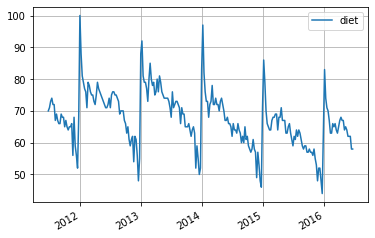

In [2]:
import matplotlib.pyplot as plt

# Converting the date index to Pandas DateTime
diet.index = pd.to_datetime(diet.index)

# Plotting the diet data
diet.plot(grid=True) # grid=True shows ridlines on the plot
plt.show()

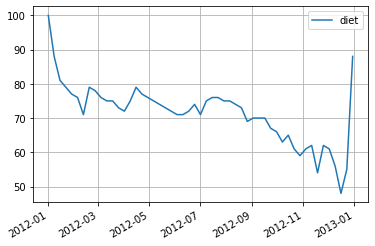

In [3]:
# Slicing the dataset to keep only 2012
diet2012 = diet['2012']

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

Notice how searches for 'diet' spiked up after the holidays every year.

---

## Merging Time Series With Different Dates
Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas `.join()` method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

Stock prices and 10-year US Government bond yields, which were downloaded from [FRED](https://fred.stlouisfed.org/), are pre-loaded in DataFrames stocks and bonds.

In [4]:
stocks = {'SP500': {'2007-06-11': 1509.12, '2007-06-12': 1493.0, '2007-06-13': 1515.67, '2007-06-14': 1522.97, '2007-06-15': 1532.91, '2007-06-18': 1531.05, '2007-06-19': 1533.7, '2007-06-20': 1512.84, '2007-06-21': 1522.19, '2007-06-22': 1502.56, '2007-06-25': 1497.74, '2007-06-26': 1492.89, '2007-06-27': 1506.34, '2007-06-28': 1505.71, '2007-06-29': 1503.35, '2007-07-02': 1519.43, '2007-07-03': 1524.87, '2007-07-05': 1525.4, '2007-07-06': 1530.44, '2007-07-09': 1531.85, '2007-07-10': 1510.12, '2007-07-11': 1518.76, '2007-07-12': 1547.7, '2007-07-13': 1552.5, '2007-07-16': 1549.52, '2007-07-17': 1549.37, '2007-07-18': 1546.17, '2007-07-19': 1553.08, '2007-07-20': 1534.1, '2007-07-23': 1541.57, '2007-07-24': 1511.04, '2007-07-25': 1518.09, '2007-07-26': 1482.66, '2007-07-27': 1458.95, '2007-07-30': 1473.91, '2007-07-31': 1455.27, '2007-08-01': 1465.81, '2007-08-02': 1472.2, '2007-08-03': 1433.06, '2007-08-06': 1467.67, '2007-08-07': 1476.71, '2007-08-08': 1497.49, '2007-08-09': 1453.09, '2007-08-10': 1453.64, '2007-08-13': 1452.92, '2007-08-14': 1426.54, '2007-08-15': 1406.7, '2007-08-16': 1411.27, '2007-08-17': 1445.94, '2007-08-20': 1445.55, '2007-08-21': 1447.12, '2007-08-22': 1464.07, '2007-08-23': 1462.5, '2007-08-24': 1479.37, '2007-08-27': 1466.79, '2007-08-28': 1432.36, '2007-08-29': 1463.76, '2007-08-30': 1457.64, '2007-08-31': 1473.99, '2007-09-04': 1489.42, '2007-09-05': 1472.29, '2007-09-06': 1478.55, '2007-09-07': 1453.55, '2007-09-10': 1451.7, '2007-09-11': 1471.49, '2007-09-12': 1471.56, '2007-09-13': 1483.95, '2007-09-14': 1484.25, '2007-09-17': 1476.65, '2007-09-18': 1519.78, '2007-09-19': 1529.03, '2007-09-20': 1518.75, '2007-09-21': 1525.75, '2007-09-24': 1517.73, '2007-09-25': 1517.21, '2007-09-26': 1525.42, '2007-09-27': 1531.38, '2007-09-28': 1526.75, '2007-10-01': 1547.04, '2007-10-02': 1546.63, '2007-10-03': 1539.59, '2007-10-04': 1542.84, '2007-10-05': 1557.59, '2007-10-08': 1552.58, '2007-10-09': 1565.15, '2007-10-10': 1562.47, '2007-10-11': 1554.41, '2007-10-12': 1561.8, '2007-10-15': 1548.71, '2007-10-16': 1538.53, '2007-10-17': 1541.24, '2007-10-18': 1540.08, '2007-10-19': 1500.63, '2007-10-22': 1506.33, '2007-10-23': 1519.59, '2007-10-24': 1515.88, '2007-10-25': 1514.4, '2007-10-26': 1535.28, '2007-10-29': 1540.98, '2007-10-30': 1531.02, '2007-10-31': 1549.38, '2007-11-01': 1508.44, '2007-11-02': 1509.65, '2007-11-05': 1502.17, '2007-11-06': 1520.27, '2007-11-07': 1475.62, '2007-11-08': 1474.77, '2007-11-09': 1453.7, '2007-11-12': 1439.18, '2007-11-13': 1481.05, '2007-11-14': 1470.58, '2007-11-15': 1451.15, '2007-11-16': 1458.74, '2007-11-19': 1433.27, '2007-11-20': 1439.7, '2007-11-21': 1416.77, '2007-11-23': 1440.7, '2007-11-26': 1407.22, '2007-11-27': 1428.23, '2007-11-28': 1469.02, '2007-11-29': 1469.72, '2007-11-30': 1481.14, '2007-12-03': 1472.42, '2007-12-04': 1462.79, '2007-12-05': 1485.01, '2007-12-06': 1507.34, '2007-12-07': 1504.66, '2007-12-10': 1515.96, '2007-12-11': 1477.65, '2007-12-12': 1486.59, '2007-12-13': 1488.41, '2007-12-14': 1467.95, '2007-12-17': 1445.9, '2007-12-18': 1454.98, '2007-12-19': 1453.0, '2007-12-20': 1460.12, '2007-12-21': 1484.46, '2007-12-24': 1496.45, '2007-12-26': 1497.66, '2007-12-27': 1476.37, '2007-12-28': 1478.49, '2007-12-31': 1468.36, '2008-01-02': 1447.16, '2008-01-03': 1447.16, '2008-01-04': 1411.63, '2008-01-07': 1416.18, '2008-01-08': 1390.19, '2008-01-09': 1409.13, '2008-01-10': 1420.33, '2008-01-11': 1401.02, '2008-01-14': 1416.25, '2008-01-15': 1380.95, '2008-01-16': 1373.2, '2008-01-17': 1333.25, '2008-01-18': 1325.19, '2008-01-22': 1310.5, '2008-01-23': 1338.6, '2008-01-24': 1352.07, '2008-01-25': 1330.61, '2008-01-28': 1353.97, '2008-01-29': 1362.3, '2008-01-30': 1355.81, '2008-01-31': 1378.55, '2008-02-01': 1395.42, '2008-02-04': 1380.82, '2008-02-05': 1336.64, '2008-02-06': 1326.45, '2008-02-07': 1336.91, '2008-02-08': 1331.29, '2008-02-11': 1339.13, '2008-02-12': 1348.86, '2008-02-13': 1367.21, '2008-02-14': 1348.86, '2008-02-15': 1349.99, '2008-02-19': 1348.78, '2008-02-20': 1360.03, '2008-02-21': 1342.53, '2008-02-22': 1353.11, '2008-02-25': 1371.8, '2008-02-26': 1381.29, '2008-02-27': 1380.02, '2008-02-28': 1367.68, '2008-02-29': 1330.63, '2008-03-03': 1331.34, '2008-03-04': 1326.75, '2008-03-05': 1333.7, '2008-03-06': 1304.34, '2008-03-07': 1293.37, '2008-03-10': 1273.37, '2008-03-11': 1320.65, '2008-03-12': 1308.77, '2008-03-13': 1315.48, '2008-03-14': 1288.14, '2008-03-17': 1276.6, '2008-03-18': 1330.74, '2008-03-19': 1298.42, '2008-03-20': 1329.51, '2008-03-24': 1349.88, '2008-03-25': 1352.99, '2008-03-26': 1341.13, '2008-03-27': 1325.76, '2008-03-28': 1315.22, '2008-03-31': 1322.7, '2008-04-01': 1370.18, '2008-04-02': 1367.53, '2008-04-03': 1369.31, '2008-04-04': 1370.4, '2008-04-07': 1372.54, '2008-04-08': 1365.54, '2008-04-09': 1354.49, '2008-04-10': 1360.55, '2008-04-11': 1332.83, '2008-04-14': 1328.32, '2008-04-15': 1334.43, '2008-04-16': 1364.71, '2008-04-17': 1365.56, '2008-04-18': 1390.33, '2008-04-21': 1388.17, '2008-04-22': 1375.94, '2008-04-23': 1379.93, '2008-04-24': 1388.82, '2008-04-25': 1397.84, '2008-04-28': 1396.37, '2008-04-29': 1390.94, '2008-04-30': 1385.59, '2008-05-01': 1409.34, '2008-05-02': 1413.9, '2008-05-05': 1407.49, '2008-05-06': 1418.26, '2008-05-07': 1392.57, '2008-05-08': 1397.68, '2008-05-09': 1388.28, '2008-05-12': 1403.58, '2008-05-13': 1403.04, '2008-05-14': 1408.66, '2008-05-15': 1423.57, '2008-05-16': 1425.35, '2008-05-19': 1426.63, '2008-05-20': 1413.4, '2008-05-21': 1390.71, '2008-05-22': 1394.35, '2008-05-23': 1375.93, '2008-05-27': 1385.35, '2008-05-28': 1390.84, '2008-05-29': 1398.26, '2008-05-30': 1400.38, '2008-06-02': 1385.67, '2008-06-03': 1377.65, '2008-06-04': 1377.2, '2008-06-05': 1404.05, '2008-06-06': 1360.68, '2008-06-09': 1361.76, '2008-06-10': 1358.44, '2008-06-11': 1335.49, '2008-06-12': 1339.87, '2008-06-13': 1360.03, '2008-06-16': 1360.14, '2008-06-17': 1350.93, '2008-06-18': 1337.81, '2008-06-19': 1342.83, '2008-06-20': 1317.93, '2008-06-23': 1318.0, '2008-06-24': 1314.29, '2008-06-25': 1321.97, '2008-06-26': 1283.15, '2008-06-27': 1278.38, '2008-06-30': 1280.0, '2008-07-01': 1284.91, '2008-07-02': 1261.52, '2008-07-03': 1262.9, '2008-07-07': 1252.31, '2008-07-08': 1273.7, '2008-07-09': 1244.69, '2008-07-10': 1253.39, '2008-07-11': 1239.49, '2008-07-14': 1228.3, '2008-07-15': 1214.91, '2008-07-16': 1245.36, '2008-07-17': 1260.32, '2008-07-18': 1260.68, '2008-07-21': 1260.0, '2008-07-22': 1277.0, '2008-07-23': 1282.19, '2008-07-24': 1252.54, '2008-07-25': 1257.76, '2008-07-28': 1234.37, '2008-07-29': 1263.2, '2008-07-30': 1284.26, '2008-07-31': 1267.38, '2008-08-01': 1260.31, '2008-08-04': 1249.01, '2008-08-05': 1284.88, '2008-08-06': 1289.19, '2008-08-07': 1266.07, '2008-08-08': 1296.32, '2008-08-11': 1305.32, '2008-08-12': 1289.59, '2008-08-13': 1285.83, '2008-08-14': 1292.93, '2008-08-15': 1298.2, '2008-08-18': 1278.6, '2008-08-19': 1266.69, '2008-08-20': 1274.54, '2008-08-21': 1277.72, '2008-08-22': 1292.2, '2008-08-25': 1266.84, '2008-08-26': 1271.51, '2008-08-27': 1281.66, '2008-08-28': 1300.68, '2008-08-29': 1282.83, '2008-09-02': 1277.58, '2008-09-03': 1274.98, '2008-09-04': 1236.83, '2008-09-05': 1242.31, '2008-09-08': 1267.79, '2008-09-09': 1224.51, '2008-09-10': 1232.04, '2008-09-11': 1249.05, '2008-09-12': 1251.7, '2008-09-15': 1192.7, '2008-09-16': 1213.59, '2008-09-17': 1156.39, '2008-09-18': 1206.51, '2008-09-19': 1255.08, '2008-09-22': 1207.09, '2008-09-23': 1188.22, '2008-09-24': 1185.87, '2008-09-25': 1209.18, '2008-09-26': 1213.01, '2008-09-29': 1106.39, '2008-09-30': 1166.36, '2008-10-01': 1161.06, '2008-10-02': 1114.28, '2008-10-03': 1099.23, '2008-10-06': 1056.89, '2008-10-07': 996.23, '2008-10-08': 984.94, '2008-10-09': 909.92, '2008-10-10': 899.22, '2008-10-13': 1003.35, '2008-10-14': 998.01, '2008-10-15': 907.84, '2008-10-16': 946.43, '2008-10-17': 940.55, '2008-10-20': 985.4, '2008-10-21': 955.05, '2008-10-22': 896.78, '2008-10-23': 908.11, '2008-10-24': 876.77, '2008-10-27': 848.92, '2008-10-28': 940.51, '2008-10-29': 930.09, '2008-10-30': 954.09, '2008-10-31': 968.75, '2008-11-03': 966.3, '2008-11-04': 1005.75, '2008-11-05': 952.77, '2008-11-06': 904.88, '2008-11-07': 930.99, '2008-11-10': 919.21, '2008-11-11': 898.95, '2008-11-12': 852.3, '2008-11-13': 911.29, '2008-11-14': 873.29, '2008-11-17': 850.75, '2008-11-18': 859.12, '2008-11-19': 806.58, '2008-11-20': 752.44, '2008-11-21': 800.03, '2008-11-24': 851.81, '2008-11-25': 857.39, '2008-11-26': 887.68, '2008-11-28': 896.24, '2008-12-01': 816.21, '2008-12-02': 848.81, '2008-12-03': 870.74, '2008-12-04': 845.22, '2008-12-05': 876.07, '2008-12-08': 909.7, '2008-12-09': 888.67, '2008-12-10': 899.24, '2008-12-11': 873.59, '2008-12-12': 879.73, '2008-12-15': 868.57, '2008-12-16': 913.18, '2008-12-17': 904.42, '2008-12-18': 885.28, '2008-12-19': 887.88, '2008-12-22': 871.63, '2008-12-23': 863.16, '2008-12-24': 868.15, '2008-12-26': 872.8, '2008-12-29': 869.42, '2008-12-30': 890.64, '2008-12-31': 903.25, '2009-01-02': 931.8, '2009-01-05': 927.45, '2009-01-06': 934.7, '2009-01-07': 906.65, '2009-01-08': 909.73, '2009-01-09': 890.35, '2009-01-12': 870.26, '2009-01-13': 871.79, '2009-01-14': 842.62, '2009-01-15': 843.74, '2009-01-16': 850.12, '2009-01-20': 805.22, '2009-01-21': 840.24, '2009-01-22': 827.5, '2009-01-23': 831.95, '2009-01-26': 836.57, '2009-01-27': 845.71, '2009-01-28': 874.09, '2009-01-29': 845.14, '2009-01-30': 825.88, '2009-02-02': 825.44, '2009-02-03': 838.51, '2009-02-04': 832.23, '2009-02-05': 845.85, '2009-02-06': 868.6, '2009-02-09': 869.89, '2009-02-10': 827.16, '2009-02-11': 833.74, '2009-02-12': 835.19, '2009-02-13': 826.84, '2009-02-17': 789.17, '2009-02-18': 788.42, '2009-02-19': 778.94, '2009-02-20': 770.05, '2009-02-23': 743.33, '2009-02-24': 773.14, '2009-02-25': 764.9, '2009-02-26': 752.83, '2009-02-27': 735.09, '2009-03-02': 700.82, '2009-03-03': 696.33, '2009-03-04': 712.87, '2009-03-05': 682.55, '2009-03-06': 683.38, '2009-03-09': 676.53, '2009-03-10': 719.6, '2009-03-11': 721.36, '2009-03-12': 750.74, '2009-03-13': 756.55, '2009-03-16': 753.89, '2009-03-17': 778.12, '2009-03-18': 794.35, '2009-03-19': 784.04, '2009-03-20': 768.54, '2009-03-23': 822.92, '2009-03-24': 806.12, '2009-03-25': 813.88, '2009-03-26': 832.86, '2009-03-27': 815.94, '2009-03-30': 787.53, '2009-03-31': 797.87, '2009-04-01': 811.08, '2009-04-02': 834.38, '2009-04-03': 842.5, '2009-04-06': 835.48, '2009-04-07': 815.55, '2009-04-08': 825.16, '2009-04-09': 856.56, '2009-04-13': 858.73, '2009-04-14': 841.5, '2009-04-15': 852.06, '2009-04-16': 865.3, '2009-04-17': 869.6, '2009-04-20': 832.39, '2009-04-21': 850.08, '2009-04-22': 843.55, '2009-04-23': 851.92, '2009-04-24': 866.23, '2009-04-27': 857.51, '2009-04-28': 855.16, '2009-04-29': 873.64, '2009-04-30': 872.81, '2009-05-01': 877.52, '2009-05-04': 907.24, '2009-05-05': 903.8, '2009-05-06': 919.53, '2009-05-07': 907.39, '2009-05-08': 929.23, '2009-05-11': 909.24, '2009-05-12': 908.35, '2009-05-13': 883.92, '2009-05-14': 893.07, '2009-05-15': 882.88, '2009-05-18': 909.71, '2009-05-19': 908.13, '2009-05-20': 903.47, '2009-05-21': 888.33, '2009-05-22': 887.0, '2009-05-26': 910.33, '2009-05-27': 893.06, '2009-05-28': 906.83, '2009-05-29': 919.14, '2009-06-01': 942.87, '2009-06-02': 944.74, '2009-06-03': 931.76, '2009-06-04': 942.46, '2009-06-05': 940.09, '2009-06-08': 939.14, '2009-06-09': 942.43, '2009-06-10': 939.15, '2009-06-11': 944.89, '2009-06-12': 946.21, '2009-06-15': 923.72, '2009-06-16': 911.97, '2009-06-17': 910.71, '2009-06-18': 918.37, '2009-06-19': 921.23, '2009-06-22': 893.04, '2009-06-23': 895.1, '2009-06-24': 900.94, '2009-06-25': 920.26, '2009-06-26': 918.9, '2009-06-29': 927.23, '2009-06-30': 919.32, '2009-07-01': 923.33, '2009-07-02': 896.42, '2009-07-06': 898.72, '2009-07-07': 881.03, '2009-07-08': 879.56, '2009-07-09': 882.68, '2009-07-10': 879.13, '2009-07-13': 901.05, '2009-07-14': 905.84, '2009-07-15': 932.68, '2009-07-16': 940.74, '2009-07-17': 940.38, '2009-07-20': 951.13, '2009-07-21': 954.58, '2009-07-22': 954.07, '2009-07-23': 976.29, '2009-07-24': 979.26, '2009-07-27': 982.18, '2009-07-28': 979.62, '2009-07-29': 975.15, '2009-07-30': 986.75, '2009-07-31': 987.48, '2009-08-03': 1002.63, '2009-08-04': 1005.65, '2009-08-05': 1002.72, '2009-08-06': 997.08, '2009-08-07': 1010.48, '2009-08-10': 1007.1, '2009-08-11': 994.35, '2009-08-12': 1005.81, '2009-08-13': 1012.73, '2009-08-14': 1004.09, '2009-08-17': 979.73, '2009-08-18': 989.67, '2009-08-19': 996.46, '2009-08-20': 1007.37, '2009-08-21': 1026.13, '2009-08-24': 1025.57, '2009-08-25': 1028.0, '2009-08-26': 1028.12, '2009-08-27': 1030.98, '2009-08-28': 1028.93, '2009-08-31': 1020.62, '2009-09-01': 998.04, '2009-09-02': 994.75, '2009-09-03': 1003.24, '2009-09-04': 1016.4, '2009-09-08': 1025.39, '2009-09-09': 1033.37, '2009-09-10': 1044.14, '2009-09-11': 1042.73, '2009-09-14': 1049.34, '2009-09-15': 1052.63, '2009-09-16': 1068.76, '2009-09-17': 1065.49, '2009-09-18': 1068.3, '2009-09-21': 1064.66, '2009-09-22': 1071.66, '2009-09-23': 1060.87, '2009-09-24': 1050.78, '2009-09-25': 1044.38, '2009-09-28': 1062.98, '2009-09-29': 1060.61, '2009-09-30': 1057.08, '2009-10-01': 1029.85, '2009-10-02': 1025.21, '2009-10-05': 1040.46, '2009-10-06': 1054.72, '2009-10-07': 1057.58, '2009-10-08': 1065.48, '2009-10-09': 1071.49, '2009-10-12': 1076.19, '2009-10-13': 1073.19, '2009-10-14': 1092.02, '2009-10-15': 1096.56, '2009-10-16': 1087.68, '2009-10-19': 1097.91, '2009-10-20': 1091.06, '2009-10-21': 1081.4, '2009-10-22': 1092.91, '2009-10-23': 1079.6, '2009-10-26': 1066.95, '2009-10-27': 1063.41, '2009-10-28': 1042.63, '2009-10-29': 1066.11, '2009-10-30': 1036.19, '2009-11-02': 1042.88, '2009-11-03': 1045.41, '2009-11-04': 1046.5, '2009-11-05': 1066.63, '2009-11-06': 1069.3, '2009-11-09': 1093.08, '2009-11-10': 1093.01, '2009-11-11': 1098.51, '2009-11-12': 1087.24, '2009-11-13': 1093.48, '2009-11-16': 1109.3, '2009-11-17': 1110.32, '2009-11-18': 1109.8, '2009-11-19': 1094.9, '2009-11-20': 1091.38, '2009-11-23': 1106.24, '2009-11-24': 1105.65, '2009-11-25': 1110.63, '2009-11-27': 1091.49, '2009-11-30': 1095.63, '2009-12-01': 1108.86, '2009-12-02': 1109.24, '2009-12-03': 1099.92, '2009-12-04': 1105.98, '2009-12-07': 1103.25, '2009-12-08': 1091.94, '2009-12-09': 1095.95, '2009-12-10': 1102.35, '2009-12-11': 1106.41, '2009-12-14': 1114.11, '2009-12-15': 1107.93, '2009-12-16': 1109.18, '2009-12-17': 1096.08, '2009-12-18': 1102.47, '2009-12-21': 1114.05, '2009-12-22': 1118.02, '2009-12-23': 1120.59, '2009-12-24': 1126.48, '2009-12-28': 1127.78, '2009-12-29': 1126.2, '2009-12-30': 1126.42, '2009-12-31': 1115.1, '2010-01-04': 1132.99, '2010-01-05': 1136.52, '2010-01-06': 1137.14, '2010-01-07': 1141.69, '2010-01-08': 1144.98, '2010-01-11': 1146.98, '2010-01-12': 1136.22, '2010-01-13': 1145.68, '2010-01-14': 1148.46, '2010-01-15': 1136.03, '2010-01-19': 1150.23, '2010-01-20': 1138.04, '2010-01-21': 1116.48, '2010-01-22': 1091.76, '2010-01-25': 1096.78, '2010-01-26': 1092.17, '2010-01-27': 1097.5, '2010-01-28': 1084.53, '2010-01-29': 1073.87, '2010-02-01': 1089.19, '2010-02-02': 1103.32, '2010-02-03': 1097.28, '2010-02-04': 1063.11, '2010-02-05': 1066.19, '2010-02-08': 1056.74, '2010-02-09': 1070.52, '2010-02-10': 1068.13, '2010-02-11': 1078.47, '2010-02-12': 1075.51, '2010-02-16': 1094.87, '2010-02-17': 1099.51, '2010-02-18': 1106.75, '2010-02-19': 1109.17, '2010-02-22': 1108.01, '2010-02-23': 1094.6, '2010-02-24': 1105.24, '2010-02-25': 1102.94, '2010-02-26': 1104.49, '2010-03-01': 1115.71, '2010-03-02': 1118.31, '2010-03-03': 1118.79, '2010-03-04': 1122.97, '2010-03-05': 1138.7, '2010-03-08': 1138.5, '2010-03-09': 1140.45, '2010-03-10': 1145.61, '2010-03-11': 1150.24, '2010-03-12': 1149.99, '2010-03-15': 1150.51, '2010-03-16': 1159.46, '2010-03-17': 1166.21, '2010-03-18': 1165.83, '2010-03-19': 1159.9, '2010-03-22': 1165.81, '2010-03-23': 1174.17, '2010-03-24': 1167.72, '2010-03-25': 1165.73, '2010-03-26': 1166.59, '2010-03-29': 1173.22, '2010-03-30': 1173.27, '2010-03-31': 1169.43, '2010-04-01': 1178.1, '2010-04-05': 1187.44, '2010-04-06': 1189.44, '2010-04-07': 1182.45, '2010-04-08': 1186.44, '2010-04-09': 1194.37, '2010-04-12': 1196.48, '2010-04-13': 1197.3, '2010-04-14': 1210.65, '2010-04-15': 1211.67, '2010-04-16': 1192.13, '2010-04-19': 1197.52, '2010-04-20': 1207.17, '2010-04-21': 1205.94, '2010-04-22': 1208.67, '2010-04-23': 1217.28, '2010-04-26': 1212.05, '2010-04-27': 1183.71, '2010-04-28': 1191.36, '2010-04-29': 1206.78, '2010-04-30': 1186.69, '2010-05-03': 1202.26, '2010-05-04': 1173.6, '2010-05-05': 1165.9, '2010-05-06': 1128.15, '2010-05-07': 1110.88, '2010-05-10': 1159.73, '2010-05-11': 1155.79, '2010-05-12': 1171.67, '2010-05-13': 1157.44, '2010-05-14': 1135.68, '2010-05-17': 1136.94, '2010-05-18': 1120.8, '2010-05-19': 1115.05, '2010-05-20': 1071.59, '2010-05-21': 1087.69, '2010-05-24': 1073.65, '2010-05-25': 1074.03, '2010-05-26': 1067.95, '2010-05-27': 1103.06, '2010-05-28': 1089.41, '2010-06-01': 1070.71, '2010-06-02': 1098.38, '2010-06-03': 1102.83, '2010-06-04': 1064.88, '2010-06-07': 1050.47, '2010-06-08': 1062.0, '2010-06-09': 1055.69, '2010-06-10': 1086.84, '2010-06-11': 1091.6, '2010-06-14': 1089.63, '2010-06-15': 1115.23, '2010-06-16': 1114.61, '2010-06-17': 1116.04, '2010-06-18': 1117.51, '2010-06-21': 1113.2, '2010-06-22': 1095.31, '2010-06-23': 1092.04, '2010-06-24': 1073.69, '2010-06-25': 1076.76, '2010-06-28': 1074.57, '2010-06-29': 1041.24, '2010-06-30': 1030.71, '2010-07-01': 1027.37, '2010-07-02': 1022.58, '2010-07-06': 1028.06, '2010-07-07': 1060.27, '2010-07-08': 1070.25, '2010-07-09': 1077.96, '2010-07-12': 1078.75, '2010-07-13': 1095.34, '2010-07-14': 1095.17, '2010-07-15': 1096.48, '2010-07-16': 1064.88, '2010-07-19': 1071.25, '2010-07-20': 1083.48, '2010-07-21': 1069.59, '2010-07-22': 1093.67, '2010-07-23': 1102.66, '2010-07-26': 1115.01, '2010-07-27': 1113.84, '2010-07-28': 1106.13, '2010-07-29': 1101.53, '2010-07-30': 1101.6, '2010-08-02': 1125.86, '2010-08-03': 1120.46, '2010-08-04': 1127.24, '2010-08-05': 1125.81, '2010-08-06': 1121.64, '2010-08-09': 1127.79, '2010-08-10': 1121.06, '2010-08-11': 1089.47, '2010-08-12': 1083.61, '2010-08-13': 1079.25, '2010-08-16': 1079.38, '2010-08-17': 1092.54, '2010-08-18': 1094.16, '2010-08-19': 1075.63, '2010-08-20': 1071.69, '2010-08-23': 1067.36, '2010-08-24': 1051.87, '2010-08-25': 1055.33, '2010-08-26': 1047.22, '2010-08-27': 1064.59, '2010-08-30': 1048.92, '2010-08-31': 1049.33, '2010-09-01': 1080.29, '2010-09-02': 1090.1, '2010-09-03': 1104.51, '2010-09-07': 1091.84, '2010-09-08': 1098.87, '2010-09-09': 1104.18, '2010-09-10': 1109.55, '2010-09-13': 1121.9, '2010-09-14': 1121.1, '2010-09-15': 1125.07, '2010-09-16': 1124.66, '2010-09-17': 1125.59, '2010-09-20': 1142.71, '2010-09-21': 1139.78, '2010-09-22': 1134.28, '2010-09-23': 1124.83, '2010-09-24': 1148.67, '2010-09-27': 1142.16, '2010-09-28': 1147.7, '2010-09-29': 1144.73, '2010-09-30': 1141.2, '2010-10-01': 1146.24, '2010-10-04': 1137.03, '2010-10-05': 1160.75, '2010-10-06': 1159.97, '2010-10-07': 1158.06, '2010-10-08': 1165.15, '2010-10-11': 1165.32, '2010-10-12': 1169.77, '2010-10-13': 1178.1, '2010-10-14': 1173.81, '2010-10-15': 1176.19, '2010-10-18': 1184.71, '2010-10-19': 1165.9, '2010-10-20': 1178.17, '2010-10-21': 1180.26, '2010-10-22': 1183.08, '2010-10-25': 1185.62, '2010-10-26': 1185.64, '2010-10-27': 1182.45, '2010-10-28': 1183.78, '2010-10-29': 1183.26, '2010-11-01': 1184.38, '2010-11-02': 1193.57, '2010-11-03': 1197.96, '2010-11-04': 1221.06, '2010-11-05': 1225.85, '2010-11-08': 1223.25, '2010-11-09': 1213.4, '2010-11-10': 1218.71, '2010-11-11': 1213.54, '2010-11-12': 1199.21, '2010-11-15': 1197.75, '2010-11-16': 1178.34, '2010-11-17': 1178.59, '2010-11-18': 1196.69, '2010-11-19': 1199.73, '2010-11-22': 1197.84, '2010-11-23': 1180.73, '2010-11-24': 1198.35, '2010-11-26': 1189.4, '2010-11-29': 1187.76, '2010-11-30': 1180.55, '2010-12-01': 1206.07, '2010-12-02': 1221.53, '2010-12-03': 1224.71, '2010-12-06': 1223.12, '2010-12-07': 1223.75, '2010-12-08': 1228.28, '2010-12-09': 1233.0, '2010-12-10': 1240.4, '2010-12-13': 1240.46, '2010-12-14': 1241.59, '2010-12-15': 1235.23, '2010-12-16': 1242.87, '2010-12-17': 1243.91, '2010-12-20': 1247.08, '2010-12-21': 1254.6, '2010-12-22': 1258.84, '2010-12-23': 1256.77, '2010-12-27': 1257.54, '2010-12-28': 1258.51, '2010-12-29': 1259.78, '2010-12-30': 1257.88, '2010-12-31': 1257.64, '2011-01-03': 1271.87, '2011-01-04': 1270.2, '2011-01-05': 1276.56, '2011-01-06': 1273.85, '2011-01-07': 1271.5, '2011-01-10': 1269.75, '2011-01-11': 1274.48, '2011-01-12': 1285.96, '2011-01-13': 1283.76, '2011-01-14': 1293.24, '2011-01-18': 1295.02, '2011-01-19': 1281.92, '2011-01-20': 1280.26, '2011-01-21': 1283.35, '2011-01-24': 1290.84, '2011-01-25': 1291.18, '2011-01-26': 1296.63, '2011-01-27': 1299.54, '2011-01-28': 1276.34, '2011-01-31': 1286.12, '2011-02-01': 1307.59, '2011-02-02': 1304.03, '2011-02-03': 1307.1, '2011-02-04': 1310.87, '2011-02-07': 1319.05, '2011-02-08': 1324.57, '2011-02-09': 1320.88, '2011-02-10': 1321.87, '2011-02-11': 1329.15, '2011-02-14': 1332.32, '2011-02-15': 1328.01, '2011-02-16': 1336.32, '2011-02-17': 1340.43, '2011-02-18': 1343.01, '2011-02-22': 1315.44, '2011-02-23': 1307.4, '2011-02-24': 1306.1, '2011-02-25': 1319.88, '2011-02-28': 1327.22, '2011-03-01': 1306.33, '2011-03-02': 1308.44, '2011-03-03': 1330.97, '2011-03-04': 1321.15, '2011-03-07': 1310.13, '2011-03-08': 1321.82, '2011-03-09': 1320.02, '2011-03-10': 1295.11, '2011-03-11': 1304.28, '2011-03-14': 1296.39, '2011-03-15': 1281.87, '2011-03-16': 1256.88, '2011-03-17': 1273.72, '2011-03-18': 1279.2, '2011-03-21': 1298.38, '2011-03-22': 1293.77, '2011-03-23': 1297.54, '2011-03-24': 1309.66, '2011-03-25': 1313.8, '2011-03-28': 1310.19, '2011-03-29': 1319.44, '2011-03-30': 1328.26, '2011-03-31': 1325.83, '2011-04-01': 1332.41, '2011-04-04': 1332.87, '2011-04-05': 1332.63, '2011-04-06': 1335.54, '2011-04-07': 1333.51, '2011-04-08': 1328.17, '2011-04-11': 1324.46, '2011-04-12': 1314.16, '2011-04-13': 1314.41, '2011-04-14': 1314.52, '2011-04-15': 1319.68, '2011-04-18': 1305.14, '2011-04-19': 1312.62, '2011-04-20': 1330.36, '2011-04-21': 1337.38, '2011-04-25': 1335.25, '2011-04-26': 1347.24, '2011-04-27': 1355.66, '2011-04-28': 1360.48, '2011-04-29': 1363.61, '2011-05-02': 1361.22, '2011-05-03': 1356.62, '2011-05-04': 1347.32, '2011-05-05': 1335.1, '2011-05-06': 1340.2, '2011-05-09': 1346.29, '2011-05-10': 1357.16, '2011-05-11': 1342.08, '2011-05-12': 1348.65, '2011-05-13': 1337.77, '2011-05-16': 1329.47, '2011-05-17': 1328.98, '2011-05-18': 1340.68, '2011-05-19': 1343.6, '2011-05-20': 1333.27, '2011-05-23': 1317.37, '2011-05-24': 1316.28, '2011-05-25': 1320.47, '2011-05-26': 1325.69, '2011-05-27': 1331.1, '2011-05-31': 1345.2, '2011-06-01': 1314.55, '2011-06-02': 1312.94, '2011-06-03': 1300.16, '2011-06-06': 1286.17, '2011-06-07': 1284.94, '2011-06-08': 1279.56, '2011-06-09': 1289.0, '2011-06-10': 1270.98, '2011-06-13': 1271.83, '2011-06-14': 1287.87, '2011-06-15': 1265.42, '2011-06-16': 1267.64, '2011-06-17': 1271.5, '2011-06-20': 1278.36, '2011-06-21': 1295.52, '2011-06-22': 1287.14, '2011-06-23': 1283.5, '2011-06-24': 1268.45, '2011-06-27': 1280.1, '2011-06-28': 1296.67, '2011-06-29': 1307.41, '2011-06-30': 1320.64, '2011-07-01': 1339.67, '2011-07-05': 1337.88, '2011-07-06': 1339.22, '2011-07-07': 1353.22, '2011-07-08': 1343.8, '2011-07-11': 1319.49, '2011-07-12': 1313.64, '2011-07-13': 1317.72, '2011-07-14': 1308.87, '2011-07-15': 1316.14, '2011-07-18': 1305.44, '2011-07-19': 1326.73, '2011-07-20': 1325.84, '2011-07-21': 1343.8, '2011-07-22': 1345.02, '2011-07-25': 1337.43, '2011-07-26': 1331.94, '2011-07-27': 1304.89, '2011-07-28': 1300.67, '2011-07-29': 1292.28, '2011-08-01': 1286.94, '2011-08-02': 1254.05, '2011-08-03': 1260.34, '2011-08-04': 1200.07, '2011-08-05': 1199.38, '2011-08-08': 1119.46, '2011-08-09': 1172.53, '2011-08-10': 1120.76, '2011-08-11': 1172.64, '2011-08-12': 1178.81, '2011-08-15': 1204.49, '2011-08-16': 1192.76, '2011-08-17': 1193.89, '2011-08-18': 1140.65, '2011-08-19': 1123.53, '2011-08-22': 1123.82, '2011-08-23': 1162.35, '2011-08-24': 1177.6, '2011-08-25': 1159.27, '2011-08-26': 1176.8, '2011-08-29': 1210.08, '2011-08-30': 1212.92, '2011-08-31': 1218.89, '2011-09-01': 1204.42, '2011-09-02': 1173.97, '2011-09-06': 1165.24, '2011-09-07': 1198.62, '2011-09-08': 1185.9, '2011-09-09': 1154.23, '2011-09-12': 1162.27, '2011-09-13': 1172.87, '2011-09-14': 1188.68, '2011-09-15': 1209.11, '2011-09-16': 1216.01, '2011-09-19': 1204.09, '2011-09-20': 1202.09, '2011-09-21': 1166.76, '2011-09-22': 1129.56, '2011-09-23': 1136.43, '2011-09-26': 1162.95, '2011-09-27': 1175.38, '2011-09-28': 1151.06, '2011-09-29': 1160.4, '2011-09-30': 1131.42, '2011-10-03': 1099.23, '2011-10-04': 1123.95, '2011-10-05': 1144.03, '2011-10-06': 1164.97, '2011-10-07': 1155.46, '2011-10-10': 1194.89, '2011-10-11': 1195.54, '2011-10-12': 1207.25, '2011-10-13': 1203.66, '2011-10-14': 1224.58, '2011-10-17': 1200.86, '2011-10-18': 1225.38, '2011-10-19': 1209.88, '2011-10-20': 1215.39, '2011-10-21': 1238.25, '2011-10-24': 1254.19, '2011-10-25': 1229.05, '2011-10-26': 1242.0, '2011-10-27': 1284.59, '2011-10-28': 1285.09, '2011-10-31': 1253.3, '2011-11-01': 1218.28, '2011-11-02': 1237.9, '2011-11-03': 1261.15, '2011-11-04': 1253.23, '2011-11-07': 1261.12, '2011-11-08': 1275.92, '2011-11-09': 1229.1, '2011-11-10': 1239.69, '2011-11-11': 1263.85, '2011-11-14': 1251.78, '2011-11-15': 1257.81, '2011-11-16': 1236.91, '2011-11-17': 1216.13, '2011-11-18': 1215.65, '2011-11-21': 1192.98, '2011-11-22': 1188.04, '2011-11-23': 1161.79, '2011-11-25': 1158.67, '2011-11-28': 1192.55, '2011-11-29': 1195.19, '2011-11-30': 1246.96, '2011-12-01': 1244.58, '2011-12-02': 1244.28, '2011-12-05': 1257.08, '2011-12-06': 1258.47, '2011-12-07': 1261.01, '2011-12-08': 1234.35, '2011-12-09': 1255.19, '2011-12-12': 1236.47, '2011-12-13': 1225.73, '2011-12-14': 1211.82, '2011-12-15': 1215.75, '2011-12-16': 1219.66, '2011-12-19': 1205.35, '2011-12-20': 1241.3, '2011-12-21': 1243.72, '2011-12-22': 1254.0, '2011-12-23': 1265.33, '2011-12-27': 1265.43, '2011-12-28': 1249.64, '2011-12-29': 1263.02, '2011-12-30': 1257.6, '2012-01-03': 1277.06, '2012-01-04': 1277.3, '2012-01-05': 1281.06, '2012-01-06': 1277.81, '2012-01-09': 1280.7, '2012-01-10': 1292.08, '2012-01-11': 1292.48, '2012-01-12': 1295.5, '2012-01-13': 1289.09, '2012-01-17': 1293.67, '2012-01-18': 1308.04, '2012-01-19': 1314.5, '2012-01-20': 1315.38, '2012-01-23': 1316.0, '2012-01-24': 1314.65, '2012-01-25': 1326.05, '2012-01-26': 1318.43, '2012-01-27': 1316.33, '2012-01-30': 1313.01, '2012-01-31': 1312.41, '2012-02-01': 1324.09, '2012-02-02': 1325.54, '2012-02-03': 1344.9, '2012-02-06': 1344.33, '2012-02-07': 1347.05, '2012-02-08': 1349.96, '2012-02-09': 1351.95, '2012-02-10': 1342.64, '2012-02-13': 1351.77, '2012-02-14': 1350.5, '2012-02-15': 1343.23, '2012-02-16': 1358.04, '2012-02-17': 1361.23, '2012-02-21': 1362.21, '2012-02-22': 1357.66, '2012-02-23': 1363.46, '2012-02-24': 1365.74, '2012-02-27': 1367.59, '2012-02-28': 1372.18, '2012-02-29': 1365.68, '2012-03-01': 1374.09, '2012-03-02': 1369.63, '2012-03-05': 1364.33, '2012-03-06': 1343.36, '2012-03-07': 1352.63, '2012-03-08': 1365.91, '2012-03-09': 1370.87, '2012-03-12': 1371.09, '2012-03-13': 1395.95, '2012-03-14': 1394.28, '2012-03-15': 1402.6, '2012-03-16': 1404.17, '2012-03-19': 1409.75, '2012-03-20': 1405.52, '2012-03-21': 1402.89, '2012-03-22': 1392.78, '2012-03-23': 1397.11, '2012-03-26': 1416.51, '2012-03-27': 1412.52, '2012-03-28': 1405.54, '2012-03-29': 1403.28, '2012-03-30': 1408.47, '2012-04-02': 1419.04, '2012-04-03': 1413.38, '2012-04-04': 1398.96, '2012-04-05': 1398.08, '2012-04-09': 1382.2, '2012-04-10': 1358.59, '2012-04-11': 1368.71, '2012-04-12': 1387.57, '2012-04-13': 1370.26, '2012-04-16': 1369.57, '2012-04-17': 1390.78, '2012-04-18': 1385.14, '2012-04-19': 1376.92, '2012-04-20': 1378.53, '2012-04-23': 1366.94, '2012-04-24': 1371.97, '2012-04-25': 1390.69, '2012-04-26': 1399.98, '2012-04-27': 1403.36, '2012-04-30': 1397.91, '2012-05-01': 1405.82, '2012-05-02': 1402.31, '2012-05-03': 1391.57, '2012-05-04': 1369.1, '2012-05-07': 1369.58, '2012-05-08': 1363.72, '2012-05-09': 1354.58, '2012-05-10': 1357.99, '2012-05-11': 1353.39, '2012-05-14': 1338.35, '2012-05-15': 1330.66, '2012-05-16': 1324.8, '2012-05-17': 1304.86, '2012-05-18': 1295.22, '2012-05-21': 1315.99, '2012-05-22': 1316.63, '2012-05-23': 1318.86, '2012-05-24': 1320.68, '2012-05-25': 1317.82, '2012-05-29': 1332.42, '2012-05-30': 1313.32, '2012-05-31': 1310.33, '2012-06-01': 1278.04, '2012-06-04': 1278.18, '2012-06-05': 1285.5, '2012-06-06': 1315.13, '2012-06-07': 1314.99, '2012-06-08': 1325.66, '2012-06-11': 1308.93, '2012-06-12': 1324.18, '2012-06-13': 1314.88, '2012-06-14': 1329.1, '2012-06-15': 1342.84, '2012-06-18': 1344.78, '2012-06-19': 1357.98, '2012-06-20': 1355.69, '2012-06-21': 1325.51, '2012-06-22': 1335.02, '2012-06-25': 1313.72, '2012-06-26': 1319.99, '2012-06-27': 1331.85, '2012-06-28': 1329.04, '2012-06-29': 1362.16, '2012-07-02': 1365.51, '2012-07-03': 1374.02, '2012-07-05': 1367.58, '2012-07-06': 1354.68, '2012-07-09': 1352.46, '2012-07-10': 1341.47, '2012-07-11': 1341.45, '2012-07-12': 1334.76, '2012-07-13': 1356.78, '2012-07-16': 1353.64, '2012-07-17': 1363.67, '2012-07-18': 1372.78, '2012-07-19': 1376.51, '2012-07-20': 1362.66, '2012-07-23': 1350.52, '2012-07-24': 1338.31, '2012-07-25': 1337.89, '2012-07-26': 1360.02, '2012-07-27': 1385.97, '2012-07-30': 1385.3, '2012-07-31': 1379.32, '2012-08-01': 1375.14, '2012-08-02': 1365.0, '2012-08-03': 1390.99, '2012-08-06': 1394.23, '2012-08-07': 1401.35, '2012-08-08': 1402.22, '2012-08-09': 1402.8, '2012-08-10': 1405.87, '2012-08-13': 1404.11, '2012-08-14': 1403.93, '2012-08-15': 1405.53, '2012-08-16': 1415.51, '2012-08-17': 1418.16, '2012-08-20': 1418.13, '2012-08-21': 1413.17, '2012-08-22': 1413.49, '2012-08-23': 1402.08, '2012-08-24': 1411.13, '2012-08-27': 1410.44, '2012-08-28': 1409.3, '2012-08-29': 1410.49, '2012-08-30': 1399.48, '2012-08-31': 1406.58, '2012-09-04': 1404.94, '2012-09-05': 1403.44, '2012-09-06': 1432.12, '2012-09-07': 1437.92, '2012-09-10': 1429.08, '2012-09-11': 1433.56, '2012-09-12': 1436.56, '2012-09-13': 1459.99, '2012-09-14': 1465.77, '2012-09-17': 1461.19, '2012-09-18': 1459.32, '2012-09-19': 1461.05, '2012-09-20': 1460.26, '2012-09-21': 1460.15, '2012-09-24': 1456.89, '2012-09-25': 1441.59, '2012-09-26': 1433.32, '2012-09-27': 1447.15, '2012-09-28': 1440.67, '2012-10-01': 1444.49, '2012-10-02': 1445.75, '2012-10-03': 1450.99, '2012-10-04': 1461.4, '2012-10-05': 1460.93, '2012-10-08': 1455.88, '2012-10-09': 1441.48, '2012-10-10': 1432.56, '2012-10-11': 1432.84, '2012-10-12': 1428.59, '2012-10-15': 1440.13, '2012-10-16': 1454.92, '2012-10-17': 1460.91, '2012-10-18': 1457.34, '2012-10-19': 1433.19, '2012-10-22': 1433.82, '2012-10-23': 1413.11, '2012-10-24': 1408.75, '2012-10-25': 1412.97, '2012-10-26': 1411.94, '2012-10-31': 1412.16, '2012-11-01': 1427.59, '2012-11-02': 1414.2, '2012-11-05': 1417.26, '2012-11-06': 1428.39, '2012-11-07': 1394.53, '2012-11-08': 1377.51, '2012-11-09': 1379.85, '2012-11-12': 1380.03, '2012-11-13': 1374.53, '2012-11-14': 1355.49, '2012-11-15': 1353.33, '2012-11-16': 1359.88, '2012-11-19': 1386.89, '2012-11-20': 1387.81, '2012-11-21': 1391.03, '2012-11-23': 1409.15, '2012-11-26': 1406.29, '2012-11-27': 1398.94, '2012-11-28': 1409.93, '2012-11-29': 1415.95, '2012-11-30': 1416.18, '2012-12-03': 1409.46, '2012-12-04': 1407.05, '2012-12-05': 1409.28, '2012-12-06': 1413.94, '2012-12-07': 1418.07, '2012-12-10': 1418.55, '2012-12-11': 1427.84, '2012-12-12': 1428.48, '2012-12-13': 1419.45, '2012-12-14': 1413.58, '2012-12-17': 1430.36, '2012-12-18': 1446.79, '2012-12-19': 1435.81, '2012-12-20': 1443.69, '2012-12-21': 1430.15, '2012-12-24': 1426.66, '2012-12-26': 1419.83, '2012-12-27': 1418.1, '2012-12-28': 1402.43, '2012-12-31': 1426.19, '2013-01-02': 1462.42, '2013-01-03': 1459.37, '2013-01-04': 1466.47, '2013-01-07': 1461.89, '2013-01-08': 1457.15, '2013-01-09': 1461.02, '2013-01-10': 1472.12, '2013-01-11': 1472.05, '2013-01-14': 1470.68, '2013-01-15': 1472.34, '2013-01-16': 1472.63, '2013-01-17': 1480.94, '2013-01-18': 1485.98, '2013-01-22': 1492.56, '2013-01-23': 1494.81, '2013-01-24': 1494.82, '2013-01-25': 1502.96, '2013-01-28': 1500.18, '2013-01-29': 1507.84, '2013-01-30': 1501.96, '2013-01-31': 1498.11, '2013-02-01': 1513.17, '2013-02-04': 1495.71, '2013-02-05': 1511.29, '2013-02-06': 1512.12, '2013-02-07': 1509.39, '2013-02-08': 1517.93, '2013-02-11': 1517.01, '2013-02-12': 1519.43, '2013-02-13': 1520.33, '2013-02-14': 1521.38, '2013-02-15': 1519.79, '2013-02-19': 1530.94, '2013-02-20': 1511.95, '2013-02-21': 1502.42, '2013-02-22': 1515.6, '2013-02-25': 1487.85, '2013-02-26': 1496.94, '2013-02-27': 1515.99, '2013-02-28': 1514.68, '2013-03-01': 1518.2, '2013-03-04': 1525.2, '2013-03-05': 1539.79, '2013-03-06': 1541.46, '2013-03-07': 1544.26, '2013-03-08': 1551.18, '2013-03-11': 1556.22, '2013-03-12': 1552.48, '2013-03-13': 1554.52, '2013-03-14': 1563.23, '2013-03-15': 1560.7, '2013-03-18': 1552.1, '2013-03-19': 1548.34, '2013-03-20': 1558.71, '2013-03-21': 1545.8, '2013-03-22': 1556.89, '2013-03-25': 1551.69, '2013-03-26': 1563.77, '2013-03-27': 1562.85, '2013-03-28': 1569.19, '2013-04-01': 1562.17, '2013-04-02': 1570.25, '2013-04-03': 1553.69, '2013-04-04': 1559.98, '2013-04-05': 1553.28, '2013-04-08': 1563.07, '2013-04-09': 1568.61, '2013-04-10': 1587.73, '2013-04-11': 1593.37, '2013-04-12': 1588.85, '2013-04-15': 1552.36, '2013-04-16': 1574.57, '2013-04-17': 1552.01, '2013-04-18': 1541.61, '2013-04-19': 1555.25, '2013-04-22': 1562.5, '2013-04-23': 1578.78, '2013-04-24': 1578.79, '2013-04-25': 1585.16, '2013-04-26': 1582.24, '2013-04-29': 1593.61, '2013-04-30': 1597.57, '2013-05-01': 1582.7, '2013-05-02': 1597.59, '2013-05-03': 1614.42, '2013-05-06': 1617.5, '2013-05-07': 1625.96, '2013-05-08': 1632.69, '2013-05-09': 1626.67, '2013-05-10': 1633.7, '2013-05-13': 1633.77, '2013-05-14': 1650.34, '2013-05-15': 1658.78, '2013-05-16': 1650.47, '2013-05-17': 1667.47, '2013-05-20': 1666.29, '2013-05-21': 1669.16, '2013-05-22': 1655.35, '2013-05-23': 1650.51, '2013-05-24': 1649.6, '2013-05-28': 1660.06, '2013-05-29': 1648.36, '2013-05-30': 1654.41, '2013-05-31': 1630.74, '2013-06-03': 1640.42, '2013-06-04': 1631.38, '2013-06-05': 1608.9, '2013-06-06': 1622.56, '2013-06-07': 1643.38, '2013-06-10': 1642.81, '2013-06-11': 1626.13, '2013-06-12': 1612.52, '2013-06-13': 1636.36, '2013-06-14': 1626.73, '2013-06-17': 1639.04, '2013-06-18': 1651.81, '2013-06-19': 1628.93, '2013-06-20': 1588.19, '2013-06-21': 1592.43, '2013-06-24': 1573.09, '2013-06-25': 1588.03, '2013-06-26': 1603.26, '2013-06-27': 1613.2, '2013-06-28': 1606.28, '2013-07-01': 1614.96, '2013-07-02': 1614.08, '2013-07-03': 1615.41, '2013-07-05': 1631.89, '2013-07-08': 1640.46, '2013-07-09': 1652.32, '2013-07-10': 1652.62, '2013-07-11': 1675.02, '2013-07-12': 1680.19, '2013-07-15': 1682.5, '2013-07-16': 1676.26, '2013-07-17': 1680.91, '2013-07-18': 1689.37, '2013-07-19': 1692.09, '2013-07-22': 1695.53, '2013-07-23': 1692.39, '2013-07-24': 1685.94, '2013-07-25': 1690.25, '2013-07-26': 1691.65, '2013-07-29': 1685.33, '2013-07-30': 1685.96, '2013-07-31': 1685.73, '2013-08-01': 1706.87, '2013-08-02': 1709.67, '2013-08-05': 1707.14, '2013-08-06': 1697.37, '2013-08-07': 1690.91, '2013-08-08': 1697.48, '2013-08-09': 1691.42, '2013-08-12': 1689.47, '2013-08-13': 1694.16, '2013-08-14': 1685.39, '2013-08-15': 1661.32, '2013-08-16': 1655.83, '2013-08-19': 1646.06, '2013-08-20': 1652.35, '2013-08-21': 1642.8, '2013-08-22': 1656.96, '2013-08-23': 1663.5, '2013-08-26': 1656.78, '2013-08-27': 1630.48, '2013-08-28': 1634.96, '2013-08-29': 1638.17, '2013-08-30': 1632.97, '2013-09-03': 1639.77, '2013-09-04': 1653.08, '2013-09-05': 1655.08, '2013-09-06': 1655.17, '2013-09-09': 1671.71, '2013-09-10': 1683.99, '2013-09-11': 1689.13, '2013-09-12': 1683.42, '2013-09-13': 1687.99, '2013-09-16': 1697.6, '2013-09-17': 1704.76, '2013-09-18': 1725.52, '2013-09-19': 1722.34, '2013-09-20': 1709.91, '2013-09-23': 1701.84, '2013-09-24': 1697.42, '2013-09-25': 1692.77, '2013-09-26': 1698.67, '2013-09-27': 1691.75, '2013-09-30': 1681.55, '2013-10-01': 1695.0, '2013-10-02': 1693.87, '2013-10-03': 1678.66, '2013-10-04': 1690.5, '2013-10-07': 1676.12, '2013-10-08': 1655.45, '2013-10-09': 1656.4, '2013-10-10': 1692.56, '2013-10-11': 1703.2, '2013-10-14': 1710.14, '2013-10-15': 1698.06, '2013-10-16': 1721.54, '2013-10-17': 1733.15, '2013-10-18': 1744.5, '2013-10-21': 1744.66, '2013-10-22': 1754.67, '2013-10-23': 1746.38, '2013-10-24': 1752.07, '2013-10-25': 1759.77, '2013-10-28': 1762.11, '2013-10-29': 1771.95, '2013-10-30': 1763.31, '2013-10-31': 1756.54, '2013-11-01': 1761.64, '2013-11-04': 1767.93, '2013-11-05': 1762.97, '2013-11-06': 1770.49, '2013-11-07': 1747.15, '2013-11-08': 1770.61, '2013-11-11': 1771.89, '2013-11-12': 1767.69, '2013-11-13': 1782.0, '2013-11-14': 1790.62, '2013-11-15': 1798.18, '2013-11-18': 1791.53, '2013-11-19': 1787.87, '2013-11-20': 1781.37, '2013-11-21': 1795.85, '2013-11-22': 1804.76, '2013-11-25': 1802.48, '2013-11-26': 1802.75, '2013-11-27': 1807.23, '2013-11-29': 1805.81, '2013-12-02': 1800.9, '2013-12-03': 1795.15, '2013-12-04': 1792.81, '2013-12-05': 1785.03, '2013-12-06': 1805.09, '2013-12-09': 1808.37, '2013-12-10': 1802.62, '2013-12-11': 1782.22, '2013-12-12': 1775.5, '2013-12-13': 1775.32, '2013-12-16': 1786.54, '2013-12-17': 1781.0, '2013-12-18': 1810.65, '2013-12-19': 1809.6, '2013-12-20': 1818.32, '2013-12-23': 1827.99, '2013-12-24': 1833.32, '2013-12-26': 1842.02, '2013-12-27': 1841.4, '2013-12-30': 1841.07, '2013-12-31': 1848.36, '2014-01-02': 1831.98, '2014-01-03': 1831.37, '2014-01-06': 1826.77, '2014-01-07': 1837.88, '2014-01-08': 1837.49, '2014-01-09': 1838.13, '2014-01-10': 1842.37, '2014-01-13': 1819.2, '2014-01-14': 1838.88, '2014-01-15': 1848.38, '2014-01-16': 1845.89, '2014-01-17': 1838.7, '2014-01-21': 1843.8, '2014-01-22': 1844.86, '2014-01-23': 1828.46, '2014-01-24': 1790.29, '2014-01-27': 1781.56, '2014-01-28': 1792.5, '2014-01-29': 1774.2, '2014-01-30': 1794.19, '2014-01-31': 1782.59, '2014-02-03': 1741.89, '2014-02-04': 1755.2, '2014-02-05': 1751.64, '2014-02-06': 1773.43, '2014-02-07': 1797.02, '2014-02-10': 1799.84, '2014-02-11': 1819.75, '2014-02-12': 1819.26, '2014-02-13': 1829.83, '2014-02-14': 1838.63, '2014-02-18': 1840.76, '2014-02-19': 1828.75, '2014-02-20': 1839.78, '2014-02-21': 1836.25, '2014-02-24': 1847.61, '2014-02-25': 1845.12, '2014-02-26': 1845.16, '2014-02-27': 1854.29, '2014-02-28': 1859.45, '2014-03-03': 1845.73, '2014-03-04': 1873.91, '2014-03-05': 1873.81, '2014-03-06': 1877.03, '2014-03-07': 1878.04, '2014-03-10': 1877.17, '2014-03-11': 1867.63, '2014-03-12': 1868.2, '2014-03-13': 1846.34, '2014-03-14': 1841.13, '2014-03-17': 1858.83, '2014-03-18': 1872.25, '2014-03-19': 1860.77, '2014-03-20': 1872.01, '2014-03-21': 1866.52, '2014-03-24': 1857.44, '2014-03-25': 1865.62, '2014-03-26': 1852.56, '2014-03-27': 1849.04, '2014-03-28': 1857.62, '2014-03-31': 1872.34, '2014-04-01': 1885.52, '2014-04-02': 1890.9, '2014-04-03': 1888.77, '2014-04-04': 1865.09, '2014-04-07': 1845.04, '2014-04-08': 1851.96, '2014-04-09': 1872.18, '2014-04-10': 1833.08, '2014-04-11': 1815.69, '2014-04-14': 1830.61, '2014-04-15': 1842.98, '2014-04-16': 1862.31, '2014-04-17': 1864.85, '2014-04-21': 1871.89, '2014-04-22': 1879.55, '2014-04-23': 1875.39, '2014-04-24': 1878.61, '2014-04-25': 1863.4, '2014-04-28': 1869.43, '2014-04-29': 1878.33, '2014-04-30': 1883.95, '2014-05-01': 1883.68, '2014-05-02': 1881.14, '2014-05-05': 1884.66, '2014-05-06': 1867.72, '2014-05-07': 1878.21, '2014-05-08': 1875.63, '2014-05-09': 1878.48, '2014-05-12': 1896.65, '2014-05-13': 1897.45, '2014-05-14': 1888.53, '2014-05-15': 1870.85, '2014-05-16': 1877.86, '2014-05-19': 1885.08, '2014-05-20': 1872.83, '2014-05-21': 1888.03, '2014-05-22': 1892.49, '2014-05-23': 1900.53, '2014-05-27': 1911.91, '2014-05-28': 1909.78, '2014-05-29': 1920.03, '2014-05-30': 1923.57, '2014-06-02': 1924.97, '2014-06-03': 1924.24, '2014-06-04': 1927.88, '2014-06-05': 1940.46, '2014-06-06': 1949.44, '2014-06-09': 1951.27, '2014-06-10': 1950.79, '2014-06-11': 1943.89, '2014-06-12': 1930.11, '2014-06-13': 1936.16, '2014-06-16': 1937.78, '2014-06-17': 1941.99, '2014-06-18': 1956.98, '2014-06-19': 1959.48, '2014-06-20': 1962.87, '2014-06-23': 1962.61, '2014-06-24': 1949.98, '2014-06-25': 1959.53, '2014-06-26': 1957.22, '2014-06-27': 1960.96, '2014-06-30': 1960.23, '2014-07-01': 1973.32, '2014-07-02': 1974.62, '2014-07-03': 1985.44, '2014-07-07': 1977.65, '2014-07-08': 1963.71, '2014-07-09': 1972.83, '2014-07-10': 1964.68, '2014-07-11': 1967.57, '2014-07-14': 1977.1, '2014-07-15': 1973.28, '2014-07-16': 1981.57, '2014-07-17': 1958.12, '2014-07-18': 1978.22, '2014-07-21': 1973.63, '2014-07-22': 1983.53, '2014-07-23': 1987.01, '2014-07-24': 1987.98, '2014-07-25': 1978.34, '2014-07-28': 1978.91, '2014-07-29': 1969.95, '2014-07-30': 1970.07, '2014-07-31': 1930.67, '2014-08-01': 1925.15, '2014-08-04': 1938.99, '2014-08-05': 1920.21, '2014-08-06': 1920.24, '2014-08-07': 1909.57, '2014-08-08': 1931.59, '2014-08-11': 1936.92, '2014-08-12': 1933.75, '2014-08-13': 1946.72, '2014-08-14': 1955.18, '2014-08-15': 1955.06, '2014-08-18': 1971.74, '2014-08-19': 1981.6, '2014-08-20': 1986.51, '2014-08-21': 1992.37, '2014-08-22': 1988.4, '2014-08-25': 1997.92, '2014-08-26': 2000.02, '2014-08-27': 2000.12, '2014-08-28': 1996.74, '2014-08-29': 2003.37, '2014-09-02': 2002.28, '2014-09-03': 2000.72, '2014-09-04': 1997.65, '2014-09-05': 2007.71, '2014-09-08': 2001.54, '2014-09-09': 1988.44, '2014-09-10': 1995.69, '2014-09-11': 1997.45, '2014-09-12': 1985.54, '2014-09-15': 1984.13, '2014-09-16': 1998.98, '2014-09-17': 2001.57, '2014-09-18': 2011.36, '2014-09-19': 2010.4, '2014-09-22': 1994.29, '2014-09-23': 1982.77, '2014-09-24': 1998.3, '2014-09-25': 1965.99, '2014-09-26': 1982.85, '2014-09-29': 1977.8, '2014-09-30': 1972.29, '2014-10-01': 1946.16, '2014-10-02': 1946.17, '2014-10-03': 1967.9, '2014-10-06': 1964.82, '2014-10-07': 1935.1, '2014-10-08': 1968.89, '2014-10-09': 1928.21, '2014-10-10': 1906.13, '2014-10-13': 1874.74, '2014-10-14': 1877.7, '2014-10-15': 1862.49, '2014-10-16': 1862.76, '2014-10-17': 1886.76, '2014-10-20': 1904.01, '2014-10-21': 1941.28, '2014-10-22': 1927.11, '2014-10-23': 1950.82, '2014-10-24': 1964.58, '2014-10-27': 1961.63, '2014-10-28': 1985.05, '2014-10-29': 1982.3, '2014-10-30': 1994.65, '2014-10-31': 2018.05, '2014-11-03': 2017.81, '2014-11-04': 2012.1, '2014-11-05': 2023.57, '2014-11-06': 2031.21, '2014-11-07': 2031.92, '2014-11-10': 2038.26, '2014-11-11': 2039.68, '2014-11-12': 2038.25, '2014-11-13': 2039.33, '2014-11-14': 2039.82, '2014-11-17': 2041.32, '2014-11-18': 2051.8, '2014-11-19': 2048.72, '2014-11-20': 2052.75, '2014-11-21': 2063.5, '2014-11-24': 2069.41, '2014-11-25': 2067.03, '2014-11-26': 2072.83, '2014-11-28': 2067.56, '2014-12-01': 2053.44, '2014-12-02': 2066.55, '2014-12-03': 2074.33, '2014-12-04': 2071.92, '2014-12-05': 2075.37, '2014-12-08': 2060.31, '2014-12-09': 2059.82, '2014-12-10': 2026.14, '2014-12-11': 2035.33, '2014-12-12': 2002.33, '2014-12-15': 1989.63, '2014-12-16': 1972.74, '2014-12-17': 2012.89, '2014-12-18': 2061.23, '2014-12-19': 2070.65, '2014-12-22': 2078.54, '2014-12-23': 2082.17, '2014-12-24': 2081.88, '2014-12-26': 2088.77, '2014-12-29': 2090.57, '2014-12-30': 2080.35, '2014-12-31': 2058.9, '2015-01-02': 2058.2, '2015-01-05': 2020.58, '2015-01-06': 2002.61, '2015-01-07': 2025.9, '2015-01-08': 2062.14, '2015-01-09': 2044.81, '2015-01-12': 2028.26, '2015-01-13': 2023.03, '2015-01-14': 2011.27, '2015-01-15': 1992.67, '2015-01-16': 2019.42, '2015-01-20': 2022.55, '2015-01-21': 2032.12, '2015-01-22': 2063.15, '2015-01-23': 2051.82, '2015-01-26': 2057.09, '2015-01-27': 2029.55, '2015-01-28': 2002.16, '2015-01-29': 2021.25, '2015-01-30': 1994.99, '2015-02-02': 2020.85, '2015-02-03': 2050.03, '2015-02-04': 2041.51, '2015-02-05': 2062.52, '2015-02-06': 2055.47, '2015-02-09': 2046.74, '2015-02-10': 2068.59, '2015-02-11': 2068.53, '2015-02-12': 2088.48, '2015-02-13': 2096.99, '2015-02-17': 2100.34, '2015-02-18': 2099.68, '2015-02-19': 2097.45, '2015-02-20': 2110.3, '2015-02-23': 2109.66, '2015-02-24': 2115.48, '2015-02-25': 2113.86, '2015-02-26': 2110.74, '2015-02-27': 2104.5, '2015-03-02': 2117.39, '2015-03-03': 2107.78, '2015-03-04': 2098.53, '2015-03-05': 2101.04, '2015-03-06': 2071.26, '2015-03-09': 2079.43, '2015-03-10': 2044.16, '2015-03-11': 2040.24, '2015-03-12': 2065.95, '2015-03-13': 2053.4, '2015-03-16': 2081.19, '2015-03-17': 2074.28, '2015-03-18': 2099.5, '2015-03-19': 2089.27, '2015-03-20': 2108.1, '2015-03-23': 2104.42, '2015-03-24': 2091.5, '2015-03-25': 2061.05, '2015-03-26': 2056.15, '2015-03-27': 2061.02, '2015-03-30': 2086.24, '2015-03-31': 2067.89, '2015-04-01': 2059.69, '2015-04-02': 2066.96, '2015-04-06': 2080.62, '2015-04-07': 2076.33, '2015-04-08': 2081.9, '2015-04-09': 2091.18, '2015-04-10': 2102.06, '2015-04-13': 2092.43, '2015-04-14': 2095.84, '2015-04-15': 2106.63, '2015-04-16': 2104.99, '2015-04-17': 2081.18, '2015-04-20': 2100.4, '2015-04-21': 2097.29, '2015-04-22': 2107.96, '2015-04-23': 2112.93, '2015-04-24': 2117.69, '2015-04-27': 2108.92, '2015-04-28': 2114.76, '2015-04-29': 2106.85, '2015-04-30': 2085.51, '2015-05-01': 2108.29, '2015-05-04': 2114.49, '2015-05-05': 2089.46, '2015-05-06': 2080.15, '2015-05-07': 2088.0, '2015-05-08': 2116.1, '2015-05-11': 2105.33, '2015-05-12': 2099.12, '2015-05-13': 2098.48, '2015-05-14': 2121.1, '2015-05-15': 2122.73, '2015-05-18': 2129.2, '2015-05-19': 2127.83, '2015-05-20': 2125.85, '2015-05-21': 2130.82, '2015-05-22': 2126.06, '2015-05-26': 2104.2, '2015-05-27': 2123.48, '2015-05-28': 2120.79, '2015-05-29': 2107.39, '2015-06-01': 2111.73, '2015-06-02': 2109.6, '2015-06-03': 2114.07, '2015-06-04': 2095.84, '2015-06-05': 2092.83, '2015-06-08': 2079.28, '2015-06-09': 2080.15, '2015-06-10': 2105.2, '2015-06-11': 2108.86, '2015-06-12': 2094.11, '2015-06-15': 2084.43, '2015-06-16': 2096.29, '2015-06-17': 2100.44, '2015-06-18': 2121.24, '2015-06-19': 2109.99, '2015-06-22': 2122.85, '2015-06-23': 2124.2, '2015-06-24': 2108.58, '2015-06-25': 2102.31, '2015-06-26': 2101.49, '2015-06-29': 2057.64, '2015-06-30': 2063.11, '2015-07-01': 2077.42, '2015-07-02': 2076.78, '2015-07-06': 2068.76, '2015-07-07': 2081.34, '2015-07-08': 2046.68, '2015-07-09': 2051.31, '2015-07-10': 2076.62, '2015-07-13': 2099.6, '2015-07-14': 2108.95, '2015-07-15': 2107.4, '2015-07-16': 2124.29, '2015-07-17': 2126.64, '2015-07-20': 2128.28, '2015-07-21': 2119.21, '2015-07-22': 2114.15, '2015-07-23': 2102.15, '2015-07-24': 2079.65, '2015-07-27': 2067.64, '2015-07-28': 2093.25, '2015-07-29': 2108.57, '2015-07-30': 2108.63, '2015-07-31': 2103.84, '2015-08-03': 2098.04, '2015-08-04': 2093.32, '2015-08-05': 2099.84, '2015-08-06': 2083.56, '2015-08-07': 2077.57, '2015-08-10': 2104.18, '2015-08-11': 2084.07, '2015-08-12': 2086.05, '2015-08-13': 2083.39, '2015-08-14': 2091.54, '2015-08-17': 2102.44, '2015-08-18': 2096.92, '2015-08-19': 2079.61, '2015-08-20': 2035.73, '2015-08-21': 1970.89, '2015-08-24': 1893.21, '2015-08-25': 1867.61, '2015-08-26': 1940.51, '2015-08-27': 1987.66, '2015-08-28': 1988.87, '2015-08-31': 1972.18, '2015-09-01': 1913.85, '2015-09-02': 1948.86, '2015-09-03': 1951.13, '2015-09-04': 1921.22, '2015-09-08': 1969.41, '2015-09-09': 1942.04, '2015-09-10': 1952.29, '2015-09-11': 1961.05, '2015-09-14': 1953.03, '2015-09-15': 1978.09, '2015-09-16': 1995.31, '2015-09-17': 1990.2, '2015-09-18': 1958.03, '2015-09-21': 1966.97, '2015-09-22': 1942.74, '2015-09-23': 1938.76, '2015-09-24': 1932.24, '2015-09-25': 1931.34, '2015-09-28': 1881.77, '2015-09-29': 1884.09, '2015-09-30': 1920.03, '2015-10-01': 1923.82, '2015-10-02': 1951.36, '2015-10-05': 1987.05, '2015-10-06': 1979.92, '2015-10-07': 1995.83, '2015-10-08': 2013.43, '2015-10-09': 2014.89, '2015-10-12': 2017.46, '2015-10-13': 2003.69, '2015-10-14': 1994.24, '2015-10-15': 2023.86, '2015-10-16': 2033.11, '2015-10-19': 2033.66, '2015-10-20': 2030.77, '2015-10-21': 2018.94, '2015-10-22': 2052.51, '2015-10-23': 2075.15, '2015-10-26': 2071.18, '2015-10-27': 2065.89, '2015-10-28': 2090.35, '2015-10-29': 2089.41, '2015-10-30': 2079.36, '2015-11-02': 2104.05, '2015-11-03': 2109.79, '2015-11-04': 2102.31, '2015-11-05': 2099.93, '2015-11-06': 2099.2, '2015-11-09': 2078.58, '2015-11-10': 2081.72, '2015-11-11': 2075.0, '2015-11-12': 2045.97, '2015-11-13': 2023.04, '2015-11-16': 2053.19, '2015-11-17': 2050.44, '2015-11-18': 2083.58, '2015-11-19': 2081.24, '2015-11-20': 2089.17, '2015-11-23': 2086.59, '2015-11-24': 2089.14, '2015-11-25': 2088.87, '2015-11-27': 2090.11, '2015-11-30': 2080.41, '2015-12-01': 2102.63, '2015-12-02': 2079.51, '2015-12-03': 2049.62, '2015-12-04': 2091.69, '2015-12-07': 2077.07, '2015-12-08': 2063.59, '2015-12-09': 2047.62, '2015-12-10': 2052.23, '2015-12-11': 2012.37, '2015-12-14': 2021.94, '2015-12-15': 2043.41, '2015-12-16': 2073.07, '2015-12-17': 2041.89, '2015-12-18': 2005.55, '2015-12-21': 2021.15, '2015-12-22': 2038.97, '2015-12-23': 2064.29, '2015-12-24': 2060.99, '2015-12-28': 2056.5, '2015-12-29': 2078.36, '2015-12-30': 2063.36, '2015-12-31': 2043.94, '2016-01-04': 2012.66, '2016-01-05': 2016.71, '2016-01-06': 1990.26, '2016-01-07': 1943.09, '2016-01-08': 1922.03, '2016-01-11': 1923.67, '2016-01-12': 1938.68, '2016-01-13': 1890.28, '2016-01-14': 1921.84, '2016-01-15': 1880.33, '2016-01-19': 1881.33, '2016-01-20': 1859.33, '2016-01-21': 1868.99, '2016-01-22': 1906.9, '2016-01-25': 1877.08, '2016-01-26': 1903.63, '2016-01-27': 1882.95, '2016-01-28': 1893.36, '2016-01-29': 1940.24, '2016-02-01': 1939.38, '2016-02-02': 1903.03, '2016-02-03': 1912.53, '2016-02-04': 1915.45, '2016-02-05': 1880.05, '2016-02-08': 1853.44, '2016-02-09': 1852.21, '2016-02-10': 1851.86, '2016-02-11': 1829.08, '2016-02-12': 1864.78, '2016-02-16': 1895.58, '2016-02-17': 1926.82, '2016-02-18': 1917.83, '2016-02-19': 1917.78, '2016-02-22': 1945.5, '2016-02-23': 1921.27, '2016-02-24': 1929.8, '2016-02-25': 1951.7, '2016-02-26': 1948.05, '2016-02-29': 1932.23, '2016-03-01': 1978.35, '2016-03-02': 1986.45, '2016-03-03': 1993.4, '2016-03-04': 1999.99, '2016-03-07': 2001.76, '2016-03-08': 1979.26, '2016-03-09': 1989.26, '2016-03-10': 1989.57, '2016-03-11': 2022.19, '2016-03-14': 2019.64, '2016-03-15': 2015.93, '2016-03-16': 2027.22, '2016-03-17': 2040.59, '2016-03-18': 2049.58, '2016-03-21': 2051.6, '2016-03-22': 2049.8, '2016-03-23': 2036.71, '2016-03-24': 2035.94, '2016-03-28': 2037.05, '2016-03-29': 2055.01, '2016-03-30': 2063.95, '2016-03-31': 2059.74, '2016-04-01': 2072.78, '2016-04-04': 2066.13, '2016-04-05': 2045.17, '2016-04-06': 2066.66, '2016-04-07': 2041.91, '2016-04-08': 2047.6, '2016-04-11': 2041.99, '2016-04-12': 2061.72, '2016-04-13': 2082.42, '2016-04-14': 2082.78, '2016-04-15': 2080.73, '2016-04-18': 2094.34, '2016-04-19': 2100.8, '2016-04-20': 2102.4, '2016-04-21': 2091.48, '2016-04-22': 2091.58, '2016-04-25': 2087.79, '2016-04-26': 2091.7, '2016-04-27': 2095.15, '2016-04-28': 2075.81, '2016-04-29': 2065.3, '2016-05-02': 2081.43, '2016-05-03': 2063.37, '2016-05-04': 2051.12, '2016-05-05': 2050.63, '2016-05-06': 2057.14, '2016-05-09': 2058.69, '2016-05-10': 2084.39, '2016-05-11': 2064.46, '2016-05-12': 2064.11, '2016-05-13': 2046.61, '2016-05-16': 2066.66, '2016-05-17': 2047.21, '2016-05-18': 2047.63, '2016-05-19': 2040.04, '2016-05-20': 2052.32, '2016-05-23': 2048.04, '2016-05-24': 2076.06, '2016-05-25': 2090.54, '2016-05-26': 2090.1, '2016-05-27': 2099.06, '2016-05-31': 2096.96, '2016-06-01': 2099.33, '2016-06-02': 2105.26, '2016-06-03': 2099.13, '2016-06-06': 2109.41, '2016-06-07': 2112.13, '2016-06-08': 2119.12, '2016-06-09': 2115.48, '2016-06-10': 2096.07, '2016-06-13': 2079.06, '2016-06-14': 2075.32, '2016-06-15': 2071.5, '2016-06-16': 2077.99, '2016-06-17': 2071.22, '2016-06-20': 2083.25, '2016-06-21': 2088.9, '2016-06-22': 2085.45, '2016-06-23': 2113.32, '2016-06-24': 2037.41, '2016-06-27': 2000.54, '2016-06-28': 2036.09, '2016-06-29': 2070.77, '2016-06-30': 2098.86, '2016-07-01': 2102.95, '2016-07-05': 2088.55, '2016-07-06': 2099.73, '2016-07-07': 2097.9, '2016-07-08': 2129.9, '2016-07-11': 2137.16, '2016-07-12': 2152.14, '2016-07-13': 2152.43, '2016-07-14': 2163.75, '2016-07-15': 2161.74, '2016-07-18': 2166.89, '2016-07-19': 2163.78, '2016-07-20': 2173.02, '2016-07-21': 2165.17, '2016-07-22': 2175.03, '2016-07-25': 2168.48, '2016-07-26': 2169.18, '2016-07-27': 2166.58, '2016-07-28': 2170.06, '2016-07-29': 2173.6, '2016-08-01': 2170.84, '2016-08-02': 2157.03, '2016-08-03': 2163.79, '2016-08-04': 2164.25, '2016-08-05': 2182.87, '2016-08-08': 2180.89, '2016-08-09': 2181.74, '2016-08-10': 2175.49, '2016-08-11': 2185.79, '2016-08-12': 2184.05, '2016-08-15': 2190.15, '2016-08-16': 2178.15, '2016-08-17': 2182.22, '2016-08-18': 2187.02, '2016-08-19': 2183.87, '2016-08-22': 2182.64, '2016-08-23': 2186.9, '2016-08-24': 2175.44, '2016-08-25': 2172.47, '2016-08-26': 2169.04, '2016-08-29': 2180.38, '2016-08-30': 2176.12, '2016-08-31': 2170.95, '2016-09-01': 2170.86, '2016-09-02': 2179.98, '2016-09-06': 2186.48, '2016-09-07': 2186.16, '2016-09-08': 2181.3, '2016-09-09': 2127.81, '2016-09-12': 2159.04, '2016-09-13': 2127.02, '2016-09-14': 2125.77, '2016-09-15': 2147.26, '2016-09-16': 2139.16, '2016-09-19': 2139.12, '2016-09-20': 2139.76, '2016-09-21': 2163.12, '2016-09-22': 2177.18, '2016-09-23': 2164.69, '2016-09-26': 2146.1, '2016-09-27': 2159.93, '2016-09-28': 2171.37, '2016-09-29': 2151.13, '2016-09-30': 2168.27, '2016-10-03': 2161.2, '2016-10-04': 2150.49, '2016-10-05': 2159.73, '2016-10-06': 2160.77, '2016-10-07': 2153.74, '2016-10-10': 2163.66, '2016-10-11': 2136.73, '2016-10-12': 2139.18, '2016-10-13': 2132.55, '2016-10-14': 2132.98, '2016-10-17': 2126.5, '2016-10-18': 2139.6, '2016-10-19': 2144.29, '2016-10-20': 2141.34, '2016-10-21': 2141.16, '2016-10-24': 2151.33, '2016-10-25': 2143.16, '2016-10-26': 2139.43, '2016-10-27': 2133.04, '2016-10-28': 2126.41, '2016-10-31': 2126.15, '2016-11-01': 2111.72, '2016-11-02': 2097.94, '2016-11-03': 2088.66, '2016-11-04': 2085.18, '2016-11-07': 2131.52, '2016-11-08': 2139.56, '2016-11-09': 2163.26, '2016-11-10': 2167.48, '2016-11-11': 2164.45, '2016-11-14': 2164.2, '2016-11-15': 2180.39, '2016-11-16': 2176.94, '2016-11-17': 2187.12, '2016-11-18': 2181.9, '2016-11-21': 2198.18, '2016-11-22': 2202.94, '2016-11-23': 2204.72, '2016-11-25': 2213.35, '2016-11-28': 2201.72, '2016-11-29': 2204.66, '2016-11-30': 2198.81, '2016-12-01': 2191.08, '2016-12-02': 2191.95, '2016-12-05': 2204.71, '2016-12-06': 2212.23, '2016-12-07': 2241.35, '2016-12-08': 2246.19, '2016-12-09': 2259.53, '2016-12-12': 2256.96, '2016-12-13': 2271.72, '2016-12-14': 2253.28, '2016-12-15': 2262.03, '2016-12-16': 2258.07, '2016-12-19': 2262.53, '2016-12-20': 2270.76, '2016-12-21': 2265.18, '2016-12-22': 2260.96, '2016-12-23': 2263.79, '2016-12-27': 2268.88, '2016-12-28': 2249.92, '2016-12-29': 2249.26, '2016-12-30': 2238.83, '2017-01-03': 2257.83, '2017-01-04': 2270.75, '2017-01-05': 2269.0, '2017-01-06': 2276.98, '2017-01-09': 2268.9, '2017-01-10': 2268.9, '2017-01-11': 2275.32, '2017-01-12': 2270.44, '2017-01-13': 2274.64, '2017-01-17': 2267.89, '2017-01-18': 2271.89, '2017-01-19': 2263.69, '2017-01-20': 2271.31, '2017-01-23': 2265.2, '2017-01-24': 2280.07, '2017-01-25': 2298.37, '2017-01-26': 2296.68, '2017-01-27': 2294.69, '2017-01-30': 2280.9, '2017-01-31': 2278.87, '2017-02-01': 2279.55, '2017-02-02': 2280.85, '2017-02-03': 2297.42, '2017-02-06': 2292.56, '2017-02-07': 2293.08, '2017-02-08': 2294.67, '2017-02-09': 2307.87, '2017-02-10': 2316.1, '2017-02-13': 2328.25, '2017-02-14': 2337.58, '2017-02-15': 2349.25, '2017-02-16': 2347.22, '2017-02-17': 2351.16, '2017-02-21': 2365.38, '2017-02-22': 2362.82, '2017-02-23': 2363.81, '2017-02-24': 2367.34, '2017-02-27': 2369.75, '2017-02-28': 2363.64, '2017-03-01': 2395.96, '2017-03-02': 2381.92, '2017-03-03': 2383.12, '2017-03-06': 2375.31, '2017-03-07': 2368.39, '2017-03-08': 2362.98, '2017-03-09': 2364.87, '2017-03-10': 2372.6, '2017-03-13': 2373.47, '2017-03-14': 2365.45, '2017-03-15': 2385.26, '2017-03-16': 2381.38, '2017-03-17': 2378.25, '2017-03-20': 2373.47, '2017-03-21': 2344.02, '2017-03-22': 2348.45, '2017-03-23': 2345.96, '2017-03-24': 2343.98, '2017-03-27': 2341.59, '2017-03-28': 2358.57, '2017-03-29': 2361.13, '2017-03-30': 2368.06, '2017-03-31': 2362.72, '2017-04-03': 2358.84, '2017-04-04': 2360.16, '2017-04-05': 2352.95, '2017-04-06': 2357.49, '2017-04-07': 2355.54, '2017-04-10': 2357.16, '2017-04-11': 2353.78, '2017-04-12': 2344.93, '2017-04-13': 2328.95, '2017-04-17': 2349.01, '2017-04-18': 2342.19, '2017-04-19': 2338.17, '2017-04-20': 2355.84, '2017-04-21': 2348.69, '2017-04-24': 2374.15, '2017-04-25': 2388.61, '2017-04-26': 2387.45, '2017-04-27': 2388.77, '2017-04-28': 2384.2, '2017-05-01': 2388.33, '2017-05-02': 2391.17, '2017-05-03': 2388.13, '2017-05-04': 2389.52, '2017-05-05': 2399.29, '2017-05-08': 2399.38, '2017-05-09': 2396.92, '2017-05-10': 2399.63, '2017-05-11': 2394.44, '2017-05-12': 2390.9, '2017-05-15': 2402.32, '2017-05-16': 2400.67, '2017-05-17': 2357.03, '2017-05-18': 2365.72, '2017-05-19': 2381.73, '2017-05-22': 2394.02, '2017-05-23': 2398.42, '2017-05-24': 2404.39, '2017-05-25': 2415.07, '2017-05-26': 2415.82, '2017-05-30': 2412.91, '2017-05-31': 2411.8, '2017-06-01': 2430.06, '2017-06-02': 2439.07, '2017-06-05': 2436.1, '2017-06-06': 2429.33, '2017-06-07': 2433.14, '2017-06-08': 2433.79, '2017-06-09': 2431.77}}
stocks = pd.DataFrame(stocks)

bonds = {'US10Y': {'2007-06-08': 5.12, '2007-06-11': 5.14, '2007-06-12': 5.26, '2007-06-13': 5.2, '2007-06-14': 5.23, '2007-06-15': 5.16, '2007-06-18': 5.15, '2007-06-19': 5.09, '2007-06-20': 5.14, '2007-06-21': 5.16, '2007-06-22': 5.14, '2007-06-25': 5.09, '2007-06-26': 5.1, '2007-06-27': 5.09, '2007-06-28': 5.12, '2007-06-29': 5.03, '2007-07-02': 5.0, '2007-07-03': 5.05, '2007-07-05': 5.16, '2007-07-06': 5.19, '2007-07-09': 5.16, '2007-07-10': 5.03, '2007-07-11': 5.09, '2007-07-12': 5.13, '2007-07-13': 5.11, '2007-07-16': 5.05, '2007-07-17': 5.08, '2007-07-18': 5.02, '2007-07-19': 5.04, '2007-07-20': 4.96, '2007-07-23': 4.97, '2007-07-24': 4.94, '2007-07-25': 4.92, '2007-07-26': 4.79, '2007-07-27': 4.8, '2007-07-30': 4.82, '2007-07-31': 4.78, '2007-08-01': 4.76, '2007-08-02': 4.77, '2007-08-03': 4.71, '2007-08-06': 4.72, '2007-08-07': 4.77, '2007-08-08': 4.84, '2007-08-09': 4.79, '2007-08-10': 4.81, '2007-08-13': 4.78, '2007-08-14': 4.73, '2007-08-15': 4.69, '2007-08-16': 4.6, '2007-08-17': 4.68, '2007-08-20': 4.64, '2007-08-21': 4.6, '2007-08-22': 4.63, '2007-08-23': 4.62, '2007-08-24': 4.63, '2007-08-27': 4.6, '2007-08-28': 4.53, '2007-08-29': 4.57, '2007-08-30': 4.51, '2007-08-31': 4.54, '2007-09-04': 4.56, '2007-09-05': 4.48, '2007-09-06': 4.51, '2007-09-07': 4.38, '2007-09-10': 4.34, '2007-09-11': 4.37, '2007-09-12': 4.41, '2007-09-13': 4.49, '2007-09-14': 4.47, '2007-09-17': 4.48, '2007-09-18': 4.5, '2007-09-19': 4.53, '2007-09-20': 4.69, '2007-09-21': 4.64, '2007-09-24': 4.63, '2007-09-25': 4.63, '2007-09-26': 4.63, '2007-09-27': 4.58, '2007-09-28': 4.59, '2007-10-01': 4.56, '2007-10-02': 4.54, '2007-10-03': 4.55, '2007-10-04': 4.54, '2007-10-05': 4.65, '2007-10-09': 4.67, '2007-10-10': 4.65, '2007-10-11': 4.66, '2007-10-12': 4.7, '2007-10-15': 4.69, '2007-10-16': 4.66, '2007-10-17': 4.57, '2007-10-18': 4.52, '2007-10-19': 4.41, '2007-10-22': 4.42, '2007-10-23': 4.41, '2007-10-24': 4.36, '2007-10-25': 4.37, '2007-10-26': 4.41, '2007-10-29': 4.39, '2007-10-30': 4.4, '2007-10-31': 4.48, '2007-11-01': 4.36, '2007-11-02': 4.31, '2007-11-05': 4.35, '2007-11-06': 4.38, '2007-11-07': 4.34, '2007-11-08': 4.28, '2007-11-09': 4.23, '2007-11-13': 4.26, '2007-11-14': 4.28, '2007-11-15': 4.17, '2007-11-16': 4.15, '2007-11-19': 4.07, '2007-11-20': 4.06, '2007-11-21': 4.0, '2007-11-23': 4.01, '2007-11-26': 3.83, '2007-11-27': 3.95, '2007-11-28': 4.03, '2007-11-29': 3.94, '2007-11-30': 3.97, '2007-12-03': 3.89, '2007-12-04': 3.89, '2007-12-05': 3.92, '2007-12-06': 4.02, '2007-12-07': 4.12, '2007-12-10': 4.15, '2007-12-11': 3.98, '2007-12-12': 4.05, '2007-12-13': 4.18, '2007-12-14': 4.24, '2007-12-17': 4.2, '2007-12-18': 4.14, '2007-12-19': 4.06, '2007-12-20': 4.04, '2007-12-21': 4.18, '2007-12-24': 4.23, '2007-12-26': 4.3, '2007-12-27': 4.21, '2007-12-28': 4.11, '2007-12-31': 4.04, '2008-01-02': 3.91, '2008-01-03': 3.91, '2008-01-04': 3.88, '2008-01-07': 3.86, '2008-01-08': 3.86, '2008-01-09': 3.82, '2008-01-10': 3.91, '2008-01-11': 3.82, '2008-01-14': 3.81, '2008-01-15': 3.72, '2008-01-16': 3.74, '2008-01-17': 3.66, '2008-01-18': 3.66, '2008-01-22': 3.52, '2008-01-23': 3.51, '2008-01-24': 3.68, '2008-01-25': 3.61, '2008-01-28': 3.61, '2008-01-29': 3.69, '2008-01-30': 3.78, '2008-01-31': 3.67, '2008-02-01': 3.62, '2008-02-04': 3.68, '2008-02-05': 3.61, '2008-02-06': 3.61, '2008-02-07': 3.74, '2008-02-08': 3.64, '2008-02-11': 3.62, '2008-02-12': 3.66, '2008-02-13': 3.7, '2008-02-14': 3.85, '2008-02-15': 3.76, '2008-02-19': 3.89, '2008-02-20': 3.93, '2008-02-21': 3.77, '2008-02-22': 3.79, '2008-02-25': 3.91, '2008-02-26': 3.88, '2008-02-27': 3.85, '2008-02-28': 3.71, '2008-02-29': 3.53, '2008-03-03': 3.54, '2008-03-04': 3.63, '2008-03-05': 3.7, '2008-03-06': 3.62, '2008-03-07': 3.56, '2008-03-10': 3.46, '2008-03-11': 3.6, '2008-03-12': 3.49, '2008-03-13': 3.56, '2008-03-14': 3.44, '2008-03-17': 3.34, '2008-03-18': 3.48, '2008-03-19': 3.38, '2008-03-20': 3.34, '2008-03-24': 3.56, '2008-03-25': 3.51, '2008-03-26': 3.51, '2008-03-27': 3.56, '2008-03-28': 3.47, '2008-03-31': 3.45, '2008-04-01': 3.57, '2008-04-02': 3.6, '2008-04-03': 3.61, '2008-04-04': 3.5, '2008-04-07': 3.57, '2008-04-08': 3.58, '2008-04-09': 3.49, '2008-04-10': 3.55, '2008-04-11': 3.49, '2008-04-14': 3.53, '2008-04-15': 3.6, '2008-04-16': 3.72, '2008-04-17': 3.75, '2008-04-18': 3.77, '2008-04-21': 3.75, '2008-04-22': 3.74, '2008-04-23': 3.77, '2008-04-24': 3.87, '2008-04-25': 3.91, '2008-04-28': 3.86, '2008-04-29': 3.85, '2008-04-30': 3.77, '2008-05-01': 3.78, '2008-05-02': 3.89, '2008-05-05': 3.88, '2008-05-06': 3.93, '2008-05-07': 3.87, '2008-05-08': 3.79, '2008-05-09': 3.77, '2008-05-12': 3.78, '2008-05-13': 3.9, '2008-05-14': 3.92, '2008-05-15': 3.83, '2008-05-16': 3.85, '2008-05-19': 3.83, '2008-05-20': 3.78, '2008-05-21': 3.81, '2008-05-22': 3.92, '2008-05-23': 3.85, '2008-05-27': 3.93, '2008-05-28': 4.03, '2008-05-29': 4.08, '2008-05-30': 4.06, '2008-06-02': 3.98, '2008-06-03': 3.92, '2008-06-04': 3.98, '2008-06-05': 4.06, '2008-06-06': 3.94, '2008-06-09': 4.02, '2008-06-10': 4.11, '2008-06-11': 4.1, '2008-06-12': 4.23, '2008-06-13': 4.27, '2008-06-16': 4.25, '2008-06-17': 4.23, '2008-06-18': 4.16, '2008-06-19': 4.22, '2008-06-20': 4.16, '2008-06-23': 4.19, '2008-06-24': 4.1, '2008-06-25': 4.12, '2008-06-26': 4.07, '2008-06-27': 3.99, '2008-06-30': 3.99, '2008-07-01': 4.01, '2008-07-02': 3.99, '2008-07-03': 3.99, '2008-07-07': 3.95, '2008-07-08': 3.91, '2008-07-09': 3.85, '2008-07-10': 3.83, '2008-07-11': 3.96, '2008-07-14': 3.9, '2008-07-15': 3.87, '2008-07-16': 3.97, '2008-07-17': 4.07, '2008-07-18': 4.11, '2008-07-21': 4.09, '2008-07-22': 4.14, '2008-07-23': 4.16, '2008-07-24': 4.03, '2008-07-25': 4.13, '2008-07-28': 4.06, '2008-07-29': 4.09, '2008-07-30': 4.07, '2008-07-31': 3.99, '2008-08-01': 3.97, '2008-08-04': 3.98, '2008-08-05': 4.04, '2008-08-06': 4.06, '2008-08-07': 3.92, '2008-08-08': 3.94, '2008-08-11': 3.99, '2008-08-12': 3.91, '2008-08-13': 3.94, '2008-08-14': 3.89, '2008-08-15': 3.84, '2008-08-18': 3.82, '2008-08-19': 3.83, '2008-08-20': 3.79, '2008-08-21': 3.84, '2008-08-22': 3.87, '2008-08-25': 3.79, '2008-08-26': 3.79, '2008-08-27': 3.77, '2008-08-28': 3.79, '2008-08-29': 3.83, '2008-09-02': 3.74, '2008-09-03': 3.71, '2008-09-04': 3.64, '2008-09-05': 3.66, '2008-09-08': 3.66, '2008-09-09': 3.62, '2008-09-10': 3.65, '2008-09-11': 3.64, '2008-09-12': 3.74, '2008-09-15': 3.47, '2008-09-16': 3.48, '2008-09-17': 3.41, '2008-09-18': 3.54, '2008-09-19': 3.78, '2008-09-22': 3.83, '2008-09-23': 3.85, '2008-09-24': 3.8, '2008-09-25': 3.88, '2008-09-26': 3.85, '2008-09-29': 3.61, '2008-09-30': 3.85, '2008-10-01': 3.77, '2008-10-02': 3.66, '2008-10-03': 3.63, '2008-10-06': 3.48, '2008-10-07': 3.5, '2008-10-08': 3.72, '2008-10-09': 3.84, '2008-10-10': 3.89, '2008-10-14': 4.08, '2008-10-15': 4.04, '2008-10-16': 3.99, '2008-10-17': 3.98, '2008-10-20': 3.91, '2008-10-21': 3.76, '2008-10-22': 3.65, '2008-10-23': 3.63, '2008-10-24': 3.76, '2008-10-27': 3.79, '2008-10-28': 3.89, '2008-10-29': 3.93, '2008-10-30': 4.0, '2008-10-31': 4.01, '2008-11-03': 3.96, '2008-11-04': 3.81, '2008-11-05': 3.73, '2008-11-06': 3.75, '2008-11-07': 3.83, '2008-11-10': 3.82, '2008-11-12': 3.75, '2008-11-13': 3.84, '2008-11-14': 3.72, '2008-11-17': 3.68, '2008-11-18': 3.53, '2008-11-19': 3.38, '2008-11-20': 3.1, '2008-11-21': 3.2, '2008-11-24': 3.35, '2008-11-25': 3.11, '2008-11-26': 2.99, '2008-11-28': 2.93, '2008-12-01': 2.72, '2008-12-02': 2.68, '2008-12-03': 2.67, '2008-12-04': 2.55, '2008-12-05': 2.67, '2008-12-08': 2.77, '2008-12-09': 2.67, '2008-12-10': 2.69, '2008-12-11': 2.64, '2008-12-12': 2.6, '2008-12-15': 2.53, '2008-12-16': 2.37, '2008-12-17': 2.2, '2008-12-18': 2.08, '2008-12-19': 2.13, '2008-12-22': 2.16, '2008-12-23': 2.18, '2008-12-24': 2.2, '2008-12-26': 2.16, '2008-12-29': 2.13, '2008-12-30': 2.11, '2008-12-31': 2.25, '2009-01-02': 2.46, '2009-01-05': 2.49, '2009-01-06': 2.51, '2009-01-07': 2.52, '2009-01-08': 2.47, '2009-01-09': 2.43, '2009-01-12': 2.34, '2009-01-13': 2.33, '2009-01-14': 2.24, '2009-01-15': 2.23, '2009-01-16': 2.36, '2009-01-20': 2.4, '2009-01-21': 2.56, '2009-01-22': 2.62, '2009-01-23': 2.65, '2009-01-26': 2.7, '2009-01-27': 2.59, '2009-01-28': 2.71, '2009-01-29': 2.87, '2009-01-30': 2.87, '2009-02-02': 2.76, '2009-02-03': 2.89, '2009-02-04': 2.95, '2009-02-05': 2.95, '2009-02-06': 3.05, '2009-02-09': 3.07, '2009-02-10': 2.9, '2009-02-11': 2.78, '2009-02-12': 2.75, '2009-02-13': 2.89, '2009-02-17': 2.64, '2009-02-18': 2.74, '2009-02-19': 2.85, '2009-02-20': 2.78, '2009-02-23': 2.78, '2009-02-24': 2.8, '2009-02-25': 2.95, '2009-02-26': 2.98, '2009-02-27': 3.02, '2009-03-02': 2.91, '2009-03-03': 2.93, '2009-03-04': 3.01, '2009-03-05': 2.83, '2009-03-06': 2.83, '2009-03-09': 2.89, '2009-03-10': 2.99, '2009-03-11': 2.95, '2009-03-12': 2.89, '2009-03-13': 2.89, '2009-03-16': 2.97, '2009-03-17': 3.02, '2009-03-18': 2.51, '2009-03-19': 2.61, '2009-03-20': 2.65, '2009-03-23': 2.68, '2009-03-24': 2.68, '2009-03-25': 2.81, '2009-03-26': 2.76, '2009-03-27': 2.78, '2009-03-30': 2.73, '2009-03-31': 2.71, '2009-04-01': 2.68, '2009-04-02': 2.77, '2009-04-03': 2.91, '2009-04-06': 2.95, '2009-04-07': 2.93, '2009-04-08': 2.86, '2009-04-09': 2.96, '2009-04-13': 2.88, '2009-04-14': 2.8, '2009-04-15': 2.82, '2009-04-16': 2.86, '2009-04-17': 2.98, '2009-04-20': 2.88, '2009-04-21': 2.94, '2009-04-22': 2.98, '2009-04-23': 2.96, '2009-04-24': 3.03, '2009-04-27': 2.95, '2009-04-28': 3.05, '2009-04-29': 3.12, '2009-04-30': 3.16, '2009-05-01': 3.21, '2009-05-04': 3.19, '2009-05-05': 3.2, '2009-05-06': 3.18, '2009-05-07': 3.29, '2009-05-08': 3.29, '2009-05-11': 3.17, '2009-05-12': 3.17, '2009-05-13': 3.11, '2009-05-14': 3.1, '2009-05-15': 3.14, '2009-05-18': 3.22, '2009-05-19': 3.25, '2009-05-20': 3.19, '2009-05-21': 3.35, '2009-05-22': 3.45, '2009-05-26': 3.5, '2009-05-27': 3.71, '2009-05-28': 3.67, '2009-05-29': 3.47, '2009-06-01': 3.71, '2009-06-02': 3.65, '2009-06-03': 3.56, '2009-06-04': 3.72, '2009-06-05': 3.84, '2009-06-08': 3.91, '2009-06-09': 3.86, '2009-06-10': 3.98, '2009-06-11': 3.88, '2009-06-12': 3.81, '2009-06-15': 3.76, '2009-06-16': 3.67, '2009-06-17': 3.68, '2009-06-18': 3.86, '2009-06-19': 3.79, '2009-06-22': 3.72, '2009-06-23': 3.65, '2009-06-24': 3.72, '2009-06-25': 3.55, '2009-06-26': 3.52, '2009-06-29': 3.51, '2009-06-30': 3.53, '2009-07-01': 3.55, '2009-07-02': 3.51, '2009-07-06': 3.52, '2009-07-07': 3.47, '2009-07-08': 3.33, '2009-07-09': 3.44, '2009-07-10': 3.32, '2009-07-13': 3.38, '2009-07-14': 3.5, '2009-07-15': 3.63, '2009-07-16': 3.59, '2009-07-17': 3.67, '2009-07-20': 3.61, '2009-07-21': 3.5, '2009-07-22': 3.58, '2009-07-23': 3.72, '2009-07-24': 3.7, '2009-07-27': 3.75, '2009-07-28': 3.72, '2009-07-29': 3.69, '2009-07-30': 3.67, '2009-07-31': 3.52, '2009-08-03': 3.66, '2009-08-04': 3.7, '2009-08-05': 3.8, '2009-08-06': 3.79, '2009-08-07': 3.89, '2009-08-10': 3.8, '2009-08-11': 3.71, '2009-08-12': 3.72, '2009-08-13': 3.59, '2009-08-14': 3.55, '2009-08-17': 3.48, '2009-08-18': 3.51, '2009-08-19': 3.45, '2009-08-20': 3.42, '2009-08-21': 3.56, '2009-08-24': 3.48, '2009-08-25': 3.45, '2009-08-26': 3.44, '2009-08-27': 3.47, '2009-08-28': 3.46, '2009-08-31': 3.4, '2009-09-01': 3.38, '2009-09-02': 3.29, '2009-09-03': 3.33, '2009-09-04': 3.45, '2009-09-08': 3.47, '2009-09-09': 3.48, '2009-09-10': 3.36, '2009-09-11': 3.34, '2009-09-14': 3.42, '2009-09-15': 3.47, '2009-09-16': 3.48, '2009-09-17': 3.42, '2009-09-18': 3.49, '2009-09-21': 3.49, '2009-09-22': 3.46, '2009-09-23': 3.44, '2009-09-24': 3.4, '2009-09-25': 3.34, '2009-09-28': 3.31, '2009-09-29': 3.31, '2009-09-30': 3.31, '2009-10-01': 3.21, '2009-10-02': 3.24, '2009-10-05': 3.24, '2009-10-06': 3.27, '2009-10-07': 3.21, '2009-10-08': 3.27, '2009-10-09': 3.4, '2009-10-13': 3.34, '2009-10-14': 3.45, '2009-10-15': 3.49, '2009-10-16': 3.43, '2009-10-19': 3.41, '2009-10-20': 3.35, '2009-10-21': 3.42, '2009-10-22': 3.44, '2009-10-23': 3.51, '2009-10-26': 3.59, '2009-10-27': 3.49, '2009-10-28': 3.44, '2009-10-29': 3.53, '2009-10-30': 3.41, '2009-11-02': 3.45, '2009-11-03': 3.5, '2009-11-04': 3.57, '2009-11-05': 3.57, '2009-11-06': 3.54, '2009-11-09': 3.52, '2009-11-10': 3.5, '2009-11-12': 3.45, '2009-11-13': 3.43, '2009-11-16': 3.33, '2009-11-17': 3.33, '2009-11-18': 3.36, '2009-11-19': 3.35, '2009-11-20': 3.36, '2009-11-23': 3.37, '2009-11-24': 3.32, '2009-11-25': 3.28, '2009-11-27': 3.21, '2009-11-30': 3.21, '2009-12-01': 3.28, '2009-12-02': 3.32, '2009-12-03': 3.39, '2009-12-04': 3.48, '2009-12-07': 3.44, '2009-12-08': 3.4, '2009-12-09': 3.45, '2009-12-10': 3.49, '2009-12-11': 3.55, '2009-12-14': 3.56, '2009-12-15': 3.6, '2009-12-16': 3.61, '2009-12-17': 3.5, '2009-12-18': 3.55, '2009-12-21': 3.69, '2009-12-22': 3.76, '2009-12-23': 3.77, '2009-12-24': 3.82, '2009-12-28': 3.85, '2009-12-29': 3.82, '2009-12-30': 3.8, '2009-12-31': 3.85, '2010-01-04': 3.85, '2010-01-05': 3.77, '2010-01-06': 3.85, '2010-01-07': 3.85, '2010-01-08': 3.83, '2010-01-11': 3.85, '2010-01-12': 3.74, '2010-01-13': 3.8, '2010-01-14': 3.76, '2010-01-15': 3.7, '2010-01-19': 3.73, '2010-01-20': 3.68, '2010-01-21': 3.62, '2010-01-22': 3.62, '2010-01-25': 3.66, '2010-01-26': 3.65, '2010-01-27': 3.66, '2010-01-28': 3.68, '2010-01-29': 3.63, '2010-02-01': 3.68, '2010-02-02': 3.67, '2010-02-03': 3.73, '2010-02-04': 3.62, '2010-02-05': 3.59, '2010-02-08': 3.62, '2010-02-09': 3.67, '2010-02-10': 3.72, '2010-02-11': 3.73, '2010-02-12': 3.69, '2010-02-16': 3.66, '2010-02-17': 3.74, '2010-02-18': 3.79, '2010-02-19': 3.78, '2010-02-22': 3.8, '2010-02-23': 3.69, '2010-02-24': 3.7, '2010-02-25': 3.64, '2010-02-26': 3.61, '2010-03-01': 3.61, '2010-03-02': 3.62, '2010-03-03': 3.63, '2010-03-04': 3.61, '2010-03-05': 3.69, '2010-03-08': 3.72, '2010-03-09': 3.71, '2010-03-10': 3.73, '2010-03-11': 3.73, '2010-03-12': 3.71, '2010-03-15': 3.71, '2010-03-16': 3.66, '2010-03-17': 3.65, '2010-03-18': 3.68, '2010-03-19': 3.7, '2010-03-22': 3.67, '2010-03-23': 3.69, '2010-03-24': 3.84, '2010-03-25': 3.91, '2010-03-26': 3.86, '2010-03-29': 3.88, '2010-03-30': 3.88, '2010-03-31': 3.84, '2010-04-01': 3.89, '2010-04-02': 3.96, '2010-04-05': 4.01, '2010-04-06': 3.98, '2010-04-07': 3.89, '2010-04-08': 3.91, '2010-04-09': 3.9, '2010-04-12': 3.87, '2010-04-13': 3.84, '2010-04-14': 3.88, '2010-04-15': 3.86, '2010-04-16': 3.79, '2010-04-19': 3.83, '2010-04-20': 3.82, '2010-04-21': 3.77, '2010-04-22': 3.8, '2010-04-23': 3.84, '2010-04-26': 3.83, '2010-04-27': 3.71, '2010-04-28': 3.8, '2010-04-29': 3.76, '2010-04-30': 3.69, '2010-05-03': 3.72, '2010-05-04': 3.63, '2010-05-05': 3.58, '2010-05-06': 3.41, '2010-05-07': 3.45, '2010-05-10': 3.57, '2010-05-11': 3.56, '2010-05-12': 3.56, '2010-05-13': 3.55, '2010-05-14': 3.44, '2010-05-17': 3.47, '2010-05-18': 3.38, '2010-05-19': 3.36, '2010-05-20': 3.25, '2010-05-21': 3.2, '2010-05-24': 3.23, '2010-05-25': 3.18, '2010-05-26': 3.21, '2010-05-27': 3.34, '2010-05-28': 3.31, '2010-06-01': 3.29, '2010-06-02': 3.35, '2010-06-03': 3.39, '2010-06-04': 3.2, '2010-06-07': 3.17, '2010-06-08': 3.18, '2010-06-09': 3.2, '2010-06-10': 3.33, '2010-06-11': 3.24, '2010-06-14': 3.28, '2010-06-15': 3.32, '2010-06-16': 3.27, '2010-06-17': 3.21, '2010-06-18': 3.24, '2010-06-21': 3.26, '2010-06-22': 3.18, '2010-06-23': 3.13, '2010-06-24': 3.14, '2010-06-25': 3.12, '2010-06-28': 3.05, '2010-06-29': 2.97, '2010-06-30': 2.97, '2010-07-01': 2.96, '2010-07-02': 3.0, '2010-07-06': 2.95, '2010-07-07': 3.0, '2010-07-08': 3.04, '2010-07-09': 3.07, '2010-07-12': 3.08, '2010-07-13': 3.15, '2010-07-14': 3.07, '2010-07-15': 3.0, '2010-07-16': 2.96, '2010-07-19': 2.99, '2010-07-20': 2.98, '2010-07-21': 2.9, '2010-07-22': 2.96, '2010-07-23': 3.02, '2010-07-26': 3.03, '2010-07-27': 3.08, '2010-07-28': 3.03, '2010-07-29': 3.03, '2010-07-30': 2.94, '2010-08-02': 2.99, '2010-08-03': 2.94, '2010-08-04': 2.98, '2010-08-05': 2.94, '2010-08-06': 2.86, '2010-08-09': 2.86, '2010-08-10': 2.79, '2010-08-11': 2.72, '2010-08-12': 2.74, '2010-08-13': 2.68, '2010-08-16': 2.58, '2010-08-17': 2.64, '2010-08-18': 2.64, '2010-08-19': 2.58, '2010-08-20': 2.62, '2010-08-23': 2.6, '2010-08-24': 2.5, '2010-08-25': 2.54, '2010-08-26': 2.5, '2010-08-27': 2.66, '2010-08-30': 2.54, '2010-08-31': 2.47, '2010-09-01': 2.58, '2010-09-02': 2.63, '2010-09-03': 2.72, '2010-09-07': 2.61, '2010-09-08': 2.66, '2010-09-09': 2.77, '2010-09-10': 2.81, '2010-09-13': 2.74, '2010-09-14': 2.68, '2010-09-15': 2.74, '2010-09-16': 2.77, '2010-09-17': 2.75, '2010-09-20': 2.72, '2010-09-21': 2.61, '2010-09-22': 2.56, '2010-09-23': 2.56, '2010-09-24': 2.62, '2010-09-27': 2.54, '2010-09-28': 2.48, '2010-09-29': 2.52, '2010-09-30': 2.53, '2010-10-01': 2.54, '2010-10-04': 2.5, '2010-10-05': 2.5, '2010-10-06': 2.41, '2010-10-07': 2.41, '2010-10-08': 2.41, '2010-10-12': 2.44, '2010-10-13': 2.46, '2010-10-14': 2.52, '2010-10-15': 2.59, '2010-10-18': 2.52, '2010-10-19': 2.5, '2010-10-20': 2.51, '2010-10-21': 2.57, '2010-10-22': 2.59, '2010-10-25': 2.59, '2010-10-26': 2.67, '2010-10-27': 2.75, '2010-10-28': 2.69, '2010-10-29': 2.63, '2010-11-01': 2.66, '2010-11-02': 2.63, '2010-11-03': 2.67, '2010-11-04': 2.53, '2010-11-05': 2.58, '2010-11-08': 2.6, '2010-11-09': 2.72, '2010-11-10': 2.65, '2010-11-12': 2.76, '2010-11-15': 2.92, '2010-11-16': 2.85, '2010-11-17': 2.89, '2010-11-18': 2.9, '2010-11-19': 2.88, '2010-11-22': 2.8, '2010-11-23': 2.77, '2010-11-24': 2.93, '2010-11-26': 2.87, '2010-11-29': 2.84, '2010-11-30': 2.81, '2010-12-01': 2.97, '2010-12-02': 3.01, '2010-12-03': 3.03, '2010-12-06': 2.95, '2010-12-07': 3.15, '2010-12-08': 3.26, '2010-12-09': 3.23, '2010-12-10': 3.32, '2010-12-13': 3.29, '2010-12-14': 3.49, '2010-12-15': 3.53, '2010-12-16': 3.47, '2010-12-17': 3.33, '2010-12-20': 3.36, '2010-12-21': 3.35, '2010-12-22': 3.36, '2010-12-23': 3.41, '2010-12-27': 3.36, '2010-12-28': 3.5, '2010-12-29': 3.35, '2010-12-30': 3.38, '2010-12-31': 3.3, '2011-01-03': 3.36, '2011-01-04': 3.36, '2011-01-05': 3.5, '2011-01-06': 3.44, '2011-01-07': 3.34, '2011-01-10': 3.32, '2011-01-11': 3.37, '2011-01-12': 3.4, '2011-01-13': 3.34, '2011-01-14': 3.35, '2011-01-18': 3.39, '2011-01-19': 3.37, '2011-01-20': 3.47, '2011-01-21': 3.44, '2011-01-24': 3.43, '2011-01-25': 3.35, '2011-01-26': 3.45, '2011-01-27': 3.42, '2011-01-28': 3.36, '2011-01-31': 3.42, '2011-02-01': 3.48, '2011-02-02': 3.52, '2011-02-03': 3.58, '2011-02-04': 3.68, '2011-02-07': 3.68, '2011-02-08': 3.75, '2011-02-09': 3.65, '2011-02-10': 3.7, '2011-02-11': 3.64, '2011-02-14': 3.62, '2011-02-15': 3.61, '2011-02-16': 3.62, '2011-02-17': 3.58, '2011-02-18': 3.59, '2011-02-22': 3.46, '2011-02-23': 3.49, '2011-02-24': 3.46, '2011-02-25': 3.42, '2011-02-28': 3.42, '2011-03-01': 3.41, '2011-03-02': 3.46, '2011-03-03': 3.58, '2011-03-04': 3.49, '2011-03-07': 3.51, '2011-03-08': 3.56, '2011-03-09': 3.48, '2011-03-10': 3.37, '2011-03-11': 3.4, '2011-03-14': 3.36, '2011-03-15': 3.33, '2011-03-16': 3.22, '2011-03-17': 3.25, '2011-03-18': 3.28, '2011-03-21': 3.34, '2011-03-22': 3.34, '2011-03-23': 3.36, '2011-03-24': 3.42, '2011-03-25': 3.46, '2011-03-28': 3.47, '2011-03-29': 3.5, '2011-03-30': 3.47, '2011-03-31': 3.47, '2011-04-01': 3.46, '2011-04-04': 3.45, '2011-04-05': 3.5, '2011-04-06': 3.56, '2011-04-07': 3.58, '2011-04-08': 3.59, '2011-04-11': 3.59, '2011-04-12': 3.52, '2011-04-13': 3.49, '2011-04-14': 3.51, '2011-04-15': 3.43, '2011-04-18': 3.4, '2011-04-19': 3.39, '2011-04-20': 3.43, '2011-04-21': 3.42, '2011-04-25': 3.39, '2011-04-26': 3.34, '2011-04-27': 3.39, '2011-04-28': 3.34, '2011-04-29': 3.32, '2011-05-02': 3.31, '2011-05-03': 3.28, '2011-05-04': 3.25, '2011-05-05': 3.18, '2011-05-06': 3.19, '2011-05-09': 3.17, '2011-05-10': 3.23, '2011-05-11': 3.19, '2011-05-12': 3.22, '2011-05-13': 3.18, '2011-05-16': 3.15, '2011-05-17': 3.12, '2011-05-18': 3.18, '2011-05-19': 3.17, '2011-05-20': 3.15, '2011-05-23': 3.13, '2011-05-24': 3.12, '2011-05-25': 3.13, '2011-05-26': 3.07, '2011-05-27': 3.07, '2011-05-31': 3.05, '2011-06-01': 2.96, '2011-06-02': 3.04, '2011-06-03': 2.99, '2011-06-06': 3.01, '2011-06-07': 3.01, '2011-06-08': 2.98, '2011-06-09': 3.01, '2011-06-10': 2.99, '2011-06-13': 3.0, '2011-06-14': 3.11, '2011-06-15': 2.98, '2011-06-16': 2.93, '2011-06-17': 2.94, '2011-06-20': 2.97, '2011-06-21': 2.99, '2011-06-22': 3.01, '2011-06-23': 2.93, '2011-06-24': 2.88, '2011-06-27': 2.95, '2011-06-28': 3.05, '2011-06-29': 3.14, '2011-06-30': 3.18, '2011-07-01': 3.22, '2011-07-05': 3.16, '2011-07-06': 3.12, '2011-07-07': 3.17, '2011-07-08': 3.03, '2011-07-11': 2.94, '2011-07-12': 2.92, '2011-07-13': 2.92, '2011-07-14': 2.98, '2011-07-15': 2.94, '2011-07-18': 2.94, '2011-07-19': 2.91, '2011-07-20': 2.96, '2011-07-21': 3.03, '2011-07-22': 2.99, '2011-07-25': 3.03, '2011-07-26': 2.99, '2011-07-27': 3.01, '2011-07-28': 2.98, '2011-07-29': 2.82, '2011-08-01': 2.77, '2011-08-02': 2.66, '2011-08-03': 2.64, '2011-08-04': 2.47, '2011-08-05': 2.58, '2011-08-08': 2.4, '2011-08-09': 2.2, '2011-08-10': 2.17, '2011-08-11': 2.34, '2011-08-12': 2.24, '2011-08-15': 2.29, '2011-08-16': 2.23, '2011-08-17': 2.17, '2011-08-18': 2.08, '2011-08-19': 2.07, '2011-08-22': 2.1, '2011-08-23': 2.15, '2011-08-24': 2.29, '2011-08-25': 2.23, '2011-08-26': 2.19, '2011-08-29': 2.28, '2011-08-30': 2.19, '2011-08-31': 2.23, '2011-09-01': 2.15, '2011-09-02': 2.02, '2011-09-06': 1.98, '2011-09-07': 2.05, '2011-09-08': 2.0, '2011-09-09': 1.93, '2011-09-12': 1.94, '2011-09-13': 2.0, '2011-09-14': 2.03, '2011-09-15': 2.09, '2011-09-16': 2.08, '2011-09-19': 1.97, '2011-09-20': 1.95, '2011-09-21': 1.88, '2011-09-22': 1.72, '2011-09-23': 1.84, '2011-09-26': 1.91, '2011-09-27': 2.0, '2011-09-28': 2.03, '2011-09-29': 1.99, '2011-09-30': 1.92, '2011-10-03': 1.8, '2011-10-04': 1.81, '2011-10-05': 1.92, '2011-10-06': 2.01, '2011-10-07': 2.1, '2011-10-11': 2.18, '2011-10-12': 2.24, '2011-10-13': 2.19, '2011-10-14': 2.26, '2011-10-17': 2.18, '2011-10-18': 2.19, '2011-10-19': 2.18, '2011-10-20': 2.2, '2011-10-21': 2.23, '2011-10-24': 2.25, '2011-10-25': 2.14, '2011-10-26': 2.23, '2011-10-27': 2.42, '2011-10-28': 2.34, '2011-10-31': 2.17, '2011-11-01': 2.01, '2011-11-02': 2.03, '2011-11-03': 2.09, '2011-11-04': 2.06, '2011-11-07': 2.04, '2011-11-08': 2.1, '2011-11-09': 2.0, '2011-11-10': 2.04, '2011-11-14': 2.04, '2011-11-15': 2.06, '2011-11-16': 2.01, '2011-11-17': 1.96, '2011-11-18': 2.01, '2011-11-21': 1.97, '2011-11-22': 1.94, '2011-11-23': 1.89, '2011-11-25': 1.97, '2011-11-28': 1.97, '2011-11-29': 2.0, '2011-11-30': 2.08, '2011-12-01': 2.11, '2011-12-02': 2.05, '2011-12-05': 2.04, '2011-12-06': 2.08, '2011-12-07': 2.02, '2011-12-08': 1.99, '2011-12-09': 2.07, '2011-12-12': 2.03, '2011-12-13': 1.96, '2011-12-14': 1.92, '2011-12-15': 1.92, '2011-12-16': 1.86, '2011-12-19': 1.82, '2011-12-20': 1.94, '2011-12-21': 1.98, '2011-12-22': 1.97, '2011-12-23': 2.03, '2011-12-27': 2.02, '2011-12-28': 1.93, '2011-12-29': 1.91, '2011-12-30': 1.89, '2012-01-03': 1.97, '2012-01-04': 2.0, '2012-01-05': 2.02, '2012-01-06': 1.98, '2012-01-09': 1.98, '2012-01-10': 2.0, '2012-01-11': 1.93, '2012-01-12': 1.94, '2012-01-13': 1.89, '2012-01-17': 1.87, '2012-01-18': 1.92, '2012-01-19': 2.01, '2012-01-20': 2.05, '2012-01-23': 2.09, '2012-01-24': 2.08, '2012-01-25': 2.01, '2012-01-26': 1.96, '2012-01-27': 1.93, '2012-01-30': 1.87, '2012-01-31': 1.83, '2012-02-01': 1.87, '2012-02-02': 1.86, '2012-02-03': 1.97, '2012-02-06': 1.93, '2012-02-07': 2.0, '2012-02-08': 2.01, '2012-02-09': 2.04, '2012-02-10': 1.96, '2012-02-13': 1.99, '2012-02-14': 1.92, '2012-02-15': 1.93, '2012-02-16': 1.99, '2012-02-17': 2.01, '2012-02-21': 2.05, '2012-02-22': 2.01, '2012-02-23': 1.99, '2012-02-24': 1.98, '2012-02-27': 1.92, '2012-02-28': 1.94, '2012-02-29': 1.98, '2012-03-01': 2.03, '2012-03-02': 1.99, '2012-03-05': 2.0, '2012-03-06': 1.96, '2012-03-07': 1.98, '2012-03-08': 2.03, '2012-03-09': 2.04, '2012-03-12': 2.04, '2012-03-13': 2.14, '2012-03-14': 2.29, '2012-03-15': 2.29, '2012-03-16': 2.31, '2012-03-19': 2.39, '2012-03-20': 2.38, '2012-03-21': 2.31, '2012-03-22': 2.29, '2012-03-23': 2.25, '2012-03-26': 2.26, '2012-03-27': 2.2, '2012-03-28': 2.21, '2012-03-29': 2.18, '2012-03-30': 2.23, '2012-04-02': 2.22, '2012-04-03': 2.3, '2012-04-04': 2.25, '2012-04-05': 2.19, '2012-04-06': 2.07, '2012-04-09': 2.06, '2012-04-10': 2.01, '2012-04-11': 2.05, '2012-04-12': 2.08, '2012-04-13': 2.02, '2012-04-16': 2.0, '2012-04-17': 2.03, '2012-04-18': 2.0, '2012-04-19': 1.98, '2012-04-20': 1.99, '2012-04-23': 1.96, '2012-04-24': 2.0, '2012-04-25': 2.01, '2012-04-26': 1.98, '2012-04-27': 1.96, '2012-04-30': 1.95, '2012-05-01': 1.98, '2012-05-02': 1.96, '2012-05-03': 1.96, '2012-05-04': 1.91, '2012-05-07': 1.92, '2012-05-08': 1.88, '2012-05-09': 1.87, '2012-05-10': 1.89, '2012-05-11': 1.84, '2012-05-14': 1.78, '2012-05-15': 1.76, '2012-05-16': 1.76, '2012-05-17': 1.7, '2012-05-18': 1.71, '2012-05-21': 1.75, '2012-05-22': 1.79, '2012-05-23': 1.73, '2012-05-24': 1.77, '2012-05-25': 1.75, '2012-05-29': 1.74, '2012-05-30': 1.63, '2012-05-31': 1.59, '2012-06-01': 1.47, '2012-06-04': 1.53, '2012-06-05': 1.57, '2012-06-06': 1.66, '2012-06-07': 1.66, '2012-06-08': 1.65, '2012-06-11': 1.6, '2012-06-12': 1.67, '2012-06-13': 1.61, '2012-06-14': 1.64, '2012-06-15': 1.6, '2012-06-18': 1.59, '2012-06-19': 1.64, '2012-06-20': 1.65, '2012-06-21': 1.63, '2012-06-22': 1.69, '2012-06-25': 1.63, '2012-06-26': 1.66, '2012-06-27': 1.65, '2012-06-28': 1.6, '2012-06-29': 1.67, '2012-07-02': 1.61, '2012-07-03': 1.65, '2012-07-05': 1.62, '2012-07-06': 1.57, '2012-07-09': 1.53, '2012-07-10': 1.53, '2012-07-11': 1.54, '2012-07-12': 1.5, '2012-07-13': 1.52, '2012-07-16': 1.5, '2012-07-17': 1.53, '2012-07-18': 1.52, '2012-07-19': 1.54, '2012-07-20': 1.49, '2012-07-23': 1.47, '2012-07-24': 1.44, '2012-07-25': 1.43, '2012-07-26': 1.45, '2012-07-27': 1.58, '2012-07-30': 1.53, '2012-07-31': 1.51, '2012-08-01': 1.56, '2012-08-02': 1.51, '2012-08-03': 1.6, '2012-08-06': 1.59, '2012-08-07': 1.66, '2012-08-08': 1.68, '2012-08-09': 1.69, '2012-08-10': 1.65, '2012-08-13': 1.65, '2012-08-14': 1.73, '2012-08-15': 1.8, '2012-08-16': 1.83, '2012-08-17': 1.81, '2012-08-20': 1.82, '2012-08-21': 1.8, '2012-08-22': 1.71, '2012-08-23': 1.68, '2012-08-24': 1.68, '2012-08-27': 1.65, '2012-08-28': 1.64, '2012-08-29': 1.66, '2012-08-30': 1.63, '2012-08-31': 1.57, '2012-09-04': 1.59, '2012-09-05': 1.6, '2012-09-06': 1.68, '2012-09-07': 1.67, '2012-09-10': 1.68, '2012-09-11': 1.7, '2012-09-12': 1.77, '2012-09-13': 1.75, '2012-09-14': 1.88, '2012-09-17': 1.85, '2012-09-18': 1.82, '2012-09-19': 1.79, '2012-09-20': 1.8, '2012-09-21': 1.77, '2012-09-24': 1.74, '2012-09-25': 1.7, '2012-09-26': 1.64, '2012-09-27': 1.66, '2012-09-28': 1.65, '2012-10-01': 1.64, '2012-10-02': 1.64, '2012-10-03': 1.64, '2012-10-04': 1.7, '2012-10-05': 1.75, '2012-10-09': 1.74, '2012-10-10': 1.72, '2012-10-11': 1.7, '2012-10-12': 1.69, '2012-10-15': 1.7, '2012-10-16': 1.75, '2012-10-17': 1.83, '2012-10-18': 1.86, '2012-10-19': 1.79, '2012-10-22': 1.83, '2012-10-23': 1.79, '2012-10-24': 1.8, '2012-10-25': 1.86, '2012-10-26': 1.78, '2012-10-29': 1.74, '2012-10-31': 1.72, '2012-11-01': 1.75, '2012-11-02': 1.75, '2012-11-05': 1.72, '2012-11-06': 1.78, '2012-11-07': 1.68, '2012-11-08': 1.62, '2012-11-09': 1.61, '2012-11-13': 1.59, '2012-11-14': 1.59, '2012-11-15': 1.58, '2012-11-16': 1.58, '2012-11-19': 1.61, '2012-11-20': 1.66, '2012-11-21': 1.69, '2012-11-23': 1.7, '2012-11-26': 1.66, '2012-11-27': 1.64, '2012-11-28': 1.63, '2012-11-29': 1.62, '2012-11-30': 1.62, '2012-12-03': 1.63, '2012-12-04': 1.62, '2012-12-05': 1.6, '2012-12-06': 1.59, '2012-12-07': 1.64, '2012-12-10': 1.63, '2012-12-11': 1.66, '2012-12-12': 1.72, '2012-12-13': 1.74, '2012-12-14': 1.72, '2012-12-17': 1.78, '2012-12-18': 1.84, '2012-12-19': 1.82, '2012-12-20': 1.81, '2012-12-21': 1.77, '2012-12-24': 1.79, '2012-12-26': 1.77, '2012-12-27': 1.74, '2012-12-28': 1.73, '2012-12-31': 1.78, '2013-01-02': 1.86, '2013-01-03': 1.92, '2013-01-04': 1.93, '2013-01-07': 1.92, '2013-01-08': 1.89, '2013-01-09': 1.88, '2013-01-10': 1.91, '2013-01-11': 1.89, '2013-01-14': 1.89, '2013-01-15': 1.86, '2013-01-16': 1.84, '2013-01-17': 1.89, '2013-01-18': 1.87, '2013-01-22': 1.86, '2013-01-23': 1.86, '2013-01-24': 1.88, '2013-01-25': 1.98, '2013-01-28': 2.0, '2013-01-29': 2.03, '2013-01-30': 2.03, '2013-01-31': 2.02, '2013-02-01': 2.04, '2013-02-04': 2.0, '2013-02-05': 2.04, '2013-02-06': 2.0, '2013-02-07': 1.99, '2013-02-08': 1.99, '2013-02-11': 1.99, '2013-02-12': 2.02, '2013-02-13': 2.05, '2013-02-14': 2.0, '2013-02-15': 2.01, '2013-02-19': 2.03, '2013-02-20': 2.02, '2013-02-21': 1.99, '2013-02-22': 1.97, '2013-02-25': 1.88, '2013-02-26': 1.88, '2013-02-27': 1.91, '2013-02-28': 1.89, '2013-03-01': 1.86, '2013-03-04': 1.88, '2013-03-05': 1.9, '2013-03-06': 1.95, '2013-03-07': 2.0, '2013-03-08': 2.06, '2013-03-11': 2.07, '2013-03-12': 2.03, '2013-03-13': 2.04, '2013-03-14': 2.04, '2013-03-15': 2.01, '2013-03-18': 1.96, '2013-03-19': 1.92, '2013-03-20': 1.96, '2013-03-21': 1.95, '2013-03-22': 1.93, '2013-03-25': 1.93, '2013-03-26': 1.92, '2013-03-27': 1.87, '2013-03-28': 1.87, '2013-04-01': 1.86, '2013-04-02': 1.88, '2013-04-03': 1.83, '2013-04-04': 1.78, '2013-04-05': 1.72, '2013-04-08': 1.76, '2013-04-09': 1.78, '2013-04-10': 1.84, '2013-04-11': 1.82, '2013-04-12': 1.75, '2013-04-15': 1.72, '2013-04-16': 1.75, '2013-04-17': 1.73, '2013-04-18': 1.72, '2013-04-19': 1.73, '2013-04-22': 1.72, '2013-04-23': 1.74, '2013-04-24': 1.73, '2013-04-25': 1.74, '2013-04-26': 1.7, '2013-04-29': 1.7, '2013-04-30': 1.7, '2013-05-01': 1.66, '2013-05-02': 1.66, '2013-05-03': 1.78, '2013-05-06': 1.8, '2013-05-07': 1.82, '2013-05-08': 1.81, '2013-05-09': 1.81, '2013-05-10': 1.9, '2013-05-13': 1.92, '2013-05-14': 1.96, '2013-05-15': 1.94, '2013-05-16': 1.87, '2013-05-17': 1.95, '2013-05-20': 1.97, '2013-05-21': 1.94, '2013-05-22': 2.03, '2013-05-23': 2.02, '2013-05-24': 2.01, '2013-05-28': 2.15, '2013-05-29': 2.13, '2013-05-30': 2.13, '2013-05-31': 2.16, '2013-06-03': 2.13, '2013-06-04': 2.14, '2013-06-05': 2.1, '2013-06-06': 2.08, '2013-06-07': 2.17, '2013-06-10': 2.22, '2013-06-11': 2.2, '2013-06-12': 2.25, '2013-06-13': 2.19, '2013-06-14': 2.14, '2013-06-17': 2.19, '2013-06-18': 2.2, '2013-06-19': 2.33, '2013-06-20': 2.41, '2013-06-21': 2.52, '2013-06-24': 2.57, '2013-06-25': 2.6, '2013-06-26': 2.55, '2013-06-27': 2.49, '2013-06-28': 2.52, '2013-07-01': 2.5, '2013-07-02': 2.48, '2013-07-03': 2.52, '2013-07-05': 2.73, '2013-07-08': 2.65, '2013-07-09': 2.65, '2013-07-10': 2.7, '2013-07-11': 2.6, '2013-07-12': 2.61, '2013-07-15': 2.57, '2013-07-16': 2.55, '2013-07-17': 2.52, '2013-07-18': 2.56, '2013-07-19': 2.5, '2013-07-22': 2.5, '2013-07-23': 2.53, '2013-07-24': 2.61, '2013-07-25': 2.61, '2013-07-26': 2.58, '2013-07-29': 2.61, '2013-07-30': 2.63, '2013-07-31': 2.6, '2013-08-01': 2.74, '2013-08-02': 2.63, '2013-08-05': 2.67, '2013-08-06': 2.67, '2013-08-07': 2.61, '2013-08-08': 2.58, '2013-08-09': 2.57, '2013-08-12': 2.61, '2013-08-13': 2.71, '2013-08-14': 2.71, '2013-08-15': 2.77, '2013-08-16': 2.84, '2013-08-19': 2.88, '2013-08-20': 2.82, '2013-08-21': 2.87, '2013-08-22': 2.9, '2013-08-23': 2.82, '2013-08-26': 2.79, '2013-08-27': 2.72, '2013-08-28': 2.78, '2013-08-29': 2.75, '2013-08-30': 2.78, '2013-09-03': 2.86, '2013-09-04': 2.9, '2013-09-05': 2.98, '2013-09-06': 2.94, '2013-09-09': 2.9, '2013-09-10': 2.96, '2013-09-11': 2.93, '2013-09-12': 2.92, '2013-09-13': 2.9, '2013-09-16': 2.88, '2013-09-17': 2.86, '2013-09-18': 2.69, '2013-09-19': 2.76, '2013-09-20': 2.75, '2013-09-23': 2.72, '2013-09-24': 2.67, '2013-09-25': 2.63, '2013-09-26': 2.66, '2013-09-27': 2.64, '2013-09-30': 2.64, '2013-10-01': 2.66, '2013-10-02': 2.63, '2013-10-03': 2.62, '2013-10-04': 2.66, '2013-10-07': 2.65, '2013-10-08': 2.66, '2013-10-09': 2.68, '2013-10-10': 2.71, '2013-10-11': 2.7, '2013-10-15': 2.75, '2013-10-16': 2.69, '2013-10-17': 2.61, '2013-10-18': 2.6, '2013-10-21': 2.63, '2013-10-22': 2.54, '2013-10-23': 2.51, '2013-10-24': 2.53, '2013-10-25': 2.53, '2013-10-28': 2.54, '2013-10-29': 2.53, '2013-10-30': 2.55, '2013-10-31': 2.57, '2013-11-01': 2.65, '2013-11-04': 2.63, '2013-11-05': 2.69, '2013-11-06': 2.67, '2013-11-07': 2.63, '2013-11-08': 2.77, '2013-11-12': 2.8, '2013-11-13': 2.75, '2013-11-14': 2.69, '2013-11-15': 2.71, '2013-11-18': 2.67, '2013-11-19': 2.71, '2013-11-20': 2.8, '2013-11-21': 2.79, '2013-11-22': 2.75, '2013-11-25': 2.74, '2013-11-26': 2.71, '2013-11-27': 2.74, '2013-11-29': 2.75, '2013-12-02': 2.81, '2013-12-03': 2.79, '2013-12-04': 2.84, '2013-12-05': 2.88, '2013-12-06': 2.88, '2013-12-09': 2.86, '2013-12-10': 2.81, '2013-12-11': 2.86, '2013-12-12': 2.89, '2013-12-13': 2.88, '2013-12-16': 2.89, '2013-12-17': 2.85, '2013-12-18': 2.89, '2013-12-19': 2.94, '2013-12-20': 2.89, '2013-12-23': 2.94, '2013-12-24': 2.99, '2013-12-26': 3.0, '2013-12-27': 3.02, '2013-12-30': 2.99, '2013-12-31': 3.04, '2014-01-02': 3.0, '2014-01-03': 3.01, '2014-01-06': 2.98, '2014-01-07': 2.96, '2014-01-08': 3.01, '2014-01-09': 2.97, '2014-01-10': 2.88, '2014-01-13': 2.84, '2014-01-14': 2.88, '2014-01-15': 2.9, '2014-01-16': 2.86, '2014-01-17': 2.84, '2014-01-21': 2.85, '2014-01-22': 2.87, '2014-01-23': 2.79, '2014-01-24': 2.75, '2014-01-27': 2.78, '2014-01-28': 2.77, '2014-01-29': 2.69, '2014-01-30': 2.72, '2014-01-31': 2.67, '2014-02-03': 2.61, '2014-02-04': 2.64, '2014-02-05': 2.7, '2014-02-06': 2.73, '2014-02-07': 2.71, '2014-02-10': 2.7, '2014-02-11': 2.75, '2014-02-12': 2.8, '2014-02-13': 2.73, '2014-02-14': 2.75, '2014-02-18': 2.71, '2014-02-19': 2.73, '2014-02-20': 2.76, '2014-02-21': 2.73, '2014-02-24': 2.75, '2014-02-25': 2.7, '2014-02-26': 2.67, '2014-02-27': 2.65, '2014-02-28': 2.66, '2014-03-03': 2.6, '2014-03-04': 2.7, '2014-03-05': 2.7, '2014-03-06': 2.74, '2014-03-07': 2.8, '2014-03-10': 2.79, '2014-03-11': 2.77, '2014-03-12': 2.73, '2014-03-13': 2.66, '2014-03-14': 2.65, '2014-03-17': 2.7, '2014-03-18': 2.68, '2014-03-19': 2.78, '2014-03-20': 2.79, '2014-03-21': 2.75, '2014-03-24': 2.74, '2014-03-25': 2.75, '2014-03-26': 2.71, '2014-03-27': 2.69, '2014-03-28': 2.73, '2014-03-31': 2.73, '2014-04-01': 2.77, '2014-04-02': 2.82, '2014-04-03': 2.8, '2014-04-04': 2.74, '2014-04-07': 2.71, '2014-04-08': 2.69, '2014-04-09': 2.71, '2014-04-10': 2.65, '2014-04-11': 2.63, '2014-04-14': 2.65, '2014-04-15': 2.64, '2014-04-16': 2.65, '2014-04-17': 2.73, '2014-04-21': 2.73, '2014-04-22': 2.73, '2014-04-23': 2.7, '2014-04-24': 2.7, '2014-04-25': 2.68, '2014-04-28': 2.7, '2014-04-29': 2.71, '2014-04-30': 2.67, '2014-05-01': 2.63, '2014-05-02': 2.6, '2014-05-05': 2.63, '2014-05-06': 2.61, '2014-05-07': 2.62, '2014-05-08': 2.61, '2014-05-09': 2.62, '2014-05-12': 2.66, '2014-05-13': 2.61, '2014-05-14': 2.54, '2014-05-15': 2.5, '2014-05-16': 2.52, '2014-05-19': 2.54, '2014-05-20': 2.52, '2014-05-21': 2.54, '2014-05-22': 2.56, '2014-05-23': 2.54, '2014-05-27': 2.52, '2014-05-28': 2.44, '2014-05-29': 2.45, '2014-05-30': 2.48, '2014-06-02': 2.54, '2014-06-03': 2.6, '2014-06-04': 2.61, '2014-06-05': 2.59, '2014-06-06': 2.6, '2014-06-09': 2.62, '2014-06-10': 2.64, '2014-06-11': 2.65, '2014-06-12': 2.58, '2014-06-13': 2.6, '2014-06-16': 2.61, '2014-06-17': 2.66, '2014-06-18': 2.61, '2014-06-19': 2.64, '2014-06-20': 2.63, '2014-06-23': 2.63, '2014-06-24': 2.59, '2014-06-25': 2.57, '2014-06-26': 2.53, '2014-06-27': 2.54, '2014-06-30': 2.53, '2014-07-01': 2.58, '2014-07-02': 2.64, '2014-07-03': 2.65, '2014-07-07': 2.63, '2014-07-08': 2.58, '2014-07-09': 2.57, '2014-07-10': 2.55, '2014-07-11': 2.53, '2014-07-14': 2.55, '2014-07-15': 2.56, '2014-07-16': 2.55, '2014-07-17': 2.47, '2014-07-18': 2.5, '2014-07-21': 2.49, '2014-07-22': 2.48, '2014-07-23': 2.48, '2014-07-24': 2.52, '2014-07-25': 2.48, '2014-07-28': 2.5, '2014-07-29': 2.47, '2014-07-30': 2.57, '2014-07-31': 2.58, '2014-08-01': 2.52, '2014-08-04': 2.51, '2014-08-05': 2.49, '2014-08-06': 2.49, '2014-08-07': 2.43, '2014-08-08': 2.44, '2014-08-11': 2.44, '2014-08-12': 2.46, '2014-08-13': 2.43, '2014-08-14': 2.4, '2014-08-15': 2.34, '2014-08-18': 2.39, '2014-08-19': 2.4, '2014-08-20': 2.43, '2014-08-21': 2.41, '2014-08-22': 2.4, '2014-08-25': 2.39, '2014-08-26': 2.39, '2014-08-27': 2.37, '2014-08-28': 2.34, '2014-08-29': 2.35, '2014-09-02': 2.42, '2014-09-03': 2.41, '2014-09-04': 2.45, '2014-09-05': 2.46, '2014-09-08': 2.48, '2014-09-09': 2.5, '2014-09-10': 2.54, '2014-09-11': 2.54, '2014-09-12': 2.62, '2014-09-15': 2.6, '2014-09-16': 2.6, '2014-09-17': 2.62, '2014-09-18': 2.63, '2014-09-19': 2.59, '2014-09-22': 2.57, '2014-09-23': 2.54, '2014-09-24': 2.57, '2014-09-25': 2.52, '2014-09-26': 2.54, '2014-09-29': 2.5, '2014-09-30': 2.52, '2014-10-01': 2.42, '2014-10-02': 2.44, '2014-10-03': 2.45, '2014-10-06': 2.43, '2014-10-07': 2.36, '2014-10-08': 2.35, '2014-10-09': 2.34, '2014-10-10': 2.31, '2014-10-14': 2.21, '2014-10-15': 2.15, '2014-10-16': 2.17, '2014-10-17': 2.22, '2014-10-20': 2.2, '2014-10-21': 2.23, '2014-10-22': 2.25, '2014-10-23': 2.29, '2014-10-24': 2.29, '2014-10-27': 2.27, '2014-10-28': 2.3, '2014-10-29': 2.34, '2014-10-30': 2.32, '2014-10-31': 2.35, '2014-11-03': 2.36, '2014-11-04': 2.35, '2014-11-05': 2.36, '2014-11-06': 2.39, '2014-11-07': 2.32, '2014-11-10': 2.38, '2014-11-12': 2.37, '2014-11-13': 2.35, '2014-11-14': 2.32, '2014-11-17': 2.34, '2014-11-18': 2.32, '2014-11-19': 2.36, '2014-11-20': 2.34, '2014-11-21': 2.31, '2014-11-24': 2.3, '2014-11-25': 2.27, '2014-11-26': 2.24, '2014-11-28': 2.18, '2014-12-01': 2.22, '2014-12-02': 2.28, '2014-12-03': 2.29, '2014-12-04': 2.25, '2014-12-05': 2.31, '2014-12-08': 2.26, '2014-12-09': 2.22, '2014-12-10': 2.18, '2014-12-11': 2.19, '2014-12-12': 2.1, '2014-12-15': 2.12, '2014-12-16': 2.07, '2014-12-17': 2.14, '2014-12-18': 2.22, '2014-12-19': 2.17, '2014-12-22': 2.17, '2014-12-23': 2.26, '2014-12-24': 2.27, '2014-12-26': 2.25, '2014-12-29': 2.22, '2014-12-30': 2.2, '2014-12-31': 2.17, '2015-01-02': 2.12, '2015-01-05': 2.04, '2015-01-06': 1.97, '2015-01-07': 1.96, '2015-01-08': 2.03, '2015-01-09': 1.98, '2015-01-12': 1.92, '2015-01-13': 1.91, '2015-01-14': 1.86, '2015-01-15': 1.77, '2015-01-16': 1.83, '2015-01-20': 1.82, '2015-01-21': 1.87, '2015-01-22': 1.9, '2015-01-23': 1.81, '2015-01-26': 1.83, '2015-01-27': 1.83, '2015-01-28': 1.73, '2015-01-29': 1.77, '2015-01-30': 1.68, '2015-02-02': 1.68, '2015-02-03': 1.79, '2015-02-04': 1.81, '2015-02-05': 1.83, '2015-02-06': 1.95, '2015-02-09': 1.96, '2015-02-10': 2.01, '2015-02-11': 2.0, '2015-02-12': 1.99, '2015-02-13': 2.02, '2015-02-17': 2.14, '2015-02-18': 2.07, '2015-02-19': 2.11, '2015-02-20': 2.13, '2015-02-23': 2.06, '2015-02-24': 1.99, '2015-02-25': 1.96, '2015-02-26': 2.03, '2015-02-27': 2.0, '2015-03-02': 2.08, '2015-03-03': 2.12, '2015-03-04': 2.12, '2015-03-05': 2.11, '2015-03-06': 2.24, '2015-03-09': 2.2, '2015-03-10': 2.14, '2015-03-11': 2.11, '2015-03-12': 2.1, '2015-03-13': 2.13, '2015-03-16': 2.1, '2015-03-17': 2.06, '2015-03-18': 1.93, '2015-03-19': 1.98, '2015-03-20': 1.93, '2015-03-23': 1.92, '2015-03-24': 1.88, '2015-03-25': 1.93, '2015-03-26': 2.01, '2015-03-27': 1.95, '2015-03-30': 1.96, '2015-03-31': 1.94, '2015-04-01': 1.87, '2015-04-02': 1.92, '2015-04-03': 1.85, '2015-04-06': 1.92, '2015-04-07': 1.89, '2015-04-08': 1.92, '2015-04-09': 1.97, '2015-04-10': 1.96, '2015-04-13': 1.94, '2015-04-14': 1.9, '2015-04-15': 1.91, '2015-04-16': 1.9, '2015-04-17': 1.87, '2015-04-20': 1.9, '2015-04-21': 1.92, '2015-04-22': 1.99, '2015-04-23': 1.96, '2015-04-24': 1.93, '2015-04-27': 1.94, '2015-04-28': 2.0, '2015-04-29': 2.06, '2015-04-30': 2.05, '2015-05-01': 2.12, '2015-05-04': 2.16, '2015-05-05': 2.19, '2015-05-06': 2.25, '2015-05-07': 2.18, '2015-05-08': 2.16, '2015-05-11': 2.28, '2015-05-12': 2.28, '2015-05-13': 2.27, '2015-05-14': 2.23, '2015-05-15': 2.14, '2015-05-18': 2.23, '2015-05-19': 2.27, '2015-05-20': 2.26, '2015-05-21': 2.19, '2015-05-22': 2.21, '2015-05-26': 2.14, '2015-05-27': 2.14, '2015-05-28': 2.13, '2015-05-29': 2.12, '2015-06-01': 2.19, '2015-06-02': 2.27, '2015-06-03': 2.38, '2015-06-04': 2.31, '2015-06-05': 2.41, '2015-06-08': 2.39, '2015-06-09': 2.42, '2015-06-10': 2.5, '2015-06-11': 2.39, '2015-06-12': 2.39, '2015-06-15': 2.36, '2015-06-16': 2.32, '2015-06-17': 2.32, '2015-06-18': 2.35, '2015-06-19': 2.26, '2015-06-22': 2.37, '2015-06-23': 2.42, '2015-06-24': 2.38, '2015-06-25': 2.4, '2015-06-26': 2.49, '2015-06-29': 2.33, '2015-06-30': 2.35, '2015-07-01': 2.43, '2015-07-02': 2.4, '2015-07-06': 2.3, '2015-07-07': 2.27, '2015-07-08': 2.22, '2015-07-09': 2.32, '2015-07-10': 2.42, '2015-07-13': 2.44, '2015-07-14': 2.41, '2015-07-15': 2.36, '2015-07-16': 2.36, '2015-07-17': 2.34, '2015-07-20': 2.38, '2015-07-21': 2.35, '2015-07-22': 2.33, '2015-07-23': 2.28, '2015-07-24': 2.27, '2015-07-27': 2.23, '2015-07-28': 2.26, '2015-07-29': 2.29, '2015-07-30': 2.28, '2015-07-31': 2.2, '2015-08-03': 2.16, '2015-08-04': 2.23, '2015-08-05': 2.28, '2015-08-06': 2.23, '2015-08-07': 2.18, '2015-08-10': 2.24, '2015-08-11': 2.15, '2015-08-12': 2.14, '2015-08-13': 2.19, '2015-08-14': 2.2, '2015-08-17': 2.16, '2015-08-18': 2.2, '2015-08-19': 2.12, '2015-08-20': 2.09, '2015-08-21': 2.05, '2015-08-24': 2.01, '2015-08-25': 2.12, '2015-08-26': 2.18, '2015-08-27': 2.18, '2015-08-28': 2.19, '2015-08-31': 2.21, '2015-09-01': 2.17, '2015-09-02': 2.2, '2015-09-03': 2.18, '2015-09-04': 2.13, '2015-09-08': 2.2, '2015-09-09': 2.21, '2015-09-10': 2.23, '2015-09-11': 2.2, '2015-09-14': 2.18, '2015-09-15': 2.28, '2015-09-16': 2.3, '2015-09-17': 2.21, '2015-09-18': 2.13, '2015-09-21': 2.2, '2015-09-22': 2.14, '2015-09-23': 2.16, '2015-09-24': 2.13, '2015-09-25': 2.17, '2015-09-28': 2.1, '2015-09-29': 2.05, '2015-09-30': 2.06, '2015-10-01': 2.05, '2015-10-02': 1.99, '2015-10-05': 2.07, '2015-10-06': 2.05, '2015-10-07': 2.08, '2015-10-08': 2.12, '2015-10-09': 2.12, '2015-10-13': 2.06, '2015-10-14': 1.99, '2015-10-15': 2.04, '2015-10-16': 2.04, '2015-10-19': 2.04, '2015-10-20': 2.08, '2015-10-21': 2.04, '2015-10-22': 2.04, '2015-10-23': 2.09, '2015-10-26': 2.07, '2015-10-27': 2.05, '2015-10-28': 2.1, '2015-10-29': 2.19, '2015-10-30': 2.16, '2015-11-02': 2.2, '2015-11-03': 2.23, '2015-11-04': 2.25, '2015-11-05': 2.26, '2015-11-06': 2.34, '2015-11-09': 2.36, '2015-11-10': 2.32, '2015-11-12': 2.32, '2015-11-13': 2.28, '2015-11-16': 2.27, '2015-11-17': 2.25, '2015-11-18': 2.27, '2015-11-19': 2.24, '2015-11-20': 2.26, '2015-11-23': 2.25, '2015-11-24': 2.24, '2015-11-25': 2.23, '2015-11-27': 2.22, '2015-11-30': 2.21, '2015-12-01': 2.15, '2015-12-02': 2.18, '2015-12-03': 2.33, '2015-12-04': 2.28, '2015-12-07': 2.23, '2015-12-08': 2.24, '2015-12-09': 2.22, '2015-12-10': 2.24, '2015-12-11': 2.13, '2015-12-14': 2.23, '2015-12-15': 2.28, '2015-12-16': 2.3, '2015-12-17': 2.24, '2015-12-18': 2.19, '2015-12-21': 2.2, '2015-12-22': 2.24, '2015-12-23': 2.27, '2015-12-24': 2.25, '2015-12-28': 2.24, '2015-12-29': 2.32, '2015-12-30': 2.31, '2015-12-31': 2.27, '2016-01-04': 2.24, '2016-01-05': 2.25, '2016-01-06': 2.18, '2016-01-07': 2.16, '2016-01-08': 2.13, '2016-01-11': 2.17, '2016-01-12': 2.12, '2016-01-13': 2.08, '2016-01-14': 2.1, '2016-01-15': 2.03, '2016-01-19': 2.06, '2016-01-20': 2.01, '2016-01-21': 2.02, '2016-01-22': 2.07, '2016-01-25': 2.03, '2016-01-26': 2.01, '2016-01-27': 2.02, '2016-01-28': 2.0, '2016-01-29': 1.94, '2016-02-01': 1.97, '2016-02-02': 1.87, '2016-02-03': 1.88, '2016-02-04': 1.87, '2016-02-05': 1.86, '2016-02-08': 1.75, '2016-02-09': 1.74, '2016-02-10': 1.71, '2016-02-11': 1.63, '2016-02-12': 1.74, '2016-02-16': 1.78, '2016-02-17': 1.81, '2016-02-18': 1.75, '2016-02-19': 1.76, '2016-02-22': 1.77, '2016-02-23': 1.74, '2016-02-24': 1.75, '2016-02-25': 1.71, '2016-02-26': 1.76, '2016-02-29': 1.74, '2016-03-01': 1.83, '2016-03-02': 1.84, '2016-03-03': 1.83, '2016-03-04': 1.88, '2016-03-07': 1.91, '2016-03-08': 1.83, '2016-03-09': 1.9, '2016-03-10': 1.93, '2016-03-11': 1.98, '2016-03-14': 1.97, '2016-03-15': 1.97, '2016-03-16': 1.94, '2016-03-17': 1.91, '2016-03-18': 1.88, '2016-03-21': 1.92, '2016-03-22': 1.94, '2016-03-23': 1.88, '2016-03-24': 1.91, '2016-03-28': 1.89, '2016-03-29': 1.81, '2016-03-30': 1.83, '2016-03-31': 1.78, '2016-04-01': 1.79, '2016-04-04': 1.78, '2016-04-05': 1.73, '2016-04-06': 1.76, '2016-04-07': 1.7, '2016-04-08': 1.72, '2016-04-11': 1.73, '2016-04-12': 1.79, '2016-04-13': 1.77, '2016-04-14': 1.8, '2016-04-15': 1.76, '2016-04-18': 1.78, '2016-04-19': 1.79, '2016-04-20': 1.85, '2016-04-21': 1.88, '2016-04-22': 1.89, '2016-04-25': 1.91, '2016-04-26': 1.94, '2016-04-27': 1.87, '2016-04-28': 1.84, '2016-04-29': 1.83, '2016-05-02': 1.88, '2016-05-03': 1.81, '2016-05-04': 1.79, '2016-05-05': 1.76, '2016-05-06': 1.79, '2016-05-09': 1.77, '2016-05-10': 1.77, '2016-05-11': 1.73, '2016-05-12': 1.75, '2016-05-13': 1.71, '2016-05-16': 1.75, '2016-05-17': 1.76, '2016-05-18': 1.87, '2016-05-19': 1.85, '2016-05-20': 1.85, '2016-05-23': 1.84, '2016-05-24': 1.86, '2016-05-25': 1.87, '2016-05-26': 1.83, '2016-05-27': 1.85, '2016-05-31': 1.84, '2016-06-01': 1.85, '2016-06-02': 1.81, '2016-06-03': 1.71, '2016-06-06': 1.73, '2016-06-07': 1.72, '2016-06-08': 1.71, '2016-06-09': 1.68, '2016-06-10': 1.64, '2016-06-13': 1.62, '2016-06-14': 1.62, '2016-06-15': 1.6, '2016-06-16': 1.57, '2016-06-17': 1.62, '2016-06-20': 1.67, '2016-06-21': 1.71, '2016-06-22': 1.69, '2016-06-23': 1.74, '2016-06-24': 1.57, '2016-06-27': 1.46, '2016-06-28': 1.46, '2016-06-29': 1.5, '2016-06-30': 1.49, '2016-07-01': 1.46, '2016-07-05': 1.37, '2016-07-06': 1.38, '2016-07-07': 1.4, '2016-07-08': 1.37, '2016-07-11': 1.43, '2016-07-12': 1.53, '2016-07-13': 1.48, '2016-07-14': 1.53, '2016-07-15': 1.6, '2016-07-18': 1.59, '2016-07-19': 1.56, '2016-07-20': 1.59, '2016-07-21': 1.57, '2016-07-22': 1.57, '2016-07-25': 1.58, '2016-07-26': 1.57, '2016-07-27': 1.52, '2016-07-28': 1.52, '2016-07-29': 1.46, '2016-08-01': 1.51, '2016-08-02': 1.55, '2016-08-03': 1.55, '2016-08-04': 1.51, '2016-08-05': 1.59, '2016-08-08': 1.59, '2016-08-09': 1.55, '2016-08-10': 1.5, '2016-08-11': 1.57, '2016-08-12': 1.51, '2016-08-15': 1.55, '2016-08-16': 1.57, '2016-08-17': 1.56, '2016-08-18': 1.53, '2016-08-19': 1.58, '2016-08-22': 1.55, '2016-08-23': 1.55, '2016-08-24': 1.56, '2016-08-25': 1.58, '2016-08-26': 1.62, '2016-08-29': 1.57, '2016-08-30': 1.57, '2016-08-31': 1.58, '2016-09-01': 1.57, '2016-09-02': 1.6, '2016-09-06': 1.55, '2016-09-07': 1.54, '2016-09-08': 1.61, '2016-09-09': 1.67, '2016-09-12': 1.68, '2016-09-13': 1.73, '2016-09-14': 1.7, '2016-09-15': 1.71, '2016-09-16': 1.7, '2016-09-19': 1.7, '2016-09-20': 1.69, '2016-09-21': 1.66, '2016-09-22': 1.63, '2016-09-23': 1.62, '2016-09-26': 1.59, '2016-09-27': 1.56, '2016-09-28': 1.57, '2016-09-29': 1.56, '2016-09-30': 1.6, '2016-10-03': 1.63, '2016-10-04': 1.69, '2016-10-05': 1.72, '2016-10-06': 1.75, '2016-10-07': 1.73, '2016-10-11': 1.77, '2016-10-12': 1.79, '2016-10-13': 1.75, '2016-10-14': 1.8, '2016-10-17': 1.77, '2016-10-18': 1.75, '2016-10-19': 1.76, '2016-10-20': 1.76, '2016-10-21': 1.74, '2016-10-24': 1.77, '2016-10-25': 1.77, '2016-10-26': 1.79, '2016-10-27': 1.85, '2016-10-28': 1.86, '2016-10-31': 1.84, '2016-11-01': 1.83, '2016-11-02': 1.81, '2016-11-03': 1.82, '2016-11-04': 1.79, '2016-11-07': 1.83, '2016-11-08': 1.88, '2016-11-09': 2.07, '2016-11-10': 2.15, '2016-11-14': 2.23, '2016-11-15': 2.23, '2016-11-16': 2.22, '2016-11-17': 2.29, '2016-11-18': 2.34, '2016-11-21': 2.33, '2016-11-22': 2.31, '2016-11-23': 2.36, '2016-11-25': 2.36, '2016-11-28': 2.32, '2016-11-29': 2.3, '2016-11-30': 2.37, '2016-12-01': 2.45, '2016-12-02': 2.4, '2016-12-05': 2.39, '2016-12-06': 2.39, '2016-12-07': 2.34, '2016-12-08': 2.4, '2016-12-09': 2.47, '2016-12-12': 2.49, '2016-12-13': 2.48, '2016-12-14': 2.54, '2016-12-15': 2.6, '2016-12-16': 2.6, '2016-12-19': 2.54, '2016-12-20': 2.57, '2016-12-21': 2.55, '2016-12-22': 2.55, '2016-12-23': 2.55, '2016-12-27': 2.57, '2016-12-28': 2.51, '2016-12-29': 2.49, '2016-12-30': 2.45, '2017-01-03': 2.45, '2017-01-04': 2.46, '2017-01-05': 2.37, '2017-01-06': 2.42, '2017-01-09': 2.38, '2017-01-10': 2.38, '2017-01-11': 2.38, '2017-01-12': 2.36, '2017-01-13': 2.4, '2017-01-17': 2.33, '2017-01-18': 2.42, '2017-01-19': 2.47, '2017-01-20': 2.48, '2017-01-23': 2.41, '2017-01-24': 2.47, '2017-01-25': 2.53, '2017-01-26': 2.51, '2017-01-27': 2.49, '2017-01-30': 2.49, '2017-01-31': 2.45, '2017-02-01': 2.48, '2017-02-02': 2.48, '2017-02-03': 2.49, '2017-02-06': 2.42, '2017-02-07': 2.4, '2017-02-08': 2.34, '2017-02-09': 2.4, '2017-02-10': 2.41, '2017-02-13': 2.43, '2017-02-14': 2.47, '2017-02-15': 2.51, '2017-02-16': 2.45, '2017-02-17': 2.42, '2017-02-21': 2.43, '2017-02-22': 2.42, '2017-02-23': 2.38, '2017-02-24': 2.31, '2017-02-27': 2.36, '2017-02-28': 2.36, '2017-03-01': 2.46, '2017-03-02': 2.49, '2017-03-03': 2.49, '2017-03-06': 2.49, '2017-03-07': 2.52, '2017-03-08': 2.57, '2017-03-09': 2.6, '2017-03-10': 2.58, '2017-03-13': 2.62, '2017-03-14': 2.6, '2017-03-15': 2.51, '2017-03-16': 2.53, '2017-03-17': 2.5, '2017-03-20': 2.47, '2017-03-21': 2.43, '2017-03-22': 2.4, '2017-03-23': 2.41, '2017-03-24': 2.4, '2017-03-27': 2.38, '2017-03-28': 2.42, '2017-03-29': 2.39, '2017-03-30': 2.42, '2017-03-31': 2.4, '2017-04-03': 2.35, '2017-04-04': 2.36, '2017-04-05': 2.34, '2017-04-06': 2.34, '2017-04-07': 2.38, '2017-04-10': 2.37, '2017-04-11': 2.32, '2017-04-12': 2.28, '2017-04-13': 2.24, '2017-04-17': 2.26, '2017-04-18': 2.18, '2017-04-19': 2.21, '2017-04-20': 2.24, '2017-04-21': 2.24, '2017-04-24': 2.28, '2017-04-25': 2.35, '2017-04-26': 2.32, '2017-04-27': 2.3, '2017-04-28': 2.29, '2017-05-01': 2.33, '2017-05-02': 2.29, '2017-05-03': 2.33, '2017-05-04': 2.36, '2017-05-05': 2.36, '2017-05-08': 2.39, '2017-05-09': 2.42, '2017-05-10': 2.41, '2017-05-11': 2.39, '2017-05-12': 2.33, '2017-05-15': 2.34, '2017-05-16': 2.33, '2017-05-17': 2.22, '2017-05-18': 2.23, '2017-05-19': 2.23, '2017-05-22': 2.25, '2017-05-23': 2.29, '2017-05-24': 2.26, '2017-05-25': 2.25, '2017-05-26': 2.25, '2017-05-30': 2.21, '2017-05-31': 2.21, '2017-06-01': 2.21, '2017-06-02': 2.15, '2017-06-05': 2.18, '2017-06-06': 2.14, '2017-06-07': 2.18, '2017-06-08': 2.19}}
bonds = pd.DataFrame(bonds)

print(stocks.head())
print(bonds.head())

              SP500
2007-06-11  1509.12
2007-06-12  1493.00
2007-06-13  1515.67
2007-06-14  1522.97
2007-06-15  1532.91
            US10Y
2007-06-08   5.12
2007-06-11   5.14
2007-06-12   5.26
2007-06-13   5.20
2007-06-14   5.23


In [5]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
# This will give us the days when stock market was open while bond market was closed
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner') # Only the dates when both are open
stocks_and_bonds.head()

{'2012-10-08', '2014-11-11', '2011-10-10', '2011-11-11', '2012-11-12', '2007-10-08', '2015-11-11', '2016-11-11', '2015-10-12', '2009-10-12', '2008-10-13', '2013-10-14', '2016-10-10', '2008-11-11', '2010-11-11', '2017-06-09', '2009-11-11', '2010-10-11', '2007-11-12', '2014-10-13', '2013-11-11'}


,SP500,US10Y
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


## Correlation between two time-series plots
[VIDEO](https://videos.datacamp.com/transcoded/4267_intro+_to_time_series_analysis_in_python/v1/hls-4267_ch1_2.master.m3u8)
- Correlation helps us identify how similarly two different time series move together.
- Correlation of 1 means that two series have a perfect linear positive relationship with no deviations.

### **Mistake**: Correlation of two trending series
- If there are two time series that are both trending, then even if the two series are totally unrelated, we would still end up getting high correlation

### Correlation of Stocks and Bonds
Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, we'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Note that we should compute the correlations on the percentage changes rather than the levels, else, we would be getting high correlation values even if the series are not related.

Stock prices and 10-year bond yields are combined in a DataFrame called `stocks_and_bonds` under columns SP500 and US10Y.

In [6]:
print(stocks_and_bonds.shape)
stocks_and_bonds.head()

(2498, 2)


,SP500,US10Y
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


Correlation of stocks and interest rates:  0.4119448886249272


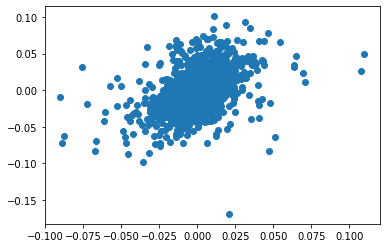

In [7]:
# Computing the percentage changes (returns) on stocks_and_bonds
returns = stocks_and_bonds.pct_change()

# Computing correlation between columns 'SP500' and 'US10Y'
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Making the scatterplot
plt.scatter(returns['SP500'], returns['US10Y'])
plt.show()

The positive correlation means that when interest rates go down, stock prices go down. For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds (this is sometimes referred to as a 'flight to quality'). During these periods, stocks drop and interest rates drop as well. Of course, there are times when the opposite relationship holds too.

---


### Flying Saucers Aren't Correlated to Flying Markets
Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when we look at the correlation of say, two stocks, we should look at the correlation of their returns and not their levels.

To illustrate this point, we'll calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

The DataFrame `levels` contains the levels of `DJI` and `UFO`. UFO data was downloaded from www.nuforc.org.

In [8]:
levels = {'DJI': {1941: 110.96, 1942: 119.4, 1943: 135.89, 1944: 152.32, 1945: 192.91, 1946: 177.2, 1947: 181.16, 1948: 177.3, 1949: 200.13, 1950: 235.41, 1951: 269.23, 1952: 291.9, 1953: 280.9, 1954: 404.39, 1955: 488.4, 1956: 499.47, 1957: 435.69, 1958: 583.65, 1959: 679.36, 1960: 615.89, 1961: 731.14, 1962: 652.1, 1963: 762.95, 1964: 874.13, 1965: 969.26, 1966: 785.69, 1967: 905.11, 1968: 943.75, 1969: 800.36, 1970: 838.92, 1971: 890.2, 1972: 1020.02, 1973: 850.86, 1974: 616.24, 1975: 852.41, 1976: 1004.65, 1977: 831.17, 1978: 805.01, 1979: 838.74, 1980: 963.99, 1981: 875.0, 1982: 1046.54, 1983: 1258.64, 1984: 1211.57, 1985: 1546.67, 1986: 1895.95, 1987: 1938.83, 1988: 2168.57, 1989: 2753.2, 1990: 2633.66, 1991: 3168.83, 1992: 3301.11, 1993: 3754.09, 1994: 3834.44, 1995: 5117.12, 1996: 6448.26, 1997: 7908.24, 1998: 9181.43, 1999: 11497.12, 2000: 10786.85, 2001: 10021.5, 2002: 8341.63, 2003: 10453.92, 2004: 10783.01, 2005: 10717.5, 2006: 12463.15, 2007: 13264.82, 2008: 8776.39, 2009: 10428.05, 2010: 11577.51, 2011: 12217.56, 2012: 13104.14, 2013: 16576.66}, 'UFO': {1941: 1, 1942: 2, 1943: 9, 1944: 9, 1945: 9, 1946: 10, 1947: 37, 1948: 8, 1949: 16, 1950: 28, 1951: 20, 1952: 49, 1953: 33, 1954: 53, 1955: 32, 1956: 45, 1957: 72, 1958: 47, 1959: 50, 1960: 66, 1961: 48, 1962: 73, 1963: 86, 1964: 88, 1965: 188, 1966: 193, 1967: 188, 1968: 220, 1969: 155, 1970: 147, 1971: 130, 1972: 158, 1973: 226, 1974: 273, 1975: 319, 1976: 279, 1977: 268, 1978: 335, 1979: 245, 1980: 246, 1981: 164, 1982: 183, 1983: 153, 1984: 186, 1985: 218, 1986: 193, 1987: 223, 1988: 241, 1989: 251, 1990: 259, 1991: 234, 1992: 252, 1993: 309, 1994: 421, 1995: 1078, 1996: 834, 1997: 1255, 1998: 1767, 1999: 2805, 2000: 2772, 2001: 3122, 2002: 3235, 2003: 3962, 2004: 4257, 2005: 4083, 2006: 3721, 2007: 4269, 2008: 4820, 2009: 4541, 2010: 4283, 2011: 5107, 2012: 7357, 2013: 7037}}
levels = pd.DataFrame(levels)

print(levels.shape)
levels.head()

(73, 2)


,DJI,UFO
1941,110.96,1
1942,119.40,2
1943,135.89,9
1944,152.32,9
1945,192.91,9


In [9]:
# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


Notice that the correlation on levels is high but the correlation on changes is close to zero.  

**CONCLUSION:** Do not compute correlation betweeen the actual levels of two trending series. Instead, compute correlation on changes in values in them.

---

## Simple Linear Regression
[VIDEO](https://videos.datacamp.com/transcoded/4267_intro+_to_time_series_analysis_in_python/v1/hls-4267_ch1_3.master.m3u8)
- Also known as OLS (Ordinary Least Squares)
- Different Regression techniques in Python
  - In **`statsmodels`**
  ```
  import statsmodels.api as sm
  sm.OLS(y, x).fit()
  ```
  - In **`numpy`**
  ```
  import numpy as np
  np.polyfit(x, y, deg=1)
  ```
  - In **`pandas`**
  ```
  import pandas as pd
  pd.ols(y, x)
  ```
  - In **`scipy`**
  ```
  from scipy import stats
  stats.linregress(x, y)
  ```
  - In **`sklearn`**
  ```
  from sklean.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(x,y)
  ```

**NOTE:** Order of `x` and `y` is not consistent across packages

### Looking at a Regression's R-Squared
**R-squared** measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, we will use the statistical package `statsmodels`, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

We will take two series, `x` and `y`, compute their correlation, and then regress `y` on `x` using the function `OLS(y,x)` in the `statsmodels.api` library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the $α$ in the regression $y_t=α+βx_t+ϵ_t$). 

To include a constant using the function `OLS()`, we need to add a column of 1's to the right hand side of the regression.

In [10]:
x = [1.2811550440412238, -0.6126310598985145, 0.9332222021268057, 2.2693265731638363, -1.427691082555, 0.6405188010777155, -1.596489626936219, 0.33561618750787203, -1.661094450815615, -0.892276781318839, -0.3853601714404014, 1.1750613930276552, 1.0795261289242912, -1.2035994956420473, -0.056172151726598965, -0.3766366045789261, 1.5701795772212934, -0.9428046774925836, 0.15111742087150695, 0.9206869830404033, 0.39865553922740776, 0.509308881338481, -0.33266116373611765, -2.23945925855725, -0.4534897919461296, 1.0290382457244724, -1.8780126981110872, 0.21017468558027702, -0.4757487221856649, -1.2186501112582493, 0.9308799884171601, -0.6028764223428251, -1.2009086565864688, -0.0964592154016757, 1.212574421217251, -0.6424298804905836, -1.37811844503333, 2.3018322938539786, 0.3649715099125608, 0.45720613554168227, -1.3774898420827786, -1.4383766335317467, 0.063973133855837, 0.44278722045348, -1.9974962921111783, -1.4044702210471958, 0.08692671859178444, 0.5570923022590792, 0.7522245332145279, -0.4545804023390465, -1.0680666881208938, -0.11323127134326061, 0.031636849769069254, -0.5913536163273568, -0.7743368977153091, 0.6947645888461771, 0.8286835284249676, -0.924767578153199, 1.2618915478818902, -2.3626119374754966, 0.14534783815545224, 0.049616126607182204, -1.6283838027917457, -0.6800270946068546, -0.5884337805404406, 0.7260916073821183, 0.8092150965860476, -0.6693518909217461, 0.9388824358296493, -1.5595639187088612, 0.8316986060383421, -1.1608014157128452, -0.5898791339712739, -0.09934721933319744, 0.2656448155523166, -0.18394678158088928, 0.9564584613417034, 1.0313898667732246, -0.6584946536221273, -1.3743996656695014, -0.0631732256437111, 0.026892033235163947, -0.8496921931994855, -1.729939107593855, -0.13857788040834806, 1.005633140702026, 0.7383585048100306, -0.06374618401822056, -0.43627521742932374, 0.41300383170708127, 0.23527973389250745, -1.4402823175412254, -0.037024592454535196, 0.3163210863597245, 0.4334010006371085, -0.1794067693088721, -0.22272937057979608, -0.9145161654283759, 0.23768785153671315, 0.2838865108117988, -0.8192423257468685, -1.9910712050577701, -0.04006354807978106, -0.12033738970715552, 0.15510748588618137, -0.4352447189222036, -0.0487281261986246, 1.0126578930049703, -0.7907201580971653, 0.7428329253873476, 1.100457607102351, 0.15812950730365105, -1.2496169877073868, 0.5361294618762135, 1.233762471342156, 1.7284866572391626, 0.25594780064858513, -0.41149149785151656, -1.0497931002530645, -0.6235509427190559, -0.22097480931607114, -0.46150241750214294, -0.4961601004936394, -1.0958358832877453, 1.5092875490667619, -1.6290323928216552, 0.28681646837921426, -0.7418999422719599, -0.5499656749845604, 0.6326764122049733, -0.029633564332853045, -0.012109250331289711, -1.0441640436490787, -0.5562011045733684, -1.0941654365809972, 0.8860495062314049, -1.5088203163123568, 1.1374329048126899, -1.5501735403499899, 0.6954523634231947, 0.9546853946527298, 1.3765439821968224, 0.19330216840911907, 1.892079712068668, 1.3575960296100273, 1.1969930896344374, -1.1278705031605591, 2.03058893387105, -1.7353520911623042, 0.026824698899590858, -0.9310507631310321, 0.7791126068047515, 0.4347688092705445, 0.8543492855148576, -0.36223449264905516, -0.9940674283863438, 1.1226780657187447, -1.3693434103086404, 0.09262208932661621, 0.16669856561892382, 0.4959097730434428, 0.05771982648856984, -0.6053809875603205, 1.6330030670912459, 0.288167641685169, 0.5595427949202992, 0.49161723704835875, 0.03710723132111678, -0.017796291447584375, -1.6570629840076838, 0.3972959690857464, -0.9938556824225638, 1.8668058033948733, 0.07302987315908709, 1.398213208859564, 0.27355501335685684, 0.6690414670643127, 1.1038295883597358, 1.3931754019172784, 1.5883723046544935, 0.5418476161290624, 0.5544303328617051, 0.9750753573422007, -1.916275205762016, -0.3626735851149104, 2.0628270289912463, -1.0723062135838064, 1.3360361211494085, 0.5475010717195191, -0.617524225013694, -0.9951149589811019, 1.0753160668536368, 0.3617901279608233, 0.9195681367049232, -0.4004585726579531, -0.6068603367567185, 0.048114274223299905, 1.6377358736628664, 0.33899410124172297, 0.21872786133555278, -1.6137386502993685, 0.18580232306052935, 0.22686320183666522, 1.5578421135323661, 0.1550583148874443, -0.3003998683723746, 0.32638341890705735, -1.370763314129386, -0.7321718364215666, -0.029719106687211696, 1.7250975811712936, 0.4285524229951472, 0.2782490086843458, 0.21799582474990986, 0.6062628073626953, 1.4581079982282943, -0.42615886544821197, -0.613083279799305, -0.5239485031323156, -1.670621825863721, -1.2640011981364627, 0.4132286076001853, -1.0532361755894544, 1.2835926349746098, -1.5735587350796931, -0.4084227724876398, 1.224872313494202, 0.3415187228815285, 0.19644259010643528, 0.18081070948849623, 0.3623181904942318, 1.689157463781665, -0.9965124679839346, -0.8218393586151007, -0.7848407321055315, -0.3228685919425816, -0.7392740033123055, -0.1500074064532319, 0.8107759705086444, 2.084423434792031, 0.8834937342698636, 2.8462671773195503, -0.14121234494487378, -0.8049187751604127, -2.321357750576519, 1.4134332889826897, 0.7466704197993697, 1.1506086948952838, -0.5060139080093885, -0.3354555917233457, -0.7174196055120188, 0.46658579812084167, -0.9298327945813356, 0.8456943454100372, 1.6050684916244604, -0.4352825695391445, -1.9727099686582816, 1.1880683084519628, -0.02323359841623244, -0.24158816746740822, 1.9061970426288974, 0.49757036585345893, 0.5293471899531691, -0.8387104275950436, -0.5384323931023147, -0.7710273505799191, -0.4109576100166529, -0.5375557392726514, -1.5226691060085205, 0.14313515560202128, 0.7624238993783363, 0.7334933564387248, 0.6587312472188919, 2.3626061416920234, 0.3191632013596961, 0.04647159859516381, -0.2755369854000762, -1.2814167482484604, -1.0777145898391958, -0.9643591443282876, 0.15456707448551382, 1.437029181593196, -1.3800682370220185, 1.0731570224196485, -0.05897203935250225, -0.1439819613811889, -1.2485507089306842, -1.0057958766239532, 0.2789286444875427, -1.8381512357957208, 0.4710816881100636, -0.913624085432763, 0.9228774883219917, -0.5269972810731411, -0.27566919969978776, -2.4872289245654806, 0.1324871295970721, -0.10288181143216761, 0.3028590233167439, -1.1743571235057015, -1.2880133585328295, -0.3417605743186503, -1.077587395061371, -2.151807645950538, -0.3927978678746878, 0.08400358092594723, -0.8270919285328677, -0.6129373404939361, 0.6952301625622106, 0.5021781114624926, 0.1799869140519854, -0.6192803879513986, 0.00587192506491817, 0.594271575339764, 0.5897645313049396, 0.5922167751763496, 2.134722295912065, 1.3347873183650223, -1.486619153082548, 0.08560166020524435, -1.6925581993269394, 1.011708416153619, -0.14020801309204117, 0.48184848501024724, 0.6718729525263696, -1.127862151776186, -0.2990782844837448, -0.7975916684903256, -0.3975826691867548, 2.142217744330889, 1.4066085892138767, 0.5273293230858743, 0.1378760563116852, 0.532649039316254, -1.223478422259192, -0.10299034282643785, -1.2822830722842427, 0.1032967267630437, 1.928093739383223, -0.7740374677171789, -0.7438198607084211, -0.18269039221875313, 0.7846498395908826, -0.10984657843530585, -0.3863608426004779, 1.5077979737496812, 0.00482917034885061, 1.732017154629424, -1.2295623137610412, -0.5725147309505427, -0.24956431539792898, -1.487353180389997, 0.4174945289618317, -1.6923016399179027, -0.23941151210717423, 0.965475945065727, 0.5473140277406429, 0.2719169871221121, 0.6603713592024104, -0.25902229365406354, -0.7604130478169479, -1.0078748877980297, 0.7870183151313934, -0.21502826189311067, -0.17072095044503943, 1.0236868222160658, 0.37755614563511675, 2.6108068431657854, 0.5246756173219759, 0.4836598162210405, 0.26742536748967183, 0.0169831633554079, 0.4562201011537283, -0.6606608098771884, 0.9949365427832687, -1.226735600080754, -1.6380411876107703, 2.041699248954565, 0.33493880002694376, 0.4529649856245742, -1.5153549153241226, 1.0909300176620387, 2.4913638757172443, 2.10651569366746, 1.9351030231528283, -2.1958407413708603, -0.4138797661100451, 0.250136395904108, 1.592751568266953, -1.2389426603316052, -0.26438440815028813, 1.6003122903891118, 0.4369099686809913, 0.66219670316823, 1.1573741156588628, 1.4986431755506244, 1.3255114982392833, -0.17931322235265917, -1.1957287571528918, 0.533196745245951, -0.3310345732826881, 0.9349535940920656, 1.5696533587044477, -0.5976302756882733, 0.630972928035347, -0.8272691085540191, 1.7440692032035177, -1.0589381321382874, 0.49376280519717664, 1.0662321134033914, -1.1480332637032122, 0.3315584422919956, -0.3645639530891268, 1.3957648949802663, 1.4190645340791712, 0.7116013566560508, 0.14958564285001907, -0.8387551985432976, -1.2123958029963737, 0.12306868449402704, 0.019751710655750914, 1.047685567212333, 0.29271014402798606, 0.5786548342762493, 0.7047096725632085, -2.708538556470341, 0.05010884493866954, -0.2969818564128184, 0.3999492635439395, 1.7223695598737703, -0.586845060734203, -0.026973741469146, -1.4616921654481712, 0.138495855842951, -1.123850873579895, 0.017135589417939627, 0.09308131402918762, 1.1230826990102114, -0.20143798281762954, -0.7258410981859367, 0.24627241367922775, 1.1296361715909322, 0.058552159550198345, -1.7983273468722822, 2.210210728664325, 2.249115280136353e-05, -0.5984532062176234, -0.45670278983757234, 1.1603754016024759, -1.0449496803465854, -0.4435199490079035, -1.8261954122445656, 0.2584637202654191, -0.4083742936784235, 0.693394936295836, -0.17069021353895084, 0.5684291527085978, 0.6665539259234277, 0.7259434644264395, -0.7818996934482328, -0.5742831908261057, -1.0057955675400962, 0.2767666945183962, -0.02657171937867959, 1.4859056991110522, 1.1814689108569423, -0.3200975323792521, 0.2979647582167218, -0.3232515902839842, 0.5459492822819827, 2.9272109032239864, 0.8037546198436225, -0.7499979255776861, 1.0195486390030897, -0.19318912479046815, 0.5013507507734484, -0.3154248752490127, -0.6909048361483536, -0.162428172141605, 0.6619320564839841, 1.541660251566514, 0.24676306444895935, -0.6081792360254962, 0.2230484458049995, -0.19688612727743685, -2.0280595004339546, -0.2019706712044319, 0.15767319852175163, -0.09038685208329725, -1.2842696550826431, 0.27116452125930596, -0.7124928794583623, 0.017356569438715625, 1.1873032421525376, 1.7072145367579399, 0.6655242675765024, 0.8527135331212987, 0.5509525519030603, -1.2461593572236154, -0.7068798069098832, 0.8567847697718416, -0.9234348937646064, -0.8806828886735357, -0.05609809998169541, 0.5019083657396824, -0.4157581652339636, 0.7576816160052998, -0.2833796697872356, -2.2915502845187197, -0.09944721684838555, 0.3980119421690809, 0.09454416205183548, 0.14329540595075083, -0.8734928742311916, 0.7584630765437268, -0.7908212321453724, -0.4320523265745874, 0.37025365268475396, -1.062001122245369, -0.4828920876000209, 0.6936722586624583, 0.5858808880619747, 1.4508861702159925, 0.7500862350496543, 0.5420294884948335, 1.0398706462749154, -0.1948557651599005, -2.385752240649883, -0.47077742637789227, 2.064509427221515, -1.386038447705097, -0.21990377100261563, -0.22630975846881524, -0.2588868206001651, -1.2646588934123528, -1.0834969364983877, -1.401409873741469, -0.0792912256992738, -0.2639577678483505, 0.032443527882877736, -0.1958118189742201, -0.2696672440142078, 2.356910173616174, -0.6625621350495404, -0.9823303116647341, -0.23929616612266164, -0.34032350329971356, -0.057851705966839494, -0.30298116057390284, -0.6066365014043973, 0.9809215742936962, -0.6705935056817571, -0.17471250370687091, -0.5779101748507249, -1.452565538806313, -0.6818093230131186, -0.875640737584392, 1.0829587238449638, 1.8344569102333776, 1.7031903105405986, -1.5062289827032123, 0.17890924580770518, -0.8351542433791986, 0.2710173607705894, 0.31965118866128406, 0.07953331906928739, -0.8475414408512983, 0.24929629756979074, 0.2938749017440937, 0.8625826904665663, -0.11273579413889787, 2.8006286023584983, -0.1117548423137034, 0.39703141240929996, -1.521600652092554, -1.0163254285070924, -0.28332438531049664, 1.2965563661393242, -0.9501724981207302, 0.2289047380394984, -0.5596777441867471, 0.020094441466944817, 1.0979926410447785, -1.3706395935376305, 1.5666130505215872, -0.7501925731978024, 0.6444428853456805, 0.5117080499010401, 0.017447261865881667, 1.2959498184802178, -1.2468030429927888, -0.8573379299224981, 0.8039631360433173, 0.9543085510513728, -1.545932002127972, 0.9610860616851591, -1.958830433328374, -0.4483478967243869, -0.3776644755498551, 0.5354507909342476, -1.0430895803398843, -1.0779232456335477, 0.33595254329514174, -0.5436533946867769, -0.5306417023748377, 0.8078920393134098, -0.8419042600738254, -1.424370805760945, 1.0103737412666025, -1.9600896409016224, 1.0225799813611687, -0.3422881659706962, -0.6327289414396146, 0.5735534796741496, 1.4513051087363864, 0.6070670062511726, 0.8195271507826488, -0.8639349441826176, 0.969726864583193, -0.38714731089393417, -1.423694462749488, -0.24029038589401666, -0.4859663413673385, 0.7421587411711145, 0.8955230500216699, -1.1931899850241667, -0.5250812576299323, 0.21044349786095048, -1.0435990843554972, -0.3553472314138764, -0.5745147739830379, 0.7270555706490947, -0.69252072507968, 0.0824295389407393, 0.5676522158489848, 0.4926951570286256, 0.12162848455760715, -0.3325245708296114, -1.040665362591346, -0.15104187318030327, 0.8482850141165379, 0.7282104379946829, 1.623223724188598, 1.065346721644724, -0.4631233870124684, -0.561463658403215, 0.08141045468279497, -0.6033751809042917, -1.2494181168901144, -1.0226185527491465, 1.6672766121243676, 0.5161077828412061, 0.7303143773731128, -1.2042140822667036, 0.42095035407325243, -0.5998653289544662, 0.4730008839090102, -1.9236000119268668, -1.1632113128844814, -0.34857698511954055, 0.6361644542059346, -0.28998923755127615, 0.5156222422474026, -2.0302343228889934, -1.408920553545117, -0.7164483539762333, 0.53851393409135, 1.632852293911881, -0.7059173661787806, -1.292958091755332, 0.22475214833323107, -0.7183152270319154, -0.0016646080338889222, -0.8232330902111494, 0.651173508629377, -0.23430488957409498, 0.9596102360167784, 0.28027084053186496, -0.3071623437513136, -0.150701948491389, 0.26539723370731777, 0.6575421788781195, -2.356978810174661, -0.4189421126781944, 0.33527442916251604, -0.6961444008576461, 0.23852841584644008, -0.9148663907490183, -0.6938629955169826, -0.6512048216975727, -0.44042201807582315, 0.4538387099487502, -0.9022531905831274, -0.43919529829075504, -0.48533301832222464, 1.400748938049492, -0.3041538855755456, 0.8022650307410149, 0.14423517799219773, -0.6162872691345818, -0.9003867648716256, -0.6426862410461465, -0.6385018025685305, -0.27749862681611087, -0.8898549936931711, -0.4845848557476576, -0.7462569079316493, -0.6660847909048132, -1.061698323614797, -0.4595916991858538, -0.4964001994536581, -1.1517433065966902, -0.7147352986264145, -0.979615491705565, -2.0022433379234714, -0.7920934071778448, 0.28918556795146877, -0.14459509154605615, 0.6300675586142113, 0.09113513829642259, 1.6182337171766665, 0.697616497978575, 0.40845000090522027, 0.0392003485912506, 1.2886297909140367, -0.9013774801911525, -0.7218805040877588, -2.3364088265360605, -0.15122718168423352, 1.5917319487562862, 0.10945483690096314, -0.5218476396593968, 0.014770133898636802, 0.5219232582969562, -1.6651425334274597, -0.9810023979643574, -0.49861418819806225, -0.37784158380837596, -1.9509977835799683, -0.7596789412979185, 0.5756436940108495, -0.1263915844750892, -0.2881655458555227, -0.21126222635427996, 0.8763471869337076, -0.16128480613787813, -0.595613530727245, 0.8223961660652714, 1.3938876633750859, -0.08179642293560137, -1.1508612743295161, 0.45892509993606106, 1.4622506372355752, 1.4968046003337594, 0.4330563169849272, 0.08146859954689607, -0.23758794588910806, 0.14433456436630293, 1.4297074738636055, -0.11910530737610853, 0.24994708657435719, -1.5397817734025403, 0.4710670256217842, -0.7528800491508506, 1.4973821201153297, -0.7370596961142618, -0.36600088826730276, 1.0788087412974006, 1.1097788135373696, 0.5606108417697564, 1.5254143138934957, -0.9083822366856663, 1.4745649737166788, 1.0676285887446368, 0.2614622875043119, -0.761594329523209, 0.16746351806632892, 0.29831306786322237, -0.3868078445771079, -0.3281181510361313, -0.20920587718194528, -0.6971623037562072, 0.8201147170205032, 0.8068979989605962, -0.14410762019304135, -0.03255522222679558, -1.0687328094882182, -0.27438958461986906, -1.5786072326056277, 0.0031124932782617726, 3.0875196913749394, -0.36685895820665904, 0.29001956648771726, 1.3781054114403108, -0.9691407832538603, -0.2555576493873456, 0.8684177508230642, -0.5193399002961957, -1.3421682606120884, 0.3147406832043353, 0.772758949221254, 0.632743021432991, 0.6282855528469061, -0.294330104752678, -1.1039735835170281, 0.4838728779399808, 1.091109943724447, -0.11402960847367027, 0.7216136659581276, -0.7952585606905005, 1.2900928276303572, 0.668708214494058, 1.6316989496194068, 0.4674668654867797, -1.4593356445396, 0.39301110318936955, -1.0780779185918286, 0.7399814906750249, -0.13169334753431958, 3.4530817839133077, 0.9851471428823663, 1.1702458168488377, -0.1374401186829724, -0.7140970042251803, -1.9273051033500685, 0.7415692564142079, 0.9767403767921218, -0.5386368829957875, 0.7941641292747003, -0.4426336706151123, 0.3611363176429492, 1.4393665592850737, 2.6426340756142896, -0.5173806148613016, -0.44752540165620003, 1.5207648982104383, -1.5542109065186518, -0.047589885387081685, 0.8049529740098417, 0.8584215654325545, 0.017913031835165235, 1.6261315194960824, 0.3903778618028171, -0.2824949808393406, -1.2822231331821135, 2.130088826538941, 0.01525282560618788, 3.753551482974148, 0.8933018228811488, 1.7967146397256244, -0.49568160024234537, 0.6706407731678474, 0.05766387793080424, -1.2120724687166047, -1.397301133108583, 0.1364103906471751, 0.22922870887051736, 0.09482754488813724, 0.4136402992332198, 0.9468518836081644, 2.3604601352516617, 0.7087840009586248, 0.6514681982249536, -1.5323044536529693, -0.6848120551306541, -0.5713992805749842, 0.13574232809169298, 0.08506206933983652, 1.0479594242103552, -0.03500546590392013, -1.4870046523111058, 1.4954443709311964, 0.5678162494115871, -1.2341719498736567, 0.7054584945121818, 0.12042410075608224, -0.029205904548573313, 0.8326703835870282, -0.2694083369965819, -0.2668229884277391, 0.45620238647435685, -0.34032229625850546, -0.6571342553469359, -0.52289564080822, 1.6514728722994687, 1.7022788554271675, 0.29758492780508267, 0.983691367511512, -0.33069743391009315, 0.14838735834684125, 0.4159273914669916, -1.7371164885762094, -0.9483051236350288, 0.2962478462192728, 1.130862479425501, -0.7521448321882552, 0.44055994741992077, -1.290473114630968, 0.38701573131336925, -1.2742461550579223, 0.15125253505998273, 0.24692691390378116, -1.4827692967810617, -0.7407891807851247, -0.3008623268715242, -0.9350653262601603, -1.0243160100912239, 0.40587665586893784, 0.813381859712616, 0.316200062837867, -0.45605550217223334, -0.10950542409640848, 1.8219947355667738, -0.11927902452886274, -0.18333975346505604, 0.8557516820631766, 0.14484051586829436, 0.7622419333896986, -1.8925454922311127, -0.818023396988202, -0.20544826880253692, -1.3199128745826836, 1.729563516423699, -0.09626352514342396, 1.1631185076895898, -0.5852350001243455, 0.7039075333859474, 0.617544368248742, -0.511282797504639, 1.3172490445252845, -1.0704715956704887, -0.5025752028483513, 0.04221309666716833, 1.4173558637443744, -0.06031795298007711, 0.18892275187271276, -0.04927489195075641, 0.8608987480623188, -0.5286370591510503, -0.7362899547896913, 1.6056121506761227, 1.1748273187350537, 0.5067017023831254, -2.085925519310575, 0.3396871039965605, -0.6564751973305406, -0.3331057193479064, -0.14696606994721095, -0.42788188240430064, -0.7232036028128643, -0.129793812318884, 0.4848980562907761, -1.1247681212903056, 0.5718077336743665, -0.4230129805204403, -0.5503507083933211, -0.7077830026673683, -1.4722981939474487, 0.7169901009692797, 2.6282023232584417, -0.11992815403676732, 0.4353676973975298, -1.1420916946045905, 1.3386924595354746, 0.9180706850375504, -0.6787382291510811, 0.4793461018723987, 1.397851133836866, -1.1313343392628266, -0.683984118806693, -0.8310011879258917, -0.14420594489065325, 0.9182054158071498, 1.216339774257903, 0.7748184342131297, 2.7340141733751624, 0.0005404319387118655, -1.6109057403686418, -1.0636523116621077, 0.04669677587569681, 0.23914254343351313, -0.09076924413605764, 1.2235224703671055, 0.8581408680020675, -0.1437251143017076, 1.740802785806922, -0.32070034322663066, -0.12664089914099344, -1.3801308078906984, 1.035784268964063, -0.05602888306554742, 0.16418240278246704, 0.7863503496394391, 0.25154225043142625, 0.4682238397718219, 1.0890322480832832, 0.7436922974132252, -1.6115703065738287, 1.011224254361624, 1.5719710523592254]
y = [-0.8351286009190672, -0.06100441499537612, -0.194677330631589, -2.4611421320699467, 1.040072990892944, -0.6828739396020767, 1.3107639678267742, -0.5298639831872226, 2.639054920254874, 1.0649845894270087, 1.052035801676665, -0.6492146582173699, -1.3647372713719814, 0.5646740628725941, -0.3292163536905029, -0.8749304916011758, -1.883174191714396, 0.8651524394848811, 0.15666513226527481, -0.793844987778514, -1.1712928255286783, -0.2526950984933609, 0.3273704057637023, 2.424119190394595, 1.454417921600079, -1.493598456173196, 1.5211081928494008, 0.26803795383150913, 1.2605576813226307, 1.6968970520786513, -0.5754065968246665, 0.009752477415448239, 1.561915809634276, -0.0077827232736593565, -1.123344542892297, 0.27072607156943584, 0.8874343256221449, -1.8368522031971426, -0.42133365389976307, -1.175414516001151, 1.0694182669881944, 1.7994158301635967, -0.5496034510258208, -0.985044049537418, 2.071036645930695, 0.8376931544450931, 0.43982915406535145, -0.09596389771269319, -1.3619875450452867, 0.285007545705001, 0.18352831476965914, 1.2752281128590326, -0.016368025541275942, -0.24134723602942829, 0.056375833843262335, -0.13893642883047652, -0.6045181655598098, 1.0494242786206278, -1.410579011186635, 1.4569839407534417, -0.3922580739101969, 0.28499606976433933, 1.5075322031407763, 0.9035176816076788, 0.3362393315340148, -1.2180458429821857, -0.6653524863688425, 0.8140115574040573, -0.13122804960129275, 1.4012502554784658, -0.7734647082014946, 1.309618437647121, 0.4950340199543207, 0.7900884968784077, -0.2015556492345248, 0.3108326180697597, -1.7958196412162415, -0.9562837890101289, 0.4211697757054076, 1.3103694234018777, -0.023570054303233504, 0.2881583503543797, 0.4479052396498257, 1.2402283884003817, 0.015864002170548185, -1.0392280889458745, -0.7057533944065573, 0.7220130094387418, 0.16292693533091762, -0.35040371958031274, 0.4174684307050774, 1.2797612914123162, -1.1065249909203736, -0.7537217897041183, -0.2582792036745885, 0.16600466912717265, 0.16632778775671594, -0.5304555619213652, -0.28726180106259136, -0.3813550423126317, 0.5517614900302444, 2.2988869499939746, -0.05235864358750514, -0.28900037602902284, -0.030476428364102706, 0.6944898693279178, -0.5845631094753875, -0.2916632456888246, 0.9560190622554623, -0.74120276252537, -1.347291281771406, -0.31985980150945287, 0.615143470662628, -1.1509086120876026, -1.17828298784928, -1.3913462901200206, -0.22518472313119609, 0.21732632728409726, 0.9628803906739333, 0.5345051781176213, 0.34604375756453193, 0.025778700949339116, 0.3535181985885683, 0.1332115507220299, -1.3467497524558527, 2.002482017436798, -1.0435253128347786, 0.7058620298051606, 0.6015288311009992, 0.6904611111905807, -0.041583058263442725, -0.24885630285378202, 0.8859602961150294, 0.6834794488264708, 1.2820754649058856, -1.4792728779721538, 1.2365965693647982, -1.4368954464740926, 0.9150349787144477, -0.9936577469384562, -1.4843326819574272, -1.582793263425021, -0.4985425104162844, -1.3315708369058545, -1.2332555735860795, -0.8981127007256928, 0.7353897756251918, -1.7194233851753498, 1.9212563409773007, 0.33978339077341935, 0.5603156861554537, -0.5058098466895491, 0.15403511311095938, -0.5186663257741796, 0.30568989517621464, 1.2982046637971552, -0.8363635677419465, 1.311006771933953, -0.3920973979405682, 0.14017971042533597, -1.0980191786092972, -0.6747515949956524, 0.41455952135834273, -1.78890508717576, -0.08730808916749108, 0.2761770828489287, -0.519522716313831, -0.16350248730212608, 0.259842285864462, 0.9552703090152659, -0.5975454381796642, 0.8343511124979328, -1.8275715472142229, 0.007357470866249986, -0.6294375283426397, -0.35776392846515653, -1.0853982206347939, -1.2797235485339382, -0.4734952482197081, -2.0929770660193125, -0.2406531601128485, -0.25213031345049236, -0.9485595561718797, 1.4834867550363189, 0.45521438502146405, -2.3262226647219744, 1.1327147851674544, -1.0271111332391483, -0.3864814910521105, 0.11722834295539541, 0.5445433254828663, -1.4701291926643976, -0.31286354900968205, -0.5864748140108972, 0.08973536473366796, 1.1261058916010336, -0.1442576147331307, -1.8199810453177645, -0.22925709425946764, -0.10959569693089637, 1.376753860943283, -0.7712788503736197, 0.20998084418460666, -1.8556224018418037, 0.22511925219840134, 0.44595162773616676, -0.11088269984684684, 0.606478957058956, 0.6880051085490362, -1.0628575995947624, -0.9657025138773654, -0.9136757654733096, -0.6114889769485324, 0.4604154281775538, -0.5372621991055229, -0.778268897850732, -0.05764535435919853, 1.149734070677476, -0.2092121091733229, 1.8093128333586201, 1.0176342671395302, -0.36383247546020187, 1.117183260206731, -1.166427504298986, 1.602988199266382, -0.15620395419868643, -1.5100569077149304, -0.2949813474272129, 0.5199522901637373, 0.29521358812747733, 0.2856512031937996, -1.956918449897968, 0.9197724014996493, 0.9940461549432806, 1.0590129550423013, 0.9903149317539083, 1.1837178740427534, -0.11020391792137656, -0.4749433371781799, -2.6690112923427125, -0.9942333813580929, -2.283349897856185, 1.0287445749254598, 1.2657184205737533, 2.0660175316732308, -1.5173466757092178, -0.8615351571905977, -0.8966450081164234, 0.4939737594811782, 0.27192857530052045, 0.7485638954826769, -0.050862984996839285, 1.5279603287615164, -1.0847064029232791, -1.7117580111758084, 0.3758920787990269, 1.7912112936648938, -0.9338254981311711, 0.269041239924053, 0.35060352969420205, -2.2309251076178858, -0.6531847485271, -0.3447290272489765, 0.33262521992775607, 0.8003958685249337, 0.13692565854859848, 0.44789540455929583, 1.3355443573541301, 1.5730451112880557, 0.13948070865982107, -1.4111891230665945, -0.187638343980973, 0.013243362197729269, -3.072426434616361, 0.07804947297679296, -0.08924880637945112, -0.5128548489001585, 0.9760750830094682, 1.0461755585253074, 1.1178687801853213, -0.05337978977617685, -1.4343327845105922, 1.9651101843833167, -0.8470074346493587, 0.42442974830423524, 0.0395558010498794, 1.345326196281462, 1.4415546340271979, -0.35361343763228753, 1.9237847350303976, -1.0077573572133016, 0.9853096167802949, -0.6211939804749285, -0.21558974556080812, 0.8718902074054266, 2.502837825731818, 0.5860048041907306, 0.22601843601179708, -0.9264425309488689, 0.6047991987791652, 0.9355350050934457, 0.17527559483491692, 1.212129996285403, 1.6671722546010892, 0.4139698006528976, 0.6297140643644672, 0.3139029645907753, 0.42706670492387344, -0.22750854651242883, -0.671998676579982, 0.2431602828428717, 0.5144468523538015, -0.524697682245477, -0.8869196935567136, 0.298742909953898, -0.7245155562878318, -1.8661387374721192, -1.7402264782147339, 0.5452665418204603, 0.27258496682237804, 1.2810800520845667, -0.20473996011401668, -0.18905922818964352, -0.9167888952990743, -0.1852059605567809, 0.6027125075608392, 0.11922698339665362, 0.7276654726847182, 0.3266522643178294, -2.1211976117402878, -1.072482605927704, -0.7978992083312557, 0.12052125541513824, 0.20175742263808755, 1.990659299330785, -0.5597616267088866, 1.096087800275874, 0.17769656555972038, -1.1995285876412514, 0.9315781085278209, 0.9928966083438362, 0.045049531009922, -0.6562037083491528, 0.5942678096267451, 0.004797525042239186, -1.564845506871891, -0.04869705977825815, -1.2515017358911724, 0.8613779951720202, 0.9986336465646574, -0.17461716554909484, 1.6577064243902737, -0.07186756079736258, 1.4699648631778892, 1.1084191586892835, -1.2111096173220595, -0.6181200759656393, -0.13739717717278396, -0.938834936851383, 0.32830098343116143, 0.9434821803499186, 0.49673119671066546, 0.03960232855322794, 0.5492725554776009, 0.36093692831721746, 0.5735719614904095, -0.3946939152059685, -2.1160693536411297, -0.5518635680566477, -0.5456807148119283, -0.28667423479323867, -0.08594587515020048, 0.12896714068903015, 1.0575370799085069, -0.4328691796731137, 0.9792456604321654, 1.3324932571029853, -1.5490818521503682, 0.1019538053880786, -1.0172456892719937, 0.8860052812538409, -1.95207865452835, -2.9560654830566793, -2.1224389504593404, -2.424476973402556, 2.350184993909178, -0.31094255442247554, -0.22862159240944485, -1.5363218522876991, 1.0831968948433943, -0.6488688721809964, -1.1272966611367068, -0.8526896514981273, -0.6878963364437285, -1.100794214133822, -1.1524998517053378, -0.7350695563049733, -0.19887046298447833, 0.581035065845718, -0.5332305217730403, -0.5672321558963068, -0.8597169089303115, -1.0032889586016045, 0.3676549816070723, 0.20154385703720945, 0.9973082794075395, -1.0152848661244311, 0.9925692251760728, -0.5777960012661414, -1.2767738153751444, 0.33964045300533535, -0.2806852246508079, -0.1626726809919302, -0.9086753281969658, -0.9679821133040046, -0.2287017484302373, -0.6712474761904214, 0.8309776075195926, 1.6113998109762353, -0.3241661494135685, 0.06531279533116849, -0.6711587435663129, -0.48189390293423895, -0.4753407715250453, -0.6443492043894243, 2.6845636770790255, -0.7959221408352424, -0.1990813019576479, -0.3321482864839041, -1.6519500762163362, 0.006764297216013477, -0.7917251445212186, 1.609524556893827, -0.21158658130421582, 1.081738758533241, 0.662016196505634, -0.5817226860721069, -0.4841648088498559, -0.023211398741577356, 1.1721412087903582, -0.6809357811910692, -1.931887685845895, -0.4580015305105127, 1.8245062266219392, -1.5757357083224197, 0.31525391701854727, 0.731077334942962, 0.5634798083057991, -0.9963677766855772, 0.9510095967894265, 0.6311659192646828, 1.7131620415049307, -0.31075718420451387, -0.6079712440343344, -0.5592822574491567, -0.1867851236334443, -0.7274641784212689, -0.8959971340932692, -0.32552144880940265, 1.1994116402176425, 0.25751174579805997, 0.8652584328547716, 0.3217037211381487, 0.13716049965096547, -1.2681085218036827, -0.7289157387036611, -0.6799475756041976, -0.3999449039817398, 0.6231138473325765, -0.09298085509382946, -3.2465164901782626, -1.3646425370290651, 1.120814201007724, -0.49270553055824784, 0.004606261917645445, -0.849404447840968, 0.6061829861423851, -0.2259803829117142, 0.41528120242872174, -0.6425898256870864, -2.0917191379940356, -0.3852879872746276, 0.07737006632550128, -0.44208462240686014, 0.8323957730786525, 1.326631787764381, -0.29556756172921794, 0.031462053121549025, 0.06846815404386546, 1.6067059132638761, -0.26033687150137474, 0.9851994841659273, -0.8112693032942038, -1.1220193480659464, -1.775367428150278, -0.21864482871235116, -1.7166268838508927, -0.2670778495323081, 0.8394959526625937, 0.2098330002179524, -0.6029486915581515, 0.4764982356085541, 0.04506436899875718, -0.4511530380389726, -1.0725875065282233, 0.6634583586114344, -0.5897161023344912, 0.22593429888349945, 1.9154979347685708, -0.07156146139542914, -0.3267207266534765, -0.4793387070970653, 0.38545938086748527, 0.9642971299389009, -0.6750892246414598, 1.323537265071567, 0.26910683304195515, -0.02498421762860199, 0.2759339588922596, 0.8009899035818229, -1.0357822141384223, -0.8901036618630953, -1.310867202679047, -0.7815628434531199, -0.42791063166025234, -0.9301846361158219, 0.5649673152228756, 1.450135885822667, 0.15363016218797498, -1.6881207700896754, 1.2108972111953078, 0.1912477816463337, 0.6200973167111856, 0.41351983396980974, 1.1910197089897347, 0.7158871721876354, 1.7313754203157241, -0.8663634540184704, -0.2645634670436962, 0.6165388990391645, 0.1162021576778026, 0.39741389527177323, -2.2491599323467155, 0.5465810303146639, 0.9252325061115448, 1.2558596740012449, -0.5282244055567069, -0.7139897685127677, 0.8885407174426136, 0.7498826888948223, -0.27626958615143227, 0.7978121589570587, 0.22463377612490337, 0.3036219218847386, 1.5206939474266443, 0.48791214187544585, -0.14478996902488192, -1.0970071130274728, -0.7435177758190721, -1.5484987928781087, 1.7214670990104932, -0.42583558677259536, 0.47726231473696157, 0.038096052897151116, -0.2805155223625518, -0.5132399922408362, 1.4705396030720284, -0.36806556637150684, -0.05291475247876026, -0.9021724106554729, 0.39986577222888964, -2.620221202571141, 0.5624246103349794, -0.6288460130766073, 0.822535721205695, 2.15935617933679, 0.6474002907697215, -1.60717294563803, 1.1119812403517202, -0.12476249608497518, 0.4286013618780339, -0.03633159309394091, -0.9532767239907178, 2.1451966050479645, -1.311419010975985, 0.56660671312809, -1.2351290037741947, -0.35517920546109255, -0.2906648448779417, -1.1391047395660956, 0.8322709351313324, 0.016811048440167207, -0.47767425446309264, -1.224620872006959, 1.2181942107787327, -0.7035588452833823, 1.8516467744656862, 1.0501941704766498, 0.256953520471082, -1.1728245091137073, 1.1240160761185238, 1.5201840920392329, -0.8667444118086592, 0.2607877167620652, 0.2036606154765182, -0.8709450461805627, 0.9789930688211912, 0.8727052412665653, -1.050248959756164, 2.261639558143545, -1.0566310270913808, 0.0879641689887834, 0.5627641014888486, -0.009949510620575518, -1.8814375338069855, -0.9861615054025421, -0.601074061339009, 1.2736010499868522, -1.0177656092236762, 0.49447989411611204, 1.121675811107636, 0.06443226401984596, 0.0034689738695751183, -1.0686742438906895, -0.20327072084000522, 1.0980901612023022, -0.18797220682385504, -0.1390616280261179, 1.1897505980676946, 0.4885108439456383, -0.050134919134401, -0.08535468633790749, 0.9135491124267225, 0.2124816186721891, -1.2742763336812466, -0.25212865228164333, 0.3318276218970302, 0.3525786106287421, 1.5470792059323741, -0.3422570211804259, -0.9204881581661553, 0.01316341403563022, -1.6519606801021933, -1.013111337887004, 0.2820479552777713, 0.47263499017623906, -0.26829597409628075, 0.6653149184703697, 1.817390508429139, 0.05688688992439631, -1.2262119474031368, -0.4110824615891767, -0.4987084352785847, 0.6632521116301329, -1.164992319734768, -0.14487071556052242, -0.24062371480622027, 2.088361703429373, 1.279110670671242, 0.2542493976331204, -0.11096657857793092, 0.44038553510059264, -0.6699295955570451, 2.0000465866003365, 1.1762569151543973, 0.8460488856960432, -0.24846778832539768, -1.3758737786327224, 0.8280394084692945, 1.2625026425566397, -0.06597364397623037, 0.9731556523617573, -0.4434148149501292, 0.4701260817399749, -0.9439388371569425, -0.12180971530516568, -1.2542533108639282, -0.07710865015291997, -0.17603499466635414, 0.2950426056823578, -0.6214892965784424, -0.8953758772257824, 1.9593735415796323, 0.09958572299840592, -0.6510682451385197, 0.8656865759426796, -0.013609070052617028, 0.5344150561018873, 0.37292834968210176, 0.9822316450476345, 0.3465401042268712, -0.5717370481593201, 0.5971054703288382, -0.34236822612223855, 0.02223063152501999, -1.1687725906574817, 0.10586944426631484, 0.21337214590510878, -0.23422172147043996, 0.6552898120563176, 1.0244656411284943, 0.8409496290315752, 0.6194268145648701, 0.1562878693937707, 0.287888193886669, 0.9309153610206364, 0.6997029925032779, 0.31878825262511706, 0.5701143012807507, 0.6978033278005473, 0.29645831542061674, 0.33009348152386797, 0.800348934463625, 1.0690801175262108, 1.5810489275007527, 0.3958601539534113, 0.04281354616881958, 1.0745930617700512, -0.054950273680818396, -0.4045871868644608, -1.5454852016847376, -0.3185952077687233, -0.6215926970923221, 0.7305507571259972, -0.8335395096830446, 0.802567438371458, 0.5947482213539691, 2.2862782880716557, 0.00552874477217613, -1.709417717939578, 0.5617781652973668, 0.43715335055980953, 0.13162092831509203, -0.21681758902938303, 1.502737480383597, 1.372907435310837, 0.5486688465014347, 0.28062040088401696, 1.6297181252760515, 1.4527355642894983, -0.05426108354313248, 0.15427972976539, -0.4335169417881578, 0.8568382011803327, -0.4974058190480708, -0.32738069328901365, 1.3496321241965947, -0.725886713891028, -1.4126739073506405, 0.8657214303512696, 1.8854088632627228, -0.5685662517104995, -1.7820779034972276, -1.3333315305007223, -0.9256273304326064, -0.6113616832331479, 0.36479673242228206, -0.47110257310565057, -1.1813444496459788, 0.3267534955325383, -0.34740544104937127, 1.2711920562999022, -0.13838837257970832, -0.16239722670141785, -1.7929148468748217, 1.0374410281852575, 0.6467365826435185, -0.8100123096600219, -0.6861337314986262, -0.4346638307931161, -2.128655774250894, 1.2177395000370108, -0.8996308771909305, -1.0587017116974322, -0.6744261177245441, 1.5151409625322352, 0.5149839442728665, -0.24987599015708883, -0.13048809645106724, 0.6455025719498002, -0.5473682454010533, 0.019627662862032696, -0.7613413282985465, -0.6934503519759025, -0.5850725868256018, 0.2948816300949554, 0.9047985827761954, -0.3942433390587412, 2.251667356221582, -0.05894343129140028, -2.6245361983282276, 0.7303594772766099, -0.49995451917562633, -1.0301688826703248, 1.4717564854918987, 0.10947456718482437, -1.1822501238511427, 0.3920837621715219, 1.8575175444530967, -0.8584012859084936, -0.2963052111610501, -0.3885697714869025, -0.47481787633773975, 0.7352081350739362, 1.6899257763805653, -0.549621655536818, -1.1965116085691776, -0.06662676646404964, -0.2600533788212141, 0.97375136675372, -1.2002337976178175, -0.08029700605296085, -1.8816125018560808, -0.6761251158864803, 0.4073289815726317, -0.012557251751150106, 0.8325228343702813, -0.5851500736714067, 0.16273136414455638, -3.9571685184156546, -0.6975843905737343, -1.638311891490591, -0.4383899498731495, 0.5390559572860592, 1.6456863317405426, -0.381813516712245, -0.30074647336334515, 0.40273764267681067, 0.48071112756120604, 0.5099290379543837, 0.10269664410803683, -1.5203963064975958, -2.8811812178653438, 1.1355330381166666, 0.733728056466949, -1.8241428894973772, 1.3199335876913987, -0.3126683869300254, -1.0152637656368146, -0.43021374462763834, 0.43774566758539546, -1.0780922109710034, 0.4322037424391844, -0.3853746142222261, 1.2211837374674344, -2.065155791036126, 0.4659994235011272, -3.239761434249477, -0.03185757015558928, -1.552831668631661, 0.3069061540090139, -0.8377846308107615, -0.618218395526103, 0.7236256247824069, 0.5972652740685637, -0.20899607885924681, 0.19843980984266132, -0.299619802946286, 0.025079303856235437, -1.403308713220161, -1.4538469569917025, -1.5519746708504625, -0.9253665117890424, 1.324395199438293, -0.1160490200892289, -0.16596481627273799, -0.47556696161315065, 0.19865412914889677, -1.5561811954881166, 0.342368979767648, 1.2759682548933864, -1.4119828118737403, -0.9812295297180748, 1.5108705191089844, -0.7138265475096489, -0.04659109590334553, -0.8205278901107289, -1.070586489272524, -0.21460841610333678, 0.09631320741008491, -1.0242871391502386, 0.5300497061994761, 0.9027834176968405, 0.6937663940700887, -1.776298629948592, -1.0899486001439687, 0.27026714926143897, -1.0247765298666414, 0.1827134956160951, 0.5144562902463607, -1.59564219165742, 1.3830743733075401, 1.2398496146033884, -0.12615248531274562, -1.092448104166287, 0.4058527095300118, -0.30076387552194483, 1.2890622273482375, -0.4524948562808326, 0.9873531167931605, -0.43400815098799417, -0.15135933523977815, 0.5326303447803972, 0.3420580637655695, 0.8552439475444681, 1.005706640275822, 0.6024218879610441, 0.27365147653603067, -0.7251604071340673, -0.4034552233141353, 0.33552298351653376, -0.1161510741361051, -1.7356404162116643, 0.7374057890601887, -0.440392863540994, -0.6140808783233639, -0.019937835373290917, 0.07396203397441399, 1.475923263020116, 0.954004231593583, -0.1790158879202037, 1.8410322470217249, -1.1108473941141084, -0.17107654683025816, -0.7405820189209587, 0.19430488124406078, -0.877213133892288, -0.3815138372168757, 0.22701151896720698, -1.913831653047473, 0.6255788269572155, -0.28593281727612363, 0.816225208825358, -1.1715237715870714, 0.4708081327913606, -0.06691172858963793, 0.30545798867900137, -0.7748330455340461, 1.0509783310521734, 0.23006360328719602, -1.4228692443994069, -0.7972294037423477, -0.05429329907326862, 2.0580539716569923, 0.11356072183027066, 1.4174575043243387, 0.05007901143451323, -0.13192938376661625, 0.03959328983755052, 1.035130682671959, 0.14123199175408116, 0.10196031148966289, 1.1899346797509782, -1.0981103018572353, 0.13766300733678496, 0.3774152067624021, 0.8005419199122669, 0.4732653940626776, 0.27438769057062173, -2.2513567954103326, 0.694911145290376, 0.09697499121064398, 1.2300944273844185, -0.930384419140953, -0.9795073550971156, 1.1671257547001797, -0.19895080857955924, -1.60910629513907, 1.7321157382917554, 0.620553808442369, 0.8206132246477095, 0.1837319831396932, -0.5935619708743829, -0.8693714074655606, -1.0977405113428507, -2.8038168150266114, 0.3693376381270472, 0.9444620352467245, 0.8561298846744425, -0.0937742156636077, -0.6371228668572977, 0.4535243360287085, -1.2322246907687768, -0.3680297493571115, 0.8184385530730466, -1.2782960057055743, -0.003607082617419526, 0.8269922697547579, 1.7478379673018143, -0.8972091198449379, 0.6114756025487191, -0.15721848971159086, -0.4875726168694107, -0.1683700970680314, -0.4470976422645183, -1.0170804253102823, -0.4309430601515828, 1.9897793997817539, -1.1719066305299213, -1.5659023361893578]

x = pd.Series(x)
y = pd.Series(y)

print(x.shape)
print(y.shape)

(1000,)
(1000,)


In [11]:
# Import the statsmodels module
import statsmodels.api as sm

# METHOD 1:: Computing correlation of x and y using Pandas corr
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

## METHOD 2:: Using statsmodels
# Converting the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Adding a constant to the DataFrame dfx. If not done, linear regression is performed without the constant
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1. First parameter is the target variable. Second parameter is
# list or DataFrame of features
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The correlation between x and y is -0.90
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:32:51   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

Notice that the two different methods of computing correlation give the same result. The correlation is about -0.9 and the R-squared is about 0.81.

---

## Autocorrelation
[VIDEO](https://videos.datacamp.com/transcoded/4267_intro+_to_time_series_analysis_in_python/v1/hls-4267_ch1_4.master.m3u8)
- Autocorrelation is the correlation of a single time series with a lagged copy of itself.
- It is also called serial correlation
- Usually it means lag-one autocorrelation, that is it is the correlation of the series values with itself lagged by one observation.

### Interpretting autocorrelation
- **Mean reversion:** If the autocorrelation is negative, it is called as mean reverting.
- **Momentum** or **Trend Following:** If the correlation is positive

### Traders use autocorrelation to make money
- Many algorithms are only a slightly complex verison of mean reversan and momentum strategy. 
- Individual stocks
  - Historically have negative autocorrelation
  - Measured over short horizons (days)

### A Popular Strategy Using Autocorrelation
One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as **mean reversion** in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are **negatively autocorrelated**.

This simple idea is actually the basis for a popular hedge fund strategy.


We'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. We'll start with a DataFrame MSFT of daily prices. We'll use the `.resample()` method to get weekly prices and then compute returns from prices. Use the pandas method `.autocorr()` to get the autocorrelation and show that the autocorrelation is negative. Note that the .autocorr() method only works on Series, not DataFrames (even DataFrames with one column), so we will have to select the column in the DataFrame.



In [12]:
!wget --no-check-certificate -N -q "https://assets.datacamp.com/production/repositories/1120/datasets/557c7532b976d021b8447b1dc365060fab79e609/data.zip" -O "data.zip"
!unzip -q data.zip

In [13]:
MSFT = pd.read_csv('data/MSFT.csv', parse_dates=['Date'], index_col='Date')
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [14]:
# Convert the daily data to weekly data by resampling
MSFT = MSFT.resample(rule='W').last() # To downsample, choose the last value

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


Notice how the autocorrelation of returns for MSFT is negative, so the stock is 'mean reverting'.

---

## Are Interest Rates Autocorrelated?
When we look at daily changes in interest rates, the autocorrelation is close to zero. However, if we resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell us anything about interest rates tomorrow, but a move in interest rates over a year can tell us something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame daily_rates contains daily data of 10-year interest rates from 1962 to 2017.

In [15]:
daily_rates = {'US10Y': {'1962-01-02': 4.06, '1962-01-03': 4.03, '1962-01-04': 3.99, '1962-01-05': 4.02, '1962-01-08': 4.03, '1962-01-09': 4.05, '1962-01-10': 4.07, '1962-01-11': 4.08, '1962-01-12': 4.08, '1962-01-15': 4.1, '1962-01-16': 4.13, '1962-01-17': 4.12, '1962-01-18': 4.11, '1962-01-19': 4.11, '1962-01-22': 4.09, '1962-01-23': 4.11, '1962-01-24': 4.1, '1962-01-25': 4.11, '1962-01-26': 4.11, '1962-01-29': 4.12, '1962-01-30': 4.11, '1962-01-31': 4.1, '1962-02-01': 4.09, '1962-02-02': 4.08, '1962-02-05': 4.07, '1962-02-06': 4.06, '1962-02-07': 4.07, '1962-02-08': 4.07, '1962-02-09': 4.05, '1962-02-13': 4.03, '1962-02-14': 4.03, '1962-02-15': 4.02, '1962-02-16': 4.02, '1962-02-19': 4.01, '1962-02-20': 4.05, '1962-02-21': 4.03, '1962-02-23': 4.02, '1962-02-26': 4.0, '1962-02-27': 4.01, '1962-02-28': 4.0, '1962-03-01': 3.98, '1962-03-02': 3.98, '1962-03-05': 4.0, '1962-03-06': 4.01, '1962-03-07': 4.0, '1962-03-08': 3.98, '1962-03-09': 3.96, '1962-03-12': 3.94, '1962-03-13': 3.92, '1962-03-14': 3.93, '1962-03-15': 3.96, '1962-03-16': 3.96, '1962-03-19': 3.93, '1962-03-20': 3.91, '1962-03-21': 3.86, '1962-03-22': 3.83, '1962-03-23': 3.87, '1962-03-26': 3.89, '1962-03-27': 3.9, '1962-03-28': 3.9, '1962-03-29': 3.9, '1962-03-30': 3.86, '1962-04-02': 3.86, '1962-04-03': 3.83, '1962-04-04': 3.78, '1962-04-05': 3.84, '1962-04-06': 3.81, '1962-04-09': 3.83, '1962-04-10': 3.83, '1962-04-11': 3.87, '1962-04-12': 3.86, '1962-04-13': 3.85, '1962-04-16': 3.83, '1962-04-17': 3.82, '1962-04-18': 3.81, '1962-04-19': 3.82, '1962-04-23': 3.86, '1962-04-24': 3.87, '1962-04-25': 3.88, '1962-04-26': 3.89, '1962-04-27': 3.86, '1962-04-30': 3.86, '1962-05-01': 3.85, '1962-05-02': 3.86, '1962-05-03': 3.86, '1962-05-04': 3.87, '1962-05-07': 3.86, '1962-05-08': 3.85, '1962-05-09': 3.82, '1962-05-10': 3.83, '1962-05-11': 3.82, '1962-05-14': 3.85, '1962-05-15': 3.87, '1962-05-16': 3.86, '1962-05-17': 3.87, '1962-05-18': 3.93, '1962-05-21': 3.94, '1962-05-22': 3.93, '1962-05-23': 3.91, '1962-05-24': 3.9, '1962-05-25': 3.88, '1962-05-28': 3.87, '1962-05-29': 3.89, '1962-05-31': 3.9, '1962-06-01': 3.89, '1962-06-04': 3.88, '1962-06-05': 3.89, '1962-06-06': 3.89, '1962-06-07': 3.87, '1962-06-08': 3.86, '1962-06-11': 3.87, '1962-06-12': 3.86, '1962-06-13': 3.87, '1962-06-14': 3.9, '1962-06-15': 3.89, '1962-06-18': 3.91, '1962-06-19': 3.93, '1962-06-20': 3.92, '1962-06-21': 3.9, '1962-06-22': 3.9, '1962-06-25': 3.95, '1962-06-26': 3.97, '1962-06-27': 3.96, '1962-06-28': 3.98, '1962-06-29': 4.0, '1962-07-02': 4.0, '1962-07-03': 4.0, '1962-07-05': 4.0, '1962-07-06': 4.02, '1962-07-09': 4.05, '1962-07-10': 4.02, '1962-07-11': 3.99, '1962-07-12': 4.0, '1962-07-13': 4.0, '1962-07-16': 4.01, '1962-07-17': 4.03, '1962-07-18': 4.02, '1962-07-19': 4.02, '1962-07-20': 4.01, '1962-07-23': 4.0, '1962-07-24': 4.01, '1962-07-25': 4.02, '1962-07-26': 4.01, '1962-07-27': 4.02, '1962-07-30': 4.03, '1962-07-31': 4.04, '1962-08-01': 4.03, '1962-08-02': 4.0, '1962-08-03': 4.01, '1962-08-06': 4.01, '1962-08-07': 4.02, '1962-08-08': 4.01, '1962-08-09': 3.99, '1962-08-10': 3.99, '1962-08-13': 3.99, '1962-08-14': 3.98, '1962-08-15': 3.98, '1962-08-16': 3.96, '1962-08-17': 3.96, '1962-08-20': 3.94, '1962-08-21': 3.94, '1962-08-22': 3.95, '1962-08-23': 3.95, '1962-08-24': 3.95, '1962-08-27': 3.95, '1962-08-28': 3.96, '1962-08-29': 3.96, '1962-08-30': 3.95, '1962-08-31': 3.96, '1962-09-04': 3.96, '1962-09-05': 3.97, '1962-09-06': 3.99, '1962-09-07': 4.01, '1962-09-10': 4.0, '1962-09-11': 4.0, '1962-09-12': 4.0, '1962-09-13': 3.99, '1962-09-14': 3.99, '1962-09-17': 3.99, '1962-09-18': 3.98, '1962-09-19': 3.99, '1962-09-20': 3.98, '1962-09-21': 3.98, '1962-09-24': 3.97, '1962-09-25': 3.96, '1962-09-26': 3.95, '1962-09-27': 3.95, '1962-09-28': 3.94, '1962-10-01': 3.93, '1962-10-02': 3.92, '1962-10-03': 3.9, '1962-10-04': 3.9, '1962-10-05': 3.92, '1962-10-08': 3.93, '1962-10-09': 3.95, '1962-10-10': 3.93, '1962-10-11': 3.94, '1962-10-15': 3.94, '1962-10-16': 3.94, '1962-10-17': 3.94, '1962-10-18': 3.92, '1962-10-19': 3.88, '1962-10-22': 3.91, '1962-10-23': 3.94, '1962-10-24': 3.94, '1962-10-25': 3.94, '1962-10-26': 3.93, '1962-10-29': 3.92, '1962-10-30': 3.92, '1962-10-31': 3.92, '1962-11-01': 3.92, '1962-11-02': 3.91, '1962-11-05': 3.91, '1962-11-07': 3.91, '1962-11-08': 3.9, '1962-11-09': 3.89, '1962-11-13': 3.9, '1962-11-14': 3.91, '1962-11-15': 3.91, '1962-11-16': 3.93, '1962-11-19': 3.93, '1962-11-20': 3.93, '1962-11-21': 3.92, '1962-11-23': 3.92, '1962-11-26': 3.93, '1962-11-27': 3.92, '1962-11-28': 3.92, '1962-11-29': 3.92, '1962-11-30': 3.92, '1962-12-03': 3.93, '1962-12-04': 3.94, '1962-12-05': 3.93, '1962-12-06': 3.92, '1962-12-07': 3.91, '1962-12-10': 3.9, '1962-12-11': 3.89, '1962-12-12': 3.88, '1962-12-13': 3.88, '1962-12-14': 3.87, '1962-12-17': 3.85, '1962-12-18': 3.83, '1962-12-19': 3.84, '1962-12-20': 3.83, '1962-12-21': 3.81, '1962-12-24': 3.79, '1962-12-26': 3.79, '1962-12-27': 3.81, '1962-12-28': 3.84, '1962-12-31': 3.85, '1963-01-02': 3.82, '1963-01-03': 3.81, '1963-01-04': 3.84, '1963-01-07': 3.83, '1963-01-08': 3.81, '1963-01-09': 3.82, '1963-01-10': 3.81, '1963-01-11': 3.8, '1963-01-14': 3.81, '1963-01-15': 3.8, '1963-01-16': 3.8, '1963-01-17': 3.82, '1963-01-18': 3.84, '1963-01-21': 3.85, '1963-01-22': 3.86, '1963-01-23': 3.86, '1963-01-24': 3.86, '1963-01-25': 3.85, '1963-01-28': 3.86, '1963-01-29': 3.86, '1963-01-30': 3.86, '1963-01-31': 3.87, '1963-02-01': 3.88, '1963-02-04': 3.89, '1963-02-05': 3.9, '1963-02-06': 3.91, '1963-02-07': 3.91, '1963-02-08': 3.91, '1963-02-11': 3.92, '1963-02-13': 3.92, '1963-02-14': 3.91, '1963-02-15': 3.91, '1963-02-18': 3.91, '1963-02-19': 3.93, '1963-02-20': 3.94, '1963-02-21': 3.95, '1963-02-25': 3.95, '1963-02-26': 3.95, '1963-02-27': 3.95, '1963-02-28': 3.94, '1963-03-01': 3.93, '1963-03-04': 3.92, '1963-03-05': 3.92, '1963-03-06': 3.91, '1963-03-07': 3.92, '1963-03-08': 3.92, '1963-03-11': 3.92, '1963-03-12': 3.92, '1963-03-13': 3.92, '1963-03-14': 3.92, '1963-03-15': 3.92, '1963-03-18': 3.92, '1963-03-19': 3.92, '1963-03-20': 3.92, '1963-03-21': 3.92, '1963-03-22': 3.93, '1963-03-25': 3.94, '1963-03-26': 3.96, '1963-03-27': 3.96, '1963-03-28': 3.96, '1963-03-29': 3.95, '1963-04-01': 3.95, '1963-04-02': 3.96, '1963-04-03': 3.96, '1963-04-04': 3.95, '1963-04-05': 3.95, '1963-04-08': 3.97, '1963-04-09': 3.98, '1963-04-10': 4.0, '1963-04-11': 4.0, '1963-04-15': 4.01, '1963-04-16': 4.0, '1963-04-17': 4.0, '1963-04-18': 3.99, '1963-04-19': 3.97, '1963-04-22': 3.97, '1963-04-23': 3.97, '1963-04-24': 3.96, '1963-04-25': 3.95, '1963-04-26': 3.95, '1963-04-29': 3.95, '1963-04-30': 3.95, '1963-05-01': 3.94, '1963-05-02': 3.94, '1963-05-03': 3.93, '1963-05-06': 3.92, '1963-05-07': 3.91, '1963-05-08': 3.92, '1963-05-09': 3.93, '1963-05-10': 3.93, '1963-05-13': 3.92, '1963-05-14': 3.91, '1963-05-15': 3.91, '1963-05-16': 3.9, '1963-05-17': 3.92, '1963-05-20': 3.93, '1963-05-21': 3.92, '1963-05-22': 3.92, '1963-05-23': 3.93, '1963-05-24': 3.95, '1963-05-27': 3.95, '1963-05-28': 3.96, '1963-05-29': 3.96, '1963-05-31': 3.96, '1963-06-03': 3.98, '1963-06-04': 3.98, '1963-06-05': 3.98, '1963-06-06': 3.99, '1963-06-07': 3.99, '1963-06-10': 3.99, '1963-06-11': 3.98, '1963-06-12': 3.99, '1963-06-13': 3.99, '1963-06-14': 3.99, '1963-06-17': 4.0, '1963-06-18': 4.0, '1963-06-19': 4.0, '1963-06-20': 4.0, '1963-06-21': 4.0, '1963-06-24': 4.0, '1963-06-25': 4.0, '1963-06-26': 4.0, '1963-06-27': 4.0, '1963-06-28': 4.0, '1963-07-01': 4.01, '1963-07-02': 4.03, '1963-07-03': 4.03, '1963-07-05': 4.04, '1963-07-08': 4.05, '1963-07-09': 4.04, '1963-07-10': 4.03, '1963-07-11': 4.04, '1963-07-12': 4.03, '1963-07-15': 4.02, '1963-07-16': 4.02, '1963-07-17': 4.03, '1963-07-18': 4.02, '1963-07-19': 4.02, '1963-07-22': 4.02, '1963-07-23': 4.02, '1963-07-24': 4.01, '1963-07-25': 4.01, '1963-07-26': 3.99, '1963-07-29': 3.99, '1963-07-30': 4.0, '1963-07-31': 4.0, '1963-08-01': 3.99, '1963-08-02': 3.99, '1963-08-05': 3.99, '1963-08-06': 4.0, '1963-08-07': 4.01, '1963-08-08': 4.0, '1963-08-09': 4.0, '1963-08-12': 4.01, '1963-08-13': 4.02, '1963-08-14': 4.02, '1963-08-15': 4.01, '1963-08-16': 4.0, '1963-08-19': 3.99, '1963-08-20': 3.99, '1963-08-21': 4.0, '1963-08-22': 4.0, '1963-08-23': 4.0, '1963-08-26': 4.0, '1963-08-27': 4.0, '1963-08-28': 4.0, '1963-08-29': 4.01, '1963-08-30': 4.02, '1963-09-03': 4.03, '1963-09-04': 4.04, '1963-09-05': 4.08, '1963-09-06': 4.09, '1963-09-09': 4.09, '1963-09-10': 4.09, '1963-09-11': 4.09, '1963-09-12': 4.09, '1963-09-13': 4.09, '1963-09-16': 4.09, '1963-09-17': 4.09, '1963-09-18': 4.08, '1963-09-19': 4.08, '1963-09-20': 4.07, '1963-09-23': 4.07, '1963-09-24': 4.08, '1963-09-25': 4.08, '1963-09-26': 4.08, '1963-09-27': 4.07, '1963-09-30': 4.07, '1963-10-01': 4.07, '1963-10-02': 4.07, '1963-10-03': 4.07, '1963-10-04': 4.08, '1963-10-07': 4.08, '1963-10-08': 4.09, '1963-10-09': 4.1, '1963-10-10': 4.1, '1963-10-11': 4.1, '1963-10-14': 4.1, '1963-10-15': 4.11, '1963-10-16': 4.11, '1963-10-17': 4.12, '1963-10-18': 4.12, '1963-10-21': 4.12, '1963-10-22': 4.11, '1963-10-23': 4.12, '1963-10-24': 4.11, '1963-10-25': 4.12, '1963-10-28': 4.12, '1963-10-29': 4.13, '1963-10-30': 4.14, '1963-10-31': 4.15, '1963-11-01': 4.15, '1963-11-04': 4.15, '1963-11-06': 4.17, '1963-11-07': 4.17, '1963-11-08': 4.16, '1963-11-12': 4.16, '1963-11-13': 4.15, '1963-11-14': 4.12, '1963-11-15': 4.11, '1963-11-18': 4.11, '1963-11-19': 4.1, '1963-11-20': 4.09, '1963-11-21': 4.1, '1963-11-22': 4.09, '1963-11-26': 4.08, '1963-11-27': 4.08, '1963-11-29': 4.08, '1963-12-02': 4.09, '1963-12-03': 4.1, '1963-12-04': 4.1, '1963-12-05': 4.11, '1963-12-06': 4.11, '1963-12-09': 4.1, '1963-12-10': 4.1, '1963-12-11': 4.12, '1963-12-12': 4.12, '1963-12-13': 4.13, '1963-12-16': 4.15, '1963-12-17': 4.15, '1963-12-18': 4.15, '1963-12-19': 4.14, '1963-12-20': 4.15, '1963-12-23': 4.15, '1963-12-24': 4.15, '1963-12-26': 4.15, '1963-12-27': 4.15, '1963-12-30': 4.14, '1963-12-31': 4.14, '1964-01-02': 4.14, '1964-01-03': 4.15, '1964-01-06': 4.16, '1964-01-07': 4.15, '1964-01-08': 4.18, '1964-01-09': 4.18, '1964-01-10': 4.18, '1964-01-13': 4.18, '1964-01-14': 4.18, '1964-01-15': 4.18, '1964-01-16': 4.17, '1964-01-17': 4.17, '1964-01-20': 4.16, '1964-01-21': 4.16, '1964-01-22': 4.16, '1964-01-23': 4.16, '1964-01-24': 4.18, '1964-01-27': 4.18, '1964-01-28': 4.17, '1964-01-29': 4.17, '1964-01-30': 4.16, '1964-01-31': 4.15, '1964-02-03': 4.15, '1964-02-04': 4.15, '1964-02-05': 4.15, '1964-02-06': 4.14, '1964-02-07': 4.14, '1964-02-10': 4.14, '1964-02-11': 4.14, '1964-02-13': 4.13, '1964-02-14': 4.13, '1964-02-17': 4.13, '1964-02-18': 4.14, '1964-02-19': 4.14, '1964-02-20': 4.14, '1964-02-24': 4.15, '1964-02-25': 4.15, '1964-02-26': 4.15, '1964-02-27': 4.17, '1964-02-28': 4.18, '1964-03-02': 4.17, '1964-03-03': 4.18, '1964-03-04': 4.19, '1964-03-05': 4.19, '1964-03-06': 4.19, '1964-03-09': 4.2, '1964-03-10': 4.2, '1964-03-11': 4.21, '1964-03-12': 4.21, '1964-03-13': 4.22, '1964-03-16': 4.21, '1964-03-17': 4.22, '1964-03-18': 4.23, '1964-03-19': 4.24, '1964-03-20': 4.25, '1964-03-23': 4.25, '1964-03-24': 4.26, '1964-03-25': 4.26, '1964-03-26': 4.25, '1964-03-30': 4.25, '1964-03-31': 4.23, '1964-04-01': 4.23, '1964-04-02': 4.24, '1964-04-03': 4.25, '1964-04-06': 4.25, '1964-04-07': 4.25, '1964-04-08': 4.22, '1964-04-09': 4.22, '1964-04-10': 4.22, '1964-04-13': 4.23, '1964-04-14': 4.24, '1964-04-15': 4.23, '1964-04-16': 4.23, '1964-04-17': 4.24, '1964-04-20': 4.24, '1964-04-21': 4.23, '1964-04-22': 4.23, '1964-04-23': 4.23, '1964-04-24': 4.23, '1964-04-27': 4.23, '1964-04-28': 4.23, '1964-04-29': 4.22, '1964-04-30': 4.22, '1964-05-01': 4.22, '1964-05-04': 4.22, '1964-05-05': 4.22, '1964-05-06': 4.22, '1964-05-07': 4.22, '1964-05-08': 4.2, '1964-05-11': 4.19, '1964-05-12': 4.19, '1964-05-13': 4.19, '1964-05-14': 4.19, '1964-05-15': 4.19, '1964-05-18': 4.19, '1964-05-19': 4.19, '1964-05-20': 4.2, '1964-05-21': 4.2, '1964-05-22': 4.2, '1964-05-25': 4.19, '1964-05-26': 4.19, '1964-05-27': 4.2, '1964-05-28': 4.19, '1964-06-01': 4.19, '1964-06-02': 4.19, '1964-06-03': 4.19, '1964-06-04': 4.19, '1964-06-05': 4.18, '1964-06-08': 4.18, '1964-06-09': 4.17, '1964-06-10': 4.17, '1964-06-11': 4.18, '1964-06-12': 4.18, '1964-06-15': 4.18, '1964-06-16': 4.18, '1964-06-17': 4.18, '1964-06-18': 4.17, '1964-06-19': 4.16, '1964-06-22': 4.15, '1964-06-23': 4.15, '1964-06-24': 4.15, '1964-06-25': 4.15, '1964-06-26': 4.15, '1964-06-29': 4.15, '1964-06-30': 4.15, '1964-07-01': 4.15, '1964-07-02': 4.15, '1964-07-06': 4.16, '1964-07-07': 4.15, '1964-07-08': 4.15, '1964-07-09': 4.18, '1964-07-10': 4.19, '1964-07-13': 4.19, '1964-07-14': 4.19, '1964-07-15': 4.19, '1964-07-16': 4.19, '1964-07-17': 4.2, '1964-07-20': 4.21, '1964-07-21': 4.2, '1964-07-22': 4.21, '1964-07-23': 4.2, '1964-07-24': 4.2, '1964-07-27': 4.2, '1964-07-28': 4.2, '1964-07-29': 4.2, '1964-07-30': 4.19, '1964-07-31': 4.19, '1964-08-03': 4.19, '1964-08-04': 4.19, '1964-08-05': 4.19, '1964-08-06': 4.18, '1964-08-07': 4.19, '1964-08-10': 4.19, '1964-08-11': 4.2, '1964-08-12': 4.2, '1964-08-13': 4.19, '1964-08-14': 4.19, '1964-08-17': 4.19, '1964-08-18': 4.19, '1964-08-19': 4.19, '1964-08-20': 4.19, '1964-08-21': 4.19, '1964-08-24': 4.19, '1964-08-25': 4.2, '1964-08-26': 4.2, '1964-08-27': 4.2, '1964-08-28': 4.21, '1964-08-31': 4.21, '1964-09-01': 4.21, '1964-09-02': 4.22, '1964-09-03': 4.22, '1964-09-04': 4.22, '1964-09-08': 4.22, '1964-09-09': 4.22, '1964-09-10': 4.22, '1964-09-11': 4.22, '1964-09-14': 4.22, '1964-09-15': 4.22, '1964-09-16': 4.21, '1964-09-17': 4.2, '1964-09-18': 4.2, '1964-09-21': 4.19, '1964-09-22': 4.19, '1964-09-23': 4.19, '1964-09-24': 4.19, '1964-09-25': 4.19, '1964-09-28': 4.17, '1964-09-29': 4.18, '1964-09-30': 4.18, '1964-10-01': 4.18, '1964-10-02': 4.18, '1964-10-05': 4.2, '1964-10-06': 4.19, '1964-10-07': 4.19, '1964-10-08': 4.19, '1964-10-09': 4.19, '1964-10-13': 4.19, '1964-10-14': 4.19, '1964-10-15': 4.2, '1964-10-16': 4.21, '1964-10-19': 4.21, '1964-10-20': 4.2, '1964-10-21': 4.19, '1964-10-22': 4.19, '1964-10-23': 4.19, '1964-10-26': 4.19, '1964-10-27': 4.18, '1964-10-28': 4.17, '1964-10-29': 4.16, '1964-10-30': 4.16, '1964-11-02': 4.15, '1964-11-04': 4.15, '1964-11-05': 4.15, '1964-11-06': 4.15, '1964-11-09': 4.15, '1964-11-10': 4.14, '1964-11-12': 4.12, '1964-11-13': 4.13, '1964-11-16': 4.13, '1964-11-17': 4.14, '1964-11-18': 4.14, '1964-11-19': 4.13, '1964-11-20': 4.13, '1964-11-23': 4.18, '1964-11-24': 4.18, '1964-11-25': 4.19, '1964-11-27': 4.19, '1964-11-30': 4.2, '1964-12-01': 4.2, '1964-12-02': 4.19, '1964-12-03': 4.18, '1964-12-04': 4.18, '1964-12-07': 4.17, '1964-12-08': 4.16, '1964-12-09': 4.16, '1964-12-10': 4.15, '1964-12-11': 4.15, '1964-12-14': 4.16, '1964-12-15': 4.17, '1964-12-16': 4.18, '1964-12-17': 4.18, '1964-12-18': 4.19, '1964-12-21': 4.18, '1964-12-22': 4.18, '1964-12-23': 4.19, '1964-12-24': 4.19, '1964-12-28': 4.19, '1964-12-29': 4.19, '1964-12-30': 4.2, '1964-12-31': 4.21, '1965-01-04': 4.2, '1965-01-05': 4.2, '1965-01-06': 4.2, '1965-01-07': 4.2, '1965-01-08': 4.2, '1965-01-11': 4.2, '1965-01-12': 4.19, '1965-01-13': 4.19, '1965-01-14': 4.19, '1965-01-15': 4.19, '1965-01-18': 4.19, '1965-01-19': 4.18, '1965-01-20': 4.18, '1965-01-21': 4.17, '1965-01-22': 4.17, '1965-01-25': 4.18, '1965-01-26': 4.19, '1965-01-27': 4.19, '1965-01-28': 4.19, '1965-01-29': 4.19, '1965-02-01': 4.2, '1965-02-02': 4.2, '1965-02-03': 4.2, '1965-02-04': 4.21, '1965-02-05': 4.22, '1965-02-08': 4.21, '1965-02-09': 4.21, '1965-02-10': 4.21, '1965-02-11': 4.21, '1965-02-15': 4.22, '1965-02-16': 4.21, '1965-02-17': 4.21, '1965-02-18': 4.21, '1965-02-19': 4.22, '1965-02-23': 4.21, '1965-02-24': 4.22, '1965-02-25': 4.21, '1965-02-26': 4.22, '1965-03-01': 4.22, '1965-03-02': 4.24, '1965-03-03': 4.23, '1965-03-04': 4.22, '1965-03-05': 4.23, '1965-03-08': 4.23, '1965-03-09': 4.23, '1965-03-10': 4.23, '1965-03-11': 4.22, '1965-03-12': 4.22, '1965-03-15': 4.21, '1965-03-16': 4.21, '1965-03-17': 4.2, '1965-03-18': 4.2, '1965-03-19': 4.2, '1965-03-22': 4.19, '1965-03-23': 4.19, '1965-03-24': 4.18, '1965-03-25': 4.19, '1965-03-26': 4.2, '1965-03-29': 4.2, '1965-03-30': 4.2, '1965-03-31': 4.2, '1965-04-01': 4.2, '1965-04-02': 4.2, '1965-04-05': 4.2, '1965-04-06': 4.2, '1965-04-07': 4.2, '1965-04-08': 4.19, '1965-04-09': 4.2, '1965-04-12': 4.2, '1965-04-13': 4.2, '1965-04-14': 4.19, '1965-04-15': 4.2, '1965-04-19': 4.21, '1965-04-20': 4.21, '1965-04-21': 4.21, '1965-04-22': 4.21, '1965-04-23': 4.21, '1965-04-26': 4.21, '1965-04-27': 4.21, '1965-04-28': 4.21, '1965-04-29': 4.21, '1965-04-30': 4.21, '1965-05-03': 4.21, '1965-05-04': 4.2, '1965-05-05': 4.2, '1965-05-06': 4.2, '1965-05-07': 4.2, '1965-05-10': 4.2, '1965-05-11': 4.2, '1965-05-12': 4.2, '1965-05-13': 4.21, '1965-05-14': 4.21, '1965-05-17': 4.21, '1965-05-18': 4.22, '1965-05-19': 4.22, '1965-05-20': 4.22, '1965-05-21': 4.22, '1965-05-24': 4.22, '1965-05-25': 4.22, '1965-05-26': 4.22, '1965-05-27': 4.22, '1965-05-28': 4.23, '1965-06-01': 4.23, '1965-06-02': 4.23, '1965-06-03': 4.23, '1965-06-04': 4.23, '1965-06-07': 4.23, '1965-06-08': 4.23, '1965-06-09': 4.23, '1965-06-10': 4.23, '1965-06-11': 4.23, '1965-06-14': 4.21, '1965-06-15': 4.21, '1965-06-16': 4.21, '1965-06-17': 4.21, '1965-06-18': 4.21, '1965-06-21': 4.2, '1965-06-22': 4.2, '1965-06-23': 4.2, '1965-06-24': 4.19, '1965-06-25': 4.19, '1965-06-28': 4.19, '1965-06-29': 4.2, '1965-06-30': 4.2, '1965-07-01': 4.2, '1965-07-02': 4.21, '1965-07-06': 4.21, '1965-07-07': 4.21, '1965-07-08': 4.2, '1965-07-09': 4.21, '1965-07-12': 4.21, '1965-07-13': 4.21, '1965-07-14': 4.21, '1965-07-15': 4.2, '1965-07-16': 4.2, '1965-07-19': 4.2, '1965-07-20': 4.2, '1965-07-21': 4.2, '1965-07-22': 4.2, '1965-07-23': 4.2, '1965-07-26': 4.2, '1965-07-27': 4.2, '1965-07-28': 4.2, '1965-07-29': 4.21, '1965-07-30': 4.22, '1965-08-02': 4.22, '1965-08-03': 4.22, '1965-08-04': 4.23, '1965-08-05': 4.23, '1965-08-06': 4.24, '1965-08-09': 4.24, '1965-08-10': 4.24, '1965-08-11': 4.25, '1965-08-12': 4.25, '1965-08-13': 4.25, '1965-08-16': 4.26, '1965-08-17': 4.27, '1965-08-18': 4.26, '1965-08-19': 4.26, '1965-08-20': 4.26, '1965-08-23': 4.26, '1965-08-24': 4.27, '1965-08-25': 4.26, '1965-08-26': 4.27, '1965-08-27': 4.27, '1965-08-30': 4.27, '1965-08-31': 4.27, '1965-09-01': 4.28, '1965-09-02': 4.28, '1965-09-03': 4.27, '1965-09-07': 4.27, '1965-09-08': 4.27, '1965-09-09': 4.27, '1965-09-10': 4.28, '1965-09-13': 4.28, '1965-09-14': 4.28, '1965-09-15': 4.28, '1965-09-16': 4.27, '1965-09-17': 4.27, '1965-09-20': 4.27, '1965-09-21': 4.28, '1965-09-22': 4.29, '1965-09-23': 4.3, '1965-09-24': 4.31, '1965-09-27': 4.31, '1965-09-28': 4.33, '1965-09-29': 4.36, '1965-09-30': 4.35, '1965-10-01': 4.36, '1965-10-04': 4.35, '1965-10-05': 4.33, '1965-10-06': 4.32, '1965-10-07': 4.31, '1965-10-08': 4.32, '1965-10-11': 4.31, '1965-10-13': 4.3, '1965-10-14': 4.31, '1965-10-15': 4.34, '1965-10-18': 4.34, '1965-10-19': 4.35, '1965-10-20': 4.36, '1965-10-21': 4.37, '1965-10-22': 4.36, '1965-10-25': 4.38, '1965-10-26': 4.38, '1965-10-27': 4.39, '1965-10-28': 4.4, '1965-10-29': 4.41, '1965-11-01': 4.43, '1965-11-03': 4.43, '1965-11-04': 4.43, '1965-11-05': 4.43, '1965-11-08': 4.45, '1965-11-09': 4.47, '1965-11-10': 4.46, '1965-11-12': 4.44, '1965-11-15': 4.45, '1965-11-16': 4.44, '1965-11-17': 4.45, '1965-11-18': 4.45, '1965-11-19': 4.46, '1965-11-22': 4.45, '1965-11-23': 4.45, '1965-11-24': 4.45, '1965-11-26': 4.45, '1965-11-29': 4.46, '1965-11-30': 4.48, '1965-12-01': 4.52, '1965-12-02': 4.52, '1965-12-03': 4.52, '1965-12-06': 4.61, '1965-12-07': 4.59, '1965-12-08': 4.6, '1965-12-09': 4.6, '1965-12-10': 4.6, '1965-12-13': 4.65, '1965-12-14': 4.67, '1965-12-15': 4.67, '1965-12-16': 4.66, '1965-12-17': 4.65, '1965-12-20': 4.61, '1965-12-21': 4.64, '1965-12-22': 4.65, '1965-12-23': 4.65, '1965-12-27': 4.62, '1965-12-28': 4.61, '1965-12-29': 4.62, '1965-12-30': 4.63, '1965-12-31': 4.65, '1966-01-03': 4.63, '1966-01-04': 4.65, '1966-01-05': 4.63, '1966-01-06': 4.6, '1966-01-07': 4.6, '1966-01-10': 4.61, '1966-01-11': 4.6, '1966-01-12': 4.56, '1966-01-13': 4.58, '1966-01-14': 4.59, '1966-01-17': 4.61, '1966-01-18': 4.61, '1966-01-19': 4.61, '1966-01-20': 4.6, '1966-01-21': 4.59, '1966-01-24': 4.6, '1966-01-25': 4.61, '1966-01-26': 4.61, '1966-01-27': 4.63, '1966-01-28': 4.65, '1966-01-31': 4.69, '1966-02-01': 4.69, '1966-02-02': 4.7, '1966-02-03': 4.7, '1966-02-04': 4.71, '1966-02-07': 4.73, '1966-02-08': 4.72, '1966-02-09': 4.74, '1966-02-10': 4.78, '1966-02-11': 4.86, '1966-02-14': 4.87, '1966-02-15': 4.88, '1966-02-16': 4.89, '1966-02-17': 4.88, '1966-02-18': 4.9, '1966-02-21': 4.92, '1966-02-23': 4.92, '1966-02-24': 4.93, '1966-02-25': 4.97, '1966-02-28': 5.02, '1966-03-01': 5.01, '1966-03-02': 5.0, '1966-03-03': 5.0, '1966-03-04': 4.98, '1966-03-07': 4.96, '1966-03-08': 4.93, '1966-03-09': 4.93, '1966-03-10': 4.95, '1966-03-11': 4.96, '1966-03-14': 4.94, '1966-03-15': 4.91, '1966-03-16': 4.9, '1966-03-17': 4.86, '1966-03-18': 4.84, '1966-03-21': 4.81, '1966-03-22': 4.78, '1966-03-23': 4.73, '1966-03-24': 4.76, '1966-03-25': 4.82, '1966-03-28': 4.81, '1966-03-29': 4.8, '1966-03-30': 4.7, '1966-03-31': 4.71, '1966-04-01': 4.7, '1966-04-04': 4.69, '1966-04-05': 4.66, '1966-04-06': 4.71, '1966-04-07': 4.73, '1966-04-11': 4.73, '1966-04-12': 4.73, '1966-04-13': 4.74, '1966-04-14': 4.76, '1966-04-15': 4.77, '1966-04-18': 4.76, '1966-04-19': 4.76, '1966-04-20': 4.8, '1966-04-21': 4.77, '1966-04-22': 4.77, '1966-04-25': 4.78, '1966-04-26': 4.79, '1966-04-27': 4.78, '1966-04-28': 4.78, '1966-04-29': 4.79, '1966-05-02': 4.8, '1966-05-03': 4.81, '1966-05-04': 4.81, '1966-05-05': 4.81, '1966-05-06': 4.79, '1966-05-09': 4.75, '1966-05-10': 4.75, '1966-05-11': 4.77, '1966-05-12': 4.77, '1966-05-13': 4.77, '1966-05-16': 4.77, '1966-05-17': 4.75, '1966-05-18': 4.75, '1966-05-19': 4.75, '1966-05-20': 4.75, '1966-05-23': 4.77, '1966-05-24': 4.79, '1966-05-25': 4.78, '1966-05-26': 4.8, '1966-05-27': 4.81, '1966-05-31': 4.8, '1966-06-01': 4.79, '1966-06-02': 4.77, '1966-06-03': 4.78, '1966-06-06': 4.79, '1966-06-07': 4.81, '1966-06-08': 4.83, '1966-06-09': 4.83, '1966-06-10': 4.83, '1966-06-13': 4.83, '1966-06-14': 4.83, '1966-06-15': 4.79, '1966-06-16': 4.81, '1966-06-17': 4.8, '1966-06-20': 4.76, '1966-06-21': 4.75, '1966-06-22': 4.76, '1966-06-23': 4.77, '1966-06-24': 4.8, '1966-06-27': 4.83, '1966-06-28': 4.89, '1966-06-29': 4.9, '1966-06-30': 4.97, '1966-07-01': 4.99, '1966-07-05': 4.96, '1966-07-06': 4.95, '1966-07-07': 4.95, '1966-07-08': 4.97, '1966-07-11': 5.03, '1966-07-12': 5.05, '1966-07-13': 5.07, '1966-07-14': 5.1, '1966-07-15': 5.09, '1966-07-18': 5.04, '1966-07-19': 5.03, '1966-07-20': 5.02, '1966-07-21': 5.04, '1966-07-22': 5.02, '1966-07-25': 4.99, '1966-07-26': 4.99, '1966-07-27': 4.99, '1966-07-28': 5.03, '1966-07-29': 5.05, '1966-08-01': 5.05, '1966-08-02': 5.04, '1966-08-03': 5.06, '1966-08-04': 5.07, '1966-08-05': 5.07, '1966-08-08': 5.08, '1966-08-09': 5.1, '1966-08-10': 5.1, '1966-08-11': 5.11, '1966-08-12': 5.11, '1966-08-15': 5.15, '1966-08-16': 5.18, '1966-08-17': 5.24, '1966-08-18': 5.29, '1966-08-19': 5.31, '1966-08-22': 5.29, '1966-08-23': 5.33, '1966-08-24': 5.36, '1966-08-25': 5.39, '1966-08-26': 5.48, '1966-08-29': 5.51, '1966-08-30': 5.48, '1966-08-31': 5.36, '1966-09-01': 5.3, '1966-09-02': 5.23, '1966-09-06': 5.19, '1966-09-07': 5.2, '1966-09-08': 5.18, '1966-09-09': 5.17, '1966-09-12': 5.18, '1966-09-13': 5.16, '1966-09-14': 5.21, '1966-09-15': 5.25, '1966-09-16': 5.24, '1966-09-19': 5.32, '1966-09-20': 5.27, '1966-09-21': 5.21, '1966-09-22': 5.15, '1966-09-23': 5.17, '1966-09-26': 5.17, '1966-09-27': 5.13, '1966-09-28': 5.09, '1966-09-29': 4.99, '1966-09-30': 5.02, '1966-10-03': 5.08, '1966-10-04': 5.06, '1966-10-05': 5.05, '1966-10-06': 5.03, '1966-10-07': 5.02, '1966-10-10': 5.05, '1966-10-11': 5.05, '1966-10-13': 5.07, '1966-10-14': 5.06, '1966-10-17': 5.04, '1966-10-18': 4.99, '1966-10-19': 5.0, '1966-10-20': 5.02, '1966-10-21': 4.94, '1966-10-24': 4.94, '1966-10-25': 4.94, '1966-10-26': 4.96, '1966-10-27': 4.99, '1966-10-28': 4.97, '1966-10-31': 4.97, '1966-11-01': 4.99, '1966-11-02': 5.04, '1966-11-03': 5.06, '1966-11-04': 5.11, '1966-11-07': 5.11, '1966-11-09': 5.12, '1966-11-10': 5.17, '1966-11-14': 5.19, '1966-11-15': 5.21, '1966-11-16': 5.22, '1966-11-17': 5.23, '1966-11-18': 5.22, '1966-11-21': 5.17, '1966-11-22': 5.2, '1966-11-23': 5.22, '1966-11-25': 5.23, '1966-11-28': 5.19, '1966-11-29': 5.15, '1966-11-30': 5.12, '1966-12-01': 5.09, '1966-12-02': 5.03, '1966-12-05': 5.06, '1966-12-06': 5.07, '1966-12-07': 5.07, '1966-12-08': 5.1, '1966-12-09': 5.05, '1966-12-12': 4.93, '1966-12-13': 4.86, '1966-12-14': 4.83, '1966-12-15': 4.76, '1966-12-16': 4.78, '1966-12-19': 4.72, '1966-12-20': 4.69, '1966-12-21': 4.66, '1966-12-22': 4.68, '1966-12-23': 4.67, '1966-12-27': 4.71, '1966-12-28': 4.64, '1966-12-29': 4.66, '1966-12-30': 4.64, '1967-01-03': 4.69, '1967-01-04': 4.65, '1967-01-05': 4.63, '1967-01-06': 4.64, '1967-01-09': 4.71, '1967-01-10': 4.69, '1967-01-11': 4.54, '1967-01-12': 4.55, '1967-01-13': 4.51, '1967-01-16': 4.49, '1967-01-17': 4.51, '1967-01-18': 4.53, '1967-01-19': 4.58, '1967-01-20': 4.6, '1967-01-23': 4.6, '1967-01-24': 4.65, '1967-01-25': 4.62, '1967-01-26': 4.5, '1967-01-27': 4.47, '1967-01-30': 4.48, '1967-01-31': 4.52, '1967-02-01': 4.52, '1967-02-02': 4.51, '1967-02-03': 4.52, '1967-02-06': 4.53, '1967-02-07': 4.54, '1967-02-08': 4.54, '1967-02-09': 4.53, '1967-02-10': 4.59, '1967-02-14': 4.64, '1967-02-15': 4.69, '1967-02-16': 4.67, '1967-02-17': 4.68, '1967-02-20': 4.7, '1967-02-21': 4.71, '1967-02-23': 4.74, '1967-02-24': 4.73, '1967-02-27': 4.72, '1967-02-28': 4.72, '1967-03-01': 4.66, '1967-03-02': 4.63, '1967-03-03': 4.62, '1967-03-06': 4.61, '1967-03-07': 4.6, '1967-03-08': 4.61, '1967-03-09': 4.57, '1967-03-10': 4.58, '1967-03-13': 4.56, '1967-03-14': 4.53, '1967-03-15': 4.49, '1967-03-16': 4.45, '1967-03-17': 4.47, '1967-03-20': 4.45, '1967-03-21': 4.51, '1967-03-22': 4.52, '1967-03-23': 4.5, '1967-03-27': 4.52, '1967-03-28': 4.52, '1967-03-29': 4.52, '1967-03-30': 4.5, '1967-03-31': 4.5, '1967-04-03': 4.5, '1967-04-04': 4.49, '1967-04-05': 4.5, '1967-04-06': 4.49, '1967-04-07': 4.48, '1967-04-10': 4.5, '1967-04-11': 4.51, '1967-04-12': 4.51, '1967-04-13': 4.54, '1967-04-14': 4.56, '1967-04-17': 4.61, '1967-04-18': 4.63, '1967-04-19': 4.63, '1967-04-20': 4.63, '1967-04-21': 4.66, '1967-04-24': 4.68, '1967-04-25': 4.71, '1967-04-26': 4.73, '1967-04-27': 4.73, '1967-04-28': 4.78, '1967-05-01': 4.77, '1967-05-02': 4.75, '1967-05-03': 4.75, '1967-05-04': 4.76, '1967-05-05': 4.77, '1967-05-08': 4.83, '1967-05-09': 4.87, '1967-05-10': 4.87, '1967-05-11': 4.84, '1967-05-12': 4.82, '1967-05-15': 4.86, '1967-05-16': 4.87, '1967-05-17': 4.88, '1967-05-18': 4.88, '1967-05-19': 4.89, '1967-05-22': 4.94, '1967-05-23': 4.94, '1967-05-24': 4.93, '1967-05-25': 4.92, '1967-05-26': 4.86, '1967-05-29': 4.84, '1967-05-31': 4.81, '1967-06-01': 4.81, '1967-06-02': 4.82, '1967-06-05': 4.85, '1967-06-06': 4.84, '1967-06-07': 4.84, '1967-06-08': 4.86, '1967-06-09': 4.89, '1967-06-12': 4.94, '1967-06-13': 4.95, '1967-06-14': 5.02, '1967-06-15': 5.02, '1967-06-16': 5.07, '1967-06-19': 5.07, '1967-06-20': 5.14, '1967-06-21': 5.14, '1967-06-22': 5.13, '1967-06-23': 5.14, '1967-06-26': 5.16, '1967-06-27': 5.21, '1967-06-28': 5.18, '1967-06-29': 5.2, '1967-06-30': 5.22, '1967-07-03': 5.22, '1967-07-05': 5.17, '1967-07-06': 5.11, '1967-07-07': 5.15, '1967-07-10': 5.16, '1967-07-11': 5.09, '1967-07-12': 5.06, '1967-07-13': 5.08, '1967-07-14': 5.08, '1967-07-17': 5.09, '1967-07-18': 5.16, '1967-07-19': 5.18, '1967-07-20': 5.2, '1967-07-21': 5.2, '1967-07-24': 5.23, '1967-07-25': 5.23, '1967-07-26': 5.23, '1967-07-27': 5.2, '1967-07-28': 5.18, '1967-07-31': 5.16, '1967-08-01': 5.18, '1967-08-02': 5.21, '1967-08-03': 5.2, '1967-08-04': 5.26, '1967-08-07': 5.3, '1967-08-08': 5.28, '1967-08-09': 5.27, '1967-08-10': 5.28, '1967-08-11': 5.29, '1967-08-14': 5.29, '1967-08-15': 5.29, '1967-08-16': 5.28, '1967-08-17': 5.28, '1967-08-18': 5.28, '1967-08-21': 5.3, '1967-08-22': 5.3, '1967-08-23': 5.31, '1967-08-24': 5.31, '1967-08-25': 5.32, '1967-08-28': 5.29, '1967-08-29': 5.27, '1967-08-30': 5.28, '1967-08-31': 5.27, '1967-09-01': 5.25, '1967-09-05': 5.22, '1967-09-06': 5.2, '1967-09-07': 5.2, '1967-09-08': 5.26, '1967-09-11': 5.28, '1967-09-12': 5.29, '1967-09-13': 5.27, '1967-09-14': 5.28, '1967-09-15': 5.29, '1967-09-18': 5.3, '1967-09-19': 5.35, '1967-09-20': 5.34, '1967-09-21': 5.36, '1967-09-22': 5.36, '1967-09-25': 5.38, '1967-09-26': 5.37, '1967-09-27': 5.37, '1967-09-28': 5.36, '1967-09-29': 5.31, '1967-10-02': 5.35, '1967-10-03': 5.35, '1967-10-04': 5.37, '1967-10-05': 5.37, '1967-10-06': 5.37, '1967-10-09': 5.39, '1967-10-10': 5.42, '1967-10-11': 5.42, '1967-10-13': 5.45, '1967-10-16': 5.47, '1967-10-17': 5.49, '1967-10-18': 5.52, '1967-10-19': 5.53, '1967-10-20': 5.52, '1967-10-23': 5.56, '1967-10-24': 5.56, '1967-10-25': 5.57, '1967-10-26': 5.58, '1967-10-27': 5.57, '1967-10-30': 5.6, '1967-10-31': 5.64, '1967-11-01': 5.7, '1967-11-02': 5.71, '1967-11-03': 5.75, '1967-11-06': 5.77, '1967-11-08': 5.74, '1967-11-09': 5.78, '1967-11-10': 5.83, '1967-11-13': 5.87, '1967-11-14': 5.81, '1967-11-15': 5.78, '1967-11-16': 5.72, '1967-11-17': 5.75, '1967-11-20': 5.85, '1967-11-21': 5.71, '1967-11-22': 5.7, '1967-11-24': 5.78, '1967-11-27': 5.76, '1967-11-28': 5.65, '1967-11-29': 5.67, '1967-11-30': 5.74, '1967-12-01': 5.78, '1967-12-04': 5.76, '1967-12-05': 5.74, '1967-12-06': 5.69, '1967-12-07': 5.71, '1967-12-08': 5.72, '1967-12-11': 5.74, '1967-12-12': 5.75, '1967-12-13': 5.71, '1967-12-14': 5.7, '1967-12-15': 5.71, '1967-12-18': 5.68, '1967-12-19': 5.66, '1967-12-20': 5.62, '1967-12-21': 5.64, '1967-12-22': 5.69, '1967-12-26': 5.64, '1967-12-27': 5.64, '1967-12-28': 5.7, '1967-12-29': 5.7, '1968-01-02': 5.63, '1968-01-03': 5.63, '1968-01-04': 5.51, '1968-01-05': 5.48, '1968-01-08': 5.5, '1968-01-09': 5.52, '1968-01-10': 5.46, '1968-01-11': 5.46, '1968-01-12': 5.43, '1968-01-15': 5.49, '1968-01-16': 5.52, '1968-01-17': 5.48, '1968-01-18': 5.55, '1968-01-19': 5.59, '1968-01-22': 5.61, '1968-01-23': 5.56, '1968-01-24': 5.56, '1968-01-25': 5.52, '1968-01-26': 5.53, '1968-01-29': 5.53, '1968-01-30': 5.53, '1968-01-31': 5.54, '1968-02-01': 5.58, '1968-02-02': 5.58, '1968-02-05': 5.6, '1968-02-06': 5.61, '1968-02-07': 5.59, '1968-02-08': 5.6, '1968-02-09': 5.59, '1968-02-13': 5.55, '1968-02-14': 5.54, '1968-02-15': 5.51, '1968-02-16': 5.5, '1968-02-19': 5.53, '1968-02-20': 5.54, '1968-02-21': 5.54, '1968-02-23': 5.56, '1968-02-26': 5.58, '1968-02-27': 5.58, '1968-02-28': 5.57, '1968-02-29': 5.56, '1968-03-01': 5.56, '1968-03-04': 5.57, '1968-03-05': 5.59, '1968-03-06': 5.61, '1968-03-07': 5.67, '1968-03-08': 5.75, '1968-03-11': 5.75, '1968-03-12': 5.79, '1968-03-13': 5.86, '1968-03-14': 5.95, '1968-03-15': 5.84, '1968-03-18': 5.76, '1968-03-19': 5.77, '1968-03-20': 5.73, '1968-03-21': 5.76, '1968-03-22': 5.74, '1968-03-25': 5.74, '1968-03-26': 5.78, '1968-03-27': 5.78, '1968-03-28': 5.78, '1968-03-29': 5.76, '1968-04-01': 5.64, '1968-04-02': 5.62, '1968-04-03': 5.49, '1968-04-04': 5.52, '1968-04-05': 5.52, '1968-04-08': 5.54, '1968-04-10': 5.53, '1968-04-11': 5.54, '1968-04-15': 5.6, '1968-04-16': 5.62, '1968-04-17': 5.62, '1968-04-18': 5.64, '1968-04-19': 5.76, '1968-04-22': 5.78, '1968-04-23': 5.73, '1968-04-24': 5.72, '1968-04-25': 5.72, '1968-04-26': 5.71, '1968-04-29': 5.73, '1968-04-30': 5.74, '1968-05-01': 5.73, '1968-05-02': 5.76, '1968-05-03': 5.8, '1968-05-06': 5.78, '1968-05-07': 5.79, '1968-05-08': 5.8, '1968-05-09': 5.79, '1968-05-10': 5.79, '1968-05-13': 5.79, '1968-05-14': 5.82, '1968-05-15': 5.85, '1968-05-16': 5.9, '1968-05-17': 5.92, '1968-05-20': 5.96, '1968-05-21': 6.02, '1968-05-22': 6.02, '1968-05-23': 5.98, '1968-05-24': 5.96, '1968-05-27': 5.92, '1968-05-28': 5.94, '1968-05-29': 5.95, '1968-05-31': 5.86, '1968-06-03': 5.79, '1968-06-04': 5.78, '1968-06-05': 5.81, '1968-06-06': 5.83, '1968-06-07': 5.82, '1968-06-10': 5.8, '1968-06-11': 5.79, '1968-06-12': 5.77, '1968-06-13': 5.76, '1968-06-14': 5.72, '1968-06-17': 5.71, '1968-06-18': 5.71, '1968-06-19': 5.67, '1968-06-20': 5.62, '1968-06-21': 5.6, '1968-06-24': 5.61, '1968-06-25': 5.64, '1968-06-26': 5.64, '1968-06-27': 5.65, '1968-06-28': 5.64, '1968-07-01': 5.62, '1968-07-02': 5.58, '1968-07-03': 5.57, '1968-07-05': 5.56, '1968-07-08': 5.53, '1968-07-09': 5.51, '1968-07-10': 5.52, '1968-07-11': 5.52, '1968-07-12': 5.53, '1968-07-15': 5.56, '1968-07-16': 5.57, '1968-07-17': 5.55, '1968-07-18': 5.56, '1968-07-19': 5.53, '1968-07-22': 5.45, '1968-07-23': 5.38, '1968-07-24': 5.39, '1968-07-25': 5.37, '1968-07-26': 5.39, '1968-07-29': 5.41, '1968-07-30': 5.41, '1968-07-31': 5.39, '1968-08-01': 5.38, '1968-08-02': 5.34, '1968-08-05': 5.37, '1968-08-06': 5.38, '1968-08-07': 5.36, '1968-08-08': 5.37, '1968-08-09': 5.39, '1968-08-12': 5.42, '1968-08-13': 5.43, '1968-08-14': 5.43, '1968-08-15': 5.45, '1968-08-16': 5.42, '1968-08-19': 5.43, '1968-08-20': 5.43, '1968-08-21': 5.46, '1968-08-22': 5.5, '1968-08-23': 5.47, '1968-08-26': 5.46, '1968-08-27': 5.46, '1968-08-28': 5.45, '1968-08-29': 5.43, '1968-08-30': 5.42, '1968-09-03': 5.41, '1968-09-04': 5.43, '1968-09-05': 5.46, '1968-09-06': 5.48, '1968-09-09': 5.49, '1968-09-10': 5.51, '1968-09-11': 5.5, '1968-09-12': 5.49, '1968-09-13': 5.48, '1968-09-16': 5.46, '1968-09-17': 5.46, '1968-09-18': 5.42, '1968-09-19': 5.43, '1968-09-20': 5.45, '1968-09-23': 5.45, '1968-09-24': 5.44, '1968-09-25': 5.44, '1968-09-26': 5.45, '1968-09-27': 5.46, '1968-09-30': 5.49, '1968-10-01': 5.49, '1968-10-02': 5.49, '1968-10-03': 5.5, '1968-10-04': 5.52, '1968-10-07': 5.55, '1968-10-08': 5.57, '1968-10-09': 5.6, '1968-10-10': 5.61, '1968-10-11': 5.61, '1968-10-14': 5.62, '1968-10-15': 5.65, '1968-10-16': 5.62, '1968-10-17': 5.58, '1968-10-18': 5.57, '1968-10-21': 5.58, '1968-10-22': 5.58, '1968-10-23': 5.58, '1968-10-24': 5.61, '1968-10-25': 5.6, '1968-10-28': 5.61, '1968-10-29': 5.62, '1968-10-30': 5.63, '1968-10-31': 5.61, '1968-11-01': 5.61, '1968-11-04': 5.63, '1968-11-06': 5.62, '1968-11-07': 5.63, '1968-11-08': 5.65, '1968-11-12': 5.68, '1968-11-13': 5.66, '1968-11-14': 5.66, '1968-11-15': 5.68, '1968-11-18': 5.71, '1968-11-19': 5.74, '1968-11-20': 5.74, '1968-11-21': 5.73, '1968-11-22': 5.74, '1968-11-25': 5.75, '1968-11-26': 5.76, '1968-11-27': 5.76, '1968-11-29': 5.78, '1968-12-02': 5.89, '1968-12-03': 5.96, '1968-12-04': 5.95, '1968-12-05': 5.93, '1968-12-06': 5.91, '1968-12-09': 5.92, '1968-12-10': 5.93, '1968-12-11': 5.93, '1968-12-12': 5.94, '1968-12-13': 5.93, '1968-12-16': 5.96, '1968-12-17': 5.97, '1968-12-18': 6.0, '1968-12-19': 6.07, '1968-12-20': 6.14, '1968-12-23': 6.23, '1968-12-24': 6.27, '1968-12-26': 6.17, '1968-12-27': 6.2, '1968-12-30': 6.21, '1968-12-31': 6.16, '1969-01-02': 6.04, '1969-01-03': 6.01, '1969-01-06': 6.04, '1969-01-07': 6.14, '1969-01-08': 6.09, '1969-01-09': 6.04, '1969-01-10': 6.03, '1969-01-13': 6.04, '1969-01-14': 6.04, '1969-01-15': 6.02, '1969-01-16': 5.98, '1969-01-17': 5.97, '1969-01-20': 5.95, '1969-01-21': 5.97, '1969-01-22': 6.03, '1969-01-23': 6.02, '1969-01-24': 6.01, '1969-01-27': 6.03, '1969-01-28': 6.05, '1969-01-29': 6.09, '1969-01-30': 6.14, '1969-01-31': 6.19, '1969-02-03': 6.22, '1969-02-04': 6.2, '1969-02-05': 6.19, '1969-02-06': 6.2, '1969-02-07': 6.14, '1969-02-10': 6.14, '1969-02-11': 6.1, '1969-02-13': 6.09, '1969-02-14': 6.11, '1969-02-17': 6.14, '1969-02-18': 6.16, '1969-02-19': 6.2, '1969-02-20': 6.23, '1969-02-21': 6.24, '1969-02-24': 6.22, '1969-02-25': 6.24, '1969-02-26': 6.24, '1969-02-27': 6.27, '1969-02-28': 6.26, '1969-03-03': 6.25, '1969-03-04': 6.24, '1969-03-05': 6.24, '1969-03-06': 6.26, '1969-03-07': 6.27, '1969-03-10': 6.27, '1969-03-11': 6.3, '1969-03-12': 6.31, '1969-03-13': 6.32, '1969-03-14': 6.31, '1969-03-17': 6.35, '1969-03-18': 6.35, '1969-03-19': 6.32, '1969-03-20': 6.31, '1969-03-21': 6.29, '1969-03-24': 6.28, '1969-03-25': 6.3, '1969-03-26': 6.32, '1969-03-27': 6.33, '1969-03-28': 6.3, '1969-04-01': 6.25, '1969-04-02': 6.25, '1969-04-03': 6.26, '1969-04-07': 6.28, '1969-04-08': 6.25, '1969-04-09': 6.19, '1969-04-10': 6.18, '1969-04-11': 6.15, '1969-04-14': 6.06, '1969-04-15': 6.11, '1969-04-16': 6.1, '1969-04-17': 6.13, '1969-04-18': 6.16, '1969-04-21': 6.14, '1969-04-22': 6.12, '1969-04-23': 6.12, '1969-04-24': 6.14, '1969-04-25': 6.15, '1969-04-28': 6.19, '1969-04-29': 6.21, '1969-04-30': 6.2, '1969-05-01': 6.25, '1969-05-02': 6.23, '1969-05-05': 6.19, '1969-05-06': 6.22, '1969-05-07': 6.22, '1969-05-08': 6.2, '1969-05-09': 6.23, '1969-05-12': 6.27, '1969-05-13': 6.25, '1969-05-14': 6.24, '1969-05-15': 6.26, '1969-05-16': 6.31, '1969-05-19': 6.36, '1969-05-20': 6.36, '1969-05-21': 6.36, '1969-05-22': 6.36, '1969-05-23': 6.38, '1969-05-26': 6.44, '1969-05-27': 6.54, '1969-05-28': 6.56, '1969-05-29': 6.56, '1969-06-02': 6.56, '1969-06-03': 6.55, '1969-06-04': 6.56, '1969-06-05': 6.54, '1969-06-06': 6.52, '1969-06-09': 6.59, '1969-06-10': 6.56, '1969-06-11': 6.56, '1969-06-12': 6.54, '1969-06-13': 6.51, '1969-06-16': 6.49, '1969-06-17': 6.52, '1969-06-18': 6.53, '1969-06-19': 6.57, '1969-06-20': 6.59, '1969-06-23': 6.6, '1969-06-24': 6.63, '1969-06-25': 6.63, '1969-06-26': 6.62, '1969-06-27': 6.66, '1969-06-30': 6.73, '1969-07-01': 6.75, '1969-07-02': 6.77, '1969-07-03': 6.75, '1969-07-07': 6.76, '1969-07-08': 6.79, '1969-07-09': 6.82, '1969-07-10': 6.78, '1969-07-11': 6.64, '1969-07-14': 6.69, '1969-07-15': 6.72, '1969-07-16': 6.67, '1969-07-17': 6.69, '1969-07-18': 6.7, '1969-07-22': 6.66, '1969-07-23': 6.68, '1969-07-24': 6.7, '1969-07-25': 6.71, '1969-07-28': 6.73, '1969-07-29': 6.72, '1969-07-30': 6.72, '1969-07-31': 6.66, '1969-08-01': 6.66, '1969-08-04': 6.63, '1969-08-05': 6.6, '1969-08-06': 6.62, '1969-08-07': 6.63, '1969-08-08': 6.64, '1969-08-11': 6.69, '1969-08-12': 6.7, '1969-08-13': 6.7, '1969-08-14': 6.68, '1969-08-15': 6.68, '1969-08-18': 6.66, '1969-08-19': 6.65, '1969-08-20': 6.66, '1969-08-21': 6.68, '1969-08-22': 6.71, '1969-08-25': 6.72, '1969-08-26': 6.76, '1969-08-27': 6.79, '1969-08-28': 6.83, '1969-08-29': 6.83, '1969-09-02': 6.87, '1969-09-03': 6.94, '1969-09-04': 6.96, '1969-09-05': 6.99, '1969-09-08': 7.03, '1969-09-09': 7.04, '1969-09-10': 7.02, '1969-09-11': 7.05, '1969-09-12': 7.08, '1969-09-15': 7.09, '1969-09-16': 7.14, '1969-09-17': 7.14, '1969-09-18': 7.27, '1969-09-19': 7.28, '1969-09-22': 7.26, '1969-09-23': 7.26, '1969-09-24': 7.27, '1969-09-25': 7.3, '1969-09-26': 7.4, '1969-09-29': 7.45, '1969-09-30': 7.51, '1969-10-01': 7.52, '1969-10-02': 7.45, '1969-10-03': 7.38, '1969-10-06': 7.35, '1969-10-07': 7.31, '1969-10-08': 7.29, '1969-10-09': 7.3, '1969-10-10': 7.22, '1969-10-14': 7.1, '1969-10-15': 7.12, '1969-10-16': 7.04, '1969-10-17': 6.99, '1969-10-20': 6.83, '1969-10-21': 6.77, '1969-10-22': 6.8, '1969-10-23': 6.9, '1969-10-24': 6.9, '1969-10-27': 6.93, '1969-10-28': 7.0, '1969-10-29': 7.0, '1969-10-30': 6.96, '1969-10-31': 6.94, '1969-11-03': 6.9, '1969-11-05': 6.97, '1969-11-06': 7.01, '1969-11-07': 6.99, '1969-11-10': 6.99, '1969-11-12': 7.06, '1969-11-13': 7.12, '1969-11-14': 7.08, '1969-11-17': 7.13, '1969-11-18': 7.22, '1969-11-19': 7.25, '1969-11-20': 7.31, '1969-11-21': 7.28, '1969-11-24': 7.27, '1969-11-25': 7.28, '1969-11-26': 7.3, '1969-11-28': 7.29, '1969-12-01': 7.29, '1969-12-02': 7.35, '1969-12-03': 7.39, '1969-12-04': 7.35, '1969-12-05': 7.35, '1969-12-08': 7.4, '1969-12-09': 7.5, '1969-12-10': 7.59, '1969-12-11': 7.62, '1969-12-12': 7.6, '1969-12-15': 7.63, '1969-12-16': 7.72, '1969-12-17': 7.76, '1969-12-18': 7.81, '1969-12-19': 7.79, '1969-12-22': 7.76, '1969-12-23': 7.82, '1969-12-24': 7.89, '1969-12-26': 7.87, '1969-12-29': 8.05, '1969-12-30': 7.97, '1969-12-31': 7.88, '1970-01-02': 7.86, '1970-01-05': 7.88, '1970-01-06': 7.96, '1970-01-07': 7.99, '1970-01-08': 7.96, '1970-01-09': 7.86, '1970-01-12': 7.82, '1970-01-13': 7.81, '1970-01-14': 7.86, '1970-01-15': 7.85, '1970-01-16': 7.75, '1970-01-19': 7.69, '1970-01-20': 7.72, '1970-01-21': 7.69, '1970-01-22': 7.67, '1970-01-23': 7.69, '1970-01-26': 7.71, '1970-01-27': 7.7, '1970-01-28': 7.7, '1970-01-29': 7.77, '1970-01-30': 7.75, '1970-02-02': 7.65, '1970-02-03': 7.58, '1970-02-04': 7.5, '1970-02-05': 7.45, '1970-02-06': 7.36, '1970-02-09': 7.28, '1970-02-10': 7.32, '1970-02-11': 7.33, '1970-02-13': 7.15, '1970-02-16': 7.17, '1970-02-17': 7.15, '1970-02-18': 7.12, '1970-02-19': 7.09, '1970-02-20': 7.12, '1970-02-24': 7.14, '1970-02-25': 7.04, '1970-02-26': 6.94, '1970-02-27': 6.9, '1970-03-02': 6.95, '1970-03-03': 6.99, '1970-03-04': 6.97, '1970-03-05': 6.98, '1970-03-06': 6.96, '1970-03-09': 6.99, '1970-03-10': 7.04, '1970-03-11': 7.11, '1970-03-12': 7.16, '1970-03-13': 7.23, '1970-03-16': 7.24, '1970-03-17': 7.36, '1970-03-18': 7.28, '1970-03-19': 7.07, '1970-03-20': 7.06, '1970-03-23': 7.05, '1970-03-24': 7.02, '1970-03-25': 6.96, '1970-03-26': 6.98, '1970-03-30': 7.05, '1970-03-31': 7.08, '1970-04-01': 7.04, '1970-04-02': 7.08, '1970-04-03': 7.14, '1970-04-06': 7.17, '1970-04-07': 7.18, '1970-04-08': 7.17, '1970-04-09': 7.18, '1970-04-10': 7.17, '1970-04-13': 7.2, '1970-04-14': 7.22, '1970-04-15': 7.27, '1970-04-16': 7.34, '1970-04-17': 7.4, '1970-04-20': 7.44, '1970-04-21': 7.5, '1970-04-22': 7.61, '1970-04-23': 7.64, '1970-04-24': 7.72, '1970-04-27': 7.74, '1970-04-28': 7.79, '1970-04-29': 7.78, '1970-04-30': 7.82, '1970-05-01': 7.85, '1970-05-04': 7.94, '1970-05-05': 7.92, '1970-05-06': 7.86, '1970-05-07': 7.82, '1970-05-08': 7.78, '1970-05-11': 7.82, '1970-05-12': 7.84, '1970-05-13': 7.85, '1970-05-14': 7.86, '1970-05-15': 7.83, '1970-05-18': 7.8, '1970-05-19': 7.8, '1970-05-20': 7.85, '1970-05-21': 7.9, '1970-05-22': 7.99, '1970-05-25': 8.15, '1970-05-26': 8.22, '1970-05-27': 8.02, '1970-05-28': 7.98, '1970-05-29': 7.95, '1970-06-01': 7.84, '1970-06-02': 7.78, '1970-06-03': 7.76, '1970-06-04': 7.8, '1970-06-05': 7.88, '1970-06-08': 7.89, '1970-06-09': 7.88, '1970-06-10': 7.87, '1970-06-11': 7.92, '1970-06-12': 7.98, '1970-06-15': 7.98, '1970-06-16': 7.87, '1970-06-17': 7.9, '1970-06-18': 7.9, '1970-06-19': 7.9, '1970-06-22': 7.86, '1970-06-23': 7.79, '1970-06-24': 7.74, '1970-06-25': 7.76, '1970-06-26': 7.78, '1970-06-29': 7.76, '1970-06-30': 7.68, '1970-07-01': 7.64, '1970-07-02': 7.55, '1970-07-06': 7.49, '1970-07-07': 7.46, '1970-07-08': 7.49, '1970-07-09': 7.49, '1970-07-10': 7.54, '1970-07-13': 7.55, '1970-07-14': 7.53, '1970-07-15': 7.49, '1970-07-16': 7.46, '1970-07-17': 7.45, '1970-07-20': 7.46, '1970-07-21': 7.45, '1970-07-22': 7.43, '1970-07-23': 7.32, '1970-07-24': 7.34, '1970-07-27': 7.36, '1970-07-28': 7.41, '1970-07-29': 7.39, '1970-07-30': 7.38, '1970-07-31': 7.38, '1970-08-03': 7.39, '1970-08-04': 7.4, '1970-08-05': 7.42, '1970-08-06': 7.43, '1970-08-07': 7.45, '1970-08-10': 7.5, '1970-08-11': 7.54, '1970-08-12': 7.56, '1970-08-13': 7.58, '1970-08-14': 7.67, '1970-08-17': 7.71, '1970-08-18': 7.68, '1970-08-19': 7.65, '1970-08-20': 7.64, '1970-08-21': 7.6, '1970-08-24': 7.48, '1970-08-25': 7.46, '1970-08-26': 7.45, '1970-08-27': 7.48, '1970-08-28': 7.49, '1970-08-31': 7.49, '1970-09-01': 7.47, '1970-09-02': 7.48, '1970-09-03': 7.48, '1970-09-04': 7.47, '1970-09-08': 7.5, '1970-09-09': 7.54, '1970-09-10': 7.52, '1970-09-11': 7.5, '1970-09-14': 7.48, '1970-09-15': 7.46, '1970-09-16': 7.4, '1970-09-17': 7.32, '1970-09-18': 7.31, '1970-09-21': 7.29, '1970-09-22': 7.28, '1970-09-23': 7.24, '1970-09-24': 7.26, '1970-09-25': 7.28, '1970-09-28': 7.31, '1970-09-29': 7.3, '1970-09-30': 7.29, '1970-10-01': 7.29, '1970-10-02': 7.26, '1970-10-05': 7.26, '1970-10-06': 7.24, '1970-10-07': 7.23, '1970-10-08': 7.25, '1970-10-09': 7.25, '1970-10-13': 7.25, '1970-10-14': 7.3, '1970-10-15': 7.3, '1970-10-16': 7.31, '1970-10-19': 7.35, '1970-10-20': 7.37, '1970-10-21': 7.42, '1970-10-22': 7.46, '1970-10-23': 7.44, '1970-10-26': 7.44, '1970-10-27': 7.42, '1970-10-28': 7.38, '1970-10-29': 7.31, '1970-10-30': 7.33, '1970-11-02': 7.24, '1970-11-04': 7.23, '1970-11-05': 7.2, '1970-11-06': 7.15, '1970-11-09': 7.06, '1970-11-10': 7.06, '1970-11-12': 7.03, '1970-11-13': 7.0, '1970-11-16': 6.96, '1970-11-17': 6.93, '1970-11-18': 6.86, '1970-11-19': 6.72, '1970-11-20': 6.48, '1970-11-23': 6.32, '1970-11-24': 6.45, '1970-11-25': 6.48, '1970-11-27': 6.48, '1970-11-30': 6.49, '1970-12-01': 6.48, '1970-12-02': 6.41, '1970-12-03': 6.31, '1970-12-04': 6.21, '1970-12-07': 6.27, '1970-12-08': 6.29, '1970-12-09': 6.34, '1970-12-10': 6.34, '1970-12-11': 6.31, '1970-12-14': 6.26, '1970-12-15': 6.29, '1970-12-16': 6.29, '1970-12-17': 6.3, '1970-12-18': 6.33, '1970-12-21': 6.45, '1970-12-22': 6.52, '1970-12-23': 6.57, '1970-12-24': 6.53, '1970-12-28': 6.54, '1970-12-29': 6.56, '1970-12-30': 6.51, '1970-12-31': 6.5, '1971-01-04': 6.46, '1971-01-05': 6.47, '1971-01-06': 6.47, '1971-01-07': 6.45, '1971-01-08': 6.44, '1971-01-11': 6.39, '1971-01-12': 6.35, '1971-01-13': 6.29, '1971-01-14': 6.22, '1971-01-15': 6.22, '1971-01-18': 6.16, '1971-01-19': 6.17, '1971-01-20': 6.15, '1971-01-21': 6.09, '1971-01-22': 6.06, '1971-01-25': 6.05, '1971-01-26': 6.07, '1971-01-27': 6.09, '1971-01-28': 6.08, '1971-01-29': 6.09, '1971-02-01': 6.09, '1971-02-02': 6.11, '1971-02-03': 6.11, '1971-02-04': 6.1, '1971-02-05': 6.1, '1971-02-08': 6.09, '1971-02-09': 6.07, '1971-02-10': 6.08, '1971-02-11': 6.08, '1971-02-16': 6.11, '1971-02-17': 6.11, '1971-02-18': 6.11, '1971-02-19': 6.12, '1971-02-22': 6.15, '1971-02-23': 6.18, '1971-02-24': 6.16, '1971-02-25': 6.11, '1971-02-26': 6.14, '1971-03-01': 6.12, '1971-03-02': 6.09, '1971-03-03': 6.05, '1971-03-04': 6.05, '1971-03-05': 6.03, '1971-03-08': 5.99, '1971-03-09': 5.9, '1971-03-10': 5.8, '1971-03-11': 5.69, '1971-03-12': 5.72, '1971-03-15': 5.7, '1971-03-16': 5.68, '1971-03-17': 5.61, '1971-03-18': 5.55, '1971-03-19': 5.51, '1971-03-22': 5.42, '1971-03-23': 5.38, '1971-03-24': 5.41, '1971-03-25': 5.43, '1971-03-26': 5.48, '1971-03-29': 5.54, '1971-03-30': 5.5, '1971-03-31': 5.53, '1971-04-01': 5.58, '1971-04-02': 5.6, '1971-04-05': 5.63, '1971-04-06': 5.6, '1971-04-07': 5.58, '1971-04-08': 5.62, '1971-04-12': 5.73, '1971-04-13': 5.72, '1971-04-14': 5.77, '1971-04-15': 5.8, '1971-04-16': 5.82, '1971-04-19': 5.88, '1971-04-20': 5.97, '1971-04-21': 6.04, '1971-04-22': 6.02, '1971-04-23': 6.01, '1971-04-26': 6.0, '1971-04-27': 6.0, '1971-04-28': 5.99, '1971-04-29': 6.07, '1971-04-30': 6.08, '1971-05-03': 6.15, '1971-05-04': 6.25, '1971-05-05': 6.26, '1971-05-06': 6.28, '1971-05-07': 6.25, '1971-05-10': 6.22, '1971-05-11': 6.26, '1971-05-12': 6.35, '1971-05-13': 6.47, '1971-05-14': 6.49, '1971-05-17': 6.57, '1971-05-18': 6.65, '1971-05-19': 6.6, '1971-05-20': 6.49, '1971-05-21': 6.53, '1971-05-24': 6.49, '1971-05-25': 6.44, '1971-05-26': 6.37, '1971-05-27': 6.35, '1971-05-28': 6.38, '1971-06-01': 6.36, '1971-06-02': 6.24, '1971-06-03': 6.19, '1971-06-04': 6.26, '1971-06-07': 6.34, '1971-06-08': 6.38, '1971-06-09': 6.44, '1971-06-10': 6.48, '1971-06-11': 6.5, '1971-06-14': 6.63, '1971-06-15': 6.73, '1971-06-16': 6.68, '1971-06-17': 6.68, '1971-06-18': 6.58, '1971-06-21': 6.53, '1971-06-22': 6.62, '1971-06-23': 6.61, '1971-06-24': 6.61, '1971-06-25': 6.62, '1971-06-28': 6.64, '1971-06-29': 6.67, '1971-06-30': 6.7, '1971-07-01': 6.69, '1971-07-02': 6.69, '1971-07-06': 6.68, '1971-07-07': 6.66, '1971-07-08': 6.67, '1971-07-09': 6.68, '1971-07-12': 6.6, '1971-07-13': 6.61, '1971-07-14': 6.6, '1971-07-15': 6.59, '1971-07-16': 6.66, '1971-07-19': 6.71, '1971-07-20': 6.7, '1971-07-21': 6.7, '1971-07-22': 6.79, '1971-07-23': 6.84, '1971-07-26': 6.86, '1971-07-27': 6.91, '1971-07-28': 6.95, '1971-07-29': 6.88, '1971-07-30': 6.85, '1971-08-02': 6.86, '1971-08-03': 6.91, '1971-08-04': 6.89, '1971-08-05': 6.86, '1971-08-06': 6.86, '1971-08-09': 6.88, '1971-08-10': 6.89, '1971-08-11': 6.86, '1971-08-12': 6.8, '1971-08-13': 6.68, '1971-08-16': 6.41, '1971-08-17': 6.3, '1971-08-18': 6.35, '1971-08-19': 6.34, '1971-08-20': 6.37, '1971-08-23': 6.48, '1971-08-24': 6.38, '1971-08-25': 6.4, '1971-08-26': 6.37, '1971-08-27': 6.33, '1971-08-30': 6.32, '1971-08-31': 6.28, '1971-09-01': 6.22, '1971-09-02': 6.17, '1971-09-03': 6.12, '1971-09-07': 6.07, '1971-09-08': 6.08, '1971-09-09': 6.13, '1971-09-10': 6.12, '1971-09-13': 6.2, '1971-09-14': 6.18, '1971-09-15': 6.17, '1971-09-16': 6.14, '1971-09-17': 6.13, '1971-09-20': 6.15, '1971-09-21': 6.17, '1971-09-22': 6.19, '1971-09-23': 6.2, '1971-09-24': 6.16, '1971-09-27': 6.13, '1971-09-28': 6.12, '1971-09-29': 6.08, '1971-09-30': 6.0, '1971-10-01': 6.0, '1971-10-04': 5.98, '1971-10-05': 6.01, '1971-10-06': 5.98, '1971-10-07': 5.97, '1971-10-08': 5.94, '1971-10-12': 5.88, '1971-10-13': 5.86, '1971-10-14': 5.88, '1971-10-15': 5.9, '1971-10-18': 5.95, '1971-10-19': 5.96, '1971-10-20': 5.92, '1971-10-21': 5.88, '1971-10-22': 5.9, '1971-10-26': 5.89, '1971-10-27': 5.92, '1971-10-28': 5.9, '1971-10-29': 5.87, '1971-11-01': 5.8, '1971-11-03': 5.72, '1971-11-04': 5.72, '1971-11-05': 5.72, '1971-11-08': 5.77, '1971-11-09': 5.77, '1971-11-10': 5.82, '1971-11-11': 5.79, '1971-11-12': 5.77, '1971-11-15': 5.77, '1971-11-16': 5.76, '1971-11-17': 5.75, '1971-11-18': 5.77, '1971-11-19': 5.79, '1971-11-22': 5.82, '1971-11-23': 5.89, '1971-11-24': 5.95, '1971-11-26': 5.94, '1971-11-29': 5.95, '1971-11-30': 5.93, '1971-12-01': 5.92, '1971-12-02': 5.9, '1971-12-03': 5.88, '1971-12-06': 5.88, '1971-12-07': 5.92, '1971-12-08': 5.92, '1971-12-09': 5.94, '1971-12-10': 5.93, '1971-12-13': 5.9, '1971-12-14': 5.94, '1971-12-15': 5.96, '1971-12-16': 5.95, '1971-12-17': 5.93, '1971-12-20': 5.97, '1971-12-21': 6.0, '1971-12-22': 6.01, '1971-12-23': 5.97, '1971-12-27': 5.91, '1971-12-28': 5.86, '1971-12-29': 5.9, '1971-12-30': 5.9, '1971-12-31': 5.89, '1972-01-03': 5.94, '1972-01-04': 5.93, '1972-01-05': 5.91, '1972-01-06': 5.9, '1972-01-07': 5.88, '1972-01-10': 5.86, '1972-01-11': 5.88, '1972-01-12': 5.88, '1972-01-13': 5.86, '1972-01-14': 5.85, '1972-01-17': 5.89, '1972-01-18': 5.92, '1972-01-19': 5.96, '1972-01-20': 5.98, '1972-01-21': 5.99, '1972-01-24': 6.02, '1972-01-25': 6.02, '1972-01-26': 6.01, '1972-01-27': 6.05, '1972-01-28': 6.08, '1972-01-31': 6.09, '1972-02-01': 6.09, '1972-02-02': 6.08, '1972-02-03': 6.08, '1972-02-04': 6.08, '1972-02-07': 6.09, '1972-02-08': 6.11, '1972-02-09': 6.12, '1972-02-10': 6.11, '1972-02-11': 6.12, '1972-02-14': 6.1, '1972-02-15': 6.1, '1972-02-16': 6.08, '1972-02-17': 6.06, '1972-02-18': 6.06, '1972-02-22': 6.06, '1972-02-23': 6.07, '1972-02-24': 6.07, '1972-02-25': 6.06, '1972-02-28': 6.04, '1972-02-29': 6.04, '1972-03-01': 6.04, '1972-03-02': 6.03, '1972-03-03': 6.02, '1972-03-06': 6.01, '1972-03-07': 6.02, '1972-03-08': 6.02, '1972-03-09': 6.02, '1972-03-10': 6.03, '1972-03-13': 6.07, '1972-03-14': 6.06, '1972-03-15': 6.11, '1972-03-16': 6.08, '1972-03-17': 6.08, '1972-03-20': 6.09, '1972-03-21': 6.08, '1972-03-22': 6.08, '1972-03-23': 6.1, '1972-03-24': 6.12, '1972-03-27': 6.1, '1972-03-28': 6.11, '1972-03-29': 6.12, '1972-03-30': 6.12, '1972-04-03': 6.14, '1972-04-04': 6.18, '1972-04-05': 6.18, '1972-04-06': 6.18, '1972-04-07': 6.18, '1972-04-10': 6.17, '1972-04-11': 6.18, '1972-04-12': 6.21, '1972-04-13': 6.25, '1972-04-14': 6.25, '1972-04-17': 6.24, '1972-04-18': 6.24, '1972-04-19': 6.22, '1972-04-20': 6.21, '1972-04-21': 6.2, '1972-04-24': 6.21, '1972-04-25': 6.21, '1972-04-26': 6.19, '1972-04-27': 6.11, '1972-04-28': 6.14, '1972-05-01': 6.14, '1972-05-02': 6.16, '1972-05-03': 6.17, '1972-05-04': 6.17, '1972-05-05': 6.17, '1972-05-08': 6.17, '1972-05-09': 6.2, '1972-05-10': 6.19, '1972-05-11': 6.19, '1972-05-12': 6.16, '1972-05-15': 6.16, '1972-05-16': 6.16, '1972-05-17': 6.15, '1972-05-18': 6.13, '1972-05-19': 6.1, '1972-05-22': 6.07, '1972-05-23': 6.05, '1972-05-24': 6.06, '1972-05-25': 6.04, '1972-05-26': 6.04, '1972-05-30': 6.05, '1972-05-31': 6.05, '1972-06-01': 6.07, '1972-06-02': 6.09, '1972-06-05': 6.1, '1972-06-06': 6.13, '1972-06-07': 6.12, '1972-06-08': 6.12, '1972-06-09': 6.11, '1972-06-12': 6.1, '1972-06-13': 6.1, '1972-06-14': 6.1, '1972-06-15': 6.1, '1972-06-16': 6.1, '1972-06-19': 6.08, '1972-06-20': 6.08, '1972-06-21': 6.09, '1972-06-22': 6.11, '1972-06-23': 6.1, '1972-06-26': 6.12, '1972-06-27': 6.12, '1972-06-28': 6.12, '1972-06-29': 6.14, '1972-06-30': 6.15, '1972-07-03': 6.14, '1972-07-05': 6.13, '1972-07-06': 6.13, '1972-07-07': 6.13, '1972-07-10': 6.13, '1972-07-11': 6.13, '1972-07-12': 6.12, '1972-07-13': 6.11, '1972-07-14': 6.1, '1972-07-17': 6.11, '1972-07-18': 6.11, '1972-07-19': 6.09, '1972-07-20': 6.09, '1972-07-21': 6.1, '1972-07-24': 6.1, '1972-07-25': 6.09, '1972-07-26': 6.08, '1972-07-27': 6.13, '1972-07-28': 6.12, '1972-07-31': 6.12, '1972-08-01': 6.14, '1972-08-02': 6.14, '1972-08-03': 6.15, '1972-08-04': 6.16, '1972-08-07': 6.16, '1972-08-08': 6.15, '1972-08-09': 6.14, '1972-08-10': 6.14, '1972-08-11': 6.14, '1972-08-14': 6.16, '1972-08-15': 6.17, '1972-08-16': 6.18, '1972-08-17': 6.2, '1972-08-18': 6.21, '1972-08-21': 6.21, '1972-08-22': 6.2, '1972-08-23': 6.22, '1972-08-24': 6.23, '1972-08-25': 6.26, '1972-08-28': 6.3, '1972-08-29': 6.34, '1972-08-30': 6.42, '1972-08-31': 6.42, '1972-09-01': 6.43, '1972-09-05': 6.46, '1972-09-06': 6.49, '1972-09-07': 6.52, '1972-09-08': 6.56, '1972-09-11': 6.54, '1972-09-12': 6.54, '1972-09-13': 6.54, '1972-09-14': 6.57, '1972-09-15': 6.56, '1972-09-18': 6.55, '1972-09-19': 6.55, '1972-09-20': 6.56, '1972-09-21': 6.59, '1972-09-22': 6.62, '1972-09-25': 6.62, '1972-09-26': 6.6, '1972-09-27': 6.59, '1972-09-28': 6.56, '1972-09-29': 6.54, '1972-10-02': 6.54, '1972-10-03': 6.54, '1972-10-04': 6.53, '1972-10-05': 6.53, '1972-10-06': 6.52, '1972-10-10': 6.48, '1972-10-11': 6.47, '1972-10-12': 6.5, '1972-10-13': 6.5, '1972-10-16': 6.49, '1972-10-17': 6.49, '1972-10-18': 6.49, '1972-10-19': 6.48, '1972-10-20': 6.47, '1972-10-24': 6.45, '1972-10-25': 6.44, '1972-10-26': 6.42, '1972-10-27': 6.42, '1972-10-30': 6.42, '1972-10-31': 6.41, '1972-11-01': 6.39, '1972-11-02': 6.34, '1972-11-03': 6.3, '1972-11-06': 6.27, '1972-11-08': 6.3, '1972-11-09': 6.3, '1972-11-10': 6.3, '1972-11-13': 6.27, '1972-11-14': 6.26, '1972-11-15': 6.23, '1972-11-16': 6.24, '1972-11-17': 6.24, '1972-11-20': 6.23, '1972-11-21': 6.26, '1972-11-22': 6.27, '1972-11-24': 6.27, '1972-11-27': 6.3, '1972-11-28': 6.29, '1972-11-29': 6.27, '1972-11-30': 6.28, '1972-12-01': 6.29, '1972-12-04': 6.3, '1972-12-05': 6.31, '1972-12-06': 6.31, '1972-12-07': 6.31, '1972-12-08': 6.32, '1972-12-11': 6.34, '1972-12-12': 6.35, '1972-12-13': 6.35, '1972-12-14': 6.35, '1972-12-15': 6.35, '1972-12-18': 6.38, '1972-12-19': 6.4, '1972-12-20': 6.4, '1972-12-21': 6.4, '1972-12-22': 6.4, '1972-12-26': 6.39, '1972-12-27': 6.4, '1972-12-28': 6.41, '1972-12-29': 6.41, '1973-01-02': 6.43, '1973-01-03': 6.42, '1973-01-04': 6.4, '1973-01-05': 6.42, '1973-01-08': 6.43, '1973-01-09': 6.42, '1973-01-10': 6.43, '1973-01-11': 6.43, '1973-01-12': 6.44, '1973-01-15': 6.44, '1973-01-16': 6.44, '1973-01-17': 6.45, '1973-01-18': 6.46, '1973-01-19': 6.49, '1973-01-22': 6.5, '1973-01-23': 6.48, '1973-01-24': 6.49, '1973-01-25': 6.51, '1973-01-26': 6.53, '1973-01-29': 6.55, '1973-01-30': 6.52, '1973-01-31': 6.54, '1973-02-01': 6.6, '1973-02-02': 6.64, '1973-02-05': 6.64, '1973-02-06': 6.64, '1973-02-07': 6.64, '1973-02-08': 6.66, '1973-02-09': 6.63, '1973-02-13': 6.61, '1973-02-14': 6.62, '1973-02-15': 6.62, '1973-02-16': 6.63, '1973-02-20': 6.66, '1973-02-21': 6.66, '1973-02-22': 6.65, '1973-02-23': 6.61, '1973-02-26': 6.65, '1973-02-27': 6.64, '1973-02-28': 6.64, '1973-03-01': 6.65, '1973-03-02': 6.67, '1973-03-05': 6.68, '1973-03-06': 6.68, '1973-03-07': 6.66, '1973-03-08': 6.67, '1973-03-09': 6.68, '1973-03-12': 6.68, '1973-03-13': 6.7, '1973-03-14': 6.71, '1973-03-15': 6.73, '1973-03-16': 6.77, '1973-03-19': 6.75, '1973-03-20': 6.76, '1973-03-21': 6.76, '1973-03-22': 6.76, '1973-03-23': 6.76, '1973-03-26': 6.73, '1973-03-27': 6.72, '1973-03-28': 6.67, '1973-03-29': 6.68, '1973-03-30': 6.73, '1973-04-02': 6.74, '1973-04-03': 6.73, '1973-04-04': 6.7, '1973-04-05': 6.68, '1973-04-06': 6.64, '1973-04-09': 6.62, '1973-04-10': 6.64, '1973-04-11': 6.65, '1973-04-12': 6.66, '1973-04-13': 6.63, '1973-04-16': 6.62, '1973-04-17': 6.64, '1973-04-18': 6.64, '1973-04-19': 6.66, '1973-04-23': 6.73, '1973-04-24': 6.66, '1973-04-25': 6.66, '1973-04-26': 6.68, '1973-04-27': 6.69, '1973-04-30': 6.7, '1973-05-01': 6.72, '1973-05-02': 6.76, '1973-05-03': 6.77, '1973-05-04': 6.79, '1973-05-07': 6.81, '1973-05-08': 6.8, '1973-05-09': 6.8, '1973-05-10': 6.81, '1973-05-11': 6.82, '1973-05-14': 6.83, '1973-05-15': 6.86, '1973-05-16': 6.84, '1973-05-17': 6.85, '1973-05-18': 6.86, '1973-05-21': 6.89, '1973-05-22': 6.9, '1973-05-23': 6.92, '1973-05-24': 6.91, '1973-05-25': 6.91, '1973-05-29': 6.93, '1973-05-30': 6.93, '1973-05-31': 6.93, '1973-06-01': 6.96, '1973-06-04': 6.98, '1973-06-05': 6.95, '1973-06-06': 6.89, '1973-06-07': 6.89, '1973-06-08': 6.87, '1973-06-11': 6.87, '1973-06-12': 6.86, '1973-06-13': 6.85, '1973-06-14': 6.85, '1973-06-15': 6.86, '1973-06-18': 6.87, '1973-06-19': 6.87, '1973-06-20': 6.89, '1973-06-21': 6.89, '1973-06-22': 6.91, '1973-06-25': 6.93, '1973-06-26': 6.93, '1973-06-27': 6.92, '1973-06-28': 6.92, '1973-06-29': 6.94, '1973-07-02': 7.01, '1973-07-03': 7.01, '1973-07-05': 7.01, '1973-07-06': 7.03, '1973-07-09': 7.05, '1973-07-10': 7.05, '1973-07-11': 7.05, '1973-07-12': 7.04, '1973-07-13': 7.05, '1973-07-16': 7.06, '1973-07-17': 7.06, '1973-07-18': 7.07, '1973-07-19': 7.11, '1973-07-20': 7.17, '1973-07-23': 7.17, '1973-07-24': 7.19, '1973-07-25': 7.19, '1973-07-26': 7.28, '1973-07-27': 7.35, '1973-07-30': 7.37, '1973-07-31': 7.43, '1973-08-01': 7.55, '1973-08-02': 7.52, '1973-08-03': 7.53, '1973-08-06': 7.54, '1973-08-07': 7.58, '1973-08-08': 7.52, '1973-08-09': 7.54, '1973-08-10': 7.52, '1973-08-13': 7.47, '1973-08-14': 7.46, '1973-08-15': 7.45, '1973-08-16': 7.37, '1973-08-17': 7.28, '1973-08-20': 7.38, '1973-08-21': 7.36, '1973-08-22': 7.39, '1973-08-23': 7.31, '1973-08-24': 7.23, '1973-08-27': 7.26, '1973-08-28': 7.29, '1973-08-29': 7.26, '1973-08-30': 7.25, '1973-08-31': 7.25, '1973-09-04': 7.21, '1973-09-05': 7.11, '1973-09-06': 7.1, '1973-09-07': 7.11, '1973-09-10': 7.16, '1973-09-11': 7.19, '1973-09-12': 7.2, '1973-09-13': 7.21, '1973-09-14': 7.21, '1973-09-17': 7.16, '1973-09-18': 7.08, '1973-09-19': 7.1, '1973-09-20': 7.09, '1973-09-21': 7.02, '1973-09-24': 7.0, '1973-09-25': 6.96, '1973-09-26': 6.97, '1973-09-27': 6.94, '1973-09-28': 6.9, '1973-10-01': 6.91, '1973-10-02': 6.89, '1973-10-03': 6.9, '1973-10-04': 6.88, '1973-10-05': 6.86, '1973-10-09': 6.78, '1973-10-10': 6.77, '1973-10-11': 6.78, '1973-10-12': 6.75, '1973-10-15': 6.77, '1973-10-16': 6.81, '1973-10-17': 6.82, '1973-10-18': 6.81, '1973-10-19': 6.8, '1973-10-23': 6.8, '1973-10-24': 6.75, '1973-10-25': 6.73, '1973-10-26': 6.72, '1973-10-29': 6.72, '1973-10-30': 6.72, '1973-10-31': 6.71, '1973-11-01': 6.71, '1973-11-02': 6.72, '1973-11-05': 6.74, '1973-11-07': 6.76, '1973-11-08': 6.77, '1973-11-09': 6.76, '1973-11-12': 6.76, '1973-11-13': 6.76, '1973-11-14': 6.79, '1973-11-15': 6.76, '1973-11-16': 6.72, '1973-11-19': 6.71, '1973-11-20': 6.72, '1973-11-21': 6.71, '1973-11-23': 6.7, '1973-11-26': 6.69, '1973-11-27': 6.7, '1973-11-28': 6.7, '1973-11-29': 6.7, '1973-11-30': 6.69, '1973-12-03': 6.69, '1973-12-04': 6.69, '1973-12-05': 6.72, '1973-12-06': 6.75, '1973-12-07': 6.74, '1973-12-10': 6.71, '1973-12-11': 6.69, '1973-12-12': 6.69, '1973-12-13': 6.68, '1973-12-14': 6.68, '1973-12-17': 6.67, '1973-12-18': 6.68, '1973-12-19': 6.71, '1973-12-20': 6.73, '1973-12-21': 6.78, '1973-12-26': 6.83, '1973-12-27': 6.88, '1973-12-28': 6.91, '1973-12-31': 6.9, '1974-01-02': 6.94, '1974-01-03': 6.96, '1974-01-04': 6.94, '1974-01-07': 6.96, '1974-01-08': 6.96, '1974-01-09': 6.96, '1974-01-10': 7.0, '1974-01-11': 7.01, '1974-01-14': 7.01, '1974-01-15': 6.99, '1974-01-16': 6.99, '1974-01-17': 6.97, '1974-01-18': 6.98, '1974-01-21': 6.99, '1974-01-22': 7.0, '1974-01-23': 7.01, '1974-01-24': 7.02, '1974-01-25': 7.02, '1974-01-28': 7.01, '1974-01-29': 7.02, '1974-01-30': 7.01, '1974-01-31': 7.0, '1974-02-01': 7.0, '1974-02-04': 6.98, '1974-02-05': 6.95, '1974-02-06': 6.93, '1974-02-07': 6.93, '1974-02-08': 6.93, '1974-02-11': 6.93, '1974-02-13': 6.93, '1974-02-14': 6.93, '1974-02-15': 6.93, '1974-02-19': 6.93, '1974-02-20': 6.96, '1974-02-21': 6.98, '1974-02-22': 6.97, '1974-02-25': 6.96, '1974-02-26': 6.98, '1974-02-27': 7.0, '1974-02-28': 7.01, '1974-03-01': 7.08, '1974-03-04': 7.09, '1974-03-05': 7.1, '1974-03-06': 7.09, '1974-03-07': 7.06, '1974-03-08': 7.06, '1974-03-11': 7.08, '1974-03-12': 7.09, '1974-03-13': 7.13, '1974-03-14': 7.13, '1974-03-15': 7.18, '1974-03-18': 7.23, '1974-03-19': 7.24, '1974-03-20': 7.27, '1974-03-21': 7.3, '1974-03-22': 7.35, '1974-03-25': 7.39, '1974-03-26': 7.38, '1974-03-27': 7.35, '1974-03-28': 7.38, '1974-03-29': 7.41, '1974-04-01': 7.42, '1974-04-02': 7.43, '1974-04-03': 7.43, '1974-04-04': 7.51, '1974-04-05': 7.54, '1974-04-08': 7.5, '1974-04-09': 7.49, '1974-04-10': 7.46, '1974-04-11': 7.45, '1974-04-15': 7.42, '1974-04-16': 7.43, '1974-04-17': 7.45, '1974-04-18': 7.5, '1974-04-19': 7.51, '1974-04-22': 7.52, '1974-04-23': 7.54, '1974-04-24': 7.58, '1974-04-25': 7.63, '1974-04-26': 7.64, '1974-04-29': 7.65, '1974-04-30': 7.66, '1974-05-01': 7.62, '1974-05-02': 7.58, '1974-05-03': 7.65, '1974-05-06': 7.65, '1974-05-07': 7.65, '1974-05-08': 7.65, '1974-05-09': 7.7, '1974-05-10': 7.63, '1974-05-13': 7.54, '1974-05-14': 7.57, '1974-05-15': 7.55, '1974-05-16': 7.54, '1974-05-17': 7.57, '1974-05-20': 7.58, '1974-05-21': 7.57, '1974-05-22': 7.56, '1974-05-23': 7.52, '1974-05-24': 7.49, '1974-05-28': 7.5, '1974-05-29': 7.52, '1974-05-30': 7.51, '1974-05-31': 7.52, '1974-06-03': 7.53, '1974-06-04': 7.52, '1974-06-05': 7.52, '1974-06-06': 7.5, '1974-06-07': 7.46, '1974-06-10': 7.47, '1974-06-11': 7.48, '1974-06-12': 7.5, '1974-06-13': 7.5, '1974-06-14': 7.5, '1974-06-17': 7.49, '1974-06-18': 7.52, '1974-06-19': 7.52, '1974-06-20': 7.55, '1974-06-21': 7.55, '1974-06-24': 7.58, '1974-06-25': 7.62, '1974-06-26': 7.62, '1974-06-27': 7.64, '1974-06-28': 7.64, '1974-07-01': 7.65, '1974-07-02': 7.65, '1974-07-03': 7.7, '1974-07-05': 7.71, '1974-07-08': 7.77, '1974-07-09': 7.81, '1974-07-10': 7.82, '1974-07-11': 7.84, '1974-07-12': 7.85, '1974-07-15': 7.86, '1974-07-16': 7.88, '1974-07-17': 7.91, '1974-07-18': 7.9, '1974-07-19': 7.87, '1974-07-22': 7.77, '1974-07-23': 7.79, '1974-07-24': 7.76, '1974-07-25': 7.75, '1974-07-26': 7.79, '1974-07-29': 7.85, '1974-07-30': 7.89, '1974-07-31': 7.89, '1974-08-01': 7.92, '1974-08-02': 7.96, '1974-08-05': 7.99, '1974-08-06': 7.97, '1974-08-07': 7.97, '1974-08-08': 7.97, '1974-08-09': 8.03, '1974-08-12': 8.05, '1974-08-13': 8.06, '1974-08-14': 8.05, '1974-08-15': 8.02, '1974-08-16': 8.0, '1974-08-19': 7.98, '1974-08-20': 7.99, '1974-08-21': 8.05, '1974-08-22': 8.09, '1974-08-23': 8.15, '1974-08-26': 8.16, '1974-08-27': 8.15, '1974-08-28': 8.15, '1974-08-29': 8.15, '1974-08-30': 8.11, '1974-09-03': 8.11, '1974-09-04': 8.12, '1974-09-05': 8.1, '1974-09-06': 8.09, '1974-09-09': 8.02, '1974-09-10': 8.04, '1974-09-11': 8.05, '1974-09-12': 8.13, '1974-09-13': 8.13, '1974-09-16': 8.1, '1974-09-17': 8.09, '1974-09-18': 8.08, '1974-09-19': 8.04, '1974-09-20': 8.02, '1974-09-23': 7.91, '1974-09-24': 7.94, '1974-09-25': 7.94, '1974-09-26': 7.96, '1974-09-27': 7.94, '1974-09-30': 7.94, '1974-10-01': 7.97, '1974-10-02': 7.98, '1974-10-03': 8.04, '1974-10-04': 8.02, '1974-10-07': 8.01, '1974-10-08': 7.95, '1974-10-09': 7.95, '1974-10-10': 7.93, '1974-10-11': 7.88, '1974-10-15': 7.87, '1974-10-16': 7.87, '1974-10-17': 7.88, '1974-10-18': 7.86, '1974-10-21': 7.81, '1974-10-22': 7.81, '1974-10-23': 7.85, '1974-10-24': 7.87, '1974-10-25': 7.86, '1974-10-28': 7.88, '1974-10-29': 7.84, '1974-10-30': 7.81, '1974-10-31': 7.79, '1974-11-01': 7.8, '1974-11-04': 7.8, '1974-11-06': 7.76, '1974-11-07': 7.74, '1974-11-08': 7.72, '1974-11-12': 7.78, '1974-11-13': 7.75, '1974-11-14': 7.72, '1974-11-15': 7.61, '1974-11-18': 7.63, '1974-11-19': 7.63, '1974-11-20': 7.59, '1974-11-21': 7.6, '1974-11-22': 7.6, '1974-11-25': 7.62, '1974-11-26': 7.63, '1974-11-27': 7.64, '1974-11-29': 7.64, '1974-12-02': 7.71, '1974-12-03': 7.74, '1974-12-04': 7.68, '1974-12-05': 7.64, '1974-12-06': 7.59, '1974-12-09': 7.4, '1974-12-10': 7.42, '1974-12-11': 7.38, '1974-12-12': 7.39, '1974-12-13': 7.38, '1974-12-16': 7.34, '1974-12-17': 7.28, '1974-12-18': 7.25, '1974-12-19': 7.25, '1974-12-20': 7.27, '1974-12-23': 7.41, '1974-12-24': 7.43, '1974-12-26': 7.37, '1974-12-27': 7.39, '1974-12-30': 7.39, '1974-12-31': 7.4, '1975-01-02': 7.42, '1975-01-03': 7.43, '1975-01-06': 7.39, '1975-01-07': 7.38, '1975-01-08': 7.39, '1975-01-09': 7.35, '1975-01-10': 7.37, '1975-01-13': 7.46, '1975-01-14': 7.49, '1975-01-15': 7.54, '1975-01-16': 7.54, '1975-01-17': 7.53, '1975-01-20': 7.59, '1975-01-21': 7.55, '1975-01-22': 7.51, '1975-01-23': 7.57, '1975-01-24': 7.64, '1975-01-27': 7.61, '1975-01-28': 7.61, '1975-01-29': 7.59, '1975-01-30': 7.54, '1975-01-31': 7.53, '1975-02-03': 7.49, '1975-02-04': 7.47, '1975-02-05': 7.35, '1975-02-06': 7.43, '1975-02-07': 7.38, '1975-02-10': 7.45, '1975-02-11': 7.42, '1975-02-13': 7.44, '1975-02-14': 7.35, '1975-02-18': 7.28, '1975-02-19': 7.26, '1975-02-20': 7.3, '1975-02-21': 7.22, '1975-02-24': 7.36, '1975-02-25': 7.43, '1975-02-26': 7.5, '1975-02-27': 7.47, '1975-02-28': 7.46, '1975-03-03': 7.5, '1975-03-04': 7.53, '1975-03-05': 7.48, '1975-03-06': 7.49, '1975-03-07': 7.52, '1975-03-10': 7.56, '1975-03-11': 7.58, '1975-03-12': 7.58, '1975-03-13': 7.56, '1975-03-14': 7.58, '1975-03-17': 7.7, '1975-03-18': 7.7, '1975-03-19': 7.8, '1975-03-20': 7.95, '1975-03-21': 7.84, '1975-03-24': 8.05, '1975-03-25': 8.03, '1975-03-26': 8.02, '1975-03-27': 8.08, '1975-03-31': 8.01, '1975-04-01': 8.08, '1975-04-02': 8.22, '1975-04-03': 8.13, '1975-04-04': 8.15, '1975-04-07': 8.26, '1975-04-08': 8.21, '1975-04-09': 8.17, '1975-04-10': 8.19, '1975-04-11': 8.22, '1975-04-14': 8.16, '1975-04-15': 8.16, '1975-04-16': 8.15, '1975-04-17': 8.21, '1975-04-18': 8.27, '1975-04-21': 8.32, '1975-04-22': 8.32, '1975-04-23': 8.27, '1975-04-24': 8.25, '1975-04-25': 8.25, '1975-04-28': 8.35, '1975-04-29': 8.34, '1975-04-30': 8.31, '1975-05-01': 8.31, '1975-05-02': 8.11, '1975-05-05': 8.08, '1975-05-06': 8.11, '1975-05-07': 8.07, '1975-05-08': 8.09, '1975-05-09': 8.08, '1975-05-12': 8.07, '1975-05-13': 8.06, '1975-05-14': 8.02, '1975-05-15': 8.02, '1975-05-16': 8.01, '1975-05-19': 8.0, '1975-05-20': 7.98, '1975-05-21': 7.98, '1975-05-22': 8.02, '1975-05-23': 8.02, '1975-05-27': 7.98, '1975-05-28': 8.02, '1975-05-29': 8.18, '1975-05-30': 8.04, '1975-06-02': 8.02, '1975-06-03': 8.0, '1975-06-04': 7.99, '1975-06-05': 7.97, '1975-06-06': 7.88, '1975-06-09': 7.78, '1975-06-10': 7.77, '1975-06-11': 7.65, '1975-06-12': 7.67, '1975-06-13': 7.69, '1975-06-16': 7.66, '1975-06-17': 7.72, '1975-06-18': 7.83, '1975-06-19': 7.8, '1975-06-20': 7.94, '1975-06-23': 7.9, '1975-06-24': 7.9, '1975-06-25': 8.02, '1975-06-26': 7.98, '1975-06-27': 7.95, '1975-06-30': 7.96, '1975-07-01': 7.97, '1975-07-02': 8.05, '1975-07-03': 8.05, '1975-07-07': 8.06, '1975-07-08': 8.01, '1975-07-09': 8.02, '1975-07-10': 8.02, '1975-07-11': 7.99, '1975-07-14': 7.99, '1975-07-15': 7.98, '1975-07-16': 8.03, '1975-07-17': 8.04, '1975-07-18': 8.06, '1975-07-21': 8.07, '1975-07-22': 8.1, '1975-07-23': 8.09, '1975-07-24': 8.09, '1975-07-25': 8.12, '1975-07-28': 8.12, '1975-07-29': 8.13, '1975-07-30': 8.16, '1975-07-31': 8.2, '1975-08-01': 8.26, '1975-08-04': 8.37, '1975-08-05': 8.37, '1975-08-06': 8.4, '1975-08-07': 8.48, '1975-08-08': 8.4, '1975-08-11': 8.38, '1975-08-12': 8.4, '1975-08-13': 8.39, '1975-08-14': 8.45, '1975-08-15': 8.48, '1975-08-18': 8.46, '1975-08-19': 8.42, '1975-08-20': 8.42, '1975-08-21': 8.48, '1975-08-22': 8.46, '1975-08-25': 8.46, '1975-08-26': 8.4, '1975-08-27': 8.37, '1975-08-28': 8.28, '1975-08-29': 8.22, '1975-09-02': 8.26, '1975-09-03': 8.29, '1975-09-04': 8.29, '1975-09-05': 8.35, '1975-09-08': 8.36, '1975-09-09': 8.4, '1975-09-10': 8.46, '1975-09-11': 8.55, '1975-09-12': 8.57, '1975-09-15': 8.58, '1975-09-16': 8.59, '1975-09-17': 8.53, '1975-09-18': 8.5, '1975-09-19': 8.42, '1975-09-22': 8.38, '1975-09-23': 8.35, '1975-09-24': 8.31, '1975-09-25': 8.38, '1975-09-26': 8.45, '1975-09-29': 8.46, '1975-09-30': 8.48, '1975-10-01': 8.47, '1975-10-02': 8.44, '1975-10-03': 8.33, '1975-10-06': 8.3, '1975-10-07': 8.33, '1975-10-08': 8.3, '1975-10-09': 8.23, '1975-10-10': 8.15, '1975-10-14': 8.19, '1975-10-15': 8.19, '1975-10-16': 8.07, '1975-10-17': 8.07, '1975-10-20': 8.07, '1975-10-21': 8.05, '1975-10-22': 8.05, '1975-10-23': 7.99, '1975-10-24': 8.0, '1975-10-27': 8.0, '1975-10-28': 7.99, '1975-10-29': 7.98, '1975-10-30': 7.92, '1975-10-31': 7.91, '1975-11-03': 7.97, '1975-11-05': 7.91, '1975-11-06': 7.94, '1975-11-07': 7.91, '1975-11-10': 7.9, '1975-11-12': 7.95, '1975-11-13': 7.97, '1975-11-14': 8.06, '1975-11-17': 8.08, '1975-11-18': 8.13, '1975-11-19': 8.14, '1975-11-20': 8.12, '1975-11-21': 8.21, '1975-11-24': 8.16, '1975-11-25': 8.16, '1975-11-26': 8.15, '1975-11-28': 8.14, '1975-12-01': 8.12, '1975-12-02': 8.1, '1975-12-03': 8.1, '1975-12-04': 8.15, '1975-12-05': 8.13, '1975-12-08': 8.19, '1975-12-09': 8.23, '1975-12-10': 8.23, '1975-12-11': 8.16, '1975-12-12': 8.12, '1975-12-15': 8.06, '1975-12-16': 8.0, '1975-12-17': 7.95, '1975-12-18': 7.96, '1975-12-19': 7.88, '1975-12-22': 7.87, '1975-12-23': 7.87, '1975-12-24': 7.82, '1975-12-26': 7.75, '1975-12-29': 7.75, '1975-12-30': 7.73, '1975-12-31': 7.76, '1976-01-02': 7.77, '1976-01-05': 7.74, '1976-01-06': 7.64, '1976-01-07': 7.69, '1976-01-08': 7.74, '1976-01-09': 7.64, '1976-01-12': 7.63, '1976-01-13': 7.64, '1976-01-14': 7.71, '1976-01-15': 7.73, '1976-01-16': 7.79, '1976-01-19': 7.76, '1976-01-20': 7.71, '1976-01-21': 7.78, '1976-01-22': 7.8, '1976-01-23': 7.78, '1976-01-26': 7.79, '1976-01-27': 7.8, '1976-01-28': 7.83, '1976-01-29': 7.82, '1976-01-30': 7.8, '1976-02-02': 7.8, '1976-02-03': 7.82, '1976-02-04': 7.85, '1976-02-05': 7.83, '1976-02-06': 7.88, '1976-02-09': 7.86, '1976-02-10': 7.88, '1976-02-11': 7.85, '1976-02-13': 7.82, '1976-02-17': 7.78, '1976-02-18': 7.79, '1976-02-19': 7.8, '1976-02-20': 7.77, '1976-02-23': 7.72, '1976-02-24': 7.69, '1976-02-25': 7.68, '1976-02-26': 7.68, '1976-02-27': 7.77, '1976-03-01': 7.86, '1976-03-02': 7.82, '1976-03-03': 7.82, '1976-03-04': 7.85, '1976-03-05': 7.8, '1976-03-08': 7.76, '1976-03-09': 7.78, '1976-03-10': 7.76, '1976-03-11': 7.77, '1976-03-12': 7.71, '1976-03-15': 7.74, '1976-03-16': 7.76, '1976-03-17': 7.76, '1976-03-18': 7.73, '1976-03-19': 7.74, '1976-03-22': 7.68, '1976-03-23': 7.67, '1976-03-24': 7.65, '1976-03-25': 7.64, '1976-03-26': 7.64, '1976-03-29': 7.64, '1976-03-30': 7.65, '1976-03-31': 7.66, '1976-04-01': 7.68, '1976-04-02': 7.67, '1976-04-05': 7.62, '1976-04-06': 7.59, '1976-04-07': 7.56, '1976-04-08': 7.55, '1976-04-09': 7.52, '1976-04-12': 7.52, '1976-04-13': 7.5, '1976-04-14': 7.47, '1976-04-15': 7.47, '1976-04-19': 7.51, '1976-04-20': 7.5, '1976-04-21': 7.47, '1976-04-22': 7.52, '1976-04-23': 7.59, '1976-04-26': 7.61, '1976-04-27': 7.62, '1976-04-28': 7.6, '1976-04-29': 7.61, '1976-04-30': 7.67, '1976-05-03': 7.69, '1976-05-04': 7.66, '1976-05-05': 7.68, '1976-05-06': 7.78, '1976-05-07': 7.87, '1976-05-10': 7.92, '1976-05-11': 7.92, '1976-05-12': 7.94, '1976-05-13': 7.92, '1976-05-14': 7.93, '1976-05-17': 7.94, '1976-05-18': 7.94, '1976-05-19': 7.94, '1976-05-20': 7.95, '1976-05-21': 8.0, '1976-05-24': 7.98, '1976-05-25': 7.94, '1976-05-26': 7.95, '1976-05-27': 7.99, '1976-05-28': 7.96, '1976-06-01': 7.94, '1976-06-02': 7.94, '1976-06-03': 7.92, '1976-06-04': 7.89, '1976-06-07': 7.88, '1976-06-08': 7.9, '1976-06-09': 7.9, '1976-06-10': 7.86, '1976-06-11': 7.86, '1976-06-14': 7.84, '1976-06-15': 7.85, '1976-06-16': 7.87, '1976-06-17': 7.85, '1976-06-18': 7.81, '1976-06-21': 7.8, '1976-06-22': 7.81, '1976-06-23': 7.81, '1976-06-24': 7.81, '1976-06-25': 7.83, '1976-06-28': 7.86, '1976-06-29': 7.86, '1976-06-30': 7.86, '1976-07-01': 7.88, '1976-07-02': 7.84, '1976-07-06': 7.82, '1976-07-07': 7.84, '1976-07-08': 7.82, '1976-07-09': 7.78, '1976-07-12': 7.76, '1976-07-13': 7.77, '1976-07-14': 7.79, '1976-07-15': 7.77, '1976-07-16': 7.83, '1976-07-19': 7.86, '1976-07-20': 7.87, '1976-07-21': 7.86, '1976-07-22': 7.86, '1976-07-23': 7.84, '1976-07-26': 7.87, '1976-07-27': 7.85, '1976-07-28': 7.85, '1976-07-29': 7.85, '1976-07-30': 7.86, '1976-08-02': 7.85, '1976-08-03': 7.82, '1976-08-04': 7.81, '1976-08-05': 7.82, '1976-08-06': 7.84, '1976-08-09': 7.84, '1976-08-10': 7.84, '1976-08-11': 7.82, '1976-08-12': 7.81, '1976-08-13': 7.78, '1976-08-16': 7.74, '1976-08-17': 7.75, '1976-08-18': 7.76, '1976-08-19': 7.76, '1976-08-20': 7.76, '1976-08-23': 7.73, '1976-08-24': 7.72, '1976-08-25': 7.69, '1976-08-26': 7.68, '1976-08-27': 7.72, '1976-08-30': 7.71, '1976-08-31': 7.66, '1976-09-01': 7.64, '1976-09-02': 7.67, '1976-09-03': 7.65, '1976-09-07': 7.64, '1976-09-08': 7.64, '1976-09-09': 7.66, '1976-09-10': 7.64, '1976-09-13': 7.64, '1976-09-14': 7.64, '1976-09-15': 7.62, '1976-09-16': 7.6, '1976-09-17': 7.49, '1976-09-20': 7.52, '1976-09-21': 7.51, '1976-09-22': 7.53, '1976-09-23': 7.54, '1976-09-24': 7.58, '1976-09-27': 7.6, '1976-09-28': 7.56, '1976-09-29': 7.56, '1976-09-30': 7.55, '1976-10-01': 7.49, '1976-10-04': 7.46, '1976-10-05': 7.47, '1976-10-06': 7.44, '1976-10-07': 7.43, '1976-10-08': 7.38, '1976-10-12': 7.35, '1976-10-13': 7.35, '1976-10-14': 7.34, '1976-10-15': 7.31, '1976-10-18': 7.31, '1976-10-19': 7.35, '1976-10-20': 7.38, '1976-10-21': 7.39, '1976-10-22': 7.48, '1976-10-25': 7.53, '1976-10-26': 7.48, '1976-10-27': 7.45, '1976-10-28': 7.41, '1976-10-29': 7.42, '1976-11-01': 7.38, '1976-11-03': 7.44, '1976-11-04': 7.38, '1976-11-05': 7.41, '1976-11-08': 7.46, '1976-11-09': 7.46, '1976-11-10': 7.45, '1976-11-12': 7.43, '1976-11-15': 7.41, '1976-11-16': 7.33, '1976-11-17': 7.32, '1976-11-18': 7.33, '1976-11-19': 7.24, '1976-11-22': 7.17, '1976-11-23': 7.16, '1976-11-24': 7.14, '1976-11-26': 6.99, '1976-11-29': 7.02, '1976-11-30': 7.01, '1976-12-01': 6.97, '1976-12-02': 6.92, '1976-12-03': 6.86, '1976-12-06': 6.87, '1976-12-07': 6.88, '1976-12-08': 6.91, '1976-12-09': 6.92, '1976-12-10': 6.82, '1976-12-13': 6.9, '1976-12-14': 6.89, '1976-12-15': 6.88, '1976-12-16': 6.88, '1976-12-17': 6.88, '1976-12-20': 6.84, '1976-12-21': 6.85, '1976-12-22': 6.86, '1976-12-23': 6.84, '1976-12-27': 6.84, '1976-12-28': 6.86, '1976-12-29': 6.84, '1976-12-30': 6.8, '1976-12-31': 6.81, '1977-01-03': 6.84, '1977-01-04': 6.9, '1977-01-05': 6.88, '1977-01-06': 6.93, '1977-01-07': 7.07, '1977-01-10': 7.2, '1977-01-11': 7.28, '1977-01-12': 7.26, '1977-01-13': 7.18, '1977-01-14': 7.28, '1977-01-17': 7.28, '1977-01-18': 7.34, '1977-01-19': 7.28, '1977-01-20': 7.26, '1977-01-21': 7.28, '1977-01-24': 7.34, '1977-01-25': 7.32, '1977-01-26': 7.33, '1977-01-27': 7.43, '1977-01-28': 7.4, '1977-01-31': 7.4, '1977-02-01': 7.41, '1977-02-02': 7.47, '1977-02-03': 7.46, '1977-02-04': 7.28, '1977-02-07': 7.34, '1977-02-08': 7.35, '1977-02-09': 7.34, '1977-02-10': 7.34, '1977-02-11': 7.36, '1977-02-14': 7.38, '1977-02-15': 7.36, '1977-02-16': 7.34, '1977-02-17': 7.26, '1977-02-18': 7.41, '1977-02-22': 7.42, '1977-02-23': 7.48, '1977-02-24': 7.5, '1977-02-25': 7.48, '1977-02-28': 7.45, '1977-03-01': 7.49, '1977-03-02': 7.45, '1977-03-03': 7.43, '1977-03-04': 7.48, '1977-03-07': 7.5, '1977-03-08': 7.52, '1977-03-09': 7.5, '1977-03-10': 7.49, '1977-03-11': 7.44, '1977-03-14': 7.45, '1977-03-15': 7.44, '1977-03-16': 7.44, '1977-03-17': 7.47, '1977-03-18': 7.44, '1977-03-21': 7.43, '1977-03-22': 7.43, '1977-03-23': 7.44, '1977-03-24': 7.46, '1977-03-25': 7.48, '1977-03-28': 7.47, '1977-03-29': 7.47, '1977-03-30': 7.44, '1977-03-31': 7.42, '1977-04-01': 7.43, '1977-04-04': 7.44, '1977-04-05': 7.47, '1977-04-06': 7.46, '1977-04-07': 7.43, '1977-04-11': 7.39, '1977-04-12': 7.39, '1977-04-13': 7.36, '1977-04-14': 7.22, '1977-04-15': 7.25, '1977-04-18': 7.25, '1977-04-19': 7.3, '1977-04-20': 7.32, '1977-04-21': 7.33, '1977-04-22': 7.36, '1977-04-25': 7.4, '1977-04-26': 7.38, '1977-04-27': 7.38, '1977-04-28': 7.4, '1977-04-29': 7.45, '1977-05-02': 7.45, '1977-05-03': 7.44, '1977-05-04': 7.45, '1977-05-05': 7.47, '1977-05-06': 7.5, '1977-05-09': 7.5, '1977-05-10': 7.52, '1977-05-11': 7.52, '1977-05-12': 7.5, '1977-05-13': 7.48, '1977-05-16': 7.46, '1977-05-17': 7.45, '1977-05-18': 7.43, '1977-05-19': 7.49, '1977-05-20': 7.49, '1977-05-23': 7.46, '1977-05-24': 7.41, '1977-05-25': 7.39, '1977-05-26': 7.42, '1977-05-27': 7.38, '1977-05-31': 7.38, '1977-06-01': 7.38, '1977-06-02': 7.39, '1977-06-03': 7.36, '1977-06-06': 7.37, '1977-06-07': 7.36, '1977-06-08': 7.36, '1977-06-09': 7.35, '1977-06-10': 7.3, '1977-06-13': 7.27, '1977-06-14': 7.22, '1977-06-15': 7.23, '1977-06-16': 7.24, '1977-06-17': 7.24, '1977-06-20': 7.27, '1977-06-21': 7.26, '1977-06-22': 7.25, '1977-06-23': 7.26, '1977-06-24': 7.2, '1977-06-27': 7.2, '1977-06-28': 7.16, '1977-06-29': 7.19, '1977-06-30': 7.2, '1977-07-01': 7.34, '1977-07-05': 7.35, '1977-07-06': 7.37, '1977-07-07': 7.29, '1977-07-08': 7.31, '1977-07-11': 7.33, '1977-07-12': 7.32, '1977-07-13': 7.28, '1977-07-15': 7.31, '1977-07-18': 7.34, '1977-07-19': 7.33, '1977-07-20': 7.32, '1977-07-21': 7.32, '1977-07-22': 7.31, '1977-07-25': 7.28, '1977-07-26': 7.28, '1977-07-27': 7.36, '1977-07-28': 7.41, '1977-07-29': 7.42, '1977-08-01': 7.43, '1977-08-02': 7.44, '1977-08-03': 7.42, '1977-08-04': 7.43, '1977-08-05': 7.42, '1977-08-08': 7.41, '1977-08-09': 7.45, '1977-08-10': 7.46, '1977-08-11': 7.47, '1977-08-12': 7.48, '1977-08-15': 7.48, '1977-08-16': 7.48, '1977-08-17': 7.44, '1977-08-18': 7.42, '1977-08-19': 7.4, '1977-08-22': 7.39, '1977-08-23': 7.36, '1977-08-24': 7.35, '1977-08-25': 7.32, '1977-08-26': 7.27, '1977-08-29': 7.25, '1977-08-30': 7.27, '1977-08-31': 7.28, '1977-09-01': 7.3, '1977-09-02': 7.24, '1977-09-06': 7.24, '1977-09-07': 7.26, '1977-09-08': 7.28, '1977-09-09': 7.36, '1977-09-12': 7.38, '1977-09-13': 7.37, '1977-09-14': 7.34, '1977-09-15': 7.33, '1977-09-16': 7.32, '1977-09-19': 7.32, '1977-09-20': 7.36, '1977-09-21': 7.36, '1977-09-22': 7.39, '1977-09-23': 7.39, '1977-09-26': 7.42, '1977-09-27': 7.38, '1977-09-28': 7.38, '1977-09-29': 7.39, '1977-09-30': 7.41, '1977-10-03': 7.41, '1977-10-04': 7.4, '1977-10-05': 7.4, '1977-10-06': 7.44, '1977-10-07': 7.48, '1977-10-11': 7.54, '1977-10-12': 7.54, '1977-10-13': 7.54, '1977-10-14': 7.54, '1977-10-17': 7.55, '1977-10-18': 7.55, '1977-10-19': 7.54, '1977-10-20': 7.54, '1977-10-21': 7.55, '1977-10-24': 7.56, '1977-10-25': 7.58, '1977-10-26': 7.57, '1977-10-27': 7.56, '1977-10-28': 7.56, '1977-10-31': 7.62, '1977-11-01': 7.63, '1977-11-02': 7.69, '1977-11-03': 7.68, '1977-11-04': 7.64, '1977-11-07': 7.62, '1977-11-09': 7.6, '1977-11-10': 7.59, '1977-11-14': 7.56, '1977-11-15': 7.56, '1977-11-16': 7.55, '1977-11-17': 7.54, '1977-11-18': 7.54, '1977-11-21': 7.56, '1977-11-22': 7.54, '1977-11-23': 7.52, '1977-11-25': 7.52, '1977-11-28': 7.53, '1977-11-29': 7.55, '1977-11-30': 7.55, '1977-12-01': 7.58, '1977-12-02': 7.59, '1977-12-05': 7.6, '1977-12-06': 7.63, '1977-12-07': 7.63, '1977-12-08': 7.64, '1977-12-09': 7.63, '1977-12-12': 7.64, '1977-12-13': 7.65, '1977-12-14': 7.66, '1977-12-15': 7.67, '1977-12-16': 7.67, '1977-12-19': 7.69, '1977-12-20': 7.74, '1977-12-21': 7.72, '1977-12-22': 7.75, '1977-12-23': 7.75, '1977-12-27': 7.77, '1977-12-28': 7.78, '1977-12-29': 7.82, '1977-12-30': 7.78, '1978-01-03': 7.83, '1978-01-04': 7.82, '1978-01-05': 7.83, '1978-01-06': 7.85, '1978-01-09': 8.01, '1978-01-10': 8.02, '1978-01-11': 8.03, '1978-01-12': 8.02, '1978-01-13': 7.98, '1978-01-16': 7.98, '1978-01-17': 7.98, '1978-01-18': 7.98, '1978-01-19': 7.97, '1978-01-20': 7.97, '1978-01-23': 7.97, '1978-01-24': 7.99, '1978-01-25': 8.0, '1978-01-26': 7.98, '1978-01-27': 7.97, '1978-01-30': 7.96, '1978-01-31': 7.94, '1978-02-01': 7.96, '1978-02-02': 7.96, '1978-02-03': 7.97, '1978-02-06': 7.99, '1978-02-07': 7.99, '1978-02-08': 8.0, '1978-02-09': 8.01, '1978-02-10': 8.02, '1978-02-14': 8.05, '1978-02-15': 8.08, '1978-02-16': 8.1, '1978-02-17': 8.09, '1978-02-21': 8.1, '1978-02-22': 8.1, '1978-02-23': 8.08, '1978-02-24': 8.04, '1978-02-27': 8.02, '1978-02-28': 8.04, '1978-03-01': 8.05, '1978-03-02': 8.04, '1978-03-03': 8.04, '1978-03-06': 8.05, '1978-03-07': 8.03, '1978-03-08': 8.03, '1978-03-09': 8.02, '1978-03-10': 8.0, '1978-03-13': 7.99, '1978-03-14': 7.99, '1978-03-15': 8.0, '1978-03-16': 8.0, '1978-03-17': 8.0, '1978-03-20': 7.97, '1978-03-21': 7.97, '1978-03-22': 7.98, '1978-03-23': 8.01, '1978-03-27': 8.12, '1978-03-28': 8.12, '1978-03-29': 8.11, '1978-03-30': 8.12, '1978-03-31': 8.15, '1978-04-03': 8.13, '1978-04-04': 8.12, '1978-04-05': 8.14, '1978-04-06': 8.16, '1978-04-07': 8.14, '1978-04-10': 8.15, '1978-04-11': 8.16, '1978-04-12': 8.16, '1978-04-13': 8.15, '1978-04-14': 8.12, '1978-04-17': 8.08, '1978-04-18': 8.08, '1978-04-19': 8.13, '1978-04-20': 8.14, '1978-04-21': 8.16, '1978-04-24': 8.18, '1978-04-25': 8.18, '1978-04-26': 8.22, '1978-04-27': 8.24, '1978-04-28': 8.24, '1978-05-01': 8.24, '1978-05-02': 8.25, '1978-05-03': 8.28, '1978-05-04': 8.27, '1978-05-05': 8.34, '1978-05-08': 8.35, '1978-05-09': 8.34, '1978-05-10': 8.34, '1978-05-11': 8.34, '1978-05-12': 8.36, '1978-05-15': 8.35, '1978-05-16': 8.34, '1978-05-17': 8.33, '1978-05-18': 8.37, '1978-05-19': 8.38, '1978-05-22': 8.38, '1978-05-23': 8.37, '1978-05-24': 8.39, '1978-05-25': 8.4, '1978-05-26': 8.42, '1978-05-31': 8.42, '1978-06-01': 8.41, '1978-06-02': 8.39, '1978-06-05': 8.38, '1978-06-06': 8.37, '1978-06-07': 8.37, '1978-06-08': 8.38, '1978-06-09': 8.41, '1978-06-12': 8.4, '1978-06-13': 8.41, '1978-06-14': 8.41, '1978-06-15': 8.41, '1978-06-16': 8.43, '1978-06-19': 8.45, '1978-06-20': 8.47, '1978-06-21': 8.5, '1978-06-22': 8.5, '1978-06-23': 8.55, '1978-06-26': 8.59, '1978-06-27': 8.58, '1978-06-28': 8.57, '1978-06-29': 8.57, '1978-06-30': 8.62, '1978-07-03': 8.59, '1978-07-05': 8.62, '1978-07-06': 8.62, '1978-07-07': 8.66, '1978-07-10': 8.68, '1978-07-11': 8.68, '1978-07-12': 8.67, '1978-07-13': 8.68, '1978-07-14': 8.68, '1978-07-17': 8.65, '1978-07-18': 8.63, '1978-07-19': 8.62, '1978-07-20': 8.66, '1978-07-21': 8.67, '1978-07-24': 8.67, '1978-07-25': 8.67, '1978-07-26': 8.66, '1978-07-27': 8.58, '1978-07-28': 8.55, '1978-07-31': 8.56, '1978-08-01': 8.54, '1978-08-02': 8.44, '1978-08-03': 8.39, '1978-08-04': 8.38, '1978-08-07': 8.36, '1978-08-08': 8.35, '1978-08-09': 8.34, '1978-08-10': 8.45, '1978-08-11': 8.44, '1978-08-14': 8.45, '1978-08-15': 8.46, '1978-08-16': 8.55, '1978-08-17': 8.48, '1978-08-18': 8.46, '1978-08-21': 8.41, '1978-08-22': 8.41, '1978-08-23': 8.32, '1978-08-24': 8.35, '1978-08-25': 8.34, '1978-08-28': 8.35, '1978-08-29': 8.37, '1978-08-30': 8.42, '1978-08-31': 8.39, '1978-09-01': 8.38, '1978-09-05': 8.34, '1978-09-06': 8.35, '1978-09-07': 8.34, '1978-09-08': 8.34, '1978-09-11': 8.31, '1978-09-12': 8.29, '1978-09-13': 8.3, '1978-09-14': 8.32, '1978-09-15': 8.35, '1978-09-18': 8.37, '1978-09-19': 8.38, '1978-09-20': 8.46, '1978-09-21': 8.51, '1978-09-22': 8.56, '1978-09-25': 8.56, '1978-09-26': 8.53, '1978-09-27': 8.54, '1978-09-28': 8.54, '1978-09-29': 8.56, '1978-10-02': 8.58, '1978-10-03': 8.57, '1978-10-04': 8.59, '1978-10-05': 8.6, '1978-10-06': 8.58, '1978-10-10': 8.58, '1978-10-11': 8.56, '1978-10-12': 8.51, '1978-10-13': 8.52, '1978-10-16': 8.59, '1978-10-17': 8.6, '1978-10-18': 8.62, '1978-10-19': 8.64, '1978-10-20': 8.66, '1978-10-23': 8.66, '1978-10-24': 8.64, '1978-10-25': 8.65, '1978-10-26': 8.72, '1978-10-27': 8.78, '1978-10-30': 8.88, '1978-10-31': 8.96, '1978-11-01': 8.66, '1978-11-02': 8.73, '1978-11-03': 8.86, '1978-11-06': 8.85, '1978-11-08': 8.86, '1978-11-09': 8.87, '1978-11-10': 8.86, '1978-11-13': 8.83, '1978-11-14': 8.82, '1978-11-15': 8.76, '1978-11-16': 8.72, '1978-11-17': 8.72, '1978-11-20': 8.72, '1978-11-21': 8.77, '1978-11-22': 8.77, '1978-11-24': 8.86, '1978-11-27': 8.86, '1978-11-28': 8.86, '1978-11-29': 8.86, '1978-11-30': 8.86, '1978-12-01': 8.8, '1978-12-04': 8.82, '1978-12-05': 8.85, '1978-12-06': 8.85, '1978-12-07': 8.89, '1978-12-08': 8.9, '1978-12-11': 8.9, '1978-12-12': 8.92, '1978-12-13': 8.98, '1978-12-14': 8.96, '1978-12-15': 9.0, '1978-12-18': 9.13, '1978-12-19': 9.14, '1978-12-20': 9.16, '1978-12-21': 9.16, '1978-12-22': 9.11, '1978-12-26': 9.13, '1978-12-27': 9.12, '1978-12-28': 9.16, '1978-12-29': 9.15, '1979-01-02': 9.18, '1979-01-03': 9.16, '1979-01-04': 9.11, '1979-01-05': 9.1, '1979-01-08': 9.14, '1979-01-09': 9.16, '1979-01-10': 9.16, '1979-01-11': 9.15, '1979-01-12': 9.14, '1979-01-15': 9.15, '1979-01-16': 9.16, '1979-01-17': 9.18, '1979-01-18': 9.18, '1979-01-19': 9.15, '1979-01-22': 9.12, '1979-01-23': 9.1, '1979-01-24': 9.08, '1979-01-25': 8.98, '1979-01-26': 8.93, '1979-01-29': 8.96, '1979-01-30': 8.95, '1979-01-31': 8.95, '1979-02-01': 8.94, '1979-02-02': 8.89, '1979-02-05': 8.95, '1979-02-06': 9.0, '1979-02-07': 9.09, '1979-02-08': 9.09, '1979-02-09': 9.11, '1979-02-13': 9.11, '1979-02-14': 9.12, '1979-02-15': 9.12, '1979-02-16': 9.11, '1979-02-20': 9.12, '1979-02-21': 9.15, '1979-02-22': 9.2, '1979-02-23': 9.21, '1979-02-26': 9.2, '1979-02-27': 9.19, '1979-02-28': 9.17, '1979-03-01': 9.17, '1979-03-02': 9.16, '1979-03-05': 9.11, '1979-03-06': 9.14, '1979-03-07': 9.1, '1979-03-08': 9.1, '1979-03-09': 9.11, '1979-03-12': 9.11, '1979-03-13': 9.11, '1979-03-14': 9.12, '1979-03-15': 9.14, '1979-03-16': 9.12, '1979-03-19': 9.12, '1979-03-20': 9.13, '1979-03-21': 9.13, '1979-03-22': 9.12, '1979-03-23': 9.12, '1979-03-26': 9.12, '1979-03-27': 9.11, '1979-03-28': 9.07, '1979-03-29': 9.06, '1979-03-30': 9.11, '1979-04-02': 9.11, '1979-04-03': 9.1, '1979-04-04': 9.09, '1979-04-05': 9.07, '1979-04-06': 9.1, '1979-04-09': 9.14, '1979-04-10': 9.17, '1979-04-11': 9.2, '1979-04-12': 9.2, '1979-04-16': 9.19, '1979-04-17': 9.16, '1979-04-18': 9.15, '1979-04-19': 9.15, '1979-04-20': 9.19, '1979-04-23': 9.21, '1979-04-24': 9.24, '1979-04-25': 9.23, '1979-04-26': 9.27, '1979-04-27': 9.32, '1979-04-30': 9.35, '1979-05-01': 9.36, '1979-05-02': 9.34, '1979-05-03': 9.38, '1979-05-04': 9.39, '1979-05-07': 9.39, '1979-05-08': 9.38, '1979-05-09': 9.36, '1979-05-10': 9.36, '1979-05-11': 9.34, '1979-05-14': 9.3, '1979-05-15': 9.32, '1979-05-16': 9.31, '1979-05-17': 9.24, '1979-05-18': 9.23, '1979-05-21': 9.24, '1979-05-22': 9.15, '1979-05-23': 9.07, '1979-05-24': 9.06, '1979-05-25': 9.01, '1979-05-29': 9.01, '1979-05-31': 9.06, '1979-06-01': 9.05, '1979-06-04': 9.06, '1979-06-05': 9.02, '1979-06-06': 8.97, '1979-06-07': 8.89, '1979-06-08': 8.9, '1979-06-11': 8.94, '1979-06-12': 8.79, '1979-06-13': 8.83, '1979-06-14': 8.87, '1979-06-15': 8.96, '1979-06-18': 8.95, '1979-06-19': 8.95, '1979-06-20': 8.94, '1979-06-21': 8.93, '1979-06-22': 8.98, '1979-06-25': 8.93, '1979-06-26': 8.82, '1979-06-27': 8.8, '1979-06-28': 8.8, '1979-06-29': 8.81, '1979-07-02': 8.76, '1979-07-03': 8.77, '1979-07-05': 8.8, '1979-07-06': 8.82, '1979-07-09': 8.86, '1979-07-10': 8.92, '1979-07-11': 8.97, '1979-07-12': 8.95, '1979-07-13': 8.94, '1979-07-16': 8.99, '1979-07-17': 9.01, '1979-07-18': 9.03, '1979-07-19': 9.04, '1979-07-20': 8.98, '1979-07-23': 9.03, '1979-07-24': 9.06, '1979-07-25': 8.99, '1979-07-26': 8.97, '1979-07-27': 9.02, '1979-07-30': 9.03, '1979-07-31': 9.01, '1979-08-01': 8.99, '1979-08-02': 8.91, '1979-08-03': 8.92, '1979-08-06': 8.91, '1979-08-07': 8.91, '1979-08-08': 8.93, '1979-08-09': 8.97, '1979-08-10': 9.0, '1979-08-13': 9.0, '1979-08-14': 8.98, '1979-08-15': 9.0, '1979-08-16': 9.0, '1979-08-17': 9.01, '1979-08-20': 9.02, '1979-08-21': 9.04, '1979-08-22': 9.04, '1979-08-23': 9.05, '1979-08-24': 9.14, '1979-08-27': 9.12, '1979-08-28': 9.15, '1979-08-29': 9.14, '1979-08-30': 9.21, '1979-08-31': 9.24, '1979-09-04': 9.32, '1979-09-05': 9.32, '1979-09-06': 9.35, '1979-09-07': 9.34, '1979-09-10': 9.36, '1979-09-11': 9.25, '1979-09-12': 9.3, '1979-09-13': 9.34, '1979-09-14': 9.29, '1979-09-17': 9.37, '1979-09-18': 9.36, '1979-09-19': 9.31, '1979-09-20': 9.29, '1979-09-21': 9.26, '1979-09-24': 9.34, '1979-09-25': 9.32, '1979-09-26': 9.36, '1979-09-27': 9.44, '1979-09-28': 9.44, '1979-10-01': 9.51, '1979-10-02': 9.47, '1979-10-03': 9.5, '1979-10-04': 9.58, '1979-10-05': 9.6, '1979-10-09': 9.93, '1979-10-10': 10.09, '1979-10-11': 10.17, '1979-10-12': 10.15, '1979-10-15': 10.31, '1979-10-16': 10.27, '1979-10-17': 10.2, '1979-10-18': 10.41, '1979-10-19': 10.68, '1979-10-22': 10.96, '1979-10-23': 11.02, '1979-10-24': 10.83, '1979-10-25': 10.98, '1979-10-26': 10.67, '1979-10-29': 10.78, '1979-10-30': 10.75, '1979-10-31': 10.72, '1979-11-01': 10.79, '1979-11-02': 10.84, '1979-11-05': 10.85, '1979-11-07': 11.0, '1979-11-08': 10.96, '1979-11-09': 10.68, '1979-11-13': 10.63, '1979-11-14': 10.75, '1979-11-15': 10.62, '1979-11-16': 10.77, '1979-11-19': 10.8, '1979-11-20': 10.78, '1979-11-21': 10.73, '1979-11-23': 10.51, '1979-11-26': 10.37, '1979-11-27': 10.24, '1979-11-28': 10.37, '1979-11-29': 10.34, '1979-11-30': 10.38, '1979-12-03': 10.44, '1979-12-04': 10.32, '1979-12-05': 10.27, '1979-12-06': 10.13, '1979-12-07': 10.3, '1979-12-10': 10.27, '1979-12-11': 10.46, '1979-12-12': 10.58, '1979-12-13': 10.51, '1979-12-14': 10.45, '1979-12-17': 10.42, '1979-12-18': 10.34, '1979-12-19': 10.33, '1979-12-20': 10.38, '1979-12-21': 10.39, '1979-12-24': 10.45, '1979-12-26': 10.48, '1979-12-27': 10.46, '1979-12-28': 10.41, '1979-12-31': 10.33, '1980-01-02': 10.5, '1980-01-03': 10.6, '1980-01-04': 10.66, '1980-01-07': 10.63, '1980-01-08': 10.57, '1980-01-09': 10.58, '1980-01-10': 10.51, '1980-01-11': 10.68, '1980-01-14': 10.7, '1980-01-15': 10.65, '1980-01-16': 10.65, '1980-01-17': 10.71, '1980-01-18': 10.82, '1980-01-21': 10.96, '1980-01-22': 10.85, '1980-01-23': 10.82, '1980-01-24': 11.01, '1980-01-25': 11.1, '1980-01-28': 11.15, '1980-01-29': 11.21, '1980-01-30': 11.16, '1980-01-31': 11.13, '1980-02-01': 11.29, '1980-02-04': 11.4, '1980-02-05': 11.73, '1980-02-06': 11.92, '1980-02-07': 11.71, '1980-02-08': 11.8, '1980-02-11': 12.01, '1980-02-13': 11.86, '1980-02-14': 11.97, '1980-02-15': 12.2, '1980-02-19': 12.85, '1980-02-20': 12.84, '1980-02-21': 13.22, '1980-02-22': 13.06, '1980-02-25': 13.27, '1980-02-26': 13.65, '1980-02-27': 13.46, '1980-02-28': 12.92, '1980-02-29': 12.72, '1980-03-03': 12.79, '1980-03-04': 12.91, '1980-03-05': 13.03, '1980-03-06': 13.13, '1980-03-07': 12.86, '1980-03-10': 12.63, '1980-03-11': 12.41, '1980-03-12': 12.62, '1980-03-13': 12.5, '1980-03-14': 12.52, '1980-03-17': 12.58, '1980-03-18': 12.4, '1980-03-19': 12.35, '1980-03-20': 12.62, '1980-03-21': 12.75, '1980-03-24': 13.17, '1980-03-25': 13.1, '1980-03-26': 13.03, '1980-03-27': 12.97, '1980-03-28': 12.72, '1980-03-31': 12.64, '1980-04-01': 12.69, '1980-04-02': 12.63, '1980-04-03': 12.52, '1980-04-07': 12.13, '1980-04-08': 12.21, '1980-04-09': 12.06, '1980-04-10': 12.06, '1980-04-11': 11.79, '1980-04-14': 11.62, '1980-04-15': 11.57, '1980-04-16': 10.9, '1980-04-17': 11.13, '1980-04-18': 11.05, '1980-04-21': 10.9, '1980-04-22': 10.82, '1980-04-23': 10.89, '1980-04-24': 10.96, '1980-04-25': 10.95, '1980-04-28': 10.63, '1980-04-29': 10.67, '1980-04-30': 10.76, '1980-05-01': 10.57, '1980-05-02': 10.24, '1980-05-05': 10.18, '1980-05-06': 9.8, '1980-05-07': 9.96, '1980-05-08': 10.18, '1980-05-09': 10.3, '1980-05-12': 10.3, '1980-05-13': 10.13, '1980-05-14': 10.14, '1980-05-15': 10.31, '1980-05-16': 10.37, '1980-05-19': 10.53, '1980-05-20': 10.22, '1980-05-21': 10.08, '1980-05-22': 10.1, '1980-05-23': 9.85, '1980-05-27': 9.96, '1980-05-28': 10.1, '1980-05-29': 10.24, '1980-05-30': 10.25, '1980-06-02': 10.31, '1980-06-03': 10.16, '1980-06-04': 10.07, '1980-06-05': 10.02, '1980-06-06': 9.81, '1980-06-09': 9.73, '1980-06-10': 9.83, '1980-06-11': 9.7, '1980-06-12': 9.53, '1980-06-13': 9.51, '1980-06-16': 9.47, '1980-06-17': 9.49, '1980-06-18': 9.56, '1980-06-19': 9.56, '1980-06-20': 9.49, '1980-06-23': 9.63, '1980-06-24': 9.68, '1980-06-25': 9.79, '1980-06-26': 9.87, '1980-06-27': 10.04, '1980-06-30': 10.09, '1980-07-01': 10.13, '1980-07-02': 10.19, '1980-07-03': 10.01, '1980-07-07': 10.2, '1980-07-08': 10.09, '1980-07-09': 10.14, '1980-07-10': 10.21, '1980-07-11': 10.28, '1980-07-14': 10.33, '1980-07-15': 10.17, '1980-07-16': 10.07, '1980-07-17': 10.21, '1980-07-18': 10.2, '1980-07-21': 10.13, '1980-07-22': 10.18, '1980-07-23': 10.12, '1980-07-24': 10.24, '1980-07-25': 10.35, '1980-07-28': 10.46, '1980-07-29': 10.45, '1980-07-30': 10.53, '1980-07-31': 10.76, '1980-08-01': 10.76, '1980-08-04': 10.69, '1980-08-05': 10.7, '1980-08-06': 10.8, '1980-08-07': 10.71, '1980-08-08': 10.87, '1980-08-11': 11.03, '1980-08-12': 10.98, '1980-08-13': 10.89, '1980-08-14': 10.9, '1980-08-15': 10.86, '1980-08-18': 11.13, '1980-08-19': 11.24, '1980-08-20': 11.22, '1980-08-21': 11.3, '1980-08-22': 11.13, '1980-08-25': 11.4, '1980-08-26': 11.42, '1980-08-27': 11.67, '1980-08-28': 11.89, '1980-08-29': 11.55, '1980-09-02': 11.32, '1980-09-03': 11.08, '1980-09-04': 11.16, '1980-09-05': 11.21, '1980-09-08': 11.29, '1980-09-09': 11.19, '1980-09-10': 11.14, '1980-09-11': 11.32, '1980-09-12': 11.37, '1980-09-15': 11.62, '1980-09-16': 11.52, '1980-09-17': 11.57, '1980-09-18': 11.53, '1980-09-19': 11.33, '1980-09-22': 11.69, '1980-09-23': 11.76, '1980-09-24': 11.75, '1980-09-25': 11.91, '1980-09-26': 11.99, '1980-09-29': 12.07, '1980-09-30': 11.86, '1980-10-01': 11.78, '1980-10-02': 11.83, '1980-10-03': 11.4, '1980-10-06': 11.35, '1980-10-07': 11.43, '1980-10-08': 11.51, '1980-10-09': 11.39, '1980-10-10': 11.44, '1980-10-14': 11.37, '1980-10-15': 11.29, '1980-10-16': 11.47, '1980-10-17': 11.62, '1980-10-20': 11.64, '1980-10-21': 11.7, '1980-10-22': 11.88, '1980-10-23': 11.82, '1980-10-24': 11.74, '1980-10-27': 12.13, '1980-10-28': 12.32, '1980-10-29': 12.48, '1980-10-30': 12.48, '1980-10-31': 12.46, '1980-11-03': 12.46, '1980-11-05': 12.61, '1980-11-06': 13.04, '1980-11-07': 12.66, '1980-11-10': 12.78, '1980-11-12': 12.47, '1980-11-13': 12.49, '1980-11-14': 12.79, '1980-11-17': 12.95, '1980-11-18': 12.62, '1980-11-19': 12.51, '1980-11-20': 12.59, '1980-11-21': 12.8, '1980-11-24': 12.76, '1980-11-25': 12.74, '1980-11-26': 12.65, '1980-11-28': 12.72, '1980-12-01': 12.92, '1980-12-02': 12.95, '1980-12-03': 12.92, '1980-12-04': 12.91, '1980-12-05': 12.85, '1980-12-08': 12.91, '1980-12-09': 13.1, '1980-12-10': 13.15, '1980-12-11': 13.57, '1980-12-12': 13.21, '1980-12-15': 13.25, '1980-12-16': 13.51, '1980-12-17': 13.28, '1980-12-18': 13.22, '1980-12-19': 12.64, '1980-12-22': 12.14, '1980-12-23': 12.35, '1980-12-24': 12.42, '1980-12-26': 12.25, '1980-12-29': 12.2, '1980-12-30': 12.39, '1980-12-31': 12.43, '1981-01-02': 12.42, '1981-01-05': 12.15, '1981-01-06': 12.11, '1981-01-07': 12.38, '1981-01-08': 12.35, '1981-01-09': 12.57, '1981-01-12': 12.45, '1981-01-13': 12.53, '1981-01-14': 12.53, '1981-01-15': 12.62, '1981-01-16': 12.53, '1981-01-19': 12.64, '1981-01-20': 12.5, '1981-01-21': 12.77, '1981-01-22': 12.87, '1981-01-23': 12.84, '1981-01-26': 12.7, '1981-01-27': 12.73, '1981-01-28': 12.77, '1981-01-29': 12.8, '1981-01-30': 12.68, '1981-02-02': 12.86, '1981-02-03': 12.98, '1981-02-04': 12.86, '1981-02-05': 12.95, '1981-02-06': 13.09, '1981-02-09': 13.21, '1981-02-10': 13.27, '1981-02-11': 13.42, '1981-02-13': 13.65, '1981-02-17': 13.33, '1981-02-18': 13.3, '1981-02-19': 13.09, '1981-02-20': 12.9, '1981-02-23': 13.19, '1981-02-24': 13.21, '1981-02-25': 13.29, '1981-02-26': 13.47, '1981-02-27': 13.43, '1981-03-02': 13.62, '1981-03-03': 13.43, '1981-03-04': 13.45, '1981-03-05': 13.43, '1981-03-06': 13.2, '1981-03-09': 13.09, '1981-03-10': 13.08, '1981-03-11': 13.12, '1981-03-12': 13.03, '1981-03-13': 12.86, '1981-03-16': 12.85, '1981-03-17': 12.68, '1981-03-18': 12.58, '1981-03-19': 12.67, '1981-03-20': 12.77, '1981-03-23': 13.13, '1981-03-24': 13.3, '1981-03-25': 13.21, '1981-03-26': 13.34, '1981-03-27': 13.36, '1981-03-30': 13.22, '1981-03-31': 13.13, '1981-04-01': 13.14, '1981-04-02': 13.25, '1981-04-03': 13.4, '1981-04-06': 13.74, '1981-04-07': 13.41, '1981-04-08': 13.61, '1981-04-09': 13.45, '1981-04-10': 13.59, '1981-04-13': 13.68, '1981-04-14': 13.58, '1981-04-15': 13.74, '1981-04-16': 13.79, '1981-04-20': 13.69, '1981-04-21': 13.73, '1981-04-22': 13.78, '1981-04-23': 13.8, '1981-04-24': 13.88, '1981-04-27': 13.92, '1981-04-28': 13.93, '1981-04-29': 14.05, '1981-04-30': 14.11, '1981-05-01': 14.05, '1981-05-04': 14.47, '1981-05-05': 14.69, '1981-05-06': 14.56, '1981-05-07': 14.33, '1981-05-08': 14.23, '1981-05-11': 14.34, '1981-05-12': 14.46, '1981-05-13': 14.49, '1981-05-14': 14.24, '1981-05-15': 14.07, '1981-05-18': 13.8, '1981-05-19': 13.95, '1981-05-20': 14.0, '1981-05-21': 14.05, '1981-05-22': 13.82, '1981-05-26': 13.67, '1981-05-27': 13.71, '1981-05-28': 13.56, '1981-05-29': 13.5, '1981-06-01': 13.46, '1981-06-02': 13.58, '1981-06-03': 13.55, '1981-06-04': 13.51, '1981-06-05': 13.56, '1981-06-08': 13.36, '1981-06-09': 13.37, '1981-06-10': 13.31, '1981-06-11': 13.32, '1981-06-12': 13.35, '1981-06-15': 13.09, '1981-06-16': 13.08, '1981-06-17': 13.23, '1981-06-18': 13.57, '1981-06-19': 13.46, '1981-06-22': 13.44, '1981-06-23': 13.56, '1981-06-24': 13.66, '1981-06-25': 13.7, '1981-06-26': 13.69, '1981-06-29': 13.68, '1981-06-30': 13.86, '1981-07-01': 14.04, '1981-07-02': 13.95, '1981-07-06': 13.81, '1981-07-07': 14.04, '1981-07-08': 14.11, '1981-07-09': 14.12, '1981-07-10': 13.94, '1981-07-13': 13.99, '1981-07-14': 14.15, '1981-07-15': 14.07, '1981-07-16': 14.11, '1981-07-17': 14.09, '1981-07-20': 14.59, '1981-07-21': 14.61, '1981-07-22': 14.63, '1981-07-23': 14.57, '1981-07-24': 14.41, '1981-07-27': 14.43, '1981-07-28': 14.53, '1981-07-29': 14.61, '1981-07-30': 14.71, '1981-07-31': 14.67, '1981-08-03': 14.95, '1981-08-04': 14.95, '1981-08-05': 14.91, '1981-08-06': 14.86, '1981-08-07': 14.83, '1981-08-10': 14.65, '1981-08-11': 14.4, '1981-08-12': 14.61, '1981-08-13': 14.65, '1981-08-14': 14.74, '1981-08-17': 14.71, '1981-08-18': 14.79, '1981-08-19': 14.77, '1981-08-20': 14.89, '1981-08-21': 14.97, '1981-08-24': 15.32, '1981-08-25': 15.35, '1981-08-26': 15.31, '1981-08-27': 15.36, '1981-08-28': 15.25, '1981-08-31': 15.41, '1981-09-01': 15.41, '1981-09-02': 15.4, '1981-09-03': 15.48, '1981-09-04': 15.51, '1981-09-08': 15.59, '1981-09-09': 15.53, '1981-09-10': 15.3, '1981-09-11': 15.05, '1981-09-14': 15.2, '1981-09-15': 15.08, '1981-09-16': 15.11, '1981-09-17': 14.95, '1981-09-18': 14.91, '1981-09-21': 14.78, '1981-09-22': 15.03, '1981-09-23': 15.23, '1981-09-24': 15.31, '1981-09-25': 15.68, '1981-09-28': 15.65, '1981-09-29': 15.76, '1981-09-30': 15.84, '1981-10-01': 15.75, '1981-10-02': 15.41, '1981-10-05': 15.19, '1981-10-06': 15.14, '1981-10-07': 15.04, '1981-10-08': 15.0, '1981-10-09': 14.73, '1981-10-13': 14.83, '1981-10-14': 14.87, '1981-10-15': 14.88, '1981-10-16': 14.94, '1981-10-19': 14.95, '1981-10-20': 15.09, '1981-10-21': 15.34, '1981-10-22': 15.38, '1981-10-23': 15.3, '1981-10-26': 15.6, '1981-10-27': 15.54, '1981-10-28': 15.44, '1981-10-29': 15.06, '1981-10-30': 14.63, '1981-11-02': 14.57, '1981-11-04': 14.18, '1981-11-05': 14.19, '1981-11-06': 13.94, '1981-11-09': 13.39, '1981-11-10': 13.4, '1981-11-12': 13.19, '1981-11-13': 13.18, '1981-11-16': 13.07, '1981-11-17': 13.18, '1981-11-18': 13.0, '1981-11-19': 13.04, '1981-11-20': 13.14, '1981-11-23': 13.44, '1981-11-24': 13.13, '1981-11-25': 12.98, '1981-11-27': 12.92, '1981-11-30': 13.13, '1981-12-01': 13.37, '1981-12-02': 13.49, '1981-12-03': 13.45, '1981-12-04': 13.15, '1981-12-07': 13.5, '1981-12-08': 13.5, '1981-12-09': 13.64, '1981-12-10': 13.8, '1981-12-11': 13.84, '1981-12-14': 13.62, '1981-12-15': 13.55, '1981-12-16': 13.53, '1981-12-17': 13.71, '1981-12-18': 13.51, '1981-12-21': 13.83, '1981-12-22': 14.02, '1981-12-23': 14.14, '1981-12-24': 14.01, '1981-12-28': 14.01, '1981-12-29': 14.12, '1981-12-30': 14.17, '1981-12-31': 13.98, '1982-01-04': 14.19, '1982-01-05': 14.44, '1982-01-06': 14.59, '1982-01-07': 14.63, '1982-01-08': 14.48, '1982-01-11': 14.81, '1982-01-12': 14.62, '1982-01-13': 14.83, '1982-01-14': 14.7, '1982-01-15': 14.82, '1982-01-18': 14.75, '1982-01-19': 14.8, '1982-01-20': 14.81, '1982-01-21': 14.62, '1982-01-22': 14.69, '1982-01-25': 14.62, '1982-01-26': 14.54, '1982-01-27': 14.51, '1982-01-28': 14.29, '1982-01-29': 14.14, '1982-02-01': 14.58, '1982-02-02': 14.47, '1982-02-03': 14.69, '1982-02-04': 14.76, '1982-02-05': 14.65, '1982-02-08': 14.88, '1982-02-09': 14.95, '1982-02-10': 14.81, '1982-02-11': 14.71, '1982-02-16': 14.53, '1982-02-17': 14.5, '1982-02-18': 14.28, '1982-02-19': 14.24, '1982-02-22': 13.87, '1982-02-23': 13.93, '1982-02-24': 13.87, '1982-02-25': 13.91, '1982-02-26': 14.03, '1982-03-01': 13.85, '1982-03-02': 13.74, '1982-03-03': 13.69, '1982-03-04': 13.61, '1982-03-05': 13.59, '1982-03-08': 13.67, '1982-03-09': 13.69, '1982-03-10': 13.73, '1982-03-11': 13.95, '1982-03-12': 13.97, '1982-03-15': 13.96, '1982-03-16': 13.91, '1982-03-17': 13.88, '1982-03-18': 13.87, '1982-03-19': 13.89, '1982-03-22': 13.74, '1982-03-23': 13.72, '1982-03-24': 13.91, '1982-03-25': 13.9, '1982-03-26': 14.01, '1982-03-29': 14.16, '1982-03-30': 14.19, '1982-03-31': 14.18, '1982-04-01': 14.1, '1982-04-02': 14.1, '1982-04-05': 14.16, '1982-04-06': 14.18, '1982-04-07': 14.18, '1982-04-08': 13.98, '1982-04-12': 13.83, '1982-04-13': 13.83, '1982-04-14': 13.95, '1982-04-15': 13.91, '1982-04-16': 13.71, '1982-04-19': 13.66, '1982-04-20': 13.72, '1982-04-21': 13.69, '1982-04-22': 13.71, '1982-04-23': 13.69, '1982-04-26': 13.7, '1982-04-27': 13.7, '1982-04-28': 13.77, '1982-04-29': 13.87, '1982-04-30': 13.87, '1982-05-03': 13.95, '1982-05-04': 13.87, '1982-05-05': 13.8, '1982-05-06': 13.54, '1982-05-07': 13.48, '1982-05-10': 13.49, '1982-05-11': 13.46, '1982-05-12': 13.59, '1982-05-13': 13.62, '1982-05-14': 13.48, '1982-05-17': 13.57, '1982-05-18': 13.6, '1982-05-19': 13.64, '1982-05-20': 13.53, '1982-05-21': 13.52, '1982-05-24': 13.58, '1982-05-25': 13.62, '1982-05-26': 13.68, '1982-05-27': 13.72, '1982-05-28': 13.71, '1982-06-01': 13.93, '1982-06-02': 13.86, '1982-06-03': 13.9, '1982-06-04': 13.98, '1982-06-07': 13.94, '1982-06-08': 13.98, '1982-06-09': 13.99, '1982-06-10': 14.02, '1982-06-11': 13.93, '1982-06-14': 14.21, '1982-06-15': 14.21, '1982-06-16': 14.26, '1982-06-17': 14.48, '1982-06-18': 14.62, '1982-06-21': 14.63, '1982-06-22': 14.66, '1982-06-23': 14.74, '1982-06-24': 14.71, '1982-06-25': 14.76, '1982-06-28': 14.73, '1982-06-29': 14.61, '1982-06-30': 14.44, '1982-07-01': 14.4, '1982-07-02': 14.5, '1982-07-06': 14.48, '1982-07-07': 14.49, '1982-07-08': 14.19, '1982-07-09': 14.03, '1982-07-12': 13.87, '1982-07-13': 14.02, '1982-07-14': 14.1, '1982-07-15': 13.96, '1982-07-16': 13.7, '1982-07-19': 13.68, '1982-07-20': 13.53, '1982-07-21': 13.6, '1982-07-22': 13.51, '1982-07-23': 13.56, '1982-07-26': 13.91, '1982-07-27': 13.86, '1982-07-28': 13.97, '1982-07-29': 13.83, '1982-07-30': 13.68, '1982-08-02': 13.41, '1982-08-03': 13.51, '1982-08-04': 13.68, '1982-08-05': 13.7, '1982-08-06': 13.85, '1982-08-09': 13.7, '1982-08-10': 13.69, '1982-08-11': 13.71, '1982-08-12': 13.55, '1982-08-13': 13.2, '1982-08-16': 13.09, '1982-08-17': 12.65, '1982-08-18': 12.57, '1982-08-19': 12.47, '1982-08-20': 12.24, '1982-08-23': 12.47, '1982-08-24': 12.35, '1982-08-25': 12.43, '1982-08-26': 12.55, '1982-08-27': 12.77, '1982-08-30': 12.81, '1982-08-31': 12.81, '1982-09-01': 12.76, '1982-09-02': 12.6, '1982-09-03': 12.47, '1982-09-07': 12.53, '1982-09-08': 12.51, '1982-09-09': 12.53, '1982-09-10': 12.73, '1982-09-13': 12.63, '1982-09-14': 12.56, '1982-09-15': 12.6, '1982-09-16': 12.6, '1982-09-17': 12.51, '1982-09-20': 12.47, '1982-09-21': 12.18, '1982-09-22': 12.04, '1982-09-23': 11.94, '1982-09-24': 12.09, '1982-09-27': 11.99, '1982-09-28': 11.85, '1982-09-29': 11.8, '1982-09-30': 11.73, '1982-10-01': 11.51, '1982-10-04': 11.72, '1982-10-05': 11.69, '1982-10-06': 11.5, '1982-10-07': 10.91, '1982-10-08': 10.83, '1982-10-12': 10.53, '1982-10-13': 10.39, '1982-10-14': 10.61, '1982-10-15': 10.75, '1982-10-18': 10.58, '1982-10-19': 10.56, '1982-10-20': 10.69, '1982-10-21': 10.69, '1982-10-22': 10.81, '1982-10-25': 11.11, '1982-10-26': 10.87, '1982-10-27': 10.9, '1982-10-28': 10.77, '1982-10-29': 10.71, '1982-11-01': 10.56, '1982-11-03': 10.46, '1982-11-04': 10.42, '1982-11-05': 10.48, '1982-11-08': 10.55, '1982-11-09': 10.51, '1982-11-10': 10.48, '1982-11-12': 10.58, '1982-11-15': 10.65, '1982-11-16': 10.67, '1982-11-17': 10.59, '1982-11-18': 10.46, '1982-11-19': 10.42, '1982-11-22': 10.43, '1982-11-23': 10.53, '1982-11-24': 10.59, '1982-11-26': 10.51, '1982-11-29': 10.78, '1982-11-30': 10.79, '1982-12-01': 10.74, '1982-12-02': 10.68, '1982-12-03': 10.47, '1982-12-06': 10.46, '1982-12-07': 10.48, '1982-12-08': 10.62, '1982-12-09': 10.58, '1982-12-10': 10.66, '1982-12-13': 10.61, '1982-12-14': 10.46, '1982-12-15': 10.5, '1982-12-16': 10.59, '1982-12-17': 10.64, '1982-12-20': 10.7, '1982-12-21': 10.54, '1982-12-22': 10.53, '1982-12-23': 10.47, '1982-12-27': 10.44, '1982-12-28': 10.44, '1982-12-29': 10.47, '1982-12-30': 10.44, '1982-12-31': 10.36, '1983-01-03': 10.32, '1983-01-04': 10.37, '1983-01-05': 10.35, '1983-01-06': 10.39, '1983-01-07': 10.36, '1983-01-10': 10.38, '1983-01-11': 10.34, '1983-01-12': 10.32, '1983-01-13': 10.27, '1983-01-14': 10.28, '1983-01-17': 10.28, '1983-01-18': 10.3, '1983-01-19': 10.41, '1983-01-20': 10.43, '1983-01-21': 10.61, '1983-01-24': 10.7, '1983-01-25': 10.62, '1983-01-26': 10.69, '1983-01-27': 10.67, '1983-01-28': 10.71, '1983-01-31': 10.8, '1983-02-01': 10.78, '1983-02-02': 10.88, '1983-02-03': 10.93, '1983-02-04': 10.99, '1983-02-07': 10.96, '1983-02-08': 10.99, '1983-02-09': 11.0, '1983-02-10': 10.83, '1983-02-11': 10.8, '1983-02-14': 10.8, '1983-02-15': 10.84, '1983-02-16': 10.81, '1983-02-17': 10.71, '1983-02-18': 10.6, '1983-02-22': 10.46, '1983-02-23': 10.44, '1983-02-24': 10.42, '1983-02-25': 10.26, '1983-02-28': 10.27, '1983-03-01': 10.22, '1983-03-02': 10.26, '1983-03-03': 10.23, '1983-03-04': 10.27, '1983-03-07': 10.43, '1983-03-08': 10.52, '1983-03-09': 10.48, '1983-03-10': 10.55, '1983-03-11': 10.59, '1983-03-14': 10.48, '1983-03-15': 10.46, '1983-03-16': 10.53, '1983-03-17': 10.56, '1983-03-18': 10.58, '1983-03-21': 10.6, '1983-03-22': 10.62, '1983-03-23': 10.58, '1983-03-24': 10.58, '1983-03-25': 10.64, '1983-03-28': 10.66, '1983-03-29': 10.6, '1983-03-30': 10.59, '1983-03-31': 10.62, '1983-04-04': 10.6, '1983-04-05': 10.49, '1983-04-06': 10.49, '1983-04-07': 10.51, '1983-04-08': 10.51, '1983-04-11': 10.41, '1983-04-12': 10.42, '1983-04-13': 10.39, '1983-04-14': 10.29, '1983-04-15': 10.33, '1983-04-18': 10.29, '1983-04-19': 10.39, '1983-04-20': 10.39, '1983-04-21': 10.43, '1983-04-22': 10.42, '1983-04-25': 10.4, '1983-04-26': 10.37, '1983-04-27': 10.29, '1983-04-28': 10.31, '1983-04-29': 10.27, '1983-05-02': 10.26, '1983-05-03': 10.26, '1983-05-04': 10.12, '1983-05-05': 10.16, '1983-05-06': 10.13, '1983-05-09': 10.25, '1983-05-10': 10.16, '1983-05-11': 10.18, '1983-05-12': 10.23, '1983-05-13': 10.22, '1983-05-16': 10.37, '1983-05-17': 10.41, '1983-05-18': 10.43, '1983-05-19': 10.49, '1983-05-20': 10.54, '1983-05-23': 10.57, '1983-05-24': 10.56, '1983-05-25': 10.58, '1983-05-26': 10.63, '1983-05-27': 10.62, '1983-05-31': 10.81, '1983-06-01': 10.77, '1983-06-02': 10.78, '1983-06-03': 10.79, '1983-06-06': 10.79, '1983-06-07': 10.85, '1983-06-08': 10.92, '1983-06-09': 10.88, '1983-06-10': 10.89, '1983-06-13': 10.75, '1983-06-14': 10.77, '1983-06-15': 10.72, '1983-06-16': 10.64, '1983-06-17': 10.68, '1983-06-20': 10.8, '1983-06-21': 10.79, '1983-06-22': 10.83, '1983-06-23': 10.9, '1983-06-24': 11.02, '1983-06-27': 11.11, '1983-06-28': 11.04, '1983-06-29': 10.99, '1983-06-30': 10.96, '1983-07-01': 10.93, '1983-07-05': 11.21, '1983-07-06': 11.16, '1983-07-07': 11.29, '1983-07-08': 11.33, '1983-07-11': 11.28, '1983-07-12': 11.42, '1983-07-13': 11.4, '1983-07-14': 11.38, '1983-07-15': 11.51, '1983-07-18': 11.41, '1983-07-19': 11.36, '1983-07-20': 11.28, '1983-07-21': 11.32, '1983-07-22': 11.43, '1983-07-25': 11.41, '1983-07-26': 11.49, '1983-07-27': 11.51, '1983-07-28': 11.66, '1983-07-29': 11.76, '1983-08-01': 11.8, '1983-08-02': 11.82, '1983-08-03': 11.92, '1983-08-04': 12.12, '1983-08-05': 12.1, '1983-08-08': 12.2, '1983-08-09': 12.13, '1983-08-10': 12.17, '1983-08-11': 12.04, '1983-08-12': 11.96, '1983-08-15': 11.76, '1983-08-16': 11.71, '1983-08-17': 11.65, '1983-08-18': 11.7, '1983-08-19': 11.72, '1983-08-22': 11.54, '1983-08-23': 11.57, '1983-08-24': 11.54, '1983-08-25': 11.62, '1983-08-26': 11.65, '1983-08-29': 11.86, '1983-08-30': 11.9, '1983-08-31': 11.98, '1983-09-01': 11.97, '1983-09-02': 12.01, '1983-09-06': 11.85, '1983-09-07': 11.7, '1983-09-08': 11.77, '1983-09-09': 11.73, '1983-09-12': 11.56, '1983-09-13': 11.63, '1983-09-14': 11.76, '1983-09-15': 11.82, '1983-09-16': 11.68, '1983-09-19': 11.66, '1983-09-20': 11.57, '1983-09-21': 11.64, '1983-09-22': 11.6, '1983-09-23': 11.49, '1983-09-26': 11.41, '1983-09-27': 11.45, '1983-09-28': 11.49, '1983-09-29': 11.5, '1983-09-30': 11.44, '1983-10-03': 11.47, '1983-10-04': 11.46, '1983-10-05': 11.35, '1983-10-06': 11.31, '1983-10-07': 11.33, '1983-10-11': 11.57, '1983-10-12': 11.59, '1983-10-13': 11.65, '1983-10-14': 11.58, '1983-10-17': 11.47, '1983-10-18': 11.49, '1983-10-19': 11.49, '1983-10-20': 11.47, '1983-10-21': 11.43, '1983-10-24': 11.66, '1983-10-25': 11.7, '1983-10-26': 11.72, '1983-10-27': 11.66, '1983-10-28': 11.68, '1983-10-31': 11.74, '1983-11-01': 11.69, '1983-11-02': 11.7, '1983-11-03': 11.75, '1983-11-04': 11.85, '1983-11-07': 11.85, '1983-11-09': 11.84, '1983-11-10': 11.71, '1983-11-14': 11.68, '1983-11-15': 11.7, '1983-11-16': 11.7, '1983-11-17': 11.72, '1983-11-18': 11.72, '1983-11-21': 11.65, '1983-11-22': 11.57, '1983-11-23': 11.59, '1983-11-25': 11.55, '1983-11-28': 11.63, '1983-11-29': 11.58, '1983-11-30': 11.63, '1983-12-01': 11.63, '1983-12-02': 11.75, '1983-12-05': 11.78, '1983-12-06': 11.76, '1983-12-07': 11.79, '1983-12-08': 11.89, '1983-12-09': 11.9, '1983-12-12': 11.87, '1983-12-13': 11.95, '1983-12-14': 11.97, '1983-12-15': 11.96, '1983-12-16': 11.88, '1983-12-19': 11.87, '1983-12-20': 11.86, '1983-12-21': 11.83, '1983-12-22': 11.77, '1983-12-23': 11.79, '1983-12-27': 11.75, '1983-12-28': 11.81, '1983-12-29': 11.79, '1983-12-30': 11.82, '1984-01-03': 11.86, '1984-01-04': 11.78, '1984-01-05': 11.77, '1984-01-06': 11.73, '1984-01-09': 11.75, '1984-01-10': 11.71, '1984-01-11': 11.76, '1984-01-12': 11.76, '1984-01-13': 11.59, '1984-01-16': 11.54, '1984-01-17': 11.57, '1984-01-18': 11.61, '1984-01-19': 11.6, '1984-01-20': 11.64, '1984-01-23': 11.63, '1984-01-24': 11.63, '1984-01-25': 11.64, '1984-01-26': 11.63, '1984-01-27': 11.63, '1984-01-30': 11.66, '1984-01-31': 11.67, '1984-02-01': 11.64, '1984-02-02': 11.6, '1984-02-03': 11.6, '1984-02-06': 11.7, '1984-02-07': 11.71, '1984-02-08': 11.72, '1984-02-09': 11.73, '1984-02-10': 11.83, '1984-02-14': 11.85, '1984-02-15': 11.81, '1984-02-16': 11.83, '1984-02-17': 11.92, '1984-02-21': 11.91, '1984-02-22': 11.93, '1984-02-23': 12.05, '1984-02-24': 11.99, '1984-02-27': 12.05, '1984-02-28': 12.09, '1984-02-29': 12.04, '1984-03-01': 12.07, '1984-03-02': 11.99, '1984-03-05': 12.07, '1984-03-06': 12.09, '1984-03-07': 12.22, '1984-03-08': 12.24, '1984-03-09': 12.28, '1984-03-12': 12.24, '1984-03-13': 12.27, '1984-03-14': 12.31, '1984-03-15': 12.31, '1984-03-16': 12.34, '1984-03-19': 12.45, '1984-03-20': 12.44, '1984-03-21': 12.45, '1984-03-22': 12.49, '1984-03-23': 12.48, '1984-03-26': 12.46, '1984-03-27': 12.46, '1984-03-28': 12.42, '1984-03-29': 12.41, '1984-03-30': 12.53, '1984-04-02': 12.56, '1984-04-03': 12.65, '1984-04-04': 12.67, '1984-04-05': 12.65, '1984-04-06': 12.51, '1984-04-09': 12.47, '1984-04-10': 12.52, '1984-04-11': 12.5, '1984-04-12': 12.4, '1984-04-13': 12.57, '1984-04-16': 12.61, '1984-04-17': 12.57, '1984-04-18': 12.7, '1984-04-19': 12.77, '1984-04-23': 12.8, '1984-04-24': 12.75, '1984-04-25': 12.69, '1984-04-26': 12.67, '1984-04-27': 12.79, '1984-04-30': 12.82, '1984-05-01': 12.82, '1984-05-02': 12.86, '1984-05-03': 12.89, '1984-05-04': 13.07, '1984-05-07': 13.13, '1984-05-08': 13.09, '1984-05-09': 13.21, '1984-05-10': 13.25, '1984-05-11': 13.46, '1984-05-14': 13.58, '1984-05-15': 13.48, '1984-05-16': 13.41, '1984-05-17': 13.54, '1984-05-18': 13.45, '1984-05-21': 13.43, '1984-05-22': 13.52, '1984-05-23': 13.54, '1984-05-24': 13.72, '1984-05-25': 13.75, '1984-05-29': 13.89, '1984-05-30': 13.99, '1984-05-31': 13.91, '1984-06-01': 13.63, '1984-06-04': 13.42, '1984-06-05': 13.37, '1984-06-06': 13.54, '1984-06-07': 13.54, '1984-06-08': 13.46, '1984-06-11': 13.58, '1984-06-12': 13.54, '1984-06-13': 13.44, '1984-06-14': 13.39, '1984-06-15': 13.21, '1984-06-18': 13.27, '1984-06-19': 13.38, '1984-06-20': 13.65, '1984-06-21': 13.72, '1984-06-22': 13.74, '1984-06-25': 13.75, '1984-06-26': 13.79, '1984-06-27': 13.76, '1984-06-28': 13.8, '1984-06-29': 13.84, '1984-07-02': 13.87, '1984-07-03': 13.8, '1984-07-05': 13.77, '1984-07-06': 13.75, '1984-07-09': 13.48, '1984-07-10': 13.53, '1984-07-11': 13.55, '1984-07-12': 13.42, '1984-07-13': 13.3, '1984-07-16': 13.32, '1984-07-17': 13.37, '1984-07-18': 13.32, '1984-07-19': 13.25, '1984-07-20': 13.36, '1984-07-23': 13.35, '1984-07-24': 13.31, '1984-07-25': 13.06, '1984-07-26': 12.89, '1984-07-27': 12.95, '1984-07-30': 13.05, '1984-07-31': 12.91, '1984-08-01': 12.81, '1984-08-02': 12.74, '1984-08-03': 12.61, '1984-08-06': 12.73, '1984-08-07': 12.69, '1984-08-08': 12.66, '1984-08-09': 12.61, '1984-08-10': 12.68, '1984-08-13': 12.74, '1984-08-14': 12.67, '1984-08-15': 12.74, '1984-08-16': 12.7, '1984-08-17': 12.7, '1984-08-20': 12.69, '1984-08-21': 12.62, '1984-08-22': 12.65, '1984-08-23': 12.69, '1984-08-24': 12.66, '1984-08-27': 12.81, '1984-08-28': 12.81, '1984-08-29': 12.83, '1984-08-30': 12.84, '1984-08-31': 12.79, '1984-09-04': 12.88, '1984-09-05': 12.92, '1984-09-06': 12.81, '1984-09-07': 12.7, '1984-09-10': 12.62, '1984-09-11': 12.54, '1984-09-12': 12.55, '1984-09-13': 12.44, '1984-09-14': 12.42, '1984-09-17': 12.4, '1984-09-18': 12.35, '1984-09-19': 12.25, '1984-09-20': 12.28, '1984-09-21': 12.45, '1984-09-24': 12.52, '1984-09-25': 12.56, '1984-09-26': 12.46, '1984-09-27': 12.31, '1984-09-28': 12.47, '1984-10-01': 12.54, '1984-10-02': 12.54, '1984-10-03': 12.54, '1984-10-04': 12.52, '1984-10-05': 12.39, '1984-10-09': 12.36, '1984-10-10': 12.36, '1984-10-11': 12.31, '1984-10-12': 12.28, '1984-10-15': 12.34, '1984-10-16': 12.32, '1984-10-17': 12.28, '1984-10-18': 12.09, '1984-10-19': 11.93, '1984-10-22': 11.9, '1984-10-23': 11.78, '1984-10-24': 11.74, '1984-10-25': 11.83, '1984-10-26': 11.99, '1984-10-29': 11.95, '1984-10-30': 11.75, '1984-10-31': 11.79, '1984-11-01': 11.66, '1984-11-02': 11.66, '1984-11-05': 11.6, '1984-11-07': 11.72, '1984-11-08': 11.81, '1984-11-09': 11.71, '1984-11-13': 11.78, '1984-11-14': 11.81, '1984-11-15': 11.73, '1984-11-16': 11.69, '1984-11-19': 11.61, '1984-11-20': 11.53, '1984-11-21': 11.39, '1984-11-23': 11.24, '1984-11-26': 11.28, '1984-11-27': 11.28, '1984-11-28': 11.38, '1984-11-29': 11.42, '1984-11-30': 11.58, '1984-12-03': 11.56, '1984-12-04': 11.52, '1984-12-05': 11.52, '1984-12-06': 11.61, '1984-12-07': 11.7, '1984-12-10': 11.66, '1984-12-11': 11.57, '1984-12-12': 11.54, '1984-12-13': 11.7, '1984-12-14': 11.56, '1984-12-17': 11.49, '1984-12-18': 11.29, '1984-12-19': 11.34, '1984-12-20': 11.37, '1984-12-21': 11.34, '1984-12-24': 11.31, '1984-12-26': 11.45, '1984-12-27': 11.45, '1984-12-28': 11.46, '1984-12-31': 11.55, '1985-01-02': 11.7, '1985-01-03': 11.62, '1985-01-04': 11.67, '1985-01-07': 11.5, '1985-01-08': 11.45, '1985-01-09': 11.47, '1985-01-10': 11.48, '1985-01-11': 11.59, '1985-01-14': 11.6, '1985-01-15': 11.49, '1985-01-16': 11.51, '1985-01-17': 11.48, '1985-01-18': 11.39, '1985-01-22': 11.27, '1985-01-23': 11.21, '1985-01-24': 11.06, '1985-01-25': 11.11, '1985-01-28': 11.11, '1985-01-29': 11.11, '1985-01-30': 11.08, '1985-01-31': 11.17, '1985-02-01': 11.29, '1985-02-04': 11.35, '1985-02-05': 11.3, '1985-02-06': 11.4, '1985-02-07': 11.41, '1985-02-08': 11.37, '1985-02-11': 11.42, '1985-02-13': 11.39, '1985-02-14': 11.29, '1985-02-15': 11.38, '1985-02-19': 11.37, '1985-02-20': 11.52, '1985-02-21': 11.64, '1985-02-22': 11.76, '1985-02-25': 11.75, '1985-02-26': 11.72, '1985-02-27': 11.89, '1985-02-28': 11.91, '1985-03-01': 11.86, '1985-03-04': 11.93, '1985-03-05': 11.86, '1985-03-06': 11.92, '1985-03-07': 11.94, '1985-03-08': 11.71, '1985-03-11': 11.72, '1985-03-12': 11.78, '1985-03-13': 11.9, '1985-03-14': 11.92, '1985-03-15': 11.93, '1985-03-18': 12.02, '1985-03-19': 11.99, '1985-03-20': 11.91, '1985-03-21': 11.82, '1985-03-22': 11.88, '1985-03-25': 11.86, '1985-03-26': 11.77, '1985-03-27': 11.84, '1985-03-28': 11.75, '1985-03-29': 11.65, '1985-04-01': 11.66, '1985-04-02': 11.7, '1985-04-03': 11.73, '1985-04-04': 11.75, '1985-04-08': 11.77, '1985-04-09': 11.66, '1985-04-10': 11.58, '1985-04-11': 11.42, '1985-04-12': 11.43, '1985-04-15': 11.37, '1985-04-16': 11.25, '1985-04-17': 11.29, '1985-04-18': 11.13, '1985-04-19': 11.16, '1985-04-22': 11.13, '1985-04-23': 11.25, '1985-04-24': 11.25, '1985-04-25': 11.37, '1985-04-26': 11.35, '1985-04-29': 11.47, '1985-04-30': 11.41, '1985-05-01': 11.27, '1985-05-02': 11.29, '1985-05-03': 11.21, '1985-05-06': 11.19, '1985-05-07': 11.17, '1985-05-08': 11.26, '1985-05-09': 11.2, '1985-05-10': 11.04, '1985-05-13': 11.04, '1985-05-14': 10.87, '1985-05-15': 10.89, '1985-05-16': 10.81, '1985-05-17': 10.84, '1985-05-20': 10.56, '1985-05-21': 10.6, '1985-05-22': 10.62, '1985-05-23': 10.64, '1985-05-24': 10.57, '1985-05-28': 10.43, '1985-05-29': 10.46, '1985-05-30': 10.39, '1985-05-31': 10.28, '1985-06-03': 10.05, '1985-06-04': 10.05, '1985-06-05': 9.83, '1985-06-06': 9.89, '1985-06-07': 10.19, '1985-06-10': 10.16, '1985-06-11': 10.08, '1985-06-12': 10.16, '1985-06-13': 10.21, '1985-06-14': 9.98, '1985-06-17': 9.97, '1985-06-18': 9.9, '1985-06-19': 10.04, '1985-06-20': 10.14, '1985-06-21': 10.34, '1985-06-24': 10.45, '1985-06-25': 10.5, '1985-06-26': 10.54, '1985-06-27': 10.39, '1985-06-28': 10.25, '1985-07-01': 10.19, '1985-07-02': 10.2, '1985-07-03': 10.23, '1985-07-05': 9.93, '1985-07-08': 10.05, '1985-07-09': 10.05, '1985-07-10': 10.07, '1985-07-11': 10.22, '1985-07-12': 10.23, '1985-07-15': 10.22, '1985-07-16': 10.15, '1985-07-17': 10.12, '1985-07-18': 10.3, '1985-07-19': 10.34, '1985-07-22': 10.46, '1985-07-23': 10.47, '1985-07-24': 10.51, '1985-07-25': 10.52, '1985-07-26': 10.59, '1985-07-29': 10.67, '1985-07-30': 10.66, '1985-07-31': 10.57, '1985-08-01': 10.51, '1985-08-02': 10.66, '1985-08-05': 10.64, '1985-08-06': 10.65, '1985-08-07': 10.55, '1985-08-08': 10.43, '1985-08-09': 10.37, '1985-08-12': 10.38, '1985-08-13': 10.46, '1985-08-14': 10.38, '1985-08-15': 10.36, '1985-08-16': 10.26, '1985-08-19': 10.23, '1985-08-20': 10.2, '1985-08-21': 10.12, '1985-08-22': 10.1, '1985-08-23': 10.14, '1985-08-26': 10.18, '1985-08-27': 10.12, '1985-08-28': 10.16, '1985-08-29': 10.12, '1985-08-30': 10.28, '1985-09-03': 10.24, '1985-09-04': 10.16, '1985-09-05': 10.27, '1985-09-06': 10.5, '1985-09-09': 10.49, '1985-09-10': 10.48, '1985-09-11': 10.51, '1985-09-12': 10.52, '1985-09-13': 10.4, '1985-09-16': 10.37, '1985-09-17': 10.41, '1985-09-18': 10.43, '1985-09-19': 10.43, '1985-09-20': 10.36, '1985-09-23': 10.39, '1985-09-24': 10.33, '1985-09-25': 10.27, '1985-09-26': 10.22, '1985-09-30': 10.31, '1985-10-01': 10.29, '1985-10-02': 10.3, '1985-10-03': 10.32, '1985-10-04': 10.36, '1985-10-07': 10.42, '1985-10-08': 10.36, '1985-10-09': 10.37, '1985-10-10': 10.35, '1985-10-11': 10.34, '1985-10-15': 10.3, '1985-10-16': 10.25, '1985-10-17': 10.21, '1985-10-18': 10.17, '1985-10-21': 10.18, '1985-10-22': 10.12, '1985-10-23': 10.14, '1985-10-24': 10.15, '1985-10-25': 10.21, '1985-10-28': 10.28, '1985-10-29': 10.11, '1985-10-30': 9.97, '1985-10-31': 10.01, '1985-11-01': 9.98, '1985-11-04': 9.98, '1985-11-05': 9.93, '1985-11-06': 9.93, '1985-11-07': 9.91, '1985-11-08': 9.84, '1985-11-12': 9.74, '1985-11-13': 9.78, '1985-11-14': 9.84, '1985-11-15': 9.92, '1985-11-18': 9.72, '1985-11-19': 9.73, '1985-11-20': 9.72, '1985-11-21': 9.58, '1985-11-22': 9.66, '1985-11-25': 9.68, '1985-11-26': 9.68, '1985-11-27': 9.64, '1985-11-29': 9.59, '1985-12-02': 9.69, '1985-12-03': 9.68, '1985-12-04': 9.63, '1985-12-05': 9.62, '1985-12-06': 9.65, '1985-12-09': 9.49, '1985-12-10': 9.36, '1985-12-11': 9.2, '1985-12-12': 9.27, '1985-12-13': 9.21, '1985-12-16': 9.16, '1985-12-17': 9.04, '1985-12-18': 9.11, '1985-12-19': 9.1, '1985-12-20': 9.04, '1985-12-23': 9.08, '1985-12-24': 9.07, '1985-12-26': 9.04, '1985-12-27': 8.99, '1985-12-30': 9.01, '1985-12-31': 9.0, '1986-01-02': 9.04, '1986-01-03': 9.05, '1986-01-06': 9.07, '1986-01-07': 8.94, '1986-01-08': 9.13, '1986-01-09': 9.27, '1986-01-10': 9.39, '1986-01-13': 9.49, '1986-01-14': 9.43, '1986-01-15': 9.31, '1986-01-16': 9.3, '1986-01-17': 9.24, '1986-01-21': 9.22, '1986-01-22': 9.28, '1986-01-23': 9.23, '1986-01-24': 9.23, '1986-01-27': 9.13, '1986-01-28': 9.05, '1986-01-29': 9.09, '1986-01-30': 9.1, '1986-01-31': 9.08, '1986-02-03': 9.02, '1986-02-04': 8.96, '1986-02-05': 8.97, '1986-02-06': 9.03, '1986-02-07': 9.11, '1986-02-10': 9.0, '1986-02-11': 8.93, '1986-02-12': 8.91, '1986-02-13': 8.85, '1986-02-14': 8.68, '1986-02-18': 8.64, '1986-02-19': 8.7, '1986-02-20': 8.67, '1986-02-21': 8.48, '1986-02-24': 8.39, '1986-02-25': 8.4, '1986-02-26': 8.36, '1986-02-27': 8.15, '1986-02-28': 8.13, '1986-03-03': 7.99, '1986-03-04': 7.93, '1986-03-05': 8.12, '1986-03-06': 8.04, '1986-03-07': 7.96, '1986-03-10': 7.76, '1986-03-11': 7.7, '1986-03-12': 7.68, '1986-03-13': 7.75, '1986-03-14': 7.72, '1986-03-17': 7.77, '1986-03-18': 7.83, '1986-03-19': 7.82, '1986-03-20': 7.78, '1986-03-21': 7.8, '1986-03-24': 7.7, '1986-03-25': 7.7, '1986-03-26': 7.64, '1986-03-27': 7.49, '1986-03-31': 7.39, '1986-04-01': 7.37, '1986-04-02': 7.33, '1986-04-03': 7.41, '1986-04-04': 7.45, '1986-04-07': 7.43, '1986-04-08': 7.31, '1986-04-09': 7.27, '1986-04-10': 7.23, '1986-04-11': 7.29, '1986-04-14': 7.19, '1986-04-15': 7.22, '1986-04-16': 6.98, '1986-04-17': 7.03, '1986-04-18': 7.09, '1986-04-21': 7.04, '1986-04-22': 7.25, '1986-04-23': 7.36, '1986-04-24': 7.51, '1986-04-25': 7.58, '1986-04-28': 7.48, '1986-04-29': 7.38, '1986-04-30': 7.38, '1986-05-01': 7.45, '1986-05-02': 7.51, '1986-05-05': 7.45, '1986-05-06': 7.46, '1986-05-07': 7.43, '1986-05-08': 7.4, '1986-05-09': 7.48, '1986-05-12': 7.67, '1986-05-13': 7.63, '1986-05-14': 7.66, '1986-05-15': 7.79, '1986-05-16': 7.99, '1986-05-19': 7.98, '1986-05-20': 7.88, '1986-05-21': 7.9, '1986-05-22': 7.88, '1986-05-23': 7.84, '1986-05-27': 7.73, '1986-05-28': 7.73, '1986-05-29': 7.99, '1986-05-30': 8.05, '1986-06-02': 8.32, '1986-06-03': 8.19, '1986-06-04': 8.39, '1986-06-05': 8.31, '1986-06-06': 7.95, '1986-06-09': 8.13, '1986-06-10': 8.07, '1986-06-11': 8.01, '1986-06-12': 7.98, '1986-06-13': 7.73, '1986-06-16': 7.63, '1986-06-17': 7.63, '1986-06-18': 7.57, '1986-06-19': 7.69, '1986-06-20': 7.6, '1986-06-23': 7.55, '1986-06-24': 7.47, '1986-06-25': 7.42, '1986-06-26': 7.42, '1986-06-27': 7.38, '1986-06-30': 7.35, '1986-07-01': 7.37, '1986-07-02': 7.37, '1986-07-03': 7.31, '1986-07-07': 7.31, '1986-07-08': 7.44, '1986-07-09': 7.31, '1986-07-10': 7.31, '1986-07-11': 7.3, '1986-07-14': 7.25, '1986-07-15': 7.16, '1986-07-16': 7.2, '1986-07-17': 7.18, '1986-07-18': 7.16, '1986-07-21': 7.14, '1986-07-22': 7.2, '1986-07-23': 7.29, '1986-07-24': 7.35, '1986-07-25': 7.33, '1986-07-28': 7.53, '1986-07-29': 7.41, '1986-07-30': 7.41, '1986-07-31': 7.34, '1986-08-01': 7.34, '1986-08-04': 7.33, '1986-08-05': 7.39, '1986-08-06': 7.47, '1986-08-07': 7.45, '1986-08-08': 7.3, '1986-08-11': 7.25, '1986-08-12': 7.23, '1986-08-13': 7.15, '1986-08-14': 7.16, '1986-08-15': 7.14, '1986-08-18': 7.14, '1986-08-19': 7.02, '1986-08-20': 7.0, '1986-08-21': 6.96, '1986-08-22': 7.07, '1986-08-25': 7.06, '1986-08-26': 6.97, '1986-08-27': 7.06, '1986-08-28': 7.04, '1986-08-29': 6.95, '1986-09-02': 7.03, '1986-09-03': 7.2, '1986-09-04': 7.15, '1986-09-05': 7.32, '1986-09-08': 7.38, '1986-09-09': 7.35, '1986-09-10': 7.35, '1986-09-11': 7.57, '1986-09-12': 7.63, '1986-09-15': 7.53, '1986-09-16': 7.53, '1986-09-17': 7.46, '1986-09-18': 7.62, '1986-09-19': 7.67, '1986-09-22': 7.62, '1986-09-23': 7.58, '1986-09-24': 7.48, '1986-09-25': 7.47, '1986-09-26': 7.47, '1986-09-29': 7.54, '1986-09-30': 7.45, '1986-10-01': 7.41, '1986-10-02': 7.45, '1986-10-03': 7.31, '1986-10-06': 7.28, '1986-10-07': 7.28, '1986-10-08': 7.31, '1986-10-09': 7.33, '1986-10-10': 7.36, '1986-10-14': 7.49, '1986-10-15': 7.51, '1986-10-16': 7.53, '1986-10-17': 7.57, '1986-10-20': 7.66, '1986-10-21': 7.57, '1986-10-22': 7.49, '1986-10-23': 7.43, '1986-10-24': 7.47, '1986-10-27': 7.42, '1986-10-28': 7.45, '1986-10-29': 7.41, '1986-10-30': 7.31, '1986-10-31': 7.34, '1986-11-03': 7.29, '1986-11-04': 7.31, '1986-11-05': 7.24, '1986-11-06': 7.32, '1986-11-07': 7.4, '1986-11-10': 7.38, '1986-11-12': 7.35, '1986-11-13': 7.33, '1986-11-14': 7.29, '1986-11-17': 7.22, '1986-11-18': 7.27, '1986-11-19': 7.19, '1986-11-20': 7.19, '1986-11-21': 7.17, '1986-11-24': 7.11, '1986-11-25': 7.15, '1986-11-26': 7.15, '1986-11-28': 7.15, '1986-12-01': 7.18, '1986-12-02': 7.08, '1986-12-03': 7.06, '1986-12-04': 7.01, '1986-12-05': 7.12, '1986-12-08': 7.1, '1986-12-09': 7.07, '1986-12-10': 7.05, '1986-12-11': 7.12, '1986-12-12': 7.13, '1986-12-15': 7.15, '1986-12-16': 7.12, '1986-12-17': 7.12, '1986-12-18': 7.11, '1986-12-19': 7.1, '1986-12-22': 7.1, '1986-12-23': 7.08, '1986-12-24': 7.07, '1986-12-26': 7.08, '1986-12-29': 7.17, '1986-12-30': 7.23, '1986-12-31': 7.23, '1987-01-02': 7.18, '1987-01-05': 7.08, '1987-01-06': 7.08, '1987-01-07': 7.05, '1987-01-08': 7.04, '1987-01-09': 7.01, '1987-01-12': 7.05, '1987-01-13': 7.1, '1987-01-14': 7.11, '1987-01-15': 7.08, '1987-01-16': 7.03, '1987-01-20': 7.01, '1987-01-21': 7.01, '1987-01-22': 7.03, '1987-01-23': 7.06, '1987-01-26': 7.17, '1987-01-27': 7.16, '1987-01-28': 7.13, '1987-01-29': 7.13, '1987-01-30': 7.18, '1987-02-02': 7.23, '1987-02-03': 7.25, '1987-02-04': 7.23, '1987-02-05': 7.2, '1987-02-06': 7.19, '1987-02-09': 7.25, '1987-02-10': 7.33, '1987-02-11': 7.37, '1987-02-12': 7.31, '1987-02-13': 7.28, '1987-02-17': 7.33, '1987-02-18': 7.3, '1987-02-19': 7.23, '1987-02-20': 7.24, '1987-02-23': 7.23, '1987-02-24': 7.18, '1987-02-25': 7.21, '1987-02-26': 7.21, '1987-02-27': 7.19, '1987-03-02': 7.17, '1987-03-03': 7.21, '1987-03-04': 7.14, '1987-03-05': 7.16, '1987-03-06': 7.23, '1987-03-09': 7.23, '1987-03-10': 7.23, '1987-03-11': 7.23, '1987-03-12': 7.22, '1987-03-13': 7.19, '1987-03-16': 7.22, '1987-03-17': 7.2, '1987-03-18': 7.21, '1987-03-19': 7.21, '1987-03-20': 7.22, '1987-03-23': 7.25, '1987-03-24': 7.27, '1987-03-25': 7.26, '1987-03-26': 7.24, '1987-03-27': 7.33, '1987-03-30': 7.54, '1987-03-31': 7.51, '1987-04-01': 7.59, '1987-04-02': 7.59, '1987-04-03': 7.59, '1987-04-06': 7.54, '1987-04-07': 7.62, '1987-04-08': 7.61, '1987-04-09': 7.78, '1987-04-10': 7.98, '1987-04-13': 8.07, '1987-04-14': 8.28, '1987-04-15': 8.1, '1987-04-16': 8.03, '1987-04-20': 8.2, '1987-04-21': 8.19, '1987-04-22': 8.24, '1987-04-23': 8.39, '1987-04-24': 8.47, '1987-04-27': 8.37, '1987-04-28': 8.28, '1987-04-29': 8.35, '1987-04-30': 8.21, '1987-05-01': 8.39, '1987-05-04': 8.52, '1987-05-05': 8.45, '1987-05-06': 8.54, '1987-05-07': 8.5, '1987-05-08': 8.43, '1987-05-11': 8.57, '1987-05-12': 8.55, '1987-05-13': 8.55, '1987-05-14': 8.57, '1987-05-15': 8.8, '1987-05-18': 8.73, '1987-05-19': 8.89, '1987-05-20': 8.92, '1987-05-21': 8.87, '1987-05-22': 8.78, '1987-05-26': 8.55, '1987-05-27': 8.6, '1987-05-28': 8.56, '1987-05-29': 8.49, '1987-06-01': 8.45, '1987-06-02': 8.72, '1987-06-03': 8.64, '1987-06-04': 8.58, '1987-06-05': 8.5, '1987-06-08': 8.53, '1987-06-09': 8.56, '1987-06-10': 8.56, '1987-06-11': 8.52, '1987-06-12': 8.32, '1987-06-15': 8.28, '1987-06-16': 8.28, '1987-06-17': 8.23, '1987-06-18': 8.27, '1987-06-19': 8.3, '1987-06-22': 8.23, '1987-06-23': 8.23, '1987-06-24': 8.31, '1987-06-25': 8.25, '1987-06-26': 8.37, '1987-06-29': 8.34, '1987-06-30': 8.38, '1987-07-01': 8.36, '1987-07-02': 8.3, '1987-07-06': 8.29, '1987-07-07': 8.28, '1987-07-08': 8.32, '1987-07-09': 8.37, '1987-07-10': 8.32, '1987-07-13': 8.38, '1987-07-14': 8.33, '1987-07-15': 8.43, '1987-07-16': 8.41, '1987-07-17': 8.36, '1987-07-20': 8.41, '1987-07-21': 8.49, '1987-07-22': 8.54, '1987-07-23': 8.56, '1987-07-24': 8.58, '1987-07-27': 8.6, '1987-07-28': 8.62, '1987-07-29': 8.61, '1987-07-30': 8.61, '1987-07-31': 8.66, '1987-08-03': 8.81, '1987-08-04': 8.81, '1987-08-05': 8.71, '1987-08-06': 8.73, '1987-08-07': 8.7, '1987-08-10': 8.74, '1987-08-11': 8.73, '1987-08-12': 8.72, '1987-08-13': 8.63, '1987-08-14': 8.58, '1987-08-17': 8.56, '1987-08-18': 8.73, '1987-08-19': 8.77, '1987-08-20': 8.74, '1987-08-21': 8.77, '1987-08-24': 8.78, '1987-08-25': 8.73, '1987-08-26': 8.79, '1987-08-27': 8.92, '1987-08-28': 9.02, '1987-08-31': 9.0, '1987-09-01': 9.05, '1987-09-02': 9.28, '1987-09-03': 9.29, '1987-09-04': 9.3, '1987-09-08': 9.5, '1987-09-09': 9.48, '1987-09-10': 9.42, '1987-09-11': 9.33, '1987-09-14': 9.34, '1987-09-15': 9.44, '1987-09-16': 9.52, '1987-09-17': 9.48, '1987-09-18': 9.38, '1987-09-21': 9.45, '1987-09-22': 9.37, '1987-09-23': 9.4, '1987-09-24': 9.51, '1987-09-25': 9.53, '1987-09-28': 9.52, '1987-09-29': 9.64, '1987-09-30': 9.63, '1987-10-01': 9.66, '1987-10-02': 9.6, '1987-10-05': 9.69, '1987-10-06': 9.72, '1987-10-07': 9.71, '1987-10-08': 9.86, '1987-10-09': 9.94, '1987-10-13': 9.9, '1987-10-14': 10.13, '1987-10-15': 10.18, '1987-10-16': 10.23, '1987-10-19': 10.15, '1987-10-20': 9.4, '1987-10-21': 9.3, '1987-10-22': 8.97, '1987-10-23': 8.98, '1987-10-26': 8.8, '1987-10-27': 8.92, '1987-10-28': 9.01, '1987-10-29': 8.89, '1987-10-30': 8.88, '1987-11-02': 8.98, '1987-11-03': 8.91, '1987-11-04': 8.85, '1987-11-05': 8.72, '1987-11-06': 8.76, '1987-11-09': 8.78, '1987-11-10': 8.79, '1987-11-12': 8.8, '1987-11-13': 8.84, '1987-11-16': 8.82, '1987-11-17': 8.86, '1987-11-18': 8.85, '1987-11-19': 8.83, '1987-11-20': 8.79, '1987-11-23': 8.8, '1987-11-24': 8.89, '1987-11-25': 8.98, '1987-11-27': 9.11, '1987-11-30': 8.99, '1987-12-01': 9.01, '1987-12-02': 9.01, '1987-12-03': 8.94, '1987-12-04': 8.94, '1987-12-07': 9.07, '1987-12-08': 9.09, '1987-12-09': 9.05, '1987-12-10': 9.23, '1987-12-11': 9.28, '1987-12-14': 9.23, '1987-12-15': 9.09, '1987-12-16': 9.0, '1987-12-17': 9.03, '1987-12-18': 8.89, '1987-12-21': 8.88, '1987-12-22': 8.95, '1987-12-23': 8.83, '1987-12-24': 8.82, '1987-12-28': 8.93, '1987-12-29': 8.85, '1987-12-30': 8.78, '1987-12-31': 8.83, '1988-01-04': 8.83, '1988-01-05': 8.76, '1988-01-06': 8.82, '1988-01-07': 8.83, '1988-01-08': 8.97, '1988-01-11': 8.94, '1988-01-12': 8.93, '1988-01-13': 8.87, '1988-01-14': 8.86, '1988-01-15': 8.6, '1988-01-19': 8.65, '1988-01-20': 8.61, '1988-01-21': 8.53, '1988-01-22': 8.49, '1988-01-25': 8.45, '1988-01-26': 8.54, '1988-01-27': 8.38, '1988-01-28': 8.33, '1988-01-29': 8.26, '1988-02-01': 8.26, '1988-02-02': 8.18, '1988-02-03': 8.21, '1988-02-04': 8.24, '1988-02-05': 8.12, '1988-02-08': 8.19, '1988-02-09': 8.16, '1988-02-10': 8.11, '1988-02-11': 8.16, '1988-02-12': 8.28, '1988-02-16': 8.31, '1988-02-17': 8.32, '1988-02-18': 8.28, '1988-02-19': 8.26, '1988-02-22': 8.24, '1988-02-23': 8.17, '1988-02-24': 8.18, '1988-02-25': 8.23, '1988-02-26': 8.18, '1988-02-29': 8.16, '1988-03-01': 8.15, '1988-03-02': 8.13, '1988-03-03': 8.12, '1988-03-04': 8.28, '1988-03-07': 8.3, '1988-03-08': 8.33, '1988-03-09': 8.32, '1988-03-10': 8.35, '1988-03-11': 8.29, '1988-03-14': 8.29, '1988-03-15': 8.3, '1988-03-16': 8.36, '1988-03-17': 8.3, '1988-03-18': 8.41, '1988-03-21': 8.47, '1988-03-22': 8.46, '1988-03-23': 8.47, '1988-03-24': 8.51, '1988-03-25': 8.47, '1988-03-28': 8.58, '1988-03-29': 8.56, '1988-03-30': 8.57, '1988-03-31': 8.57, '1988-04-04': 8.68, '1988-04-05': 8.67, '1988-04-06': 8.61, '1988-04-07': 8.6, '1988-04-08': 8.52, '1988-04-11': 8.59, '1988-04-12': 8.57, '1988-04-13': 8.56, '1988-04-14': 8.67, '1988-04-15': 8.74, '1988-04-18': 8.81, '1988-04-19': 8.81, '1988-04-20': 8.83, '1988-04-21': 8.82, '1988-04-22': 8.78, '1988-04-25': 8.78, '1988-04-26': 8.8, '1988-04-27': 8.8, '1988-04-28': 8.86, '1988-04-29': 8.87, '1988-05-02': 8.94, '1988-05-03': 8.89, '1988-05-04': 8.9, '1988-05-05': 8.92, '1988-05-06': 9.01, '1988-05-09': 9.03, '1988-05-10': 9.07, '1988-05-11': 9.05, '1988-05-12': 9.04, '1988-05-13': 9.0, '1988-05-16': 9.01, '1988-05-17': 9.12, '1988-05-18': 9.19, '1988-05-19': 9.18, '1988-05-20': 9.22, '1988-05-23': 9.23, '1988-05-24': 9.22, '1988-05-25': 9.2, '1988-05-26': 9.21, '1988-05-27': 9.24, '1988-05-31': 9.2, '1988-06-01': 9.03, '1988-06-02': 9.07, '1988-06-03': 8.97, '1988-06-06': 8.97, '1988-06-07': 9.02, '1988-06-08': 8.92, '1988-06-09': 8.96, '1988-06-10': 8.92, '1988-06-13': 8.91, '1988-06-14': 8.69, '1988-06-15': 8.71, '1988-06-16': 8.89, '1988-06-17': 9.02, '1988-06-20': 9.02, '1988-06-21': 9.03, '1988-06-22': 8.9, '1988-06-23': 8.88, '1988-06-24': 8.85, '1988-06-27': 8.94, '1988-06-28': 8.87, '1988-06-29': 8.88, '1988-06-30': 8.82, '1988-07-01': 8.77, '1988-07-05': 8.82, '1988-07-06': 8.91, '1988-07-07': 8.95, '1988-07-08': 9.04, '1988-07-11': 9.02, '1988-07-12': 9.08, '1988-07-13': 9.12, '1988-07-14': 9.12, '1988-07-15': 9.08, '1988-07-18': 9.15, '1988-07-19': 9.1, '1988-07-20': 9.11, '1988-07-21': 9.16, '1988-07-22': 9.11, '1988-07-25': 9.07, '1988-07-26': 9.09, '1988-07-27': 9.14, '1988-07-28': 9.16, '1988-07-29': 9.12, '1988-08-01': 9.07, '1988-08-02': 9.0, '1988-08-03': 9.04, '1988-08-04': 8.99, '1988-08-05': 9.12, '1988-08-08': 9.12, '1988-08-09': 9.2, '1988-08-10': 9.3, '1988-08-11': 9.35, '1988-08-12': 9.36, '1988-08-15': 9.37, '1988-08-16': 9.35, '1988-08-17': 9.38, '1988-08-18': 9.35, '1988-08-19': 9.35, '1988-08-22': 9.37, '1988-08-23': 9.32, '1988-08-24': 9.34, '1988-08-25': 9.41, '1988-08-26': 9.38, '1988-08-29': 9.3, '1988-08-30': 9.27, '1988-08-31': 9.25, '1988-09-01': 9.25, '1988-09-02': 9.0, '1988-09-06': 8.99, '1988-09-07': 8.99, '1988-09-08': 8.99, '1988-09-09': 8.93, '1988-09-12': 8.97, '1988-09-13': 8.94, '1988-09-14': 8.88, '1988-09-15': 8.91, '1988-09-16': 8.93, '1988-09-19': 8.97, '1988-09-20': 8.97, '1988-09-21': 8.93, '1988-09-22': 8.95, '1988-09-23': 8.97, '1988-09-26': 9.0, '1988-09-27': 9.04, '1988-09-28': 9.06, '1988-09-29': 8.98, '1988-09-30': 8.87, '1988-10-03': 8.84, '1988-10-04': 8.87, '1988-10-05': 8.87, '1988-10-06': 8.87, '1988-10-07': 8.7, '1988-10-11': 8.75, '1988-10-12': 8.84, '1988-10-13': 8.84, '1988-10-14': 8.81, '1988-10-17': 8.79, '1988-10-18': 8.78, '1988-10-19': 8.82, '1988-10-20': 8.79, '1988-10-21': 8.83, '1988-10-24': 8.83, '1988-10-25': 8.83, '1988-10-26': 8.79, '1988-10-27': 8.72, '1988-10-28': 8.69, '1988-10-31': 8.65, '1988-11-01': 8.68, '1988-11-02': 8.73, '1988-11-03': 8.69, '1988-11-04': 8.85, '1988-11-07': 8.91, '1988-11-08': 8.91, '1988-11-09': 8.91, '1988-11-10': 8.9, '1988-11-14': 8.91, '1988-11-15': 8.92, '1988-11-16': 9.0, '1988-11-17': 9.06, '1988-11-18': 9.05, '1988-11-21': 9.04, '1988-11-22': 9.09, '1988-11-23': 9.08, '1988-11-25': 9.17, '1988-11-28': 9.16, '1988-11-29': 9.13, '1988-11-30': 9.06, '1988-12-01': 9.01, '1988-12-02': 9.18, '1988-12-05': 9.13, '1988-12-06': 8.95, '1988-12-07': 9.0, '1988-12-08': 9.02, '1988-12-09': 9.07, '1988-12-12': 9.08, '1988-12-13': 9.15, '1988-12-14': 9.19, '1988-12-15': 9.19, '1988-12-16': 9.17, '1988-12-19': 9.15, '1988-12-20': 9.08, '1988-12-21': 9.07, '1988-12-22': 9.07, '1988-12-23': 9.05, '1988-12-27': 9.13, '1988-12-28': 9.21, '1988-12-29': 9.18, '1988-12-30': 9.14, '1989-01-03': 9.23, '1989-01-04': 9.22, '1989-01-05': 9.27, '1989-01-06': 9.25, '1989-01-09': 9.23, '1989-01-10': 9.24, '1989-01-11': 9.24, '1989-01-12': 9.14, '1989-01-13': 9.06, '1989-01-17': 9.06, '1989-01-18': 8.99, '1989-01-19': 9.0, '1989-01-20': 9.03, '1989-01-23': 9.0, '1989-01-24': 8.93, '1989-01-25': 8.99, '1989-01-26': 8.99, '1989-01-27': 8.95, '1989-01-30': 9.0, '1989-01-31': 9.01, '1989-02-01': 8.99, '1989-02-02': 8.98, '1989-02-03': 9.01, '1989-02-06': 9.01, '1989-02-07': 8.96, '1989-02-08': 8.95, '1989-02-09': 9.13, '1989-02-10': 9.19, '1989-02-13': 9.2, '1989-02-14': 9.23, '1989-02-15': 9.22, '1989-02-16': 9.21, '1989-02-17': 9.2, '1989-02-21': 9.22, '1989-02-22': 9.29, '1989-02-23': 9.36, '1989-02-24': 9.38, '1989-02-27': 9.36, '1989-02-28': 9.32, '1989-03-01': 9.36, '1989-03-02': 9.31, '1989-03-03': 9.31, '1989-03-06': 9.26, '1989-03-07': 9.26, '1989-03-08': 9.23, '1989-03-09': 9.24, '1989-03-10': 9.34, '1989-03-13': 9.35, '1989-03-14': 9.32, '1989-03-15': 9.31, '1989-03-16': 9.3, '1989-03-17': 9.49, '1989-03-20': 9.53, '1989-03-21': 9.53, '1989-03-22': 9.45, '1989-03-23': 9.43, '1989-03-27': 9.44, '1989-03-28': 9.41, '1989-03-29': 9.36, '1989-03-30': 9.34, '1989-03-31': 9.3, '1989-04-03': 9.21, '1989-04-04': 9.17, '1989-04-05': 9.17, '1989-04-06': 9.2, '1989-04-07': 9.27, '1989-04-10': 9.27, '1989-04-11': 9.27, '1989-04-12': 9.29, '1989-04-13': 9.34, '1989-04-14': 9.18, '1989-04-17': 9.2, '1989-04-18': 9.06, '1989-04-19': 9.08, '1989-04-20': 9.2, '1989-04-21': 9.15, '1989-04-24': 9.15, '1989-04-25': 9.12, '1989-04-26': 9.11, '1989-04-27': 9.05, '1989-04-28': 9.02, '1989-05-01': 9.14, '1989-05-02': 9.08, '1989-05-03': 9.06, '1989-05-04': 9.06, '1989-05-05': 8.99, '1989-05-08': 9.04, '1989-05-09': 9.15, '1989-05-10': 9.16, '1989-05-11': 9.1, '1989-05-12': 8.81, '1989-05-15': 8.82, '1989-05-16': 8.82, '1989-05-17': 8.8, '1989-05-18': 8.78, '1989-05-19': 8.71, '1989-05-22': 8.58, '1989-05-23': 8.6, '1989-05-24': 8.63, '1989-05-25': 8.67, '1989-05-26': 8.66, '1989-05-30': 8.64, '1989-05-31': 8.6, '1989-06-01': 8.61, '1989-06-02': 8.43, '1989-06-05': 8.36, '1989-06-06': 8.36, '1989-06-07': 8.27, '1989-06-08': 8.27, '1989-06-09': 8.15, '1989-06-12': 8.16, '1989-06-13': 8.25, '1989-06-14': 8.2, '1989-06-15': 8.33, '1989-06-16': 8.35, '1989-06-19': 8.37, '1989-06-20': 8.31, '1989-06-21': 8.37, '1989-06-22': 8.38, '1989-06-23': 8.25, '1989-06-26': 8.18, '1989-06-27': 8.11, '1989-06-28': 8.17, '1989-06-29': 8.12, '1989-06-30': 8.1, '1989-07-03': 8.09, '1989-07-05': 8.11, '1989-07-06': 8.08, '1989-07-07': 8.02, '1989-07-10': 7.99, '1989-07-11': 8.0, '1989-07-12': 8.0, '1989-07-13': 8.0, '1989-07-14': 8.04, '1989-07-17': 8.05, '1989-07-18': 8.13, '1989-07-19': 8.09, '1989-07-20': 8.01, '1989-07-21': 8.07, '1989-07-24': 8.05, '1989-07-25': 8.01, '1989-07-26': 8.02, '1989-07-27': 7.92, '1989-07-28': 7.87, '1989-07-31': 7.82, '1989-08-01': 7.74, '1989-08-02': 7.76, '1989-08-03': 7.8, '1989-08-04': 8.0, '1989-08-07': 8.03, '1989-08-08': 8.0, '1989-08-09': 8.05, '1989-08-10': 8.02, '1989-08-11': 8.09, '1989-08-14': 8.24, '1989-08-15': 8.21, '1989-08-16': 8.12, '1989-08-17': 8.18, '1989-08-18': 8.15, '1989-08-21': 8.2, '1989-08-22': 8.29, '1989-08-23': 8.25, '1989-08-24': 8.2, '1989-08-25': 8.21, '1989-08-28': 8.27, '1989-08-29': 8.27, '1989-08-30': 8.25, '1989-08-31': 8.26, '1989-09-01': 8.19, '1989-09-05': 8.19, '1989-09-06': 8.17, '1989-09-07': 8.17, '1989-09-08': 8.14, '1989-09-11': 8.13, '1989-09-12': 8.13, '1989-09-13': 8.18, '1989-09-14': 8.13, '1989-09-15': 8.09, '1989-09-18': 8.1, '1989-09-19': 8.09, '1989-09-20': 8.15, '1989-09-21': 8.2, '1989-09-22': 8.22, '1989-09-25': 8.32, '1989-09-26': 8.3, '1989-09-27': 8.3, '1989-09-28': 8.3, '1989-09-29': 8.31, '1989-10-02': 8.28, '1989-10-03': 8.23, '1989-10-04': 8.22, '1989-10-05': 8.15, '1989-10-06': 8.03, '1989-10-10': 8.03, '1989-10-11': 8.07, '1989-10-12': 8.04, '1989-10-13': 7.87, '1989-10-16': 7.98, '1989-10-17': 8.0, '1989-10-18': 8.01, '1989-10-19': 7.96, '1989-10-20': 7.98, '1989-10-23': 7.92, '1989-10-24': 7.87, '1989-10-25': 7.86, '1989-10-26': 7.88, '1989-10-27': 7.94, '1989-10-30': 7.92, '1989-10-31': 7.92, '1989-11-01': 7.91, '1989-11-02': 7.87, '1989-11-03': 7.96, '1989-11-06': 8.0, '1989-11-07': 7.9, '1989-11-08': 7.87, '1989-11-09': 7.9, '1989-11-10': 7.92, '1989-11-13': 7.89, '1989-11-14': 7.87, '1989-11-15': 7.82, '1989-11-16': 7.82, '1989-11-17': 7.88, '1989-11-20': 7.86, '1989-11-21': 7.85, '1989-11-22': 7.81, '1989-11-24': 7.8, '1989-11-27': 7.85, '1989-11-28': 7.86, '1989-11-29': 7.88, '1989-11-30': 7.84, '1989-12-01': 7.81, '1989-12-04': 7.82, '1989-12-05': 7.82, '1989-12-06': 7.85, '1989-12-07': 7.88, '1989-12-08': 7.82, '1989-12-11': 7.83, '1989-12-12': 7.84, '1989-12-13': 7.82, '1989-12-14': 7.79, '1989-12-15': 7.8, '1989-12-18': 7.77, '1989-12-19': 7.78, '1989-12-20': 7.77, '1989-12-21': 7.77, '1989-12-22': 7.82, '1989-12-26': 7.95, '1989-12-27': 7.94, '1989-12-28': 7.91, '1989-12-29': 7.93, '1990-01-02': 7.94, '1990-01-03': 7.99, '1990-01-04': 7.98, '1990-01-05': 7.99, '1990-01-08': 8.02, '1990-01-09': 8.02, '1990-01-10': 8.03, '1990-01-11': 8.04, '1990-01-12': 8.1, '1990-01-16': 8.2, '1990-01-17': 8.19, '1990-01-18': 8.32, '1990-01-19': 8.26, '1990-01-22': 8.27, '1990-01-23': 8.26, '1990-01-24': 8.38, '1990-01-25': 8.42, '1990-01-26': 8.49, '1990-01-29': 8.5, '1990-01-30': 8.51, '1990-01-31': 8.43, '1990-02-01': 8.42, '1990-02-02': 8.5, '1990-02-05': 8.53, '1990-02-06': 8.57, '1990-02-07': 8.52, '1990-02-08': 8.49, '1990-02-09': 8.31, '1990-02-12': 8.4, '1990-02-13': 8.35, '1990-02-14': 8.36, '1990-02-15': 8.43, '1990-02-16': 8.42, '1990-02-20': 8.62, '1990-02-21': 8.62, '1990-02-22': 8.54, '1990-02-23': 8.53, '1990-02-26': 8.46, '1990-02-27': 8.41, '1990-02-28': 8.51, '1990-03-01': 8.59, '1990-03-02': 8.54, '1990-03-05': 8.65, '1990-03-06': 8.59, '1990-03-07': 8.58, '1990-03-08': 8.57, '1990-03-09': 8.65, '1990-03-12': 8.63, '1990-03-13': 8.73, '1990-03-14': 8.65, '1990-03-15': 8.66, '1990-03-16': 8.59, '1990-03-19': 8.59, '1990-03-20': 8.54, '1990-03-21': 8.55, '1990-03-22': 8.53, '1990-03-23': 8.52, '1990-03-26': 8.51, '1990-03-27': 8.52, '1990-03-28': 8.51, '1990-03-29': 8.6, '1990-03-30': 8.65, '1990-04-02': 8.65, '1990-04-03': 8.63, '1990-04-04': 8.55, '1990-04-05': 8.57, '1990-04-06': 8.56, '1990-04-09': 8.59, '1990-04-10': 8.6, '1990-04-11': 8.63, '1990-04-12': 8.64, '1990-04-16': 8.68, '1990-04-17': 8.77, '1990-04-18': 8.86, '1990-04-19': 8.87, '1990-04-20': 8.95, '1990-04-23': 8.98, '1990-04-24': 9.0, '1990-04-25': 9.01, '1990-04-26': 9.07, '1990-04-27': 9.06, '1990-04-30': 9.04, '1990-05-01': 9.08, '1990-05-02': 9.09, '1990-05-03': 9.04, '1990-05-04': 8.84, '1990-05-07': 8.87, '1990-05-08': 8.84, '1990-05-09': 8.88, '1990-05-10': 8.82, '1990-05-11': 8.64, '1990-05-14': 8.61, '1990-05-15': 8.65, '1990-05-16': 8.68, '1990-05-17': 8.69, '1990-05-18': 8.75, '1990-05-21': 8.74, '1990-05-22': 8.65, '1990-05-23': 8.61, '1990-05-24': 8.63, '1990-05-25': 8.69, '1990-05-29': 8.66, '1990-05-30': 8.62, '1990-05-31': 8.6, '1990-06-01': 8.44, '1990-06-04': 8.44, '1990-06-05': 8.47, '1990-06-06': 8.46, '1990-06-07': 8.46, '1990-06-08': 8.46, '1990-06-11': 8.48, '1990-06-12': 8.48, '1990-06-13': 8.4, '1990-06-14': 8.38, '1990-06-15': 8.46, '1990-06-18': 8.5, '1990-06-19': 8.51, '1990-06-20': 8.55, '1990-06-21': 8.52, '1990-06-22': 8.51, '1990-06-25': 8.58, '1990-06-26': 8.56, '1990-06-27': 8.52, '1990-06-28': 8.47, '1990-06-29': 8.43, '1990-07-02': 8.43, '1990-07-03': 8.4, '1990-07-05': 8.42, '1990-07-06': 8.51, '1990-07-09': 8.57, '1990-07-10': 8.57, '1990-07-11': 8.57, '1990-07-12': 8.5, '1990-07-13': 8.45, '1990-07-16': 8.44, '1990-07-17': 8.44, '1990-07-18': 8.5, '1990-07-19': 8.51, '1990-07-20': 8.48, '1990-07-23': 8.48, '1990-07-24': 8.53, '1990-07-25': 8.49, '1990-07-26': 8.49, '1990-07-27': 8.42, '1990-07-30': 8.34, '1990-07-31': 8.36, '1990-08-01': 8.29, '1990-08-02': 8.41, '1990-08-03': 8.43, '1990-08-06': 8.71, '1990-08-07': 8.78, '1990-08-08': 8.77, '1990-08-09': 8.66, '1990-08-10': 8.68, '1990-08-13': 8.71, '1990-08-14': 8.66, '1990-08-15': 8.64, '1990-08-16': 8.76, '1990-08-17': 8.8, '1990-08-20': 8.81, '1990-08-21': 8.84, '1990-08-22': 8.91, '1990-08-23': 9.0, '1990-08-24': 9.05, '1990-08-27': 8.9, '1990-08-28': 8.94, '1990-08-29': 8.84, '1990-08-30': 8.86, '1990-08-31': 8.86, '1990-09-04': 8.9, '1990-09-05': 8.86, '1990-09-06': 8.84, '1990-09-07': 8.81, '1990-09-10': 8.85, '1990-09-11': 8.83, '1990-09-12': 8.82, '1990-09-13': 8.82, '1990-09-14': 8.87, '1990-09-17': 8.9, '1990-09-18': 8.9, '1990-09-19': 8.88, '1990-09-20': 8.91, '1990-09-21': 8.99, '1990-09-24': 9.04, '1990-09-25': 9.02, '1990-09-26': 9.0, '1990-09-27': 8.91, '1990-09-28': 8.82, '1990-10-01': 8.71, '1990-10-02': 8.69, '1990-10-03': 8.71, '1990-10-04': 8.67, '1990-10-05': 8.65, '1990-10-09': 8.83, '1990-10-10': 8.89, '1990-10-11': 8.92, '1990-10-12': 8.84, '1990-10-15': 8.8, '1990-10-16': 8.79, '1990-10-17': 8.76, '1990-10-18': 8.71, '1990-10-19': 8.62, '1990-10-22': 8.63, '1990-10-23': 8.65, '1990-10-24': 8.66, '1990-10-25': 8.62, '1990-10-26': 8.63, '1990-10-29': 8.7, '1990-10-30': 8.7, '1990-10-31': 8.65, '1990-11-01': 8.57, '1990-11-02': 8.57, '1990-11-05': 8.5, '1990-11-06': 8.52, '1990-11-07': 8.57, '1990-11-08': 8.58, '1990-11-09': 8.49, '1990-11-13': 8.37, '1990-11-14': 8.36, '1990-11-15': 8.37, '1990-11-16': 8.3, '1990-11-19': 8.35, '1990-11-20': 8.31, '1990-11-21': 8.27, '1990-11-23': 8.28, '1990-11-26': 8.27, '1990-11-27': 8.28, '1990-11-28': 8.3, '1990-11-29': 8.32, '1990-11-30': 8.26, '1990-12-03': 8.22, '1990-12-04': 8.2, '1990-12-05': 8.16, '1990-12-06': 8.18, '1990-12-07': 8.03, '1990-12-10': 7.98, '1990-12-11': 7.94, '1990-12-12': 7.91, '1990-12-13': 7.98, '1990-12-14': 8.05, '1990-12-17': 8.02, '1990-12-18': 7.99, '1990-12-19': 8.0, '1990-12-20': 8.05, '1990-12-21': 8.11, '1990-12-24': 8.2, '1990-12-26': 8.15, '1990-12-27': 8.11, '1990-12-28': 8.14, '1990-12-31': 8.08, '1991-01-02': 7.97, '1991-01-03': 7.93, '1991-01-04': 8.02, '1991-01-07': 8.13, '1991-01-08': 8.16, '1991-01-09': 8.25, '1991-01-10': 8.16, '1991-01-11': 8.2, '1991-01-14': 8.23, '1991-01-15': 8.22, '1991-01-16': 8.24, '1991-01-17': 8.05, '1991-01-18': 8.03, '1991-01-22': 8.07, '1991-01-23': 8.04, '1991-01-24': 8.0, '1991-01-25': 8.06, '1991-01-28': 8.06, '1991-01-29': 8.05, '1991-01-30': 8.05, '1991-01-31': 8.03, '1991-02-01': 7.91, '1991-02-04': 7.88, '1991-02-05': 7.85, '1991-02-06': 7.79, '1991-02-07': 7.82, '1991-02-08': 7.77, '1991-02-11': 7.78, '1991-02-12': 7.78, '1991-02-13': 7.78, '1991-02-14': 7.8, '1991-02-15': 7.78, '1991-02-19': 7.8, '1991-02-20': 7.84, '1991-02-21': 7.88, '1991-02-22': 7.91, '1991-02-25': 7.91, '1991-02-26': 7.96, '1991-02-27': 7.98, '1991-02-28': 8.02, '1991-03-01': 8.12, '1991-03-04': 8.12, '1991-03-05': 8.08, '1991-03-06': 8.11, '1991-03-07': 8.07, '1991-03-08': 8.13, '1991-03-11': 8.06, '1991-03-12': 8.09, '1991-03-13': 8.02, '1991-03-14': 8.02, '1991-03-15': 8.1, '1991-03-18': 8.15, '1991-03-19': 8.25, '1991-03-20': 8.2, '1991-03-21': 8.16, '1991-03-22': 8.13, '1991-03-25': 8.13, '1991-03-26': 8.13, '1991-03-27': 8.08, '1991-03-28': 8.05, '1991-04-01': 8.07, '1991-04-02': 8.03, '1991-04-03': 8.05, '1991-04-04': 8.0, '1991-04-05': 7.99, '1991-04-08': 7.98, '1991-04-09': 8.03, '1991-04-10': 8.1, '1991-04-11': 8.09, '1991-04-12': 7.98, '1991-04-15': 7.95, '1991-04-16': 7.97, '1991-04-17': 7.95, '1991-04-18': 8.02, '1991-04-19': 8.1, '1991-04-22': 8.15, '1991-04-23': 8.12, '1991-04-24': 8.06, '1991-04-25': 8.07, '1991-04-26': 8.06, '1991-04-29': 8.07, '1991-04-30': 8.02, '1991-05-01': 8.01, '1991-05-02': 7.97, '1991-05-03': 8.04, '1991-05-06': 8.05, '1991-05-07': 8.06, '1991-05-08': 8.04, '1991-05-09': 8.02, '1991-05-10': 8.12, '1991-05-13': 8.07, '1991-05-14': 8.14, '1991-05-15': 8.13, '1991-05-16': 8.12, '1991-05-17': 8.08, '1991-05-20': 8.1, '1991-05-21': 8.06, '1991-05-22': 8.06, '1991-05-23': 8.1, '1991-05-24': 8.1, '1991-05-28': 8.07, '1991-05-29': 8.07, '1991-05-30': 8.02, '1991-05-31': 8.06, '1991-06-03': 8.14, '1991-06-04': 8.14, '1991-06-05': 8.19, '1991-06-06': 8.23, '1991-06-07': 8.29, '1991-06-10': 8.29, '1991-06-11': 8.29, '1991-06-12': 8.36, '1991-06-13': 8.34, '1991-06-14': 8.29, '1991-06-17': 8.3, '1991-06-18': 8.32, '1991-06-19': 8.33, '1991-06-20': 8.3, '1991-06-21': 8.32, '1991-06-24': 8.33, '1991-06-25': 8.33, '1991-06-26': 8.33, '1991-06-27': 8.32, '1991-06-28': 8.24, '1991-07-01': 8.26, '1991-07-02': 8.27, '1991-07-03': 8.26, '1991-07-05': 8.34, '1991-07-08': 8.34, '1991-07-09': 8.36, '1991-07-10': 8.35, '1991-07-11': 8.3, '1991-07-12': 8.26, '1991-07-15': 8.26, '1991-07-16': 8.27, '1991-07-17': 8.3, '1991-07-18': 8.31, '1991-07-19': 8.28, '1991-07-22': 8.28, '1991-07-23': 8.31, '1991-07-24': 8.24, '1991-07-25': 8.2, '1991-07-26': 8.2, '1991-07-29': 8.2, '1991-07-30': 8.21, '1991-07-31': 8.2, '1991-08-01': 8.2, '1991-08-02': 8.06, '1991-08-05': 8.04, '1991-08-06': 7.97, '1991-08-07': 7.93, '1991-08-08': 7.98, '1991-08-09': 7.98, '1991-08-12': 7.95, '1991-08-13': 7.91, '1991-08-14': 7.82, '1991-08-15': 7.84, '1991-08-16': 7.84, '1991-08-19': 7.83, '1991-08-20': 7.81, '1991-08-21': 7.8, '1991-08-22': 7.78, '1991-08-23': 7.88, '1991-08-26': 7.91, '1991-08-27': 7.89, '1991-08-28': 7.82, '1991-08-29': 7.74, '1991-08-30': 7.82, '1991-09-03': 7.81, '1991-09-04': 7.81, '1991-09-05': 7.83, '1991-09-06': 7.76, '1991-09-09': 7.73, '1991-09-10': 7.73, '1991-09-11': 7.74, '1991-09-12': 7.67, '1991-09-13': 7.66, '1991-09-16': 7.63, '1991-09-17': 7.62, '1991-09-18': 7.62, '1991-09-19': 7.61, '1991-09-20': 7.57, '1991-09-23': 7.55, '1991-09-24': 7.56, '1991-09-25': 7.58, '1991-09-26': 7.56, '1991-09-27': 7.49, '1991-09-30': 7.47, '1991-10-01': 7.45, '1991-10-02': 7.47, '1991-10-03': 7.47, '1991-10-04': 7.39, '1991-10-07': 7.4, '1991-10-08': 7.43, '1991-10-09': 7.51, '1991-10-10': 7.58, '1991-10-11': 7.49, '1991-10-15': 7.46, '1991-10-16': 7.45, '1991-10-17': 7.55, '1991-10-18': 7.53, '1991-10-21': 7.62, '1991-10-22': 7.67, '1991-10-23': 7.69, '1991-10-24': 7.65, '1991-10-25': 7.68, '1991-10-28': 7.65, '1991-10-29': 7.51, '1991-10-30': 7.48, '1991-10-31': 7.47, '1991-11-01': 7.48, '1991-11-04': 7.5, '1991-11-05': 7.56, '1991-11-06': 7.51, '1991-11-07': 7.43, '1991-11-08': 7.41, '1991-11-12': 7.37, '1991-11-13': 7.41, '1991-11-14': 7.35, '1991-11-15': 7.33, '1991-11-18': 7.33, '1991-11-19': 7.37, '1991-11-20': 7.38, '1991-11-21': 7.39, '1991-11-22': 7.44, '1991-11-25': 7.45, '1991-11-26': 7.42, '1991-11-27': 7.42, '1991-11-29': 7.38, '1991-12-02': 7.32, '1991-12-03': 7.28, '1991-12-04': 7.17, '1991-12-05': 7.21, '1991-12-06': 7.26, '1991-12-09': 7.22, '1991-12-10': 7.21, '1991-12-11': 7.22, '1991-12-12': 7.19, '1991-12-13': 7.22, '1991-12-16': 7.21, '1991-12-17': 7.18, '1991-12-18': 7.19, '1991-12-19': 7.11, '1991-12-20': 6.97, '1991-12-23': 6.88, '1991-12-24': 6.88, '1991-12-26': 6.85, '1991-12-27': 6.82, '1991-12-30': 6.76, '1991-12-31': 6.71, '1992-01-02': 6.78, '1992-01-03': 6.85, '1992-01-06': 6.82, '1992-01-07': 6.76, '1992-01-08': 6.77, '1992-01-09': 6.79, '1992-01-10': 6.85, '1992-01-13': 6.92, '1992-01-14': 7.03, '1992-01-15': 7.05, '1992-01-16': 7.13, '1992-01-17': 7.09, '1992-01-21': 7.03, '1992-01-22': 7.09, '1992-01-23': 7.2, '1992-01-24': 7.25, '1992-01-27': 7.24, '1992-01-28': 7.16, '1992-01-29': 7.25, '1992-01-30': 7.31, '1992-01-31': 7.31, '1992-02-03': 7.36, '1992-02-04': 7.29, '1992-02-05': 7.21, '1992-02-06': 7.2, '1992-02-07': 7.2, '1992-02-10': 7.21, '1992-02-11': 7.23, '1992-02-12': 7.3, '1992-02-13': 7.4, '1992-02-14': 7.41, '1992-02-18': 7.47, '1992-02-19': 7.42, '1992-02-20': 7.41, '1992-02-21': 7.45, '1992-02-24': 7.47, '1992-02-25': 7.44, '1992-02-26': 7.33, '1992-02-27': 7.35, '1992-02-28': 7.27, '1992-03-02': 7.38, '1992-03-03': 7.43, '1992-03-04': 7.43, '1992-03-05': 7.51, '1992-03-06': 7.48, '1992-03-09': 7.42, '1992-03-10': 7.43, '1992-03-11': 7.51, '1992-03-12': 7.62, '1992-03-13': 7.71, '1992-03-16': 7.69, '1992-03-17': 7.62, '1992-03-18': 7.62, '1992-03-19': 7.57, '1992-03-20': 7.64, '1992-03-23': 7.62, '1992-03-24': 7.53, '1992-03-25': 7.53, '1992-03-26': 7.57, '1992-03-27': 7.54, '1992-03-30': 7.54, '1992-03-31': 7.54, '1992-04-01': 7.46, '1992-04-02': 7.47, '1992-04-03': 7.42, '1992-04-06': 7.41, '1992-04-07': 7.41, '1992-04-08': 7.44, '1992-04-09': 7.35, '1992-04-10': 7.37, '1992-04-13': 7.33, '1992-04-14': 7.35, '1992-04-15': 7.37, '1992-04-16': 7.45, '1992-04-20': 7.59, '1992-04-21': 7.58, '1992-04-22': 7.57, '1992-04-23': 7.59, '1992-04-24': 7.55, '1992-04-27': 7.6, '1992-04-28': 7.57, '1992-04-29': 7.6, '1992-04-30': 7.61, '1992-05-01': 7.56, '1992-05-04': 7.58, '1992-05-05': 7.56, '1992-05-06': 7.46, '1992-05-07': 7.49, '1992-05-08': 7.41, '1992-05-11': 7.4, '1992-05-12': 7.36, '1992-05-13': 7.34, '1992-05-14': 7.34, '1992-05-15': 7.28, '1992-05-18': 7.28, '1992-05-19': 7.2, '1992-05-20': 7.25, '1992-05-21': 7.39, '1992-05-22': 7.35, '1992-05-26': 7.46, '1992-05-27': 7.44, '1992-05-28': 7.36, '1992-05-29': 7.33, '1992-06-01': 7.39, '1992-06-02': 7.35, '1992-06-03': 7.34, '1992-06-04': 7.34, '1992-06-05': 7.31, '1992-06-08': 7.31, '1992-06-09': 7.33, '1992-06-10': 7.35, '1992-06-11': 7.33, '1992-06-12': 7.29, '1992-06-15': 7.28, '1992-06-16': 7.24, '1992-06-17': 7.23, '1992-06-18': 7.19, '1992-06-19': 7.24, '1992-06-22': 7.24, '1992-06-23': 7.25, '1992-06-24': 7.2, '1992-06-25': 7.14, '1992-06-26': 7.15, '1992-06-29': 7.12, '1992-06-30': 7.14, '1992-07-01': 7.1, '1992-07-02': 6.93, '1992-07-06': 6.9, '1992-07-07': 6.87, '1992-07-08': 6.91, '1992-07-09': 6.91, '1992-07-10': 6.93, '1992-07-13': 6.97, '1992-07-14': 6.97, '1992-07-15': 6.9, '1992-07-16': 6.87, '1992-07-17': 6.9, '1992-07-20': 6.9, '1992-07-21': 6.89, '1992-07-22': 6.85, '1992-07-23': 6.72, '1992-07-24': 6.73, '1992-07-27': 6.69, '1992-07-28': 6.63, '1992-07-29': 6.6, '1992-07-30': 6.69, '1992-07-31': 6.72, '1992-08-03': 6.72, '1992-08-04': 6.66, '1992-08-05': 6.64, '1992-08-06': 6.65, '1992-08-07': 6.57, '1992-08-10': 6.52, '1992-08-11': 6.5, '1992-08-12': 6.48, '1992-08-13': 6.55, '1992-08-14': 6.53, '1992-08-17': 6.56, '1992-08-18': 6.48, '1992-08-19': 6.47, '1992-08-20': 6.46, '1992-08-21': 6.53, '1992-08-24': 6.68, '1992-08-25': 6.73, '1992-08-26': 6.68, '1992-08-27': 6.64, '1992-08-28': 6.63, '1992-08-31': 6.62, '1992-09-01': 6.56, '1992-09-02': 6.54, '1992-09-03': 6.54, '1992-09-04': 6.4, '1992-09-08': 6.29, '1992-09-09': 6.31, '1992-09-10': 6.31, '1992-09-11': 6.37, '1992-09-14': 6.32, '1992-09-15': 6.4, '1992-09-16': 6.41, '1992-09-17': 6.4, '1992-09-18': 6.41, '1992-09-21': 6.42, '1992-09-22': 6.5, '1992-09-23': 6.54, '1992-09-24': 6.48, '1992-09-25': 6.41, '1992-09-28': 6.37, '1992-09-29': 6.37, '1992-09-30': 6.37, '1992-10-01': 6.23, '1992-10-02': 6.26, '1992-10-05': 6.24, '1992-10-06': 6.3, '1992-10-07': 6.46, '1992-10-08': 6.41, '1992-10-09': 6.52, '1992-10-13': 6.51, '1992-10-14': 6.51, '1992-10-15': 6.53, '1992-10-16': 6.6, '1992-10-19': 6.69, '1992-10-20': 6.86, '1992-10-21': 6.8, '1992-10-22': 6.74, '1992-10-23': 6.83, '1992-10-26': 6.83, '1992-10-27': 6.78, '1992-10-28': 6.76, '1992-10-29': 6.71, '1992-10-30': 6.8, '1992-11-02': 6.88, '1992-11-03': 6.87, '1992-11-04': 6.89, '1992-11-05': 6.87, '1992-11-06': 6.97, '1992-11-09': 7.0, '1992-11-10': 6.91, '1992-11-12': 6.79, '1992-11-13': 6.82, '1992-11-16': 6.9, '1992-11-17': 6.86, '1992-11-18': 6.78, '1992-11-19': 6.81, '1992-11-20': 6.84, '1992-11-23': 6.86, '1992-11-24': 6.82, '1992-11-25': 6.84, '1992-11-27': 6.93, '1992-11-30': 6.95, '1992-12-01': 6.94, '1992-12-02': 6.93, '1992-12-03': 6.91, '1992-12-04': 6.84, '1992-12-07': 6.78, '1992-12-08': 6.73, '1992-12-09': 6.76, '1992-12-10': 6.77, '1992-12-11': 6.8, '1992-12-14': 6.83, '1992-12-15': 6.83, '1992-12-16': 6.77, '1992-12-17': 6.77, '1992-12-18': 6.76, '1992-12-21': 6.71, '1992-12-22': 6.65, '1992-12-23': 6.68, '1992-12-24': 6.69, '1992-12-28': 6.72, '1992-12-29': 6.69, '1992-12-30': 6.68, '1992-12-31': 6.7, '1993-01-04': 6.6, '1993-01-05': 6.61, '1993-01-06': 6.63, '1993-01-07': 6.76, '1993-01-08': 6.75, '1993-01-11': 6.71, '1993-01-12': 6.72, '1993-01-13': 6.71, '1993-01-14': 6.65, '1993-01-15': 6.6, '1993-01-19': 6.59, '1993-01-20': 6.61, '1993-01-21': 6.6, '1993-01-22': 6.57, '1993-01-25': 6.48, '1993-01-26': 6.5, '1993-01-27': 6.48, '1993-01-28': 6.44, '1993-01-29': 6.39, '1993-02-01': 6.38, '1993-02-02': 6.46, '1993-02-03': 6.45, '1993-02-04': 6.39, '1993-02-05': 6.32, '1993-02-08': 6.37, '1993-02-09': 6.41, '1993-02-10': 6.4, '1993-02-11': 6.37, '1993-02-12': 6.35, '1993-02-16': 6.34, '1993-02-17': 6.28, '1993-02-18': 6.17, '1993-02-19': 6.15, '1993-02-22': 6.09, '1993-02-23': 5.92, '1993-02-24': 6.01, '1993-02-25': 6.03, '1993-02-26': 6.03, '1993-03-01': 5.94, '1993-03-02': 5.95, '1993-03-03': 5.88, '1993-03-04': 5.83, '1993-03-05': 5.9, '1993-03-08': 5.85, '1993-03-09': 5.91, '1993-03-10': 5.97, '1993-03-11': 5.96, '1993-03-12': 6.11, '1993-03-15': 6.17, '1993-03-16': 6.06, '1993-03-17': 6.02, '1993-03-18': 5.93, '1993-03-19': 5.95, '1993-03-22': 5.96, '1993-03-23': 5.91, '1993-03-24': 5.95, '1993-03-25': 5.98, '1993-03-26': 6.09, '1993-03-29': 6.06, '1993-03-30': 6.02, '1993-03-31': 6.03, '1993-04-01': 6.06, '1993-04-02': 6.16, '1993-04-05': 6.13, '1993-04-06': 6.08, '1993-04-07': 6.07, '1993-04-08': 5.97, '1993-04-12': 5.92, '1993-04-13': 5.93, '1993-04-14': 5.9, '1993-04-15': 5.88, '1993-04-16': 5.89, '1993-04-19': 5.87, '1993-04-20': 5.87, '1993-04-21': 5.86, '1993-04-22': 5.85, '1993-04-23': 5.89, '1993-04-26': 5.94, '1993-04-27': 6.02, '1993-04-28': 6.03, '1993-04-29': 5.99, '1993-04-30': 6.05, '1993-05-03': 5.96, '1993-05-04': 5.92, '1993-05-05': 5.93, '1993-05-06': 5.89, '1993-05-07': 5.92, '1993-05-10': 5.89, '1993-05-11': 5.89, '1993-05-12': 5.96, '1993-05-13': 6.02, '1993-05-14': 6.03, '1993-05-17': 6.07, '1993-05-18': 6.15, '1993-05-19': 6.11, '1993-05-20': 6.09, '1993-05-21': 6.16, '1993-05-24': 6.16, '1993-05-25': 6.17, '1993-05-26': 6.12, '1993-05-27': 6.11, '1993-05-28': 6.16, '1993-06-01': 6.07, '1993-06-02': 6.06, '1993-06-03': 6.02, '1993-06-04': 6.11, '1993-06-07': 6.08, '1993-06-08': 6.09, '1993-06-09': 6.07, '1993-06-10': 6.07, '1993-06-11': 5.97, '1993-06-14': 5.97, '1993-06-15': 5.96, '1993-06-16': 5.96, '1993-06-17': 5.93, '1993-06-18': 5.97, '1993-06-21': 5.92, '1993-06-22': 5.91, '1993-06-23': 5.91, '1993-06-24': 5.88, '1993-06-25': 5.84, '1993-06-28': 5.8, '1993-06-29': 5.79, '1993-06-30': 5.8, '1993-07-01': 5.8, '1993-07-02': 5.76, '1993-07-06': 5.8, '1993-07-07': 5.8, '1993-07-08': 5.78, '1993-07-09': 5.76, '1993-07-12': 5.75, '1993-07-13': 5.78, '1993-07-14': 5.72, '1993-07-15': 5.72, '1993-07-16': 5.71, '1993-07-19': 5.71, '1993-07-20': 5.75, '1993-07-21': 5.83, '1993-07-22': 5.9, '1993-07-23': 5.95, '1993-07-26': 5.93, '1993-07-27': 5.92, '1993-07-28': 5.9, '1993-07-29': 5.81, '1993-07-30': 5.83, '1993-08-02': 5.85, '1993-08-03': 5.83, '1993-08-04': 5.87, '1993-08-05': 5.86, '1993-08-06': 5.86, '1993-08-09': 5.82, '1993-08-10': 5.82, '1993-08-11': 5.75, '1993-08-12': 5.77, '1993-08-13': 5.72, '1993-08-16': 5.68, '1993-08-17': 5.7, '1993-08-18': 5.69, '1993-08-19': 5.64, '1993-08-20': 5.61, '1993-08-23': 5.6, '1993-08-24': 5.54, '1993-08-25': 5.51, '1993-08-26': 5.42, '1993-08-27': 5.48, '1993-08-30': 5.44, '1993-08-31': 5.45, '1993-09-01': 5.46, '1993-09-02': 5.41, '1993-09-03': 5.31, '1993-09-07': 5.23, '1993-09-08': 5.23, '1993-09-09': 5.35, '1993-09-10': 5.29, '1993-09-13': 5.26, '1993-09-14': 5.37, '1993-09-15': 5.39, '1993-09-16': 5.37, '1993-09-17': 5.38, '1993-09-20': 5.42, '1993-09-21': 5.47, '1993-09-22': 5.45, '1993-09-23': 5.42, '1993-09-24': 5.42, '1993-09-27': 5.3, '1993-09-28': 5.28, '1993-09-29': 5.35, '1993-09-30': 5.4, '1993-10-01': 5.34, '1993-10-04': 5.34, '1993-10-05': 5.35, '1993-10-06': 5.35, '1993-10-07': 5.33, '1993-10-08': 5.26, '1993-10-12': 5.27, '1993-10-13': 5.27, '1993-10-14': 5.23, '1993-10-15': 5.19, '1993-10-18': 5.27, '1993-10-19': 5.27, '1993-10-20': 5.26, '1993-10-21': 5.35, '1993-10-22': 5.42, '1993-10-25': 5.47, '1993-10-26': 5.43, '1993-10-27': 5.44, '1993-10-28': 5.41, '1993-10-29': 5.43, '1993-11-01': 5.56, '1993-11-02': 5.63, '1993-11-03': 5.67, '1993-11-04': 5.67, '1993-11-05': 5.75, '1993-11-08': 5.7, '1993-11-09': 5.64, '1993-11-10': 5.72, '1993-11-12': 5.66, '1993-11-15': 5.69, '1993-11-16': 5.66, '1993-11-17': 5.65, '1993-11-18': 5.72, '1993-11-19': 5.84, '1993-11-22': 5.89, '1993-11-23': 5.82, '1993-11-24': 5.84, '1993-11-26': 5.78, '1993-11-29': 5.76, '1993-11-30': 5.83, '1993-12-01': 5.82, '1993-12-02': 5.81, '1993-12-03': 5.8, '1993-12-06': 5.72, '1993-12-07': 5.71, '1993-12-08': 5.71, '1993-12-09': 5.68, '1993-12-10': 5.73, '1993-12-13': 5.78, '1993-12-14': 5.82, '1993-12-15': 5.83, '1993-12-16': 5.84, '1993-12-17': 5.81, '1993-12-20': 5.83, '1993-12-21': 5.85, '1993-12-22': 5.74, '1993-12-23': 5.72, '1993-12-27': 5.72, '1993-12-28': 5.72, '1993-12-29': 5.74, '1993-12-30': 5.82, '1993-12-31': 5.83, '1994-01-03': 5.92, '1994-01-04': 5.88, '1994-01-05': 5.9, '1994-01-06': 5.84, '1994-01-07': 5.7, '1994-01-10': 5.67, '1994-01-11': 5.67, '1994-01-12': 5.6, '1994-01-13': 5.71, '1994-01-14': 5.78, '1994-01-18': 5.74, '1994-01-19': 5.76, '1994-01-20': 5.71, '1994-01-21': 5.73, '1994-01-24': 5.74, '1994-01-25': 5.78, '1994-01-26': 5.77, '1994-01-27': 5.73, '1994-01-28': 5.68, '1994-01-31': 5.7, '1994-02-01': 5.77, '1994-02-02': 5.77, '1994-02-03': 5.81, '1994-02-04': 5.94, '1994-02-07': 5.96, '1994-02-08': 6.01, '1994-02-09': 5.92, '1994-02-10': 5.91, '1994-02-11': 5.88, '1994-02-14': 5.9, '1994-02-15': 5.88, '1994-02-16': 5.89, '1994-02-17': 6.0, '1994-02-18': 6.09, '1994-02-22': 6.05, '1994-02-23': 6.13, '1994-02-24': 6.22, '1994-02-25': 6.21, '1994-02-28': 6.15, '1994-03-01': 6.28, '1994-03-02': 6.3, '1994-03-03': 6.35, '1994-03-04': 6.38, '1994-03-07': 6.32, '1994-03-08': 6.38, '1994-03-09': 6.38, '1994-03-10': 6.48, '1994-03-11': 6.46, '1994-03-14': 6.5, '1994-03-15': 6.47, '1994-03-16': 6.4, '1994-03-17': 6.4, '1994-03-18': 6.49, '1994-03-21': 6.55, '1994-03-22': 6.44, '1994-03-23': 6.44, '1994-03-24': 6.58, '1994-03-25': 6.61, '1994-03-28': 6.63, '1994-03-29': 6.71, '1994-03-30': 6.78, '1994-03-31': 6.77, '1994-04-04': 7.16, '1994-04-05': 6.97, '1994-04-06': 6.93, '1994-04-07': 6.86, '1994-04-08': 6.94, '1994-04-11': 6.92, '1994-04-12': 6.87, '1994-04-13': 6.93, '1994-04-14': 6.97, '1994-04-15': 6.97, '1994-04-18': 7.14, '1994-04-19': 7.1, '1994-04-20': 7.05, '1994-04-21': 6.91, '1994-04-22': 6.93, '1994-04-25': 6.86, '1994-04-26': 6.86, '1994-04-28': 7.04, '1994-04-29': 7.06, '1994-05-02': 7.09, '1994-05-03': 7.13, '1994-05-04': 7.14, '1994-05-05': 7.11, '1994-05-06': 7.35, '1994-05-09': 7.49, '1994-05-10': 7.33, '1994-05-11': 7.4, '1994-05-12': 7.36, '1994-05-13': 7.29, '1994-05-16': 7.24, '1994-05-17': 7.03, '1994-05-18': 7.03, '1994-05-19': 6.96, '1994-05-20': 7.02, '1994-05-23': 7.19, '1994-05-24': 7.17, '1994-05-25': 7.14, '1994-05-26': 7.09, '1994-05-27': 7.12, '1994-05-31': 7.17, '1994-06-01': 7.12, '1994-06-02': 7.07, '1994-06-03': 6.98, '1994-06-06': 6.91, '1994-06-07': 6.95, '1994-06-08': 6.96, '1994-06-09': 6.98, '1994-06-10': 7.03, '1994-06-13': 7.07, '1994-06-14': 7.0, '1994-06-15': 7.1, '1994-06-16': 7.07, '1994-06-17': 7.14, '1994-06-20': 7.16, '1994-06-21': 7.22, '1994-06-22': 7.13, '1994-06-23': 7.1, '1994-06-24': 7.22, '1994-06-27': 7.18, '1994-06-28': 7.26, '1994-06-29': 7.24, '1994-06-30': 7.34, '1994-07-01': 7.34, '1994-07-05': 7.31, '1994-07-06': 7.32, '1994-07-07': 7.3, '1994-07-08': 7.42, '1994-07-11': 7.47, '1994-07-12': 7.43, '1994-07-13': 7.41, '1994-07-14': 7.25, '1994-07-15': 7.25, '1994-07-18': 7.2, '1994-07-19': 7.15, '1994-07-20': 7.25, '1994-07-21': 7.27, '1994-07-22': 7.29, '1994-07-25': 7.27, '1994-07-26': 7.28, '1994-07-27': 7.34, '1994-07-28': 7.29, '1994-07-29': 7.12, '1994-08-01': 7.13, '1994-08-02': 7.11, '1994-08-03': 7.09, '1994-08-04': 7.12, '1994-08-05': 7.28, '1994-08-08': 7.28, '1994-08-09': 7.33, '1994-08-10': 7.3, '1994-08-11': 7.36, '1994-08-12': 7.27, '1994-08-15': 7.3, '1994-08-16': 7.19, '1994-08-17': 7.15, '1994-08-18': 7.28, '1994-08-19': 7.27, '1994-08-22': 7.31, '1994-08-23': 7.28, '1994-08-24': 7.22, '1994-08-25': 7.29, '1994-08-26': 7.24, '1994-08-29': 7.24, '1994-08-30': 7.2, '1994-08-31': 7.19, '1994-09-01': 7.19, '1994-09-02': 7.21, '1994-09-06': 7.27, '1994-09-07': 7.29, '1994-09-08': 7.3, '1994-09-09': 7.44, '1994-09-12': 7.46, '1994-09-13': 7.44, '1994-09-14': 7.41, '1994-09-15': 7.35, '1994-09-16': 7.52, '1994-09-19': 7.49, '1994-09-20': 7.53, '1994-09-21': 7.56, '1994-09-22': 7.56, '1994-09-23': 7.57, '1994-09-26': 7.57, '1994-09-27': 7.61, '1994-09-28': 7.57, '1994-09-29': 7.64, '1994-09-30': 7.62, '1994-10-03': 7.66, '1994-10-04': 7.7, '1994-10-05': 7.77, '1994-10-06': 7.78, '1994-10-07': 7.7, '1994-10-11': 7.65, '1994-10-12': 7.69, '1994-10-13': 7.64, '1994-10-14': 7.61, '1994-10-17': 7.62, '1994-10-18': 7.64, '1994-10-19': 7.68, '1994-10-20': 7.8, '1994-10-21': 7.81, '1994-10-24': 7.86, '1994-10-25': 7.88, '1994-10-26': 7.88, '1994-10-27': 7.88, '1994-10-28': 7.82, '1994-10-31': 7.81, '1994-11-01': 7.91, '1994-11-02': 7.96, '1994-11-03': 7.96, '1994-11-04': 8.04, '1994-11-07': 8.05, '1994-11-08': 8.01, '1994-11-09': 7.94, '1994-11-10': 7.98, '1994-11-14': 7.94, '1994-11-15': 7.92, '1994-11-16': 7.97, '1994-11-17': 8.03, '1994-11-18': 8.01, '1994-11-21': 8.03, '1994-11-22': 8.0, '1994-11-23': 7.81, '1994-11-25': 7.8, '1994-11-28': 7.88, '1994-11-29': 7.95, '1994-11-30': 7.91, '1994-12-01': 7.92, '1994-12-02': 7.81, '1994-12-05': 7.83, '1994-12-06': 7.73, '1994-12-07': 7.81, '1994-12-08': 7.79, '1994-12-09': 7.79, '1994-12-12': 7.85, '1994-12-13': 7.83, '1994-12-14': 7.8, '1994-12-15': 7.79, '1994-12-16': 7.81, '1994-12-19': 7.81, '1994-12-20': 7.81, '1994-12-21': 7.8, '1994-12-22': 7.84, '1994-12-23': 7.85, '1994-12-27': 7.76, '1994-12-28': 7.8, '1994-12-29': 7.82, '1994-12-30': 7.84, '1995-01-03': 7.88, '1995-01-04': 7.82, '1995-01-05': 7.88, '1995-01-06': 7.87, '1995-01-09': 7.89, '1995-01-10': 7.84, '1995-01-11': 7.79, '1995-01-12': 7.8, '1995-01-13': 7.69, '1995-01-17': 7.7, '1995-01-18': 7.71, '1995-01-19': 7.74, '1995-01-20': 7.82, '1995-01-23': 7.83, '1995-01-24': 7.86, '1995-01-25': 7.8, '1995-01-26': 7.76, '1995-01-27': 7.66, '1995-01-30': 7.65, '1995-01-31': 7.6, '1995-02-01': 7.66, '1995-02-02': 7.68, '1995-02-03': 7.49, '1995-02-06': 7.53, '1995-02-07': 7.52, '1995-02-08': 7.53, '1995-02-09': 7.58, '1995-02-10': 7.62, '1995-02-13': 7.61, '1995-02-14': 7.51, '1995-02-15': 7.45, '1995-02-16': 7.4, '1995-02-17': 7.43, '1995-02-21': 7.44, '1995-02-22': 7.34, '1995-02-23': 7.34, '1995-02-24': 7.33, '1995-02-27': 7.24, '1995-02-28': 7.22, '1995-03-01': 7.23, '1995-03-02': 7.3, '1995-03-03': 7.36, '1995-03-06': 7.41, '1995-03-07': 7.44, '1995-03-08': 7.36, '1995-03-09': 7.3, '1995-03-10': 7.23, '1995-03-13': 7.19, '1995-03-14': 7.09, '1995-03-15': 7.09, '1995-03-16': 7.05, '1995-03-17': 7.12, '1995-03-20': 7.12, '1995-03-21': 7.16, '1995-03-22': 7.21, '1995-03-23': 7.21, '1995-03-24': 7.09, '1995-03-27': 7.05, '1995-03-28': 7.16, '1995-03-29': 7.16, '1995-03-30': 7.18, '1995-03-31': 7.2, '1995-04-03': 7.14, '1995-04-04': 7.12, '1995-04-05': 7.12, '1995-04-06': 7.09, '1995-04-07': 7.11, '1995-04-10': 7.12, '1995-04-11': 7.09, '1995-04-12': 7.06, '1995-04-13': 7.03, '1995-04-17': 7.04, '1995-04-18': 7.04, '1995-04-19': 7.06, '1995-04-20': 7.02, '1995-04-21': 7.01, '1995-04-24': 7.01, '1995-04-25': 7.01, '1995-04-26': 7.01, '1995-04-27': 7.04, '1995-04-28': 7.07, '1995-05-01': 7.09, '1995-05-02': 7.04, '1995-05-03': 6.96, '1995-05-04': 6.85, '1995-05-05': 6.69, '1995-05-08': 6.7, '1995-05-09': 6.61, '1995-05-10': 6.66, '1995-05-11': 6.68, '1995-05-12': 6.67, '1995-05-15': 6.62, '1995-05-16': 6.57, '1995-05-17': 6.53, '1995-05-18': 6.61, '1995-05-19': 6.61, '1995-05-22': 6.63, '1995-05-23': 6.57, '1995-05-24': 6.44, '1995-05-25': 6.39, '1995-05-26': 6.4, '1995-05-30': 6.3, '1995-05-31': 6.3, '1995-06-01': 6.2, '1995-06-02': 6.1, '1995-06-05': 6.08, '1995-06-06': 6.08, '1995-06-07': 6.2, '1995-06-08': 6.22, '1995-06-09': 6.4, '1995-06-12': 6.37, '1995-06-13': 6.14, '1995-06-14': 6.15, '1995-06-15': 6.18, '1995-06-16': 6.21, '1995-06-19': 6.13, '1995-06-20': 6.16, '1995-06-21': 6.13, '1995-06-22': 6.04, '1995-06-23': 6.06, '1995-06-26': 6.11, '1995-06-27': 6.15, '1995-06-28': 6.1, '1995-06-29': 6.28, '1995-06-30': 6.21, '1995-07-03': 6.21, '1995-07-05': 6.19, '1995-07-06': 6.05, '1995-07-07': 6.04, '1995-07-10': 6.04, '1995-07-11': 6.09, '1995-07-12': 6.1, '1995-07-13': 6.09, '1995-07-14': 6.15, '1995-07-17': 6.22, '1995-07-18': 6.25, '1995-07-19': 6.43, '1995-07-20': 6.43, '1995-07-21': 6.53, '1995-07-24': 6.46, '1995-07-25': 6.43, '1995-07-26': 6.48, '1995-07-27': 6.43, '1995-07-28': 6.49, '1995-07-31': 6.45, '1995-08-01': 6.5, '1995-08-02': 6.44, '1995-08-03': 6.53, '1995-08-04': 6.5, '1995-08-07': 6.48, '1995-08-08': 6.47, '1995-08-09': 6.47, '1995-08-10': 6.51, '1995-08-11': 6.59, '1995-08-14': 6.59, '1995-08-15': 6.57, '1995-08-16': 6.54, '1995-08-17': 6.57, '1995-08-18': 6.57, '1995-08-21': 6.54, '1995-08-22': 6.57, '1995-08-23': 6.6, '1995-08-24': 6.5, '1995-08-25': 6.38, '1995-08-28': 6.34, '1995-08-29': 6.36, '1995-08-30': 6.33, '1995-08-31': 6.28, '1995-09-01': 6.22, '1995-09-05': 6.18, '1995-09-06': 6.17, '1995-09-07': 6.21, '1995-09-08': 6.24, '1995-09-11': 6.24, '1995-09-12': 6.16, '1995-09-13': 6.18, '1995-09-14': 6.08, '1995-09-15': 6.11, '1995-09-18': 6.17, '1995-09-19': 6.14, '1995-09-20': 6.1, '1995-09-21': 6.21, '1995-09-22': 6.25, '1995-09-25': 6.26, '1995-09-26': 6.28, '1995-09-27': 6.3, '1995-09-28': 6.28, '1995-09-29': 6.17, '1995-10-02': 6.15, '1995-10-03': 6.13, '1995-10-04': 6.12, '1995-10-05': 6.06, '1995-10-06': 6.06, '1995-10-10': 6.07, '1995-10-11': 6.09, '1995-10-12': 6.07, '1995-10-13': 5.97, '1995-10-16': 5.97, '1995-10-17': 5.97, '1995-10-18': 5.99, '1995-10-19': 5.98, '1995-10-20': 6.04, '1995-10-23': 6.07, '1995-10-24': 6.02, '1995-10-25': 6.0, '1995-10-26': 6.06, '1995-10-27': 6.05, '1995-10-30': 6.04, '1995-10-31': 6.03, '1995-11-01': 5.98, '1995-11-02': 5.92, '1995-11-03': 5.94, '1995-11-06': 5.96, '1995-11-07': 5.99, '1995-11-08': 5.92, '1995-11-09': 5.97, '1995-11-10': 6.0, '1995-11-13': 5.98, '1995-11-14': 5.97, '1995-11-15': 6.0, '1995-11-16': 5.93, '1995-11-17': 5.92, '1995-11-20': 5.93, '1995-11-21': 5.92, '1995-11-22': 5.93, '1995-11-24': 5.91, '1995-11-27': 5.88, '1995-11-28': 5.88, '1995-11-29': 5.85, '1995-11-30': 5.76, '1995-12-01': 5.71, '1995-12-04': 5.63, '1995-12-05': 5.65, '1995-12-06': 5.67, '1995-12-07': 5.72, '1995-12-08': 5.73, '1995-12-11': 5.71, '1995-12-12': 5.72, '1995-12-13': 5.74, '1995-12-14': 5.74, '1995-12-15': 5.75, '1995-12-18': 5.85, '1995-12-19': 5.81, '1995-12-20': 5.76, '1995-12-21': 5.77, '1995-12-22': 5.71, '1995-12-26': 5.69, '1995-12-27': 5.66, '1995-12-28': 5.63, '1995-12-29': 5.58, '1996-01-02': 5.6, '1996-01-03': 5.58, '1996-01-04': 5.65, '1996-01-05': 5.69, '1996-01-08': 5.68, '1996-01-09': 5.7, '1996-01-10': 5.8, '1996-01-11': 5.78, '1996-01-12': 5.75, '1996-01-16': 5.66, '1996-01-17': 5.58, '1996-01-18': 5.53, '1996-01-19': 5.54, '1996-01-22': 5.61, '1996-01-23': 5.66, '1996-01-24': 5.62, '1996-01-25': 5.7, '1996-01-26': 5.65, '1996-01-29': 5.69, '1996-01-30': 5.63, '1996-01-31': 5.6, '1996-02-01': 5.63, '1996-02-02': 5.66, '1996-02-05': 5.7, '1996-02-06': 5.68, '1996-02-07': 5.66, '1996-02-08': 5.66, '1996-02-09': 5.66, '1996-02-12': 5.61, '1996-02-13': 5.58, '1996-02-14': 5.62, '1996-02-15': 5.7, '1996-02-16': 5.76, '1996-02-20': 6.01, '1996-02-21': 5.98, '1996-02-22': 5.92, '1996-02-23': 5.97, '1996-02-26': 6.01, '1996-02-27': 6.06, '1996-02-28': 6.11, '1996-02-29': 6.13, '1996-03-01': 5.99, '1996-03-04': 5.92, '1996-03-05': 5.96, '1996-03-06': 6.05, '1996-03-07': 6.07, '1996-03-08': 6.41, '1996-03-11': 6.33, '1996-03-12': 6.36, '1996-03-13': 6.35, '1996-03-14': 6.36, '1996-03-15': 6.46, '1996-03-18': 6.43, '1996-03-19': 6.41, '1996-03-20': 6.34, '1996-03-21': 6.28, '1996-03-22': 6.32, '1996-03-25': 6.26, '1996-03-26': 6.25, '1996-03-27': 6.34, '1996-03-28': 6.41, '1996-03-29': 6.34, '1996-04-01': 6.31, '1996-04-02': 6.25, '1996-04-03': 6.27, '1996-04-04': 6.33, '1996-04-05': 6.57, '1996-04-08': 6.63, '1996-04-09': 6.56, '1996-04-10': 6.63, '1996-04-11': 6.68, '1996-04-12': 6.52, '1996-04-15': 6.47, '1996-04-16': 6.48, '1996-04-17': 6.52, '1996-04-18': 6.58, '1996-04-19': 6.53, '1996-04-22': 6.48, '1996-04-23': 6.52, '1996-04-24': 6.57, '1996-04-25': 6.56, '1996-04-26': 6.54, '1996-04-29': 6.59, '1996-04-30': 6.66, '1996-05-01': 6.68, '1996-05-02': 6.85, '1996-05-03': 6.9, '1996-05-06': 6.86, '1996-05-07': 6.87, '1996-05-08': 6.78, '1996-05-09': 6.84, '1996-05-10': 6.75, '1996-05-13': 6.72, '1996-05-14': 6.66, '1996-05-15': 6.65, '1996-05-16': 6.7, '1996-05-17': 6.65, '1996-05-20': 6.62, '1996-05-21': 6.65, '1996-05-22': 6.63, '1996-05-23': 6.68, '1996-05-24': 6.65, '1996-05-28': 6.67, '1996-05-29': 6.77, '1996-05-30': 6.78, '1996-05-31': 6.85, '1996-06-03': 6.87, '1996-06-04': 6.86, '1996-06-05': 6.82, '1996-06-06': 6.76, '1996-06-07': 6.93, '1996-06-10': 6.97, '1996-06-11': 6.99, '1996-06-12': 7.03, '1996-06-13': 7.01, '1996-06-14': 6.95, '1996-06-17': 6.9, '1996-06-18': 6.93, '1996-06-19': 6.96, '1996-06-20': 6.98, '1996-06-21': 6.96, '1996-06-24': 6.94, '1996-06-25': 6.91, '1996-06-26': 6.91, '1996-06-27': 6.83, '1996-06-28': 6.73, '1996-07-01': 6.74, '1996-07-02': 6.8, '1996-07-03': 6.78, '1996-07-05': 7.06, '1996-07-08': 7.05, '1996-07-09': 7.0, '1996-07-10': 6.95, '1996-07-11': 6.9, '1996-07-12': 6.85, '1996-07-15': 6.89, '1996-07-16': 6.84, '1996-07-17': 6.83, '1996-07-18': 6.72, '1996-07-19': 6.78, '1996-07-22': 6.84, '1996-07-23': 6.8, '1996-07-24': 6.87, '1996-07-25': 6.87, '1996-07-26': 6.85, '1996-07-29': 6.93, '1996-07-30': 6.89, '1996-07-31': 6.8, '1996-08-01': 6.65, '1996-08-02': 6.51, '1996-08-05': 6.53, '1996-08-06': 6.54, '1996-08-07': 6.55, '1996-08-08': 6.56, '1996-08-09': 6.5, '1996-08-12': 6.49, '1996-08-13': 6.57, '1996-08-14': 6.58, '1996-08-15': 6.62, '1996-08-16': 6.56, '1996-08-19': 6.59, '1996-08-20': 6.59, '1996-08-21': 6.61, '1996-08-22': 6.62, '1996-08-23': 6.72, '1996-08-26': 6.8, '1996-08-27': 6.78, '1996-08-28': 6.79, '1996-08-29': 6.86, '1996-08-30': 6.96, '1996-09-03': 6.92, '1996-09-04': 6.94, '1996-09-05': 6.98, '1996-09-06': 6.94, '1996-09-09': 6.9, '1996-09-10': 6.94, '1996-09-11': 6.94, '1996-09-12': 6.88, '1996-09-13': 6.74, '1996-09-16': 6.73, '1996-09-17': 6.81, '1996-09-18': 6.83, '1996-09-19': 6.87, '1996-09-20': 6.85, '1996-09-23': 6.83, '1996-09-24': 6.77, '1996-09-25': 6.71, '1996-09-26': 6.66, '1996-09-27': 6.68, '1996-09-30': 6.72, '1996-10-01': 6.65, '1996-10-02': 6.61, '1996-10-03': 6.61, '1996-10-04': 6.48, '1996-10-07': 6.53, '1996-10-08': 6.53, '1996-10-09': 6.55, '1996-10-10': 6.61, '1996-10-11': 6.55, '1996-10-15': 6.56, '1996-10-16': 6.57, '1996-10-17': 6.51, '1996-10-18': 6.5, '1996-10-21': 6.52, '1996-10-22': 6.56, '1996-10-23': 6.56, '1996-10-24': 6.57, '1996-10-25': 6.54, '1996-10-28': 6.56, '1996-10-29': 6.4, '1996-10-30': 6.4, '1996-10-31': 6.37, '1996-11-01': 6.38, '1996-11-04': 6.36, '1996-11-05': 6.28, '1996-11-06': 6.3, '1996-11-07': 6.26, '1996-11-08': 6.29, '1996-11-12': 6.19, '1996-11-13': 6.2, '1996-11-14': 6.15, '1996-11-15': 6.19, '1996-11-18': 6.2, '1996-11-19': 6.17, '1996-11-20': 6.14, '1996-11-21': 6.15, '1996-11-22': 6.15, '1996-11-25': 6.13, '1996-11-26': 6.13, '1996-11-27': 6.14, '1996-11-29': 6.06, '1996-12-02': 6.08, '1996-12-03': 6.06, '1996-12-04': 6.11, '1996-12-05': 6.22, '1996-12-06': 6.26, '1996-12-09': 6.21, '1996-12-10': 6.23, '1996-12-11': 6.38, '1996-12-12': 6.4, '1996-12-13': 6.33, '1996-12-16': 6.39, '1996-12-17': 6.42, '1996-12-18': 6.46, '1996-12-19': 6.36, '1996-12-20': 6.35, '1996-12-23': 6.34, '1996-12-24': 6.36, '1996-12-26': 6.35, '1996-12-27': 6.3, '1996-12-30': 6.31, '1996-12-31': 6.43, '1997-01-02': 6.54, '1997-01-03': 6.52, '1997-01-06': 6.54, '1997-01-07': 6.57, '1997-01-08': 6.6, '1997-01-09': 6.52, '1997-01-10': 6.63, '1997-01-13': 6.63, '1997-01-14': 6.53, '1997-01-15': 6.53, '1997-01-16': 6.57, '1997-01-17': 6.56, '1997-01-21': 6.52, '1997-01-22': 6.56, '1997-01-23': 6.6, '1997-01-24': 6.64, '1997-01-27': 6.69, '1997-01-28': 6.64, '1997-01-29': 6.63, '1997-01-30': 6.61, '1997-01-31': 6.53, '1997-02-03': 6.47, '1997-02-04': 6.45, '1997-02-05': 6.47, '1997-02-06': 6.49, '1997-02-07': 6.43, '1997-02-10': 6.43, '1997-02-11': 6.43, '1997-02-12': 6.39, '1997-02-13': 6.32, '1997-02-14': 6.28, '1997-02-18': 6.28, '1997-02-19': 6.3, '1997-02-20': 6.38, '1997-02-21': 6.36, '1997-02-24': 6.39, '1997-02-25': 6.4, '1997-02-26': 6.56, '1997-02-27': 6.58, '1997-02-28': 6.56, '1997-03-03': 6.58, '1997-03-04': 6.6, '1997-03-05': 6.6, '1997-03-06': 6.62, '1997-03-07': 6.57, '1997-03-10': 6.56, '1997-03-11': 6.57, '1997-03-12': 6.6, '1997-03-13': 6.72, '1997-03-14': 6.71, '1997-03-17': 6.72, '1997-03-18': 6.72, '1997-03-19': 6.74, '1997-03-20': 6.75, '1997-03-21': 6.74, '1997-03-24': 6.72, '1997-03-25': 6.75, '1997-03-26': 6.8, '1997-03-27': 6.9, '1997-03-31': 6.92, '1997-04-01': 6.9, '1997-04-02': 6.88, '1997-04-03': 6.86, '1997-04-04': 6.92, '1997-04-07': 6.87, '1997-04-08': 6.91, '1997-04-09': 6.91, '1997-04-10': 6.91, '1997-04-11': 6.98, '1997-04-14': 6.98, '1997-04-15': 6.88, '1997-04-16': 6.9, '1997-04-17': 6.86, '1997-04-18': 6.84, '1997-04-21': 6.87, '1997-04-22': 6.84, '1997-04-23': 6.89, '1997-04-24': 6.93, '1997-04-25': 6.94, '1997-04-28': 6.92, '1997-04-29': 6.77, '1997-04-30': 6.72, '1997-05-01': 6.69, '1997-05-02': 6.68, '1997-05-05': 6.67, '1997-05-06': 6.67, '1997-05-07': 6.76, '1997-05-08': 6.72, '1997-05-09': 6.67, '1997-05-12': 6.65, '1997-05-13': 6.71, '1997-05-14': 6.68, '1997-05-15': 6.67, '1997-05-16': 6.7, '1997-05-19': 6.71, '1997-05-20': 6.7, '1997-05-21': 6.74, '1997-05-22': 6.76, '1997-05-23': 6.74, '1997-05-27': 6.79, '1997-05-28': 6.8, '1997-05-29': 6.75, '1997-05-30': 6.67, '1997-06-02': 6.66, '1997-06-03': 6.63, '1997-06-04': 6.62, '1997-06-05': 6.62, '1997-06-06': 6.51, '1997-06-09': 6.55, '1997-06-10': 6.57, '1997-06-11': 6.56, '1997-06-12': 6.48, '1997-06-13': 6.43, '1997-06-16': 6.4, '1997-06-17': 6.43, '1997-06-18': 6.4, '1997-06-19': 6.4, '1997-06-20': 6.37, '1997-06-23': 6.4, '1997-06-24': 6.42, '1997-06-25': 6.45, '1997-06-26': 6.5, '1997-06-27': 6.46, '1997-06-30': 6.51, '1997-07-01': 6.45, '1997-07-02': 6.42, '1997-07-03': 6.31, '1997-07-07': 6.27, '1997-07-08': 6.27, '1997-07-09': 6.25, '1997-07-10': 6.26, '1997-07-11': 6.23, '1997-07-14': 6.26, '1997-07-15': 6.26, '1997-07-16': 6.2, '1997-07-17': 6.19, '1997-07-18': 6.24, '1997-07-21': 6.27, '1997-07-22': 6.15, '1997-07-23': 6.14, '1997-07-24': 6.16, '1997-07-25': 6.18, '1997-07-28': 6.16, '1997-07-29': 6.11, '1997-07-30': 6.05, '1997-07-31': 6.02, '1997-08-01': 6.2, '1997-08-04': 6.23, '1997-08-05': 6.23, '1997-08-06': 6.21, '1997-08-07': 6.24, '1997-08-08': 6.38, '1997-08-11': 6.36, '1997-08-12': 6.39, '1997-08-13': 6.36, '1997-08-14': 6.27, '1997-08-15': 6.27, '1997-08-18': 6.21, '1997-08-19': 6.21, '1997-08-20': 6.24, '1997-08-21': 6.3, '1997-08-22': 6.38, '1997-08-25': 6.39, '1997-08-26': 6.38, '1997-08-27': 6.38, '1997-08-28': 6.3, '1997-08-29': 6.34, '1997-09-02': 6.31, '1997-09-03': 6.33, '1997-09-04': 6.33, '1997-09-05': 6.37, '1997-09-08': 6.33, '1997-09-09': 6.34, '1997-09-10': 6.37, '1997-09-11': 6.39, '1997-09-12': 6.29, '1997-09-15': 6.28, '1997-09-16': 6.11, '1997-09-17': 6.1, '1997-09-18': 6.11, '1997-09-19': 6.09, '1997-09-22': 6.06, '1997-09-23': 6.1, '1997-09-24': 6.04, '1997-09-25': 6.13, '1997-09-26': 6.08, '1997-09-29': 6.1, '1997-09-30': 6.12, '1997-10-01': 6.04, '1997-10-02': 6.01, '1997-10-03': 6.01, '1997-10-06': 5.96, '1997-10-07': 5.94, '1997-10-08': 6.08, '1997-10-09': 6.09, '1997-10-10': 6.15, '1997-10-14': 6.07, '1997-10-15': 6.1, '1997-10-16': 6.09, '1997-10-17': 6.17, '1997-10-20': 6.15, '1997-10-21': 6.14, '1997-10-22': 6.12, '1997-10-23': 6.04, '1997-10-24': 6.01, '1997-10-27': 5.91, '1997-10-28': 5.98, '1997-10-29': 5.91, '1997-10-30': 5.84, '1997-10-31': 5.84, '1997-11-03': 5.91, '1997-11-04': 5.95, '1997-11-05': 5.95, '1997-11-06': 5.9, '1997-11-07': 5.9, '1997-11-10': 5.91, '1997-11-12': 5.89, '1997-11-13': 5.87, '1997-11-14': 5.86, '1997-11-17': 5.85, '1997-11-18': 5.85, '1997-11-19': 5.82, '1997-11-20': 5.84, '1997-11-21': 5.82, '1997-11-24': 5.86, '1997-11-25': 5.85, '1997-11-26': 5.86, '1997-11-28': 5.86, '1997-12-01': 5.86, '1997-12-02': 5.86, '1997-12-03': 5.83, '1997-12-04': 5.84, '1997-12-05': 5.92, '1997-12-08': 5.96, '1997-12-09': 5.95, '1997-12-10': 5.9, '1997-12-11': 5.82, '1997-12-12': 5.74, '1997-12-15': 5.78, '1997-12-16': 5.77, '1997-12-17': 5.81, '1997-12-18': 5.76, '1997-12-19': 5.72, '1997-12-22': 5.72, '1997-12-23': 5.73, '1997-12-24': 5.76, '1997-12-26': 5.75, '1997-12-29': 5.76, '1997-12-30': 5.8, '1997-12-31': 5.75, '1998-01-02': 5.67, '1998-01-05': 5.52, '1998-01-06': 5.49, '1998-01-07': 5.55, '1998-01-08': 5.49, '1998-01-09': 5.4, '1998-01-12': 5.39, '1998-01-13': 5.41, '1998-01-14': 5.45, '1998-01-15': 5.48, '1998-01-16': 5.54, '1998-01-20': 5.57, '1998-01-21': 5.54, '1998-01-22': 5.56, '1998-01-23': 5.7, '1998-01-26': 5.63, '1998-01-27': 5.7, '1998-01-28': 5.69, '1998-01-29': 5.58, '1998-01-30': 5.53, '1998-02-02': 5.57, '1998-02-03': 5.56, '1998-02-04': 5.57, '1998-02-05': 5.62, '1998-02-06': 5.62, '1998-02-09': 5.65, '1998-02-10': 5.64, '1998-02-11': 5.53, '1998-02-12': 5.52, '1998-02-13': 5.49, '1998-02-17': 5.44, '1998-02-18': 5.49, '1998-02-19': 5.51, '1998-02-20': 5.54, '1998-02-23': 5.58, '1998-02-24': 5.69, '1998-02-25': 5.63, '1998-02-26': 5.65, '1998-02-27': 5.62, '1998-03-02': 5.72, '1998-03-03': 5.77, '1998-03-04': 5.76, '1998-03-05': 5.78, '1998-03-06': 5.73, '1998-03-09': 5.67, '1998-03-10': 5.67, '1998-03-11': 5.63, '1998-03-12': 5.56, '1998-03-13': 5.58, '1998-03-16': 5.54, '1998-03-17': 5.56, '1998-03-18': 5.58, '1998-03-19': 5.58, '1998-03-20': 5.57, '1998-03-23': 5.57, '1998-03-24': 5.58, '1998-03-25': 5.64, '1998-03-26': 5.68, '1998-03-27': 5.68, '1998-03-30': 5.72, '1998-03-31': 5.67, '1998-04-01': 5.62, '1998-04-02': 5.56, '1998-04-03': 5.47, '1998-04-06': 5.51, '1998-04-07': 5.53, '1998-04-08': 5.58, '1998-04-09': 5.59, '1998-04-13': 5.66, '1998-04-14': 5.63, '1998-04-15': 5.6, '1998-04-16': 5.59, '1998-04-17': 5.59, '1998-04-20': 5.65, '1998-04-21': 5.68, '1998-04-22': 5.68, '1998-04-23': 5.69, '1998-04-24': 5.67, '1998-04-27': 5.8, '1998-04-28': 5.8, '1998-04-29': 5.81, '1998-04-30': 5.68, '1998-05-01': 5.67, '1998-05-04': 5.67, '1998-05-05': 5.7, '1998-05-06': 5.67, '1998-05-07': 5.67, '1998-05-08': 5.71, '1998-05-11': 5.79, '1998-05-12': 5.7, '1998-05-13': 5.64, '1998-05-14': 5.67, '1998-05-15': 5.68, '1998-05-18': 5.64, '1998-05-19': 5.65, '1998-05-20': 5.61, '1998-05-21': 5.65, '1998-05-22': 5.64, '1998-05-26': 5.59, '1998-05-27': 5.56, '1998-05-28': 5.58, '1998-05-29': 5.56, '1998-06-01': 5.53, '1998-06-02': 5.56, '1998-06-03': 5.57, '1998-06-04': 5.59, '1998-06-05': 5.58, '1998-06-08': 5.58, '1998-06-09': 5.59, '1998-06-10': 5.51, '1998-06-11': 5.44, '1998-06-12': 5.43, '1998-06-15': 5.38, '1998-06-16': 5.45, '1998-06-17': 5.54, '1998-06-18': 5.5, '1998-06-19': 5.47, '1998-06-22': 5.46, '1998-06-23': 5.45, '1998-06-24': 5.46, '1998-06-25': 5.46, '1998-06-26': 5.46, '1998-06-29': 5.47, '1998-06-30': 5.44, '1998-07-01': 5.44, '1998-07-02': 5.42, '1998-07-06': 5.39, '1998-07-07': 5.42, '1998-07-08': 5.43, '1998-07-09': 5.41, '1998-07-10': 5.42, '1998-07-13': 5.46, '1998-07-14': 5.49, '1998-07-15': 5.48, '1998-07-16': 5.5, '1998-07-17': 5.51, '1998-07-20': 5.48, '1998-07-21': 5.45, '1998-07-22': 5.46, '1998-07-23': 5.45, '1998-07-24': 5.45, '1998-07-27': 5.47, '1998-07-28': 5.5, '1998-07-29': 5.52, '1998-07-30': 5.5, '1998-07-31': 5.5, '1998-08-03': 5.46, '1998-08-04': 5.43, '1998-08-05': 5.43, '1998-08-06': 5.44, '1998-08-07': 5.4, '1998-08-10': 5.41, '1998-08-11': 5.37, '1998-08-12': 5.4, '1998-08-13': 5.44, '1998-08-14': 5.4, '1998-08-17': 5.4, '1998-08-18': 5.41, '1998-08-19': 5.42, '1998-08-20': 5.38, '1998-08-21': 5.32, '1998-08-24': 5.3, '1998-08-25': 5.25, '1998-08-26': 5.26, '1998-08-27': 5.12, '1998-08-28': 5.09, '1998-08-31': 5.05, '1998-09-01': 5.05, '1998-09-02': 5.1, '1998-09-03': 5.03, '1998-09-04': 5.02, '1998-09-08': 5.04, '1998-09-09': 4.95, '1998-09-10': 4.76, '1998-09-11': 4.85, '1998-09-14': 4.87, '1998-09-15': 4.9, '1998-09-16': 4.88, '1998-09-17': 4.8, '1998-09-18': 4.7, '1998-09-21': 4.69, '1998-09-22': 4.73, '1998-09-23': 4.69, '1998-09-24': 4.64, '1998-09-25': 4.6, '1998-09-28': 4.61, '1998-09-29': 4.59, '1998-09-30': 4.44, '1998-10-01': 4.33, '1998-10-02': 4.31, '1998-10-05': 4.16, '1998-10-06': 4.24, '1998-10-07': 4.34, '1998-10-08': 4.56, '1998-10-09': 4.77, '1998-10-13': 4.73, '1998-10-14': 4.58, '1998-10-15': 4.58, '1998-10-16': 4.44, '1998-10-19': 4.47, '1998-10-20': 4.57, '1998-10-21': 4.59, '1998-10-22': 4.62, '1998-10-23': 4.7, '1998-10-26': 4.73, '1998-10-27': 4.63, '1998-10-28': 4.6, '1998-10-29': 4.54, '1998-10-30': 4.64, '1998-11-02': 4.77, '1998-11-03': 4.78, '1998-11-04': 4.83, '1998-11-05': 4.82, '1998-11-06': 4.93, '1998-11-09': 4.88, '1998-11-10': 4.81, '1998-11-12': 4.77, '1998-11-13': 4.82, '1998-11-16': 4.85, '1998-11-17': 4.87, '1998-11-18': 4.85, '1998-11-19': 4.85, '1998-11-20': 4.82, '1998-11-23': 4.84, '1998-11-24': 4.85, '1998-11-25': 4.83, '1998-11-27': 4.81, '1998-11-30': 4.74, '1998-12-01': 4.67, '1998-12-02': 4.59, '1998-12-03': 4.58, '1998-12-04': 4.62, '1998-12-07': 4.69, '1998-12-08': 4.6, '1998-12-09': 4.56, '1998-12-10': 4.53, '1998-12-11': 4.61, '1998-12-14': 4.58, '1998-12-15': 4.62, '1998-12-16': 4.58, '1998-12-17': 4.58, '1998-12-18': 4.58, '1998-12-21': 4.64, '1998-12-22': 4.7, '1998-12-23': 4.81, '1998-12-24': 4.86, '1998-12-28': 4.78, '1998-12-29': 4.71, '1998-12-30': 4.65, '1998-12-31': 4.65, '1999-01-04': 4.69, '1999-01-05': 4.74, '1999-01-06': 4.73, '1999-01-07': 4.77, '1999-01-08': 4.86, '1999-01-11': 4.9, '1999-01-12': 4.82, '1999-01-13': 4.74, '1999-01-14': 4.63, '1999-01-15': 4.66, '1999-01-19': 4.71, '1999-01-20': 4.76, '1999-01-21': 4.7, '1999-01-22': 4.64, '1999-01-25': 4.67, '1999-01-26': 4.69, '1999-01-27': 4.68, '1999-01-28': 4.67, '1999-01-29': 4.66, '1999-02-01': 4.75, '1999-02-02': 4.79, '1999-02-03': 4.83, '1999-02-04': 4.89, '1999-02-05': 4.94, '1999-02-08': 4.94, '1999-02-09': 4.91, '1999-02-10': 4.9, '1999-02-11': 4.93, '1999-02-12': 5.06, '1999-02-16': 5.03, '1999-02-17': 4.98, '1999-02-18': 5.04, '1999-02-19': 5.07, '1999-02-22': 5.03, '1999-02-23': 5.1, '1999-02-24': 5.18, '1999-02-25': 5.32, '1999-02-26': 5.29, '1999-03-01': 5.4, '1999-03-02': 5.35, '1999-03-03': 5.39, '1999-03-04': 5.41, '1999-03-05': 5.34, '1999-03-08': 5.29, '1999-03-09': 5.18, '1999-03-10': 5.2, '1999-03-11': 5.21, '1999-03-12': 5.16, '1999-03-15': 5.15, '1999-03-16': 5.11, '1999-03-17': 5.14, '1999-03-18': 5.11, '1999-03-19': 5.17, '1999-03-22': 5.21, '1999-03-23': 5.2, '1999-03-24': 5.17, '1999-03-25': 5.21, '1999-03-26': 5.21, '1999-03-29': 5.28, '1999-03-30': 5.21, '1999-03-31': 5.25, '1999-04-01': 5.27, '1999-04-02': 5.2, '1999-04-05': 5.2, '1999-04-06': 5.13, '1999-04-07': 5.14, '1999-04-08': 5.03, '1999-04-09': 5.05, '1999-04-12': 5.06, '1999-04-13': 5.12, '1999-04-14': 5.13, '1999-04-15': 5.18, '1999-04-16': 5.23, '1999-04-19': 5.18, '1999-04-20': 5.16, '1999-04-21': 5.17, '1999-04-22': 5.25, '1999-04-23': 5.26, '1999-04-26': 5.23, '1999-04-27': 5.22, '1999-04-28': 5.27, '1999-04-29': 5.22, '1999-04-30': 5.36, '1999-05-03': 5.38, '1999-05-04': 5.42, '1999-05-05': 5.4, '1999-05-06': 5.52, '1999-05-07': 5.54, '1999-05-10': 5.54, '1999-05-11': 5.59, '1999-05-12': 5.51, '1999-05-13': 5.41, '1999-05-14': 5.62, '1999-05-17': 5.66, '1999-05-18': 5.68, '1999-05-19': 5.6, '1999-05-20': 5.6, '1999-05-21': 5.52, '1999-05-24': 5.5, '1999-05-25': 5.49, '1999-05-26': 5.55, '1999-05-27': 5.62, '1999-05-28': 5.64, '1999-06-01': 5.78, '1999-06-02': 5.8, '1999-06-03': 5.8, '1999-06-04': 5.82, '1999-06-07': 5.81, '1999-06-08': 5.83, '1999-06-09': 5.87, '1999-06-10': 5.92, '1999-06-11': 6.02, '1999-06-14': 5.98, '1999-06-15': 5.98, '1999-06-16': 5.94, '1999-06-17': 5.79, '1999-06-18': 5.84, '1999-06-21': 5.9, '1999-06-22': 5.94, '1999-06-23': 6.0, '1999-06-24': 6.05, '1999-06-25': 6.02, '1999-06-28': 5.96, '1999-06-29': 5.93, '1999-06-30': 5.81, '1999-07-01': 5.85, '1999-07-02': 5.82, '1999-07-06': 5.88, '1999-07-07': 5.92, '1999-07-08': 5.85, '1999-07-09': 5.84, '1999-07-12': 5.74, '1999-07-13': 5.71, '1999-07-14': 5.74, '1999-07-15': 5.72, '1999-07-16': 5.68, '1999-07-19': 5.66, '1999-07-20': 5.65, '1999-07-21': 5.66, '1999-07-22': 5.78, '1999-07-23': 5.84, '1999-07-26': 5.86, '1999-07-27': 5.82, '1999-07-28': 5.81, '1999-07-29': 5.88, '1999-07-30': 5.92, '1999-08-02': 5.92, '1999-08-03': 5.95, '1999-08-04': 5.96, '1999-08-05': 5.88, '1999-08-06': 6.02, '1999-08-09': 6.13, '1999-08-10': 6.16, '1999-08-11': 6.05, '1999-08-12': 6.08, '1999-08-13': 5.98, '1999-08-16': 5.98, '1999-08-17': 5.89, '1999-08-18': 5.88, '1999-08-19': 5.9, '1999-08-20': 5.88, '1999-08-23': 5.89, '1999-08-24': 5.85, '1999-08-25': 5.73, '1999-08-26': 5.75, '1999-08-27': 5.85, '1999-08-30': 5.95, '1999-08-31': 5.98, '1999-09-01': 5.99, '1999-09-02': 6.03, '1999-09-03': 5.89, '1999-09-07': 5.95, '1999-09-08': 5.93, '1999-09-09': 5.97, '1999-09-10': 5.89, '1999-09-13': 5.92, '1999-09-14': 5.96, '1999-09-15': 5.94, '1999-09-16': 5.9, '1999-09-17': 5.87, '1999-09-20': 5.91, '1999-09-21': 5.94, '1999-09-22': 5.92, '1999-09-23': 5.87, '1999-09-24': 5.75, '1999-09-27': 5.83, '1999-09-28': 5.89, '1999-09-29': 5.97, '1999-09-30': 5.9, '1999-10-01': 6.0, '1999-10-04': 5.95, '1999-10-05': 6.02, '1999-10-06': 6.04, '1999-10-07': 6.05, '1999-10-08': 6.04, '1999-10-12': 6.07, '1999-10-13': 6.12, '1999-10-14': 6.17, '1999-10-15': 6.09, '1999-10-18': 6.12, '1999-10-19': 6.18, '1999-10-20': 6.19, '1999-10-21': 6.2, '1999-10-22': 6.21, '1999-10-25': 6.22, '1999-10-26': 6.24, '1999-10-27': 6.19, '1999-10-28': 6.12, '1999-10-29': 6.02, '1999-11-01': 6.06, '1999-11-02': 6.04, '1999-11-03': 6.01, '1999-11-04': 5.95, '1999-11-05': 5.92, '1999-11-08': 5.95, '1999-11-09': 5.97, '1999-11-10': 6.0, '1999-11-12': 5.93, '1999-11-15': 5.94, '1999-11-16': 5.97, '1999-11-17': 6.04, '1999-11-18': 6.06, '1999-11-19': 6.07, '1999-11-22': 6.09, '1999-11-23': 6.08, '1999-11-24': 6.09, '1999-11-26': 6.12, '1999-11-29': 6.21, '1999-11-30': 6.18, '1999-12-01': 6.21, '1999-12-02': 6.24, '1999-12-03': 6.17, '1999-12-06': 6.16, '1999-12-07': 6.11, '1999-12-08': 6.15, '1999-12-09': 6.14, '1999-12-10': 6.08, '1999-12-13': 6.11, '1999-12-14': 6.22, '1999-12-15': 6.25, '1999-12-16': 6.31, '1999-12-17': 6.3, '1999-12-20': 6.36, '1999-12-21': 6.38, '1999-12-22': 6.39, '1999-12-23': 6.41, '1999-12-27': 6.4, '1999-12-28': 6.43, '1999-12-29': 6.4, '1999-12-30': 6.39, '1999-12-31': 6.45, '2000-01-03': 6.58, '2000-01-04': 6.49, '2000-01-05': 6.62, '2000-01-06': 6.57, '2000-01-07': 6.52, '2000-01-10': 6.57, '2000-01-11': 6.67, '2000-01-12': 6.72, '2000-01-13': 6.63, '2000-01-14': 6.69, '2000-01-18': 6.75, '2000-01-19': 6.73, '2000-01-20': 6.79, '2000-01-21': 6.79, '2000-01-24': 6.69, '2000-01-25': 6.7, '2000-01-26': 6.69, '2000-01-27': 6.68, '2000-01-28': 6.66, '2000-01-31': 6.68, '2000-02-01': 6.62, '2000-02-02': 6.6, '2000-02-03': 6.49, '2000-02-04': 6.53, '2000-02-07': 6.64, '2000-02-08': 6.59, '2000-02-09': 6.56, '2000-02-10': 6.67, '2000-02-11': 6.63, '2000-02-14': 6.56, '2000-02-15': 6.56, '2000-02-16': 6.56, '2000-02-17': 6.58, '2000-02-18': 6.49, '2000-02-22': 6.36, '2000-02-23': 6.44, '2000-02-24': 6.36, '2000-02-25': 6.36, '2000-02-28': 6.37, '2000-02-29': 6.42, '2000-03-01': 6.39, '2000-03-02': 6.4, '2000-03-03': 6.39, '2000-03-06': 6.42, '2000-03-07': 6.39, '2000-03-08': 6.38, '2000-03-09': 6.35, '2000-03-10': 6.39, '2000-03-13': 6.36, '2000-03-14': 6.31, '2000-03-15': 6.29, '2000-03-16': 6.26, '2000-03-17': 6.2, '2000-03-20': 6.18, '2000-03-21': 6.13, '2000-03-22': 6.13, '2000-03-23': 6.08, '2000-03-24': 6.2, '2000-03-27': 6.21, '2000-03-28': 6.17, '2000-03-29': 6.18, '2000-03-30': 6.06, '2000-03-31': 6.03, '2000-04-03': 6.0, '2000-04-04': 5.9, '2000-04-05': 5.9, '2000-04-06': 5.93, '2000-04-07': 5.86, '2000-04-10': 5.8, '2000-04-11': 5.89, '2000-04-12': 5.97, '2000-04-13': 5.94, '2000-04-14': 5.85, '2000-04-17': 6.01, '2000-04-18': 6.05, '2000-04-19': 5.99, '2000-04-20': 5.99, '2000-04-24': 6.0, '2000-04-25': 6.14, '2000-04-26': 6.14, '2000-04-27': 6.23, '2000-04-28': 6.23, '2000-05-01': 6.29, '2000-05-02': 6.32, '2000-05-03': 6.4, '2000-05-04': 6.46, '2000-05-05': 6.51, '2000-05-08': 6.57, '2000-05-09': 6.53, '2000-05-10': 6.47, '2000-05-11': 6.43, '2000-05-12': 6.51, '2000-05-15': 6.47, '2000-05-16': 6.43, '2000-05-17': 6.48, '2000-05-18': 6.56, '2000-05-19': 6.51, '2000-05-22': 6.44, '2000-05-23': 6.45, '2000-05-24': 6.47, '2000-05-25': 6.39, '2000-05-26': 6.33, '2000-05-30': 6.38, '2000-05-31': 6.29, '2000-06-01': 6.2, '2000-06-02': 6.15, '2000-06-05': 6.12, '2000-06-06': 6.14, '2000-06-07': 6.13, '2000-06-08': 6.13, '2000-06-09': 6.13, '2000-06-12': 6.09, '2000-06-13': 6.11, '2000-06-14': 6.06, '2000-06-15': 6.05, '2000-06-16': 5.99, '2000-06-19': 6.0, '2000-06-20': 6.03, '2000-06-21': 6.11, '2000-06-22': 6.12, '2000-06-23': 6.19, '2000-06-26': 6.11, '2000-06-27': 6.1, '2000-06-28': 6.11, '2000-06-29': 6.04, '2000-06-30': 6.03, '2000-07-03': 6.0, '2000-07-05': 5.99, '2000-07-06': 6.05, '2000-07-07': 6.01, '2000-07-10': 6.04, '2000-07-11': 6.06, '2000-07-12': 6.09, '2000-07-13': 6.01, '2000-07-14': 6.1, '2000-07-17': 6.17, '2000-07-18': 6.16, '2000-07-19': 6.16, '2000-07-20': 6.01, '2000-07-21': 6.01, '2000-07-24': 6.04, '2000-07-25': 6.04, '2000-07-26': 6.04, '2000-07-27': 6.02, '2000-07-28': 6.04, '2000-07-31': 6.04, '2000-08-01': 6.0, '2000-08-02': 5.98, '2000-08-03': 5.95, '2000-08-04': 5.91, '2000-08-07': 5.97, '2000-08-08': 5.93, '2000-08-09': 5.81, '2000-08-10': 5.76, '2000-08-11': 5.79, '2000-08-14': 5.78, '2000-08-15': 5.81, '2000-08-16': 5.83, '2000-08-17': 5.81, '2000-08-18': 5.78, '2000-08-21': 5.79, '2000-08-22': 5.78, '2000-08-23': 5.73, '2000-08-24': 5.73, '2000-08-25': 5.73, '2000-08-28': 5.78, '2000-08-29': 5.81, '2000-08-30': 5.81, '2000-08-31': 5.73, '2000-09-01': 5.68, '2000-09-05': 5.69, '2000-09-06': 5.72, '2000-09-07': 5.76, '2000-09-08': 5.73, '2000-09-11': 5.77, '2000-09-12': 5.78, '2000-09-13': 5.74, '2000-09-14': 5.79, '2000-09-15': 5.84, '2000-09-18': 5.88, '2000-09-19': 5.86, '2000-09-20': 5.91, '2000-09-21': 5.88, '2000-09-22': 5.85, '2000-09-25': 5.84, '2000-09-26': 5.81, '2000-09-27': 5.83, '2000-09-28': 5.82, '2000-09-29': 5.8, '2000-10-02': 5.83, '2000-10-03': 5.87, '2000-10-04': 5.9, '2000-10-05': 5.87, '2000-10-06': 5.82, '2000-10-10': 5.8, '2000-10-11': 5.77, '2000-10-12': 5.73, '2000-10-13': 5.73, '2000-10-16': 5.74, '2000-10-17': 5.68, '2000-10-18': 5.66, '2000-10-19': 5.66, '2000-10-20': 5.64, '2000-10-23': 5.59, '2000-10-24': 5.63, '2000-10-25': 5.67, '2000-10-26': 5.69, '2000-10-27': 5.72, '2000-10-30': 5.74, '2000-10-31': 5.77, '2000-11-01': 5.74, '2000-11-02': 5.74, '2000-11-03': 5.83, '2000-11-06': 5.87, '2000-11-07': 5.87, '2000-11-08': 5.87, '2000-11-09': 5.82, '2000-11-10': 5.82, '2000-11-13': 5.77, '2000-11-14': 5.76, '2000-11-15': 5.72, '2000-11-16': 5.68, '2000-11-17': 5.71, '2000-11-20': 5.68, '2000-11-21': 5.67, '2000-11-22': 5.62, '2000-11-24': 5.63, '2000-11-27': 5.64, '2000-11-28': 5.59, '2000-11-29': 5.55, '2000-11-30': 5.48, '2000-12-01': 5.52, '2000-12-04': 5.53, '2000-12-05': 5.43, '2000-12-06': 5.32, '2000-12-07': 5.32, '2000-12-08': 5.35, '2000-12-11': 5.37, '2000-12-12': 5.36, '2000-12-13': 5.29, '2000-12-14': 5.23, '2000-12-15': 5.2, '2000-12-18': 5.17, '2000-12-19': 5.19, '2000-12-20': 5.08, '2000-12-21': 5.03, '2000-12-22': 5.02, '2000-12-26': 5.04, '2000-12-27': 5.11, '2000-12-28': 5.13, '2000-12-29': 5.12, '2001-01-02': 4.92, '2001-01-03': 5.14, '2001-01-04': 5.03, '2001-01-05': 4.93, '2001-01-08': 4.94, '2001-01-09': 4.98, '2001-01-10': 5.1, '2001-01-11': 5.14, '2001-01-12': 5.25, '2001-01-16': 5.24, '2001-01-17': 5.19, '2001-01-18': 5.12, '2001-01-19': 5.19, '2001-01-22': 5.25, '2001-01-23': 5.3, '2001-01-24': 5.33, '2001-01-25': 5.29, '2001-01-26': 5.29, '2001-01-29': 5.32, '2001-01-30': 5.24, '2001-01-31': 5.19, '2001-02-01': 5.1, '2001-02-02': 5.17, '2001-02-05': 5.18, '2001-02-06': 5.22, '2001-02-07': 5.1, '2001-02-08': 5.1, '2001-02-09': 5.03, '2001-02-12': 5.05, '2001-02-13': 5.07, '2001-02-14': 5.13, '2001-02-15': 5.19, '2001-02-16': 5.11, '2001-02-20': 5.11, '2001-02-21': 5.14, '2001-02-22': 5.15, '2001-02-23': 5.1, '2001-02-26': 5.05, '2001-02-27': 4.96, '2001-02-28': 4.92, '2001-03-01': 4.87, '2001-03-02': 4.95, '2001-03-05': 4.98, '2001-03-06': 4.99, '2001-03-07': 4.92, '2001-03-08': 4.89, '2001-03-09': 4.95, '2001-03-12': 4.92, '2001-03-13': 4.95, '2001-03-14': 4.84, '2001-03-15': 4.81, '2001-03-16': 4.78, '2001-03-19': 4.82, '2001-03-20': 4.78, '2001-03-21': 4.77, '2001-03-22': 4.73, '2001-03-23': 4.8, '2001-03-26': 4.85, '2001-03-27': 5.0, '2001-03-28': 4.97, '2001-03-29': 4.98, '2001-03-30': 4.93, '2001-04-02': 4.98, '2001-04-03': 4.94, '2001-04-04': 4.94, '2001-04-05': 4.98, '2001-04-06': 4.89, '2001-04-09': 4.93, '2001-04-10': 5.09, '2001-04-11': 5.12, '2001-04-12': 5.17, '2001-04-16': 5.28, '2001-04-17': 5.21, '2001-04-18': 5.14, '2001-04-19': 5.27, '2001-04-20': 5.29, '2001-04-23': 5.2, '2001-04-24': 5.22, '2001-04-25': 5.28, '2001-04-26': 5.2, '2001-04-27': 5.34, '2001-04-30': 5.35, '2001-05-01': 5.3, '2001-05-02': 5.31, '2001-05-03': 5.22, '2001-05-04': 5.21, '2001-05-07': 5.21, '2001-05-08': 5.24, '2001-05-09': 5.2, '2001-05-10': 5.31, '2001-05-11': 5.51, '2001-05-14': 5.46, '2001-05-15': 5.5, '2001-05-16': 5.48, '2001-05-17': 5.46, '2001-05-18': 5.41, '2001-05-21': 5.41, '2001-05-22': 5.42, '2001-05-23': 5.41, '2001-05-24': 5.52, '2001-05-25': 5.52, '2001-05-29': 5.54, '2001-05-30': 5.54, '2001-05-31': 5.43, '2001-06-01': 5.39, '2001-06-04': 5.35, '2001-06-05': 5.29, '2001-06-06': 5.27, '2001-06-07': 5.33, '2001-06-08': 5.38, '2001-06-11': 5.32, '2001-06-12': 5.27, '2001-06-13': 5.28, '2001-06-14': 5.26, '2001-06-15': 5.27, '2001-06-18': 5.27, '2001-06-19': 5.26, '2001-06-20': 5.24, '2001-06-21': 5.22, '2001-06-22': 5.14, '2001-06-25': 5.16, '2001-06-26': 5.24, '2001-06-27': 5.26, '2001-06-28': 5.35, '2001-06-29': 5.42, '2001-07-02': 5.37, '2001-07-03': 5.41, '2001-07-05': 5.44, '2001-07-06': 5.41, '2001-07-09': 5.37, '2001-07-10': 5.32, '2001-07-11': 5.31, '2001-07-12': 5.27, '2001-07-13': 5.27, '2001-07-16': 5.21, '2001-07-17': 5.22, '2001-07-18': 5.12, '2001-07-19': 5.13, '2001-07-20': 5.15, '2001-07-23': 5.13, '2001-07-24': 5.13, '2001-07-25': 5.2, '2001-07-26': 5.19, '2001-07-27': 5.13, '2001-07-30': 5.11, '2001-07-31': 5.07, '2001-08-01': 5.11, '2001-08-02': 5.17, '2001-08-03': 5.2, '2001-08-06': 5.19, '2001-08-07': 5.2, '2001-08-08': 4.99, '2001-08-09': 5.04, '2001-08-10': 4.99, '2001-08-13': 4.97, '2001-08-14': 4.97, '2001-08-15': 5.0, '2001-08-16': 4.95, '2001-08-17': 4.84, '2001-08-20': 4.91, '2001-08-21': 4.87, '2001-08-22': 4.91, '2001-08-23': 4.89, '2001-08-24': 4.93, '2001-08-27': 4.94, '2001-08-28': 4.85, '2001-08-29': 4.78, '2001-08-30': 4.79, '2001-08-31': 4.85, '2001-09-04': 4.99, '2001-09-05': 4.97, '2001-09-06': 4.86, '2001-09-07': 4.8, '2001-09-10': 4.84, '2001-09-13': 4.64, '2001-09-14': 4.57, '2001-09-17': 4.63, '2001-09-18': 4.72, '2001-09-19': 4.69, '2001-09-20': 4.75, '2001-09-21': 4.7, '2001-09-24': 4.73, '2001-09-25': 4.72, '2001-09-26': 4.65, '2001-09-27': 4.58, '2001-09-28': 4.6, '2001-10-01': 4.55, '2001-10-02': 4.53, '2001-10-03': 4.5, '2001-10-04': 4.53, '2001-10-05': 4.52, '2001-10-09': 4.62, '2001-10-10': 4.61, '2001-10-11': 4.69, '2001-10-12': 4.68, '2001-10-15': 4.62, '2001-10-16': 4.59, '2001-10-17': 4.59, '2001-10-18': 4.58, '2001-10-19': 4.63, '2001-10-22': 4.63, '2001-10-23': 4.66, '2001-10-24': 4.61, '2001-10-25': 4.56, '2001-10-26': 4.53, '2001-10-29': 4.5, '2001-10-30': 4.44, '2001-10-31': 4.3, '2001-11-01': 4.24, '2001-11-02': 4.37, '2001-11-05': 4.31, '2001-11-06': 4.3, '2001-11-07': 4.22, '2001-11-08': 4.32, '2001-11-09': 4.34, '2001-11-13': 4.41, '2001-11-14': 4.54, '2001-11-15': 4.79, '2001-11-16': 4.91, '2001-11-19': 4.8, '2001-11-20': 4.88, '2001-11-21': 4.98, '2001-11-23': 5.04, '2001-11-26': 5.05, '2001-11-27': 4.98, '2001-11-28': 4.98, '2001-11-29': 4.79, '2001-11-30': 4.78, '2001-12-03': 4.75, '2001-12-04': 4.7, '2001-12-05': 4.92, '2001-12-06': 5.04, '2001-12-07': 5.2, '2001-12-10': 5.17, '2001-12-11': 5.13, '2001-12-12': 5.02, '2001-12-13': 5.13, '2001-12-14': 5.24, '2001-12-17': 5.26, '2001-12-18': 5.16, '2001-12-19': 5.08, '2001-12-20': 5.08, '2001-12-21': 5.12, '2001-12-24': 5.18, '2001-12-26': 5.22, '2001-12-27': 5.13, '2001-12-28': 5.15, '2001-12-31': 5.07, '2002-01-02': 5.2, '2002-01-03': 5.16, '2002-01-04': 5.18, '2002-01-07': 5.09, '2002-01-08': 5.1, '2002-01-09': 5.1, '2002-01-10': 5.0, '2002-01-11': 4.92, '2002-01-14': 4.91, '2002-01-15': 4.88, '2002-01-16': 4.88, '2002-01-17': 4.98, '2002-01-18': 4.94, '2002-01-22': 4.96, '2002-01-23': 5.05, '2002-01-24': 5.07, '2002-01-25': 5.1, '2002-01-28': 5.12, '2002-01-29': 5.02, '2002-01-30': 5.02, '2002-01-31': 5.07, '2002-02-01': 5.02, '2002-02-04': 4.94, '2002-02-05': 4.92, '2002-02-06': 4.92, '2002-02-07': 4.93, '2002-02-08': 4.9, '2002-02-11': 4.91, '2002-02-12': 4.97, '2002-02-13': 5.01, '2002-02-14': 4.95, '2002-02-15': 4.86, '2002-02-19': 4.88, '2002-02-20': 4.88, '2002-02-21': 4.88, '2002-02-22': 4.84, '2002-02-25': 4.86, '2002-02-26': 4.93, '2002-02-27': 4.84, '2002-02-28': 4.88, '2002-03-01': 4.98, '2002-03-04': 5.02, '2002-03-05': 5.02, '2002-03-06': 5.06, '2002-03-07': 5.22, '2002-03-08': 5.33, '2002-03-11': 5.33, '2002-03-12': 5.32, '2002-03-13': 5.28, '2002-03-14': 5.4, '2002-03-15': 5.35, '2002-03-18': 5.32, '2002-03-19': 5.33, '2002-03-20': 5.4, '2002-03-21': 5.39, '2002-03-22': 5.4, '2002-03-25': 5.41, '2002-03-26': 5.35, '2002-03-27': 5.35, '2002-03-28': 5.42, '2002-04-01': 5.44, '2002-04-02': 5.36, '2002-04-03': 5.3, '2002-04-04': 5.28, '2002-04-05': 5.22, '2002-04-08': 5.25, '2002-04-09': 5.22, '2002-04-10': 5.24, '2002-04-11': 5.22, '2002-04-12': 5.18, '2002-04-15': 5.15, '2002-04-16': 5.2, '2002-04-17': 5.24, '2002-04-18': 5.23, '2002-04-19': 5.21, '2002-04-22': 5.19, '2002-04-23': 5.18, '2002-04-24': 5.11, '2002-04-25': 5.1, '2002-04-26': 5.08, '2002-04-29': 5.13, '2002-04-30': 5.11, '2002-05-01': 5.08, '2002-05-02': 5.13, '2002-05-03': 5.08, '2002-05-06': 5.1, '2002-05-07': 5.09, '2002-05-08': 5.24, '2002-05-09': 5.2, '2002-05-10': 5.15, '2002-05-13': 5.23, '2002-05-14': 5.32, '2002-05-15': 5.28, '2002-05-16': 5.2, '2002-05-17': 5.27, '2002-05-20': 5.21, '2002-05-21': 5.18, '2002-05-22': 5.13, '2002-05-23': 5.16, '2002-05-24': 5.16, '2002-05-28': 5.16, '2002-05-29': 5.11, '2002-05-30': 5.06, '2002-05-31': 5.08, '2002-06-03': 5.06, '2002-06-04': 5.04, '2002-06-05': 5.08, '2002-06-06': 5.04, '2002-06-07': 5.1, '2002-06-10': 5.07, '2002-06-11': 5.02, '2002-06-12': 4.98, '2002-06-13': 4.94, '2002-06-14': 4.83, '2002-06-17': 4.89, '2002-06-18': 4.88, '2002-06-19': 4.76, '2002-06-20': 4.85, '2002-06-21': 4.79, '2002-06-24': 4.87, '2002-06-25': 4.88, '2002-06-26': 4.75, '2002-06-27': 4.84, '2002-06-28': 4.86, '2002-07-01': 4.85, '2002-07-02': 4.77, '2002-07-03': 4.78, '2002-07-05': 4.9, '2002-07-08': 4.84, '2002-07-09': 4.78, '2002-07-10': 4.66, '2002-07-11': 4.66, '2002-07-12': 4.63, '2002-07-15': 4.66, '2002-07-16': 4.75, '2002-07-17': 4.71, '2002-07-18': 4.66, '2002-07-19': 4.61, '2002-07-22': 4.51, '2002-07-23': 4.47, '2002-07-24': 4.49, '2002-07-25': 4.43, '2002-07-26': 4.43, '2002-07-29': 4.62, '2002-07-30': 4.65, '2002-07-31': 4.51, '2002-08-01': 4.47, '2002-08-02': 4.33, '2002-08-05': 4.29, '2002-08-06': 4.42, '2002-08-07': 4.35, '2002-08-08': 4.4, '2002-08-09': 4.27, '2002-08-12': 4.22, '2002-08-13': 4.12, '2002-08-14': 4.06, '2002-08-15': 4.17, '2002-08-16': 4.32, '2002-08-19': 4.29, '2002-08-20': 4.17, '2002-08-21': 4.2, '2002-08-22': 4.3, '2002-08-23': 4.25, '2002-08-26': 4.22, '2002-08-27': 4.29, '2002-08-28': 4.22, '2002-08-29': 4.16, '2002-08-30': 4.14, '2002-09-03': 3.98, '2002-09-04': 3.96, '2002-09-05': 3.91, '2002-09-06': 4.05, '2002-09-09': 4.05, '2002-09-10': 4.0, '2002-09-11': 4.07, '2002-09-12': 3.98, '2002-09-13': 3.92, '2002-09-16': 3.9, '2002-09-17': 3.87, '2002-09-18': 3.86, '2002-09-19': 3.79, '2002-09-20': 3.79, '2002-09-23': 3.7, '2002-09-24': 3.69, '2002-09-25': 3.77, '2002-09-26': 3.79, '2002-09-27': 3.69, '2002-09-30': 3.63, '2002-10-01': 3.72, '2002-10-02': 3.71, '2002-10-03': 3.7, '2002-10-04': 3.69, '2002-10-07': 3.64, '2002-10-08': 3.65, '2002-10-09': 3.61, '2002-10-10': 3.68, '2002-10-11': 3.83, '2002-10-15': 4.07, '2002-10-16': 4.06, '2002-10-17': 4.16, '2002-10-18': 4.14, '2002-10-21': 4.24, '2002-10-22': 4.27, '2002-10-23': 4.26, '2002-10-24': 4.16, '2002-10-25': 4.12, '2002-10-28': 4.1, '2002-10-29': 3.97, '2002-10-30': 3.99, '2002-10-31': 3.93, '2002-11-01': 4.01, '2002-11-04': 4.07, '2002-11-05': 4.1, '2002-11-06': 4.09, '2002-11-07': 3.88, '2002-11-08': 3.85, '2002-11-12': 3.84, '2002-11-13': 3.84, '2002-11-14': 4.03, '2002-11-15': 4.05, '2002-11-18': 4.02, '2002-11-19': 3.99, '2002-11-20': 4.08, '2002-11-21': 4.14, '2002-11-22': 4.18, '2002-11-25': 4.19, '2002-11-26': 4.08, '2002-11-27': 4.26, '2002-11-29': 4.22, '2002-12-02': 4.22, '2002-12-03': 4.24, '2002-12-04': 4.18, '2002-12-05': 4.13, '2002-12-06': 4.09, '2002-12-09': 4.06, '2002-12-10': 4.06, '2002-12-11': 4.01, '2002-12-12': 4.01, '2002-12-13': 4.07, '2002-12-16': 4.15, '2002-12-17': 4.13, '2002-12-18': 4.06, '2002-12-19': 3.96, '2002-12-20': 3.97, '2002-12-23': 3.98, '2002-12-24': 3.95, '2002-12-26': 3.93, '2002-12-27': 3.83, '2002-12-30': 3.82, '2002-12-31': 3.83, '2003-01-02': 4.07, '2003-01-03': 4.05, '2003-01-06': 4.09, '2003-01-07': 4.04, '2003-01-08': 4.0, '2003-01-09': 4.19, '2003-01-10': 4.16, '2003-01-13': 4.15, '2003-01-14': 4.1, '2003-01-15': 4.1, '2003-01-16': 4.1, '2003-01-17': 4.05, '2003-01-21': 4.01, '2003-01-22': 3.95, '2003-01-23': 3.98, '2003-01-24': 3.94, '2003-01-27': 3.98, '2003-01-28': 4.0, '2003-01-29': 4.06, '2003-01-30': 4.0, '2003-01-31': 4.0, '2003-02-03': 4.01, '2003-02-04': 3.96, '2003-02-05': 4.02, '2003-02-06': 3.97, '2003-02-07': 3.96, '2003-02-10': 3.99, '2003-02-11': 3.98, '2003-02-12': 3.93, '2003-02-13': 3.89, '2003-02-14': 3.95, '2003-02-18': 3.94, '2003-02-19': 3.88, '2003-02-20': 3.85, '2003-02-21': 3.9, '2003-02-24': 3.86, '2003-02-25': 3.81, '2003-02-26': 3.78, '2003-02-27': 3.76, '2003-02-28': 3.71, '2003-03-03': 3.68, '2003-03-04': 3.65, '2003-03-05': 3.63, '2003-03-06': 3.67, '2003-03-07': 3.63, '2003-03-10': 3.59, '2003-03-11': 3.6, '2003-03-12': 3.6, '2003-03-13': 3.74, '2003-03-14': 3.72, '2003-03-17': 3.82, '2003-03-18': 3.91, '2003-03-19': 3.98, '2003-03-20': 4.01, '2003-03-21': 4.11, '2003-03-24': 3.98, '2003-03-25': 3.97, '2003-03-26': 3.96, '2003-03-27': 3.95, '2003-03-28': 3.92, '2003-03-31': 3.83, '2003-04-01': 3.84, '2003-04-02': 3.94, '2003-04-03': 3.93, '2003-04-04': 3.96, '2003-04-07': 4.03, '2003-04-08': 3.95, '2003-04-09': 3.93, '2003-04-10': 3.95, '2003-04-11': 4.0, '2003-04-14': 4.04, '2003-04-15': 3.98, '2003-04-16': 3.96, '2003-04-17': 3.98, '2003-04-21': 4.0, '2003-04-22': 4.01, '2003-04-23': 4.02, '2003-04-24': 3.93, '2003-04-25': 3.91, '2003-04-28': 3.92, '2003-04-29': 3.96, '2003-04-30': 3.89, '2003-05-01': 3.88, '2003-05-02': 3.94, '2003-05-05': 3.92, '2003-05-06': 3.84, '2003-05-07': 3.72, '2003-05-08': 3.7, '2003-05-09': 3.69, '2003-05-12': 3.64, '2003-05-13': 3.63, '2003-05-14': 3.53, '2003-05-15': 3.53, '2003-05-16': 3.46, '2003-05-19': 3.46, '2003-05-20': 3.38, '2003-05-21': 3.39, '2003-05-22': 3.34, '2003-05-23': 3.34, '2003-05-27': 3.41, '2003-05-28': 3.44, '2003-05-29': 3.34, '2003-05-30': 3.37, '2003-06-02': 3.43, '2003-06-03': 3.34, '2003-06-04': 3.3, '2003-06-05': 3.34, '2003-06-06': 3.37, '2003-06-09': 3.29, '2003-06-10': 3.2, '2003-06-11': 3.21, '2003-06-12': 3.18, '2003-06-13': 3.13, '2003-06-16': 3.18, '2003-06-17': 3.27, '2003-06-18': 3.37, '2003-06-19': 3.35, '2003-06-20': 3.4, '2003-06-23': 3.32, '2003-06-24': 3.29, '2003-06-25': 3.38, '2003-06-26': 3.55, '2003-06-27': 3.58, '2003-06-30': 3.54, '2003-07-01': 3.56, '2003-07-02': 3.56, '2003-07-03': 3.67, '2003-07-07': 3.74, '2003-07-08': 3.75, '2003-07-09': 3.73, '2003-07-10': 3.7, '2003-07-11': 3.66, '2003-07-14': 3.74, '2003-07-15': 3.94, '2003-07-16': 3.97, '2003-07-17': 3.98, '2003-07-18': 4.0, '2003-07-21': 4.19, '2003-07-22': 4.17, '2003-07-23': 4.12, '2003-07-24': 4.2, '2003-07-25': 4.22, '2003-07-28': 4.31, '2003-07-29': 4.42, '2003-07-30': 4.34, '2003-07-31': 4.49, '2003-08-01': 4.44, '2003-08-04': 4.35, '2003-08-05': 4.47, '2003-08-06': 4.32, '2003-08-07': 4.3, '2003-08-08': 4.27, '2003-08-11': 4.38, '2003-08-12': 4.37, '2003-08-13': 4.58, '2003-08-14': 4.55, '2003-08-15': 4.55, '2003-08-18': 4.49, '2003-08-19': 4.38, '2003-08-20': 4.45, '2003-08-21': 4.53, '2003-08-22': 4.48, '2003-08-25': 4.53, '2003-08-26': 4.5, '2003-08-27': 4.54, '2003-08-28': 4.42, '2003-08-29': 4.45, '2003-09-02': 4.61, '2003-09-03': 4.6, '2003-09-04': 4.52, '2003-09-05': 4.35, '2003-09-08': 4.41, '2003-09-09': 4.37, '2003-09-10': 4.28, '2003-09-11': 4.35, '2003-09-12': 4.27, '2003-09-15': 4.28, '2003-09-16': 4.29, '2003-09-17': 4.2, '2003-09-18': 4.19, '2003-09-19': 4.17, '2003-09-22': 4.26, '2003-09-23': 4.24, '2003-09-24': 4.16, '2003-09-25': 4.12, '2003-09-26': 4.04, '2003-09-29': 4.09, '2003-09-30': 3.96, '2003-10-01': 3.96, '2003-10-02': 4.03, '2003-10-03': 4.21, '2003-10-06': 4.17, '2003-10-07': 4.27, '2003-10-08': 4.27, '2003-10-09': 4.32, '2003-10-10': 4.29, '2003-10-14': 4.37, '2003-10-15': 4.43, '2003-10-16': 4.47, '2003-10-17': 4.41, '2003-10-20': 4.41, '2003-10-21': 4.38, '2003-10-22': 4.29, '2003-10-23': 4.34, '2003-10-24': 4.24, '2003-10-27': 4.3, '2003-10-28': 4.23, '2003-10-29': 4.31, '2003-10-30': 4.36, '2003-10-31': 4.33, '2003-11-03': 4.4, '2003-11-04': 4.33, '2003-11-05': 4.38, '2003-11-06': 4.45, '2003-11-07': 4.48, '2003-11-10': 4.49, '2003-11-12': 4.44, '2003-11-13': 4.3, '2003-11-14': 4.22, '2003-11-17': 4.18, '2003-11-18': 4.17, '2003-11-19': 4.24, '2003-11-20': 4.16, '2003-11-21': 4.15, '2003-11-24': 4.23, '2003-11-25': 4.19, '2003-11-26': 4.25, '2003-11-28': 4.34, '2003-12-01': 4.4, '2003-12-02': 4.38, '2003-12-03': 4.41, '2003-12-04': 4.38, '2003-12-05': 4.23, '2003-12-08': 4.29, '2003-12-09': 4.32, '2003-12-10': 4.3, '2003-12-11': 4.27, '2003-12-12': 4.26, '2003-12-15': 4.28, '2003-12-16': 4.24, '2003-12-17': 4.19, '2003-12-18': 4.16, '2003-12-19': 4.15, '2003-12-22': 4.18, '2003-12-23': 4.28, '2003-12-24': 4.2, '2003-12-26': 4.17, '2003-12-29': 4.24, '2003-12-30': 4.29, '2003-12-31': 4.27, '2004-01-02': 4.38, '2004-01-05': 4.41, '2004-01-06': 4.29, '2004-01-07': 4.27, '2004-01-08': 4.27, '2004-01-09': 4.11, '2004-01-12': 4.11, '2004-01-13': 4.05, '2004-01-14': 4.01, '2004-01-15': 3.99, '2004-01-16': 4.04, '2004-01-20': 4.08, '2004-01-21': 4.05, '2004-01-22': 3.99, '2004-01-23': 4.09, '2004-01-26': 4.16, '2004-01-27': 4.11, '2004-01-28': 4.22, '2004-01-29': 4.22, '2004-01-30': 4.16, '2004-02-02': 4.18, '2004-02-03': 4.13, '2004-02-04': 4.15, '2004-02-05': 4.2, '2004-02-06': 4.12, '2004-02-09': 4.09, '2004-02-10': 4.13, '2004-02-11': 4.05, '2004-02-12': 4.1, '2004-02-13': 4.05, '2004-02-17': 4.05, '2004-02-18': 4.05, '2004-02-19': 4.05, '2004-02-20': 4.1, '2004-02-23': 4.05, '2004-02-24': 4.04, '2004-02-25': 4.02, '2004-02-26': 4.05, '2004-02-27': 3.99, '2004-03-01': 4.0, '2004-03-02': 4.05, '2004-03-03': 4.07, '2004-03-04': 4.04, '2004-03-05': 3.85, '2004-03-08': 3.78, '2004-03-09': 3.73, '2004-03-10': 3.74, '2004-03-11': 3.74, '2004-03-12': 3.78, '2004-03-15': 3.78, '2004-03-16': 3.7, '2004-03-17': 3.71, '2004-03-18': 3.76, '2004-03-19': 3.8, '2004-03-22': 3.74, '2004-03-23': 3.73, '2004-03-24': 3.73, '2004-03-25': 3.75, '2004-03-26': 3.85, '2004-03-29': 3.91, '2004-03-30': 3.91, '2004-03-31': 3.86, '2004-04-01': 3.91, '2004-04-02': 4.15, '2004-04-05': 4.24, '2004-04-06': 4.19, '2004-04-07': 4.19, '2004-04-08': 4.21, '2004-04-12': 4.25, '2004-04-13': 4.35, '2004-04-14': 4.4, '2004-04-15': 4.42, '2004-04-16': 4.37, '2004-04-19': 4.39, '2004-04-20': 4.43, '2004-04-21': 4.45, '2004-04-22': 4.4, '2004-04-23': 4.48, '2004-04-26': 4.46, '2004-04-27': 4.43, '2004-04-28': 4.5, '2004-04-29': 4.55, '2004-04-30': 4.53, '2004-05-03': 4.53, '2004-05-04': 4.56, '2004-05-05': 4.61, '2004-05-06': 4.63, '2004-05-07': 4.79, '2004-05-10': 4.81, '2004-05-11': 4.79, '2004-05-12': 4.83, '2004-05-13': 4.85, '2004-05-14': 4.79, '2004-05-17': 4.7, '2004-05-18': 4.74, '2004-05-19': 4.79, '2004-05-20': 4.72, '2004-05-21': 4.76, '2004-05-24': 4.75, '2004-05-25': 4.73, '2004-05-26': 4.67, '2004-05-27': 4.6, '2004-05-28': 4.66, '2004-06-01': 4.71, '2004-06-02': 4.74, '2004-06-03': 4.71, '2004-06-04': 4.78, '2004-06-07': 4.78, '2004-06-08': 4.78, '2004-06-09': 4.82, '2004-06-10': 4.81, '2004-06-14': 4.89, '2004-06-15': 4.69, '2004-06-16': 4.74, '2004-06-17': 4.71, '2004-06-18': 4.72, '2004-06-21': 4.7, '2004-06-22': 4.72, '2004-06-23': 4.71, '2004-06-24': 4.66, '2004-06-25': 4.66, '2004-06-28': 4.76, '2004-06-29': 4.7, '2004-06-30': 4.62, '2004-07-01': 4.57, '2004-07-02': 4.48, '2004-07-06': 4.49, '2004-07-07': 4.5, '2004-07-08': 4.49, '2004-07-09': 4.49, '2004-07-12': 4.46, '2004-07-13': 4.5, '2004-07-14': 4.5, '2004-07-15': 4.5, '2004-07-16': 4.38, '2004-07-19': 4.38, '2004-07-20': 4.47, '2004-07-21': 4.5, '2004-07-22': 4.48, '2004-07-23': 4.45, '2004-07-26': 4.49, '2004-07-27': 4.62, '2004-07-28': 4.61, '2004-07-29': 4.6, '2004-07-30': 4.5, '2004-08-02': 4.48, '2004-08-03': 4.45, '2004-08-04': 4.45, '2004-08-05': 4.43, '2004-08-06': 4.24, '2004-08-09': 4.28, '2004-08-10': 4.32, '2004-08-11': 4.3, '2004-08-12': 4.27, '2004-08-13': 4.22, '2004-08-16': 4.26, '2004-08-17': 4.21, '2004-08-18': 4.23, '2004-08-19': 4.22, '2004-08-20': 4.24, '2004-08-23': 4.28, '2004-08-24': 4.28, '2004-08-25': 4.26, '2004-08-26': 4.22, '2004-08-27': 4.23, '2004-08-30': 4.19, '2004-08-31': 4.13, '2004-09-01': 4.13, '2004-09-02': 4.2, '2004-09-03': 4.3, '2004-09-07': 4.26, '2004-09-08': 4.18, '2004-09-09': 4.22, '2004-09-10': 4.19, '2004-09-13': 4.16, '2004-09-14': 4.15, '2004-09-15': 4.18, '2004-09-16': 4.08, '2004-09-17': 4.14, '2004-09-20': 4.07, '2004-09-21': 4.05, '2004-09-22': 4.0, '2004-09-23': 4.02, '2004-09-24': 4.04, '2004-09-27': 4.01, '2004-09-28': 4.02, '2004-09-29': 4.1, '2004-09-30': 4.14, '2004-10-01': 4.21, '2004-10-04': 4.19, '2004-10-05': 4.18, '2004-10-06': 4.23, '2004-10-07': 4.26, '2004-10-08': 4.15, '2004-10-12': 4.12, '2004-10-13': 4.09, '2004-10-14': 4.03, '2004-10-15': 4.07, '2004-10-18': 4.07, '2004-10-19': 4.07, '2004-10-20': 4.01, '2004-10-21': 4.01, '2004-10-22': 4.0, '2004-10-25': 3.99, '2004-10-26': 4.01, '2004-10-27': 4.11, '2004-10-28': 4.09, '2004-10-29': 4.05, '2004-11-01': 4.11, '2004-11-02': 4.1, '2004-11-03': 4.09, '2004-11-04': 4.1, '2004-11-05': 4.21, '2004-11-08': 4.22, '2004-11-09': 4.22, '2004-11-10': 4.25, '2004-11-12': 4.2, '2004-11-15': 4.2, '2004-11-16': 4.21, '2004-11-17': 4.14, '2004-11-18': 4.12, '2004-11-19': 4.2, '2004-11-22': 4.18, '2004-11-23': 4.19, '2004-11-24': 4.2, '2004-11-26': 4.24, '2004-11-29': 4.34, '2004-11-30': 4.36, '2004-12-01': 4.38, '2004-12-02': 4.4, '2004-12-03': 4.27, '2004-12-06': 4.24, '2004-12-07': 4.23, '2004-12-08': 4.14, '2004-12-09': 4.19, '2004-12-10': 4.16, '2004-12-13': 4.16, '2004-12-14': 4.14, '2004-12-15': 4.09, '2004-12-16': 4.19, '2004-12-17': 4.21, '2004-12-20': 4.21, '2004-12-21': 4.18, '2004-12-22': 4.21, '2004-12-23': 4.23, '2004-12-27': 4.3, '2004-12-28': 4.31, '2004-12-29': 4.33, '2004-12-30': 4.27, '2004-12-31': 4.24, '2005-01-03': 4.23, '2005-01-04': 4.29, '2005-01-05': 4.29, '2005-01-06': 4.29, '2005-01-07': 4.29, '2005-01-10': 4.29, '2005-01-11': 4.26, '2005-01-12': 4.25, '2005-01-13': 4.2, '2005-01-14': 4.23, '2005-01-18': 4.21, '2005-01-19': 4.2, '2005-01-20': 4.17, '2005-01-21': 4.16, '2005-01-24': 4.14, '2005-01-25': 4.2, '2005-01-26': 4.21, '2005-01-27': 4.22, '2005-01-28': 4.16, '2005-01-31': 4.14, '2005-02-01': 4.15, '2005-02-02': 4.15, '2005-02-03': 4.18, '2005-02-04': 4.09, '2005-02-07': 4.07, '2005-02-08': 4.05, '2005-02-09': 4.0, '2005-02-10': 4.07, '2005-02-11': 4.1, '2005-02-14': 4.08, '2005-02-15': 4.1, '2005-02-16': 4.16, '2005-02-17': 4.19, '2005-02-18': 4.27, '2005-02-22': 4.29, '2005-02-23': 4.27, '2005-02-24': 4.29, '2005-02-25': 4.27, '2005-02-28': 4.36, '2005-03-01': 4.38, '2005-03-02': 4.38, '2005-03-03': 4.39, '2005-03-04': 4.32, '2005-03-07': 4.31, '2005-03-08': 4.38, '2005-03-09': 4.52, '2005-03-10': 4.48, '2005-03-11': 4.56, '2005-03-14': 4.52, '2005-03-15': 4.54, '2005-03-16': 4.52, '2005-03-17': 4.47, '2005-03-18': 4.51, '2005-03-21': 4.53, '2005-03-22': 4.63, '2005-03-23': 4.61, '2005-03-24': 4.6, '2005-03-28': 4.64, '2005-03-29': 4.6, '2005-03-30': 4.56, '2005-03-31': 4.5, '2005-04-01': 4.46, '2005-04-04': 4.47, '2005-04-05': 4.48, '2005-04-06': 4.44, '2005-04-07': 4.49, '2005-04-08': 4.5, '2005-04-11': 4.45, '2005-04-12': 4.38, '2005-04-13': 4.38, '2005-04-14': 4.37, '2005-04-15': 4.27, '2005-04-18': 4.27, '2005-04-19': 4.21, '2005-04-20': 4.22, '2005-04-21': 4.32, '2005-04-22': 4.26, '2005-04-25': 4.26, '2005-04-26': 4.28, '2005-04-27': 4.25, '2005-04-28': 4.19, '2005-04-29': 4.21, '2005-05-02': 4.21, '2005-05-03': 4.21, '2005-05-04': 4.2, '2005-05-05': 4.19, '2005-05-06': 4.28, '2005-05-09': 4.29, '2005-05-10': 4.23, '2005-05-11': 4.21, '2005-05-12': 4.18, '2005-05-13': 4.12, '2005-05-16': 4.13, '2005-05-17': 4.12, '2005-05-18': 4.07, '2005-05-19': 4.11, '2005-05-20': 4.13, '2005-05-23': 4.07, '2005-05-24': 4.04, '2005-05-25': 4.08, '2005-05-26': 4.08, '2005-05-27': 4.08, '2005-05-31': 4.0, '2005-06-01': 3.91, '2005-06-02': 3.89, '2005-06-03': 3.98, '2005-06-06': 3.96, '2005-06-07': 3.92, '2005-06-08': 3.95, '2005-06-09': 3.98, '2005-06-10': 4.05, '2005-06-13': 4.09, '2005-06-14': 4.13, '2005-06-15': 4.12, '2005-06-16': 4.09, '2005-06-17': 4.09, '2005-06-20': 4.11, '2005-06-21': 4.06, '2005-06-22': 3.95, '2005-06-23': 3.96, '2005-06-24': 3.92, '2005-06-27': 3.9, '2005-06-28': 3.97, '2005-06-29': 3.99, '2005-06-30': 3.94, '2005-07-01': 4.06, '2005-07-05': 4.11, '2005-07-06': 4.08, '2005-07-07': 4.05, '2005-07-08': 4.11, '2005-07-11': 4.11, '2005-07-12': 4.15, '2005-07-13': 4.17, '2005-07-14': 4.19, '2005-07-15': 4.18, '2005-07-18': 4.22, '2005-07-19': 4.2, '2005-07-20': 4.17, '2005-07-21': 4.28, '2005-07-22': 4.23, '2005-07-25': 4.25, '2005-07-26': 4.24, '2005-07-27': 4.27, '2005-07-28': 4.2, '2005-07-29': 4.28, '2005-08-01': 4.32, '2005-08-02': 4.34, '2005-08-03': 4.3, '2005-08-04': 4.32, '2005-08-05': 4.4, '2005-08-08': 4.42, '2005-08-09': 4.41, '2005-08-10': 4.4, '2005-08-11': 4.32, '2005-08-12': 4.24, '2005-08-15': 4.27, '2005-08-16': 4.23, '2005-08-17': 4.28, '2005-08-18': 4.21, '2005-08-19': 4.21, '2005-08-22': 4.22, '2005-08-23': 4.2, '2005-08-24': 4.19, '2005-08-25': 4.18, '2005-08-26': 4.2, '2005-08-29': 4.2, '2005-08-30': 4.16, '2005-08-31': 4.02, '2005-09-01': 4.02, '2005-09-02': 4.03, '2005-09-06': 4.09, '2005-09-07': 4.15, '2005-09-08': 4.15, '2005-09-09': 4.14, '2005-09-12': 4.18, '2005-09-13': 4.14, '2005-09-14': 4.17, '2005-09-15': 4.22, '2005-09-16': 4.26, '2005-09-19': 4.25, '2005-09-20': 4.26, '2005-09-21': 4.19, '2005-09-22': 4.19, '2005-09-23': 4.25, '2005-09-26': 4.3, '2005-09-27': 4.3, '2005-09-28': 4.26, '2005-09-29': 4.29, '2005-09-30': 4.34, '2005-10-03': 4.39, '2005-10-04': 4.38, '2005-10-05': 4.36, '2005-10-06': 4.37, '2005-10-07': 4.35, '2005-10-11': 4.39, '2005-10-12': 4.45, '2005-10-13': 4.48, '2005-10-14': 4.48, '2005-10-17': 4.5, '2005-10-18': 4.49, '2005-10-19': 4.47, '2005-10-20': 4.46, '2005-10-21': 4.39, '2005-10-24': 4.45, '2005-10-25': 4.54, '2005-10-26': 4.6, '2005-10-27': 4.57, '2005-10-28': 4.58, '2005-10-31': 4.57, '2005-11-01': 4.58, '2005-11-02': 4.61, '2005-11-03': 4.65, '2005-11-04': 4.66, '2005-11-07': 4.65, '2005-11-08': 4.57, '2005-11-09': 4.64, '2005-11-10': 4.55, '2005-11-14': 4.61, '2005-11-15': 4.56, '2005-11-16': 4.49, '2005-11-17': 4.46, '2005-11-18': 4.5, '2005-11-21': 4.46, '2005-11-22': 4.43, '2005-11-23': 4.47, '2005-11-25': 4.43, '2005-11-28': 4.41, '2005-11-29': 4.48, '2005-11-30': 4.49, '2005-12-01': 4.52, '2005-12-02': 4.52, '2005-12-05': 4.57, '2005-12-06': 4.49, '2005-12-07': 4.52, '2005-12-08': 4.47, '2005-12-09': 4.54, '2005-12-12': 4.56, '2005-12-13': 4.54, '2005-12-14': 4.45, '2005-12-15': 4.47, '2005-12-16': 4.45, '2005-12-19': 4.45, '2005-12-20': 4.47, '2005-12-21': 4.49, '2005-12-22': 4.44, '2005-12-23': 4.38, '2005-12-27': 4.34, '2005-12-28': 4.38, '2005-12-29': 4.37, '2005-12-30': 4.39, '2006-01-03': 4.37, '2006-01-04': 4.36, '2006-01-05': 4.36, '2006-01-06': 4.38, '2006-01-09': 4.38, '2006-01-10': 4.43, '2006-01-11': 4.46, '2006-01-12': 4.42, '2006-01-13': 4.36, '2006-01-17': 4.34, '2006-01-18': 4.34, '2006-01-19': 4.38, '2006-01-20': 4.37, '2006-01-23': 4.36, '2006-01-24': 4.4, '2006-01-25': 4.49, '2006-01-26': 4.53, '2006-01-27': 4.52, '2006-01-30': 4.54, '2006-01-31': 4.53, '2006-02-01': 4.57, '2006-02-02': 4.57, '2006-02-03': 4.54, '2006-02-06': 4.55, '2006-02-07': 4.57, '2006-02-08': 4.56, '2006-02-09': 4.54, '2006-02-10': 4.59, '2006-02-13': 4.58, '2006-02-14': 4.62, '2006-02-15': 4.61, '2006-02-16': 4.59, '2006-02-17': 4.54, '2006-02-21': 4.57, '2006-02-22': 4.53, '2006-02-23': 4.56, '2006-02-24': 4.58, '2006-02-27': 4.59, '2006-02-28': 4.55, '2006-03-01': 4.59, '2006-03-02': 4.64, '2006-03-03': 4.68, '2006-03-06': 4.74, '2006-03-07': 4.74, '2006-03-08': 4.73, '2006-03-09': 4.74, '2006-03-10': 4.76, '2006-03-13': 4.77, '2006-03-14': 4.71, '2006-03-15': 4.73, '2006-03-16': 4.65, '2006-03-17': 4.68, '2006-03-20': 4.66, '2006-03-21': 4.71, '2006-03-22': 4.7, '2006-03-23': 4.73, '2006-03-24': 4.67, '2006-03-27': 4.7, '2006-03-28': 4.79, '2006-03-29': 4.81, '2006-03-30': 4.86, '2006-03-31': 4.86, '2006-04-03': 4.88, '2006-04-04': 4.87, '2006-04-05': 4.84, '2006-04-06': 4.9, '2006-04-07': 4.97, '2006-04-10': 4.97, '2006-04-11': 4.93, '2006-04-12': 4.98, '2006-04-13': 5.05, '2006-04-17': 5.01, '2006-04-18': 4.99, '2006-04-19': 5.04, '2006-04-20': 5.04, '2006-04-21': 5.01, '2006-04-24': 4.99, '2006-04-25': 5.07, '2006-04-26': 5.12, '2006-04-27': 5.09, '2006-04-28': 5.07, '2006-05-01': 5.14, '2006-05-02': 5.12, '2006-05-03': 5.15, '2006-05-04': 5.16, '2006-05-05': 5.12, '2006-05-08': 5.12, '2006-05-09': 5.13, '2006-05-10': 5.13, '2006-05-11': 5.14, '2006-05-12': 5.19, '2006-05-15': 5.15, '2006-05-16': 5.1, '2006-05-17': 5.16, '2006-05-18': 5.08, '2006-05-19': 5.05, '2006-05-22': 5.04, '2006-05-23': 5.07, '2006-05-24': 5.03, '2006-05-25': 5.07, '2006-05-26': 5.06, '2006-05-30': 5.09, '2006-05-31': 5.12, '2006-06-01': 5.11, '2006-06-02': 5.0, '2006-06-05': 5.02, '2006-06-06': 5.01, '2006-06-07': 5.02, '2006-06-08': 5.0, '2006-06-09': 4.98, '2006-06-12': 4.99, '2006-06-13': 4.97, '2006-06-14': 5.05, '2006-06-15': 5.1, '2006-06-16': 5.13, '2006-06-19': 5.14, '2006-06-20': 5.15, '2006-06-21': 5.16, '2006-06-22': 5.2, '2006-06-23': 5.23, '2006-06-26': 5.25, '2006-06-27': 5.21, '2006-06-28': 5.25, '2006-06-29': 5.22, '2006-06-30': 5.15, '2006-07-03': 5.15, '2006-07-05': 5.23, '2006-07-06': 5.19, '2006-07-07': 5.14, '2006-07-10': 5.13, '2006-07-11': 5.1, '2006-07-12': 5.1, '2006-07-13': 5.08, '2006-07-14': 5.07, '2006-07-17': 5.07, '2006-07-18': 5.13, '2006-07-19': 5.06, '2006-07-20': 5.03, '2006-07-21': 5.05, '2006-07-24': 5.05, '2006-07-25': 5.07, '2006-07-26': 5.04, '2006-07-27': 5.07, '2006-07-28': 5.0, '2006-07-31': 4.99, '2006-08-01': 4.99, '2006-08-02': 4.96, '2006-08-03': 4.96, '2006-08-04': 4.91, '2006-08-07': 4.93, '2006-08-08': 4.93, '2006-08-09': 4.92, '2006-08-10': 4.93, '2006-08-11': 4.97, '2006-08-14': 5.0, '2006-08-15': 4.93, '2006-08-16': 4.87, '2006-08-17': 4.87, '2006-08-18': 4.84, '2006-08-21': 4.82, '2006-08-22': 4.82, '2006-08-23': 4.82, '2006-08-24': 4.81, '2006-08-25': 4.79, '2006-08-28': 4.8, '2006-08-29': 4.79, '2006-08-30': 4.76, '2006-08-31': 4.74, '2006-09-01': 4.73, '2006-09-05': 4.78, '2006-09-06': 4.8, '2006-09-07': 4.8, '2006-09-08': 4.78, '2006-09-11': 4.8, '2006-09-12': 4.78, '2006-09-13': 4.77, '2006-09-14': 4.79, '2006-09-15': 4.8, '2006-09-18': 4.81, '2006-09-19': 4.74, '2006-09-20': 4.73, '2006-09-21': 4.65, '2006-09-22': 4.6, '2006-09-25': 4.56, '2006-09-26': 4.59, '2006-09-27': 4.6, '2006-09-28': 4.63, '2006-09-29': 4.64, '2006-10-02': 4.62, '2006-10-03': 4.62, '2006-10-04': 4.57, '2006-10-05': 4.61, '2006-10-06': 4.7, '2006-10-10': 4.75, '2006-10-11': 4.78, '2006-10-12': 4.79, '2006-10-13': 4.81, '2006-10-16': 4.79, '2006-10-17': 4.78, '2006-10-18': 4.77, '2006-10-19': 4.79, '2006-10-20': 4.79, '2006-10-23': 4.83, '2006-10-24': 4.83, '2006-10-25': 4.78, '2006-10-26': 4.73, '2006-10-27': 4.68, '2006-10-30': 4.68, '2006-10-31': 4.61, '2006-11-01': 4.57, '2006-11-02': 4.6, '2006-11-03': 4.72, '2006-11-06': 4.71, '2006-11-07': 4.66, '2006-11-08': 4.64, '2006-11-09': 4.62, '2006-11-10': 4.59, '2006-11-13': 4.61, '2006-11-14': 4.57, '2006-11-15': 4.61, '2006-11-16': 4.66, '2006-11-17': 4.61, '2006-11-20': 4.6, '2006-11-21': 4.58, '2006-11-22': 4.57, '2006-11-24': 4.55, '2006-11-27': 4.54, '2006-11-28': 4.51, '2006-11-29': 4.52, '2006-11-30': 4.46, '2006-12-01': 4.43, '2006-12-04': 4.43, '2006-12-05': 4.45, '2006-12-06': 4.48, '2006-12-07': 4.49, '2006-12-08': 4.56, '2006-12-11': 4.52, '2006-12-12': 4.49, '2006-12-13': 4.58, '2006-12-14': 4.6, '2006-12-15': 4.6, '2006-12-18': 4.6, '2006-12-19': 4.6, '2006-12-20': 4.6, '2006-12-21': 4.55, '2006-12-22': 4.63, '2006-12-26': 4.61, '2006-12-27': 4.66, '2006-12-28': 4.7, '2006-12-29': 4.71, '2007-01-02': 4.68, '2007-01-03': 4.67, '2007-01-04': 4.62, '2007-01-05': 4.65, '2007-01-08': 4.66, '2007-01-09': 4.66, '2007-01-10': 4.69, '2007-01-11': 4.74, '2007-01-12': 4.77, '2007-01-16': 4.75, '2007-01-17': 4.79, '2007-01-18': 4.75, '2007-01-19': 4.78, '2007-01-22': 4.76, '2007-01-23': 4.81, '2007-01-24': 4.81, '2007-01-25': 4.87, '2007-01-26': 4.88, '2007-01-29': 4.9, '2007-01-30': 4.88, '2007-01-31': 4.83, '2007-02-01': 4.84, '2007-02-02': 4.83, '2007-02-05': 4.81, '2007-02-06': 4.77, '2007-02-07': 4.74, '2007-02-08': 4.73, '2007-02-09': 4.79, '2007-02-12': 4.8, '2007-02-13': 4.82, '2007-02-14': 4.74, '2007-02-15': 4.7, '2007-02-16': 4.69, '2007-02-20': 4.68, '2007-02-21': 4.69, '2007-02-22': 4.73, '2007-02-23': 4.68, '2007-02-26': 4.63, '2007-02-27': 4.5, '2007-02-28': 4.56, '2007-03-01': 4.56, '2007-03-02': 4.52, '2007-03-05': 4.51, '2007-03-06': 4.53, '2007-03-07': 4.5, '2007-03-08': 4.51, '2007-03-09': 4.59, '2007-03-12': 4.56, '2007-03-13': 4.5, '2007-03-14': 4.53, '2007-03-15': 4.54, '2007-03-16': 4.55, '2007-03-19': 4.58, '2007-03-20': 4.56, '2007-03-21': 4.53, '2007-03-22': 4.6, '2007-03-23': 4.62, '2007-03-26': 4.6, '2007-03-27': 4.62, '2007-03-28': 4.62, '2007-03-29': 4.64, '2007-03-30': 4.65, '2007-04-02': 4.65, '2007-04-03': 4.67, '2007-04-04': 4.66, '2007-04-05': 4.68, '2007-04-06': 4.76, '2007-04-09': 4.75, '2007-04-10': 4.73, '2007-04-11': 4.74, '2007-04-12': 4.74, '2007-04-13': 4.76, '2007-04-16': 4.74, '2007-04-17': 4.69, '2007-04-18': 4.66, '2007-04-19': 4.68, '2007-04-20': 4.68, '2007-04-23': 4.66, '2007-04-24': 4.63, '2007-04-25': 4.66, '2007-04-26': 4.69, '2007-04-27': 4.71, '2007-04-30': 4.63, '2007-05-01': 4.64, '2007-05-02': 4.65, '2007-05-03': 4.68, '2007-05-04': 4.65, '2007-05-07': 4.64, '2007-05-08': 4.63, '2007-05-09': 4.67, '2007-05-10': 4.65, '2007-05-11': 4.67, '2007-05-14': 4.69, '2007-05-15': 4.71, '2007-05-16': 4.71, '2007-05-17': 4.76, '2007-05-18': 4.81, '2007-05-21': 4.79, '2007-05-22': 4.83, '2007-05-23': 4.86, '2007-05-24': 4.86, '2007-05-25': 4.86, '2007-05-29': 4.88, '2007-05-30': 4.88, '2007-05-31': 4.9, '2007-06-01': 4.95, '2007-06-04': 4.93, '2007-06-05': 4.98, '2007-06-06': 4.97, '2007-06-07': 5.11, '2007-06-08': 5.12, '2007-06-11': 5.14, '2007-06-12': 5.26, '2007-06-13': 5.2, '2007-06-14': 5.23, '2007-06-15': 5.16, '2007-06-18': 5.15, '2007-06-19': 5.09, '2007-06-20': 5.14, '2007-06-21': 5.16, '2007-06-22': 5.14, '2007-06-25': 5.09, '2007-06-26': 5.1, '2007-06-27': 5.09, '2007-06-28': 5.12, '2007-06-29': 5.03, '2007-07-02': 5.0, '2007-07-03': 5.05, '2007-07-05': 5.16, '2007-07-06': 5.19, '2007-07-09': 5.16, '2007-07-10': 5.03, '2007-07-11': 5.09, '2007-07-12': 5.13, '2007-07-13': 5.11, '2007-07-16': 5.05, '2007-07-17': 5.08, '2007-07-18': 5.02, '2007-07-19': 5.04, '2007-07-20': 4.96, '2007-07-23': 4.97, '2007-07-24': 4.94, '2007-07-25': 4.92, '2007-07-26': 4.79, '2007-07-27': 4.8, '2007-07-30': 4.82, '2007-07-31': 4.78, '2007-08-01': 4.76, '2007-08-02': 4.77, '2007-08-03': 4.71, '2007-08-06': 4.72, '2007-08-07': 4.77, '2007-08-08': 4.84, '2007-08-09': 4.79, '2007-08-10': 4.81, '2007-08-13': 4.78, '2007-08-14': 4.73, '2007-08-15': 4.69, '2007-08-16': 4.6, '2007-08-17': 4.68, '2007-08-20': 4.64, '2007-08-21': 4.6, '2007-08-22': 4.63, '2007-08-23': 4.62, '2007-08-24': 4.63, '2007-08-27': 4.6, '2007-08-28': 4.53, '2007-08-29': 4.57, '2007-08-30': 4.51, '2007-08-31': 4.54, '2007-09-04': 4.56, '2007-09-05': 4.48, '2007-09-06': 4.51, '2007-09-07': 4.38, '2007-09-10': 4.34, '2007-09-11': 4.37, '2007-09-12': 4.41, '2007-09-13': 4.49, '2007-09-14': 4.47, '2007-09-17': 4.48, '2007-09-18': 4.5, '2007-09-19': 4.53, '2007-09-20': 4.69, '2007-09-21': 4.64, '2007-09-24': 4.63, '2007-09-25': 4.63, '2007-09-26': 4.63, '2007-09-27': 4.58, '2007-09-28': 4.59, '2007-10-01': 4.56, '2007-10-02': 4.54, '2007-10-03': 4.55, '2007-10-04': 4.54, '2007-10-05': 4.65, '2007-10-09': 4.67, '2007-10-10': 4.65, '2007-10-11': 4.66, '2007-10-12': 4.7, '2007-10-15': 4.69, '2007-10-16': 4.66, '2007-10-17': 4.57, '2007-10-18': 4.52, '2007-10-19': 4.41, '2007-10-22': 4.42, '2007-10-23': 4.41, '2007-10-24': 4.36, '2007-10-25': 4.37, '2007-10-26': 4.41, '2007-10-29': 4.39, '2007-10-30': 4.4, '2007-10-31': 4.48, '2007-11-01': 4.36, '2007-11-02': 4.31, '2007-11-05': 4.35, '2007-11-06': 4.38, '2007-11-07': 4.34, '2007-11-08': 4.28, '2007-11-09': 4.23, '2007-11-13': 4.26, '2007-11-14': 4.28, '2007-11-15': 4.17, '2007-11-16': 4.15, '2007-11-19': 4.07, '2007-11-20': 4.06, '2007-11-21': 4.0, '2007-11-23': 4.01, '2007-11-26': 3.83, '2007-11-27': 3.95, '2007-11-28': 4.03, '2007-11-29': 3.94, '2007-11-30': 3.97, '2007-12-03': 3.89, '2007-12-04': 3.89, '2007-12-05': 3.92, '2007-12-06': 4.02, '2007-12-07': 4.12, '2007-12-10': 4.15, '2007-12-11': 3.98, '2007-12-12': 4.05, '2007-12-13': 4.18, '2007-12-14': 4.24, '2007-12-17': 4.2, '2007-12-18': 4.14, '2007-12-19': 4.06, '2007-12-20': 4.04, '2007-12-21': 4.18, '2007-12-24': 4.23, '2007-12-26': 4.3, '2007-12-27': 4.21, '2007-12-28': 4.11, '2007-12-31': 4.04, '2008-01-02': 3.91, '2008-01-03': 3.91, '2008-01-04': 3.88, '2008-01-07': 3.86, '2008-01-08': 3.86, '2008-01-09': 3.82, '2008-01-10': 3.91, '2008-01-11': 3.82, '2008-01-14': 3.81, '2008-01-15': 3.72, '2008-01-16': 3.74, '2008-01-17': 3.66, '2008-01-18': 3.66, '2008-01-22': 3.52, '2008-01-23': 3.51, '2008-01-24': 3.68, '2008-01-25': 3.61, '2008-01-28': 3.61, '2008-01-29': 3.69, '2008-01-30': 3.78, '2008-01-31': 3.67, '2008-02-01': 3.62, '2008-02-04': 3.68, '2008-02-05': 3.61, '2008-02-06': 3.61, '2008-02-07': 3.74, '2008-02-08': 3.64, '2008-02-11': 3.62, '2008-02-12': 3.66, '2008-02-13': 3.7, '2008-02-14': 3.85, '2008-02-15': 3.76, '2008-02-19': 3.89, '2008-02-20': 3.93, '2008-02-21': 3.77, '2008-02-22': 3.79, '2008-02-25': 3.91, '2008-02-26': 3.88, '2008-02-27': 3.85, '2008-02-28': 3.71, '2008-02-29': 3.53, '2008-03-03': 3.54, '2008-03-04': 3.63, '2008-03-05': 3.7, '2008-03-06': 3.62, '2008-03-07': 3.56, '2008-03-10': 3.46, '2008-03-11': 3.6, '2008-03-12': 3.49, '2008-03-13': 3.56, '2008-03-14': 3.44, '2008-03-17': 3.34, '2008-03-18': 3.48, '2008-03-19': 3.38, '2008-03-20': 3.34, '2008-03-24': 3.56, '2008-03-25': 3.51, '2008-03-26': 3.51, '2008-03-27': 3.56, '2008-03-28': 3.47, '2008-03-31': 3.45, '2008-04-01': 3.57, '2008-04-02': 3.6, '2008-04-03': 3.61, '2008-04-04': 3.5, '2008-04-07': 3.57, '2008-04-08': 3.58, '2008-04-09': 3.49, '2008-04-10': 3.55, '2008-04-11': 3.49, '2008-04-14': 3.53, '2008-04-15': 3.6, '2008-04-16': 3.72, '2008-04-17': 3.75, '2008-04-18': 3.77, '2008-04-21': 3.75, '2008-04-22': 3.74, '2008-04-23': 3.77, '2008-04-24': 3.87, '2008-04-25': 3.91, '2008-04-28': 3.86, '2008-04-29': 3.85, '2008-04-30': 3.77, '2008-05-01': 3.78, '2008-05-02': 3.89, '2008-05-05': 3.88, '2008-05-06': 3.93, '2008-05-07': 3.87, '2008-05-08': 3.79, '2008-05-09': 3.77, '2008-05-12': 3.78, '2008-05-13': 3.9, '2008-05-14': 3.92, '2008-05-15': 3.83, '2008-05-16': 3.85, '2008-05-19': 3.83, '2008-05-20': 3.78, '2008-05-21': 3.81, '2008-05-22': 3.92, '2008-05-23': 3.85, '2008-05-27': 3.93, '2008-05-28': 4.03, '2008-05-29': 4.08, '2008-05-30': 4.06, '2008-06-02': 3.98, '2008-06-03': 3.92, '2008-06-04': 3.98, '2008-06-05': 4.06, '2008-06-06': 3.94, '2008-06-09': 4.02, '2008-06-10': 4.11, '2008-06-11': 4.1, '2008-06-12': 4.23, '2008-06-13': 4.27, '2008-06-16': 4.25, '2008-06-17': 4.23, '2008-06-18': 4.16, '2008-06-19': 4.22, '2008-06-20': 4.16, '2008-06-23': 4.19, '2008-06-24': 4.1, '2008-06-25': 4.12, '2008-06-26': 4.07, '2008-06-27': 3.99, '2008-06-30': 3.99, '2008-07-01': 4.01, '2008-07-02': 3.99, '2008-07-03': 3.99, '2008-07-07': 3.95, '2008-07-08': 3.91, '2008-07-09': 3.85, '2008-07-10': 3.83, '2008-07-11': 3.96, '2008-07-14': 3.9, '2008-07-15': 3.87, '2008-07-16': 3.97, '2008-07-17': 4.07, '2008-07-18': 4.11, '2008-07-21': 4.09, '2008-07-22': 4.14, '2008-07-23': 4.16, '2008-07-24': 4.03, '2008-07-25': 4.13, '2008-07-28': 4.06, '2008-07-29': 4.09, '2008-07-30': 4.07, '2008-07-31': 3.99, '2008-08-01': 3.97, '2008-08-04': 3.98, '2008-08-05': 4.04, '2008-08-06': 4.06, '2008-08-07': 3.92, '2008-08-08': 3.94, '2008-08-11': 3.99, '2008-08-12': 3.91, '2008-08-13': 3.94, '2008-08-14': 3.89, '2008-08-15': 3.84, '2008-08-18': 3.82, '2008-08-19': 3.83, '2008-08-20': 3.79, '2008-08-21': 3.84, '2008-08-22': 3.87, '2008-08-25': 3.79, '2008-08-26': 3.79, '2008-08-27': 3.77, '2008-08-28': 3.79, '2008-08-29': 3.83, '2008-09-02': 3.74, '2008-09-03': 3.71, '2008-09-04': 3.64, '2008-09-05': 3.66, '2008-09-08': 3.66, '2008-09-09': 3.62, '2008-09-10': 3.65, '2008-09-11': 3.64, '2008-09-12': 3.74, '2008-09-15': 3.47, '2008-09-16': 3.48, '2008-09-17': 3.41, '2008-09-18': 3.54, '2008-09-19': 3.78, '2008-09-22': 3.83, '2008-09-23': 3.85, '2008-09-24': 3.8, '2008-09-25': 3.88, '2008-09-26': 3.85, '2008-09-29': 3.61, '2008-09-30': 3.85, '2008-10-01': 3.77, '2008-10-02': 3.66, '2008-10-03': 3.63, '2008-10-06': 3.48, '2008-10-07': 3.5, '2008-10-08': 3.72, '2008-10-09': 3.84, '2008-10-10': 3.89, '2008-10-14': 4.08, '2008-10-15': 4.04, '2008-10-16': 3.99, '2008-10-17': 3.98, '2008-10-20': 3.91, '2008-10-21': 3.76, '2008-10-22': 3.65, '2008-10-23': 3.63, '2008-10-24': 3.76, '2008-10-27': 3.79, '2008-10-28': 3.89, '2008-10-29': 3.93, '2008-10-30': 4.0, '2008-10-31': 4.01, '2008-11-03': 3.96, '2008-11-04': 3.81, '2008-11-05': 3.73, '2008-11-06': 3.75, '2008-11-07': 3.83, '2008-11-10': 3.82, '2008-11-12': 3.75, '2008-11-13': 3.84, '2008-11-14': 3.72, '2008-11-17': 3.68, '2008-11-18': 3.53, '2008-11-19': 3.38, '2008-11-20': 3.1, '2008-11-21': 3.2, '2008-11-24': 3.35, '2008-11-25': 3.11, '2008-11-26': 2.99, '2008-11-28': 2.93, '2008-12-01': 2.72, '2008-12-02': 2.68, '2008-12-03': 2.67, '2008-12-04': 2.55, '2008-12-05': 2.67, '2008-12-08': 2.77, '2008-12-09': 2.67, '2008-12-10': 2.69, '2008-12-11': 2.64, '2008-12-12': 2.6, '2008-12-15': 2.53, '2008-12-16': 2.37, '2008-12-17': 2.2, '2008-12-18': 2.08, '2008-12-19': 2.13, '2008-12-22': 2.16, '2008-12-23': 2.18, '2008-12-24': 2.2, '2008-12-26': 2.16, '2008-12-29': 2.13, '2008-12-30': 2.11, '2008-12-31': 2.25, '2009-01-02': 2.46, '2009-01-05': 2.49, '2009-01-06': 2.51, '2009-01-07': 2.52, '2009-01-08': 2.47, '2009-01-09': 2.43, '2009-01-12': 2.34, '2009-01-13': 2.33, '2009-01-14': 2.24, '2009-01-15': 2.23, '2009-01-16': 2.36, '2009-01-20': 2.4, '2009-01-21': 2.56, '2009-01-22': 2.62, '2009-01-23': 2.65, '2009-01-26': 2.7, '2009-01-27': 2.59, '2009-01-28': 2.71, '2009-01-29': 2.87, '2009-01-30': 2.87, '2009-02-02': 2.76, '2009-02-03': 2.89, '2009-02-04': 2.95, '2009-02-05': 2.95, '2009-02-06': 3.05, '2009-02-09': 3.07, '2009-02-10': 2.9, '2009-02-11': 2.78, '2009-02-12': 2.75, '2009-02-13': 2.89, '2009-02-17': 2.64, '2009-02-18': 2.74, '2009-02-19': 2.85, '2009-02-20': 2.78, '2009-02-23': 2.78, '2009-02-24': 2.8, '2009-02-25': 2.95, '2009-02-26': 2.98, '2009-02-27': 3.02, '2009-03-02': 2.91, '2009-03-03': 2.93, '2009-03-04': 3.01, '2009-03-05': 2.83, '2009-03-06': 2.83, '2009-03-09': 2.89, '2009-03-10': 2.99, '2009-03-11': 2.95, '2009-03-12': 2.89, '2009-03-13': 2.89, '2009-03-16': 2.97, '2009-03-17': 3.02, '2009-03-18': 2.51, '2009-03-19': 2.61, '2009-03-20': 2.65, '2009-03-23': 2.68, '2009-03-24': 2.68, '2009-03-25': 2.81, '2009-03-26': 2.76, '2009-03-27': 2.78, '2009-03-30': 2.73, '2009-03-31': 2.71, '2009-04-01': 2.68, '2009-04-02': 2.77, '2009-04-03': 2.91, '2009-04-06': 2.95, '2009-04-07': 2.93, '2009-04-08': 2.86, '2009-04-09': 2.96, '2009-04-13': 2.88, '2009-04-14': 2.8, '2009-04-15': 2.82, '2009-04-16': 2.86, '2009-04-17': 2.98, '2009-04-20': 2.88, '2009-04-21': 2.94, '2009-04-22': 2.98, '2009-04-23': 2.96, '2009-04-24': 3.03, '2009-04-27': 2.95, '2009-04-28': 3.05, '2009-04-29': 3.12, '2009-04-30': 3.16, '2009-05-01': 3.21, '2009-05-04': 3.19, '2009-05-05': 3.2, '2009-05-06': 3.18, '2009-05-07': 3.29, '2009-05-08': 3.29, '2009-05-11': 3.17, '2009-05-12': 3.17, '2009-05-13': 3.11, '2009-05-14': 3.1, '2009-05-15': 3.14, '2009-05-18': 3.22, '2009-05-19': 3.25, '2009-05-20': 3.19, '2009-05-21': 3.35, '2009-05-22': 3.45, '2009-05-26': 3.5, '2009-05-27': 3.71, '2009-05-28': 3.67, '2009-05-29': 3.47, '2009-06-01': 3.71, '2009-06-02': 3.65, '2009-06-03': 3.56, '2009-06-04': 3.72, '2009-06-05': 3.84, '2009-06-08': 3.91, '2009-06-09': 3.86, '2009-06-10': 3.98, '2009-06-11': 3.88, '2009-06-12': 3.81, '2009-06-15': 3.76, '2009-06-16': 3.67, '2009-06-17': 3.68, '2009-06-18': 3.86, '2009-06-19': 3.79, '2009-06-22': 3.72, '2009-06-23': 3.65, '2009-06-24': 3.72, '2009-06-25': 3.55, '2009-06-26': 3.52, '2009-06-29': 3.51, '2009-06-30': 3.53, '2009-07-01': 3.55, '2009-07-02': 3.51, '2009-07-06': 3.52, '2009-07-07': 3.47, '2009-07-08': 3.33, '2009-07-09': 3.44, '2009-07-10': 3.32, '2009-07-13': 3.38, '2009-07-14': 3.5, '2009-07-15': 3.63, '2009-07-16': 3.59, '2009-07-17': 3.67, '2009-07-20': 3.61, '2009-07-21': 3.5, '2009-07-22': 3.58, '2009-07-23': 3.72, '2009-07-24': 3.7, '2009-07-27': 3.75, '2009-07-28': 3.72, '2009-07-29': 3.69, '2009-07-30': 3.67, '2009-07-31': 3.52, '2009-08-03': 3.66, '2009-08-04': 3.7, '2009-08-05': 3.8, '2009-08-06': 3.79, '2009-08-07': 3.89, '2009-08-10': 3.8, '2009-08-11': 3.71, '2009-08-12': 3.72, '2009-08-13': 3.59, '2009-08-14': 3.55, '2009-08-17': 3.48, '2009-08-18': 3.51, '2009-08-19': 3.45, '2009-08-20': 3.42, '2009-08-21': 3.56, '2009-08-24': 3.48, '2009-08-25': 3.45, '2009-08-26': 3.44, '2009-08-27': 3.47, '2009-08-28': 3.46, '2009-08-31': 3.4, '2009-09-01': 3.38, '2009-09-02': 3.29, '2009-09-03': 3.33, '2009-09-04': 3.45, '2009-09-08': 3.47, '2009-09-09': 3.48, '2009-09-10': 3.36, '2009-09-11': 3.34, '2009-09-14': 3.42, '2009-09-15': 3.47, '2009-09-16': 3.48, '2009-09-17': 3.42, '2009-09-18': 3.49, '2009-09-21': 3.49, '2009-09-22': 3.46, '2009-09-23': 3.44, '2009-09-24': 3.4, '2009-09-25': 3.34, '2009-09-28': 3.31, '2009-09-29': 3.31, '2009-09-30': 3.31, '2009-10-01': 3.21, '2009-10-02': 3.24, '2009-10-05': 3.24, '2009-10-06': 3.27, '2009-10-07': 3.21, '2009-10-08': 3.27, '2009-10-09': 3.4, '2009-10-13': 3.34, '2009-10-14': 3.45, '2009-10-15': 3.49, '2009-10-16': 3.43, '2009-10-19': 3.41, '2009-10-20': 3.35, '2009-10-21': 3.42, '2009-10-22': 3.44, '2009-10-23': 3.51, '2009-10-26': 3.59, '2009-10-27': 3.49, '2009-10-28': 3.44, '2009-10-29': 3.53, '2009-10-30': 3.41, '2009-11-02': 3.45, '2009-11-03': 3.5, '2009-11-04': 3.57, '2009-11-05': 3.57, '2009-11-06': 3.54, '2009-11-09': 3.52, '2009-11-10': 3.5, '2009-11-12': 3.45, '2009-11-13': 3.43, '2009-11-16': 3.33, '2009-11-17': 3.33, '2009-11-18': 3.36, '2009-11-19': 3.35, '2009-11-20': 3.36, '2009-11-23': 3.37, '2009-11-24': 3.32, '2009-11-25': 3.28, '2009-11-27': 3.21, '2009-11-30': 3.21, '2009-12-01': 3.28, '2009-12-02': 3.32, '2009-12-03': 3.39, '2009-12-04': 3.48, '2009-12-07': 3.44, '2009-12-08': 3.4, '2009-12-09': 3.45, '2009-12-10': 3.49, '2009-12-11': 3.55, '2009-12-14': 3.56, '2009-12-15': 3.6, '2009-12-16': 3.61, '2009-12-17': 3.5, '2009-12-18': 3.55, '2009-12-21': 3.69, '2009-12-22': 3.76, '2009-12-23': 3.77, '2009-12-24': 3.82, '2009-12-28': 3.85, '2009-12-29': 3.82, '2009-12-30': 3.8, '2009-12-31': 3.85, '2010-01-04': 3.85, '2010-01-05': 3.77, '2010-01-06': 3.85, '2010-01-07': 3.85, '2010-01-08': 3.83, '2010-01-11': 3.85, '2010-01-12': 3.74, '2010-01-13': 3.8, '2010-01-14': 3.76, '2010-01-15': 3.7, '2010-01-19': 3.73, '2010-01-20': 3.68, '2010-01-21': 3.62, '2010-01-22': 3.62, '2010-01-25': 3.66, '2010-01-26': 3.65, '2010-01-27': 3.66, '2010-01-28': 3.68, '2010-01-29': 3.63, '2010-02-01': 3.68, '2010-02-02': 3.67, '2010-02-03': 3.73, '2010-02-04': 3.62, '2010-02-05': 3.59, '2010-02-08': 3.62, '2010-02-09': 3.67, '2010-02-10': 3.72, '2010-02-11': 3.73, '2010-02-12': 3.69, '2010-02-16': 3.66, '2010-02-17': 3.74, '2010-02-18': 3.79, '2010-02-19': 3.78, '2010-02-22': 3.8, '2010-02-23': 3.69, '2010-02-24': 3.7, '2010-02-25': 3.64, '2010-02-26': 3.61, '2010-03-01': 3.61, '2010-03-02': 3.62, '2010-03-03': 3.63, '2010-03-04': 3.61, '2010-03-05': 3.69, '2010-03-08': 3.72, '2010-03-09': 3.71, '2010-03-10': 3.73, '2010-03-11': 3.73, '2010-03-12': 3.71, '2010-03-15': 3.71, '2010-03-16': 3.66, '2010-03-17': 3.65, '2010-03-18': 3.68, '2010-03-19': 3.7, '2010-03-22': 3.67, '2010-03-23': 3.69, '2010-03-24': 3.84, '2010-03-25': 3.91, '2010-03-26': 3.86, '2010-03-29': 3.88, '2010-03-30': 3.88, '2010-03-31': 3.84, '2010-04-01': 3.89, '2010-04-02': 3.96, '2010-04-05': 4.01, '2010-04-06': 3.98, '2010-04-07': 3.89, '2010-04-08': 3.91, '2010-04-09': 3.9, '2010-04-12': 3.87, '2010-04-13': 3.84, '2010-04-14': 3.88, '2010-04-15': 3.86, '2010-04-16': 3.79, '2010-04-19': 3.83, '2010-04-20': 3.82, '2010-04-21': 3.77, '2010-04-22': 3.8, '2010-04-23': 3.84, '2010-04-26': 3.83, '2010-04-27': 3.71, '2010-04-28': 3.8, '2010-04-29': 3.76, '2010-04-30': 3.69, '2010-05-03': 3.72, '2010-05-04': 3.63, '2010-05-05': 3.58, '2010-05-06': 3.41, '2010-05-07': 3.45, '2010-05-10': 3.57, '2010-05-11': 3.56, '2010-05-12': 3.56, '2010-05-13': 3.55, '2010-05-14': 3.44, '2010-05-17': 3.47, '2010-05-18': 3.38, '2010-05-19': 3.36, '2010-05-20': 3.25, '2010-05-21': 3.2, '2010-05-24': 3.23, '2010-05-25': 3.18, '2010-05-26': 3.21, '2010-05-27': 3.34, '2010-05-28': 3.31, '2010-06-01': 3.29, '2010-06-02': 3.35, '2010-06-03': 3.39, '2010-06-04': 3.2, '2010-06-07': 3.17, '2010-06-08': 3.18, '2010-06-09': 3.2, '2010-06-10': 3.33, '2010-06-11': 3.24, '2010-06-14': 3.28, '2010-06-15': 3.32, '2010-06-16': 3.27, '2010-06-17': 3.21, '2010-06-18': 3.24, '2010-06-21': 3.26, '2010-06-22': 3.18, '2010-06-23': 3.13, '2010-06-24': 3.14, '2010-06-25': 3.12, '2010-06-28': 3.05, '2010-06-29': 2.97, '2010-06-30': 2.97, '2010-07-01': 2.96, '2010-07-02': 3.0, '2010-07-06': 2.95, '2010-07-07': 3.0, '2010-07-08': 3.04, '2010-07-09': 3.07, '2010-07-12': 3.08, '2010-07-13': 3.15, '2010-07-14': 3.07, '2010-07-15': 3.0, '2010-07-16': 2.96, '2010-07-19': 2.99, '2010-07-20': 2.98, '2010-07-21': 2.9, '2010-07-22': 2.96, '2010-07-23': 3.02, '2010-07-26': 3.03, '2010-07-27': 3.08, '2010-07-28': 3.03, '2010-07-29': 3.03, '2010-07-30': 2.94, '2010-08-02': 2.99, '2010-08-03': 2.94, '2010-08-04': 2.98, '2010-08-05': 2.94, '2010-08-06': 2.86, '2010-08-09': 2.86, '2010-08-10': 2.79, '2010-08-11': 2.72, '2010-08-12': 2.74, '2010-08-13': 2.68, '2010-08-16': 2.58, '2010-08-17': 2.64, '2010-08-18': 2.64, '2010-08-19': 2.58, '2010-08-20': 2.62, '2010-08-23': 2.6, '2010-08-24': 2.5, '2010-08-25': 2.54, '2010-08-26': 2.5, '2010-08-27': 2.66, '2010-08-30': 2.54, '2010-08-31': 2.47, '2010-09-01': 2.58, '2010-09-02': 2.63, '2010-09-03': 2.72, '2010-09-07': 2.61, '2010-09-08': 2.66, '2010-09-09': 2.77, '2010-09-10': 2.81, '2010-09-13': 2.74, '2010-09-14': 2.68, '2010-09-15': 2.74, '2010-09-16': 2.77, '2010-09-17': 2.75, '2010-09-20': 2.72, '2010-09-21': 2.61, '2010-09-22': 2.56, '2010-09-23': 2.56, '2010-09-24': 2.62, '2010-09-27': 2.54, '2010-09-28': 2.48, '2010-09-29': 2.52, '2010-09-30': 2.53, '2010-10-01': 2.54, '2010-10-04': 2.5, '2010-10-05': 2.5, '2010-10-06': 2.41, '2010-10-07': 2.41, '2010-10-08': 2.41, '2010-10-12': 2.44, '2010-10-13': 2.46, '2010-10-14': 2.52, '2010-10-15': 2.59, '2010-10-18': 2.52, '2010-10-19': 2.5, '2010-10-20': 2.51, '2010-10-21': 2.57, '2010-10-22': 2.59, '2010-10-25': 2.59, '2010-10-26': 2.67, '2010-10-27': 2.75, '2010-10-28': 2.69, '2010-10-29': 2.63, '2010-11-01': 2.66, '2010-11-02': 2.63, '2010-11-03': 2.67, '2010-11-04': 2.53, '2010-11-05': 2.58, '2010-11-08': 2.6, '2010-11-09': 2.72, '2010-11-10': 2.65, '2010-11-12': 2.76, '2010-11-15': 2.92, '2010-11-16': 2.85, '2010-11-17': 2.89, '2010-11-18': 2.9, '2010-11-19': 2.88, '2010-11-22': 2.8, '2010-11-23': 2.77, '2010-11-24': 2.93, '2010-11-26': 2.87, '2010-11-29': 2.84, '2010-11-30': 2.81, '2010-12-01': 2.97, '2010-12-02': 3.01, '2010-12-03': 3.03, '2010-12-06': 2.95, '2010-12-07': 3.15, '2010-12-08': 3.26, '2010-12-09': 3.23, '2010-12-10': 3.32, '2010-12-13': 3.29, '2010-12-14': 3.49, '2010-12-15': 3.53, '2010-12-16': 3.47, '2010-12-17': 3.33, '2010-12-20': 3.36, '2010-12-21': 3.35, '2010-12-22': 3.36, '2010-12-23': 3.41, '2010-12-27': 3.36, '2010-12-28': 3.5, '2010-12-29': 3.35, '2010-12-30': 3.38, '2010-12-31': 3.3, '2011-01-03': 3.36, '2011-01-04': 3.36, '2011-01-05': 3.5, '2011-01-06': 3.44, '2011-01-07': 3.34, '2011-01-10': 3.32, '2011-01-11': 3.37, '2011-01-12': 3.4, '2011-01-13': 3.34, '2011-01-14': 3.35, '2011-01-18': 3.39, '2011-01-19': 3.37, '2011-01-20': 3.47, '2011-01-21': 3.44, '2011-01-24': 3.43, '2011-01-25': 3.35, '2011-01-26': 3.45, '2011-01-27': 3.42, '2011-01-28': 3.36, '2011-01-31': 3.42, '2011-02-01': 3.48, '2011-02-02': 3.52, '2011-02-03': 3.58, '2011-02-04': 3.68, '2011-02-07': 3.68, '2011-02-08': 3.75, '2011-02-09': 3.65, '2011-02-10': 3.7, '2011-02-11': 3.64, '2011-02-14': 3.62, '2011-02-15': 3.61, '2011-02-16': 3.62, '2011-02-17': 3.58, '2011-02-18': 3.59, '2011-02-22': 3.46, '2011-02-23': 3.49, '2011-02-24': 3.46, '2011-02-25': 3.42, '2011-02-28': 3.42, '2011-03-01': 3.41, '2011-03-02': 3.46, '2011-03-03': 3.58, '2011-03-04': 3.49, '2011-03-07': 3.51, '2011-03-08': 3.56, '2011-03-09': 3.48, '2011-03-10': 3.37, '2011-03-11': 3.4, '2011-03-14': 3.36, '2011-03-15': 3.33, '2011-03-16': 3.22, '2011-03-17': 3.25, '2011-03-18': 3.28, '2011-03-21': 3.34, '2011-03-22': 3.34, '2011-03-23': 3.36, '2011-03-24': 3.42, '2011-03-25': 3.46, '2011-03-28': 3.47, '2011-03-29': 3.5, '2011-03-30': 3.47, '2011-03-31': 3.47, '2011-04-01': 3.46, '2011-04-04': 3.45, '2011-04-05': 3.5, '2011-04-06': 3.56, '2011-04-07': 3.58, '2011-04-08': 3.59, '2011-04-11': 3.59, '2011-04-12': 3.52, '2011-04-13': 3.49, '2011-04-14': 3.51, '2011-04-15': 3.43, '2011-04-18': 3.4, '2011-04-19': 3.39, '2011-04-20': 3.43, '2011-04-21': 3.42, '2011-04-25': 3.39, '2011-04-26': 3.34, '2011-04-27': 3.39, '2011-04-28': 3.34, '2011-04-29': 3.32, '2011-05-02': 3.31, '2011-05-03': 3.28, '2011-05-04': 3.25, '2011-05-05': 3.18, '2011-05-06': 3.19, '2011-05-09': 3.17, '2011-05-10': 3.23, '2011-05-11': 3.19, '2011-05-12': 3.22, '2011-05-13': 3.18, '2011-05-16': 3.15, '2011-05-17': 3.12, '2011-05-18': 3.18, '2011-05-19': 3.17, '2011-05-20': 3.15, '2011-05-23': 3.13, '2011-05-24': 3.12, '2011-05-25': 3.13, '2011-05-26': 3.07, '2011-05-27': 3.07, '2011-05-31': 3.05, '2011-06-01': 2.96, '2011-06-02': 3.04, '2011-06-03': 2.99, '2011-06-06': 3.01, '2011-06-07': 3.01, '2011-06-08': 2.98, '2011-06-09': 3.01, '2011-06-10': 2.99, '2011-06-13': 3.0, '2011-06-14': 3.11, '2011-06-15': 2.98, '2011-06-16': 2.93, '2011-06-17': 2.94, '2011-06-20': 2.97, '2011-06-21': 2.99, '2011-06-22': 3.01, '2011-06-23': 2.93, '2011-06-24': 2.88, '2011-06-27': 2.95, '2011-06-28': 3.05, '2011-06-29': 3.14, '2011-06-30': 3.18, '2011-07-01': 3.22, '2011-07-05': 3.16, '2011-07-06': 3.12, '2011-07-07': 3.17, '2011-07-08': 3.03, '2011-07-11': 2.94, '2011-07-12': 2.92, '2011-07-13': 2.92, '2011-07-14': 2.98, '2011-07-15': 2.94, '2011-07-18': 2.94, '2011-07-19': 2.91, '2011-07-20': 2.96, '2011-07-21': 3.03, '2011-07-22': 2.99, '2011-07-25': 3.03, '2011-07-26': 2.99, '2011-07-27': 3.01, '2011-07-28': 2.98, '2011-07-29': 2.82, '2011-08-01': 2.77, '2011-08-02': 2.66, '2011-08-03': 2.64, '2011-08-04': 2.47, '2011-08-05': 2.58, '2011-08-08': 2.4, '2011-08-09': 2.2, '2011-08-10': 2.17, '2011-08-11': 2.34, '2011-08-12': 2.24, '2011-08-15': 2.29, '2011-08-16': 2.23, '2011-08-17': 2.17, '2011-08-18': 2.08, '2011-08-19': 2.07, '2011-08-22': 2.1, '2011-08-23': 2.15, '2011-08-24': 2.29, '2011-08-25': 2.23, '2011-08-26': 2.19, '2011-08-29': 2.28, '2011-08-30': 2.19, '2011-08-31': 2.23, '2011-09-01': 2.15, '2011-09-02': 2.02, '2011-09-06': 1.98, '2011-09-07': 2.05, '2011-09-08': 2.0, '2011-09-09': 1.93, '2011-09-12': 1.94, '2011-09-13': 2.0, '2011-09-14': 2.03, '2011-09-15': 2.09, '2011-09-16': 2.08, '2011-09-19': 1.97, '2011-09-20': 1.95, '2011-09-21': 1.88, '2011-09-22': 1.72, '2011-09-23': 1.84, '2011-09-26': 1.91, '2011-09-27': 2.0, '2011-09-28': 2.03, '2011-09-29': 1.99, '2011-09-30': 1.92, '2011-10-03': 1.8, '2011-10-04': 1.81, '2011-10-05': 1.92, '2011-10-06': 2.01, '2011-10-07': 2.1, '2011-10-11': 2.18, '2011-10-12': 2.24, '2011-10-13': 2.19, '2011-10-14': 2.26, '2011-10-17': 2.18, '2011-10-18': 2.19, '2011-10-19': 2.18, '2011-10-20': 2.2, '2011-10-21': 2.23, '2011-10-24': 2.25, '2011-10-25': 2.14, '2011-10-26': 2.23, '2011-10-27': 2.42, '2011-10-28': 2.34, '2011-10-31': 2.17, '2011-11-01': 2.01, '2011-11-02': 2.03, '2011-11-03': 2.09, '2011-11-04': 2.06, '2011-11-07': 2.04, '2011-11-08': 2.1, '2011-11-09': 2.0, '2011-11-10': 2.04, '2011-11-14': 2.04, '2011-11-15': 2.06, '2011-11-16': 2.01, '2011-11-17': 1.96, '2011-11-18': 2.01, '2011-11-21': 1.97, '2011-11-22': 1.94, '2011-11-23': 1.89, '2011-11-25': 1.97, '2011-11-28': 1.97, '2011-11-29': 2.0, '2011-11-30': 2.08, '2011-12-01': 2.11, '2011-12-02': 2.05, '2011-12-05': 2.04, '2011-12-06': 2.08, '2011-12-07': 2.02, '2011-12-08': 1.99, '2011-12-09': 2.07, '2011-12-12': 2.03, '2011-12-13': 1.96, '2011-12-14': 1.92, '2011-12-15': 1.92, '2011-12-16': 1.86, '2011-12-19': 1.82, '2011-12-20': 1.94, '2011-12-21': 1.98, '2011-12-22': 1.97, '2011-12-23': 2.03, '2011-12-27': 2.02, '2011-12-28': 1.93, '2011-12-29': 1.91, '2011-12-30': 1.89, '2012-01-03': 1.97, '2012-01-04': 2.0, '2012-01-05': 2.02, '2012-01-06': 1.98, '2012-01-09': 1.98, '2012-01-10': 2.0, '2012-01-11': 1.93, '2012-01-12': 1.94, '2012-01-13': 1.89, '2012-01-17': 1.87, '2012-01-18': 1.92, '2012-01-19': 2.01, '2012-01-20': 2.05, '2012-01-23': 2.09, '2012-01-24': 2.08, '2012-01-25': 2.01, '2012-01-26': 1.96, '2012-01-27': 1.93, '2012-01-30': 1.87, '2012-01-31': 1.83, '2012-02-01': 1.87, '2012-02-02': 1.86, '2012-02-03': 1.97, '2012-02-06': 1.93, '2012-02-07': 2.0, '2012-02-08': 2.01, '2012-02-09': 2.04, '2012-02-10': 1.96, '2012-02-13': 1.99, '2012-02-14': 1.92, '2012-02-15': 1.93, '2012-02-16': 1.99, '2012-02-17': 2.01, '2012-02-21': 2.05, '2012-02-22': 2.01, '2012-02-23': 1.99, '2012-02-24': 1.98, '2012-02-27': 1.92, '2012-02-28': 1.94, '2012-02-29': 1.98, '2012-03-01': 2.03, '2012-03-02': 1.99, '2012-03-05': 2.0, '2012-03-06': 1.96, '2012-03-07': 1.98, '2012-03-08': 2.03, '2012-03-09': 2.04, '2012-03-12': 2.04, '2012-03-13': 2.14, '2012-03-14': 2.29, '2012-03-15': 2.29, '2012-03-16': 2.31, '2012-03-19': 2.39, '2012-03-20': 2.38, '2012-03-21': 2.31, '2012-03-22': 2.29, '2012-03-23': 2.25, '2012-03-26': 2.26, '2012-03-27': 2.2, '2012-03-28': 2.21, '2012-03-29': 2.18, '2012-03-30': 2.23, '2012-04-02': 2.22, '2012-04-03': 2.3, '2012-04-04': 2.25, '2012-04-05': 2.19, '2012-04-06': 2.07, '2012-04-09': 2.06, '2012-04-10': 2.01, '2012-04-11': 2.05, '2012-04-12': 2.08, '2012-04-13': 2.02, '2012-04-16': 2.0, '2012-04-17': 2.03, '2012-04-18': 2.0, '2012-04-19': 1.98, '2012-04-20': 1.99, '2012-04-23': 1.96, '2012-04-24': 2.0, '2012-04-25': 2.01, '2012-04-26': 1.98, '2012-04-27': 1.96, '2012-04-30': 1.95, '2012-05-01': 1.98, '2012-05-02': 1.96, '2012-05-03': 1.96, '2012-05-04': 1.91, '2012-05-07': 1.92, '2012-05-08': 1.88, '2012-05-09': 1.87, '2012-05-10': 1.89, '2012-05-11': 1.84, '2012-05-14': 1.78, '2012-05-15': 1.76, '2012-05-16': 1.76, '2012-05-17': 1.7, '2012-05-18': 1.71, '2012-05-21': 1.75, '2012-05-22': 1.79, '2012-05-23': 1.73, '2012-05-24': 1.77, '2012-05-25': 1.75, '2012-05-29': 1.74, '2012-05-30': 1.63, '2012-05-31': 1.59, '2012-06-01': 1.47, '2012-06-04': 1.53, '2012-06-05': 1.57, '2012-06-06': 1.66, '2012-06-07': 1.66, '2012-06-08': 1.65, '2012-06-11': 1.6, '2012-06-12': 1.67, '2012-06-13': 1.61, '2012-06-14': 1.64, '2012-06-15': 1.6, '2012-06-18': 1.59, '2012-06-19': 1.64, '2012-06-20': 1.65, '2012-06-21': 1.63, '2012-06-22': 1.69, '2012-06-25': 1.63, '2012-06-26': 1.66, '2012-06-27': 1.65, '2012-06-28': 1.6, '2012-06-29': 1.67, '2012-07-02': 1.61, '2012-07-03': 1.65, '2012-07-05': 1.62, '2012-07-06': 1.57, '2012-07-09': 1.53, '2012-07-10': 1.53, '2012-07-11': 1.54, '2012-07-12': 1.5, '2012-07-13': 1.52, '2012-07-16': 1.5, '2012-07-17': 1.53, '2012-07-18': 1.52, '2012-07-19': 1.54, '2012-07-20': 1.49, '2012-07-23': 1.47, '2012-07-24': 1.44, '2012-07-25': 1.43, '2012-07-26': 1.45, '2012-07-27': 1.58, '2012-07-30': 1.53, '2012-07-31': 1.51, '2012-08-01': 1.56, '2012-08-02': 1.51, '2012-08-03': 1.6, '2012-08-06': 1.59, '2012-08-07': 1.66, '2012-08-08': 1.68, '2012-08-09': 1.69, '2012-08-10': 1.65, '2012-08-13': 1.65, '2012-08-14': 1.73, '2012-08-15': 1.8, '2012-08-16': 1.83, '2012-08-17': 1.81, '2012-08-20': 1.82, '2012-08-21': 1.8, '2012-08-22': 1.71, '2012-08-23': 1.68, '2012-08-24': 1.68, '2012-08-27': 1.65, '2012-08-28': 1.64, '2012-08-29': 1.66, '2012-08-30': 1.63, '2012-08-31': 1.57, '2012-09-04': 1.59, '2012-09-05': 1.6, '2012-09-06': 1.68, '2012-09-07': 1.67, '2012-09-10': 1.68, '2012-09-11': 1.7, '2012-09-12': 1.77, '2012-09-13': 1.75, '2012-09-14': 1.88, '2012-09-17': 1.85, '2012-09-18': 1.82, '2012-09-19': 1.79, '2012-09-20': 1.8, '2012-09-21': 1.77, '2012-09-24': 1.74, '2012-09-25': 1.7, '2012-09-26': 1.64, '2012-09-27': 1.66, '2012-09-28': 1.65, '2012-10-01': 1.64, '2012-10-02': 1.64, '2012-10-03': 1.64, '2012-10-04': 1.7, '2012-10-05': 1.75, '2012-10-09': 1.74, '2012-10-10': 1.72, '2012-10-11': 1.7, '2012-10-12': 1.69, '2012-10-15': 1.7, '2012-10-16': 1.75, '2012-10-17': 1.83, '2012-10-18': 1.86, '2012-10-19': 1.79, '2012-10-22': 1.83, '2012-10-23': 1.79, '2012-10-24': 1.8, '2012-10-25': 1.86, '2012-10-26': 1.78, '2012-10-29': 1.74, '2012-10-31': 1.72, '2012-11-01': 1.75, '2012-11-02': 1.75, '2012-11-05': 1.72, '2012-11-06': 1.78, '2012-11-07': 1.68, '2012-11-08': 1.62, '2012-11-09': 1.61, '2012-11-13': 1.59, '2012-11-14': 1.59, '2012-11-15': 1.58, '2012-11-16': 1.58, '2012-11-19': 1.61, '2012-11-20': 1.66, '2012-11-21': 1.69, '2012-11-23': 1.7, '2012-11-26': 1.66, '2012-11-27': 1.64, '2012-11-28': 1.63, '2012-11-29': 1.62, '2012-11-30': 1.62, '2012-12-03': 1.63, '2012-12-04': 1.62, '2012-12-05': 1.6, '2012-12-06': 1.59, '2012-12-07': 1.64, '2012-12-10': 1.63, '2012-12-11': 1.66, '2012-12-12': 1.72, '2012-12-13': 1.74, '2012-12-14': 1.72, '2012-12-17': 1.78, '2012-12-18': 1.84, '2012-12-19': 1.82, '2012-12-20': 1.81, '2012-12-21': 1.77, '2012-12-24': 1.79, '2012-12-26': 1.77, '2012-12-27': 1.74, '2012-12-28': 1.73, '2012-12-31': 1.78, '2013-01-02': 1.86, '2013-01-03': 1.92, '2013-01-04': 1.93, '2013-01-07': 1.92, '2013-01-08': 1.89, '2013-01-09': 1.88, '2013-01-10': 1.91, '2013-01-11': 1.89, '2013-01-14': 1.89, '2013-01-15': 1.86, '2013-01-16': 1.84, '2013-01-17': 1.89, '2013-01-18': 1.87, '2013-01-22': 1.86, '2013-01-23': 1.86, '2013-01-24': 1.88, '2013-01-25': 1.98, '2013-01-28': 2.0, '2013-01-29': 2.03, '2013-01-30': 2.03, '2013-01-31': 2.02, '2013-02-01': 2.04, '2013-02-04': 2.0, '2013-02-05': 2.04, '2013-02-06': 2.0, '2013-02-07': 1.99, '2013-02-08': 1.99, '2013-02-11': 1.99, '2013-02-12': 2.02, '2013-02-13': 2.05, '2013-02-14': 2.0, '2013-02-15': 2.01, '2013-02-19': 2.03, '2013-02-20': 2.02, '2013-02-21': 1.99, '2013-02-22': 1.97, '2013-02-25': 1.88, '2013-02-26': 1.88, '2013-02-27': 1.91, '2013-02-28': 1.89, '2013-03-01': 1.86, '2013-03-04': 1.88, '2013-03-05': 1.9, '2013-03-06': 1.95, '2013-03-07': 2.0, '2013-03-08': 2.06, '2013-03-11': 2.07, '2013-03-12': 2.03, '2013-03-13': 2.04, '2013-03-14': 2.04, '2013-03-15': 2.01, '2013-03-18': 1.96, '2013-03-19': 1.92, '2013-03-20': 1.96, '2013-03-21': 1.95, '2013-03-22': 1.93, '2013-03-25': 1.93, '2013-03-26': 1.92, '2013-03-27': 1.87, '2013-03-28': 1.87, '2013-04-01': 1.86, '2013-04-02': 1.88, '2013-04-03': 1.83, '2013-04-04': 1.78, '2013-04-05': 1.72, '2013-04-08': 1.76, '2013-04-09': 1.78, '2013-04-10': 1.84, '2013-04-11': 1.82, '2013-04-12': 1.75, '2013-04-15': 1.72, '2013-04-16': 1.75, '2013-04-17': 1.73, '2013-04-18': 1.72, '2013-04-19': 1.73, '2013-04-22': 1.72, '2013-04-23': 1.74, '2013-04-24': 1.73, '2013-04-25': 1.74, '2013-04-26': 1.7, '2013-04-29': 1.7, '2013-04-30': 1.7, '2013-05-01': 1.66, '2013-05-02': 1.66, '2013-05-03': 1.78, '2013-05-06': 1.8, '2013-05-07': 1.82, '2013-05-08': 1.81, '2013-05-09': 1.81, '2013-05-10': 1.9, '2013-05-13': 1.92, '2013-05-14': 1.96, '2013-05-15': 1.94, '2013-05-16': 1.87, '2013-05-17': 1.95, '2013-05-20': 1.97, '2013-05-21': 1.94, '2013-05-22': 2.03, '2013-05-23': 2.02, '2013-05-24': 2.01, '2013-05-28': 2.15, '2013-05-29': 2.13, '2013-05-30': 2.13, '2013-05-31': 2.16, '2013-06-03': 2.13, '2013-06-04': 2.14, '2013-06-05': 2.1, '2013-06-06': 2.08, '2013-06-07': 2.17, '2013-06-10': 2.22, '2013-06-11': 2.2, '2013-06-12': 2.25, '2013-06-13': 2.19, '2013-06-14': 2.14, '2013-06-17': 2.19, '2013-06-18': 2.2, '2013-06-19': 2.33, '2013-06-20': 2.41, '2013-06-21': 2.52, '2013-06-24': 2.57, '2013-06-25': 2.6, '2013-06-26': 2.55, '2013-06-27': 2.49, '2013-06-28': 2.52, '2013-07-01': 2.5, '2013-07-02': 2.48, '2013-07-03': 2.52, '2013-07-05': 2.73, '2013-07-08': 2.65, '2013-07-09': 2.65, '2013-07-10': 2.7, '2013-07-11': 2.6, '2013-07-12': 2.61, '2013-07-15': 2.57, '2013-07-16': 2.55, '2013-07-17': 2.52, '2013-07-18': 2.56, '2013-07-19': 2.5, '2013-07-22': 2.5, '2013-07-23': 2.53, '2013-07-24': 2.61, '2013-07-25': 2.61, '2013-07-26': 2.58, '2013-07-29': 2.61, '2013-07-30': 2.63, '2013-07-31': 2.6, '2013-08-01': 2.74, '2013-08-02': 2.63, '2013-08-05': 2.67, '2013-08-06': 2.67, '2013-08-07': 2.61, '2013-08-08': 2.58, '2013-08-09': 2.57, '2013-08-12': 2.61, '2013-08-13': 2.71, '2013-08-14': 2.71, '2013-08-15': 2.77, '2013-08-16': 2.84, '2013-08-19': 2.88, '2013-08-20': 2.82, '2013-08-21': 2.87, '2013-08-22': 2.9, '2013-08-23': 2.82, '2013-08-26': 2.79, '2013-08-27': 2.72, '2013-08-28': 2.78, '2013-08-29': 2.75, '2013-08-30': 2.78, '2013-09-03': 2.86, '2013-09-04': 2.9, '2013-09-05': 2.98, '2013-09-06': 2.94, '2013-09-09': 2.9, '2013-09-10': 2.96, '2013-09-11': 2.93, '2013-09-12': 2.92, '2013-09-13': 2.9, '2013-09-16': 2.88, '2013-09-17': 2.86, '2013-09-18': 2.69, '2013-09-19': 2.76, '2013-09-20': 2.75, '2013-09-23': 2.72, '2013-09-24': 2.67, '2013-09-25': 2.63, '2013-09-26': 2.66, '2013-09-27': 2.64, '2013-09-30': 2.64, '2013-10-01': 2.66, '2013-10-02': 2.63, '2013-10-03': 2.62, '2013-10-04': 2.66, '2013-10-07': 2.65, '2013-10-08': 2.66, '2013-10-09': 2.68, '2013-10-10': 2.71, '2013-10-11': 2.7, '2013-10-15': 2.75, '2013-10-16': 2.69, '2013-10-17': 2.61, '2013-10-18': 2.6, '2013-10-21': 2.63, '2013-10-22': 2.54, '2013-10-23': 2.51, '2013-10-24': 2.53, '2013-10-25': 2.53, '2013-10-28': 2.54, '2013-10-29': 2.53, '2013-10-30': 2.55, '2013-10-31': 2.57, '2013-11-01': 2.65, '2013-11-04': 2.63, '2013-11-05': 2.69, '2013-11-06': 2.67, '2013-11-07': 2.63, '2013-11-08': 2.77, '2013-11-12': 2.8, '2013-11-13': 2.75, '2013-11-14': 2.69, '2013-11-15': 2.71, '2013-11-18': 2.67, '2013-11-19': 2.71, '2013-11-20': 2.8, '2013-11-21': 2.79, '2013-11-22': 2.75, '2013-11-25': 2.74, '2013-11-26': 2.71, '2013-11-27': 2.74, '2013-11-29': 2.75, '2013-12-02': 2.81, '2013-12-03': 2.79, '2013-12-04': 2.84, '2013-12-05': 2.88, '2013-12-06': 2.88, '2013-12-09': 2.86, '2013-12-10': 2.81, '2013-12-11': 2.86, '2013-12-12': 2.89, '2013-12-13': 2.88, '2013-12-16': 2.89, '2013-12-17': 2.85, '2013-12-18': 2.89, '2013-12-19': 2.94, '2013-12-20': 2.89, '2013-12-23': 2.94, '2013-12-24': 2.99, '2013-12-26': 3.0, '2013-12-27': 3.02, '2013-12-30': 2.99, '2013-12-31': 3.04, '2014-01-02': 3.0, '2014-01-03': 3.01, '2014-01-06': 2.98, '2014-01-07': 2.96, '2014-01-08': 3.01, '2014-01-09': 2.97, '2014-01-10': 2.88, '2014-01-13': 2.84, '2014-01-14': 2.88, '2014-01-15': 2.9, '2014-01-16': 2.86, '2014-01-17': 2.84, '2014-01-21': 2.85, '2014-01-22': 2.87, '2014-01-23': 2.79, '2014-01-24': 2.75, '2014-01-27': 2.78, '2014-01-28': 2.77, '2014-01-29': 2.69, '2014-01-30': 2.72, '2014-01-31': 2.67, '2014-02-03': 2.61, '2014-02-04': 2.64, '2014-02-05': 2.7, '2014-02-06': 2.73, '2014-02-07': 2.71, '2014-02-10': 2.7, '2014-02-11': 2.75, '2014-02-12': 2.8, '2014-02-13': 2.73, '2014-02-14': 2.75, '2014-02-18': 2.71, '2014-02-19': 2.73, '2014-02-20': 2.76, '2014-02-21': 2.73, '2014-02-24': 2.75, '2014-02-25': 2.7, '2014-02-26': 2.67, '2014-02-27': 2.65, '2014-02-28': 2.66, '2014-03-03': 2.6, '2014-03-04': 2.7, '2014-03-05': 2.7, '2014-03-06': 2.74, '2014-03-07': 2.8, '2014-03-10': 2.79, '2014-03-11': 2.77, '2014-03-12': 2.73, '2014-03-13': 2.66, '2014-03-14': 2.65, '2014-03-17': 2.7, '2014-03-18': 2.68, '2014-03-19': 2.78, '2014-03-20': 2.79, '2014-03-21': 2.75, '2014-03-24': 2.74, '2014-03-25': 2.75, '2014-03-26': 2.71, '2014-03-27': 2.69, '2014-03-28': 2.73, '2014-03-31': 2.73, '2014-04-01': 2.77, '2014-04-02': 2.82, '2014-04-03': 2.8, '2014-04-04': 2.74, '2014-04-07': 2.71, '2014-04-08': 2.69, '2014-04-09': 2.71, '2014-04-10': 2.65, '2014-04-11': 2.63, '2014-04-14': 2.65, '2014-04-15': 2.64, '2014-04-16': 2.65, '2014-04-17': 2.73, '2014-04-21': 2.73, '2014-04-22': 2.73, '2014-04-23': 2.7, '2014-04-24': 2.7, '2014-04-25': 2.68, '2014-04-28': 2.7, '2014-04-29': 2.71, '2014-04-30': 2.67, '2014-05-01': 2.63, '2014-05-02': 2.6, '2014-05-05': 2.63, '2014-05-06': 2.61, '2014-05-07': 2.62, '2014-05-08': 2.61, '2014-05-09': 2.62, '2014-05-12': 2.66, '2014-05-13': 2.61, '2014-05-14': 2.54, '2014-05-15': 2.5, '2014-05-16': 2.52, '2014-05-19': 2.54, '2014-05-20': 2.52, '2014-05-21': 2.54, '2014-05-22': 2.56, '2014-05-23': 2.54, '2014-05-27': 2.52, '2014-05-28': 2.44, '2014-05-29': 2.45, '2014-05-30': 2.48, '2014-06-02': 2.54, '2014-06-03': 2.6, '2014-06-04': 2.61, '2014-06-05': 2.59, '2014-06-06': 2.6, '2014-06-09': 2.62, '2014-06-10': 2.64, '2014-06-11': 2.65, '2014-06-12': 2.58, '2014-06-13': 2.6, '2014-06-16': 2.61, '2014-06-17': 2.66, '2014-06-18': 2.61, '2014-06-19': 2.64, '2014-06-20': 2.63, '2014-06-23': 2.63, '2014-06-24': 2.59, '2014-06-25': 2.57, '2014-06-26': 2.53, '2014-06-27': 2.54, '2014-06-30': 2.53, '2014-07-01': 2.58, '2014-07-02': 2.64, '2014-07-03': 2.65, '2014-07-07': 2.63, '2014-07-08': 2.58, '2014-07-09': 2.57, '2014-07-10': 2.55, '2014-07-11': 2.53, '2014-07-14': 2.55, '2014-07-15': 2.56, '2014-07-16': 2.55, '2014-07-17': 2.47, '2014-07-18': 2.5, '2014-07-21': 2.49, '2014-07-22': 2.48, '2014-07-23': 2.48, '2014-07-24': 2.52, '2014-07-25': 2.48, '2014-07-28': 2.5, '2014-07-29': 2.47, '2014-07-30': 2.57, '2014-07-31': 2.58, '2014-08-01': 2.52, '2014-08-04': 2.51, '2014-08-05': 2.49, '2014-08-06': 2.49, '2014-08-07': 2.43, '2014-08-08': 2.44, '2014-08-11': 2.44, '2014-08-12': 2.46, '2014-08-13': 2.43, '2014-08-14': 2.4, '2014-08-15': 2.34, '2014-08-18': 2.39, '2014-08-19': 2.4, '2014-08-20': 2.43, '2014-08-21': 2.41, '2014-08-22': 2.4, '2014-08-25': 2.39, '2014-08-26': 2.39, '2014-08-27': 2.37, '2014-08-28': 2.34, '2014-08-29': 2.35, '2014-09-02': 2.42, '2014-09-03': 2.41, '2014-09-04': 2.45, '2014-09-05': 2.46, '2014-09-08': 2.48, '2014-09-09': 2.5, '2014-09-10': 2.54, '2014-09-11': 2.54, '2014-09-12': 2.62, '2014-09-15': 2.6, '2014-09-16': 2.6, '2014-09-17': 2.62, '2014-09-18': 2.63, '2014-09-19': 2.59, '2014-09-22': 2.57, '2014-09-23': 2.54, '2014-09-24': 2.57, '2014-09-25': 2.52, '2014-09-26': 2.54, '2014-09-29': 2.5, '2014-09-30': 2.52, '2014-10-01': 2.42, '2014-10-02': 2.44, '2014-10-03': 2.45, '2014-10-06': 2.43, '2014-10-07': 2.36, '2014-10-08': 2.35, '2014-10-09': 2.34, '2014-10-10': 2.31, '2014-10-14': 2.21, '2014-10-15': 2.15, '2014-10-16': 2.17, '2014-10-17': 2.22, '2014-10-20': 2.2, '2014-10-21': 2.23, '2014-10-22': 2.25, '2014-10-23': 2.29, '2014-10-24': 2.29, '2014-10-27': 2.27, '2014-10-28': 2.3, '2014-10-29': 2.34, '2014-10-30': 2.32, '2014-10-31': 2.35, '2014-11-03': 2.36, '2014-11-04': 2.35, '2014-11-05': 2.36, '2014-11-06': 2.39, '2014-11-07': 2.32, '2014-11-10': 2.38, '2014-11-12': 2.37, '2014-11-13': 2.35, '2014-11-14': 2.32, '2014-11-17': 2.34, '2014-11-18': 2.32, '2014-11-19': 2.36, '2014-11-20': 2.34, '2014-11-21': 2.31, '2014-11-24': 2.3, '2014-11-25': 2.27, '2014-11-26': 2.24, '2014-11-28': 2.18, '2014-12-01': 2.22, '2014-12-02': 2.28, '2014-12-03': 2.29, '2014-12-04': 2.25, '2014-12-05': 2.31, '2014-12-08': 2.26, '2014-12-09': 2.22, '2014-12-10': 2.18, '2014-12-11': 2.19, '2014-12-12': 2.1, '2014-12-15': 2.12, '2014-12-16': 2.07, '2014-12-17': 2.14, '2014-12-18': 2.22, '2014-12-19': 2.17, '2014-12-22': 2.17, '2014-12-23': 2.26, '2014-12-24': 2.27, '2014-12-26': 2.25, '2014-12-29': 2.22, '2014-12-30': 2.2, '2014-12-31': 2.17, '2015-01-02': 2.12, '2015-01-05': 2.04, '2015-01-06': 1.97, '2015-01-07': 1.96, '2015-01-08': 2.03, '2015-01-09': 1.98, '2015-01-12': 1.92, '2015-01-13': 1.91, '2015-01-14': 1.86, '2015-01-15': 1.77, '2015-01-16': 1.83, '2015-01-20': 1.82, '2015-01-21': 1.87, '2015-01-22': 1.9, '2015-01-23': 1.81, '2015-01-26': 1.83, '2015-01-27': 1.83, '2015-01-28': 1.73, '2015-01-29': 1.77, '2015-01-30': 1.68, '2015-02-02': 1.68, '2015-02-03': 1.79, '2015-02-04': 1.81, '2015-02-05': 1.83, '2015-02-06': 1.95, '2015-02-09': 1.96, '2015-02-10': 2.01, '2015-02-11': 2.0, '2015-02-12': 1.99, '2015-02-13': 2.02, '2015-02-17': 2.14, '2015-02-18': 2.07, '2015-02-19': 2.11, '2015-02-20': 2.13, '2015-02-23': 2.06, '2015-02-24': 1.99, '2015-02-25': 1.96, '2015-02-26': 2.03, '2015-02-27': 2.0, '2015-03-02': 2.08, '2015-03-03': 2.12, '2015-03-04': 2.12, '2015-03-05': 2.11, '2015-03-06': 2.24, '2015-03-09': 2.2, '2015-03-10': 2.14, '2015-03-11': 2.11, '2015-03-12': 2.1, '2015-03-13': 2.13, '2015-03-16': 2.1, '2015-03-17': 2.06, '2015-03-18': 1.93, '2015-03-19': 1.98, '2015-03-20': 1.93, '2015-03-23': 1.92, '2015-03-24': 1.88, '2015-03-25': 1.93, '2015-03-26': 2.01, '2015-03-27': 1.95, '2015-03-30': 1.96, '2015-03-31': 1.94, '2015-04-01': 1.87, '2015-04-02': 1.92, '2015-04-03': 1.85, '2015-04-06': 1.92, '2015-04-07': 1.89, '2015-04-08': 1.92, '2015-04-09': 1.97, '2015-04-10': 1.96, '2015-04-13': 1.94, '2015-04-14': 1.9, '2015-04-15': 1.91, '2015-04-16': 1.9, '2015-04-17': 1.87, '2015-04-20': 1.9, '2015-04-21': 1.92, '2015-04-22': 1.99, '2015-04-23': 1.96, '2015-04-24': 1.93, '2015-04-27': 1.94, '2015-04-28': 2.0, '2015-04-29': 2.06, '2015-04-30': 2.05, '2015-05-01': 2.12, '2015-05-04': 2.16, '2015-05-05': 2.19, '2015-05-06': 2.25, '2015-05-07': 2.18, '2015-05-08': 2.16, '2015-05-11': 2.28, '2015-05-12': 2.28, '2015-05-13': 2.27, '2015-05-14': 2.23, '2015-05-15': 2.14, '2015-05-18': 2.23, '2015-05-19': 2.27, '2015-05-20': 2.26, '2015-05-21': 2.19, '2015-05-22': 2.21, '2015-05-26': 2.14, '2015-05-27': 2.14, '2015-05-28': 2.13, '2015-05-29': 2.12, '2015-06-01': 2.19, '2015-06-02': 2.27, '2015-06-03': 2.38, '2015-06-04': 2.31, '2015-06-05': 2.41, '2015-06-08': 2.39, '2015-06-09': 2.42, '2015-06-10': 2.5, '2015-06-11': 2.39, '2015-06-12': 2.39, '2015-06-15': 2.36, '2015-06-16': 2.32, '2015-06-17': 2.32, '2015-06-18': 2.35, '2015-06-19': 2.26, '2015-06-22': 2.37, '2015-06-23': 2.42, '2015-06-24': 2.38, '2015-06-25': 2.4, '2015-06-26': 2.49, '2015-06-29': 2.33, '2015-06-30': 2.35, '2015-07-01': 2.43, '2015-07-02': 2.4, '2015-07-06': 2.3, '2015-07-07': 2.27, '2015-07-08': 2.22, '2015-07-09': 2.32, '2015-07-10': 2.42, '2015-07-13': 2.44, '2015-07-14': 2.41, '2015-07-15': 2.36, '2015-07-16': 2.36, '2015-07-17': 2.34, '2015-07-20': 2.38, '2015-07-21': 2.35, '2015-07-22': 2.33, '2015-07-23': 2.28, '2015-07-24': 2.27, '2015-07-27': 2.23, '2015-07-28': 2.26, '2015-07-29': 2.29, '2015-07-30': 2.28, '2015-07-31': 2.2, '2015-08-03': 2.16, '2015-08-04': 2.23, '2015-08-05': 2.28, '2015-08-06': 2.23, '2015-08-07': 2.18, '2015-08-10': 2.24, '2015-08-11': 2.15, '2015-08-12': 2.14, '2015-08-13': 2.19, '2015-08-14': 2.2, '2015-08-17': 2.16, '2015-08-18': 2.2, '2015-08-19': 2.12, '2015-08-20': 2.09, '2015-08-21': 2.05, '2015-08-24': 2.01, '2015-08-25': 2.12, '2015-08-26': 2.18, '2015-08-27': 2.18, '2015-08-28': 2.19, '2015-08-31': 2.21, '2015-09-01': 2.17, '2015-09-02': 2.2, '2015-09-03': 2.18, '2015-09-04': 2.13, '2015-09-08': 2.2, '2015-09-09': 2.21, '2015-09-10': 2.23, '2015-09-11': 2.2, '2015-09-14': 2.18, '2015-09-15': 2.28, '2015-09-16': 2.3, '2015-09-17': 2.21, '2015-09-18': 2.13, '2015-09-21': 2.2, '2015-09-22': 2.14, '2015-09-23': 2.16, '2015-09-24': 2.13, '2015-09-25': 2.17, '2015-09-28': 2.1, '2015-09-29': 2.05, '2015-09-30': 2.06, '2015-10-01': 2.05, '2015-10-02': 1.99, '2015-10-05': 2.07, '2015-10-06': 2.05, '2015-10-07': 2.08, '2015-10-08': 2.12, '2015-10-09': 2.12, '2015-10-13': 2.06, '2015-10-14': 1.99, '2015-10-15': 2.04, '2015-10-16': 2.04, '2015-10-19': 2.04, '2015-10-20': 2.08, '2015-10-21': 2.04, '2015-10-22': 2.04, '2015-10-23': 2.09, '2015-10-26': 2.07, '2015-10-27': 2.05, '2015-10-28': 2.1, '2015-10-29': 2.19, '2015-10-30': 2.16, '2015-11-02': 2.2, '2015-11-03': 2.23, '2015-11-04': 2.25, '2015-11-05': 2.26, '2015-11-06': 2.34, '2015-11-09': 2.36, '2015-11-10': 2.32, '2015-11-12': 2.32, '2015-11-13': 2.28, '2015-11-16': 2.27, '2015-11-17': 2.25, '2015-11-18': 2.27, '2015-11-19': 2.24, '2015-11-20': 2.26, '2015-11-23': 2.25, '2015-11-24': 2.24, '2015-11-25': 2.23, '2015-11-27': 2.22, '2015-11-30': 2.21, '2015-12-01': 2.15, '2015-12-02': 2.18, '2015-12-03': 2.33, '2015-12-04': 2.28, '2015-12-07': 2.23, '2015-12-08': 2.24, '2015-12-09': 2.22, '2015-12-10': 2.24, '2015-12-11': 2.13, '2015-12-14': 2.23, '2015-12-15': 2.28, '2015-12-16': 2.3, '2015-12-17': 2.24, '2015-12-18': 2.19, '2015-12-21': 2.2, '2015-12-22': 2.24, '2015-12-23': 2.27, '2015-12-24': 2.25, '2015-12-28': 2.24, '2015-12-29': 2.32, '2015-12-30': 2.31, '2015-12-31': 2.27, '2016-01-04': 2.24, '2016-01-05': 2.25, '2016-01-06': 2.18, '2016-01-07': 2.16, '2016-01-08': 2.13, '2016-01-11': 2.17, '2016-01-12': 2.12, '2016-01-13': 2.08, '2016-01-14': 2.1, '2016-01-15': 2.03, '2016-01-19': 2.06, '2016-01-20': 2.01, '2016-01-21': 2.02, '2016-01-22': 2.07, '2016-01-25': 2.03, '2016-01-26': 2.01, '2016-01-27': 2.02, '2016-01-28': 2.0, '2016-01-29': 1.94, '2016-02-01': 1.97, '2016-02-02': 1.87, '2016-02-03': 1.88, '2016-02-04': 1.87, '2016-02-05': 1.86, '2016-02-08': 1.75, '2016-02-09': 1.74, '2016-02-10': 1.71, '2016-02-11': 1.63, '2016-02-12': 1.74, '2016-02-16': 1.78, '2016-02-17': 1.81, '2016-02-18': 1.75, '2016-02-19': 1.76, '2016-02-22': 1.77, '2016-02-23': 1.74, '2016-02-24': 1.75, '2016-02-25': 1.71, '2016-02-26': 1.76, '2016-02-29': 1.74, '2016-03-01': 1.83, '2016-03-02': 1.84, '2016-03-03': 1.83, '2016-03-04': 1.88, '2016-03-07': 1.91, '2016-03-08': 1.83, '2016-03-09': 1.9, '2016-03-10': 1.93, '2016-03-11': 1.98, '2016-03-14': 1.97, '2016-03-15': 1.97, '2016-03-16': 1.94, '2016-03-17': 1.91, '2016-03-18': 1.88, '2016-03-21': 1.92, '2016-03-22': 1.94, '2016-03-23': 1.88, '2016-03-24': 1.91, '2016-03-28': 1.89, '2016-03-29': 1.81, '2016-03-30': 1.83, '2016-03-31': 1.78, '2016-04-01': 1.79, '2016-04-04': 1.78, '2016-04-05': 1.73, '2016-04-06': 1.76, '2016-04-07': 1.7, '2016-04-08': 1.72, '2016-04-11': 1.73, '2016-04-12': 1.79, '2016-04-13': 1.77, '2016-04-14': 1.8, '2016-04-15': 1.76, '2016-04-18': 1.78, '2016-04-19': 1.79, '2016-04-20': 1.85, '2016-04-21': 1.88, '2016-04-22': 1.89, '2016-04-25': 1.91, '2016-04-26': 1.94, '2016-04-27': 1.87, '2016-04-28': 1.84, '2016-04-29': 1.83, '2016-05-02': 1.88, '2016-05-03': 1.81, '2016-05-04': 1.79, '2016-05-05': 1.76, '2016-05-06': 1.79, '2016-05-09': 1.77, '2016-05-10': 1.77, '2016-05-11': 1.73, '2016-05-12': 1.75, '2016-05-13': 1.71, '2016-05-16': 1.75, '2016-05-17': 1.76, '2016-05-18': 1.87, '2016-05-19': 1.85, '2016-05-20': 1.85, '2016-05-23': 1.84, '2016-05-24': 1.86, '2016-05-25': 1.87, '2016-05-26': 1.83, '2016-05-27': 1.85, '2016-05-31': 1.84, '2016-06-01': 1.85, '2016-06-02': 1.81, '2016-06-03': 1.71, '2016-06-06': 1.73, '2016-06-07': 1.72, '2016-06-08': 1.71, '2016-06-09': 1.68, '2016-06-10': 1.64, '2016-06-13': 1.62, '2016-06-14': 1.62, '2016-06-15': 1.6, '2016-06-16': 1.57, '2016-06-17': 1.62, '2016-06-20': 1.67, '2016-06-21': 1.71, '2016-06-22': 1.69, '2016-06-23': 1.74, '2016-06-24': 1.57, '2016-06-27': 1.46, '2016-06-28': 1.46, '2016-06-29': 1.5, '2016-06-30': 1.49, '2016-07-01': 1.46, '2016-07-05': 1.37, '2016-07-06': 1.38, '2016-07-07': 1.4, '2016-07-08': 1.37, '2016-07-11': 1.43, '2016-07-12': 1.53, '2016-07-13': 1.48, '2016-07-14': 1.53, '2016-07-15': 1.6, '2016-07-18': 1.59, '2016-07-19': 1.56, '2016-07-20': 1.59, '2016-07-21': 1.57, '2016-07-22': 1.57, '2016-07-25': 1.58, '2016-07-26': 1.57, '2016-07-27': 1.52, '2016-07-28': 1.52, '2016-07-29': 1.46, '2016-08-01': 1.51, '2016-08-02': 1.55, '2016-08-03': 1.55, '2016-08-04': 1.51, '2016-08-05': 1.59, '2016-08-08': 1.59, '2016-08-09': 1.55, '2016-08-10': 1.5, '2016-08-11': 1.57, '2016-08-12': 1.51, '2016-08-15': 1.55, '2016-08-16': 1.57, '2016-08-17': 1.56, '2016-08-18': 1.53, '2016-08-19': 1.58, '2016-08-22': 1.55, '2016-08-23': 1.55, '2016-08-24': 1.56, '2016-08-25': 1.58, '2016-08-26': 1.62, '2016-08-29': 1.57, '2016-08-30': 1.57, '2016-08-31': 1.58, '2016-09-01': 1.57, '2016-09-02': 1.6, '2016-09-06': 1.55, '2016-09-07': 1.54, '2016-09-08': 1.61, '2016-09-09': 1.67, '2016-09-12': 1.68, '2016-09-13': 1.73, '2016-09-14': 1.7, '2016-09-15': 1.71, '2016-09-16': 1.7, '2016-09-19': 1.7, '2016-09-20': 1.69, '2016-09-21': 1.66, '2016-09-22': 1.63, '2016-09-23': 1.62, '2016-09-26': 1.59, '2016-09-27': 1.56, '2016-09-28': 1.57, '2016-09-29': 1.56, '2016-09-30': 1.6, '2016-10-03': 1.63, '2016-10-04': 1.69, '2016-10-05': 1.72, '2016-10-06': 1.75, '2016-10-07': 1.73, '2016-10-11': 1.77, '2016-10-12': 1.79, '2016-10-13': 1.75, '2016-10-14': 1.8, '2016-10-17': 1.77, '2016-10-18': 1.75, '2016-10-19': 1.76, '2016-10-20': 1.76, '2016-10-21': 1.74, '2016-10-24': 1.77, '2016-10-25': 1.77, '2016-10-26': 1.79, '2016-10-27': 1.85, '2016-10-28': 1.86, '2016-10-31': 1.84, '2016-11-01': 1.83, '2016-11-02': 1.81, '2016-11-03': 1.82, '2016-11-04': 1.79, '2016-11-07': 1.83, '2016-11-08': 1.88, '2016-11-09': 2.07, '2016-11-10': 2.15, '2016-11-14': 2.23, '2016-11-15': 2.23, '2016-11-16': 2.22, '2016-11-17': 2.29, '2016-11-18': 2.34, '2016-11-21': 2.33, '2016-11-22': 2.31, '2016-11-23': 2.36, '2016-11-25': 2.36, '2016-11-28': 2.32, '2016-11-29': 2.3, '2016-11-30': 2.37, '2016-12-01': 2.45, '2016-12-02': 2.4, '2016-12-05': 2.39, '2016-12-06': 2.39, '2016-12-07': 2.34, '2016-12-08': 2.4, '2016-12-09': 2.47, '2016-12-12': 2.49, '2016-12-13': 2.48, '2016-12-14': 2.54, '2016-12-15': 2.6, '2016-12-16': 2.6, '2016-12-19': 2.54, '2016-12-20': 2.57, '2016-12-21': 2.55, '2016-12-22': 2.55, '2016-12-23': 2.55, '2016-12-27': 2.57, '2016-12-28': 2.51, '2016-12-29': 2.49, '2016-12-30': 2.45, '2017-01-03': 2.45, '2017-01-04': 2.46, '2017-01-05': 2.37, '2017-01-06': 2.42, '2017-01-09': 2.38, '2017-01-10': 2.38, '2017-01-11': 2.38, '2017-01-12': 2.36, '2017-01-13': 2.4, '2017-01-17': 2.33, '2017-01-18': 2.42, '2017-01-19': 2.47, '2017-01-20': 2.48, '2017-01-23': 2.41, '2017-01-24': 2.47, '2017-01-25': 2.53, '2017-01-26': 2.51, '2017-01-27': 2.49, '2017-01-30': 2.49, '2017-01-31': 2.45, '2017-02-01': 2.48, '2017-02-02': 2.48, '2017-02-03': 2.49, '2017-02-06': 2.42, '2017-02-07': 2.4, '2017-02-08': 2.34, '2017-02-09': 2.4, '2017-02-10': 2.41, '2017-02-13': 2.43, '2017-02-14': 2.47, '2017-02-15': 2.51, '2017-02-16': 2.45, '2017-02-17': 2.42, '2017-02-21': 2.43, '2017-02-22': 2.42, '2017-02-23': 2.38, '2017-02-24': 2.31, '2017-02-27': 2.36, '2017-02-28': 2.36, '2017-03-01': 2.46, '2017-03-02': 2.49, '2017-03-03': 2.49, '2017-03-06': 2.49, '2017-03-07': 2.52, '2017-03-08': 2.57, '2017-03-09': 2.6, '2017-03-10': 2.58, '2017-03-13': 2.62, '2017-03-14': 2.6, '2017-03-15': 2.51, '2017-03-16': 2.53, '2017-03-17': 2.5, '2017-03-20': 2.47, '2017-03-21': 2.43, '2017-03-22': 2.4, '2017-03-23': 2.41, '2017-03-24': 2.4, '2017-03-27': 2.38, '2017-03-28': 2.42, '2017-03-29': 2.39, '2017-03-30': 2.42, '2017-03-31': 2.4, '2017-04-03': 2.35, '2017-04-04': 2.36, '2017-04-05': 2.34, '2017-04-06': 2.34, '2017-04-07': 2.38, '2017-04-10': 2.37, '2017-04-11': 2.32, '2017-04-12': 2.28, '2017-04-13': 2.24, '2017-04-17': 2.26, '2017-04-18': 2.18, '2017-04-19': 2.21, '2017-04-20': 2.24, '2017-04-21': 2.24, '2017-04-24': 2.28, '2017-04-25': 2.35, '2017-04-26': 2.32, '2017-04-27': 2.3, '2017-04-28': 2.29, '2017-05-01': 2.33, '2017-05-02': 2.29, '2017-05-03': 2.33, '2017-05-04': 2.36, '2017-05-05': 2.36, '2017-05-08': 2.39, '2017-05-09': 2.42, '2017-05-10': 2.41, '2017-05-11': 2.39, '2017-05-12': 2.33, '2017-05-15': 2.34, '2017-05-16': 2.33, '2017-05-17': 2.22, '2017-05-18': 2.23, '2017-05-19': 2.23, '2017-05-22': 2.25, '2017-05-23': 2.29, '2017-05-24': 2.26, '2017-05-25': 2.25, '2017-05-26': 2.25, '2017-05-30': 2.21, '2017-05-31': 2.21, '2017-06-01': 2.21, '2017-06-02': 2.15, '2017-06-05': 2.18, '2017-06-06': 2.14, '2017-06-07': 2.18, '2017-06-08': 2.19, '2017-06-09': 2.21, '2017-06-12': 2.21, '2017-06-13': 2.21, '2017-06-14': 2.15, '2017-06-15': 2.16, '2017-06-16': 2.16, '2017-06-19': 2.19, '2017-06-20': 2.16, '2017-06-21': 2.16}}

daily_rates = pd.DataFrame(daily_rates)
daily_rates.index = pd.to_datetime(daily_rates.index)

daily_rates.head()

,US10Y
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [16]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of annual interest rate changes is -0.22


Notice how the daily autocorrelation is small but the annual autocorrelation is large and negative.

---
---

# Part-2: Autocorrelation Function
[SLIDES](https://s3.amazonaws.com/assets.datacamp.com/production/course_4267/slides/chapter2.pdf)

[VIDEO](https://videos.datacamp.com/transcoded/4267_intro+_to_time_series_analysis_in_python/v1/hls-4267_ch2_1.master.m3u8)

## Autocorrelation function
- Sample autocorrelation function **ACF** shows not only the lag 1 autocorrelation, but the entire correlation function for different lags.
- Any non-zero autocorrelation indicates that the series can be forecasted from the past data.

### Plotting ACF
```Python
# Importing the module
from statsmodels.graphics.tsaplots import plot_acf

# Plotting the acf
plot_acf(x, lags=20, alpha=0.05) 

```
- `x` = input Series or array
- `lags` = how many lags of the autocorrelation function will be plotted
- `alpha` = Sets the width of the confidence interval
  - If `alpha=0.05`, then if true autocorrelation at that lag is zero, there is only a 5% chance that the sample autocorrelation will fall outside that window
  - Confidence intervals are wider if:  
    - Alpha is lower
    - We have fewer observations
  - Under simplifying assumptions, 95% confidence bands are $\pm 2/\sqrt{N}$, where N is the number of observations in our series.
  - If we don't want any bands on the plot, we set `alpha=1`

### Extracting the values of ACF
```Python
from statsmodels.tsa.stattools import acf
print(acf(x))
```

In [17]:
!wget --no-check-certificate -o -q "https://assets.datacamp.com/production/repositories/1120/datasets/557c7532b976d021b8447b1dc365060fab79e609/data.zip" -O "data.zip"
!unzip -q data.zip

replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Taxing Exercise: Compute the ACF
Previosuly, we computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for H&R Block (ticker symbol HRB) is plotted below, and we can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

We will compute the array of autocorrelations for the H&R Block quarterly earnings that is available in the DataFrame `HRB`. Then, plot the autocorrelation function using the `plot_acf` module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at lag=0 is always one, of course. In the next exercise, we will learn about the confidence interval for the ACF, but for now, suppress the confidence interval by setting `alpha=1`.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

HRB = pd.read_csv('data/HRB.csv', index_col=['Quarter'], parse_dates=['Quarter'])
HRB.head()

,Earnings
Quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


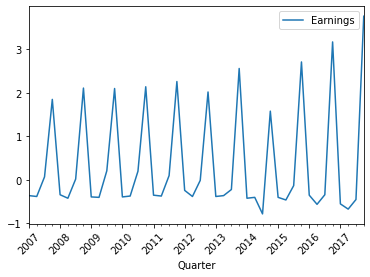

In [19]:
HRB.plot()
plt.xticks(rotation=45)
plt.show()

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


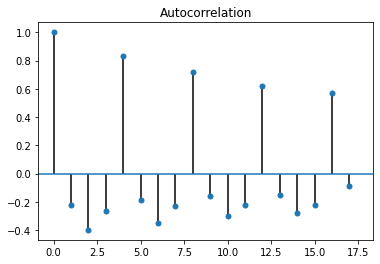

In [20]:
# Importing the ACF module
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Calculating the ACF
acf_array = acf(HRB)
print(acf_array)

# Plotting the ACF
plot_acf(HRB, alpha=1)
plt.show()

Notice the strong positive autocorrelation at lags 4, 8, 12, 16, 20, ..,


### Are We Confident This Stock is Mean Reverting?
Previosuly we saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can we say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns we won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is $1/\sqrt{N}$ where N is the number of observations, so if N=100, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is $\pm 1.96/\sqrt{N}$. This approximation only holds when the true autocorrelations are all zero.

We will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 from the last chapter. The weekly returns of Microsoft is available in a DataFrame called `returns`.

In [21]:
msft = pd.read_csv('data/MSFT.csv', parse_dates=['Date'], index_col='Date')

msft.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


Computing percentage change

In [22]:
returns = msft.pct_change()
returns.head()

,Adj Close
Date,
2012-08-06,NaN
2012-08-07,0.010350
2012-08-08,0.002313
2012-08-09,0.005605
2012-08-10,-0.002623


We'll now recompute the autocorrelation of the MSFT Adj stock price sampled on weekly basis.

In [23]:
# Resampling to weekly data
returns = returns.resample('W-SUN').last()
returns.head()

,Adj Close
Date,
2012-08-12,-0.002623
2012-08-19,0.003899
2012-08-26,0.009914
2012-09-02,0.016491
2012-09-09,-0.012759


The autocorrelation of weekly MSFT returns is -0.08
The approximate confidence interval is +/- 0.12


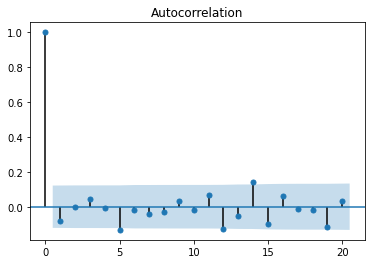

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Comouting autocorrelation
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Computing 95% confidence interval values
n_obs = len(returns)
conf = 1.96/sqrt(n_obs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

Notice that the autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero.

---

## White Noise
[VIDEO](https://videos.datacamp.com/transcoded/4267_intro+_to_time_series_analysis_in_python/v1/hls-4267_ch2_2.master.m3u8)

**White Noise** is a series with (3 conditions)
- Constant mean (with time)
- Constant variance (with time)
- Zero autocorrelation at all lags

### Gaussian White Noise
- A special case of white noise series where the data follows a normal distribution

### Simulating White Noise
- It is very easy to generate white noise
```
import numpy as np
noise = np.random.normal(loc=0, scale=1, size=500) # loc==mean; scale==std dev.
```

### Demonstrating white noise plot

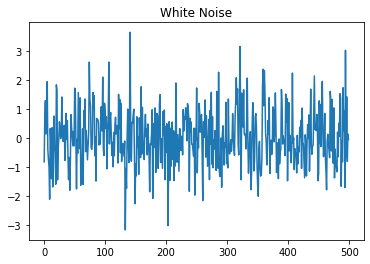

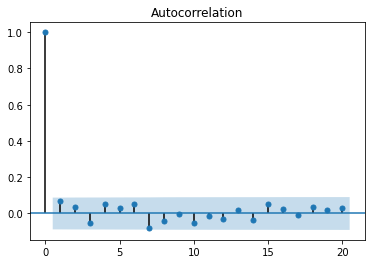

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Generate Gaussian white noise
noise = np.random.normal(loc=0, scale=1, size=500)

# Plotting white noise.
plt.plot(noise)
plt.title('White Noise')

# Plotting the autocorrelation at different lags (Constant for white noise)
plot_acf(noise, lags=20, alpha=0.05)
plt.show()

**NOTE:** 
- We generated a white noise by simply randomly picking numbers that had a constant mean (=0 in our case), and a constant variance (=1 in our case). 
- Calling `numpy.random.normal()` sampled the numbers in such a way that the numbers came from a Gaussian normal distribution. Hence, the Series we got is actually ***Gaussian White Noise***. 
- The autocorrelation of white noise is approx. equal to 0 at all lags

---

### White noise cannot be forecasted
A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

We will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. This time we shall use a different mean and standard deviation. Just like before, we'll use `np.random.normal()` to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

Mean:  0.021787290778503967
Standard Deviation: 0.04806178379991513


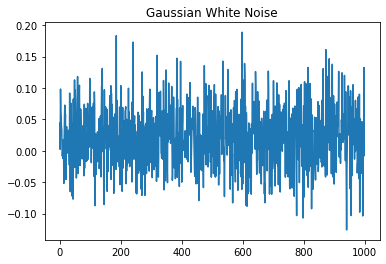

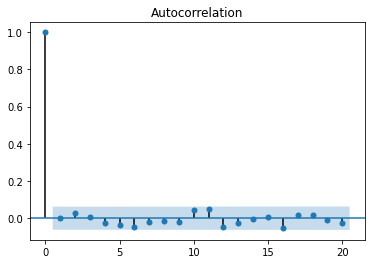

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generating 1000 random normal values with mean 2% (0.02) and standard deviation 5% (0.05)
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)
plt.plot(returns)
plt.title('Gaussian White Noise')

# Confirming that the mean is indeed 0.02 and standard deviation is 0.05
print("Mean: ", np.mean(returns))
print("Standard Deviation:", np.std(returns))

# Plotting the ACF with 20 lags
plot_acf(returns, lags=20)
plt.show()

Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.

---

## Random Walk
[VIDEO](https://videos.datacamp.com/transcoded/4267_intro+_to_time_series_analysis_in_python/v1/hls-4267_ch2_3.master.m3u8)

### What is random walk?
- In a random walk, today's price = yesterday's price + Noise
> $P_t = P_{t-1} + \epsilon_t$  

- The change in random walk is simply **white noise**
> $P_t - P_{t-1} = \epsilon_t$  

  - If the stock prices follow a **random walk**, the stock returns are **white noise**.
- We cannot forecast a random walk. 
- The best forecast for tomorrow's price is simply today's price.

<br/>

**Random Walk Example**  

![Random Walk Example Image](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/Random-Walk-Line-Plot.png)

### Random Walk with drift
- **For a Random Walk without drift**: today's price = yesterday's price + white noise
> $P_t = P_{t-1} + \epsilon_t$  

- Change in price when random walk without drift  
> $P_t - P_{t-1} = \epsilon_t$ 

- **Random Walk with drift**: Prices on average drift by a constant value $\mu$ every period
> $P_t = \mu + P_{t-1} + \epsilon_t$  

- Change in price when random walk **with** drift. It is still white noise, **but with a mean of $\mu$**
> $P_t - P_{t-1} = \mu + \epsilon_t$  

### Statistical test for random walk
- To check whether a series (like stock prices) follows a random walk, we can regress current prices on lag prices.
> $P_t = \alpha + \beta P_{t-1} + \epsilon_t$

#### TEST
- If the slope coefficient $\beta$ is **not** significantly different from 1, then we cannot reject the null hypothesis that the series is a random walk.
- If the slope coefficient $\beta$ is significantly less than 1, then we can reject the null hypothesis that the series is a random walk.

<br/>

##### **Dickey Fuller Test**
- Another way to do this test is to regress on price changes instead of actual price.
> $P_t - P_{t-1} = \alpha + \beta P_{t-1} + \epsilon_t$
- Now, instead of checking whether slope coefficient is 1, we check if the slope coefficient is 0. This is called as **Dickey Fuller Test.**
- If we add more lag prices on the RHS, then it is called as **Augmented Dickey Fuller Test**.
 > $H_0: \beta = 0$ (random walk)  
 $H_1: \beta < 0$ (not random walk)

### ADF (Augmented Dickey Fuller) test in Python
- In **`statsmodels`** 
```Python
from statsmodels.tsa.stattools import adfuller
adfuller(x) # Run Augmented Dickey-Fuller test
```

### Generate a Random Walk
Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

We will now simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. If we rerun the code multiple times, we'll see several realizations.

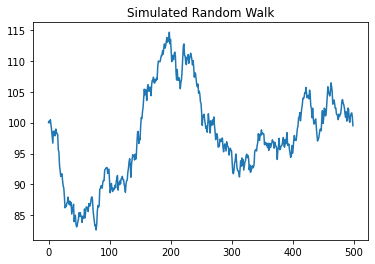

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generating 500 random samples with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
# NOTE: Additive noise
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

The simulated price series we plotted should closely resemble a random walk.

**NOTE:** This random walk does not include any drift component.

---

### Generating a random walk with drift
- Many time series, like stock prices, are random walks but tend to drift up over time.
- In the previous exercise, the noise in the random walk was **additive**: random, normal changes in price were added to the last price. However, when adding noise, we could theoretically get negative prices. Now we will make the noise **multiplicative**: we will add one to the random, normal changes to get a total return, and multiply that by the last price.

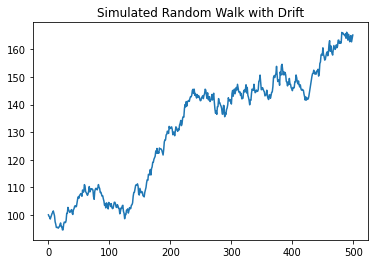

In [28]:
# Generating 500 samples with mean=0.1% and standard deviation of 1%
# Adding 1 to the series as a margin of safety, so that all values are positive
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1
# The added 1 is acting as the drift component

# Set first element to 1
steps[0] = 1

# Simulate stock prices, P with a starting price of 100
# NOTE: Multiplicative noise
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

This simulated price series we plotted should closely resemble a random walk for a high flying stock.

---

## Are Stock Prices a Random Walk?
Most stock prices follow a random walk (perhaps with a drift). We will look at a time series of Amazon stock prices, pre-loaded in the DataFrame `AMZN`, and run the 'Augmented Dickey-Fuller Test' from the `statsmodels` library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [29]:
AMZN = pd.read_csv('data/AMZN.csv', parse_dates=['Date'], index_col='Date')
print(AMZN.shape)
AMZN.head()

(5088, 1)


,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [30]:
from statsmodels.tsa.stattools import adfuller

# Running the ADF test on the price series and printing out results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just printing out the p-value
# results[0] is the test statistic, and results[1] is the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.02516852577074, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


According to this test, as the p-value > 0.05 the results are not statistically significant, and we cannot reject the hypothesis that Amazon prices follow a random walk. Hence, we cannot say that the Amazon stock price follows a random walk.

<br/>

### Stock Returns
The Amazon stock price itself does not follow a random walk, but what about the returns (percentage change in prices)? Do the stock returns follow a random walk?

In [31]:
from statsmodels.tsa.stattools import adfuller

# Computing percent change in stock price
AMZN_returns = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_returns = AMZN_returns.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_returns['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.565589808347808e-22


The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

---


## Stationarity
[VIDEO](https://videos.datacamp.com/transcoded/4267_intro+_to_time_series_analysis_in_python/v1/hls-4267_ch2_4.master.m3u8)

- **Strong Stationarity:** Entire distribution of data is time-invariant
- **Weak stationarity:** Mean, variance, and autocorrelation are time-invariant (that is, they do not depend on time)
  - For autocorrelation, corr($X_t, X_{t-\tau}$) is only a function of $\tau$

### Why do we care about stationarity?
- If a process is non-stationary, it becomes difficult to model
  - If parameters vary with time, then there are too many parameters to estimate
  - We may end having more parameters than actual data!
- Can only estimate a parsimonious model with a few parameters

### Examples of non-stationary series
- Random Walk
  - Variance grows with time. Eg. If the stock prices are a random walk, then the uncertainity about prices tomorrow is much less than the uncrtainity 10 years from now.

  ![Random walk image](https://upload.wikimedia.org/wikipedia/commons/d/da/Random_Walk_example.svg)

- Seasonal Series
  - Mean varies with time of the year

  ![Seasonal Series image](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/Multiplicative-Decomposition-of-Airline-Passenger-Dataset.png)

- Any series with change in mean or standard deviation over time
  ![](https://miro.medium.com/max/2580/1*tkx0_wwQ2JT7pSlTeg4yzg.png)

### Transforming Non-Stationary into a Stationary series
- Many non-stationary series can be transformed into a stationary series using simple transformations
  - A **Random Walk** is non-stationary, but if we take the **first difference**, the new series is simply white noise which is stationary.
  - A series with **Seasonality** is non-stationary. However, by taking a **seasonal difference**, the transformed series will be stationary


- If there is exponential growth in the series, use logarithm to convert it to a linear series.

## Seasonal Adjustment During Tax Season
Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called **seasonal adjustment**. For example, most economic data published by the government is seasonally adjusted.

We saw earlier that by taking first differences of a random walk, we get a stationary white noise process. For seasonal adjustments, instead of taking first differences, we will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame `HRB`, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,… because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [33]:
HRB = pd.read_csv('data/HRB.csv', index_col='Quarter')
print(HRB.shape)
HRB.head()

(44, 1)


,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34


Plotting the ACF for this series

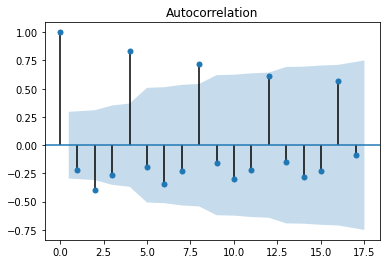

In [34]:
plot_acf(HRB)
plt.show()

Clearly, there is a seasonality of 4.

         Earnings
Quarter          
2007Q1        NaN
2007Q2        NaN
2007Q3        NaN
2007Q4        NaN
2008Q1       0.02
2008Q2      -0.04
2008Q3      -0.05
2008Q4       0.26
2009Q1      -0.05
2009Q2       0.02


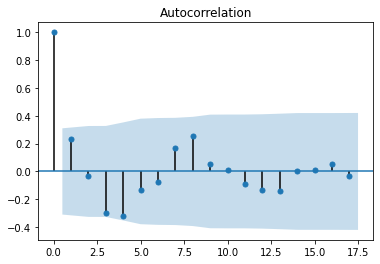

In [35]:
# Creating a new DataFrame of seasonally adjusted earnings by taking the lag-4 difference
HRBsa = HRB.diff(4)

# Inspecting the top 10 rows
print(HRBsa.head(10)) # Notice that the first 4 rows are NaNs because of lag-4 diff

# Dropping the NaNs
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

Notice how the autocorrelation plot after removing seasonality from the series becomes stationary. By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function

---
---

# Part-3: Autoregressive (AR) Models
## Mathematical Description of AR(1) Model
> $R_t = \mu + \phi R_{t-1} + \epsilon_t$


- That is, today's value = mean $\mu$ + fraction $\phi$ of yesterday's value + noise
- Since there is only one lagged value on RHS, this is called as AR model of order 1, or simply an **AR(1) model**
- If $\phi = 1$, then the AR model is a **random walk** (with drift). If $\mu=0$ and $\phi=1$, then it is random walk without drift.
- If $\phi=0$, then it is simply **white noise**
- For the process to be stationary, $-1 < \phi < +1$

<br/> 

## Interpretation of AR(1) parameters
> $R_t = \mu + \phi R_{t-1} + \epsilon_t$

- **Negative $\phi$:** Mean Reversion
  - A positive return last period at time $t-1$, implies that this period's returns are more likely going to be negative
- **Positive $\phi$:** Momentum
  - A positive return last period, implies that this period's return is also likely to be positive

## Higher order AR models
- AR(1)
  > $R_t = \mu + \phi_1 R_{t-1} + \epsilon_t$

- AR(2)
 > $R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \epsilon_t$

- AR(3)
 > $R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \phi_3 R_{t-3} + \epsilon_t$




## Simulating an AR Process
- Can be done using `statsmodels`

```Python
from statsmodels.tsa.arima_process import ArmaProcess

ar = np.array([1, -0.9])
ma = np.array([1])

AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)
```
- `ar = np.array([1, -0.9])` : Here, we must include the zero-lag coefficient.Also the sign of the $\phi$ coefficient is the opposite of hat we have been using. For example, for a AR(1) process with $\phi\ = +0.9$, the second element of the ar-array should be $-0.9$. This is consistent with the time series literature in the field of signal processing.
 

## Simulate AR(1) Time Series
We will simulate and plot a few AR(1) time series, each with a different parameter, ϕ, using the `arima_process` module in `statsmodels`. We will look at an AR(1) model with a large positive ϕ and a large negative ϕ.

There are a few conventions when using the `arima_process` module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, we must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with `ϕ=0.9`, the array representing the AR parameters would be `ar = np.array([1, -0.9])`

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


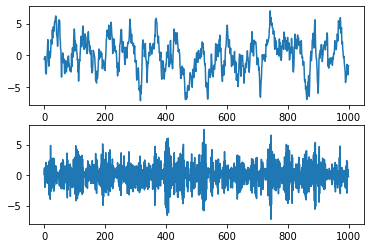

In [1]:
# importing the module
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt

# Plotting the simulated AR processes. Note format is [1, -ϕ]
plt.subplot(2,1,1)

# AR component of ARMA process. Setting phi as 0.9
ar1 = np.array([1, -0.9])

# For now, the MA parameter array, ma1, will contain just the lag-zero coefficient of 1.
ma1 = np.array([1])

# Instantiating ArmaProcess object
AR_object_1 = ArmaProcess(ar1, ma1)

# Generating and plotting sample data
simulated_data_1 = AR_object_1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

## Now plotting another AR model, but this time with lag-1 coefficient of -0.9
plt.subplot(2,1,2)

ar2 = np.array([1, 0.9])
ma2= np.array([1])
AR_object_2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object_2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

The two AR parameters produce very different looking time series plots, but soon we'll really be able to distinguish the time series.

## Compare the ACF for Several AR Time Series
The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, $\phi = +0.9$, the first-lag autocorrelation will be $0.9$, the second-lag will be $(0.9)^2 = 0.81$, the third-lag will be $(0.9)^3=0.729$, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say $-0.9$, the decay will flip signs, so the first-lag autocorrelation will be $-0.9$, the second-lag will be $(−0.9)^2=0.81$, the third-lag will be $(−0.9)^3=−0.729$, etc.

The object `simulated_data_1` is the simulated time series with an AR parameter of $+0.9$, `simulated_data_2` is for an AR parameter of $-0.9$, and `simulated_data_3` is for an AR parameter of $0.3$

In [2]:
simulated_data_1 = np.array([-1.08563060e+00,  2.02779036e-02,  3.01228611e-01, -1.23518896e+00,
       -1.69027032e+00,  1.30193250e-01, -2.30950532e+00, -2.50746742e+00,
       -9.90784415e-01, -1.75844638e+00, -2.26148789e+00, -2.13004807e+00,
       -4.25653637e-01, -1.02199027e+00, -1.36377320e+00, -1.66174716e+00,
        7.10357641e-01,  2.82610797e+00,  3.54755107e+00,  3.57898236e+00,
        3.95845270e+00,  5.05333946e+00,  3.61217164e+00,  4.42678352e+00,
        2.73022450e+00,  1.81945055e+00,  2.54461069e+00,  8.61468922e-01,
        6.35253310e-01, -2.90026917e-01, -5.16643596e-01, -3.26356834e+00,
       -4.70874461e+00, -4.93774739e+00, -3.51651022e+00, -3.33849488e+00,
       -3.00179947e+00, -2.01339681e+00, -2.69159348e+00, -2.13880680e+00,
       -2.73029264e+00, -4.18493287e+00, -4.15733938e+00, -3.16779958e+00,
       -2.51243057e+00, -2.27301801e+00,  3.46649060e-01,  7.24896314e-01,
        1.63114269e+00,  3.70617176e+00,  2.04146926e+00,  7.98534123e-01,
        2.46239294e+00,  1.41809091e+00,  1.30596505e+00,  2.24468451e+00,
        2.91092245e+00,  4.37471639e+00,  5.43288889e+00,  5.95899267e+00,
        4.59038469e+00,  4.92620889e+00,  4.74785999e+00,  2.94680853e+00,
        4.06942673e+00,  4.46972059e+00,  4.06823861e+00,  3.42832269e+00,
        1.88718927e+00,  1.89799442e+00,  2.17663410e+00,  1.12781570e+00,
        2.17723818e+00,  8.62311318e-01, -1.34702016e+00, -1.72591057e-01,
       -5.58697989e-01, -6.28857776e-01, -1.40348872e+00, -2.86910261e+00,
       -1.32695497e+00, -1.88312846e+00, -3.38631261e-02,  7.76831373e-01,
        3.84390089e-01, -7.39951321e-01, -1.39841818e+00, -2.47109949e+00,
       -1.36876181e-01,  4.12526675e-02,  1.18733294e+00, -1.98752400e-01,
        2.15796953e-03,  1.17980411e+00,  7.26812938e-01,  1.68524610e+00,
        4.32153581e-01, -9.74533322e-01, -4.97679377e-01, -8.27087874e-01,
       -1.02324398e-01, -2.06997989e+00, -1.15071726e+00,  1.56265839e+00,
        1.38176657e+00,  1.27773204e+00,  1.32950832e+00, -6.65418222e-01,
       -1.72729760e-01, -1.76086653e+00, -2.01245947e+00, -5.68343976e-01,
       -1.24672653e+00, -6.20804892e-01,  4.54014651e-01,  6.87354042e-01,
       -7.52329832e-01, -1.00957212e+00,  1.05079643e+00, -1.07932898e+00,
       -1.24718209e+00, -1.67457195e+00, -1.38636740e+00, -4.99515039e-01,
        1.15912743e+00,  7.72982298e-01,  1.50802540e+00,  1.85696300e+00,
        2.14561400e+00,  1.36712867e+00,  2.33094333e-01, -8.90258213e-01,
       -1.55766960e+00, -1.08021606e+00, -2.11245065e-01,  1.33348289e-01,
       -4.28941636e-01,  1.41992264e+00,  2.79679600e+00,  2.16311628e+00,
        1.12337325e+00,  1.14125088e+00,  2.29442444e+00,  2.39774697e+00,
        2.71452098e+00,  2.23098876e+00,  2.46416078e+00,  3.76228915e+00,
        3.14639145e+00,  2.97506004e+00,  2.93137051e+00,  2.92195882e+00,
        1.21787406e+00, -7.80782001e-01, -1.72235887e+00, -1.38218069e+00,
       -6.90106455e-01, -1.15177037e+00,  3.40664151e-01,  1.63421761e-01,
        1.67395584e-01, -4.33078454e-02,  9.50497319e-02,  7.90018833e-01,
        1.37667039e+00,  3.40580408e-01,  1.83018614e+00,  5.52141072e-01,
        5.76153979e-01,  2.44142007e-01, -8.29263871e-01, -8.21458072e-01,
       -1.48012604e+00, -1.25920619e+00, -7.30199610e-01,  8.14749720e-01,
        1.04065897e+00,  3.25367729e-01, -9.87888543e-02,  5.10681373e-02,
        1.39422153e-01,  1.58506921e+00,  2.82191522e+00,  2.18078777e+00,
        1.41406686e+00, -1.28439443e+00, -1.70487540e+00, -2.51244556e+00,
       -2.61602547e+00, -1.96283868e+00, -1.58936248e+00, -1.46039424e+00,
       -1.11477270e+00, -1.12941321e+00, -8.19452954e-01, -3.96856267e+00,
       -3.84099989e+00, -3.56775062e+00, -3.55223728e+00, -3.41495981e+00,
       -2.37015371e+00, -2.73124367e+00, -2.57417205e-01,  4.56621446e-01,
        4.04652050e-01,  1.57524542e-01,  5.52498013e-02, -8.65582249e-01,
       -8.74226563e-01, -5.08120390e-01,  1.22233264e-01,  6.89699717e-01,
        3.45852199e-01, -1.10481527e+00, -1.66343637e+00,  1.15100308e-01,
        9.99648590e-01,  1.26930332e+00,  3.81078741e-01,  3.46616022e-01,
       -9.43714266e-01, -1.40127972e+00, -1.50635509e+00, -1.71735951e+00,
       -5.89021627e-01, -1.94884538e+00, -2.61939311e+00, -3.73214177e+00,
       -4.59628081e+00, -4.01259683e+00, -5.21177768e+00, -3.93673113e+00,
       -3.78987380e+00, -3.34209808e+00, -2.68531154e+00, -2.85094690e+00,
       -1.53337250e+00, -1.57437798e+00, -8.22869922e-01, -9.39695313e-01,
       -5.54851394e-01, -2.19703585e-01,  5.22367132e-02, -9.27294808e-01,
       -3.98689556e-01, -6.77777590e-01,  2.04881996e-02, -2.13405406e+00,
       -3.38576488e+00, -2.68374283e+00, -5.52440962e-01,  3.37861881e-01,
       -3.78375241e-01, -2.03259013e+00, -1.08664490e+00, -1.05856363e+00,
       -3.62003049e-01, -2.10504022e-01, -1.59810695e-01,  2.81479582e+00,
        2.52718628e+00,  2.11522244e+00,  1.78225152e+00,  1.02048965e+00,
        1.90857358e+00,  1.36396189e+00,  1.86350841e+00,  1.96176060e+00,
        2.98457040e+00,  3.10629296e+00,  1.58227888e+00,  9.75632059e-02,
        1.49617603e+00,  7.37847625e-01, -6.56539717e-01, -1.26050435e+00,
        1.30171376e-01, -1.30305876e+00, -2.03924809e+00, -2.50213079e+00,
       -3.50310758e+00, -4.33712416e+00, -5.42151972e+00, -5.34055516e+00,
       -5.16140848e+00, -5.32780578e+00, -6.44872305e+00, -4.55051479e+00,
       -5.42454214e+00, -4.60405422e+00, -5.21841539e+00, -4.02825698e+00,
       -2.66959893e+00, -3.28025262e+00, -4.87594309e+00, -3.69256146e+00,
       -1.44750477e+00, -8.87059753e-01, -6.37809356e-01,  2.45732189e-01,
        9.86213816e-01,  5.86036010e-02, -6.06408070e-01,  6.53562872e-02,
       -8.51926890e-02,  1.23993218e+00,  4.11596811e-01,  1.12104705e+00,
        1.35158032e+00,  1.08998473e+00,  2.15689703e+00,  2.62127886e+00,
        1.35418382e+00,  1.85898412e+00,  3.04807634e+00,  2.61282401e+00,
        2.10288576e+00,  1.22295004e+00,  1.08705115e+00,  1.66454672e+00,
        6.80423748e-01, -7.33976187e-01, -1.03632848e+00, -2.31242061e+00,
       -1.55796011e+00, -1.82885387e+00, -3.40137033e+00, -3.40984081e+00,
       -3.26147171e+00, -2.48618893e+00, -2.38293358e+00, -2.75913763e-01,
       -7.67026239e-01, -7.52722163e-01, -7.80360561e-01, -9.84952890e-01,
       -7.44032016e-01, -1.28397517e-01,  1.22454094e+00, -4.67169283e-01,
       -9.30795228e-01, -1.28548713e+00, -2.19088120e-01, -5.53842369e-01,
       -2.39363373e+00, -2.06653989e+00, -1.89357513e+00, -1.52446605e+00,
       -2.41218233e+00, -4.51929415e-01, -7.30596257e-01, -8.45833490e-01,
       -1.66125871e+00, -2.42613484e+00, -3.40625832e+00, -3.45894334e+00,
       -4.07063084e+00, -1.60710042e+00, -3.33488276e+00, -4.12972503e+00,
       -4.11816695e+00, -3.03285898e+00, -3.14332996e+00, -2.15303357e+00,
       -2.92453411e+00, -2.57278956e+00, -5.71469519e-01, -1.48206696e+00,
       -9.14292591e-01, -6.15935812e-01, -2.80587722e+00, -3.11426004e+00,
       -1.67168213e+00, -1.36943625e+00, -2.44476158e+00, -1.50950815e+00,
       -1.83768028e+00, -1.29386153e+00, -7.87555260e-01, -1.82749533e+00,
       -8.54917767e-01, -1.77693479e+00, -2.90502718e+00, -3.49735345e+00,
       -3.49370814e+00, -3.03493417e+00, -3.50402448e+00, -2.40880272e+00,
       -1.91645827e+00, -2.41961065e+00, -1.28865667e+00,  1.27735338e-03,
       -9.75350788e-02, -3.02764616e-01, -2.04625951e+00, -2.24914615e+00,
       -2.31573825e+00, -1.83878501e+00, -1.82333295e+00, -1.39697271e+00,
        2.76814848e-01, -2.80780735e-01, -7.43674944e-01, -1.97847276e+00,
       -1.78928595e+00, -6.33544377e-01, -2.32126029e+00, -2.75499123e+00,
       -2.44355160e+00, -1.34909356e+00, -8.31313963e-01, -4.22718938e-01,
       -6.04759830e-01, -6.24095904e-02,  9.58135252e-01, -8.46670050e-01,
       -3.34676438e-02, -1.28880685e-01, -6.45981481e-01, -3.02445912e+00,
       -4.10236453e+00, -1.99406909e+00, -2.48321071e+00, -3.31965841e+00,
       -3.44411852e+00, -3.84485389e+00, -3.33600987e+00, -1.48543521e+00,
       -1.92350764e+00, -1.57686682e+00, -2.56641728e+00, -7.89609111e-01,
       -5.21604758e-01, -1.55126341e+00, -4.91830845e-01,  7.57339889e-01,
        8.43062263e-01, -8.80640931e-01,  9.92591976e-01,  1.20345530e+00,
        2.25356407e+00,  1.47731445e+00,  9.30959084e-01,  9.48316285e-01,
        1.96688633e+00,  1.91318773e+00,  4.65035144e-01,  6.80520826e-01,
        2.24200294e+00,  2.08360893e+00,  2.00463356e+00,  5.41626459e-01,
       -9.15525274e-01, -1.46166489e+00, -1.64201604e+00, -1.37375370e+00,
       -1.07042136e+00,  6.38528428e-01,  6.33363023e-01,  1.63444941e+00,
        1.43167513e+00,  2.73741123e+00,  5.93272630e-01, -6.47863996e-02,
        9.24725637e-01,  6.60657068e-01,  1.52612097e+00,  1.75857498e+00,
        2.52859447e+00,  2.88880275e+00,  3.27357141e+00,  4.43866965e+00,
        4.98127671e+00,  5.47695574e+00,  4.94967893e+00,  3.87286082e+00,
        2.82601465e+00,  3.29435779e+00,  5.26461443e-01, -8.33362890e-01,
       -1.71328029e+00, -1.78957364e+00, -4.24205431e+00, -2.55912758e+00,
       -1.70303958e+00,  4.51846774e-01,  1.46887657e+00,  2.35236824e+00,
        4.36780745e+00,  3.36006862e+00,  1.52060336e+00,  1.13618562e+00,
        1.97575007e-01, -7.90278548e-02, -1.12134406e+00, -4.41329586e-01,
        1.15786222e-01,  7.72850093e-02,  3.81138012e-01,  2.00973483e-01,
        9.32909803e-01,  9.09259572e-01,  5.52887990e-01,  1.42718366e+00,
        2.54528656e+00,  3.62821173e+00,  2.27511587e+00,  1.51315708e+00,
       -3.39654727e-01, -5.44254272e-01, -7.37050304e-02, -1.99135702e-01,
        1.75162874e+00,  1.17062249e+00, -3.49483175e-02,  5.37050721e-01,
        6.33279477e-01,  1.11959413e+00,  1.31142264e+00,  1.42404614e+00,
       -8.40657357e-01, -1.48270565e+00, -1.92476000e+00, -2.08024834e+00,
       -2.32061514e+00, -1.67573487e+00, -9.07278873e-01, -1.94819191e+00,
       -1.06656831e+00, -3.74143344e-01,  1.29041056e-01, -1.30175754e+00,
       -7.30999483e-01, -5.75304115e-01,  4.43106371e-01,  2.18315253e+00,
        3.55290516e+00,  3.31025882e+00,  2.97735824e+00,  3.31157070e+00,
        1.86537368e+00,  2.28153171e-01, -2.67192738e-01,  9.80095449e-01,
        5.50957606e-01,  1.99844275e+00, -9.89514407e-01, -2.47776939e+00,
       -2.35368119e+00, -1.23011853e+00, -1.17672977e+00, -1.15470954e+00,
       -1.16098008e+00, -2.80777981e+00, -1.36893295e+00, -1.91480438e+00,
       -6.33791282e-01, -6.40935572e-01,  4.91318373e-01,  7.85444516e-01,
        6.00225574e-01,  7.66464664e-01, -7.83159412e-01, -6.98814143e-01,
        1.08710759e+00,  2.28659040e+00,  1.07290778e+00,  1.47130285e+00,
        1.57215245e+00,  2.23212548e+00,  2.10306582e+00,  1.65925525e+00,
        2.82396050e+00,  2.75796102e+00,  3.73762924e+00,  4.33825252e+00,
        3.57994002e+00,  3.05494575e+00,  4.67928361e+00,  4.40283757e+00,
        3.20392539e+00,  1.68348957e+00,  2.48927305e+00,  2.40063947e+00,
        1.36848357e+00,  1.90622004e+00,  1.87534673e+00,  2.73369906e-02,
        6.13288846e-01,  1.88515066e+00,  4.25648583e+00,  3.86573981e+00,
        3.71181549e+00,  4.94723074e+00,  4.62122994e+00,  4.43444881e+00,
        3.36038553e+00,  1.62997187e+00,  2.37966262e+00,  8.68126118e-01,
        1.92196975e+00,  9.41607215e-01,  1.11268045e+00,  6.29140676e-01,
        1.74082685e+00,  1.86759056e+00,  3.63992686e+00,  2.19225649e+00,
        2.38689393e+00,  2.19554641e+00,  2.25593534e+00,  3.62626298e+00,
        3.84895471e+00,  2.31653383e+00,  2.61839127e+00,  1.94093277e+00,
        1.27348452e+00,  2.19199340e+00,  1.37045407e+00,  8.53678338e-01,
        8.00717758e-01,  1.66683188e+00,  2.08173849e+00,  1.63914973e+00,
        1.20305829e+00, -7.73771970e-02, -8.29474566e-01, -1.40090820e+00,
       -1.41010832e+00,  7.17665552e-01, -2.95704374e-02, -3.22442462e-01,
       -2.34259662e+00, -1.50776586e+00, -2.93443807e+00, -3.54758379e+00,
       -2.15049004e+00, -4.04036947e+00, -3.54041211e+00, -2.38544125e+00,
       -6.21452888e-01, -1.47940071e+00, -1.95548549e+00,  4.44993853e-02,
        1.49893022e-02, -7.22773562e-01, -1.36798204e+00, -2.20374016e+00,
       -2.42303835e+00, -1.09251404e+00, -9.54965676e-02, -1.26021721e+00,
       -9.19609418e-01, -1.22980821e+00, -3.24386986e-01, -4.48308014e-01,
       -3.19525311e-02, -1.87362485e-01, -2.35571217e+00, -2.07313851e+00,
       -3.13757160e+00, -2.07668603e+00, -2.54884532e+00, -2.89897345e+00,
       -2.61797893e+00, -1.77838708e+00, -1.77029219e+00,  4.89198022e-02,
        1.69284568e+00,  3.23902971e+00,  2.68080801e+00,  9.30768755e-01,
        2.05777039e+00,  1.43564807e+00,  1.33024957e+00,  1.82554472e+00,
        3.85538469e-02,  1.66381967e+00,  2.37240003e+00,  2.48743161e+00,
        3.12960520e+00,  3.37359722e+00,  3.15306561e+00,  2.52998473e+00,
        1.53784398e+00,  1.67127386e+00,  1.86534954e+00,  2.76201339e+00,
        2.68647206e+00,  1.56462334e+00, -1.68071846e-01, -2.78826823e-01,
       -2.78402518e-01, -3.48653849e-01, -1.84430136e+00, -5.85406085e-01,
        5.45764270e-01, -3.32097321e-01,  5.07094522e-01,  1.40921593e+00,
        1.30674142e+00,  2.27568648e-01,  1.81819332e+00,  2.01729542e+00,
        1.56452842e+00,  2.18092098e+00,  3.58503737e+00,  2.72937348e+00,
        3.14785868e+00,  4.77623298e+00,  3.18204485e+00,  2.31458678e+00,
        1.48527302e+00,  1.17841858e+00,  8.50602986e-01,  1.06633813e+00,
        1.39328794e-01, -4.97267575e-01, -1.46250333e-01,  2.32865599e-02,
        8.95037713e-01,  1.21488897e+00,  1.86524671e+00,  5.35769995e-01,
        9.87766848e-02,  1.93727897e+00,  2.13562912e+00,  2.66945917e+00,
        2.67524799e+00,  2.83305905e+00,  2.31884909e+00,  5.65854340e+00,
        4.69653314e+00,  4.18855860e+00,  1.34486642e+00,  2.31664643e+00,
        1.53272884e+00,  1.31866185e+00,  6.58755115e-01,  4.54196659e-01,
        1.24529894e-01,  6.90351290e-02,  9.33013349e-03, -1.45808191e-01,
       -2.99104599e-01,  1.03932431e+00,  1.81680880e+00,  2.52257024e+00,
        1.53786433e+00,  2.64089873e+00,  3.50845337e+00,  2.60420370e+00,
        3.86763535e+00,  2.79764587e+00,  6.75849447e-01,  1.70979049e+00,
        1.41929266e+00,  2.25428496e+00,  1.27465430e+00, -1.14581143e-01,
        1.12874876e+00, -3.91394679e-01, -1.91328572e+00, -3.64754404e+00,
       -6.07726194e+00, -6.50864013e+00, -8.02718407e+00, -7.26007115e+00,
       -8.77048138e+00, -8.98770666e+00, -5.75687400e+00, -4.83606236e+00,
       -4.29965045e+00, -5.49043739e+00, -5.18699131e+00, -4.62018362e+00,
       -5.76334605e+00, -5.06083077e+00, -3.36351523e+00, -3.37542183e+00,
       -3.23511601e+00, -4.95370083e+00, -5.85756461e+00, -4.21411305e+00,
       -4.45425239e+00, -4.93853879e+00, -5.13726802e+00, -4.68100735e+00,
       -5.37132253e+00, -4.70767377e+00, -5.59691407e+00, -4.26322266e+00,
       -4.89395617e+00, -3.08429223e+00, -2.78589566e+00, -3.35295053e+00,
       -2.10619486e+00, -3.27007226e+00, -3.49013068e+00, -3.14119313e+00,
       -2.94824062e+00, -4.66200203e+00, -5.11644837e+00, -4.43656919e+00,
       -5.31280383e+00, -3.51509415e+00, -2.66840385e+00, -2.91580385e+00,
       -2.84451593e+00, -6.98500215e-01,  3.07338258e-01,  6.56823577e-01,
       -8.24377551e-01,  8.87671522e-01,  1.85130544e+00,  1.51776951e+00,
        8.16294488e-01,  5.46761100e-01, -7.09851691e-01, -1.10965208e+00,
       -2.35526357e-01, -2.01959500e+00, -2.13170987e+00, -1.80478291e+00,
       -1.52073658e+00, -2.54759988e+00, -3.47499278e+00, -2.03832812e+00,
       -3.05902440e+00, -1.74447101e+00, -2.05238922e+00, -7.67353949e-01,
       -1.11169706e+00, -2.16699867e+00, -1.09374395e+00, -1.00176078e+00,
        5.46991886e-01,  1.38449278e+00,  1.01661688e+00,  4.65287586e-01,
        4.42131171e-01,  5.88128071e-01, -3.52433262e-01,  5.24749637e-01,
        7.49111814e-02, -3.55607682e-01, -8.60735251e-01, -5.43644459e-01,
       -1.18133261e+00, -9.28229243e-01,  1.93119675e+00,  1.68446762e+00,
        1.08201612e+00, -6.93874723e-01, -5.74265326e-01, -1.62606974e+00,
       -1.83902088e+00, -1.50351120e+00, -3.08414953e+00, -2.61827182e+00,
       -2.05192947e+00, -3.14383654e+00, -3.22176208e+00, -4.73025223e+00,
       -2.68172607e+00, -2.08299019e+00, -2.05427967e+00, -2.01228753e+00,
       -6.79615173e-01, -7.05819208e-01, -3.04420516e-01,  1.24465110e+00,
        7.74018839e-01, -3.96018370e-01, -1.18091711e+00,  3.65838438e-01,
        4.20682902e-01, -1.23716676e-01,  8.62299371e-01,  1.77402682e+00,
        1.12097637e+00,  3.69418959e-02, -1.53728089e+00, -3.17744173e+00,
       -3.12468401e+00, -3.70541155e+00, -1.47639599e+00, -1.27021863e+00,
       -3.08534631e+00, -1.35808241e+00, -1.06056386e+00, -2.49527990e-01,
        4.57459585e-01,  7.08270194e-01,  1.16078581e+00,  1.28346790e+00,
        4.87352008e-02,  4.10593879e-01,  1.39344000e+00,  1.04403958e+00,
        1.49093784e+00,  1.76143320e+00,  3.40094195e+00,  2.80809745e+00,
        2.23528354e+00,  1.89482345e+00,  1.60295003e+00, -8.29962684e-01,
       -1.38957626e+00, -9.50733565e-01, -8.63916723e-01, -1.57686421e+00,
       -2.08395704e+00, -2.23117446e+00, -2.80962880e+00, -3.04171653e+00,
       -3.27693499e+00, -2.05387065e+00, -8.32092314e-01,  1.84702011e-01,
        5.92933609e-01, -1.74682236e-01,  8.02616438e-01,  4.08104207e-01,
        3.90345995e-01,  1.68953193e+00,  1.60457159e+00,  1.69139846e+00,
        1.09479130e-01,  5.85540511e-01, -4.53020188e-01,  6.04221487e-01,
        3.59200161e-01, -1.91288870e+00, -2.07961993e+00, -2.09969247e+00,
       -1.40424800e+00, -5.93310811e-01, -8.61743974e-01,  2.37298618e-01,
       -2.95348657e+00, -3.37212691e+00, -4.14727849e+00, -4.98673415e+00,
       -3.52835437e+00, -2.34634853e+00, -2.88748370e+00, -1.42067832e+00,
       -1.17714360e+00, -1.48111334e+00, -2.02592480e+00, -2.60160405e+00,
       -1.86866879e+00, -1.03164701e+00, -6.89981094e-01, -2.67120066e+00,
       -2.10772194e+00, -1.33155318e+00, -1.86760347e+00, -1.63759258e+00,
       -3.33771762e+00, -4.23391492e+00, -4.13475878e+00, -4.03103404e+00,
       -3.27625127e+00, -4.13555153e+00, -4.06320244e+00, -4.14666198e+00,
       -3.20398530e+00, -1.46254400e+00,  4.04630715e-01, -1.20427240e+00,
       -1.13185935e+00, -2.13120273e+00, -1.98282741e+00, -1.36162539e+00,
       -1.14397195e+00, -1.07858645e+00,  5.12311366e-01,  1.18206962e+00,
        7.91208198e-01,  7.36298739e-01,  1.53356667e+00,  1.99000051e+00,
        1.36592436e+00, -5.45910921e-01, -1.67597732e+00, -1.36240036e+00,
       -3.01268718e+00, -2.86381296e+00, -3.03100084e+00, -1.72864795e+00,
       -2.87382698e+00, -4.51821326e+00, -4.48603268e+00, -3.40266628e+00,
       -1.99248105e+00, -2.70255996e+00, -1.96204022e+00, -2.87726664e+00])

simulated_data_2 = np.array([-7.48827466e-01,  1.24153945e+00, -3.99234958e-01, -6.40069287e-01,
        1.05096068e+00, -2.81436443e+00,  2.33026908e+00, -3.23149020e+00,
        2.10064184e+00, -3.16665500e+00,  3.40361590e+00, -2.50937984e+00,
        1.56724141e+00, -1.03493496e+00,  1.19271402e+00, -1.20189437e+00,
        3.23987513e+00, -3.75676624e+00,  3.39539470e+00, -3.43824226e+00,
        2.72263802e+00, -2.29096222e+00,  1.76747029e+00, -2.45115002e+00,
        2.33026252e+00, -9.14904622e-01,  1.76618054e+00, -1.38651800e+00,
        5.12469384e-01, -2.74792845e-01,  1.33195658e+00, -7.57166300e-03,
        3.66501556e-01, -6.94208601e-01,  4.22034991e-01,  3.92214435e-01,
        3.33353223e-01, -2.05771751e+00,  2.51056333e+00, -1.54821865e+00,
        5.06205363e-01, -1.22056594e+00,  3.41345251e-01, -9.87473528e-01,
       -5.28023412e-01,  7.88313000e-01, -1.49520110e+00,  1.27529715e+00,
       -1.64533622e+00,  1.73598012e+00, -2.57299914e+00,  2.56096460e+00,
       -1.91508713e+00,  2.55117300e+00, -3.28286611e-01, -1.79664382e+00,
        1.93729377e+00, -2.45272724e+00,  2.82395840e-01,  5.87474367e-01,
        8.03472954e-01, -1.11475337e+00,  1.21419433e+00, -1.15685164e+00,
        1.47536414e+00, -4.47291977e-01,  7.47500115e-01, -3.26980174e-01,
        1.55401870e+00, -1.56327905e+00,  2.33001572e+00, -2.91901457e+00,
        4.23419806e+00, -3.07295286e+00,  2.36189804e+00, -4.24025638e+00,
        3.81592003e+00, -4.61613743e+00,  4.45415829e+00, -2.55757364e+00,
        2.46187607e+00, -2.39370108e+00,  2.49653637e+00, -1.96123254e+00,
       -5.97754822e-01,  7.78916204e-01, -8.07472276e-02, -1.86669129e-01,
        1.14656129e+00, -1.15957974e+00,  1.81062053e+00,  6.43546632e-01,
       -6.75583097e-01, -1.33410738e+00,  8.64104916e-01, -2.50358443e+00,
        2.86446381e+00, -1.26866646e+00,  1.83767947e+00, -1.33360331e+00,
        5.55317525e-01,  1.07586397e+00, -2.15001364e-01,  4.77970785e-01,
       -2.25313387e-01,  3.14409407e-01,  1.69247958e-01, -7.65650341e-01,
        2.21433524e+00, -1.84056196e+00,  2.25656022e+00, -2.46447147e+00,
        2.59294286e+00, -4.61540100e+00,  3.03556202e+00, -2.76341897e+00,
        1.16460397e+00,  1.39127049e+00, -2.92022476e+00,  2.97410303e+00,
       -1.02091958e+00,  1.40011468e+00, -1.57033076e+00,  8.61153603e-01,
       -1.01782754e-01, -7.08666202e-01,  5.18313472e-01,  2.24716481e-01,
       -5.10123859e-01,  5.46621483e-01, -7.96045628e-01, -2.53356539e-01,
        1.41717137e+00,  1.17612008e-01, -4.22550761e-01,  1.14719526e-01,
       -2.81146913e-01,  7.91835495e-01, -1.61795221e+00,  1.36763168e+00,
       -9.67909461e-01,  1.51316066e+00, -4.14268187e+00,  4.13181689e+00,
       -3.37278844e+00,  4.04323784e+00, -4.16517807e+00,  3.23030706e+00,
       -1.70475976e+00, -2.88729193e-02,  1.65507592e+00,  1.06632613e+00,
       -4.82241834e-01,  1.24811612e+00, -2.61288622e+00,  1.65703781e+00,
       -4.33471482e-01,  7.51939681e-01, -8.58173176e-01,  1.00522499e+00,
       -3.97726007e-01,  6.48577055e-02, -8.73178799e-02,  4.22787172e-02,
       -1.09032983e+00,  1.30489147e+00,  6.29183590e-01,  1.16569690e+00,
       -2.52552651e+00,  2.84360507e+00, -1.88374079e+00,  1.28485624e+00,
       -2.12057066e+00,  5.87699275e-01, -9.73633127e-01,  1.22627895e+00,
       -1.26170923e+00,  5.24605220e-01, -1.72130133e+00,  1.89988745e+00,
       -6.43356262e-01, -3.47901336e-01,  7.61540166e-01, -2.56486139e+00,
        1.65090915e+00, -7.56214111e-01, -4.37174509e-01, -2.10979667e-01,
        1.60784853e+00, -2.17990766e+00,  1.10797207e+00, -4.21326502e-01,
        2.33392741e+00, -2.34020462e+00,  2.87492002e+00, -1.24165884e+00,
        1.44304512e+00, -1.56865851e+00,  5.35465917e-01, -1.90713029e+00,
        2.82811900e+00, -2.36434996e+00,  3.46071590e+00, -2.12571900e+00,
        1.29617658e+00, -2.35344562e+00,  2.53077064e+00, -2.91020046e+00,
        2.99586956e+00, -3.42743454e+00,  2.22346583e+00, -2.14211006e+00,
        2.86199967e+00, -2.26925981e+00,  3.22070898e+00, -4.13219978e+00,
        2.66190266e+00, -2.48487610e+00,  4.40208987e+00, -3.28759477e+00,
        1.89222255e+00, -1.77914075e+00,  1.82194146e+00, -2.20843306e+00,
        2.60086475e+00, -2.49722441e+00,  1.94817125e+00, -4.93097339e-01,
       -1.26587330e+00,  1.77480625e-01, -9.77041544e-01,  3.16563197e-02,
       -7.57243733e-01,  1.16999532e+00,  4.35370425e-02,  8.76857922e-01,
       -1.80873426e+00,  1.52044293e+00, -9.16133426e-01,  1.06452304e+00,
        3.47676668e-01, -9.88243236e-01,  1.04573833e+00, -1.33439522e+00,
        1.45203071e+00, -2.38572455e+00,  1.21821438e+00, -1.82650380e+00,
        1.08018411e+00,  5.75757568e-01,  6.57220103e-01, -8.04147764e-01,
        8.96666282e-01, -2.40143567e+00,  1.98199976e+00, -1.62418507e+00,
        2.60745078e+00, -2.01990098e+00,  2.25080094e+00, -1.72795796e+00,
        1.82416335e+00, -3.03850619e+00,  2.31789790e+00, -6.51221314e-01,
        1.40999563e+00, -7.74761564e-01,  7.64000717e-01, -2.81592493e-02,
       -9.19546085e-01, -7.52468086e-01,  2.95134725e-01,  2.72301805e-01,
       -1.37241742e-01,  1.13747625e+00, -6.72278106e-01,  6.49892491e-01,
        7.42581712e-01,  4.64052238e-01, -5.15738315e-01, -6.38885377e-01,
       -3.32364653e-01,  1.37677049e-01, -4.90720728e-01,  2.09941099e+00,
       -3.56960404e+00,  3.14838585e+00, -3.89977375e+00,  3.62659824e+00,
       -2.88167358e+00,  2.18860925e+00, -1.43926691e+00,  1.09671328e+00,
       -1.16643757e+00,  6.31905084e-01,  8.21097132e-02,  6.46027218e-02,
        1.51509718e+00, -9.35625853e-02,  6.37980934e-01, -2.73362449e+00,
        9.75933726e-01,  1.07910219e-01, -5.72757757e-01,  7.50325739e-01,
       -1.30576856e+00,  1.69307834e+00, -5.65780561e-01, -7.00425235e-01,
       -1.83188714e-01, -1.49885857e+00,  1.58238003e+00, -3.08942244e+00,
        2.41439850e+00, -1.65334751e+00,  3.54610569e+00, -2.82307678e+00,
        3.79365384e+00, -3.15512962e+00,  3.14886006e+00, -3.04489696e+00,
        2.35713713e+00, -9.47045263e-01,  1.22701509e+00, -7.68017236e-01,
        8.30402518e-02, -4.19777958e-01,  2.44529065e+00, -2.26826341e+00,
        3.36760513e+00, -3.55109633e+00,  3.99753087e+00, -3.30798218e+00,
        2.57347086e+00, -1.66756087e+00, -4.26391228e-02,  6.12996639e-01,
        2.35206246e-01,  6.13875663e-02,  1.25567489e+00, -1.19820785e+00,
        9.29247883e-01, -4.81283565e-01,  1.30086146e+00, -6.00934801e-01,
        3.14228246e-01, -1.27803327e+00,  1.81370920e+00, -2.42190955e+00,
        1.36144323e+00, -1.87994208e+00,  1.74965668e+00, -2.37098748e+00,
        9.98200692e-01, -1.55722257e+00,  1.21816850e+00, -6.42067182e-01,
        6.45127374e-01, -1.66107673e+00,  1.72363119e+00, -1.22851255e+00,
        6.50698105e-01, -1.38187435e+00,  4.47056764e-01, -9.34163404e-01,
        3.05498910e+00, -3.63856260e+00,  3.54070551e+00, -3.90073755e+00,
        3.00468068e+00, -3.41034905e+00,  3.87051653e+00, -3.10435705e+00,
        2.66457754e+00, -1.89518484e+00,  2.44913205e+00, -3.05493390e+00,
        3.29669292e+00, -3.68465531e+00,  4.15412501e+00, -2.99851403e+00,
        3.10236568e+00, -3.00205545e+00,  2.17574064e+00, -2.22179528e+00,
        2.76877051e+00, -3.17422451e+00,  2.90647330e+00, -4.36345514e+00,
        4.18748428e+00, -4.80426427e+00,  3.00570111e+00, -2.18641612e+00,
        2.17811204e+00, -2.40367832e+00,  1.86121481e+00,  5.95940434e-01,
       -7.30490684e-01,  4.56225587e-01,  2.41702251e-01, -1.30319688e-01,
        1.10471617e+00, -7.16795750e-01,  1.40620532e+00, -8.22254373e-01,
        1.38533270e+00, -1.28945240e+00,  1.38303494e+00, -1.51576694e+00,
        1.96835975e+00, -3.11756246e+00,  3.53194250e+00, -2.18072290e+00,
        2.70441239e+00, -2.53806887e+00,  2.78949120e+00, -3.28712074e+00,
        3.79551088e+00, -4.51517509e+00,  4.65738870e+00, -3.65899243e+00,
        3.69982103e+00, -3.77692257e+00,  4.15939654e+00, -5.58072175e+00,
        5.79987139e+00, -5.02844634e+00,  5.57656038e+00, -4.81885536e+00,
        6.17515997e+00, -6.49946330e+00,  6.45892429e+00, -6.69903635e+00,
        5.90274654e+00, -4.57009930e+00,  4.73851969e+00, -2.18512904e+00,
        1.61520940e+00, -1.67687120e-01, -1.03381779e-01, -6.07856487e-01,
       -1.07588272e+00,  1.13096508e+00, -1.53917417e+00,  2.23277413e+00,
       -2.53789747e+00,  1.80750616e+00, -1.27210027e+00,  2.86610604e+00,
       -3.66814532e+00,  4.31894359e+00, -3.01294393e+00,  2.49070357e+00,
       -1.56621693e+00,  1.12531881e+00,  1.35860153e+00, -1.33483667e+00,
        1.28176709e+00, -1.47938199e+00, -3.62010254e-01,  6.26558490e-02,
        1.75646707e-01,  1.34284058e+00, -7.16599399e-01,  4.55557271e-01,
       -3.50058351e-01,  6.42392882e-01, -9.57119653e-01,  1.54364470e+00,
        2.35807924e-01, -5.75375870e-01,  1.72536855e+00, -6.76505390e-01,
        1.14609971e+00, -9.19564122e-01,  1.16539158e+00, -1.26624560e+00,
        2.97648954e+00, -3.39724374e+00,  4.19246406e+00, -2.22349594e+00,
        1.67801201e+00, -3.44363849e-01,  4.53908810e-01, -3.46158140e-01,
        2.36978633e-01, -1.82701187e+00,  2.19223464e+00, -5.29459413e-01,
       -2.28206951e-01,  1.05272491e+00, -1.03265781e+00, -1.63297242e-01,
        1.14485748e+00,  6.55665096e-01, -1.38435095e+00,  1.46171755e+00,
       -2.75528150e+00,  2.43774603e+00, -1.70790503e+00,  3.29002413e+00,
       -1.40344800e+00,  2.90560154e+00, -3.14213333e+00,  2.58275493e+00,
       -3.98878486e+00,  2.87475087e+00, -4.03910498e+00,  4.00073138e+00,
       -4.29764825e+00,  2.76646115e+00, -2.84522947e+00,  1.37582957e+00,
       -9.29229792e-01,  1.12075431e+00, -1.32439147e+00,  4.61276840e-01,
       -1.75459053e+00,  2.13448808e+00, -1.69231853e+00,  1.98740215e+00,
       -2.09509731e+00,  1.66766407e+00, -5.88985185e-02, -5.47576199e-01,
        1.80174556e-01,  5.81734982e-01, -2.20650187e-01, -1.84803704e+00,
       -2.46533954e-02, -6.38643211e-01,  1.48507855e+00, -6.64897621e-01,
        1.11793122e+00, -3.78394001e-01, -6.28390153e-01,  1.16659823e+00,
       -1.97122210e+00,  2.72139910e+00, -2.95982432e+00,  2.94546797e+00,
       -4.52541957e+00,  2.72398870e+00, -1.36091240e+00,  1.91656503e+00,
       -2.94284530e+00,  3.93415249e+00, -4.63152167e+00,  4.18833061e+00,
       -4.24959817e+00,  2.90122315e+00, -1.44316028e+00,  2.98382575e+00,
       -2.50716895e+00,  3.78245098e+00, -3.68542093e+00,  3.42518744e+00,
       -2.95117944e+00,  1.49935260e+00, -8.49960451e-01,  1.47465755e+00,
       -1.50066543e+00, -3.41152285e-01,  6.74742550e-01, -2.12228181e+00,
        1.09878379e+00, -8.57484123e-01,  2.07324642e-03,  2.51810729e-01,
       -4.52839911e-01, -1.22294059e+00,  1.26861809e+00, -5.55176603e-01,
        1.51205919e+00, -1.72742134e+00,  1.49319553e+00, -2.83898465e+00,
        4.51997559e+00, -2.56296984e+00,  2.27483884e+00, -2.17219673e+00,
       -9.75245791e-01,  1.91298377e+00, -1.15882422e+00,  1.85575367e+00,
       -2.07542645e+00,  1.39845498e+00, -2.49402813e+00,  3.02263505e+00,
       -1.46821766e+00,  2.44527877e+00, -2.01349332e+00,  1.48549229e+00,
       -2.38891348e+00,  1.44827161e+00, -8.35893979e-01,  4.67751206e-01,
        1.22042810e+00,  5.39707411e-02, -6.50382799e-01, -6.30317545e-01,
        1.88674479e-02,  1.04840224e+00, -1.46748443e+00,  1.86672397e+00,
       -2.24593169e+00,  2.36450268e+00, -1.59991044e+00,  2.42575264e+00,
       -7.49937246e-01,  1.98517246e+00, -2.31682672e+00,  1.93812531e+00,
       -2.91783788e+00,  2.39036880e+00, -2.12701478e+00,  1.51035336e+00,
       -1.86290260e+00,  2.70869251e+00, -1.53034032e+00,  1.77642833e+00,
       -2.87629610e+00,  2.78959739e+00, -2.89486922e+00,  3.92110976e+00,
       -5.33128953e+00,  4.23933689e+00, -4.40205351e+00,  3.49527413e+00,
       -2.18816796e+00, -3.83007244e-01,  1.36654343e-01,  7.27731765e-01,
        3.25158917e-01, -8.41720886e-01,  7.77706480e-02,  2.76219990e-01,
       -9.75613010e-02,  1.57208286e-01, -3.94286565e+00,  2.42140688e+00,
       -3.04248926e+00,  3.38125019e+00, -4.48388488e+00,  2.98886883e+00,
       -2.84436595e+00,  1.27233418e+00, -5.02246858e-01,  6.06184926e-02,
        1.77834929e+00, -2.23023308e+00,  1.43092657e+00, -4.83395620e-01,
       -2.20280868e-01,  1.70982110e+00, -1.05592405e+00,  6.46451705e-01,
       -7.42604532e-01,  3.51905182e+00, -2.67849228e+00,  2.56112006e+00,
       -2.43758481e+00,  3.23098836e+00, -4.42621584e+00,  3.80240623e+00,
       -6.25582307e+00,  5.09683313e+00, -3.73922301e+00,  4.74753155e+00,
       -3.66680815e+00,  3.94009593e+00, -5.26198783e+00,  4.05741523e+00,
       -2.17726869e+00,  1.43568181e+00, -1.42809603e+00,  4.79724444e-01,
       -1.36550349e+00,  7.58683910e-01, -1.34387149e+00,  2.16698613e+00,
       -1.73491792e+00,  2.58030996e+00, -3.70951646e+00,  4.56401797e+00,
       -4.08615994e+00,  5.51689233e+00, -5.01797924e+00,  3.02277950e+00,
       -1.43628092e+00,  1.15616459e+00, -3.19266321e+00,  3.01859157e+00,
       -2.48550429e+00,  3.31306660e+00, -6.56925377e+00,  7.06119787e+00,
       -6.82967484e+00,  8.07295526e+00, -8.98394074e+00,  8.63088557e+00,
       -7.35607818e+00,  6.19835563e+00, -6.35232597e+00,  5.34334835e+00,
       -5.15573380e+00,  3.38672242e+00, -2.05505801e+00,  7.57351858e-01,
        3.41574305e-01, -2.09635144e+00,  1.70952652e+00, -1.70088040e+00,
        1.51499799e+00, -4.07202307e-01,  1.64134857e-01, -6.05650781e-01,
        3.45758118e-01,  6.69824549e-01, -1.80844904e+00,  6.06935638e-01,
       -2.50294033e+00,  4.27989499e+00, -5.01165022e+00,  2.62505354e+00,
       -3.17144733e+00,  2.24184735e+00, -5.52206610e-01,  3.20867231e-02,
        2.62891230e-01, -2.02738191e+00,  2.03262721e+00, -3.47816074e+00,
        2.81674961e+00, -3.29494563e+00,  3.02372257e+00, -2.08694160e+00,
        5.42351493e-01, -1.62453477e+00,  1.65567030e+00, -8.02817560e-01,
        2.13991100e+00, -2.39781163e+00,  6.66551791e-01, -4.13270893e-01,
       -4.22699914e-01, -5.43990275e-01,  1.89776832e+00, -1.08927468e+00,
        2.52269347e-01, -2.45753948e-01,  1.35501565e-01,  4.31442095e-02,
       -4.44769402e-01, -1.49977007e+00,  3.73442884e-01, -8.68095181e-01,
        8.09397429e-01, -1.81075205e+00,  1.81596178e+00, -2.01563706e+00,
        1.05459826e+00, -2.21941455e+00,  2.44396452e+00, -1.77532468e+00,
        2.39801309e+00, -1.60892356e+00,  2.07216566e+00, -1.48287047e+00,
       -4.23826255e-01,  1.02324750e-01, -1.52447474e+00,  2.74123934e+00,
       -2.48112913e+00,  3.50277206e+00, -4.18281715e+00,  3.67266622e+00,
       -3.04202535e+00,  2.40692067e+00, -1.97843920e+00,  3.26275874e+00,
       -3.96839629e+00,  9.33634169e-01,  7.60353387e-01, -1.47598028e+00,
        2.45088195e+00, -1.55388046e+00,  1.18180561e+00, -6.83280262e-01,
       -5.25582028e-01,  5.58920980e-01,  9.10113229e-02, -8.56242917e-01,
        3.90327528e-01, -3.87012556e-02,  1.35810484e+00, -1.22544920e+00,
        6.72244431e-01, -7.51435763e-01,  1.83646813e+00, -2.29433366e+00,
        1.76466789e+00, -2.22046188e+00,  1.79409916e+00, -1.40099364e+00,
        2.29477248e+00, -4.18987052e+00,  4.32637238e+00, -4.78532502e+00,
        4.89986253e+00, -3.17024128e+00,  3.84881217e+00, -3.30597217e+00,
        3.80987389e+00, -4.37227044e+00,  3.86721331e+00, -1.96102088e+00,
        9.75663261e-01, -6.80827770e-01,  2.43569621e-01, -4.14321129e-01,
        7.78960211e-01, -9.70583095e-01,  8.70115639e-01, -1.28768734e+00,
       -6.66109715e-01,  7.92592871e-01, -2.73863548e-01,  1.62865066e+00,
       -1.59765105e+00,  4.31774177e-02, -7.92867870e-01,  1.25397343e+00,
       -1.21310560e+00,  1.37108592e+00, -1.58705747e+00,  3.29816063e+00,
       -1.24035656e+00,  1.84725278e-01,  7.42778243e-01, -3.64438029e-01,
        3.41553751e-01, -1.16708637e+00,  2.67190836e+00, -1.23945918e+00,
       -3.41586786e-01,  1.69091942e+00, -1.56020574e+00,  8.06394596e-01,
       -1.70233290e+00,  2.47691992e+00, -1.82933241e+00,  7.72252848e-01,
       -1.50612535e+00,  9.67989713e-01, -1.38369679e+00,  1.77310742e+00,
       -1.21705969e+00,  4.59703814e-01, -2.07124286e+00,  5.30119305e-01,
        3.92948135e-01, -1.34846379e+00,  1.32475261e+00, -2.95543489e+00,
        3.05695123e+00, -8.31729705e-01, -5.79510497e-01,  1.07125672e+00,
       -6.91669112e-01,  1.54038615e+00, -1.51758785e+00,  1.63865401e+00,
       -1.29281448e+00,  1.73637585e+00, -2.40185097e+00,  2.35411463e+00,
       -1.30837757e+00,  2.34553041e+00, -1.61524845e+00,  3.21767072e-01,
       -1.84316854e+00,  2.06747725e+00, -2.87237328e+00,  3.42947055e+00,
       -3.37430786e+00,  4.04849302e+00, -1.51782709e+00,  1.30372171e+00,
       -1.28934992e+00,  2.17390788e+00, -8.92612065e-01,  2.50495903e+00,
       -2.05789350e+00,  1.21923720e+00, -1.08959982e+00,  3.57010644e-01,
       -8.14998762e-02, -7.94889799e-01,  1.61740728e+00, -7.58176394e-01,
        8.21392058e-01, -7.13676306e-01,  4.45865757e-01,  9.10976022e-01,
        3.67539063e-01, -1.85068302e-01, -6.90088406e-01, -5.55768754e-01,
        7.87812592e-01, -1.34709327e+00,  1.68831782e+00, -1.90618157e+00,
        2.48931777e+00, -2.03297075e+00,  2.82772674e+00, -4.77885932e+00,
        4.07392314e+00, -1.44974269e+00, -1.19839259e+00,  1.92120555e+00,
       -1.31108125e+00,  2.46567418e+00, -2.39269856e+00,  3.34378314e+00,
       -1.79249902e+00,  1.81002921e+00, -2.79303817e+00,  3.42673889e+00,
       -4.05750199e+00,  3.51437522e+00, -2.21602946e+00,  3.08649422e+00,
       -3.12580377e+00,  3.44020633e+00, -4.63872231e+00,  3.70246918e+00,
       -1.86330336e+00,  3.02036108e+00, -2.04911113e+00,  1.70236553e+00,
       -6.84868663e-01,  5.93153604e-01, -3.65609636e-01,  4.17431581e-01,
       -1.15120873e+00,  1.76201267e+00, -2.65575866e+00,  3.16602765e+00,
       -3.81002736e+00,  2.70694890e+00, -5.27710137e+00,  4.59330778e+00,
       -3.94478803e+00,  4.37738173e+00, -2.62876755e+00,  8.75677367e-01,
        1.96717857e-01, -6.41080325e-01,  5.04912194e-01, -5.59689330e-01,
        5.42057264e-02, -9.38696211e-01,  1.12404330e+00, -2.00493930e-01,
       -1.07932718e+00,  9.51935702e-01, -1.48575439e+00,  2.43310073e+00,
       -1.69621111e+00,  3.03529511e+00, -4.28053060e+00,  4.88667414e+00,
       -4.23534132e+00,  3.08663373e+00, -2.28876687e+00,  3.62592345e+00,
       -1.65871698e+00,  2.31506349e+00, -3.07516183e+00,  3.07750910e+00,
       -2.42733561e+00,  3.42661867e+00, -3.24883198e+00,  2.93952057e+00,
       -3.29907721e+00,  3.63725681e+00, -3.48894161e+00,  3.32602604e+00,
       -3.46297345e+00,  3.16391572e+00, -3.92793715e+00,  3.69603260e+00,
       -3.92900457e+00,  4.23543267e+00, -1.96443598e+00,  2.61369362e+00,
       -3.47224678e+00,  2.76572538e+00, -4.09884793e+00,  3.70253320e+00])

simulated_data_3 = np.array([-1.77422355e+00, -1.73364437e+00,  5.76163479e-01,  1.03388590e+00,
       -1.21020135e+00, -8.10500570e-01,  2.20337084e-01,  4.58594383e-01,
       -1.48958888e+00, -1.86866983e-01, -6.63912726e-01,  9.99494087e-01,
        9.96684535e-02,  3.89188006e-01,  7.63579446e-03,  6.68735199e-01,
       -5.67448861e-01,  4.98018636e-01,  1.35836841e+00,  2.24307117e+00,
        2.25671096e+00,  1.40891455e-01,  6.19417160e-01,  9.93322386e-01,
        8.88041571e-01,  1.01989094e+00,  7.29910895e-01, -3.26282139e-01,
        1.09225912e-01,  8.79554475e-01,  7.25471736e-01, -8.78711984e-01,
       -1.14123187e+00, -7.51611178e-01, -4.30296855e-01,  2.81841719e-02,
       -9.68639252e-01,  5.04364059e-01, -1.70625511e+00,  1.68251543e-02,
        5.11580974e-01,  7.97572946e-01, -2.82771575e+00, -2.19759021e+00,
       -1.01197308e+00, -1.35309886e-01, -1.21984368e-01, -8.50341910e-01,
        1.02794141e+00,  6.32411924e-01, -2.05031342e-01, -1.04908093e+00,
       -2.46510990e-01,  1.18474714e+00,  3.90603971e-01,  8.51337580e-02,
        9.18225220e-02,  1.48162624e-01, -1.88737787e-01, -1.02947634e+00,
        1.22017141e+00,  1.00354402e+00,  2.41819660e+00,  1.22301492e+00,
        1.35612533e-01, -9.05152921e-01, -6.01541648e-01, -1.33340545e+00,
        1.69781904e+00,  4.92314003e-01,  9.33750809e-01,  1.24209390e+00,
        1.45354330e+00,  2.98393277e+00,  7.99767936e-01,  5.80683165e-02,
        1.81900787e-01,  8.03111765e-01,  4.19810639e-01, -1.42908076e-01,
       -7.58809818e-01, -1.00199243e+00, -3.11250455e-02, -1.00821576e+00,
       -2.11649733e+00, -5.19709669e-01,  1.00671702e+00,  9.63826056e-01,
        2.71259976e-01,  4.84379825e-01, -1.50180176e+00, -1.14018069e+00,
        1.33601450e+00,  1.58492310e+00, -2.36095742e-01,  1.68348354e+00,
       -2.12845831e-01, -8.87045788e-01,  1.26980383e+00,  1.68868120e+00,
       -8.19551417e-02, -7.36753671e-02, -3.63802592e-01,  3.94997778e-01,
        1.68589125e+00,  1.03792192e+00,  1.97472164e-01, -1.28705836e+00,
        3.91845624e-01, -1.10539346e+00, -5.18751107e-01,  8.02610312e-01,
        1.05200855e+00,  1.15431584e+00,  1.04521599e+00,  4.59424258e-01,
        4.39981902e-01,  2.24064835e-01,  5.49796883e-01,  7.00175506e-01,
        3.43381144e-01,  6.16828466e-01, -4.99772489e-01, -4.56888424e-01,
        9.34320337e-02,  1.95154259e+00,  1.11445362e+00,  1.99600140e-01,
       -1.60343820e-01,  6.96062363e-01,  1.11557389e-01,  6.70848202e-01,
        7.12858517e-01, -1.03222041e+00,  1.63118899e-01,  5.14559484e-01,
        9.51035713e-01, -5.51772674e-01,  9.28578298e-01,  1.11775998e-01,
        2.02180713e+00,  2.35897509e+00,  9.96323366e-02, -1.33932889e+00,
        2.95443776e-01, -7.31335901e-01,  9.28106753e-01,  8.08293903e-01,
       -1.21112082e+00,  4.18727998e-01,  2.62869318e-01,  4.90972419e-01,
        1.67133833e+00,  3.71479336e-01,  8.69465532e-01, -3.37549011e-01,
       -6.75069631e-01, -4.20668403e-01, -7.46581923e-01,  3.43886921e-01,
       -1.22027019e+00,  4.63466087e-01, -6.22488761e-01,  1.90957936e-01,
       -1.13014588e+00,  1.38688610e-01,  1.12561408e+00,  3.47455397e-01,
        1.65291886e+00,  3.55968305e-01,  5.18158243e-01, -7.70019500e-01,
        2.07425053e-01, -5.05911777e-01, -8.72164847e-01,  1.31845415e+00,
       -8.74684609e-01, -3.77173840e-01,  5.99638112e-01,  4.13962340e-01,
       -1.72313829e+00,  8.69677824e-02, -1.35290862e+00, -8.49124536e-01,
       -4.98980013e-01, -3.06972332e+00, -1.02681756e+00,  3.57832129e-01,
       -6.27347875e-02,  1.66109377e-01,  2.31161967e+00,  1.81892613e+00,
        6.05063658e-01,  2.76852793e+00,  1.94187353e-01,  5.77933314e-01,
       -1.40324391e+00, -2.26451676e-02, -1.18203860e-01,  2.53321089e-02,
        3.78081028e-01,  3.93428223e-01, -9.54598775e-01, -6.69724769e-01,
       -1.94856717e-01, -1.48763263e+00,  3.56279663e-01,  1.98976621e+00,
        9.00473397e-01, -2.57571146e-01, -2.37919580e+00, -2.23466700e+00,
       -3.31171235e-01,  1.16308517e+00,  1.28841181e-01, -1.44858891e+00,
       -1.30560192e+00, -9.63909323e-01, -2.22172016e+00, -9.77082284e-01,
        5.99262073e-01, -1.50200329e+00, -1.01024104e+00, -2.32737659e+00,
       -1.51736232e+00, -6.03252725e-01,  8.40230395e-01,  7.07777752e-01,
       -9.71114376e-01, -1.97353003e-01, -3.93139312e-01, -1.30811922e-01,
       -2.38738404e-01,  2.41750546e-01,  2.53637801e-01,  9.42524822e-01,
        3.99349333e-01,  1.80973551e+00,  1.06214684e+00,  1.79695439e+00,
        1.25933634e+00, -2.94984835e-01,  1.15442245e+00,  1.53050386e+00,
       -2.41290745e+00, -1.27231758e+00,  1.06106383e+00,  1.37270719e+00,
       -1.04860535e+00,  5.44180210e-01,  1.89048896e+00,  1.17384511e+00,
       -1.12370264e+00, -1.12092613e+00,  6.42265370e-02, -1.96267002e-01,
        1.21878258e+00,  1.09688351e+00,  2.29224273e+00,  1.70828973e+00,
        1.06502427e+00,  5.17296113e-03,  1.40601365e+00,  4.27302439e-01,
       -8.97709337e-01, -2.21141977e-01, -1.58198172e-01, -1.04099964e+00,
        5.15538587e-01,  1.42333454e-02,  3.99858626e-01, -6.60951018e-01,
       -3.62956501e-01,  6.65439212e-01, -4.71965383e-02, -3.79500531e-01,
        2.07046354e+00,  9.37333988e-01,  1.01450672e+00,  1.05058995e+00,
        4.12140621e-01,  6.51266814e-01, -7.77631757e-01,  1.21491902e+00,
        1.61142547e+00,  6.73642209e-01,  2.08448539e-01, -1.17708851e+00,
        6.76184419e-01, -5.21814768e-02,  5.94112465e-01, -1.26244025e+00,
        2.52722540e-01, -9.94342926e-02, -1.79224159e-02, -1.42318849e+00,
        2.52107750e-01, -5.36893027e-01, -2.08079163e-01,  7.41757253e-01,
        1.36858322e-01,  2.02730046e+00, -2.90612928e-01,  1.53301870e-01,
        4.59313724e-01, -8.81178663e-01, -1.76944591e-01, -2.47965134e-01,
        1.51424886e-01,  4.99075445e-01,  1.54797347e+00,  7.52565869e-01,
        7.72838892e-01,  1.73116763e+00, -1.06491345e+00, -5.80670855e-01,
       -1.36029393e-01, -1.59636916e+00, -4.02230277e-01, -2.47647500e+00,
       -3.74047741e-02, -1.48950687e+00, -1.69803700e+00,  1.49332531e-02,
       -1.66309337e+00,  1.55485226e+00,  5.83058445e-01,  7.78244522e-02,
        1.22654019e+00,  2.88253217e-01,  3.27107156e-01, -5.77680339e-02,
       -5.19147513e-01,  2.15443251e-01,  5.89661029e-01, -1.09623994e+00,
       -1.21004496e+00, -1.02242854e+00, -3.36316777e-01,  2.44765584e-01,
        2.22951532e+00,  9.43894747e-01,  1.08824743e-01, -6.82233352e-01,
        7.80612560e-01,  2.22281297e-01,  4.08438957e-01,  1.21852523e-01,
        5.87133099e-01,  6.54839935e-01,  5.70294686e-01,  1.74921492e-01,
        1.45905240e-01,  4.26091131e-01, -1.79636885e+00, -5.72983283e-01,
        8.08894488e-01, -2.37646165e-01, -2.16141285e+00, -2.03345891e+00,
       -5.34840136e-01, -8.81211609e-01, -1.30438538e-01, -5.75937290e-02,
       -4.86432220e-01, -1.06092749e+00, -1.22791292e-01,  3.20943079e-02,
       -1.14261205e-01,  8.38136076e-01,  4.52775261e-01, -4.60198958e-01,
       -4.96653637e-01, -2.10927040e-01,  5.99126612e-02,  1.35438897e+00,
        2.09439393e+00,  1.59372867e-01, -9.71595272e-01, -8.34360095e-01,
        1.69818234e-01,  8.83731818e-01, -1.42995311e-01, -9.57075175e-01,
        9.52386174e-02,  6.52164507e-01,  1.23029306e+00, -2.68629293e-01,
        2.48273687e-01, -1.55721746e+00, -5.72862297e-01,  5.46655817e-01,
        1.64771744e+00,  7.96478185e-01, -2.80668718e-03, -1.40680294e+00,
       -1.93669782e-01,  5.73657985e-01,  1.18576316e+00,  5.98940657e-01,
       -7.75789170e-01,  3.20767090e-01,  1.78610966e+00,  2.73434323e-01,
       -7.20415771e-01, -5.45801542e-01, -1.76919107e-01, -5.76557260e-01,
        5.33365662e-01,  5.90739881e-01, -1.57103347e-01, -6.69562471e-02,
       -1.55915272e+00, -1.46491542e-01, -1.43775411e+00, -7.08657788e-01,
       -6.73941800e-01,  2.64396461e-01, -3.64823122e-01, -1.56404884e-01,
        1.44827057e+00, -1.13495087e+00, -2.27383634e-01,  7.95994181e-01,
       -3.88951942e-01, -9.57631183e-02, -1.39005779e+00, -2.02579647e+00,
        1.14370080e-01, -2.92832576e-01, -1.40053462e+00, -8.93539335e-01,
        3.36372599e-01,  6.52143497e-01,  1.24337722e+00, -1.30983685e-01,
       -6.66731681e-01,  1.30861892e-01,  1.03935413e+00, -6.27523229e-02,
        9.39365443e-01, -5.16601872e-02,  2.02195389e+00, -1.11308774e+00,
        1.20090856e+00, -1.13720764e+00,  8.82011070e-01,  3.50403964e-01,
       -3.48221716e-01, -1.01323675e+00, -1.23209317e+00,  3.12128006e-01,
        5.53947616e-01, -2.22602477e-02, -3.32623167e-02, -8.81259892e-01,
       -3.96945415e-01,  7.66757487e-01, -6.77564749e-01,  3.17868090e-01,
       -3.66086436e-01, -1.63739520e+00,  5.70460273e-01, -1.20280908e+00,
       -8.25670456e-01,  8.21552299e-01, -5.40745104e-01,  7.80329893e-01,
       -2.14402604e-01, -1.57909959e-01,  1.83717449e+00,  1.68694301e+00,
        5.92268335e-01, -4.76310047e-01, -1.16006745e-01,  1.61480771e+00,
        2.65649323e+00,  1.77115934e-01,  1.49737984e+00, -1.12861384e+00,
        2.49622258e-01,  4.49253098e-01,  1.17587285e+00, -4.79646970e-01,
        2.12306264e-03, -1.86112283e+00, -1.18840207e+00, -3.73524203e-01,
        8.24558216e-02,  2.81670791e+00,  3.35617380e-01,  1.21536231e-01,
       -1.11554159e+00, -2.22105908e+00,  2.32037184e-01,  9.75063991e-01,
       -1.08292134e+00, -2.01466730e+00, -1.24028180e+00,  1.29494125e+00,
       -1.09965898e+00,  3.51899165e-01,  2.36996380e-01, -2.30718540e-01,
       -6.73817164e-01,  4.28368969e-02, -2.97943998e-01, -4.88703598e-01,
       -3.54150830e-01,  1.00537724e+00,  5.14454607e-01,  2.23288307e-01,
        1.44956528e+00,  1.66721132e-01,  1.48285391e+00, -2.30956124e-01,
        4.61862076e-01, -1.84544667e-01, -1.23859676e-01, -6.80397139e-01,
       -4.99505853e-01, -8.50442632e-01,  1.47719010e-01, -7.80452445e-01,
        3.02421982e-01,  2.43779246e+00, -8.23703555e-01, -2.61923244e+00,
       -1.77396526e+00,  2.11107220e-01, -6.47827836e-01,  3.83132737e-01,
        1.06416107e+00,  6.81702039e-02,  9.05219312e-01, -1.99793598e+00,
        2.35151937e-01,  8.69848954e-01,  1.61521825e-01,  1.05199311e+00,
        1.75656082e+00,  2.45978883e+00,  2.67918594e+00,  8.59281312e-01,
        1.16567194e-01, -4.31311278e-02, -2.68742963e+00, -1.08072108e-01,
        2.31693406e+00,  1.26091377e+00, -1.04320471e+00, -1.30765311e+00,
       -1.33072167e+00,  1.25783548e+00,  8.79744463e-01,  9.02051973e-01,
        6.24145306e-01, -9.24235138e-01, -1.22118125e+00,  3.14384110e-01,
        1.80526780e-01, -1.80394039e+00,  2.44844881e-01,  1.49018316e+00,
        4.53446828e-01, -1.79930464e-01,  1.31181322e+00,  1.97812204e-01,
       -5.54478271e-01, -1.70484705e+00, -1.00265292e+00,  1.56620476e+00,
        1.63366614e+00,  6.09464661e-01,  1.76965441e-01,  1.04272895e+00,
        4.15120088e-01, -1.13936871e+00, -1.97518588e-01,  1.16254679e-01,
        4.77808595e-02,  2.71784195e-01, -6.11365528e-01, -2.83375760e-02,
       -1.61177991e+00, -1.40416540e+00, -6.65104723e-01,  4.03006148e-01,
       -1.76429543e-01,  3.87269529e-01,  1.13885832e+00,  2.76189077e+00,
        5.35423454e-01, -4.83104345e-01, -1.06342168e-01,  1.66523355e-01,
        5.96080389e-01,  9.91377624e-01,  1.50205184e-02,  7.31440731e-01,
        3.01398399e-01,  1.31779116e+00,  1.16524715e-01,  1.75213017e-01,
        3.22820075e-01,  1.22937129e+00,  3.64707879e-01, -9.27191519e-01,
       -1.97377925e+00,  4.41876080e-01,  7.72837334e-01,  1.89379873e+00,
        6.60606081e-01,  2.84779580e-01,  2.64800365e-01, -4.56598067e-01,
       -8.40776940e-01,  1.86163323e-01,  1.23669317e+00,  9.74816309e-01,
       -1.88553632e-01,  3.68082485e-01,  2.86888576e-01, -4.77285711e-01,
       -1.36569464e+00, -1.24031718e+00,  8.23386652e-01,  5.00634433e-01,
       -4.58932949e-01, -6.11143609e-02,  5.92514143e-01, -3.62392539e-01,
       -8.73732769e-01, -2.03852135e+00,  4.76992635e-01,  7.31020252e-01,
        8.88695145e-01,  8.28529167e-01, -1.77903282e+00, -4.24101718e-01,
        3.22737562e-01,  1.67553944e-01, -2.30106242e+00, -8.15125143e-01,
       -5.01824002e-01,  8.86961435e-01,  1.62157671e-01, -4.71534755e-01,
       -6.62228462e-01,  5.24178273e-01,  8.29759198e-01,  3.49549660e-02,
       -3.88396829e-01, -2.41848425e+00, -2.76719418e+00, -1.66560829e+00,
       -6.43561034e-01, -9.84030546e-01, -1.80934501e+00, -5.79634173e-01,
       -1.95694442e-01,  1.25052516e+00,  1.64402366e-02, -2.29731421e-01,
       -7.86003686e-01,  2.36805457e+00,  1.35514569e+00, -4.21809256e-01,
       -2.09653264e+00, -1.91778565e+00, -1.49456698e+00, -1.81018126e+00,
       -6.61752567e-01, -1.21541359e+00, -1.96963106e+00,  4.66943986e-02,
       -1.52704701e+00, -3.01141741e+00,  3.36041285e-02,  1.80048942e+00,
        5.80487200e-01,  8.60622080e-01,  9.29570776e-01,  2.63410677e+00,
       -2.00072915e-01, -5.14127640e-01, -5.93302689e-01, -1.23817570e-01,
       -2.44441803e-01, -1.55587717e-01,  9.60152753e-02,  2.00680896e+00,
        8.76074634e-01,  1.09223800e+00,  9.95577796e-01,  6.55118071e-01,
       -6.98402306e-02,  7.83801110e-01, -1.51549958e+00,  1.08524070e+00,
        9.93104079e-01,  3.98389331e-01,  1.06907265e-01,  2.51978880e-01,
        8.89216666e-01,  7.29714597e-01,  1.58428272e+00,  2.19026584e+00,
        1.75104962e+00, -9.66226174e-01, -8.11065781e-01,  7.33917302e-01,
        2.35050006e+00,  1.18236491e-01,  6.35523488e-01,  1.41858605e+00,
        5.31548815e-01, -1.05860131e+00,  1.63768458e+00, -3.76895424e-01,
       -8.53146211e-01,  1.24292121e-02,  5.89065876e-02, -8.99671452e-01,
        1.40638646e+00,  9.42583922e-01,  1.18821311e+00,  3.13260055e-01,
        8.71813789e-02,  1.34899961e+00, -1.15465999e-01, -3.90877171e-01,
        3.48973780e-01,  1.00904044e+00,  1.20997800e+00, -5.79295091e-01,
       -1.25715146e+00, -1.22547164e+00,  5.16258074e-01,  1.03747110e+00,
        6.31872537e-01,  4.86444208e-01, -1.50545947e+00, -1.32609172e-01,
       -1.61312113e+00,  3.41741352e-01, -2.12728012e-01,  1.78478410e-01,
       -1.59866870e-01, -1.28160075e-01, -1.15229081e+00, -5.14484831e-01,
       -2.17416732e-01,  1.41429572e-01,  5.87076587e-01,  6.56460627e-01,
        4.66572543e-01, -5.12339276e-01, -1.45320467e+00, -1.43837737e+00,
       -1.24902415e+00,  4.71639526e-01,  1.21702571e+00, -4.31403484e-01,
       -1.28943081e+00, -2.00937803e+00, -1.22651407e+00,  4.77565347e-02,
       -1.07331472e+00,  8.64142180e-01,  6.25921257e-01,  1.25388064e+00,
       -4.20364221e-01,  5.86006559e-01, -9.33526960e-01,  4.11751789e-01,
        1.56426859e+00,  1.89545085e+00,  3.73300223e-02, -8.71088400e-01,
       -4.27085991e-01,  1.44294448e+00, -9.29404818e-01, -1.79209445e+00,
       -2.58314866e+00, -6.80685303e-01, -1.90344680e+00,  6.19866061e-01,
        1.82675693e+00,  4.11184171e-01,  2.51643456e+00,  9.88431180e-01,
       -2.08373436e-01, -5.83837924e-01,  1.25780128e+00,  1.17014944e+00,
       -1.67922622e+00, -2.38398544e+00, -2.18466592e+00, -1.24800730e+00,
       -1.67328281e+00, -1.26656285e+00, -1.20275479e+00, -1.48133414e+00,
        1.67511847e+00,  1.92175949e+00,  2.35649641e+00,  2.38535036e+00,
        6.44756749e-01,  3.04076369e-01, -8.36416217e-01, -1.02548174e-01,
       -1.03102373e+00, -1.91170071e+00, -1.34053783e+00,  4.69984427e-01,
        2.37986711e-01,  6.74248613e-01,  2.19370238e-01, -8.52903198e-01,
        2.63606464e-01,  1.73914307e-01,  1.36808573e+00,  1.76540349e+00,
        2.33302980e-01,  1.91288219e-01, -8.37944439e-01, -1.11115840e+00,
       -9.09908072e-01,  2.19113244e-01, -4.54469197e-01,  1.40904956e+00,
        8.96188777e-01,  3.10084666e-04,  1.01588074e+00, -4.30158073e-01,
       -7.73400387e-01,  1.11523936e+00, -9.72040438e-01, -4.41254497e-01,
       -5.11981353e-01, -8.87189705e-01,  7.19658007e-01,  1.07845092e+00,
        1.00074944e+00,  3.23242436e-01,  7.38633189e-01, -1.78060916e+00,
       -9.38906119e-01, -2.44207046e-01, -6.62801864e-01, -1.30654817e-02,
        2.37852174e+00,  8.26231721e-01,  6.59211119e-01,  4.00501521e-01,
       -1.07789339e+00, -1.81141903e+00, -2.16360704e+00, -3.68008212e-01,
       -2.14976527e+00, -2.06490744e-03, -2.02755026e-01,  3.91098650e-01,
       -1.20940151e+00,  1.18983997e+00,  2.97881966e-01, -1.80400068e+00,
        6.92320088e-01, -1.06559018e+00, -1.54161671e+00, -1.66015898e+00,
       -8.08380209e-01,  3.44720417e-01,  6.61557620e-01,  2.71983840e+00,
        1.52556383e-01, -4.10907902e-01, -1.48691102e+00, -1.54291393e+00,
        6.57791727e-01, -3.05766548e-01,  3.60006606e-01,  1.40026024e-01,
       -1.00822700e+00, -1.12666731e+00, -2.21317212e+00, -8.66922009e-01,
       -1.80931287e-01, -3.58280302e-01,  8.85892270e-01, -1.05878777e+00,
       -2.71137787e-01, -1.08515789e+00,  5.51731785e-02, -8.80166384e-01,
        5.48520666e-01,  8.01917384e-01,  5.73287155e-01,  4.30222948e-01,
        4.14810765e-01,  4.57722629e-01,  6.69123495e-01, -1.54028639e-01,
       -1.16702316e+00, -3.93900021e-01,  3.94838278e-01,  6.30049708e-01,
        1.91907019e+00,  7.64169775e-02, -1.38785854e+00, -9.61186216e-01,
       -7.10949978e-01, -1.01824207e+00, -1.34467864e+00, -5.39775142e-01,
       -2.31044006e-01, -1.10758471e+00, -1.47671136e+00, -7.30502660e-02,
        4.49671864e-01, -6.83760070e-01, -3.77133182e-01,  3.83482905e-01,
        2.45806566e-01,  1.63632319e+00, -8.51300475e-01, -1.81215932e+00,
        1.79181282e-01,  4.03872653e-01, -4.26882187e-01,  9.59194106e-01,
       -3.57220265e-01,  4.04712335e-01, -5.80284961e-02, -7.92439912e-01,
       -6.61621941e-01,  9.73038503e-01, -9.43350595e-02,  1.47995689e+00,
        5.99415743e-01, -7.37699938e-02, -1.02639080e+00,  3.68584023e-01,
        3.16718809e-01,  1.67405932e-02,  1.04929988e-01, -8.99549464e-02,
       -1.22360037e+00,  2.87411678e-01,  1.94337266e+00,  2.28103837e+00,
        7.89849778e-01, -1.65646697e-02,  7.96768495e-02, -5.97490768e-01,
        1.01783454e-01,  4.05023308e-01, -1.08140211e+00, -6.53272405e-01,
        6.78219970e-01,  1.10393473e+00, -9.27125131e-01,  8.17717348e-01,
       -4.03822110e-02, -3.88199983e-02, -1.74629993e-01, -2.16609439e+00,
       -2.28754866e-01, -1.67727321e+00,  3.26894337e-01, -1.20402956e+00,
        6.98964816e-01,  4.40767547e-01,  7.40619597e-01, -4.94820264e-01,
       -1.95742564e+00, -1.56821941e+00, -1.49632241e-01,  4.11885723e-01,
       -7.37026835e-01,  1.10427989e+00,  3.12245970e-01, -1.54669933e+00,
       -1.94741953e-01, -8.31176841e-01,  5.72801874e-01,  3.96794059e-01,
        2.69528101e-01, -2.07995480e-01,  1.06083424e+00, -5.90659370e-01,
        1.59087996e-01,  8.96745435e-02, -1.00653534e+00, -3.77295463e-01,
       -1.05938771e+00,  1.72261568e+00,  1.53270168e+00, -1.17397767e+00])

Computing the autocorrelation function for each of the three simulated datasets using the `plot_acf` function with 20 lags (and suppress the confidence intervals by setting `alpha=1`).

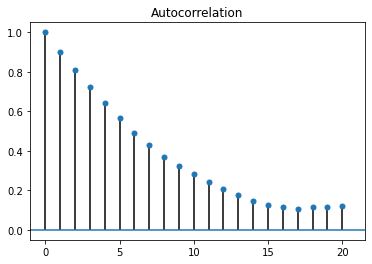

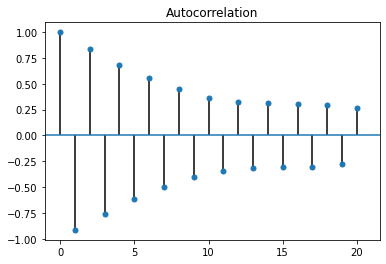

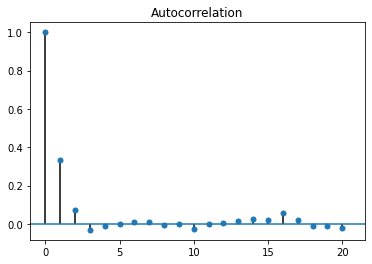

In [3]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9 (Should have alternating sign correlations)
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3 (Should decay very fast)
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

The ACF plots match what we predicted. 

---


## Estimating and Forecasting an AR Model
[VIDEO](https://videos.datacamp.com/transcoded/4267_intro+_to_time_series_analysis_in_python/v1/hls-4267_ch3_2.master.m3u8)

- Statsmodels has another model for estimating the parameters of an AR model.

```Python
from statsmodels.tsa.arima_model import ARMA

# Order (1,0) means we are fitting the data to an AR(1) model
# Order (2,0) would mean fitting the data to an AR(2) model
# '0' represents the MA part of the ARMA model
mod = ARMA(simulated_data, order=(1,0))

result = mod.fit()

# See all the model parameters
print(result.summary())

# See only the coefficients mu and phi
print(result.params)
```

## Forecasting an AR model
```
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(simulated_data, order=(1,0))
res = model.fit()
res.plot_predict(start='2016-07-01', end='2017-06-01')
plt.show()
```

## Estimating an AR Model
We will estimate the AR(1) parameter, ϕ, of one of the simulated series that we generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For `simulated_data_1` with a true ϕ of 0.9, we will print out the estimate of ϕ. In addition, we will also print out the entire output that is produced when you fit a time series, so we can get an idea of what other tests and summary statistics are available in `statsmodels`.

In [4]:
# Importing the ARMA class
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
model = ARMA(simulated_data_1, order=(1,0))
results = model.fit()

# Printing out the summary of the information on model fit
print(results.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(results.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1420.051
Method:                       css-mle   S.D. of innovations              1.000
Date:                Thu, 20 Aug 2020   AIC                           2846.103
Time:                        15:12:27   BIC                           2860.826
Sample:                             0   HQIC                          2851.699
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3986      0.317     -1.257      0.209      -1.020       0.223
ar.L1.y        0.9011      0.014     66.094      0.000       0.874       0.928
                                    Roots           

Notice how close the estimated parameter is to the true parameter.


---

## Forecasting with an AR Model
In addition to estimating the parameters of a model that we did in the last exercise, we can also do forecasting, both in-sample and out-of-sample using `statsmodels`. The **in-sample** is a forecast of the next data point using the data up to that point, and the **out-of-sample** forecasts any number of data points in the future. These forecasts can be made using either the `predict()` method if we want the forecasts in the form of a series of data, or using the `plot_predict()` method if we want a plot of the forecasted data. We supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated series simulated_data_1 with ϕ=0.9, we will plot in-sample and out-of-sample forecasts.

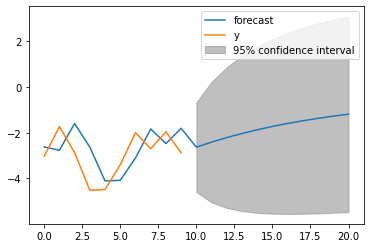

In [5]:
# Importing the module
from statsmodels.tsa.arima_model import ARMA

# Forecasting the AR(1) model
model = ARMA(simulated_data_1, order=(1,0))
results = model.fit()

# Forecasting and generating plot
# Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points after the end of the series at point 1010
results.plot_predict(start=990, end=1010)
plt.show()

Notice how, when phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean.

----

## Let's Forecast Interest Rates
We will now use the forecasting techniques and apply it to real data rather than simulated data. We will revisit ihe interest rates dataset: the annual data of 10-year interest rates going back 56 years, which is in a Series called `interest_rate_data`. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

We saw in the first part that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.

In [6]:
!wget --no-check-certificate -q "https://assets.datacamp.com/production/repositories/1120/datasets/557c7532b976d021b8447b1dc365060fab79e609/data.zip" -O "data.zip"
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/AMZN.csv           
  inflating: __MACOSX/data/._AMZN.csv  
  inflating: data/CME_HO1.csv        
  inflating: __MACOSX/data/._CME_HO1.csv  
  inflating: data/CME_NG1.csv        
  inflating: __MACOSX/data/._CME_NG1.csv  
  inflating: data/DJI.csv            
  inflating: __MACOSX/data/._DJI.csv  
  inflating: data/HRB.csv            
  inflating: __MACOSX/data/._HRB.csv  
  inflating: data/MSFT.csv           
  inflating: __MACOSX/data/._MSFT.csv  
  inflating: data/Sprint_Intraday.txt  
  inflating: __MACOSX/data/._Sprint_Intraday.txt  


In [7]:
import pandas as pd

bonds = {'US10Y': {'1962-01-02': 4.06, '1962-01-03': 4.03, '1962-01-04': 3.99, '1962-01-05': 4.02, '1962-01-08': 4.03, '1962-01-09': 4.05, '1962-01-10': 4.07, '1962-01-11': 4.08, '1962-01-12': 4.08, '1962-01-15': 4.1, '1962-01-16': 4.13, '1962-01-17': 4.12, '1962-01-18': 4.11, '1962-01-19': 4.11, '1962-01-22': 4.09, '1962-01-23': 4.11, '1962-01-24': 4.1, '1962-01-25': 4.11, '1962-01-26': 4.11, '1962-01-29': 4.12, '1962-01-30': 4.11, '1962-01-31': 4.1, '1962-02-01': 4.09, '1962-02-02': 4.08, '1962-02-05': 4.07, '1962-02-06': 4.06, '1962-02-07': 4.07, '1962-02-08': 4.07, '1962-02-09': 4.05, '1962-02-13': 4.03, '1962-02-14': 4.03, '1962-02-15': 4.02, '1962-02-16': 4.02, '1962-02-19': 4.01, '1962-02-20': 4.05, '1962-02-21': 4.03, '1962-02-23': 4.02, '1962-02-26': 4.0, '1962-02-27': 4.01, '1962-02-28': 4.0, '1962-03-01': 3.98, '1962-03-02': 3.98, '1962-03-05': 4.0, '1962-03-06': 4.01, '1962-03-07': 4.0, '1962-03-08': 3.98, '1962-03-09': 3.96, '1962-03-12': 3.94, '1962-03-13': 3.92, '1962-03-14': 3.93, '1962-03-15': 3.96, '1962-03-16': 3.96, '1962-03-19': 3.93, '1962-03-20': 3.91, '1962-03-21': 3.86, '1962-03-22': 3.83, '1962-03-23': 3.87, '1962-03-26': 3.89, '1962-03-27': 3.9, '1962-03-28': 3.9, '1962-03-29': 3.9, '1962-03-30': 3.86, '1962-04-02': 3.86, '1962-04-03': 3.83, '1962-04-04': 3.78, '1962-04-05': 3.84, '1962-04-06': 3.81, '1962-04-09': 3.83, '1962-04-10': 3.83, '1962-04-11': 3.87, '1962-04-12': 3.86, '1962-04-13': 3.85, '1962-04-16': 3.83, '1962-04-17': 3.82, '1962-04-18': 3.81, '1962-04-19': 3.82, '1962-04-23': 3.86, '1962-04-24': 3.87, '1962-04-25': 3.88, '1962-04-26': 3.89, '1962-04-27': 3.86, '1962-04-30': 3.86, '1962-05-01': 3.85, '1962-05-02': 3.86, '1962-05-03': 3.86, '1962-05-04': 3.87, '1962-05-07': 3.86, '1962-05-08': 3.85, '1962-05-09': 3.82, '1962-05-10': 3.83, '1962-05-11': 3.82, '1962-05-14': 3.85, '1962-05-15': 3.87, '1962-05-16': 3.86, '1962-05-17': 3.87, '1962-05-18': 3.93, '1962-05-21': 3.94, '1962-05-22': 3.93, '1962-05-23': 3.91, '1962-05-24': 3.9, '1962-05-25': 3.88, '1962-05-28': 3.87, '1962-05-29': 3.89, '1962-05-31': 3.9, '1962-06-01': 3.89, '1962-06-04': 3.88, '1962-06-05': 3.89, '1962-06-06': 3.89, '1962-06-07': 3.87, '1962-06-08': 3.86, '1962-06-11': 3.87, '1962-06-12': 3.86, '1962-06-13': 3.87, '1962-06-14': 3.9, '1962-06-15': 3.89, '1962-06-18': 3.91, '1962-06-19': 3.93, '1962-06-20': 3.92, '1962-06-21': 3.9, '1962-06-22': 3.9, '1962-06-25': 3.95, '1962-06-26': 3.97, '1962-06-27': 3.96, '1962-06-28': 3.98, '1962-06-29': 4.0, '1962-07-02': 4.0, '1962-07-03': 4.0, '1962-07-05': 4.0, '1962-07-06': 4.02, '1962-07-09': 4.05, '1962-07-10': 4.02, '1962-07-11': 3.99, '1962-07-12': 4.0, '1962-07-13': 4.0, '1962-07-16': 4.01, '1962-07-17': 4.03, '1962-07-18': 4.02, '1962-07-19': 4.02, '1962-07-20': 4.01, '1962-07-23': 4.0, '1962-07-24': 4.01, '1962-07-25': 4.02, '1962-07-26': 4.01, '1962-07-27': 4.02, '1962-07-30': 4.03, '1962-07-31': 4.04, '1962-08-01': 4.03, '1962-08-02': 4.0, '1962-08-03': 4.01, '1962-08-06': 4.01, '1962-08-07': 4.02, '1962-08-08': 4.01, '1962-08-09': 3.99, '1962-08-10': 3.99, '1962-08-13': 3.99, '1962-08-14': 3.98, '1962-08-15': 3.98, '1962-08-16': 3.96, '1962-08-17': 3.96, '1962-08-20': 3.94, '1962-08-21': 3.94, '1962-08-22': 3.95, '1962-08-23': 3.95, '1962-08-24': 3.95, '1962-08-27': 3.95, '1962-08-28': 3.96, '1962-08-29': 3.96, '1962-08-30': 3.95, '1962-08-31': 3.96, '1962-09-04': 3.96, '1962-09-05': 3.97, '1962-09-06': 3.99, '1962-09-07': 4.01, '1962-09-10': 4.0, '1962-09-11': 4.0, '1962-09-12': 4.0, '1962-09-13': 3.99, '1962-09-14': 3.99, '1962-09-17': 3.99, '1962-09-18': 3.98, '1962-09-19': 3.99, '1962-09-20': 3.98, '1962-09-21': 3.98, '1962-09-24': 3.97, '1962-09-25': 3.96, '1962-09-26': 3.95, '1962-09-27': 3.95, '1962-09-28': 3.94, '1962-10-01': 3.93, '1962-10-02': 3.92, '1962-10-03': 3.9, '1962-10-04': 3.9, '1962-10-05': 3.92, '1962-10-08': 3.93, '1962-10-09': 3.95, '1962-10-10': 3.93, '1962-10-11': 3.94, '1962-10-15': 3.94, '1962-10-16': 3.94, '1962-10-17': 3.94, '1962-10-18': 3.92, '1962-10-19': 3.88, '1962-10-22': 3.91, '1962-10-23': 3.94, '1962-10-24': 3.94, '1962-10-25': 3.94, '1962-10-26': 3.93, '1962-10-29': 3.92, '1962-10-30': 3.92, '1962-10-31': 3.92, '1962-11-01': 3.92, '1962-11-02': 3.91, '1962-11-05': 3.91, '1962-11-07': 3.91, '1962-11-08': 3.9, '1962-11-09': 3.89, '1962-11-13': 3.9, '1962-11-14': 3.91, '1962-11-15': 3.91, '1962-11-16': 3.93, '1962-11-19': 3.93, '1962-11-20': 3.93, '1962-11-21': 3.92, '1962-11-23': 3.92, '1962-11-26': 3.93, '1962-11-27': 3.92, '1962-11-28': 3.92, '1962-11-29': 3.92, '1962-11-30': 3.92, '1962-12-03': 3.93, '1962-12-04': 3.94, '1962-12-05': 3.93, '1962-12-06': 3.92, '1962-12-07': 3.91, '1962-12-10': 3.9, '1962-12-11': 3.89, '1962-12-12': 3.88, '1962-12-13': 3.88, '1962-12-14': 3.87, '1962-12-17': 3.85, '1962-12-18': 3.83, '1962-12-19': 3.84, '1962-12-20': 3.83, '1962-12-21': 3.81, '1962-12-24': 3.79, '1962-12-26': 3.79, '1962-12-27': 3.81, '1962-12-28': 3.84, '1962-12-31': 3.85, '1963-01-02': 3.82, '1963-01-03': 3.81, '1963-01-04': 3.84, '1963-01-07': 3.83, '1963-01-08': 3.81, '1963-01-09': 3.82, '1963-01-10': 3.81, '1963-01-11': 3.8, '1963-01-14': 3.81, '1963-01-15': 3.8, '1963-01-16': 3.8, '1963-01-17': 3.82, '1963-01-18': 3.84, '1963-01-21': 3.85, '1963-01-22': 3.86, '1963-01-23': 3.86, '1963-01-24': 3.86, '1963-01-25': 3.85, '1963-01-28': 3.86, '1963-01-29': 3.86, '1963-01-30': 3.86, '1963-01-31': 3.87, '1963-02-01': 3.88, '1963-02-04': 3.89, '1963-02-05': 3.9, '1963-02-06': 3.91, '1963-02-07': 3.91, '1963-02-08': 3.91, '1963-02-11': 3.92, '1963-02-13': 3.92, '1963-02-14': 3.91, '1963-02-15': 3.91, '1963-02-18': 3.91, '1963-02-19': 3.93, '1963-02-20': 3.94, '1963-02-21': 3.95, '1963-02-25': 3.95, '1963-02-26': 3.95, '1963-02-27': 3.95, '1963-02-28': 3.94, '1963-03-01': 3.93, '1963-03-04': 3.92, '1963-03-05': 3.92, '1963-03-06': 3.91, '1963-03-07': 3.92, '1963-03-08': 3.92, '1963-03-11': 3.92, '1963-03-12': 3.92, '1963-03-13': 3.92, '1963-03-14': 3.92, '1963-03-15': 3.92, '1963-03-18': 3.92, '1963-03-19': 3.92, '1963-03-20': 3.92, '1963-03-21': 3.92, '1963-03-22': 3.93, '1963-03-25': 3.94, '1963-03-26': 3.96, '1963-03-27': 3.96, '1963-03-28': 3.96, '1963-03-29': 3.95, '1963-04-01': 3.95, '1963-04-02': 3.96, '1963-04-03': 3.96, '1963-04-04': 3.95, '1963-04-05': 3.95, '1963-04-08': 3.97, '1963-04-09': 3.98, '1963-04-10': 4.0, '1963-04-11': 4.0, '1963-04-15': 4.01, '1963-04-16': 4.0, '1963-04-17': 4.0, '1963-04-18': 3.99, '1963-04-19': 3.97, '1963-04-22': 3.97, '1963-04-23': 3.97, '1963-04-24': 3.96, '1963-04-25': 3.95, '1963-04-26': 3.95, '1963-04-29': 3.95, '1963-04-30': 3.95, '1963-05-01': 3.94, '1963-05-02': 3.94, '1963-05-03': 3.93, '1963-05-06': 3.92, '1963-05-07': 3.91, '1963-05-08': 3.92, '1963-05-09': 3.93, '1963-05-10': 3.93, '1963-05-13': 3.92, '1963-05-14': 3.91, '1963-05-15': 3.91, '1963-05-16': 3.9, '1963-05-17': 3.92, '1963-05-20': 3.93, '1963-05-21': 3.92, '1963-05-22': 3.92, '1963-05-23': 3.93, '1963-05-24': 3.95, '1963-05-27': 3.95, '1963-05-28': 3.96, '1963-05-29': 3.96, '1963-05-31': 3.96, '1963-06-03': 3.98, '1963-06-04': 3.98, '1963-06-05': 3.98, '1963-06-06': 3.99, '1963-06-07': 3.99, '1963-06-10': 3.99, '1963-06-11': 3.98, '1963-06-12': 3.99, '1963-06-13': 3.99, '1963-06-14': 3.99, '1963-06-17': 4.0, '1963-06-18': 4.0, '1963-06-19': 4.0, '1963-06-20': 4.0, '1963-06-21': 4.0, '1963-06-24': 4.0, '1963-06-25': 4.0, '1963-06-26': 4.0, '1963-06-27': 4.0, '1963-06-28': 4.0, '1963-07-01': 4.01, '1963-07-02': 4.03, '1963-07-03': 4.03, '1963-07-05': 4.04, '1963-07-08': 4.05, '1963-07-09': 4.04, '1963-07-10': 4.03, '1963-07-11': 4.04, '1963-07-12': 4.03, '1963-07-15': 4.02, '1963-07-16': 4.02, '1963-07-17': 4.03, '1963-07-18': 4.02, '1963-07-19': 4.02, '1963-07-22': 4.02, '1963-07-23': 4.02, '1963-07-24': 4.01, '1963-07-25': 4.01, '1963-07-26': 3.99, '1963-07-29': 3.99, '1963-07-30': 4.0, '1963-07-31': 4.0, '1963-08-01': 3.99, '1963-08-02': 3.99, '1963-08-05': 3.99, '1963-08-06': 4.0, '1963-08-07': 4.01, '1963-08-08': 4.0, '1963-08-09': 4.0, '1963-08-12': 4.01, '1963-08-13': 4.02, '1963-08-14': 4.02, '1963-08-15': 4.01, '1963-08-16': 4.0, '1963-08-19': 3.99, '1963-08-20': 3.99, '1963-08-21': 4.0, '1963-08-22': 4.0, '1963-08-23': 4.0, '1963-08-26': 4.0, '1963-08-27': 4.0, '1963-08-28': 4.0, '1963-08-29': 4.01, '1963-08-30': 4.02, '1963-09-03': 4.03, '1963-09-04': 4.04, '1963-09-05': 4.08, '1963-09-06': 4.09, '1963-09-09': 4.09, '1963-09-10': 4.09, '1963-09-11': 4.09, '1963-09-12': 4.09, '1963-09-13': 4.09, '1963-09-16': 4.09, '1963-09-17': 4.09, '1963-09-18': 4.08, '1963-09-19': 4.08, '1963-09-20': 4.07, '1963-09-23': 4.07, '1963-09-24': 4.08, '1963-09-25': 4.08, '1963-09-26': 4.08, '1963-09-27': 4.07, '1963-09-30': 4.07, '1963-10-01': 4.07, '1963-10-02': 4.07, '1963-10-03': 4.07, '1963-10-04': 4.08, '1963-10-07': 4.08, '1963-10-08': 4.09, '1963-10-09': 4.1, '1963-10-10': 4.1, '1963-10-11': 4.1, '1963-10-14': 4.1, '1963-10-15': 4.11, '1963-10-16': 4.11, '1963-10-17': 4.12, '1963-10-18': 4.12, '1963-10-21': 4.12, '1963-10-22': 4.11, '1963-10-23': 4.12, '1963-10-24': 4.11, '1963-10-25': 4.12, '1963-10-28': 4.12, '1963-10-29': 4.13, '1963-10-30': 4.14, '1963-10-31': 4.15, '1963-11-01': 4.15, '1963-11-04': 4.15, '1963-11-06': 4.17, '1963-11-07': 4.17, '1963-11-08': 4.16, '1963-11-12': 4.16, '1963-11-13': 4.15, '1963-11-14': 4.12, '1963-11-15': 4.11, '1963-11-18': 4.11, '1963-11-19': 4.1, '1963-11-20': 4.09, '1963-11-21': 4.1, '1963-11-22': 4.09, '1963-11-26': 4.08, '1963-11-27': 4.08, '1963-11-29': 4.08, '1963-12-02': 4.09, '1963-12-03': 4.1, '1963-12-04': 4.1, '1963-12-05': 4.11, '1963-12-06': 4.11, '1963-12-09': 4.1, '1963-12-10': 4.1, '1963-12-11': 4.12, '1963-12-12': 4.12, '1963-12-13': 4.13, '1963-12-16': 4.15, '1963-12-17': 4.15, '1963-12-18': 4.15, '1963-12-19': 4.14, '1963-12-20': 4.15, '1963-12-23': 4.15, '1963-12-24': 4.15, '1963-12-26': 4.15, '1963-12-27': 4.15, '1963-12-30': 4.14, '1963-12-31': 4.14, '1964-01-02': 4.14, '1964-01-03': 4.15, '1964-01-06': 4.16, '1964-01-07': 4.15, '1964-01-08': 4.18, '1964-01-09': 4.18, '1964-01-10': 4.18, '1964-01-13': 4.18, '1964-01-14': 4.18, '1964-01-15': 4.18, '1964-01-16': 4.17, '1964-01-17': 4.17, '1964-01-20': 4.16, '1964-01-21': 4.16, '1964-01-22': 4.16, '1964-01-23': 4.16, '1964-01-24': 4.18, '1964-01-27': 4.18, '1964-01-28': 4.17, '1964-01-29': 4.17, '1964-01-30': 4.16, '1964-01-31': 4.15, '1964-02-03': 4.15, '1964-02-04': 4.15, '1964-02-05': 4.15, '1964-02-06': 4.14, '1964-02-07': 4.14, '1964-02-10': 4.14, '1964-02-11': 4.14, '1964-02-13': 4.13, '1964-02-14': 4.13, '1964-02-17': 4.13, '1964-02-18': 4.14, '1964-02-19': 4.14, '1964-02-20': 4.14, '1964-02-24': 4.15, '1964-02-25': 4.15, '1964-02-26': 4.15, '1964-02-27': 4.17, '1964-02-28': 4.18, '1964-03-02': 4.17, '1964-03-03': 4.18, '1964-03-04': 4.19, '1964-03-05': 4.19, '1964-03-06': 4.19, '1964-03-09': 4.2, '1964-03-10': 4.2, '1964-03-11': 4.21, '1964-03-12': 4.21, '1964-03-13': 4.22, '1964-03-16': 4.21, '1964-03-17': 4.22, '1964-03-18': 4.23, '1964-03-19': 4.24, '1964-03-20': 4.25, '1964-03-23': 4.25, '1964-03-24': 4.26, '1964-03-25': 4.26, '1964-03-26': 4.25, '1964-03-30': 4.25, '1964-03-31': 4.23, '1964-04-01': 4.23, '1964-04-02': 4.24, '1964-04-03': 4.25, '1964-04-06': 4.25, '1964-04-07': 4.25, '1964-04-08': 4.22, '1964-04-09': 4.22, '1964-04-10': 4.22, '1964-04-13': 4.23, '1964-04-14': 4.24, '1964-04-15': 4.23, '1964-04-16': 4.23, '1964-04-17': 4.24, '1964-04-20': 4.24, '1964-04-21': 4.23, '1964-04-22': 4.23, '1964-04-23': 4.23, '1964-04-24': 4.23, '1964-04-27': 4.23, '1964-04-28': 4.23, '1964-04-29': 4.22, '1964-04-30': 4.22, '1964-05-01': 4.22, '1964-05-04': 4.22, '1964-05-05': 4.22, '1964-05-06': 4.22, '1964-05-07': 4.22, '1964-05-08': 4.2, '1964-05-11': 4.19, '1964-05-12': 4.19, '1964-05-13': 4.19, '1964-05-14': 4.19, '1964-05-15': 4.19, '1964-05-18': 4.19, '1964-05-19': 4.19, '1964-05-20': 4.2, '1964-05-21': 4.2, '1964-05-22': 4.2, '1964-05-25': 4.19, '1964-05-26': 4.19, '1964-05-27': 4.2, '1964-05-28': 4.19, '1964-06-01': 4.19, '1964-06-02': 4.19, '1964-06-03': 4.19, '1964-06-04': 4.19, '1964-06-05': 4.18, '1964-06-08': 4.18, '1964-06-09': 4.17, '1964-06-10': 4.17, '1964-06-11': 4.18, '1964-06-12': 4.18, '1964-06-15': 4.18, '1964-06-16': 4.18, '1964-06-17': 4.18, '1964-06-18': 4.17, '1964-06-19': 4.16, '1964-06-22': 4.15, '1964-06-23': 4.15, '1964-06-24': 4.15, '1964-06-25': 4.15, '1964-06-26': 4.15, '1964-06-29': 4.15, '1964-06-30': 4.15, '1964-07-01': 4.15, '1964-07-02': 4.15, '1964-07-06': 4.16, '1964-07-07': 4.15, '1964-07-08': 4.15, '1964-07-09': 4.18, '1964-07-10': 4.19, '1964-07-13': 4.19, '1964-07-14': 4.19, '1964-07-15': 4.19, '1964-07-16': 4.19, '1964-07-17': 4.2, '1964-07-20': 4.21, '1964-07-21': 4.2, '1964-07-22': 4.21, '1964-07-23': 4.2, '1964-07-24': 4.2, '1964-07-27': 4.2, '1964-07-28': 4.2, '1964-07-29': 4.2, '1964-07-30': 4.19, '1964-07-31': 4.19, '1964-08-03': 4.19, '1964-08-04': 4.19, '1964-08-05': 4.19, '1964-08-06': 4.18, '1964-08-07': 4.19, '1964-08-10': 4.19, '1964-08-11': 4.2, '1964-08-12': 4.2, '1964-08-13': 4.19, '1964-08-14': 4.19, '1964-08-17': 4.19, '1964-08-18': 4.19, '1964-08-19': 4.19, '1964-08-20': 4.19, '1964-08-21': 4.19, '1964-08-24': 4.19, '1964-08-25': 4.2, '1964-08-26': 4.2, '1964-08-27': 4.2, '1964-08-28': 4.21, '1964-08-31': 4.21, '1964-09-01': 4.21, '1964-09-02': 4.22, '1964-09-03': 4.22, '1964-09-04': 4.22, '1964-09-08': 4.22, '1964-09-09': 4.22, '1964-09-10': 4.22, '1964-09-11': 4.22, '1964-09-14': 4.22, '1964-09-15': 4.22, '1964-09-16': 4.21, '1964-09-17': 4.2, '1964-09-18': 4.2, '1964-09-21': 4.19, '1964-09-22': 4.19, '1964-09-23': 4.19, '1964-09-24': 4.19, '1964-09-25': 4.19, '1964-09-28': 4.17, '1964-09-29': 4.18, '1964-09-30': 4.18, '1964-10-01': 4.18, '1964-10-02': 4.18, '1964-10-05': 4.2, '1964-10-06': 4.19, '1964-10-07': 4.19, '1964-10-08': 4.19, '1964-10-09': 4.19, '1964-10-13': 4.19, '1964-10-14': 4.19, '1964-10-15': 4.2, '1964-10-16': 4.21, '1964-10-19': 4.21, '1964-10-20': 4.2, '1964-10-21': 4.19, '1964-10-22': 4.19, '1964-10-23': 4.19, '1964-10-26': 4.19, '1964-10-27': 4.18, '1964-10-28': 4.17, '1964-10-29': 4.16, '1964-10-30': 4.16, '1964-11-02': 4.15, '1964-11-04': 4.15, '1964-11-05': 4.15, '1964-11-06': 4.15, '1964-11-09': 4.15, '1964-11-10': 4.14, '1964-11-12': 4.12, '1964-11-13': 4.13, '1964-11-16': 4.13, '1964-11-17': 4.14, '1964-11-18': 4.14, '1964-11-19': 4.13, '1964-11-20': 4.13, '1964-11-23': 4.18, '1964-11-24': 4.18, '1964-11-25': 4.19, '1964-11-27': 4.19, '1964-11-30': 4.2, '1964-12-01': 4.2, '1964-12-02': 4.19, '1964-12-03': 4.18, '1964-12-04': 4.18, '1964-12-07': 4.17, '1964-12-08': 4.16, '1964-12-09': 4.16, '1964-12-10': 4.15, '1964-12-11': 4.15, '1964-12-14': 4.16, '1964-12-15': 4.17, '1964-12-16': 4.18, '1964-12-17': 4.18, '1964-12-18': 4.19, '1964-12-21': 4.18, '1964-12-22': 4.18, '1964-12-23': 4.19, '1964-12-24': 4.19, '1964-12-28': 4.19, '1964-12-29': 4.19, '1964-12-30': 4.2, '1964-12-31': 4.21, '1965-01-04': 4.2, '1965-01-05': 4.2, '1965-01-06': 4.2, '1965-01-07': 4.2, '1965-01-08': 4.2, '1965-01-11': 4.2, '1965-01-12': 4.19, '1965-01-13': 4.19, '1965-01-14': 4.19, '1965-01-15': 4.19, '1965-01-18': 4.19, '1965-01-19': 4.18, '1965-01-20': 4.18, '1965-01-21': 4.17, '1965-01-22': 4.17, '1965-01-25': 4.18, '1965-01-26': 4.19, '1965-01-27': 4.19, '1965-01-28': 4.19, '1965-01-29': 4.19, '1965-02-01': 4.2, '1965-02-02': 4.2, '1965-02-03': 4.2, '1965-02-04': 4.21, '1965-02-05': 4.22, '1965-02-08': 4.21, '1965-02-09': 4.21, '1965-02-10': 4.21, '1965-02-11': 4.21, '1965-02-15': 4.22, '1965-02-16': 4.21, '1965-02-17': 4.21, '1965-02-18': 4.21, '1965-02-19': 4.22, '1965-02-23': 4.21, '1965-02-24': 4.22, '1965-02-25': 4.21, '1965-02-26': 4.22, '1965-03-01': 4.22, '1965-03-02': 4.24, '1965-03-03': 4.23, '1965-03-04': 4.22, '1965-03-05': 4.23, '1965-03-08': 4.23, '1965-03-09': 4.23, '1965-03-10': 4.23, '1965-03-11': 4.22, '1965-03-12': 4.22, '1965-03-15': 4.21, '1965-03-16': 4.21, '1965-03-17': 4.2, '1965-03-18': 4.2, '1965-03-19': 4.2, '1965-03-22': 4.19, '1965-03-23': 4.19, '1965-03-24': 4.18, '1965-03-25': 4.19, '1965-03-26': 4.2, '1965-03-29': 4.2, '1965-03-30': 4.2, '1965-03-31': 4.2, '1965-04-01': 4.2, '1965-04-02': 4.2, '1965-04-05': 4.2, '1965-04-06': 4.2, '1965-04-07': 4.2, '1965-04-08': 4.19, '1965-04-09': 4.2, '1965-04-12': 4.2, '1965-04-13': 4.2, '1965-04-14': 4.19, '1965-04-15': 4.2, '1965-04-19': 4.21, '1965-04-20': 4.21, '1965-04-21': 4.21, '1965-04-22': 4.21, '1965-04-23': 4.21, '1965-04-26': 4.21, '1965-04-27': 4.21, '1965-04-28': 4.21, '1965-04-29': 4.21, '1965-04-30': 4.21, '1965-05-03': 4.21, '1965-05-04': 4.2, '1965-05-05': 4.2, '1965-05-06': 4.2, '1965-05-07': 4.2, '1965-05-10': 4.2, '1965-05-11': 4.2, '1965-05-12': 4.2, '1965-05-13': 4.21, '1965-05-14': 4.21, '1965-05-17': 4.21, '1965-05-18': 4.22, '1965-05-19': 4.22, '1965-05-20': 4.22, '1965-05-21': 4.22, '1965-05-24': 4.22, '1965-05-25': 4.22, '1965-05-26': 4.22, '1965-05-27': 4.22, '1965-05-28': 4.23, '1965-06-01': 4.23, '1965-06-02': 4.23, '1965-06-03': 4.23, '1965-06-04': 4.23, '1965-06-07': 4.23, '1965-06-08': 4.23, '1965-06-09': 4.23, '1965-06-10': 4.23, '1965-06-11': 4.23, '1965-06-14': 4.21, '1965-06-15': 4.21, '1965-06-16': 4.21, '1965-06-17': 4.21, '1965-06-18': 4.21, '1965-06-21': 4.2, '1965-06-22': 4.2, '1965-06-23': 4.2, '1965-06-24': 4.19, '1965-06-25': 4.19, '1965-06-28': 4.19, '1965-06-29': 4.2, '1965-06-30': 4.2, '1965-07-01': 4.2, '1965-07-02': 4.21, '1965-07-06': 4.21, '1965-07-07': 4.21, '1965-07-08': 4.2, '1965-07-09': 4.21, '1965-07-12': 4.21, '1965-07-13': 4.21, '1965-07-14': 4.21, '1965-07-15': 4.2, '1965-07-16': 4.2, '1965-07-19': 4.2, '1965-07-20': 4.2, '1965-07-21': 4.2, '1965-07-22': 4.2, '1965-07-23': 4.2, '1965-07-26': 4.2, '1965-07-27': 4.2, '1965-07-28': 4.2, '1965-07-29': 4.21, '1965-07-30': 4.22, '1965-08-02': 4.22, '1965-08-03': 4.22, '1965-08-04': 4.23, '1965-08-05': 4.23, '1965-08-06': 4.24, '1965-08-09': 4.24, '1965-08-10': 4.24, '1965-08-11': 4.25, '1965-08-12': 4.25, '1965-08-13': 4.25, '1965-08-16': 4.26, '1965-08-17': 4.27, '1965-08-18': 4.26, '1965-08-19': 4.26, '1965-08-20': 4.26, '1965-08-23': 4.26, '1965-08-24': 4.27, '1965-08-25': 4.26, '1965-08-26': 4.27, '1965-08-27': 4.27, '1965-08-30': 4.27, '1965-08-31': 4.27, '1965-09-01': 4.28, '1965-09-02': 4.28, '1965-09-03': 4.27, '1965-09-07': 4.27, '1965-09-08': 4.27, '1965-09-09': 4.27, '1965-09-10': 4.28, '1965-09-13': 4.28, '1965-09-14': 4.28, '1965-09-15': 4.28, '1965-09-16': 4.27, '1965-09-17': 4.27, '1965-09-20': 4.27, '1965-09-21': 4.28, '1965-09-22': 4.29, '1965-09-23': 4.3, '1965-09-24': 4.31, '1965-09-27': 4.31, '1965-09-28': 4.33, '1965-09-29': 4.36, '1965-09-30': 4.35, '1965-10-01': 4.36, '1965-10-04': 4.35, '1965-10-05': 4.33, '1965-10-06': 4.32, '1965-10-07': 4.31, '1965-10-08': 4.32, '1965-10-11': 4.31, '1965-10-13': 4.3, '1965-10-14': 4.31, '1965-10-15': 4.34, '1965-10-18': 4.34, '1965-10-19': 4.35, '1965-10-20': 4.36, '1965-10-21': 4.37, '1965-10-22': 4.36, '1965-10-25': 4.38, '1965-10-26': 4.38, '1965-10-27': 4.39, '1965-10-28': 4.4, '1965-10-29': 4.41, '1965-11-01': 4.43, '1965-11-03': 4.43, '1965-11-04': 4.43, '1965-11-05': 4.43, '1965-11-08': 4.45, '1965-11-09': 4.47, '1965-11-10': 4.46, '1965-11-12': 4.44, '1965-11-15': 4.45, '1965-11-16': 4.44, '1965-11-17': 4.45, '1965-11-18': 4.45, '1965-11-19': 4.46, '1965-11-22': 4.45, '1965-11-23': 4.45, '1965-11-24': 4.45, '1965-11-26': 4.45, '1965-11-29': 4.46, '1965-11-30': 4.48, '1965-12-01': 4.52, '1965-12-02': 4.52, '1965-12-03': 4.52, '1965-12-06': 4.61, '1965-12-07': 4.59, '1965-12-08': 4.6, '1965-12-09': 4.6, '1965-12-10': 4.6, '1965-12-13': 4.65, '1965-12-14': 4.67, '1965-12-15': 4.67, '1965-12-16': 4.66, '1965-12-17': 4.65, '1965-12-20': 4.61, '1965-12-21': 4.64, '1965-12-22': 4.65, '1965-12-23': 4.65, '1965-12-27': 4.62, '1965-12-28': 4.61, '1965-12-29': 4.62, '1965-12-30': 4.63, '1965-12-31': 4.65, '1966-01-03': 4.63, '1966-01-04': 4.65, '1966-01-05': 4.63, '1966-01-06': 4.6, '1966-01-07': 4.6, '1966-01-10': 4.61, '1966-01-11': 4.6, '1966-01-12': 4.56, '1966-01-13': 4.58, '1966-01-14': 4.59, '1966-01-17': 4.61, '1966-01-18': 4.61, '1966-01-19': 4.61, '1966-01-20': 4.6, '1966-01-21': 4.59, '1966-01-24': 4.6, '1966-01-25': 4.61, '1966-01-26': 4.61, '1966-01-27': 4.63, '1966-01-28': 4.65, '1966-01-31': 4.69, '1966-02-01': 4.69, '1966-02-02': 4.7, '1966-02-03': 4.7, '1966-02-04': 4.71, '1966-02-07': 4.73, '1966-02-08': 4.72, '1966-02-09': 4.74, '1966-02-10': 4.78, '1966-02-11': 4.86, '1966-02-14': 4.87, '1966-02-15': 4.88, '1966-02-16': 4.89, '1966-02-17': 4.88, '1966-02-18': 4.9, '1966-02-21': 4.92, '1966-02-23': 4.92, '1966-02-24': 4.93, '1966-02-25': 4.97, '1966-02-28': 5.02, '1966-03-01': 5.01, '1966-03-02': 5.0, '1966-03-03': 5.0, '1966-03-04': 4.98, '1966-03-07': 4.96, '1966-03-08': 4.93, '1966-03-09': 4.93, '1966-03-10': 4.95, '1966-03-11': 4.96, '1966-03-14': 4.94, '1966-03-15': 4.91, '1966-03-16': 4.9, '1966-03-17': 4.86, '1966-03-18': 4.84, '1966-03-21': 4.81, '1966-03-22': 4.78, '1966-03-23': 4.73, '1966-03-24': 4.76, '1966-03-25': 4.82, '1966-03-28': 4.81, '1966-03-29': 4.8, '1966-03-30': 4.7, '1966-03-31': 4.71, '1966-04-01': 4.7, '1966-04-04': 4.69, '1966-04-05': 4.66, '1966-04-06': 4.71, '1966-04-07': 4.73, '1966-04-11': 4.73, '1966-04-12': 4.73, '1966-04-13': 4.74, '1966-04-14': 4.76, '1966-04-15': 4.77, '1966-04-18': 4.76, '1966-04-19': 4.76, '1966-04-20': 4.8, '1966-04-21': 4.77, '1966-04-22': 4.77, '1966-04-25': 4.78, '1966-04-26': 4.79, '1966-04-27': 4.78, '1966-04-28': 4.78, '1966-04-29': 4.79, '1966-05-02': 4.8, '1966-05-03': 4.81, '1966-05-04': 4.81, '1966-05-05': 4.81, '1966-05-06': 4.79, '1966-05-09': 4.75, '1966-05-10': 4.75, '1966-05-11': 4.77, '1966-05-12': 4.77, '1966-05-13': 4.77, '1966-05-16': 4.77, '1966-05-17': 4.75, '1966-05-18': 4.75, '1966-05-19': 4.75, '1966-05-20': 4.75, '1966-05-23': 4.77, '1966-05-24': 4.79, '1966-05-25': 4.78, '1966-05-26': 4.8, '1966-05-27': 4.81, '1966-05-31': 4.8, '1966-06-01': 4.79, '1966-06-02': 4.77, '1966-06-03': 4.78, '1966-06-06': 4.79, '1966-06-07': 4.81, '1966-06-08': 4.83, '1966-06-09': 4.83, '1966-06-10': 4.83, '1966-06-13': 4.83, '1966-06-14': 4.83, '1966-06-15': 4.79, '1966-06-16': 4.81, '1966-06-17': 4.8, '1966-06-20': 4.76, '1966-06-21': 4.75, '1966-06-22': 4.76, '1966-06-23': 4.77, '1966-06-24': 4.8, '1966-06-27': 4.83, '1966-06-28': 4.89, '1966-06-29': 4.9, '1966-06-30': 4.97, '1966-07-01': 4.99, '1966-07-05': 4.96, '1966-07-06': 4.95, '1966-07-07': 4.95, '1966-07-08': 4.97, '1966-07-11': 5.03, '1966-07-12': 5.05, '1966-07-13': 5.07, '1966-07-14': 5.1, '1966-07-15': 5.09, '1966-07-18': 5.04, '1966-07-19': 5.03, '1966-07-20': 5.02, '1966-07-21': 5.04, '1966-07-22': 5.02, '1966-07-25': 4.99, '1966-07-26': 4.99, '1966-07-27': 4.99, '1966-07-28': 5.03, '1966-07-29': 5.05, '1966-08-01': 5.05, '1966-08-02': 5.04, '1966-08-03': 5.06, '1966-08-04': 5.07, '1966-08-05': 5.07, '1966-08-08': 5.08, '1966-08-09': 5.1, '1966-08-10': 5.1, '1966-08-11': 5.11, '1966-08-12': 5.11, '1966-08-15': 5.15, '1966-08-16': 5.18, '1966-08-17': 5.24, '1966-08-18': 5.29, '1966-08-19': 5.31, '1966-08-22': 5.29, '1966-08-23': 5.33, '1966-08-24': 5.36, '1966-08-25': 5.39, '1966-08-26': 5.48, '1966-08-29': 5.51, '1966-08-30': 5.48, '1966-08-31': 5.36, '1966-09-01': 5.3, '1966-09-02': 5.23, '1966-09-06': 5.19, '1966-09-07': 5.2, '1966-09-08': 5.18, '1966-09-09': 5.17, '1966-09-12': 5.18, '1966-09-13': 5.16, '1966-09-14': 5.21, '1966-09-15': 5.25, '1966-09-16': 5.24, '1966-09-19': 5.32, '1966-09-20': 5.27, '1966-09-21': 5.21, '1966-09-22': 5.15, '1966-09-23': 5.17, '1966-09-26': 5.17, '1966-09-27': 5.13, '1966-09-28': 5.09, '1966-09-29': 4.99, '1966-09-30': 5.02, '1966-10-03': 5.08, '1966-10-04': 5.06, '1966-10-05': 5.05, '1966-10-06': 5.03, '1966-10-07': 5.02, '1966-10-10': 5.05, '1966-10-11': 5.05, '1966-10-13': 5.07, '1966-10-14': 5.06, '1966-10-17': 5.04, '1966-10-18': 4.99, '1966-10-19': 5.0, '1966-10-20': 5.02, '1966-10-21': 4.94, '1966-10-24': 4.94, '1966-10-25': 4.94, '1966-10-26': 4.96, '1966-10-27': 4.99, '1966-10-28': 4.97, '1966-10-31': 4.97, '1966-11-01': 4.99, '1966-11-02': 5.04, '1966-11-03': 5.06, '1966-11-04': 5.11, '1966-11-07': 5.11, '1966-11-09': 5.12, '1966-11-10': 5.17, '1966-11-14': 5.19, '1966-11-15': 5.21, '1966-11-16': 5.22, '1966-11-17': 5.23, '1966-11-18': 5.22, '1966-11-21': 5.17, '1966-11-22': 5.2, '1966-11-23': 5.22, '1966-11-25': 5.23, '1966-11-28': 5.19, '1966-11-29': 5.15, '1966-11-30': 5.12, '1966-12-01': 5.09, '1966-12-02': 5.03, '1966-12-05': 5.06, '1966-12-06': 5.07, '1966-12-07': 5.07, '1966-12-08': 5.1, '1966-12-09': 5.05, '1966-12-12': 4.93, '1966-12-13': 4.86, '1966-12-14': 4.83, '1966-12-15': 4.76, '1966-12-16': 4.78, '1966-12-19': 4.72, '1966-12-20': 4.69, '1966-12-21': 4.66, '1966-12-22': 4.68, '1966-12-23': 4.67, '1966-12-27': 4.71, '1966-12-28': 4.64, '1966-12-29': 4.66, '1966-12-30': 4.64, '1967-01-03': 4.69, '1967-01-04': 4.65, '1967-01-05': 4.63, '1967-01-06': 4.64, '1967-01-09': 4.71, '1967-01-10': 4.69, '1967-01-11': 4.54, '1967-01-12': 4.55, '1967-01-13': 4.51, '1967-01-16': 4.49, '1967-01-17': 4.51, '1967-01-18': 4.53, '1967-01-19': 4.58, '1967-01-20': 4.6, '1967-01-23': 4.6, '1967-01-24': 4.65, '1967-01-25': 4.62, '1967-01-26': 4.5, '1967-01-27': 4.47, '1967-01-30': 4.48, '1967-01-31': 4.52, '1967-02-01': 4.52, '1967-02-02': 4.51, '1967-02-03': 4.52, '1967-02-06': 4.53, '1967-02-07': 4.54, '1967-02-08': 4.54, '1967-02-09': 4.53, '1967-02-10': 4.59, '1967-02-14': 4.64, '1967-02-15': 4.69, '1967-02-16': 4.67, '1967-02-17': 4.68, '1967-02-20': 4.7, '1967-02-21': 4.71, '1967-02-23': 4.74, '1967-02-24': 4.73, '1967-02-27': 4.72, '1967-02-28': 4.72, '1967-03-01': 4.66, '1967-03-02': 4.63, '1967-03-03': 4.62, '1967-03-06': 4.61, '1967-03-07': 4.6, '1967-03-08': 4.61, '1967-03-09': 4.57, '1967-03-10': 4.58, '1967-03-13': 4.56, '1967-03-14': 4.53, '1967-03-15': 4.49, '1967-03-16': 4.45, '1967-03-17': 4.47, '1967-03-20': 4.45, '1967-03-21': 4.51, '1967-03-22': 4.52, '1967-03-23': 4.5, '1967-03-27': 4.52, '1967-03-28': 4.52, '1967-03-29': 4.52, '1967-03-30': 4.5, '1967-03-31': 4.5, '1967-04-03': 4.5, '1967-04-04': 4.49, '1967-04-05': 4.5, '1967-04-06': 4.49, '1967-04-07': 4.48, '1967-04-10': 4.5, '1967-04-11': 4.51, '1967-04-12': 4.51, '1967-04-13': 4.54, '1967-04-14': 4.56, '1967-04-17': 4.61, '1967-04-18': 4.63, '1967-04-19': 4.63, '1967-04-20': 4.63, '1967-04-21': 4.66, '1967-04-24': 4.68, '1967-04-25': 4.71, '1967-04-26': 4.73, '1967-04-27': 4.73, '1967-04-28': 4.78, '1967-05-01': 4.77, '1967-05-02': 4.75, '1967-05-03': 4.75, '1967-05-04': 4.76, '1967-05-05': 4.77, '1967-05-08': 4.83, '1967-05-09': 4.87, '1967-05-10': 4.87, '1967-05-11': 4.84, '1967-05-12': 4.82, '1967-05-15': 4.86, '1967-05-16': 4.87, '1967-05-17': 4.88, '1967-05-18': 4.88, '1967-05-19': 4.89, '1967-05-22': 4.94, '1967-05-23': 4.94, '1967-05-24': 4.93, '1967-05-25': 4.92, '1967-05-26': 4.86, '1967-05-29': 4.84, '1967-05-31': 4.81, '1967-06-01': 4.81, '1967-06-02': 4.82, '1967-06-05': 4.85, '1967-06-06': 4.84, '1967-06-07': 4.84, '1967-06-08': 4.86, '1967-06-09': 4.89, '1967-06-12': 4.94, '1967-06-13': 4.95, '1967-06-14': 5.02, '1967-06-15': 5.02, '1967-06-16': 5.07, '1967-06-19': 5.07, '1967-06-20': 5.14, '1967-06-21': 5.14, '1967-06-22': 5.13, '1967-06-23': 5.14, '1967-06-26': 5.16, '1967-06-27': 5.21, '1967-06-28': 5.18, '1967-06-29': 5.2, '1967-06-30': 5.22, '1967-07-03': 5.22, '1967-07-05': 5.17, '1967-07-06': 5.11, '1967-07-07': 5.15, '1967-07-10': 5.16, '1967-07-11': 5.09, '1967-07-12': 5.06, '1967-07-13': 5.08, '1967-07-14': 5.08, '1967-07-17': 5.09, '1967-07-18': 5.16, '1967-07-19': 5.18, '1967-07-20': 5.2, '1967-07-21': 5.2, '1967-07-24': 5.23, '1967-07-25': 5.23, '1967-07-26': 5.23, '1967-07-27': 5.2, '1967-07-28': 5.18, '1967-07-31': 5.16, '1967-08-01': 5.18, '1967-08-02': 5.21, '1967-08-03': 5.2, '1967-08-04': 5.26, '1967-08-07': 5.3, '1967-08-08': 5.28, '1967-08-09': 5.27, '1967-08-10': 5.28, '1967-08-11': 5.29, '1967-08-14': 5.29, '1967-08-15': 5.29, '1967-08-16': 5.28, '1967-08-17': 5.28, '1967-08-18': 5.28, '1967-08-21': 5.3, '1967-08-22': 5.3, '1967-08-23': 5.31, '1967-08-24': 5.31, '1967-08-25': 5.32, '1967-08-28': 5.29, '1967-08-29': 5.27, '1967-08-30': 5.28, '1967-08-31': 5.27, '1967-09-01': 5.25, '1967-09-05': 5.22, '1967-09-06': 5.2, '1967-09-07': 5.2, '1967-09-08': 5.26, '1967-09-11': 5.28, '1967-09-12': 5.29, '1967-09-13': 5.27, '1967-09-14': 5.28, '1967-09-15': 5.29, '1967-09-18': 5.3, '1967-09-19': 5.35, '1967-09-20': 5.34, '1967-09-21': 5.36, '1967-09-22': 5.36, '1967-09-25': 5.38, '1967-09-26': 5.37, '1967-09-27': 5.37, '1967-09-28': 5.36, '1967-09-29': 5.31, '1967-10-02': 5.35, '1967-10-03': 5.35, '1967-10-04': 5.37, '1967-10-05': 5.37, '1967-10-06': 5.37, '1967-10-09': 5.39, '1967-10-10': 5.42, '1967-10-11': 5.42, '1967-10-13': 5.45, '1967-10-16': 5.47, '1967-10-17': 5.49, '1967-10-18': 5.52, '1967-10-19': 5.53, '1967-10-20': 5.52, '1967-10-23': 5.56, '1967-10-24': 5.56, '1967-10-25': 5.57, '1967-10-26': 5.58, '1967-10-27': 5.57, '1967-10-30': 5.6, '1967-10-31': 5.64, '1967-11-01': 5.7, '1967-11-02': 5.71, '1967-11-03': 5.75, '1967-11-06': 5.77, '1967-11-08': 5.74, '1967-11-09': 5.78, '1967-11-10': 5.83, '1967-11-13': 5.87, '1967-11-14': 5.81, '1967-11-15': 5.78, '1967-11-16': 5.72, '1967-11-17': 5.75, '1967-11-20': 5.85, '1967-11-21': 5.71, '1967-11-22': 5.7, '1967-11-24': 5.78, '1967-11-27': 5.76, '1967-11-28': 5.65, '1967-11-29': 5.67, '1967-11-30': 5.74, '1967-12-01': 5.78, '1967-12-04': 5.76, '1967-12-05': 5.74, '1967-12-06': 5.69, '1967-12-07': 5.71, '1967-12-08': 5.72, '1967-12-11': 5.74, '1967-12-12': 5.75, '1967-12-13': 5.71, '1967-12-14': 5.7, '1967-12-15': 5.71, '1967-12-18': 5.68, '1967-12-19': 5.66, '1967-12-20': 5.62, '1967-12-21': 5.64, '1967-12-22': 5.69, '1967-12-26': 5.64, '1967-12-27': 5.64, '1967-12-28': 5.7, '1967-12-29': 5.7, '1968-01-02': 5.63, '1968-01-03': 5.63, '1968-01-04': 5.51, '1968-01-05': 5.48, '1968-01-08': 5.5, '1968-01-09': 5.52, '1968-01-10': 5.46, '1968-01-11': 5.46, '1968-01-12': 5.43, '1968-01-15': 5.49, '1968-01-16': 5.52, '1968-01-17': 5.48, '1968-01-18': 5.55, '1968-01-19': 5.59, '1968-01-22': 5.61, '1968-01-23': 5.56, '1968-01-24': 5.56, '1968-01-25': 5.52, '1968-01-26': 5.53, '1968-01-29': 5.53, '1968-01-30': 5.53, '1968-01-31': 5.54, '1968-02-01': 5.58, '1968-02-02': 5.58, '1968-02-05': 5.6, '1968-02-06': 5.61, '1968-02-07': 5.59, '1968-02-08': 5.6, '1968-02-09': 5.59, '1968-02-13': 5.55, '1968-02-14': 5.54, '1968-02-15': 5.51, '1968-02-16': 5.5, '1968-02-19': 5.53, '1968-02-20': 5.54, '1968-02-21': 5.54, '1968-02-23': 5.56, '1968-02-26': 5.58, '1968-02-27': 5.58, '1968-02-28': 5.57, '1968-02-29': 5.56, '1968-03-01': 5.56, '1968-03-04': 5.57, '1968-03-05': 5.59, '1968-03-06': 5.61, '1968-03-07': 5.67, '1968-03-08': 5.75, '1968-03-11': 5.75, '1968-03-12': 5.79, '1968-03-13': 5.86, '1968-03-14': 5.95, '1968-03-15': 5.84, '1968-03-18': 5.76, '1968-03-19': 5.77, '1968-03-20': 5.73, '1968-03-21': 5.76, '1968-03-22': 5.74, '1968-03-25': 5.74, '1968-03-26': 5.78, '1968-03-27': 5.78, '1968-03-28': 5.78, '1968-03-29': 5.76, '1968-04-01': 5.64, '1968-04-02': 5.62, '1968-04-03': 5.49, '1968-04-04': 5.52, '1968-04-05': 5.52, '1968-04-08': 5.54, '1968-04-10': 5.53, '1968-04-11': 5.54, '1968-04-15': 5.6, '1968-04-16': 5.62, '1968-04-17': 5.62, '1968-04-18': 5.64, '1968-04-19': 5.76, '1968-04-22': 5.78, '1968-04-23': 5.73, '1968-04-24': 5.72, '1968-04-25': 5.72, '1968-04-26': 5.71, '1968-04-29': 5.73, '1968-04-30': 5.74, '1968-05-01': 5.73, '1968-05-02': 5.76, '1968-05-03': 5.8, '1968-05-06': 5.78, '1968-05-07': 5.79, '1968-05-08': 5.8, '1968-05-09': 5.79, '1968-05-10': 5.79, '1968-05-13': 5.79, '1968-05-14': 5.82, '1968-05-15': 5.85, '1968-05-16': 5.9, '1968-05-17': 5.92, '1968-05-20': 5.96, '1968-05-21': 6.02, '1968-05-22': 6.02, '1968-05-23': 5.98, '1968-05-24': 5.96, '1968-05-27': 5.92, '1968-05-28': 5.94, '1968-05-29': 5.95, '1968-05-31': 5.86, '1968-06-03': 5.79, '1968-06-04': 5.78, '1968-06-05': 5.81, '1968-06-06': 5.83, '1968-06-07': 5.82, '1968-06-10': 5.8, '1968-06-11': 5.79, '1968-06-12': 5.77, '1968-06-13': 5.76, '1968-06-14': 5.72, '1968-06-17': 5.71, '1968-06-18': 5.71, '1968-06-19': 5.67, '1968-06-20': 5.62, '1968-06-21': 5.6, '1968-06-24': 5.61, '1968-06-25': 5.64, '1968-06-26': 5.64, '1968-06-27': 5.65, '1968-06-28': 5.64, '1968-07-01': 5.62, '1968-07-02': 5.58, '1968-07-03': 5.57, '1968-07-05': 5.56, '1968-07-08': 5.53, '1968-07-09': 5.51, '1968-07-10': 5.52, '1968-07-11': 5.52, '1968-07-12': 5.53, '1968-07-15': 5.56, '1968-07-16': 5.57, '1968-07-17': 5.55, '1968-07-18': 5.56, '1968-07-19': 5.53, '1968-07-22': 5.45, '1968-07-23': 5.38, '1968-07-24': 5.39, '1968-07-25': 5.37, '1968-07-26': 5.39, '1968-07-29': 5.41, '1968-07-30': 5.41, '1968-07-31': 5.39, '1968-08-01': 5.38, '1968-08-02': 5.34, '1968-08-05': 5.37, '1968-08-06': 5.38, '1968-08-07': 5.36, '1968-08-08': 5.37, '1968-08-09': 5.39, '1968-08-12': 5.42, '1968-08-13': 5.43, '1968-08-14': 5.43, '1968-08-15': 5.45, '1968-08-16': 5.42, '1968-08-19': 5.43, '1968-08-20': 5.43, '1968-08-21': 5.46, '1968-08-22': 5.5, '1968-08-23': 5.47, '1968-08-26': 5.46, '1968-08-27': 5.46, '1968-08-28': 5.45, '1968-08-29': 5.43, '1968-08-30': 5.42, '1968-09-03': 5.41, '1968-09-04': 5.43, '1968-09-05': 5.46, '1968-09-06': 5.48, '1968-09-09': 5.49, '1968-09-10': 5.51, '1968-09-11': 5.5, '1968-09-12': 5.49, '1968-09-13': 5.48, '1968-09-16': 5.46, '1968-09-17': 5.46, '1968-09-18': 5.42, '1968-09-19': 5.43, '1968-09-20': 5.45, '1968-09-23': 5.45, '1968-09-24': 5.44, '1968-09-25': 5.44, '1968-09-26': 5.45, '1968-09-27': 5.46, '1968-09-30': 5.49, '1968-10-01': 5.49, '1968-10-02': 5.49, '1968-10-03': 5.5, '1968-10-04': 5.52, '1968-10-07': 5.55, '1968-10-08': 5.57, '1968-10-09': 5.6, '1968-10-10': 5.61, '1968-10-11': 5.61, '1968-10-14': 5.62, '1968-10-15': 5.65, '1968-10-16': 5.62, '1968-10-17': 5.58, '1968-10-18': 5.57, '1968-10-21': 5.58, '1968-10-22': 5.58, '1968-10-23': 5.58, '1968-10-24': 5.61, '1968-10-25': 5.6, '1968-10-28': 5.61, '1968-10-29': 5.62, '1968-10-30': 5.63, '1968-10-31': 5.61, '1968-11-01': 5.61, '1968-11-04': 5.63, '1968-11-06': 5.62, '1968-11-07': 5.63, '1968-11-08': 5.65, '1968-11-12': 5.68, '1968-11-13': 5.66, '1968-11-14': 5.66, '1968-11-15': 5.68, '1968-11-18': 5.71, '1968-11-19': 5.74, '1968-11-20': 5.74, '1968-11-21': 5.73, '1968-11-22': 5.74, '1968-11-25': 5.75, '1968-11-26': 5.76, '1968-11-27': 5.76, '1968-11-29': 5.78, '1968-12-02': 5.89, '1968-12-03': 5.96, '1968-12-04': 5.95, '1968-12-05': 5.93, '1968-12-06': 5.91, '1968-12-09': 5.92, '1968-12-10': 5.93, '1968-12-11': 5.93, '1968-12-12': 5.94, '1968-12-13': 5.93, '1968-12-16': 5.96, '1968-12-17': 5.97, '1968-12-18': 6.0, '1968-12-19': 6.07, '1968-12-20': 6.14, '1968-12-23': 6.23, '1968-12-24': 6.27, '1968-12-26': 6.17, '1968-12-27': 6.2, '1968-12-30': 6.21, '1968-12-31': 6.16, '1969-01-02': 6.04, '1969-01-03': 6.01, '1969-01-06': 6.04, '1969-01-07': 6.14, '1969-01-08': 6.09, '1969-01-09': 6.04, '1969-01-10': 6.03, '1969-01-13': 6.04, '1969-01-14': 6.04, '1969-01-15': 6.02, '1969-01-16': 5.98, '1969-01-17': 5.97, '1969-01-20': 5.95, '1969-01-21': 5.97, '1969-01-22': 6.03, '1969-01-23': 6.02, '1969-01-24': 6.01, '1969-01-27': 6.03, '1969-01-28': 6.05, '1969-01-29': 6.09, '1969-01-30': 6.14, '1969-01-31': 6.19, '1969-02-03': 6.22, '1969-02-04': 6.2, '1969-02-05': 6.19, '1969-02-06': 6.2, '1969-02-07': 6.14, '1969-02-10': 6.14, '1969-02-11': 6.1, '1969-02-13': 6.09, '1969-02-14': 6.11, '1969-02-17': 6.14, '1969-02-18': 6.16, '1969-02-19': 6.2, '1969-02-20': 6.23, '1969-02-21': 6.24, '1969-02-24': 6.22, '1969-02-25': 6.24, '1969-02-26': 6.24, '1969-02-27': 6.27, '1969-02-28': 6.26, '1969-03-03': 6.25, '1969-03-04': 6.24, '1969-03-05': 6.24, '1969-03-06': 6.26, '1969-03-07': 6.27, '1969-03-10': 6.27, '1969-03-11': 6.3, '1969-03-12': 6.31, '1969-03-13': 6.32, '1969-03-14': 6.31, '1969-03-17': 6.35, '1969-03-18': 6.35, '1969-03-19': 6.32, '1969-03-20': 6.31, '1969-03-21': 6.29, '1969-03-24': 6.28, '1969-03-25': 6.3, '1969-03-26': 6.32, '1969-03-27': 6.33, '1969-03-28': 6.3, '1969-04-01': 6.25, '1969-04-02': 6.25, '1969-04-03': 6.26, '1969-04-07': 6.28, '1969-04-08': 6.25, '1969-04-09': 6.19, '1969-04-10': 6.18, '1969-04-11': 6.15, '1969-04-14': 6.06, '1969-04-15': 6.11, '1969-04-16': 6.1, '1969-04-17': 6.13, '1969-04-18': 6.16, '1969-04-21': 6.14, '1969-04-22': 6.12, '1969-04-23': 6.12, '1969-04-24': 6.14, '1969-04-25': 6.15, '1969-04-28': 6.19, '1969-04-29': 6.21, '1969-04-30': 6.2, '1969-05-01': 6.25, '1969-05-02': 6.23, '1969-05-05': 6.19, '1969-05-06': 6.22, '1969-05-07': 6.22, '1969-05-08': 6.2, '1969-05-09': 6.23, '1969-05-12': 6.27, '1969-05-13': 6.25, '1969-05-14': 6.24, '1969-05-15': 6.26, '1969-05-16': 6.31, '1969-05-19': 6.36, '1969-05-20': 6.36, '1969-05-21': 6.36, '1969-05-22': 6.36, '1969-05-23': 6.38, '1969-05-26': 6.44, '1969-05-27': 6.54, '1969-05-28': 6.56, '1969-05-29': 6.56, '1969-06-02': 6.56, '1969-06-03': 6.55, '1969-06-04': 6.56, '1969-06-05': 6.54, '1969-06-06': 6.52, '1969-06-09': 6.59, '1969-06-10': 6.56, '1969-06-11': 6.56, '1969-06-12': 6.54, '1969-06-13': 6.51, '1969-06-16': 6.49, '1969-06-17': 6.52, '1969-06-18': 6.53, '1969-06-19': 6.57, '1969-06-20': 6.59, '1969-06-23': 6.6, '1969-06-24': 6.63, '1969-06-25': 6.63, '1969-06-26': 6.62, '1969-06-27': 6.66, '1969-06-30': 6.73, '1969-07-01': 6.75, '1969-07-02': 6.77, '1969-07-03': 6.75, '1969-07-07': 6.76, '1969-07-08': 6.79, '1969-07-09': 6.82, '1969-07-10': 6.78, '1969-07-11': 6.64, '1969-07-14': 6.69, '1969-07-15': 6.72, '1969-07-16': 6.67, '1969-07-17': 6.69, '1969-07-18': 6.7, '1969-07-22': 6.66, '1969-07-23': 6.68, '1969-07-24': 6.7, '1969-07-25': 6.71, '1969-07-28': 6.73, '1969-07-29': 6.72, '1969-07-30': 6.72, '1969-07-31': 6.66, '1969-08-01': 6.66, '1969-08-04': 6.63, '1969-08-05': 6.6, '1969-08-06': 6.62, '1969-08-07': 6.63, '1969-08-08': 6.64, '1969-08-11': 6.69, '1969-08-12': 6.7, '1969-08-13': 6.7, '1969-08-14': 6.68, '1969-08-15': 6.68, '1969-08-18': 6.66, '1969-08-19': 6.65, '1969-08-20': 6.66, '1969-08-21': 6.68, '1969-08-22': 6.71, '1969-08-25': 6.72, '1969-08-26': 6.76, '1969-08-27': 6.79, '1969-08-28': 6.83, '1969-08-29': 6.83, '1969-09-02': 6.87, '1969-09-03': 6.94, '1969-09-04': 6.96, '1969-09-05': 6.99, '1969-09-08': 7.03, '1969-09-09': 7.04, '1969-09-10': 7.02, '1969-09-11': 7.05, '1969-09-12': 7.08, '1969-09-15': 7.09, '1969-09-16': 7.14, '1969-09-17': 7.14, '1969-09-18': 7.27, '1969-09-19': 7.28, '1969-09-22': 7.26, '1969-09-23': 7.26, '1969-09-24': 7.27, '1969-09-25': 7.3, '1969-09-26': 7.4, '1969-09-29': 7.45, '1969-09-30': 7.51, '1969-10-01': 7.52, '1969-10-02': 7.45, '1969-10-03': 7.38, '1969-10-06': 7.35, '1969-10-07': 7.31, '1969-10-08': 7.29, '1969-10-09': 7.3, '1969-10-10': 7.22, '1969-10-14': 7.1, '1969-10-15': 7.12, '1969-10-16': 7.04, '1969-10-17': 6.99, '1969-10-20': 6.83, '1969-10-21': 6.77, '1969-10-22': 6.8, '1969-10-23': 6.9, '1969-10-24': 6.9, '1969-10-27': 6.93, '1969-10-28': 7.0, '1969-10-29': 7.0, '1969-10-30': 6.96, '1969-10-31': 6.94, '1969-11-03': 6.9, '1969-11-05': 6.97, '1969-11-06': 7.01, '1969-11-07': 6.99, '1969-11-10': 6.99, '1969-11-12': 7.06, '1969-11-13': 7.12, '1969-11-14': 7.08, '1969-11-17': 7.13, '1969-11-18': 7.22, '1969-11-19': 7.25, '1969-11-20': 7.31, '1969-11-21': 7.28, '1969-11-24': 7.27, '1969-11-25': 7.28, '1969-11-26': 7.3, '1969-11-28': 7.29, '1969-12-01': 7.29, '1969-12-02': 7.35, '1969-12-03': 7.39, '1969-12-04': 7.35, '1969-12-05': 7.35, '1969-12-08': 7.4, '1969-12-09': 7.5, '1969-12-10': 7.59, '1969-12-11': 7.62, '1969-12-12': 7.6, '1969-12-15': 7.63, '1969-12-16': 7.72, '1969-12-17': 7.76, '1969-12-18': 7.81, '1969-12-19': 7.79, '1969-12-22': 7.76, '1969-12-23': 7.82, '1969-12-24': 7.89, '1969-12-26': 7.87, '1969-12-29': 8.05, '1969-12-30': 7.97, '1969-12-31': 7.88, '1970-01-02': 7.86, '1970-01-05': 7.88, '1970-01-06': 7.96, '1970-01-07': 7.99, '1970-01-08': 7.96, '1970-01-09': 7.86, '1970-01-12': 7.82, '1970-01-13': 7.81, '1970-01-14': 7.86, '1970-01-15': 7.85, '1970-01-16': 7.75, '1970-01-19': 7.69, '1970-01-20': 7.72, '1970-01-21': 7.69, '1970-01-22': 7.67, '1970-01-23': 7.69, '1970-01-26': 7.71, '1970-01-27': 7.7, '1970-01-28': 7.7, '1970-01-29': 7.77, '1970-01-30': 7.75, '1970-02-02': 7.65, '1970-02-03': 7.58, '1970-02-04': 7.5, '1970-02-05': 7.45, '1970-02-06': 7.36, '1970-02-09': 7.28, '1970-02-10': 7.32, '1970-02-11': 7.33, '1970-02-13': 7.15, '1970-02-16': 7.17, '1970-02-17': 7.15, '1970-02-18': 7.12, '1970-02-19': 7.09, '1970-02-20': 7.12, '1970-02-24': 7.14, '1970-02-25': 7.04, '1970-02-26': 6.94, '1970-02-27': 6.9, '1970-03-02': 6.95, '1970-03-03': 6.99, '1970-03-04': 6.97, '1970-03-05': 6.98, '1970-03-06': 6.96, '1970-03-09': 6.99, '1970-03-10': 7.04, '1970-03-11': 7.11, '1970-03-12': 7.16, '1970-03-13': 7.23, '1970-03-16': 7.24, '1970-03-17': 7.36, '1970-03-18': 7.28, '1970-03-19': 7.07, '1970-03-20': 7.06, '1970-03-23': 7.05, '1970-03-24': 7.02, '1970-03-25': 6.96, '1970-03-26': 6.98, '1970-03-30': 7.05, '1970-03-31': 7.08, '1970-04-01': 7.04, '1970-04-02': 7.08, '1970-04-03': 7.14, '1970-04-06': 7.17, '1970-04-07': 7.18, '1970-04-08': 7.17, '1970-04-09': 7.18, '1970-04-10': 7.17, '1970-04-13': 7.2, '1970-04-14': 7.22, '1970-04-15': 7.27, '1970-04-16': 7.34, '1970-04-17': 7.4, '1970-04-20': 7.44, '1970-04-21': 7.5, '1970-04-22': 7.61, '1970-04-23': 7.64, '1970-04-24': 7.72, '1970-04-27': 7.74, '1970-04-28': 7.79, '1970-04-29': 7.78, '1970-04-30': 7.82, '1970-05-01': 7.85, '1970-05-04': 7.94, '1970-05-05': 7.92, '1970-05-06': 7.86, '1970-05-07': 7.82, '1970-05-08': 7.78, '1970-05-11': 7.82, '1970-05-12': 7.84, '1970-05-13': 7.85, '1970-05-14': 7.86, '1970-05-15': 7.83, '1970-05-18': 7.8, '1970-05-19': 7.8, '1970-05-20': 7.85, '1970-05-21': 7.9, '1970-05-22': 7.99, '1970-05-25': 8.15, '1970-05-26': 8.22, '1970-05-27': 8.02, '1970-05-28': 7.98, '1970-05-29': 7.95, '1970-06-01': 7.84, '1970-06-02': 7.78, '1970-06-03': 7.76, '1970-06-04': 7.8, '1970-06-05': 7.88, '1970-06-08': 7.89, '1970-06-09': 7.88, '1970-06-10': 7.87, '1970-06-11': 7.92, '1970-06-12': 7.98, '1970-06-15': 7.98, '1970-06-16': 7.87, '1970-06-17': 7.9, '1970-06-18': 7.9, '1970-06-19': 7.9, '1970-06-22': 7.86, '1970-06-23': 7.79, '1970-06-24': 7.74, '1970-06-25': 7.76, '1970-06-26': 7.78, '1970-06-29': 7.76, '1970-06-30': 7.68, '1970-07-01': 7.64, '1970-07-02': 7.55, '1970-07-06': 7.49, '1970-07-07': 7.46, '1970-07-08': 7.49, '1970-07-09': 7.49, '1970-07-10': 7.54, '1970-07-13': 7.55, '1970-07-14': 7.53, '1970-07-15': 7.49, '1970-07-16': 7.46, '1970-07-17': 7.45, '1970-07-20': 7.46, '1970-07-21': 7.45, '1970-07-22': 7.43, '1970-07-23': 7.32, '1970-07-24': 7.34, '1970-07-27': 7.36, '1970-07-28': 7.41, '1970-07-29': 7.39, '1970-07-30': 7.38, '1970-07-31': 7.38, '1970-08-03': 7.39, '1970-08-04': 7.4, '1970-08-05': 7.42, '1970-08-06': 7.43, '1970-08-07': 7.45, '1970-08-10': 7.5, '1970-08-11': 7.54, '1970-08-12': 7.56, '1970-08-13': 7.58, '1970-08-14': 7.67, '1970-08-17': 7.71, '1970-08-18': 7.68, '1970-08-19': 7.65, '1970-08-20': 7.64, '1970-08-21': 7.6, '1970-08-24': 7.48, '1970-08-25': 7.46, '1970-08-26': 7.45, '1970-08-27': 7.48, '1970-08-28': 7.49, '1970-08-31': 7.49, '1970-09-01': 7.47, '1970-09-02': 7.48, '1970-09-03': 7.48, '1970-09-04': 7.47, '1970-09-08': 7.5, '1970-09-09': 7.54, '1970-09-10': 7.52, '1970-09-11': 7.5, '1970-09-14': 7.48, '1970-09-15': 7.46, '1970-09-16': 7.4, '1970-09-17': 7.32, '1970-09-18': 7.31, '1970-09-21': 7.29, '1970-09-22': 7.28, '1970-09-23': 7.24, '1970-09-24': 7.26, '1970-09-25': 7.28, '1970-09-28': 7.31, '1970-09-29': 7.3, '1970-09-30': 7.29, '1970-10-01': 7.29, '1970-10-02': 7.26, '1970-10-05': 7.26, '1970-10-06': 7.24, '1970-10-07': 7.23, '1970-10-08': 7.25, '1970-10-09': 7.25, '1970-10-13': 7.25, '1970-10-14': 7.3, '1970-10-15': 7.3, '1970-10-16': 7.31, '1970-10-19': 7.35, '1970-10-20': 7.37, '1970-10-21': 7.42, '1970-10-22': 7.46, '1970-10-23': 7.44, '1970-10-26': 7.44, '1970-10-27': 7.42, '1970-10-28': 7.38, '1970-10-29': 7.31, '1970-10-30': 7.33, '1970-11-02': 7.24, '1970-11-04': 7.23, '1970-11-05': 7.2, '1970-11-06': 7.15, '1970-11-09': 7.06, '1970-11-10': 7.06, '1970-11-12': 7.03, '1970-11-13': 7.0, '1970-11-16': 6.96, '1970-11-17': 6.93, '1970-11-18': 6.86, '1970-11-19': 6.72, '1970-11-20': 6.48, '1970-11-23': 6.32, '1970-11-24': 6.45, '1970-11-25': 6.48, '1970-11-27': 6.48, '1970-11-30': 6.49, '1970-12-01': 6.48, '1970-12-02': 6.41, '1970-12-03': 6.31, '1970-12-04': 6.21, '1970-12-07': 6.27, '1970-12-08': 6.29, '1970-12-09': 6.34, '1970-12-10': 6.34, '1970-12-11': 6.31, '1970-12-14': 6.26, '1970-12-15': 6.29, '1970-12-16': 6.29, '1970-12-17': 6.3, '1970-12-18': 6.33, '1970-12-21': 6.45, '1970-12-22': 6.52, '1970-12-23': 6.57, '1970-12-24': 6.53, '1970-12-28': 6.54, '1970-12-29': 6.56, '1970-12-30': 6.51, '1970-12-31': 6.5, '1971-01-04': 6.46, '1971-01-05': 6.47, '1971-01-06': 6.47, '1971-01-07': 6.45, '1971-01-08': 6.44, '1971-01-11': 6.39, '1971-01-12': 6.35, '1971-01-13': 6.29, '1971-01-14': 6.22, '1971-01-15': 6.22, '1971-01-18': 6.16, '1971-01-19': 6.17, '1971-01-20': 6.15, '1971-01-21': 6.09, '1971-01-22': 6.06, '1971-01-25': 6.05, '1971-01-26': 6.07, '1971-01-27': 6.09, '1971-01-28': 6.08, '1971-01-29': 6.09, '1971-02-01': 6.09, '1971-02-02': 6.11, '1971-02-03': 6.11, '1971-02-04': 6.1, '1971-02-05': 6.1, '1971-02-08': 6.09, '1971-02-09': 6.07, '1971-02-10': 6.08, '1971-02-11': 6.08, '1971-02-16': 6.11, '1971-02-17': 6.11, '1971-02-18': 6.11, '1971-02-19': 6.12, '1971-02-22': 6.15, '1971-02-23': 6.18, '1971-02-24': 6.16, '1971-02-25': 6.11, '1971-02-26': 6.14, '1971-03-01': 6.12, '1971-03-02': 6.09, '1971-03-03': 6.05, '1971-03-04': 6.05, '1971-03-05': 6.03, '1971-03-08': 5.99, '1971-03-09': 5.9, '1971-03-10': 5.8, '1971-03-11': 5.69, '1971-03-12': 5.72, '1971-03-15': 5.7, '1971-03-16': 5.68, '1971-03-17': 5.61, '1971-03-18': 5.55, '1971-03-19': 5.51, '1971-03-22': 5.42, '1971-03-23': 5.38, '1971-03-24': 5.41, '1971-03-25': 5.43, '1971-03-26': 5.48, '1971-03-29': 5.54, '1971-03-30': 5.5, '1971-03-31': 5.53, '1971-04-01': 5.58, '1971-04-02': 5.6, '1971-04-05': 5.63, '1971-04-06': 5.6, '1971-04-07': 5.58, '1971-04-08': 5.62, '1971-04-12': 5.73, '1971-04-13': 5.72, '1971-04-14': 5.77, '1971-04-15': 5.8, '1971-04-16': 5.82, '1971-04-19': 5.88, '1971-04-20': 5.97, '1971-04-21': 6.04, '1971-04-22': 6.02, '1971-04-23': 6.01, '1971-04-26': 6.0, '1971-04-27': 6.0, '1971-04-28': 5.99, '1971-04-29': 6.07, '1971-04-30': 6.08, '1971-05-03': 6.15, '1971-05-04': 6.25, '1971-05-05': 6.26, '1971-05-06': 6.28, '1971-05-07': 6.25, '1971-05-10': 6.22, '1971-05-11': 6.26, '1971-05-12': 6.35, '1971-05-13': 6.47, '1971-05-14': 6.49, '1971-05-17': 6.57, '1971-05-18': 6.65, '1971-05-19': 6.6, '1971-05-20': 6.49, '1971-05-21': 6.53, '1971-05-24': 6.49, '1971-05-25': 6.44, '1971-05-26': 6.37, '1971-05-27': 6.35, '1971-05-28': 6.38, '1971-06-01': 6.36, '1971-06-02': 6.24, '1971-06-03': 6.19, '1971-06-04': 6.26, '1971-06-07': 6.34, '1971-06-08': 6.38, '1971-06-09': 6.44, '1971-06-10': 6.48, '1971-06-11': 6.5, '1971-06-14': 6.63, '1971-06-15': 6.73, '1971-06-16': 6.68, '1971-06-17': 6.68, '1971-06-18': 6.58, '1971-06-21': 6.53, '1971-06-22': 6.62, '1971-06-23': 6.61, '1971-06-24': 6.61, '1971-06-25': 6.62, '1971-06-28': 6.64, '1971-06-29': 6.67, '1971-06-30': 6.7, '1971-07-01': 6.69, '1971-07-02': 6.69, '1971-07-06': 6.68, '1971-07-07': 6.66, '1971-07-08': 6.67, '1971-07-09': 6.68, '1971-07-12': 6.6, '1971-07-13': 6.61, '1971-07-14': 6.6, '1971-07-15': 6.59, '1971-07-16': 6.66, '1971-07-19': 6.71, '1971-07-20': 6.7, '1971-07-21': 6.7, '1971-07-22': 6.79, '1971-07-23': 6.84, '1971-07-26': 6.86, '1971-07-27': 6.91, '1971-07-28': 6.95, '1971-07-29': 6.88, '1971-07-30': 6.85, '1971-08-02': 6.86, '1971-08-03': 6.91, '1971-08-04': 6.89, '1971-08-05': 6.86, '1971-08-06': 6.86, '1971-08-09': 6.88, '1971-08-10': 6.89, '1971-08-11': 6.86, '1971-08-12': 6.8, '1971-08-13': 6.68, '1971-08-16': 6.41, '1971-08-17': 6.3, '1971-08-18': 6.35, '1971-08-19': 6.34, '1971-08-20': 6.37, '1971-08-23': 6.48, '1971-08-24': 6.38, '1971-08-25': 6.4, '1971-08-26': 6.37, '1971-08-27': 6.33, '1971-08-30': 6.32, '1971-08-31': 6.28, '1971-09-01': 6.22, '1971-09-02': 6.17, '1971-09-03': 6.12, '1971-09-07': 6.07, '1971-09-08': 6.08, '1971-09-09': 6.13, '1971-09-10': 6.12, '1971-09-13': 6.2, '1971-09-14': 6.18, '1971-09-15': 6.17, '1971-09-16': 6.14, '1971-09-17': 6.13, '1971-09-20': 6.15, '1971-09-21': 6.17, '1971-09-22': 6.19, '1971-09-23': 6.2, '1971-09-24': 6.16, '1971-09-27': 6.13, '1971-09-28': 6.12, '1971-09-29': 6.08, '1971-09-30': 6.0, '1971-10-01': 6.0, '1971-10-04': 5.98, '1971-10-05': 6.01, '1971-10-06': 5.98, '1971-10-07': 5.97, '1971-10-08': 5.94, '1971-10-12': 5.88, '1971-10-13': 5.86, '1971-10-14': 5.88, '1971-10-15': 5.9, '1971-10-18': 5.95, '1971-10-19': 5.96, '1971-10-20': 5.92, '1971-10-21': 5.88, '1971-10-22': 5.9, '1971-10-26': 5.89, '1971-10-27': 5.92, '1971-10-28': 5.9, '1971-10-29': 5.87, '1971-11-01': 5.8, '1971-11-03': 5.72, '1971-11-04': 5.72, '1971-11-05': 5.72, '1971-11-08': 5.77, '1971-11-09': 5.77, '1971-11-10': 5.82, '1971-11-11': 5.79, '1971-11-12': 5.77, '1971-11-15': 5.77, '1971-11-16': 5.76, '1971-11-17': 5.75, '1971-11-18': 5.77, '1971-11-19': 5.79, '1971-11-22': 5.82, '1971-11-23': 5.89, '1971-11-24': 5.95, '1971-11-26': 5.94, '1971-11-29': 5.95, '1971-11-30': 5.93, '1971-12-01': 5.92, '1971-12-02': 5.9, '1971-12-03': 5.88, '1971-12-06': 5.88, '1971-12-07': 5.92, '1971-12-08': 5.92, '1971-12-09': 5.94, '1971-12-10': 5.93, '1971-12-13': 5.9, '1971-12-14': 5.94, '1971-12-15': 5.96, '1971-12-16': 5.95, '1971-12-17': 5.93, '1971-12-20': 5.97, '1971-12-21': 6.0, '1971-12-22': 6.01, '1971-12-23': 5.97, '1971-12-27': 5.91, '1971-12-28': 5.86, '1971-12-29': 5.9, '1971-12-30': 5.9, '1971-12-31': 5.89, '1972-01-03': 5.94, '1972-01-04': 5.93, '1972-01-05': 5.91, '1972-01-06': 5.9, '1972-01-07': 5.88, '1972-01-10': 5.86, '1972-01-11': 5.88, '1972-01-12': 5.88, '1972-01-13': 5.86, '1972-01-14': 5.85, '1972-01-17': 5.89, '1972-01-18': 5.92, '1972-01-19': 5.96, '1972-01-20': 5.98, '1972-01-21': 5.99, '1972-01-24': 6.02, '1972-01-25': 6.02, '1972-01-26': 6.01, '1972-01-27': 6.05, '1972-01-28': 6.08, '1972-01-31': 6.09, '1972-02-01': 6.09, '1972-02-02': 6.08, '1972-02-03': 6.08, '1972-02-04': 6.08, '1972-02-07': 6.09, '1972-02-08': 6.11, '1972-02-09': 6.12, '1972-02-10': 6.11, '1972-02-11': 6.12, '1972-02-14': 6.1, '1972-02-15': 6.1, '1972-02-16': 6.08, '1972-02-17': 6.06, '1972-02-18': 6.06, '1972-02-22': 6.06, '1972-02-23': 6.07, '1972-02-24': 6.07, '1972-02-25': 6.06, '1972-02-28': 6.04, '1972-02-29': 6.04, '1972-03-01': 6.04, '1972-03-02': 6.03, '1972-03-03': 6.02, '1972-03-06': 6.01, '1972-03-07': 6.02, '1972-03-08': 6.02, '1972-03-09': 6.02, '1972-03-10': 6.03, '1972-03-13': 6.07, '1972-03-14': 6.06, '1972-03-15': 6.11, '1972-03-16': 6.08, '1972-03-17': 6.08, '1972-03-20': 6.09, '1972-03-21': 6.08, '1972-03-22': 6.08, '1972-03-23': 6.1, '1972-03-24': 6.12, '1972-03-27': 6.1, '1972-03-28': 6.11, '1972-03-29': 6.12, '1972-03-30': 6.12, '1972-04-03': 6.14, '1972-04-04': 6.18, '1972-04-05': 6.18, '1972-04-06': 6.18, '1972-04-07': 6.18, '1972-04-10': 6.17, '1972-04-11': 6.18, '1972-04-12': 6.21, '1972-04-13': 6.25, '1972-04-14': 6.25, '1972-04-17': 6.24, '1972-04-18': 6.24, '1972-04-19': 6.22, '1972-04-20': 6.21, '1972-04-21': 6.2, '1972-04-24': 6.21, '1972-04-25': 6.21, '1972-04-26': 6.19, '1972-04-27': 6.11, '1972-04-28': 6.14, '1972-05-01': 6.14, '1972-05-02': 6.16, '1972-05-03': 6.17, '1972-05-04': 6.17, '1972-05-05': 6.17, '1972-05-08': 6.17, '1972-05-09': 6.2, '1972-05-10': 6.19, '1972-05-11': 6.19, '1972-05-12': 6.16, '1972-05-15': 6.16, '1972-05-16': 6.16, '1972-05-17': 6.15, '1972-05-18': 6.13, '1972-05-19': 6.1, '1972-05-22': 6.07, '1972-05-23': 6.05, '1972-05-24': 6.06, '1972-05-25': 6.04, '1972-05-26': 6.04, '1972-05-30': 6.05, '1972-05-31': 6.05, '1972-06-01': 6.07, '1972-06-02': 6.09, '1972-06-05': 6.1, '1972-06-06': 6.13, '1972-06-07': 6.12, '1972-06-08': 6.12, '1972-06-09': 6.11, '1972-06-12': 6.1, '1972-06-13': 6.1, '1972-06-14': 6.1, '1972-06-15': 6.1, '1972-06-16': 6.1, '1972-06-19': 6.08, '1972-06-20': 6.08, '1972-06-21': 6.09, '1972-06-22': 6.11, '1972-06-23': 6.1, '1972-06-26': 6.12, '1972-06-27': 6.12, '1972-06-28': 6.12, '1972-06-29': 6.14, '1972-06-30': 6.15, '1972-07-03': 6.14, '1972-07-05': 6.13, '1972-07-06': 6.13, '1972-07-07': 6.13, '1972-07-10': 6.13, '1972-07-11': 6.13, '1972-07-12': 6.12, '1972-07-13': 6.11, '1972-07-14': 6.1, '1972-07-17': 6.11, '1972-07-18': 6.11, '1972-07-19': 6.09, '1972-07-20': 6.09, '1972-07-21': 6.1, '1972-07-24': 6.1, '1972-07-25': 6.09, '1972-07-26': 6.08, '1972-07-27': 6.13, '1972-07-28': 6.12, '1972-07-31': 6.12, '1972-08-01': 6.14, '1972-08-02': 6.14, '1972-08-03': 6.15, '1972-08-04': 6.16, '1972-08-07': 6.16, '1972-08-08': 6.15, '1972-08-09': 6.14, '1972-08-10': 6.14, '1972-08-11': 6.14, '1972-08-14': 6.16, '1972-08-15': 6.17, '1972-08-16': 6.18, '1972-08-17': 6.2, '1972-08-18': 6.21, '1972-08-21': 6.21, '1972-08-22': 6.2, '1972-08-23': 6.22, '1972-08-24': 6.23, '1972-08-25': 6.26, '1972-08-28': 6.3, '1972-08-29': 6.34, '1972-08-30': 6.42, '1972-08-31': 6.42, '1972-09-01': 6.43, '1972-09-05': 6.46, '1972-09-06': 6.49, '1972-09-07': 6.52, '1972-09-08': 6.56, '1972-09-11': 6.54, '1972-09-12': 6.54, '1972-09-13': 6.54, '1972-09-14': 6.57, '1972-09-15': 6.56, '1972-09-18': 6.55, '1972-09-19': 6.55, '1972-09-20': 6.56, '1972-09-21': 6.59, '1972-09-22': 6.62, '1972-09-25': 6.62, '1972-09-26': 6.6, '1972-09-27': 6.59, '1972-09-28': 6.56, '1972-09-29': 6.54, '1972-10-02': 6.54, '1972-10-03': 6.54, '1972-10-04': 6.53, '1972-10-05': 6.53, '1972-10-06': 6.52, '1972-10-10': 6.48, '1972-10-11': 6.47, '1972-10-12': 6.5, '1972-10-13': 6.5, '1972-10-16': 6.49, '1972-10-17': 6.49, '1972-10-18': 6.49, '1972-10-19': 6.48, '1972-10-20': 6.47, '1972-10-24': 6.45, '1972-10-25': 6.44, '1972-10-26': 6.42, '1972-10-27': 6.42, '1972-10-30': 6.42, '1972-10-31': 6.41, '1972-11-01': 6.39, '1972-11-02': 6.34, '1972-11-03': 6.3, '1972-11-06': 6.27, '1972-11-08': 6.3, '1972-11-09': 6.3, '1972-11-10': 6.3, '1972-11-13': 6.27, '1972-11-14': 6.26, '1972-11-15': 6.23, '1972-11-16': 6.24, '1972-11-17': 6.24, '1972-11-20': 6.23, '1972-11-21': 6.26, '1972-11-22': 6.27, '1972-11-24': 6.27, '1972-11-27': 6.3, '1972-11-28': 6.29, '1972-11-29': 6.27, '1972-11-30': 6.28, '1972-12-01': 6.29, '1972-12-04': 6.3, '1972-12-05': 6.31, '1972-12-06': 6.31, '1972-12-07': 6.31, '1972-12-08': 6.32, '1972-12-11': 6.34, '1972-12-12': 6.35, '1972-12-13': 6.35, '1972-12-14': 6.35, '1972-12-15': 6.35, '1972-12-18': 6.38, '1972-12-19': 6.4, '1972-12-20': 6.4, '1972-12-21': 6.4, '1972-12-22': 6.4, '1972-12-26': 6.39, '1972-12-27': 6.4, '1972-12-28': 6.41, '1972-12-29': 6.41, '1973-01-02': 6.43, '1973-01-03': 6.42, '1973-01-04': 6.4, '1973-01-05': 6.42, '1973-01-08': 6.43, '1973-01-09': 6.42, '1973-01-10': 6.43, '1973-01-11': 6.43, '1973-01-12': 6.44, '1973-01-15': 6.44, '1973-01-16': 6.44, '1973-01-17': 6.45, '1973-01-18': 6.46, '1973-01-19': 6.49, '1973-01-22': 6.5, '1973-01-23': 6.48, '1973-01-24': 6.49, '1973-01-25': 6.51, '1973-01-26': 6.53, '1973-01-29': 6.55, '1973-01-30': 6.52, '1973-01-31': 6.54, '1973-02-01': 6.6, '1973-02-02': 6.64, '1973-02-05': 6.64, '1973-02-06': 6.64, '1973-02-07': 6.64, '1973-02-08': 6.66, '1973-02-09': 6.63, '1973-02-13': 6.61, '1973-02-14': 6.62, '1973-02-15': 6.62, '1973-02-16': 6.63, '1973-02-20': 6.66, '1973-02-21': 6.66, '1973-02-22': 6.65, '1973-02-23': 6.61, '1973-02-26': 6.65, '1973-02-27': 6.64, '1973-02-28': 6.64, '1973-03-01': 6.65, '1973-03-02': 6.67, '1973-03-05': 6.68, '1973-03-06': 6.68, '1973-03-07': 6.66, '1973-03-08': 6.67, '1973-03-09': 6.68, '1973-03-12': 6.68, '1973-03-13': 6.7, '1973-03-14': 6.71, '1973-03-15': 6.73, '1973-03-16': 6.77, '1973-03-19': 6.75, '1973-03-20': 6.76, '1973-03-21': 6.76, '1973-03-22': 6.76, '1973-03-23': 6.76, '1973-03-26': 6.73, '1973-03-27': 6.72, '1973-03-28': 6.67, '1973-03-29': 6.68, '1973-03-30': 6.73, '1973-04-02': 6.74, '1973-04-03': 6.73, '1973-04-04': 6.7, '1973-04-05': 6.68, '1973-04-06': 6.64, '1973-04-09': 6.62, '1973-04-10': 6.64, '1973-04-11': 6.65, '1973-04-12': 6.66, '1973-04-13': 6.63, '1973-04-16': 6.62, '1973-04-17': 6.64, '1973-04-18': 6.64, '1973-04-19': 6.66, '1973-04-23': 6.73, '1973-04-24': 6.66, '1973-04-25': 6.66, '1973-04-26': 6.68, '1973-04-27': 6.69, '1973-04-30': 6.7, '1973-05-01': 6.72, '1973-05-02': 6.76, '1973-05-03': 6.77, '1973-05-04': 6.79, '1973-05-07': 6.81, '1973-05-08': 6.8, '1973-05-09': 6.8, '1973-05-10': 6.81, '1973-05-11': 6.82, '1973-05-14': 6.83, '1973-05-15': 6.86, '1973-05-16': 6.84, '1973-05-17': 6.85, '1973-05-18': 6.86, '1973-05-21': 6.89, '1973-05-22': 6.9, '1973-05-23': 6.92, '1973-05-24': 6.91, '1973-05-25': 6.91, '1973-05-29': 6.93, '1973-05-30': 6.93, '1973-05-31': 6.93, '1973-06-01': 6.96, '1973-06-04': 6.98, '1973-06-05': 6.95, '1973-06-06': 6.89, '1973-06-07': 6.89, '1973-06-08': 6.87, '1973-06-11': 6.87, '1973-06-12': 6.86, '1973-06-13': 6.85, '1973-06-14': 6.85, '1973-06-15': 6.86, '1973-06-18': 6.87, '1973-06-19': 6.87, '1973-06-20': 6.89, '1973-06-21': 6.89, '1973-06-22': 6.91, '1973-06-25': 6.93, '1973-06-26': 6.93, '1973-06-27': 6.92, '1973-06-28': 6.92, '1973-06-29': 6.94, '1973-07-02': 7.01, '1973-07-03': 7.01, '1973-07-05': 7.01, '1973-07-06': 7.03, '1973-07-09': 7.05, '1973-07-10': 7.05, '1973-07-11': 7.05, '1973-07-12': 7.04, '1973-07-13': 7.05, '1973-07-16': 7.06, '1973-07-17': 7.06, '1973-07-18': 7.07, '1973-07-19': 7.11, '1973-07-20': 7.17, '1973-07-23': 7.17, '1973-07-24': 7.19, '1973-07-25': 7.19, '1973-07-26': 7.28, '1973-07-27': 7.35, '1973-07-30': 7.37, '1973-07-31': 7.43, '1973-08-01': 7.55, '1973-08-02': 7.52, '1973-08-03': 7.53, '1973-08-06': 7.54, '1973-08-07': 7.58, '1973-08-08': 7.52, '1973-08-09': 7.54, '1973-08-10': 7.52, '1973-08-13': 7.47, '1973-08-14': 7.46, '1973-08-15': 7.45, '1973-08-16': 7.37, '1973-08-17': 7.28, '1973-08-20': 7.38, '1973-08-21': 7.36, '1973-08-22': 7.39, '1973-08-23': 7.31, '1973-08-24': 7.23, '1973-08-27': 7.26, '1973-08-28': 7.29, '1973-08-29': 7.26, '1973-08-30': 7.25, '1973-08-31': 7.25, '1973-09-04': 7.21, '1973-09-05': 7.11, '1973-09-06': 7.1, '1973-09-07': 7.11, '1973-09-10': 7.16, '1973-09-11': 7.19, '1973-09-12': 7.2, '1973-09-13': 7.21, '1973-09-14': 7.21, '1973-09-17': 7.16, '1973-09-18': 7.08, '1973-09-19': 7.1, '1973-09-20': 7.09, '1973-09-21': 7.02, '1973-09-24': 7.0, '1973-09-25': 6.96, '1973-09-26': 6.97, '1973-09-27': 6.94, '1973-09-28': 6.9, '1973-10-01': 6.91, '1973-10-02': 6.89, '1973-10-03': 6.9, '1973-10-04': 6.88, '1973-10-05': 6.86, '1973-10-09': 6.78, '1973-10-10': 6.77, '1973-10-11': 6.78, '1973-10-12': 6.75, '1973-10-15': 6.77, '1973-10-16': 6.81, '1973-10-17': 6.82, '1973-10-18': 6.81, '1973-10-19': 6.8, '1973-10-23': 6.8, '1973-10-24': 6.75, '1973-10-25': 6.73, '1973-10-26': 6.72, '1973-10-29': 6.72, '1973-10-30': 6.72, '1973-10-31': 6.71, '1973-11-01': 6.71, '1973-11-02': 6.72, '1973-11-05': 6.74, '1973-11-07': 6.76, '1973-11-08': 6.77, '1973-11-09': 6.76, '1973-11-12': 6.76, '1973-11-13': 6.76, '1973-11-14': 6.79, '1973-11-15': 6.76, '1973-11-16': 6.72, '1973-11-19': 6.71, '1973-11-20': 6.72, '1973-11-21': 6.71, '1973-11-23': 6.7, '1973-11-26': 6.69, '1973-11-27': 6.7, '1973-11-28': 6.7, '1973-11-29': 6.7, '1973-11-30': 6.69, '1973-12-03': 6.69, '1973-12-04': 6.69, '1973-12-05': 6.72, '1973-12-06': 6.75, '1973-12-07': 6.74, '1973-12-10': 6.71, '1973-12-11': 6.69, '1973-12-12': 6.69, '1973-12-13': 6.68, '1973-12-14': 6.68, '1973-12-17': 6.67, '1973-12-18': 6.68, '1973-12-19': 6.71, '1973-12-20': 6.73, '1973-12-21': 6.78, '1973-12-26': 6.83, '1973-12-27': 6.88, '1973-12-28': 6.91, '1973-12-31': 6.9, '1974-01-02': 6.94, '1974-01-03': 6.96, '1974-01-04': 6.94, '1974-01-07': 6.96, '1974-01-08': 6.96, '1974-01-09': 6.96, '1974-01-10': 7.0, '1974-01-11': 7.01, '1974-01-14': 7.01, '1974-01-15': 6.99, '1974-01-16': 6.99, '1974-01-17': 6.97, '1974-01-18': 6.98, '1974-01-21': 6.99, '1974-01-22': 7.0, '1974-01-23': 7.01, '1974-01-24': 7.02, '1974-01-25': 7.02, '1974-01-28': 7.01, '1974-01-29': 7.02, '1974-01-30': 7.01, '1974-01-31': 7.0, '1974-02-01': 7.0, '1974-02-04': 6.98, '1974-02-05': 6.95, '1974-02-06': 6.93, '1974-02-07': 6.93, '1974-02-08': 6.93, '1974-02-11': 6.93, '1974-02-13': 6.93, '1974-02-14': 6.93, '1974-02-15': 6.93, '1974-02-19': 6.93, '1974-02-20': 6.96, '1974-02-21': 6.98, '1974-02-22': 6.97, '1974-02-25': 6.96, '1974-02-26': 6.98, '1974-02-27': 7.0, '1974-02-28': 7.01, '1974-03-01': 7.08, '1974-03-04': 7.09, '1974-03-05': 7.1, '1974-03-06': 7.09, '1974-03-07': 7.06, '1974-03-08': 7.06, '1974-03-11': 7.08, '1974-03-12': 7.09, '1974-03-13': 7.13, '1974-03-14': 7.13, '1974-03-15': 7.18, '1974-03-18': 7.23, '1974-03-19': 7.24, '1974-03-20': 7.27, '1974-03-21': 7.3, '1974-03-22': 7.35, '1974-03-25': 7.39, '1974-03-26': 7.38, '1974-03-27': 7.35, '1974-03-28': 7.38, '1974-03-29': 7.41, '1974-04-01': 7.42, '1974-04-02': 7.43, '1974-04-03': 7.43, '1974-04-04': 7.51, '1974-04-05': 7.54, '1974-04-08': 7.5, '1974-04-09': 7.49, '1974-04-10': 7.46, '1974-04-11': 7.45, '1974-04-15': 7.42, '1974-04-16': 7.43, '1974-04-17': 7.45, '1974-04-18': 7.5, '1974-04-19': 7.51, '1974-04-22': 7.52, '1974-04-23': 7.54, '1974-04-24': 7.58, '1974-04-25': 7.63, '1974-04-26': 7.64, '1974-04-29': 7.65, '1974-04-30': 7.66, '1974-05-01': 7.62, '1974-05-02': 7.58, '1974-05-03': 7.65, '1974-05-06': 7.65, '1974-05-07': 7.65, '1974-05-08': 7.65, '1974-05-09': 7.7, '1974-05-10': 7.63, '1974-05-13': 7.54, '1974-05-14': 7.57, '1974-05-15': 7.55, '1974-05-16': 7.54, '1974-05-17': 7.57, '1974-05-20': 7.58, '1974-05-21': 7.57, '1974-05-22': 7.56, '1974-05-23': 7.52, '1974-05-24': 7.49, '1974-05-28': 7.5, '1974-05-29': 7.52, '1974-05-30': 7.51, '1974-05-31': 7.52, '1974-06-03': 7.53, '1974-06-04': 7.52, '1974-06-05': 7.52, '1974-06-06': 7.5, '1974-06-07': 7.46, '1974-06-10': 7.47, '1974-06-11': 7.48, '1974-06-12': 7.5, '1974-06-13': 7.5, '1974-06-14': 7.5, '1974-06-17': 7.49, '1974-06-18': 7.52, '1974-06-19': 7.52, '1974-06-20': 7.55, '1974-06-21': 7.55, '1974-06-24': 7.58, '1974-06-25': 7.62, '1974-06-26': 7.62, '1974-06-27': 7.64, '1974-06-28': 7.64, '1974-07-01': 7.65, '1974-07-02': 7.65, '1974-07-03': 7.7, '1974-07-05': 7.71, '1974-07-08': 7.77, '1974-07-09': 7.81, '1974-07-10': 7.82, '1974-07-11': 7.84, '1974-07-12': 7.85, '1974-07-15': 7.86, '1974-07-16': 7.88, '1974-07-17': 7.91, '1974-07-18': 7.9, '1974-07-19': 7.87, '1974-07-22': 7.77, '1974-07-23': 7.79, '1974-07-24': 7.76, '1974-07-25': 7.75, '1974-07-26': 7.79, '1974-07-29': 7.85, '1974-07-30': 7.89, '1974-07-31': 7.89, '1974-08-01': 7.92, '1974-08-02': 7.96, '1974-08-05': 7.99, '1974-08-06': 7.97, '1974-08-07': 7.97, '1974-08-08': 7.97, '1974-08-09': 8.03, '1974-08-12': 8.05, '1974-08-13': 8.06, '1974-08-14': 8.05, '1974-08-15': 8.02, '1974-08-16': 8.0, '1974-08-19': 7.98, '1974-08-20': 7.99, '1974-08-21': 8.05, '1974-08-22': 8.09, '1974-08-23': 8.15, '1974-08-26': 8.16, '1974-08-27': 8.15, '1974-08-28': 8.15, '1974-08-29': 8.15, '1974-08-30': 8.11, '1974-09-03': 8.11, '1974-09-04': 8.12, '1974-09-05': 8.1, '1974-09-06': 8.09, '1974-09-09': 8.02, '1974-09-10': 8.04, '1974-09-11': 8.05, '1974-09-12': 8.13, '1974-09-13': 8.13, '1974-09-16': 8.1, '1974-09-17': 8.09, '1974-09-18': 8.08, '1974-09-19': 8.04, '1974-09-20': 8.02, '1974-09-23': 7.91, '1974-09-24': 7.94, '1974-09-25': 7.94, '1974-09-26': 7.96, '1974-09-27': 7.94, '1974-09-30': 7.94, '1974-10-01': 7.97, '1974-10-02': 7.98, '1974-10-03': 8.04, '1974-10-04': 8.02, '1974-10-07': 8.01, '1974-10-08': 7.95, '1974-10-09': 7.95, '1974-10-10': 7.93, '1974-10-11': 7.88, '1974-10-15': 7.87, '1974-10-16': 7.87, '1974-10-17': 7.88, '1974-10-18': 7.86, '1974-10-21': 7.81, '1974-10-22': 7.81, '1974-10-23': 7.85, '1974-10-24': 7.87, '1974-10-25': 7.86, '1974-10-28': 7.88, '1974-10-29': 7.84, '1974-10-30': 7.81, '1974-10-31': 7.79, '1974-11-01': 7.8, '1974-11-04': 7.8, '1974-11-06': 7.76, '1974-11-07': 7.74, '1974-11-08': 7.72, '1974-11-12': 7.78, '1974-11-13': 7.75, '1974-11-14': 7.72, '1974-11-15': 7.61, '1974-11-18': 7.63, '1974-11-19': 7.63, '1974-11-20': 7.59, '1974-11-21': 7.6, '1974-11-22': 7.6, '1974-11-25': 7.62, '1974-11-26': 7.63, '1974-11-27': 7.64, '1974-11-29': 7.64, '1974-12-02': 7.71, '1974-12-03': 7.74, '1974-12-04': 7.68, '1974-12-05': 7.64, '1974-12-06': 7.59, '1974-12-09': 7.4, '1974-12-10': 7.42, '1974-12-11': 7.38, '1974-12-12': 7.39, '1974-12-13': 7.38, '1974-12-16': 7.34, '1974-12-17': 7.28, '1974-12-18': 7.25, '1974-12-19': 7.25, '1974-12-20': 7.27, '1974-12-23': 7.41, '1974-12-24': 7.43, '1974-12-26': 7.37, '1974-12-27': 7.39, '1974-12-30': 7.39, '1974-12-31': 7.4, '1975-01-02': 7.42, '1975-01-03': 7.43, '1975-01-06': 7.39, '1975-01-07': 7.38, '1975-01-08': 7.39, '1975-01-09': 7.35, '1975-01-10': 7.37, '1975-01-13': 7.46, '1975-01-14': 7.49, '1975-01-15': 7.54, '1975-01-16': 7.54, '1975-01-17': 7.53, '1975-01-20': 7.59, '1975-01-21': 7.55, '1975-01-22': 7.51, '1975-01-23': 7.57, '1975-01-24': 7.64, '1975-01-27': 7.61, '1975-01-28': 7.61, '1975-01-29': 7.59, '1975-01-30': 7.54, '1975-01-31': 7.53, '1975-02-03': 7.49, '1975-02-04': 7.47, '1975-02-05': 7.35, '1975-02-06': 7.43, '1975-02-07': 7.38, '1975-02-10': 7.45, '1975-02-11': 7.42, '1975-02-13': 7.44, '1975-02-14': 7.35, '1975-02-18': 7.28, '1975-02-19': 7.26, '1975-02-20': 7.3, '1975-02-21': 7.22, '1975-02-24': 7.36, '1975-02-25': 7.43, '1975-02-26': 7.5, '1975-02-27': 7.47, '1975-02-28': 7.46, '1975-03-03': 7.5, '1975-03-04': 7.53, '1975-03-05': 7.48, '1975-03-06': 7.49, '1975-03-07': 7.52, '1975-03-10': 7.56, '1975-03-11': 7.58, '1975-03-12': 7.58, '1975-03-13': 7.56, '1975-03-14': 7.58, '1975-03-17': 7.7, '1975-03-18': 7.7, '1975-03-19': 7.8, '1975-03-20': 7.95, '1975-03-21': 7.84, '1975-03-24': 8.05, '1975-03-25': 8.03, '1975-03-26': 8.02, '1975-03-27': 8.08, '1975-03-31': 8.01, '1975-04-01': 8.08, '1975-04-02': 8.22, '1975-04-03': 8.13, '1975-04-04': 8.15, '1975-04-07': 8.26, '1975-04-08': 8.21, '1975-04-09': 8.17, '1975-04-10': 8.19, '1975-04-11': 8.22, '1975-04-14': 8.16, '1975-04-15': 8.16, '1975-04-16': 8.15, '1975-04-17': 8.21, '1975-04-18': 8.27, '1975-04-21': 8.32, '1975-04-22': 8.32, '1975-04-23': 8.27, '1975-04-24': 8.25, '1975-04-25': 8.25, '1975-04-28': 8.35, '1975-04-29': 8.34, '1975-04-30': 8.31, '1975-05-01': 8.31, '1975-05-02': 8.11, '1975-05-05': 8.08, '1975-05-06': 8.11, '1975-05-07': 8.07, '1975-05-08': 8.09, '1975-05-09': 8.08, '1975-05-12': 8.07, '1975-05-13': 8.06, '1975-05-14': 8.02, '1975-05-15': 8.02, '1975-05-16': 8.01, '1975-05-19': 8.0, '1975-05-20': 7.98, '1975-05-21': 7.98, '1975-05-22': 8.02, '1975-05-23': 8.02, '1975-05-27': 7.98, '1975-05-28': 8.02, '1975-05-29': 8.18, '1975-05-30': 8.04, '1975-06-02': 8.02, '1975-06-03': 8.0, '1975-06-04': 7.99, '1975-06-05': 7.97, '1975-06-06': 7.88, '1975-06-09': 7.78, '1975-06-10': 7.77, '1975-06-11': 7.65, '1975-06-12': 7.67, '1975-06-13': 7.69, '1975-06-16': 7.66, '1975-06-17': 7.72, '1975-06-18': 7.83, '1975-06-19': 7.8, '1975-06-20': 7.94, '1975-06-23': 7.9, '1975-06-24': 7.9, '1975-06-25': 8.02, '1975-06-26': 7.98, '1975-06-27': 7.95, '1975-06-30': 7.96, '1975-07-01': 7.97, '1975-07-02': 8.05, '1975-07-03': 8.05, '1975-07-07': 8.06, '1975-07-08': 8.01, '1975-07-09': 8.02, '1975-07-10': 8.02, '1975-07-11': 7.99, '1975-07-14': 7.99, '1975-07-15': 7.98, '1975-07-16': 8.03, '1975-07-17': 8.04, '1975-07-18': 8.06, '1975-07-21': 8.07, '1975-07-22': 8.1, '1975-07-23': 8.09, '1975-07-24': 8.09, '1975-07-25': 8.12, '1975-07-28': 8.12, '1975-07-29': 8.13, '1975-07-30': 8.16, '1975-07-31': 8.2, '1975-08-01': 8.26, '1975-08-04': 8.37, '1975-08-05': 8.37, '1975-08-06': 8.4, '1975-08-07': 8.48, '1975-08-08': 8.4, '1975-08-11': 8.38, '1975-08-12': 8.4, '1975-08-13': 8.39, '1975-08-14': 8.45, '1975-08-15': 8.48, '1975-08-18': 8.46, '1975-08-19': 8.42, '1975-08-20': 8.42, '1975-08-21': 8.48, '1975-08-22': 8.46, '1975-08-25': 8.46, '1975-08-26': 8.4, '1975-08-27': 8.37, '1975-08-28': 8.28, '1975-08-29': 8.22, '1975-09-02': 8.26, '1975-09-03': 8.29, '1975-09-04': 8.29, '1975-09-05': 8.35, '1975-09-08': 8.36, '1975-09-09': 8.4, '1975-09-10': 8.46, '1975-09-11': 8.55, '1975-09-12': 8.57, '1975-09-15': 8.58, '1975-09-16': 8.59, '1975-09-17': 8.53, '1975-09-18': 8.5, '1975-09-19': 8.42, '1975-09-22': 8.38, '1975-09-23': 8.35, '1975-09-24': 8.31, '1975-09-25': 8.38, '1975-09-26': 8.45, '1975-09-29': 8.46, '1975-09-30': 8.48, '1975-10-01': 8.47, '1975-10-02': 8.44, '1975-10-03': 8.33, '1975-10-06': 8.3, '1975-10-07': 8.33, '1975-10-08': 8.3, '1975-10-09': 8.23, '1975-10-10': 8.15, '1975-10-14': 8.19, '1975-10-15': 8.19, '1975-10-16': 8.07, '1975-10-17': 8.07, '1975-10-20': 8.07, '1975-10-21': 8.05, '1975-10-22': 8.05, '1975-10-23': 7.99, '1975-10-24': 8.0, '1975-10-27': 8.0, '1975-10-28': 7.99, '1975-10-29': 7.98, '1975-10-30': 7.92, '1975-10-31': 7.91, '1975-11-03': 7.97, '1975-11-05': 7.91, '1975-11-06': 7.94, '1975-11-07': 7.91, '1975-11-10': 7.9, '1975-11-12': 7.95, '1975-11-13': 7.97, '1975-11-14': 8.06, '1975-11-17': 8.08, '1975-11-18': 8.13, '1975-11-19': 8.14, '1975-11-20': 8.12, '1975-11-21': 8.21, '1975-11-24': 8.16, '1975-11-25': 8.16, '1975-11-26': 8.15, '1975-11-28': 8.14, '1975-12-01': 8.12, '1975-12-02': 8.1, '1975-12-03': 8.1, '1975-12-04': 8.15, '1975-12-05': 8.13, '1975-12-08': 8.19, '1975-12-09': 8.23, '1975-12-10': 8.23, '1975-12-11': 8.16, '1975-12-12': 8.12, '1975-12-15': 8.06, '1975-12-16': 8.0, '1975-12-17': 7.95, '1975-12-18': 7.96, '1975-12-19': 7.88, '1975-12-22': 7.87, '1975-12-23': 7.87, '1975-12-24': 7.82, '1975-12-26': 7.75, '1975-12-29': 7.75, '1975-12-30': 7.73, '1975-12-31': 7.76, '1976-01-02': 7.77, '1976-01-05': 7.74, '1976-01-06': 7.64, '1976-01-07': 7.69, '1976-01-08': 7.74, '1976-01-09': 7.64, '1976-01-12': 7.63, '1976-01-13': 7.64, '1976-01-14': 7.71, '1976-01-15': 7.73, '1976-01-16': 7.79, '1976-01-19': 7.76, '1976-01-20': 7.71, '1976-01-21': 7.78, '1976-01-22': 7.8, '1976-01-23': 7.78, '1976-01-26': 7.79, '1976-01-27': 7.8, '1976-01-28': 7.83, '1976-01-29': 7.82, '1976-01-30': 7.8, '1976-02-02': 7.8, '1976-02-03': 7.82, '1976-02-04': 7.85, '1976-02-05': 7.83, '1976-02-06': 7.88, '1976-02-09': 7.86, '1976-02-10': 7.88, '1976-02-11': 7.85, '1976-02-13': 7.82, '1976-02-17': 7.78, '1976-02-18': 7.79, '1976-02-19': 7.8, '1976-02-20': 7.77, '1976-02-23': 7.72, '1976-02-24': 7.69, '1976-02-25': 7.68, '1976-02-26': 7.68, '1976-02-27': 7.77, '1976-03-01': 7.86, '1976-03-02': 7.82, '1976-03-03': 7.82, '1976-03-04': 7.85, '1976-03-05': 7.8, '1976-03-08': 7.76, '1976-03-09': 7.78, '1976-03-10': 7.76, '1976-03-11': 7.77, '1976-03-12': 7.71, '1976-03-15': 7.74, '1976-03-16': 7.76, '1976-03-17': 7.76, '1976-03-18': 7.73, '1976-03-19': 7.74, '1976-03-22': 7.68, '1976-03-23': 7.67, '1976-03-24': 7.65, '1976-03-25': 7.64, '1976-03-26': 7.64, '1976-03-29': 7.64, '1976-03-30': 7.65, '1976-03-31': 7.66, '1976-04-01': 7.68, '1976-04-02': 7.67, '1976-04-05': 7.62, '1976-04-06': 7.59, '1976-04-07': 7.56, '1976-04-08': 7.55, '1976-04-09': 7.52, '1976-04-12': 7.52, '1976-04-13': 7.5, '1976-04-14': 7.47, '1976-04-15': 7.47, '1976-04-19': 7.51, '1976-04-20': 7.5, '1976-04-21': 7.47, '1976-04-22': 7.52, '1976-04-23': 7.59, '1976-04-26': 7.61, '1976-04-27': 7.62, '1976-04-28': 7.6, '1976-04-29': 7.61, '1976-04-30': 7.67, '1976-05-03': 7.69, '1976-05-04': 7.66, '1976-05-05': 7.68, '1976-05-06': 7.78, '1976-05-07': 7.87, '1976-05-10': 7.92, '1976-05-11': 7.92, '1976-05-12': 7.94, '1976-05-13': 7.92, '1976-05-14': 7.93, '1976-05-17': 7.94, '1976-05-18': 7.94, '1976-05-19': 7.94, '1976-05-20': 7.95, '1976-05-21': 8.0, '1976-05-24': 7.98, '1976-05-25': 7.94, '1976-05-26': 7.95, '1976-05-27': 7.99, '1976-05-28': 7.96, '1976-06-01': 7.94, '1976-06-02': 7.94, '1976-06-03': 7.92, '1976-06-04': 7.89, '1976-06-07': 7.88, '1976-06-08': 7.9, '1976-06-09': 7.9, '1976-06-10': 7.86, '1976-06-11': 7.86, '1976-06-14': 7.84, '1976-06-15': 7.85, '1976-06-16': 7.87, '1976-06-17': 7.85, '1976-06-18': 7.81, '1976-06-21': 7.8, '1976-06-22': 7.81, '1976-06-23': 7.81, '1976-06-24': 7.81, '1976-06-25': 7.83, '1976-06-28': 7.86, '1976-06-29': 7.86, '1976-06-30': 7.86, '1976-07-01': 7.88, '1976-07-02': 7.84, '1976-07-06': 7.82, '1976-07-07': 7.84, '1976-07-08': 7.82, '1976-07-09': 7.78, '1976-07-12': 7.76, '1976-07-13': 7.77, '1976-07-14': 7.79, '1976-07-15': 7.77, '1976-07-16': 7.83, '1976-07-19': 7.86, '1976-07-20': 7.87, '1976-07-21': 7.86, '1976-07-22': 7.86, '1976-07-23': 7.84, '1976-07-26': 7.87, '1976-07-27': 7.85, '1976-07-28': 7.85, '1976-07-29': 7.85, '1976-07-30': 7.86, '1976-08-02': 7.85, '1976-08-03': 7.82, '1976-08-04': 7.81, '1976-08-05': 7.82, '1976-08-06': 7.84, '1976-08-09': 7.84, '1976-08-10': 7.84, '1976-08-11': 7.82, '1976-08-12': 7.81, '1976-08-13': 7.78, '1976-08-16': 7.74, '1976-08-17': 7.75, '1976-08-18': 7.76, '1976-08-19': 7.76, '1976-08-20': 7.76, '1976-08-23': 7.73, '1976-08-24': 7.72, '1976-08-25': 7.69, '1976-08-26': 7.68, '1976-08-27': 7.72, '1976-08-30': 7.71, '1976-08-31': 7.66, '1976-09-01': 7.64, '1976-09-02': 7.67, '1976-09-03': 7.65, '1976-09-07': 7.64, '1976-09-08': 7.64, '1976-09-09': 7.66, '1976-09-10': 7.64, '1976-09-13': 7.64, '1976-09-14': 7.64, '1976-09-15': 7.62, '1976-09-16': 7.6, '1976-09-17': 7.49, '1976-09-20': 7.52, '1976-09-21': 7.51, '1976-09-22': 7.53, '1976-09-23': 7.54, '1976-09-24': 7.58, '1976-09-27': 7.6, '1976-09-28': 7.56, '1976-09-29': 7.56, '1976-09-30': 7.55, '1976-10-01': 7.49, '1976-10-04': 7.46, '1976-10-05': 7.47, '1976-10-06': 7.44, '1976-10-07': 7.43, '1976-10-08': 7.38, '1976-10-12': 7.35, '1976-10-13': 7.35, '1976-10-14': 7.34, '1976-10-15': 7.31, '1976-10-18': 7.31, '1976-10-19': 7.35, '1976-10-20': 7.38, '1976-10-21': 7.39, '1976-10-22': 7.48, '1976-10-25': 7.53, '1976-10-26': 7.48, '1976-10-27': 7.45, '1976-10-28': 7.41, '1976-10-29': 7.42, '1976-11-01': 7.38, '1976-11-03': 7.44, '1976-11-04': 7.38, '1976-11-05': 7.41, '1976-11-08': 7.46, '1976-11-09': 7.46, '1976-11-10': 7.45, '1976-11-12': 7.43, '1976-11-15': 7.41, '1976-11-16': 7.33, '1976-11-17': 7.32, '1976-11-18': 7.33, '1976-11-19': 7.24, '1976-11-22': 7.17, '1976-11-23': 7.16, '1976-11-24': 7.14, '1976-11-26': 6.99, '1976-11-29': 7.02, '1976-11-30': 7.01, '1976-12-01': 6.97, '1976-12-02': 6.92, '1976-12-03': 6.86, '1976-12-06': 6.87, '1976-12-07': 6.88, '1976-12-08': 6.91, '1976-12-09': 6.92, '1976-12-10': 6.82, '1976-12-13': 6.9, '1976-12-14': 6.89, '1976-12-15': 6.88, '1976-12-16': 6.88, '1976-12-17': 6.88, '1976-12-20': 6.84, '1976-12-21': 6.85, '1976-12-22': 6.86, '1976-12-23': 6.84, '1976-12-27': 6.84, '1976-12-28': 6.86, '1976-12-29': 6.84, '1976-12-30': 6.8, '1976-12-31': 6.81, '1977-01-03': 6.84, '1977-01-04': 6.9, '1977-01-05': 6.88, '1977-01-06': 6.93, '1977-01-07': 7.07, '1977-01-10': 7.2, '1977-01-11': 7.28, '1977-01-12': 7.26, '1977-01-13': 7.18, '1977-01-14': 7.28, '1977-01-17': 7.28, '1977-01-18': 7.34, '1977-01-19': 7.28, '1977-01-20': 7.26, '1977-01-21': 7.28, '1977-01-24': 7.34, '1977-01-25': 7.32, '1977-01-26': 7.33, '1977-01-27': 7.43, '1977-01-28': 7.4, '1977-01-31': 7.4, '1977-02-01': 7.41, '1977-02-02': 7.47, '1977-02-03': 7.46, '1977-02-04': 7.28, '1977-02-07': 7.34, '1977-02-08': 7.35, '1977-02-09': 7.34, '1977-02-10': 7.34, '1977-02-11': 7.36, '1977-02-14': 7.38, '1977-02-15': 7.36, '1977-02-16': 7.34, '1977-02-17': 7.26, '1977-02-18': 7.41, '1977-02-22': 7.42, '1977-02-23': 7.48, '1977-02-24': 7.5, '1977-02-25': 7.48, '1977-02-28': 7.45, '1977-03-01': 7.49, '1977-03-02': 7.45, '1977-03-03': 7.43, '1977-03-04': 7.48, '1977-03-07': 7.5, '1977-03-08': 7.52, '1977-03-09': 7.5, '1977-03-10': 7.49, '1977-03-11': 7.44, '1977-03-14': 7.45, '1977-03-15': 7.44, '1977-03-16': 7.44, '1977-03-17': 7.47, '1977-03-18': 7.44, '1977-03-21': 7.43, '1977-03-22': 7.43, '1977-03-23': 7.44, '1977-03-24': 7.46, '1977-03-25': 7.48, '1977-03-28': 7.47, '1977-03-29': 7.47, '1977-03-30': 7.44, '1977-03-31': 7.42, '1977-04-01': 7.43, '1977-04-04': 7.44, '1977-04-05': 7.47, '1977-04-06': 7.46, '1977-04-07': 7.43, '1977-04-11': 7.39, '1977-04-12': 7.39, '1977-04-13': 7.36, '1977-04-14': 7.22, '1977-04-15': 7.25, '1977-04-18': 7.25, '1977-04-19': 7.3, '1977-04-20': 7.32, '1977-04-21': 7.33, '1977-04-22': 7.36, '1977-04-25': 7.4, '1977-04-26': 7.38, '1977-04-27': 7.38, '1977-04-28': 7.4, '1977-04-29': 7.45, '1977-05-02': 7.45, '1977-05-03': 7.44, '1977-05-04': 7.45, '1977-05-05': 7.47, '1977-05-06': 7.5, '1977-05-09': 7.5, '1977-05-10': 7.52, '1977-05-11': 7.52, '1977-05-12': 7.5, '1977-05-13': 7.48, '1977-05-16': 7.46, '1977-05-17': 7.45, '1977-05-18': 7.43, '1977-05-19': 7.49, '1977-05-20': 7.49, '1977-05-23': 7.46, '1977-05-24': 7.41, '1977-05-25': 7.39, '1977-05-26': 7.42, '1977-05-27': 7.38, '1977-05-31': 7.38, '1977-06-01': 7.38, '1977-06-02': 7.39, '1977-06-03': 7.36, '1977-06-06': 7.37, '1977-06-07': 7.36, '1977-06-08': 7.36, '1977-06-09': 7.35, '1977-06-10': 7.3, '1977-06-13': 7.27, '1977-06-14': 7.22, '1977-06-15': 7.23, '1977-06-16': 7.24, '1977-06-17': 7.24, '1977-06-20': 7.27, '1977-06-21': 7.26, '1977-06-22': 7.25, '1977-06-23': 7.26, '1977-06-24': 7.2, '1977-06-27': 7.2, '1977-06-28': 7.16, '1977-06-29': 7.19, '1977-06-30': 7.2, '1977-07-01': 7.34, '1977-07-05': 7.35, '1977-07-06': 7.37, '1977-07-07': 7.29, '1977-07-08': 7.31, '1977-07-11': 7.33, '1977-07-12': 7.32, '1977-07-13': 7.28, '1977-07-15': 7.31, '1977-07-18': 7.34, '1977-07-19': 7.33, '1977-07-20': 7.32, '1977-07-21': 7.32, '1977-07-22': 7.31, '1977-07-25': 7.28, '1977-07-26': 7.28, '1977-07-27': 7.36, '1977-07-28': 7.41, '1977-07-29': 7.42, '1977-08-01': 7.43, '1977-08-02': 7.44, '1977-08-03': 7.42, '1977-08-04': 7.43, '1977-08-05': 7.42, '1977-08-08': 7.41, '1977-08-09': 7.45, '1977-08-10': 7.46, '1977-08-11': 7.47, '1977-08-12': 7.48, '1977-08-15': 7.48, '1977-08-16': 7.48, '1977-08-17': 7.44, '1977-08-18': 7.42, '1977-08-19': 7.4, '1977-08-22': 7.39, '1977-08-23': 7.36, '1977-08-24': 7.35, '1977-08-25': 7.32, '1977-08-26': 7.27, '1977-08-29': 7.25, '1977-08-30': 7.27, '1977-08-31': 7.28, '1977-09-01': 7.3, '1977-09-02': 7.24, '1977-09-06': 7.24, '1977-09-07': 7.26, '1977-09-08': 7.28, '1977-09-09': 7.36, '1977-09-12': 7.38, '1977-09-13': 7.37, '1977-09-14': 7.34, '1977-09-15': 7.33, '1977-09-16': 7.32, '1977-09-19': 7.32, '1977-09-20': 7.36, '1977-09-21': 7.36, '1977-09-22': 7.39, '1977-09-23': 7.39, '1977-09-26': 7.42, '1977-09-27': 7.38, '1977-09-28': 7.38, '1977-09-29': 7.39, '1977-09-30': 7.41, '1977-10-03': 7.41, '1977-10-04': 7.4, '1977-10-05': 7.4, '1977-10-06': 7.44, '1977-10-07': 7.48, '1977-10-11': 7.54, '1977-10-12': 7.54, '1977-10-13': 7.54, '1977-10-14': 7.54, '1977-10-17': 7.55, '1977-10-18': 7.55, '1977-10-19': 7.54, '1977-10-20': 7.54, '1977-10-21': 7.55, '1977-10-24': 7.56, '1977-10-25': 7.58, '1977-10-26': 7.57, '1977-10-27': 7.56, '1977-10-28': 7.56, '1977-10-31': 7.62, '1977-11-01': 7.63, '1977-11-02': 7.69, '1977-11-03': 7.68, '1977-11-04': 7.64, '1977-11-07': 7.62, '1977-11-09': 7.6, '1977-11-10': 7.59, '1977-11-14': 7.56, '1977-11-15': 7.56, '1977-11-16': 7.55, '1977-11-17': 7.54, '1977-11-18': 7.54, '1977-11-21': 7.56, '1977-11-22': 7.54, '1977-11-23': 7.52, '1977-11-25': 7.52, '1977-11-28': 7.53, '1977-11-29': 7.55, '1977-11-30': 7.55, '1977-12-01': 7.58, '1977-12-02': 7.59, '1977-12-05': 7.6, '1977-12-06': 7.63, '1977-12-07': 7.63, '1977-12-08': 7.64, '1977-12-09': 7.63, '1977-12-12': 7.64, '1977-12-13': 7.65, '1977-12-14': 7.66, '1977-12-15': 7.67, '1977-12-16': 7.67, '1977-12-19': 7.69, '1977-12-20': 7.74, '1977-12-21': 7.72, '1977-12-22': 7.75, '1977-12-23': 7.75, '1977-12-27': 7.77, '1977-12-28': 7.78, '1977-12-29': 7.82, '1977-12-30': 7.78, '1978-01-03': 7.83, '1978-01-04': 7.82, '1978-01-05': 7.83, '1978-01-06': 7.85, '1978-01-09': 8.01, '1978-01-10': 8.02, '1978-01-11': 8.03, '1978-01-12': 8.02, '1978-01-13': 7.98, '1978-01-16': 7.98, '1978-01-17': 7.98, '1978-01-18': 7.98, '1978-01-19': 7.97, '1978-01-20': 7.97, '1978-01-23': 7.97, '1978-01-24': 7.99, '1978-01-25': 8.0, '1978-01-26': 7.98, '1978-01-27': 7.97, '1978-01-30': 7.96, '1978-01-31': 7.94, '1978-02-01': 7.96, '1978-02-02': 7.96, '1978-02-03': 7.97, '1978-02-06': 7.99, '1978-02-07': 7.99, '1978-02-08': 8.0, '1978-02-09': 8.01, '1978-02-10': 8.02, '1978-02-14': 8.05, '1978-02-15': 8.08, '1978-02-16': 8.1, '1978-02-17': 8.09, '1978-02-21': 8.1, '1978-02-22': 8.1, '1978-02-23': 8.08, '1978-02-24': 8.04, '1978-02-27': 8.02, '1978-02-28': 8.04, '1978-03-01': 8.05, '1978-03-02': 8.04, '1978-03-03': 8.04, '1978-03-06': 8.05, '1978-03-07': 8.03, '1978-03-08': 8.03, '1978-03-09': 8.02, '1978-03-10': 8.0, '1978-03-13': 7.99, '1978-03-14': 7.99, '1978-03-15': 8.0, '1978-03-16': 8.0, '1978-03-17': 8.0, '1978-03-20': 7.97, '1978-03-21': 7.97, '1978-03-22': 7.98, '1978-03-23': 8.01, '1978-03-27': 8.12, '1978-03-28': 8.12, '1978-03-29': 8.11, '1978-03-30': 8.12, '1978-03-31': 8.15, '1978-04-03': 8.13, '1978-04-04': 8.12, '1978-04-05': 8.14, '1978-04-06': 8.16, '1978-04-07': 8.14, '1978-04-10': 8.15, '1978-04-11': 8.16, '1978-04-12': 8.16, '1978-04-13': 8.15, '1978-04-14': 8.12, '1978-04-17': 8.08, '1978-04-18': 8.08, '1978-04-19': 8.13, '1978-04-20': 8.14, '1978-04-21': 8.16, '1978-04-24': 8.18, '1978-04-25': 8.18, '1978-04-26': 8.22, '1978-04-27': 8.24, '1978-04-28': 8.24, '1978-05-01': 8.24, '1978-05-02': 8.25, '1978-05-03': 8.28, '1978-05-04': 8.27, '1978-05-05': 8.34, '1978-05-08': 8.35, '1978-05-09': 8.34, '1978-05-10': 8.34, '1978-05-11': 8.34, '1978-05-12': 8.36, '1978-05-15': 8.35, '1978-05-16': 8.34, '1978-05-17': 8.33, '1978-05-18': 8.37, '1978-05-19': 8.38, '1978-05-22': 8.38, '1978-05-23': 8.37, '1978-05-24': 8.39, '1978-05-25': 8.4, '1978-05-26': 8.42, '1978-05-31': 8.42, '1978-06-01': 8.41, '1978-06-02': 8.39, '1978-06-05': 8.38, '1978-06-06': 8.37, '1978-06-07': 8.37, '1978-06-08': 8.38, '1978-06-09': 8.41, '1978-06-12': 8.4, '1978-06-13': 8.41, '1978-06-14': 8.41, '1978-06-15': 8.41, '1978-06-16': 8.43, '1978-06-19': 8.45, '1978-06-20': 8.47, '1978-06-21': 8.5, '1978-06-22': 8.5, '1978-06-23': 8.55, '1978-06-26': 8.59, '1978-06-27': 8.58, '1978-06-28': 8.57, '1978-06-29': 8.57, '1978-06-30': 8.62, '1978-07-03': 8.59, '1978-07-05': 8.62, '1978-07-06': 8.62, '1978-07-07': 8.66, '1978-07-10': 8.68, '1978-07-11': 8.68, '1978-07-12': 8.67, '1978-07-13': 8.68, '1978-07-14': 8.68, '1978-07-17': 8.65, '1978-07-18': 8.63, '1978-07-19': 8.62, '1978-07-20': 8.66, '1978-07-21': 8.67, '1978-07-24': 8.67, '1978-07-25': 8.67, '1978-07-26': 8.66, '1978-07-27': 8.58, '1978-07-28': 8.55, '1978-07-31': 8.56, '1978-08-01': 8.54, '1978-08-02': 8.44, '1978-08-03': 8.39, '1978-08-04': 8.38, '1978-08-07': 8.36, '1978-08-08': 8.35, '1978-08-09': 8.34, '1978-08-10': 8.45, '1978-08-11': 8.44, '1978-08-14': 8.45, '1978-08-15': 8.46, '1978-08-16': 8.55, '1978-08-17': 8.48, '1978-08-18': 8.46, '1978-08-21': 8.41, '1978-08-22': 8.41, '1978-08-23': 8.32, '1978-08-24': 8.35, '1978-08-25': 8.34, '1978-08-28': 8.35, '1978-08-29': 8.37, '1978-08-30': 8.42, '1978-08-31': 8.39, '1978-09-01': 8.38, '1978-09-05': 8.34, '1978-09-06': 8.35, '1978-09-07': 8.34, '1978-09-08': 8.34, '1978-09-11': 8.31, '1978-09-12': 8.29, '1978-09-13': 8.3, '1978-09-14': 8.32, '1978-09-15': 8.35, '1978-09-18': 8.37, '1978-09-19': 8.38, '1978-09-20': 8.46, '1978-09-21': 8.51, '1978-09-22': 8.56, '1978-09-25': 8.56, '1978-09-26': 8.53, '1978-09-27': 8.54, '1978-09-28': 8.54, '1978-09-29': 8.56, '1978-10-02': 8.58, '1978-10-03': 8.57, '1978-10-04': 8.59, '1978-10-05': 8.6, '1978-10-06': 8.58, '1978-10-10': 8.58, '1978-10-11': 8.56, '1978-10-12': 8.51, '1978-10-13': 8.52, '1978-10-16': 8.59, '1978-10-17': 8.6, '1978-10-18': 8.62, '1978-10-19': 8.64, '1978-10-20': 8.66, '1978-10-23': 8.66, '1978-10-24': 8.64, '1978-10-25': 8.65, '1978-10-26': 8.72, '1978-10-27': 8.78, '1978-10-30': 8.88, '1978-10-31': 8.96, '1978-11-01': 8.66, '1978-11-02': 8.73, '1978-11-03': 8.86, '1978-11-06': 8.85, '1978-11-08': 8.86, '1978-11-09': 8.87, '1978-11-10': 8.86, '1978-11-13': 8.83, '1978-11-14': 8.82, '1978-11-15': 8.76, '1978-11-16': 8.72, '1978-11-17': 8.72, '1978-11-20': 8.72, '1978-11-21': 8.77, '1978-11-22': 8.77, '1978-11-24': 8.86, '1978-11-27': 8.86, '1978-11-28': 8.86, '1978-11-29': 8.86, '1978-11-30': 8.86, '1978-12-01': 8.8, '1978-12-04': 8.82, '1978-12-05': 8.85, '1978-12-06': 8.85, '1978-12-07': 8.89, '1978-12-08': 8.9, '1978-12-11': 8.9, '1978-12-12': 8.92, '1978-12-13': 8.98, '1978-12-14': 8.96, '1978-12-15': 9.0, '1978-12-18': 9.13, '1978-12-19': 9.14, '1978-12-20': 9.16, '1978-12-21': 9.16, '1978-12-22': 9.11, '1978-12-26': 9.13, '1978-12-27': 9.12, '1978-12-28': 9.16, '1978-12-29': 9.15, '1979-01-02': 9.18, '1979-01-03': 9.16, '1979-01-04': 9.11, '1979-01-05': 9.1, '1979-01-08': 9.14, '1979-01-09': 9.16, '1979-01-10': 9.16, '1979-01-11': 9.15, '1979-01-12': 9.14, '1979-01-15': 9.15, '1979-01-16': 9.16, '1979-01-17': 9.18, '1979-01-18': 9.18, '1979-01-19': 9.15, '1979-01-22': 9.12, '1979-01-23': 9.1, '1979-01-24': 9.08, '1979-01-25': 8.98, '1979-01-26': 8.93, '1979-01-29': 8.96, '1979-01-30': 8.95, '1979-01-31': 8.95, '1979-02-01': 8.94, '1979-02-02': 8.89, '1979-02-05': 8.95, '1979-02-06': 9.0, '1979-02-07': 9.09, '1979-02-08': 9.09, '1979-02-09': 9.11, '1979-02-13': 9.11, '1979-02-14': 9.12, '1979-02-15': 9.12, '1979-02-16': 9.11, '1979-02-20': 9.12, '1979-02-21': 9.15, '1979-02-22': 9.2, '1979-02-23': 9.21, '1979-02-26': 9.2, '1979-02-27': 9.19, '1979-02-28': 9.17, '1979-03-01': 9.17, '1979-03-02': 9.16, '1979-03-05': 9.11, '1979-03-06': 9.14, '1979-03-07': 9.1, '1979-03-08': 9.1, '1979-03-09': 9.11, '1979-03-12': 9.11, '1979-03-13': 9.11, '1979-03-14': 9.12, '1979-03-15': 9.14, '1979-03-16': 9.12, '1979-03-19': 9.12, '1979-03-20': 9.13, '1979-03-21': 9.13, '1979-03-22': 9.12, '1979-03-23': 9.12, '1979-03-26': 9.12, '1979-03-27': 9.11, '1979-03-28': 9.07, '1979-03-29': 9.06, '1979-03-30': 9.11, '1979-04-02': 9.11, '1979-04-03': 9.1, '1979-04-04': 9.09, '1979-04-05': 9.07, '1979-04-06': 9.1, '1979-04-09': 9.14, '1979-04-10': 9.17, '1979-04-11': 9.2, '1979-04-12': 9.2, '1979-04-16': 9.19, '1979-04-17': 9.16, '1979-04-18': 9.15, '1979-04-19': 9.15, '1979-04-20': 9.19, '1979-04-23': 9.21, '1979-04-24': 9.24, '1979-04-25': 9.23, '1979-04-26': 9.27, '1979-04-27': 9.32, '1979-04-30': 9.35, '1979-05-01': 9.36, '1979-05-02': 9.34, '1979-05-03': 9.38, '1979-05-04': 9.39, '1979-05-07': 9.39, '1979-05-08': 9.38, '1979-05-09': 9.36, '1979-05-10': 9.36, '1979-05-11': 9.34, '1979-05-14': 9.3, '1979-05-15': 9.32, '1979-05-16': 9.31, '1979-05-17': 9.24, '1979-05-18': 9.23, '1979-05-21': 9.24, '1979-05-22': 9.15, '1979-05-23': 9.07, '1979-05-24': 9.06, '1979-05-25': 9.01, '1979-05-29': 9.01, '1979-05-31': 9.06, '1979-06-01': 9.05, '1979-06-04': 9.06, '1979-06-05': 9.02, '1979-06-06': 8.97, '1979-06-07': 8.89, '1979-06-08': 8.9, '1979-06-11': 8.94, '1979-06-12': 8.79, '1979-06-13': 8.83, '1979-06-14': 8.87, '1979-06-15': 8.96, '1979-06-18': 8.95, '1979-06-19': 8.95, '1979-06-20': 8.94, '1979-06-21': 8.93, '1979-06-22': 8.98, '1979-06-25': 8.93, '1979-06-26': 8.82, '1979-06-27': 8.8, '1979-06-28': 8.8, '1979-06-29': 8.81, '1979-07-02': 8.76, '1979-07-03': 8.77, '1979-07-05': 8.8, '1979-07-06': 8.82, '1979-07-09': 8.86, '1979-07-10': 8.92, '1979-07-11': 8.97, '1979-07-12': 8.95, '1979-07-13': 8.94, '1979-07-16': 8.99, '1979-07-17': 9.01, '1979-07-18': 9.03, '1979-07-19': 9.04, '1979-07-20': 8.98, '1979-07-23': 9.03, '1979-07-24': 9.06, '1979-07-25': 8.99, '1979-07-26': 8.97, '1979-07-27': 9.02, '1979-07-30': 9.03, '1979-07-31': 9.01, '1979-08-01': 8.99, '1979-08-02': 8.91, '1979-08-03': 8.92, '1979-08-06': 8.91, '1979-08-07': 8.91, '1979-08-08': 8.93, '1979-08-09': 8.97, '1979-08-10': 9.0, '1979-08-13': 9.0, '1979-08-14': 8.98, '1979-08-15': 9.0, '1979-08-16': 9.0, '1979-08-17': 9.01, '1979-08-20': 9.02, '1979-08-21': 9.04, '1979-08-22': 9.04, '1979-08-23': 9.05, '1979-08-24': 9.14, '1979-08-27': 9.12, '1979-08-28': 9.15, '1979-08-29': 9.14, '1979-08-30': 9.21, '1979-08-31': 9.24, '1979-09-04': 9.32, '1979-09-05': 9.32, '1979-09-06': 9.35, '1979-09-07': 9.34, '1979-09-10': 9.36, '1979-09-11': 9.25, '1979-09-12': 9.3, '1979-09-13': 9.34, '1979-09-14': 9.29, '1979-09-17': 9.37, '1979-09-18': 9.36, '1979-09-19': 9.31, '1979-09-20': 9.29, '1979-09-21': 9.26, '1979-09-24': 9.34, '1979-09-25': 9.32, '1979-09-26': 9.36, '1979-09-27': 9.44, '1979-09-28': 9.44, '1979-10-01': 9.51, '1979-10-02': 9.47, '1979-10-03': 9.5, '1979-10-04': 9.58, '1979-10-05': 9.6, '1979-10-09': 9.93, '1979-10-10': 10.09, '1979-10-11': 10.17, '1979-10-12': 10.15, '1979-10-15': 10.31, '1979-10-16': 10.27, '1979-10-17': 10.2, '1979-10-18': 10.41, '1979-10-19': 10.68, '1979-10-22': 10.96, '1979-10-23': 11.02, '1979-10-24': 10.83, '1979-10-25': 10.98, '1979-10-26': 10.67, '1979-10-29': 10.78, '1979-10-30': 10.75, '1979-10-31': 10.72, '1979-11-01': 10.79, '1979-11-02': 10.84, '1979-11-05': 10.85, '1979-11-07': 11.0, '1979-11-08': 10.96, '1979-11-09': 10.68, '1979-11-13': 10.63, '1979-11-14': 10.75, '1979-11-15': 10.62, '1979-11-16': 10.77, '1979-11-19': 10.8, '1979-11-20': 10.78, '1979-11-21': 10.73, '1979-11-23': 10.51, '1979-11-26': 10.37, '1979-11-27': 10.24, '1979-11-28': 10.37, '1979-11-29': 10.34, '1979-11-30': 10.38, '1979-12-03': 10.44, '1979-12-04': 10.32, '1979-12-05': 10.27, '1979-12-06': 10.13, '1979-12-07': 10.3, '1979-12-10': 10.27, '1979-12-11': 10.46, '1979-12-12': 10.58, '1979-12-13': 10.51, '1979-12-14': 10.45, '1979-12-17': 10.42, '1979-12-18': 10.34, '1979-12-19': 10.33, '1979-12-20': 10.38, '1979-12-21': 10.39, '1979-12-24': 10.45, '1979-12-26': 10.48, '1979-12-27': 10.46, '1979-12-28': 10.41, '1979-12-31': 10.33, '1980-01-02': 10.5, '1980-01-03': 10.6, '1980-01-04': 10.66, '1980-01-07': 10.63, '1980-01-08': 10.57, '1980-01-09': 10.58, '1980-01-10': 10.51, '1980-01-11': 10.68, '1980-01-14': 10.7, '1980-01-15': 10.65, '1980-01-16': 10.65, '1980-01-17': 10.71, '1980-01-18': 10.82, '1980-01-21': 10.96, '1980-01-22': 10.85, '1980-01-23': 10.82, '1980-01-24': 11.01, '1980-01-25': 11.1, '1980-01-28': 11.15, '1980-01-29': 11.21, '1980-01-30': 11.16, '1980-01-31': 11.13, '1980-02-01': 11.29, '1980-02-04': 11.4, '1980-02-05': 11.73, '1980-02-06': 11.92, '1980-02-07': 11.71, '1980-02-08': 11.8, '1980-02-11': 12.01, '1980-02-13': 11.86, '1980-02-14': 11.97, '1980-02-15': 12.2, '1980-02-19': 12.85, '1980-02-20': 12.84, '1980-02-21': 13.22, '1980-02-22': 13.06, '1980-02-25': 13.27, '1980-02-26': 13.65, '1980-02-27': 13.46, '1980-02-28': 12.92, '1980-02-29': 12.72, '1980-03-03': 12.79, '1980-03-04': 12.91, '1980-03-05': 13.03, '1980-03-06': 13.13, '1980-03-07': 12.86, '1980-03-10': 12.63, '1980-03-11': 12.41, '1980-03-12': 12.62, '1980-03-13': 12.5, '1980-03-14': 12.52, '1980-03-17': 12.58, '1980-03-18': 12.4, '1980-03-19': 12.35, '1980-03-20': 12.62, '1980-03-21': 12.75, '1980-03-24': 13.17, '1980-03-25': 13.1, '1980-03-26': 13.03, '1980-03-27': 12.97, '1980-03-28': 12.72, '1980-03-31': 12.64, '1980-04-01': 12.69, '1980-04-02': 12.63, '1980-04-03': 12.52, '1980-04-07': 12.13, '1980-04-08': 12.21, '1980-04-09': 12.06, '1980-04-10': 12.06, '1980-04-11': 11.79, '1980-04-14': 11.62, '1980-04-15': 11.57, '1980-04-16': 10.9, '1980-04-17': 11.13, '1980-04-18': 11.05, '1980-04-21': 10.9, '1980-04-22': 10.82, '1980-04-23': 10.89, '1980-04-24': 10.96, '1980-04-25': 10.95, '1980-04-28': 10.63, '1980-04-29': 10.67, '1980-04-30': 10.76, '1980-05-01': 10.57, '1980-05-02': 10.24, '1980-05-05': 10.18, '1980-05-06': 9.8, '1980-05-07': 9.96, '1980-05-08': 10.18, '1980-05-09': 10.3, '1980-05-12': 10.3, '1980-05-13': 10.13, '1980-05-14': 10.14, '1980-05-15': 10.31, '1980-05-16': 10.37, '1980-05-19': 10.53, '1980-05-20': 10.22, '1980-05-21': 10.08, '1980-05-22': 10.1, '1980-05-23': 9.85, '1980-05-27': 9.96, '1980-05-28': 10.1, '1980-05-29': 10.24, '1980-05-30': 10.25, '1980-06-02': 10.31, '1980-06-03': 10.16, '1980-06-04': 10.07, '1980-06-05': 10.02, '1980-06-06': 9.81, '1980-06-09': 9.73, '1980-06-10': 9.83, '1980-06-11': 9.7, '1980-06-12': 9.53, '1980-06-13': 9.51, '1980-06-16': 9.47, '1980-06-17': 9.49, '1980-06-18': 9.56, '1980-06-19': 9.56, '1980-06-20': 9.49, '1980-06-23': 9.63, '1980-06-24': 9.68, '1980-06-25': 9.79, '1980-06-26': 9.87, '1980-06-27': 10.04, '1980-06-30': 10.09, '1980-07-01': 10.13, '1980-07-02': 10.19, '1980-07-03': 10.01, '1980-07-07': 10.2, '1980-07-08': 10.09, '1980-07-09': 10.14, '1980-07-10': 10.21, '1980-07-11': 10.28, '1980-07-14': 10.33, '1980-07-15': 10.17, '1980-07-16': 10.07, '1980-07-17': 10.21, '1980-07-18': 10.2, '1980-07-21': 10.13, '1980-07-22': 10.18, '1980-07-23': 10.12, '1980-07-24': 10.24, '1980-07-25': 10.35, '1980-07-28': 10.46, '1980-07-29': 10.45, '1980-07-30': 10.53, '1980-07-31': 10.76, '1980-08-01': 10.76, '1980-08-04': 10.69, '1980-08-05': 10.7, '1980-08-06': 10.8, '1980-08-07': 10.71, '1980-08-08': 10.87, '1980-08-11': 11.03, '1980-08-12': 10.98, '1980-08-13': 10.89, '1980-08-14': 10.9, '1980-08-15': 10.86, '1980-08-18': 11.13, '1980-08-19': 11.24, '1980-08-20': 11.22, '1980-08-21': 11.3, '1980-08-22': 11.13, '1980-08-25': 11.4, '1980-08-26': 11.42, '1980-08-27': 11.67, '1980-08-28': 11.89, '1980-08-29': 11.55, '1980-09-02': 11.32, '1980-09-03': 11.08, '1980-09-04': 11.16, '1980-09-05': 11.21, '1980-09-08': 11.29, '1980-09-09': 11.19, '1980-09-10': 11.14, '1980-09-11': 11.32, '1980-09-12': 11.37, '1980-09-15': 11.62, '1980-09-16': 11.52, '1980-09-17': 11.57, '1980-09-18': 11.53, '1980-09-19': 11.33, '1980-09-22': 11.69, '1980-09-23': 11.76, '1980-09-24': 11.75, '1980-09-25': 11.91, '1980-09-26': 11.99, '1980-09-29': 12.07, '1980-09-30': 11.86, '1980-10-01': 11.78, '1980-10-02': 11.83, '1980-10-03': 11.4, '1980-10-06': 11.35, '1980-10-07': 11.43, '1980-10-08': 11.51, '1980-10-09': 11.39, '1980-10-10': 11.44, '1980-10-14': 11.37, '1980-10-15': 11.29, '1980-10-16': 11.47, '1980-10-17': 11.62, '1980-10-20': 11.64, '1980-10-21': 11.7, '1980-10-22': 11.88, '1980-10-23': 11.82, '1980-10-24': 11.74, '1980-10-27': 12.13, '1980-10-28': 12.32, '1980-10-29': 12.48, '1980-10-30': 12.48, '1980-10-31': 12.46, '1980-11-03': 12.46, '1980-11-05': 12.61, '1980-11-06': 13.04, '1980-11-07': 12.66, '1980-11-10': 12.78, '1980-11-12': 12.47, '1980-11-13': 12.49, '1980-11-14': 12.79, '1980-11-17': 12.95, '1980-11-18': 12.62, '1980-11-19': 12.51, '1980-11-20': 12.59, '1980-11-21': 12.8, '1980-11-24': 12.76, '1980-11-25': 12.74, '1980-11-26': 12.65, '1980-11-28': 12.72, '1980-12-01': 12.92, '1980-12-02': 12.95, '1980-12-03': 12.92, '1980-12-04': 12.91, '1980-12-05': 12.85, '1980-12-08': 12.91, '1980-12-09': 13.1, '1980-12-10': 13.15, '1980-12-11': 13.57, '1980-12-12': 13.21, '1980-12-15': 13.25, '1980-12-16': 13.51, '1980-12-17': 13.28, '1980-12-18': 13.22, '1980-12-19': 12.64, '1980-12-22': 12.14, '1980-12-23': 12.35, '1980-12-24': 12.42, '1980-12-26': 12.25, '1980-12-29': 12.2, '1980-12-30': 12.39, '1980-12-31': 12.43, '1981-01-02': 12.42, '1981-01-05': 12.15, '1981-01-06': 12.11, '1981-01-07': 12.38, '1981-01-08': 12.35, '1981-01-09': 12.57, '1981-01-12': 12.45, '1981-01-13': 12.53, '1981-01-14': 12.53, '1981-01-15': 12.62, '1981-01-16': 12.53, '1981-01-19': 12.64, '1981-01-20': 12.5, '1981-01-21': 12.77, '1981-01-22': 12.87, '1981-01-23': 12.84, '1981-01-26': 12.7, '1981-01-27': 12.73, '1981-01-28': 12.77, '1981-01-29': 12.8, '1981-01-30': 12.68, '1981-02-02': 12.86, '1981-02-03': 12.98, '1981-02-04': 12.86, '1981-02-05': 12.95, '1981-02-06': 13.09, '1981-02-09': 13.21, '1981-02-10': 13.27, '1981-02-11': 13.42, '1981-02-13': 13.65, '1981-02-17': 13.33, '1981-02-18': 13.3, '1981-02-19': 13.09, '1981-02-20': 12.9, '1981-02-23': 13.19, '1981-02-24': 13.21, '1981-02-25': 13.29, '1981-02-26': 13.47, '1981-02-27': 13.43, '1981-03-02': 13.62, '1981-03-03': 13.43, '1981-03-04': 13.45, '1981-03-05': 13.43, '1981-03-06': 13.2, '1981-03-09': 13.09, '1981-03-10': 13.08, '1981-03-11': 13.12, '1981-03-12': 13.03, '1981-03-13': 12.86, '1981-03-16': 12.85, '1981-03-17': 12.68, '1981-03-18': 12.58, '1981-03-19': 12.67, '1981-03-20': 12.77, '1981-03-23': 13.13, '1981-03-24': 13.3, '1981-03-25': 13.21, '1981-03-26': 13.34, '1981-03-27': 13.36, '1981-03-30': 13.22, '1981-03-31': 13.13, '1981-04-01': 13.14, '1981-04-02': 13.25, '1981-04-03': 13.4, '1981-04-06': 13.74, '1981-04-07': 13.41, '1981-04-08': 13.61, '1981-04-09': 13.45, '1981-04-10': 13.59, '1981-04-13': 13.68, '1981-04-14': 13.58, '1981-04-15': 13.74, '1981-04-16': 13.79, '1981-04-20': 13.69, '1981-04-21': 13.73, '1981-04-22': 13.78, '1981-04-23': 13.8, '1981-04-24': 13.88, '1981-04-27': 13.92, '1981-04-28': 13.93, '1981-04-29': 14.05, '1981-04-30': 14.11, '1981-05-01': 14.05, '1981-05-04': 14.47, '1981-05-05': 14.69, '1981-05-06': 14.56, '1981-05-07': 14.33, '1981-05-08': 14.23, '1981-05-11': 14.34, '1981-05-12': 14.46, '1981-05-13': 14.49, '1981-05-14': 14.24, '1981-05-15': 14.07, '1981-05-18': 13.8, '1981-05-19': 13.95, '1981-05-20': 14.0, '1981-05-21': 14.05, '1981-05-22': 13.82, '1981-05-26': 13.67, '1981-05-27': 13.71, '1981-05-28': 13.56, '1981-05-29': 13.5, '1981-06-01': 13.46, '1981-06-02': 13.58, '1981-06-03': 13.55, '1981-06-04': 13.51, '1981-06-05': 13.56, '1981-06-08': 13.36, '1981-06-09': 13.37, '1981-06-10': 13.31, '1981-06-11': 13.32, '1981-06-12': 13.35, '1981-06-15': 13.09, '1981-06-16': 13.08, '1981-06-17': 13.23, '1981-06-18': 13.57, '1981-06-19': 13.46, '1981-06-22': 13.44, '1981-06-23': 13.56, '1981-06-24': 13.66, '1981-06-25': 13.7, '1981-06-26': 13.69, '1981-06-29': 13.68, '1981-06-30': 13.86, '1981-07-01': 14.04, '1981-07-02': 13.95, '1981-07-06': 13.81, '1981-07-07': 14.04, '1981-07-08': 14.11, '1981-07-09': 14.12, '1981-07-10': 13.94, '1981-07-13': 13.99, '1981-07-14': 14.15, '1981-07-15': 14.07, '1981-07-16': 14.11, '1981-07-17': 14.09, '1981-07-20': 14.59, '1981-07-21': 14.61, '1981-07-22': 14.63, '1981-07-23': 14.57, '1981-07-24': 14.41, '1981-07-27': 14.43, '1981-07-28': 14.53, '1981-07-29': 14.61, '1981-07-30': 14.71, '1981-07-31': 14.67, '1981-08-03': 14.95, '1981-08-04': 14.95, '1981-08-05': 14.91, '1981-08-06': 14.86, '1981-08-07': 14.83, '1981-08-10': 14.65, '1981-08-11': 14.4, '1981-08-12': 14.61, '1981-08-13': 14.65, '1981-08-14': 14.74, '1981-08-17': 14.71, '1981-08-18': 14.79, '1981-08-19': 14.77, '1981-08-20': 14.89, '1981-08-21': 14.97, '1981-08-24': 15.32, '1981-08-25': 15.35, '1981-08-26': 15.31, '1981-08-27': 15.36, '1981-08-28': 15.25, '1981-08-31': 15.41, '1981-09-01': 15.41, '1981-09-02': 15.4, '1981-09-03': 15.48, '1981-09-04': 15.51, '1981-09-08': 15.59, '1981-09-09': 15.53, '1981-09-10': 15.3, '1981-09-11': 15.05, '1981-09-14': 15.2, '1981-09-15': 15.08, '1981-09-16': 15.11, '1981-09-17': 14.95, '1981-09-18': 14.91, '1981-09-21': 14.78, '1981-09-22': 15.03, '1981-09-23': 15.23, '1981-09-24': 15.31, '1981-09-25': 15.68, '1981-09-28': 15.65, '1981-09-29': 15.76, '1981-09-30': 15.84, '1981-10-01': 15.75, '1981-10-02': 15.41, '1981-10-05': 15.19, '1981-10-06': 15.14, '1981-10-07': 15.04, '1981-10-08': 15.0, '1981-10-09': 14.73, '1981-10-13': 14.83, '1981-10-14': 14.87, '1981-10-15': 14.88, '1981-10-16': 14.94, '1981-10-19': 14.95, '1981-10-20': 15.09, '1981-10-21': 15.34, '1981-10-22': 15.38, '1981-10-23': 15.3, '1981-10-26': 15.6, '1981-10-27': 15.54, '1981-10-28': 15.44, '1981-10-29': 15.06, '1981-10-30': 14.63, '1981-11-02': 14.57, '1981-11-04': 14.18, '1981-11-05': 14.19, '1981-11-06': 13.94, '1981-11-09': 13.39, '1981-11-10': 13.4, '1981-11-12': 13.19, '1981-11-13': 13.18, '1981-11-16': 13.07, '1981-11-17': 13.18, '1981-11-18': 13.0, '1981-11-19': 13.04, '1981-11-20': 13.14, '1981-11-23': 13.44, '1981-11-24': 13.13, '1981-11-25': 12.98, '1981-11-27': 12.92, '1981-11-30': 13.13, '1981-12-01': 13.37, '1981-12-02': 13.49, '1981-12-03': 13.45, '1981-12-04': 13.15, '1981-12-07': 13.5, '1981-12-08': 13.5, '1981-12-09': 13.64, '1981-12-10': 13.8, '1981-12-11': 13.84, '1981-12-14': 13.62, '1981-12-15': 13.55, '1981-12-16': 13.53, '1981-12-17': 13.71, '1981-12-18': 13.51, '1981-12-21': 13.83, '1981-12-22': 14.02, '1981-12-23': 14.14, '1981-12-24': 14.01, '1981-12-28': 14.01, '1981-12-29': 14.12, '1981-12-30': 14.17, '1981-12-31': 13.98, '1982-01-04': 14.19, '1982-01-05': 14.44, '1982-01-06': 14.59, '1982-01-07': 14.63, '1982-01-08': 14.48, '1982-01-11': 14.81, '1982-01-12': 14.62, '1982-01-13': 14.83, '1982-01-14': 14.7, '1982-01-15': 14.82, '1982-01-18': 14.75, '1982-01-19': 14.8, '1982-01-20': 14.81, '1982-01-21': 14.62, '1982-01-22': 14.69, '1982-01-25': 14.62, '1982-01-26': 14.54, '1982-01-27': 14.51, '1982-01-28': 14.29, '1982-01-29': 14.14, '1982-02-01': 14.58, '1982-02-02': 14.47, '1982-02-03': 14.69, '1982-02-04': 14.76, '1982-02-05': 14.65, '1982-02-08': 14.88, '1982-02-09': 14.95, '1982-02-10': 14.81, '1982-02-11': 14.71, '1982-02-16': 14.53, '1982-02-17': 14.5, '1982-02-18': 14.28, '1982-02-19': 14.24, '1982-02-22': 13.87, '1982-02-23': 13.93, '1982-02-24': 13.87, '1982-02-25': 13.91, '1982-02-26': 14.03, '1982-03-01': 13.85, '1982-03-02': 13.74, '1982-03-03': 13.69, '1982-03-04': 13.61, '1982-03-05': 13.59, '1982-03-08': 13.67, '1982-03-09': 13.69, '1982-03-10': 13.73, '1982-03-11': 13.95, '1982-03-12': 13.97, '1982-03-15': 13.96, '1982-03-16': 13.91, '1982-03-17': 13.88, '1982-03-18': 13.87, '1982-03-19': 13.89, '1982-03-22': 13.74, '1982-03-23': 13.72, '1982-03-24': 13.91, '1982-03-25': 13.9, '1982-03-26': 14.01, '1982-03-29': 14.16, '1982-03-30': 14.19, '1982-03-31': 14.18, '1982-04-01': 14.1, '1982-04-02': 14.1, '1982-04-05': 14.16, '1982-04-06': 14.18, '1982-04-07': 14.18, '1982-04-08': 13.98, '1982-04-12': 13.83, '1982-04-13': 13.83, '1982-04-14': 13.95, '1982-04-15': 13.91, '1982-04-16': 13.71, '1982-04-19': 13.66, '1982-04-20': 13.72, '1982-04-21': 13.69, '1982-04-22': 13.71, '1982-04-23': 13.69, '1982-04-26': 13.7, '1982-04-27': 13.7, '1982-04-28': 13.77, '1982-04-29': 13.87, '1982-04-30': 13.87, '1982-05-03': 13.95, '1982-05-04': 13.87, '1982-05-05': 13.8, '1982-05-06': 13.54, '1982-05-07': 13.48, '1982-05-10': 13.49, '1982-05-11': 13.46, '1982-05-12': 13.59, '1982-05-13': 13.62, '1982-05-14': 13.48, '1982-05-17': 13.57, '1982-05-18': 13.6, '1982-05-19': 13.64, '1982-05-20': 13.53, '1982-05-21': 13.52, '1982-05-24': 13.58, '1982-05-25': 13.62, '1982-05-26': 13.68, '1982-05-27': 13.72, '1982-05-28': 13.71, '1982-06-01': 13.93, '1982-06-02': 13.86, '1982-06-03': 13.9, '1982-06-04': 13.98, '1982-06-07': 13.94, '1982-06-08': 13.98, '1982-06-09': 13.99, '1982-06-10': 14.02, '1982-06-11': 13.93, '1982-06-14': 14.21, '1982-06-15': 14.21, '1982-06-16': 14.26, '1982-06-17': 14.48, '1982-06-18': 14.62, '1982-06-21': 14.63, '1982-06-22': 14.66, '1982-06-23': 14.74, '1982-06-24': 14.71, '1982-06-25': 14.76, '1982-06-28': 14.73, '1982-06-29': 14.61, '1982-06-30': 14.44, '1982-07-01': 14.4, '1982-07-02': 14.5, '1982-07-06': 14.48, '1982-07-07': 14.49, '1982-07-08': 14.19, '1982-07-09': 14.03, '1982-07-12': 13.87, '1982-07-13': 14.02, '1982-07-14': 14.1, '1982-07-15': 13.96, '1982-07-16': 13.7, '1982-07-19': 13.68, '1982-07-20': 13.53, '1982-07-21': 13.6, '1982-07-22': 13.51, '1982-07-23': 13.56, '1982-07-26': 13.91, '1982-07-27': 13.86, '1982-07-28': 13.97, '1982-07-29': 13.83, '1982-07-30': 13.68, '1982-08-02': 13.41, '1982-08-03': 13.51, '1982-08-04': 13.68, '1982-08-05': 13.7, '1982-08-06': 13.85, '1982-08-09': 13.7, '1982-08-10': 13.69, '1982-08-11': 13.71, '1982-08-12': 13.55, '1982-08-13': 13.2, '1982-08-16': 13.09, '1982-08-17': 12.65, '1982-08-18': 12.57, '1982-08-19': 12.47, '1982-08-20': 12.24, '1982-08-23': 12.47, '1982-08-24': 12.35, '1982-08-25': 12.43, '1982-08-26': 12.55, '1982-08-27': 12.77, '1982-08-30': 12.81, '1982-08-31': 12.81, '1982-09-01': 12.76, '1982-09-02': 12.6, '1982-09-03': 12.47, '1982-09-07': 12.53, '1982-09-08': 12.51, '1982-09-09': 12.53, '1982-09-10': 12.73, '1982-09-13': 12.63, '1982-09-14': 12.56, '1982-09-15': 12.6, '1982-09-16': 12.6, '1982-09-17': 12.51, '1982-09-20': 12.47, '1982-09-21': 12.18, '1982-09-22': 12.04, '1982-09-23': 11.94, '1982-09-24': 12.09, '1982-09-27': 11.99, '1982-09-28': 11.85, '1982-09-29': 11.8, '1982-09-30': 11.73, '1982-10-01': 11.51, '1982-10-04': 11.72, '1982-10-05': 11.69, '1982-10-06': 11.5, '1982-10-07': 10.91, '1982-10-08': 10.83, '1982-10-12': 10.53, '1982-10-13': 10.39, '1982-10-14': 10.61, '1982-10-15': 10.75, '1982-10-18': 10.58, '1982-10-19': 10.56, '1982-10-20': 10.69, '1982-10-21': 10.69, '1982-10-22': 10.81, '1982-10-25': 11.11, '1982-10-26': 10.87, '1982-10-27': 10.9, '1982-10-28': 10.77, '1982-10-29': 10.71, '1982-11-01': 10.56, '1982-11-03': 10.46, '1982-11-04': 10.42, '1982-11-05': 10.48, '1982-11-08': 10.55, '1982-11-09': 10.51, '1982-11-10': 10.48, '1982-11-12': 10.58, '1982-11-15': 10.65, '1982-11-16': 10.67, '1982-11-17': 10.59, '1982-11-18': 10.46, '1982-11-19': 10.42, '1982-11-22': 10.43, '1982-11-23': 10.53, '1982-11-24': 10.59, '1982-11-26': 10.51, '1982-11-29': 10.78, '1982-11-30': 10.79, '1982-12-01': 10.74, '1982-12-02': 10.68, '1982-12-03': 10.47, '1982-12-06': 10.46, '1982-12-07': 10.48, '1982-12-08': 10.62, '1982-12-09': 10.58, '1982-12-10': 10.66, '1982-12-13': 10.61, '1982-12-14': 10.46, '1982-12-15': 10.5, '1982-12-16': 10.59, '1982-12-17': 10.64, '1982-12-20': 10.7, '1982-12-21': 10.54, '1982-12-22': 10.53, '1982-12-23': 10.47, '1982-12-27': 10.44, '1982-12-28': 10.44, '1982-12-29': 10.47, '1982-12-30': 10.44, '1982-12-31': 10.36, '1983-01-03': 10.32, '1983-01-04': 10.37, '1983-01-05': 10.35, '1983-01-06': 10.39, '1983-01-07': 10.36, '1983-01-10': 10.38, '1983-01-11': 10.34, '1983-01-12': 10.32, '1983-01-13': 10.27, '1983-01-14': 10.28, '1983-01-17': 10.28, '1983-01-18': 10.3, '1983-01-19': 10.41, '1983-01-20': 10.43, '1983-01-21': 10.61, '1983-01-24': 10.7, '1983-01-25': 10.62, '1983-01-26': 10.69, '1983-01-27': 10.67, '1983-01-28': 10.71, '1983-01-31': 10.8, '1983-02-01': 10.78, '1983-02-02': 10.88, '1983-02-03': 10.93, '1983-02-04': 10.99, '1983-02-07': 10.96, '1983-02-08': 10.99, '1983-02-09': 11.0, '1983-02-10': 10.83, '1983-02-11': 10.8, '1983-02-14': 10.8, '1983-02-15': 10.84, '1983-02-16': 10.81, '1983-02-17': 10.71, '1983-02-18': 10.6, '1983-02-22': 10.46, '1983-02-23': 10.44, '1983-02-24': 10.42, '1983-02-25': 10.26, '1983-02-28': 10.27, '1983-03-01': 10.22, '1983-03-02': 10.26, '1983-03-03': 10.23, '1983-03-04': 10.27, '1983-03-07': 10.43, '1983-03-08': 10.52, '1983-03-09': 10.48, '1983-03-10': 10.55, '1983-03-11': 10.59, '1983-03-14': 10.48, '1983-03-15': 10.46, '1983-03-16': 10.53, '1983-03-17': 10.56, '1983-03-18': 10.58, '1983-03-21': 10.6, '1983-03-22': 10.62, '1983-03-23': 10.58, '1983-03-24': 10.58, '1983-03-25': 10.64, '1983-03-28': 10.66, '1983-03-29': 10.6, '1983-03-30': 10.59, '1983-03-31': 10.62, '1983-04-04': 10.6, '1983-04-05': 10.49, '1983-04-06': 10.49, '1983-04-07': 10.51, '1983-04-08': 10.51, '1983-04-11': 10.41, '1983-04-12': 10.42, '1983-04-13': 10.39, '1983-04-14': 10.29, '1983-04-15': 10.33, '1983-04-18': 10.29, '1983-04-19': 10.39, '1983-04-20': 10.39, '1983-04-21': 10.43, '1983-04-22': 10.42, '1983-04-25': 10.4, '1983-04-26': 10.37, '1983-04-27': 10.29, '1983-04-28': 10.31, '1983-04-29': 10.27, '1983-05-02': 10.26, '1983-05-03': 10.26, '1983-05-04': 10.12, '1983-05-05': 10.16, '1983-05-06': 10.13, '1983-05-09': 10.25, '1983-05-10': 10.16, '1983-05-11': 10.18, '1983-05-12': 10.23, '1983-05-13': 10.22, '1983-05-16': 10.37, '1983-05-17': 10.41, '1983-05-18': 10.43, '1983-05-19': 10.49, '1983-05-20': 10.54, '1983-05-23': 10.57, '1983-05-24': 10.56, '1983-05-25': 10.58, '1983-05-26': 10.63, '1983-05-27': 10.62, '1983-05-31': 10.81, '1983-06-01': 10.77, '1983-06-02': 10.78, '1983-06-03': 10.79, '1983-06-06': 10.79, '1983-06-07': 10.85, '1983-06-08': 10.92, '1983-06-09': 10.88, '1983-06-10': 10.89, '1983-06-13': 10.75, '1983-06-14': 10.77, '1983-06-15': 10.72, '1983-06-16': 10.64, '1983-06-17': 10.68, '1983-06-20': 10.8, '1983-06-21': 10.79, '1983-06-22': 10.83, '1983-06-23': 10.9, '1983-06-24': 11.02, '1983-06-27': 11.11, '1983-06-28': 11.04, '1983-06-29': 10.99, '1983-06-30': 10.96, '1983-07-01': 10.93, '1983-07-05': 11.21, '1983-07-06': 11.16, '1983-07-07': 11.29, '1983-07-08': 11.33, '1983-07-11': 11.28, '1983-07-12': 11.42, '1983-07-13': 11.4, '1983-07-14': 11.38, '1983-07-15': 11.51, '1983-07-18': 11.41, '1983-07-19': 11.36, '1983-07-20': 11.28, '1983-07-21': 11.32, '1983-07-22': 11.43, '1983-07-25': 11.41, '1983-07-26': 11.49, '1983-07-27': 11.51, '1983-07-28': 11.66, '1983-07-29': 11.76, '1983-08-01': 11.8, '1983-08-02': 11.82, '1983-08-03': 11.92, '1983-08-04': 12.12, '1983-08-05': 12.1, '1983-08-08': 12.2, '1983-08-09': 12.13, '1983-08-10': 12.17, '1983-08-11': 12.04, '1983-08-12': 11.96, '1983-08-15': 11.76, '1983-08-16': 11.71, '1983-08-17': 11.65, '1983-08-18': 11.7, '1983-08-19': 11.72, '1983-08-22': 11.54, '1983-08-23': 11.57, '1983-08-24': 11.54, '1983-08-25': 11.62, '1983-08-26': 11.65, '1983-08-29': 11.86, '1983-08-30': 11.9, '1983-08-31': 11.98, '1983-09-01': 11.97, '1983-09-02': 12.01, '1983-09-06': 11.85, '1983-09-07': 11.7, '1983-09-08': 11.77, '1983-09-09': 11.73, '1983-09-12': 11.56, '1983-09-13': 11.63, '1983-09-14': 11.76, '1983-09-15': 11.82, '1983-09-16': 11.68, '1983-09-19': 11.66, '1983-09-20': 11.57, '1983-09-21': 11.64, '1983-09-22': 11.6, '1983-09-23': 11.49, '1983-09-26': 11.41, '1983-09-27': 11.45, '1983-09-28': 11.49, '1983-09-29': 11.5, '1983-09-30': 11.44, '1983-10-03': 11.47, '1983-10-04': 11.46, '1983-10-05': 11.35, '1983-10-06': 11.31, '1983-10-07': 11.33, '1983-10-11': 11.57, '1983-10-12': 11.59, '1983-10-13': 11.65, '1983-10-14': 11.58, '1983-10-17': 11.47, '1983-10-18': 11.49, '1983-10-19': 11.49, '1983-10-20': 11.47, '1983-10-21': 11.43, '1983-10-24': 11.66, '1983-10-25': 11.7, '1983-10-26': 11.72, '1983-10-27': 11.66, '1983-10-28': 11.68, '1983-10-31': 11.74, '1983-11-01': 11.69, '1983-11-02': 11.7, '1983-11-03': 11.75, '1983-11-04': 11.85, '1983-11-07': 11.85, '1983-11-09': 11.84, '1983-11-10': 11.71, '1983-11-14': 11.68, '1983-11-15': 11.7, '1983-11-16': 11.7, '1983-11-17': 11.72, '1983-11-18': 11.72, '1983-11-21': 11.65, '1983-11-22': 11.57, '1983-11-23': 11.59, '1983-11-25': 11.55, '1983-11-28': 11.63, '1983-11-29': 11.58, '1983-11-30': 11.63, '1983-12-01': 11.63, '1983-12-02': 11.75, '1983-12-05': 11.78, '1983-12-06': 11.76, '1983-12-07': 11.79, '1983-12-08': 11.89, '1983-12-09': 11.9, '1983-12-12': 11.87, '1983-12-13': 11.95, '1983-12-14': 11.97, '1983-12-15': 11.96, '1983-12-16': 11.88, '1983-12-19': 11.87, '1983-12-20': 11.86, '1983-12-21': 11.83, '1983-12-22': 11.77, '1983-12-23': 11.79, '1983-12-27': 11.75, '1983-12-28': 11.81, '1983-12-29': 11.79, '1983-12-30': 11.82, '1984-01-03': 11.86, '1984-01-04': 11.78, '1984-01-05': 11.77, '1984-01-06': 11.73, '1984-01-09': 11.75, '1984-01-10': 11.71, '1984-01-11': 11.76, '1984-01-12': 11.76, '1984-01-13': 11.59, '1984-01-16': 11.54, '1984-01-17': 11.57, '1984-01-18': 11.61, '1984-01-19': 11.6, '1984-01-20': 11.64, '1984-01-23': 11.63, '1984-01-24': 11.63, '1984-01-25': 11.64, '1984-01-26': 11.63, '1984-01-27': 11.63, '1984-01-30': 11.66, '1984-01-31': 11.67, '1984-02-01': 11.64, '1984-02-02': 11.6, '1984-02-03': 11.6, '1984-02-06': 11.7, '1984-02-07': 11.71, '1984-02-08': 11.72, '1984-02-09': 11.73, '1984-02-10': 11.83, '1984-02-14': 11.85, '1984-02-15': 11.81, '1984-02-16': 11.83, '1984-02-17': 11.92, '1984-02-21': 11.91, '1984-02-22': 11.93, '1984-02-23': 12.05, '1984-02-24': 11.99, '1984-02-27': 12.05, '1984-02-28': 12.09, '1984-02-29': 12.04, '1984-03-01': 12.07, '1984-03-02': 11.99, '1984-03-05': 12.07, '1984-03-06': 12.09, '1984-03-07': 12.22, '1984-03-08': 12.24, '1984-03-09': 12.28, '1984-03-12': 12.24, '1984-03-13': 12.27, '1984-03-14': 12.31, '1984-03-15': 12.31, '1984-03-16': 12.34, '1984-03-19': 12.45, '1984-03-20': 12.44, '1984-03-21': 12.45, '1984-03-22': 12.49, '1984-03-23': 12.48, '1984-03-26': 12.46, '1984-03-27': 12.46, '1984-03-28': 12.42, '1984-03-29': 12.41, '1984-03-30': 12.53, '1984-04-02': 12.56, '1984-04-03': 12.65, '1984-04-04': 12.67, '1984-04-05': 12.65, '1984-04-06': 12.51, '1984-04-09': 12.47, '1984-04-10': 12.52, '1984-04-11': 12.5, '1984-04-12': 12.4, '1984-04-13': 12.57, '1984-04-16': 12.61, '1984-04-17': 12.57, '1984-04-18': 12.7, '1984-04-19': 12.77, '1984-04-23': 12.8, '1984-04-24': 12.75, '1984-04-25': 12.69, '1984-04-26': 12.67, '1984-04-27': 12.79, '1984-04-30': 12.82, '1984-05-01': 12.82, '1984-05-02': 12.86, '1984-05-03': 12.89, '1984-05-04': 13.07, '1984-05-07': 13.13, '1984-05-08': 13.09, '1984-05-09': 13.21, '1984-05-10': 13.25, '1984-05-11': 13.46, '1984-05-14': 13.58, '1984-05-15': 13.48, '1984-05-16': 13.41, '1984-05-17': 13.54, '1984-05-18': 13.45, '1984-05-21': 13.43, '1984-05-22': 13.52, '1984-05-23': 13.54, '1984-05-24': 13.72, '1984-05-25': 13.75, '1984-05-29': 13.89, '1984-05-30': 13.99, '1984-05-31': 13.91, '1984-06-01': 13.63, '1984-06-04': 13.42, '1984-06-05': 13.37, '1984-06-06': 13.54, '1984-06-07': 13.54, '1984-06-08': 13.46, '1984-06-11': 13.58, '1984-06-12': 13.54, '1984-06-13': 13.44, '1984-06-14': 13.39, '1984-06-15': 13.21, '1984-06-18': 13.27, '1984-06-19': 13.38, '1984-06-20': 13.65, '1984-06-21': 13.72, '1984-06-22': 13.74, '1984-06-25': 13.75, '1984-06-26': 13.79, '1984-06-27': 13.76, '1984-06-28': 13.8, '1984-06-29': 13.84, '1984-07-02': 13.87, '1984-07-03': 13.8, '1984-07-05': 13.77, '1984-07-06': 13.75, '1984-07-09': 13.48, '1984-07-10': 13.53, '1984-07-11': 13.55, '1984-07-12': 13.42, '1984-07-13': 13.3, '1984-07-16': 13.32, '1984-07-17': 13.37, '1984-07-18': 13.32, '1984-07-19': 13.25, '1984-07-20': 13.36, '1984-07-23': 13.35, '1984-07-24': 13.31, '1984-07-25': 13.06, '1984-07-26': 12.89, '1984-07-27': 12.95, '1984-07-30': 13.05, '1984-07-31': 12.91, '1984-08-01': 12.81, '1984-08-02': 12.74, '1984-08-03': 12.61, '1984-08-06': 12.73, '1984-08-07': 12.69, '1984-08-08': 12.66, '1984-08-09': 12.61, '1984-08-10': 12.68, '1984-08-13': 12.74, '1984-08-14': 12.67, '1984-08-15': 12.74, '1984-08-16': 12.7, '1984-08-17': 12.7, '1984-08-20': 12.69, '1984-08-21': 12.62, '1984-08-22': 12.65, '1984-08-23': 12.69, '1984-08-24': 12.66, '1984-08-27': 12.81, '1984-08-28': 12.81, '1984-08-29': 12.83, '1984-08-30': 12.84, '1984-08-31': 12.79, '1984-09-04': 12.88, '1984-09-05': 12.92, '1984-09-06': 12.81, '1984-09-07': 12.7, '1984-09-10': 12.62, '1984-09-11': 12.54, '1984-09-12': 12.55, '1984-09-13': 12.44, '1984-09-14': 12.42, '1984-09-17': 12.4, '1984-09-18': 12.35, '1984-09-19': 12.25, '1984-09-20': 12.28, '1984-09-21': 12.45, '1984-09-24': 12.52, '1984-09-25': 12.56, '1984-09-26': 12.46, '1984-09-27': 12.31, '1984-09-28': 12.47, '1984-10-01': 12.54, '1984-10-02': 12.54, '1984-10-03': 12.54, '1984-10-04': 12.52, '1984-10-05': 12.39, '1984-10-09': 12.36, '1984-10-10': 12.36, '1984-10-11': 12.31, '1984-10-12': 12.28, '1984-10-15': 12.34, '1984-10-16': 12.32, '1984-10-17': 12.28, '1984-10-18': 12.09, '1984-10-19': 11.93, '1984-10-22': 11.9, '1984-10-23': 11.78, '1984-10-24': 11.74, '1984-10-25': 11.83, '1984-10-26': 11.99, '1984-10-29': 11.95, '1984-10-30': 11.75, '1984-10-31': 11.79, '1984-11-01': 11.66, '1984-11-02': 11.66, '1984-11-05': 11.6, '1984-11-07': 11.72, '1984-11-08': 11.81, '1984-11-09': 11.71, '1984-11-13': 11.78, '1984-11-14': 11.81, '1984-11-15': 11.73, '1984-11-16': 11.69, '1984-11-19': 11.61, '1984-11-20': 11.53, '1984-11-21': 11.39, '1984-11-23': 11.24, '1984-11-26': 11.28, '1984-11-27': 11.28, '1984-11-28': 11.38, '1984-11-29': 11.42, '1984-11-30': 11.58, '1984-12-03': 11.56, '1984-12-04': 11.52, '1984-12-05': 11.52, '1984-12-06': 11.61, '1984-12-07': 11.7, '1984-12-10': 11.66, '1984-12-11': 11.57, '1984-12-12': 11.54, '1984-12-13': 11.7, '1984-12-14': 11.56, '1984-12-17': 11.49, '1984-12-18': 11.29, '1984-12-19': 11.34, '1984-12-20': 11.37, '1984-12-21': 11.34, '1984-12-24': 11.31, '1984-12-26': 11.45, '1984-12-27': 11.45, '1984-12-28': 11.46, '1984-12-31': 11.55, '1985-01-02': 11.7, '1985-01-03': 11.62, '1985-01-04': 11.67, '1985-01-07': 11.5, '1985-01-08': 11.45, '1985-01-09': 11.47, '1985-01-10': 11.48, '1985-01-11': 11.59, '1985-01-14': 11.6, '1985-01-15': 11.49, '1985-01-16': 11.51, '1985-01-17': 11.48, '1985-01-18': 11.39, '1985-01-22': 11.27, '1985-01-23': 11.21, '1985-01-24': 11.06, '1985-01-25': 11.11, '1985-01-28': 11.11, '1985-01-29': 11.11, '1985-01-30': 11.08, '1985-01-31': 11.17, '1985-02-01': 11.29, '1985-02-04': 11.35, '1985-02-05': 11.3, '1985-02-06': 11.4, '1985-02-07': 11.41, '1985-02-08': 11.37, '1985-02-11': 11.42, '1985-02-13': 11.39, '1985-02-14': 11.29, '1985-02-15': 11.38, '1985-02-19': 11.37, '1985-02-20': 11.52, '1985-02-21': 11.64, '1985-02-22': 11.76, '1985-02-25': 11.75, '1985-02-26': 11.72, '1985-02-27': 11.89, '1985-02-28': 11.91, '1985-03-01': 11.86, '1985-03-04': 11.93, '1985-03-05': 11.86, '1985-03-06': 11.92, '1985-03-07': 11.94, '1985-03-08': 11.71, '1985-03-11': 11.72, '1985-03-12': 11.78, '1985-03-13': 11.9, '1985-03-14': 11.92, '1985-03-15': 11.93, '1985-03-18': 12.02, '1985-03-19': 11.99, '1985-03-20': 11.91, '1985-03-21': 11.82, '1985-03-22': 11.88, '1985-03-25': 11.86, '1985-03-26': 11.77, '1985-03-27': 11.84, '1985-03-28': 11.75, '1985-03-29': 11.65, '1985-04-01': 11.66, '1985-04-02': 11.7, '1985-04-03': 11.73, '1985-04-04': 11.75, '1985-04-08': 11.77, '1985-04-09': 11.66, '1985-04-10': 11.58, '1985-04-11': 11.42, '1985-04-12': 11.43, '1985-04-15': 11.37, '1985-04-16': 11.25, '1985-04-17': 11.29, '1985-04-18': 11.13, '1985-04-19': 11.16, '1985-04-22': 11.13, '1985-04-23': 11.25, '1985-04-24': 11.25, '1985-04-25': 11.37, '1985-04-26': 11.35, '1985-04-29': 11.47, '1985-04-30': 11.41, '1985-05-01': 11.27, '1985-05-02': 11.29, '1985-05-03': 11.21, '1985-05-06': 11.19, '1985-05-07': 11.17, '1985-05-08': 11.26, '1985-05-09': 11.2, '1985-05-10': 11.04, '1985-05-13': 11.04, '1985-05-14': 10.87, '1985-05-15': 10.89, '1985-05-16': 10.81, '1985-05-17': 10.84, '1985-05-20': 10.56, '1985-05-21': 10.6, '1985-05-22': 10.62, '1985-05-23': 10.64, '1985-05-24': 10.57, '1985-05-28': 10.43, '1985-05-29': 10.46, '1985-05-30': 10.39, '1985-05-31': 10.28, '1985-06-03': 10.05, '1985-06-04': 10.05, '1985-06-05': 9.83, '1985-06-06': 9.89, '1985-06-07': 10.19, '1985-06-10': 10.16, '1985-06-11': 10.08, '1985-06-12': 10.16, '1985-06-13': 10.21, '1985-06-14': 9.98, '1985-06-17': 9.97, '1985-06-18': 9.9, '1985-06-19': 10.04, '1985-06-20': 10.14, '1985-06-21': 10.34, '1985-06-24': 10.45, '1985-06-25': 10.5, '1985-06-26': 10.54, '1985-06-27': 10.39, '1985-06-28': 10.25, '1985-07-01': 10.19, '1985-07-02': 10.2, '1985-07-03': 10.23, '1985-07-05': 9.93, '1985-07-08': 10.05, '1985-07-09': 10.05, '1985-07-10': 10.07, '1985-07-11': 10.22, '1985-07-12': 10.23, '1985-07-15': 10.22, '1985-07-16': 10.15, '1985-07-17': 10.12, '1985-07-18': 10.3, '1985-07-19': 10.34, '1985-07-22': 10.46, '1985-07-23': 10.47, '1985-07-24': 10.51, '1985-07-25': 10.52, '1985-07-26': 10.59, '1985-07-29': 10.67, '1985-07-30': 10.66, '1985-07-31': 10.57, '1985-08-01': 10.51, '1985-08-02': 10.66, '1985-08-05': 10.64, '1985-08-06': 10.65, '1985-08-07': 10.55, '1985-08-08': 10.43, '1985-08-09': 10.37, '1985-08-12': 10.38, '1985-08-13': 10.46, '1985-08-14': 10.38, '1985-08-15': 10.36, '1985-08-16': 10.26, '1985-08-19': 10.23, '1985-08-20': 10.2, '1985-08-21': 10.12, '1985-08-22': 10.1, '1985-08-23': 10.14, '1985-08-26': 10.18, '1985-08-27': 10.12, '1985-08-28': 10.16, '1985-08-29': 10.12, '1985-08-30': 10.28, '1985-09-03': 10.24, '1985-09-04': 10.16, '1985-09-05': 10.27, '1985-09-06': 10.5, '1985-09-09': 10.49, '1985-09-10': 10.48, '1985-09-11': 10.51, '1985-09-12': 10.52, '1985-09-13': 10.4, '1985-09-16': 10.37, '1985-09-17': 10.41, '1985-09-18': 10.43, '1985-09-19': 10.43, '1985-09-20': 10.36, '1985-09-23': 10.39, '1985-09-24': 10.33, '1985-09-25': 10.27, '1985-09-26': 10.22, '1985-09-30': 10.31, '1985-10-01': 10.29, '1985-10-02': 10.3, '1985-10-03': 10.32, '1985-10-04': 10.36, '1985-10-07': 10.42, '1985-10-08': 10.36, '1985-10-09': 10.37, '1985-10-10': 10.35, '1985-10-11': 10.34, '1985-10-15': 10.3, '1985-10-16': 10.25, '1985-10-17': 10.21, '1985-10-18': 10.17, '1985-10-21': 10.18, '1985-10-22': 10.12, '1985-10-23': 10.14, '1985-10-24': 10.15, '1985-10-25': 10.21, '1985-10-28': 10.28, '1985-10-29': 10.11, '1985-10-30': 9.97, '1985-10-31': 10.01, '1985-11-01': 9.98, '1985-11-04': 9.98, '1985-11-05': 9.93, '1985-11-06': 9.93, '1985-11-07': 9.91, '1985-11-08': 9.84, '1985-11-12': 9.74, '1985-11-13': 9.78, '1985-11-14': 9.84, '1985-11-15': 9.92, '1985-11-18': 9.72, '1985-11-19': 9.73, '1985-11-20': 9.72, '1985-11-21': 9.58, '1985-11-22': 9.66, '1985-11-25': 9.68, '1985-11-26': 9.68, '1985-11-27': 9.64, '1985-11-29': 9.59, '1985-12-02': 9.69, '1985-12-03': 9.68, '1985-12-04': 9.63, '1985-12-05': 9.62, '1985-12-06': 9.65, '1985-12-09': 9.49, '1985-12-10': 9.36, '1985-12-11': 9.2, '1985-12-12': 9.27, '1985-12-13': 9.21, '1985-12-16': 9.16, '1985-12-17': 9.04, '1985-12-18': 9.11, '1985-12-19': 9.1, '1985-12-20': 9.04, '1985-12-23': 9.08, '1985-12-24': 9.07, '1985-12-26': 9.04, '1985-12-27': 8.99, '1985-12-30': 9.01, '1985-12-31': 9.0, '1986-01-02': 9.04, '1986-01-03': 9.05, '1986-01-06': 9.07, '1986-01-07': 8.94, '1986-01-08': 9.13, '1986-01-09': 9.27, '1986-01-10': 9.39, '1986-01-13': 9.49, '1986-01-14': 9.43, '1986-01-15': 9.31, '1986-01-16': 9.3, '1986-01-17': 9.24, '1986-01-21': 9.22, '1986-01-22': 9.28, '1986-01-23': 9.23, '1986-01-24': 9.23, '1986-01-27': 9.13, '1986-01-28': 9.05, '1986-01-29': 9.09, '1986-01-30': 9.1, '1986-01-31': 9.08, '1986-02-03': 9.02, '1986-02-04': 8.96, '1986-02-05': 8.97, '1986-02-06': 9.03, '1986-02-07': 9.11, '1986-02-10': 9.0, '1986-02-11': 8.93, '1986-02-12': 8.91, '1986-02-13': 8.85, '1986-02-14': 8.68, '1986-02-18': 8.64, '1986-02-19': 8.7, '1986-02-20': 8.67, '1986-02-21': 8.48, '1986-02-24': 8.39, '1986-02-25': 8.4, '1986-02-26': 8.36, '1986-02-27': 8.15, '1986-02-28': 8.13, '1986-03-03': 7.99, '1986-03-04': 7.93, '1986-03-05': 8.12, '1986-03-06': 8.04, '1986-03-07': 7.96, '1986-03-10': 7.76, '1986-03-11': 7.7, '1986-03-12': 7.68, '1986-03-13': 7.75, '1986-03-14': 7.72, '1986-03-17': 7.77, '1986-03-18': 7.83, '1986-03-19': 7.82, '1986-03-20': 7.78, '1986-03-21': 7.8, '1986-03-24': 7.7, '1986-03-25': 7.7, '1986-03-26': 7.64, '1986-03-27': 7.49, '1986-03-31': 7.39, '1986-04-01': 7.37, '1986-04-02': 7.33, '1986-04-03': 7.41, '1986-04-04': 7.45, '1986-04-07': 7.43, '1986-04-08': 7.31, '1986-04-09': 7.27, '1986-04-10': 7.23, '1986-04-11': 7.29, '1986-04-14': 7.19, '1986-04-15': 7.22, '1986-04-16': 6.98, '1986-04-17': 7.03, '1986-04-18': 7.09, '1986-04-21': 7.04, '1986-04-22': 7.25, '1986-04-23': 7.36, '1986-04-24': 7.51, '1986-04-25': 7.58, '1986-04-28': 7.48, '1986-04-29': 7.38, '1986-04-30': 7.38, '1986-05-01': 7.45, '1986-05-02': 7.51, '1986-05-05': 7.45, '1986-05-06': 7.46, '1986-05-07': 7.43, '1986-05-08': 7.4, '1986-05-09': 7.48, '1986-05-12': 7.67, '1986-05-13': 7.63, '1986-05-14': 7.66, '1986-05-15': 7.79, '1986-05-16': 7.99, '1986-05-19': 7.98, '1986-05-20': 7.88, '1986-05-21': 7.9, '1986-05-22': 7.88, '1986-05-23': 7.84, '1986-05-27': 7.73, '1986-05-28': 7.73, '1986-05-29': 7.99, '1986-05-30': 8.05, '1986-06-02': 8.32, '1986-06-03': 8.19, '1986-06-04': 8.39, '1986-06-05': 8.31, '1986-06-06': 7.95, '1986-06-09': 8.13, '1986-06-10': 8.07, '1986-06-11': 8.01, '1986-06-12': 7.98, '1986-06-13': 7.73, '1986-06-16': 7.63, '1986-06-17': 7.63, '1986-06-18': 7.57, '1986-06-19': 7.69, '1986-06-20': 7.6, '1986-06-23': 7.55, '1986-06-24': 7.47, '1986-06-25': 7.42, '1986-06-26': 7.42, '1986-06-27': 7.38, '1986-06-30': 7.35, '1986-07-01': 7.37, '1986-07-02': 7.37, '1986-07-03': 7.31, '1986-07-07': 7.31, '1986-07-08': 7.44, '1986-07-09': 7.31, '1986-07-10': 7.31, '1986-07-11': 7.3, '1986-07-14': 7.25, '1986-07-15': 7.16, '1986-07-16': 7.2, '1986-07-17': 7.18, '1986-07-18': 7.16, '1986-07-21': 7.14, '1986-07-22': 7.2, '1986-07-23': 7.29, '1986-07-24': 7.35, '1986-07-25': 7.33, '1986-07-28': 7.53, '1986-07-29': 7.41, '1986-07-30': 7.41, '1986-07-31': 7.34, '1986-08-01': 7.34, '1986-08-04': 7.33, '1986-08-05': 7.39, '1986-08-06': 7.47, '1986-08-07': 7.45, '1986-08-08': 7.3, '1986-08-11': 7.25, '1986-08-12': 7.23, '1986-08-13': 7.15, '1986-08-14': 7.16, '1986-08-15': 7.14, '1986-08-18': 7.14, '1986-08-19': 7.02, '1986-08-20': 7.0, '1986-08-21': 6.96, '1986-08-22': 7.07, '1986-08-25': 7.06, '1986-08-26': 6.97, '1986-08-27': 7.06, '1986-08-28': 7.04, '1986-08-29': 6.95, '1986-09-02': 7.03, '1986-09-03': 7.2, '1986-09-04': 7.15, '1986-09-05': 7.32, '1986-09-08': 7.38, '1986-09-09': 7.35, '1986-09-10': 7.35, '1986-09-11': 7.57, '1986-09-12': 7.63, '1986-09-15': 7.53, '1986-09-16': 7.53, '1986-09-17': 7.46, '1986-09-18': 7.62, '1986-09-19': 7.67, '1986-09-22': 7.62, '1986-09-23': 7.58, '1986-09-24': 7.48, '1986-09-25': 7.47, '1986-09-26': 7.47, '1986-09-29': 7.54, '1986-09-30': 7.45, '1986-10-01': 7.41, '1986-10-02': 7.45, '1986-10-03': 7.31, '1986-10-06': 7.28, '1986-10-07': 7.28, '1986-10-08': 7.31, '1986-10-09': 7.33, '1986-10-10': 7.36, '1986-10-14': 7.49, '1986-10-15': 7.51, '1986-10-16': 7.53, '1986-10-17': 7.57, '1986-10-20': 7.66, '1986-10-21': 7.57, '1986-10-22': 7.49, '1986-10-23': 7.43, '1986-10-24': 7.47, '1986-10-27': 7.42, '1986-10-28': 7.45, '1986-10-29': 7.41, '1986-10-30': 7.31, '1986-10-31': 7.34, '1986-11-03': 7.29, '1986-11-04': 7.31, '1986-11-05': 7.24, '1986-11-06': 7.32, '1986-11-07': 7.4, '1986-11-10': 7.38, '1986-11-12': 7.35, '1986-11-13': 7.33, '1986-11-14': 7.29, '1986-11-17': 7.22, '1986-11-18': 7.27, '1986-11-19': 7.19, '1986-11-20': 7.19, '1986-11-21': 7.17, '1986-11-24': 7.11, '1986-11-25': 7.15, '1986-11-26': 7.15, '1986-11-28': 7.15, '1986-12-01': 7.18, '1986-12-02': 7.08, '1986-12-03': 7.06, '1986-12-04': 7.01, '1986-12-05': 7.12, '1986-12-08': 7.1, '1986-12-09': 7.07, '1986-12-10': 7.05, '1986-12-11': 7.12, '1986-12-12': 7.13, '1986-12-15': 7.15, '1986-12-16': 7.12, '1986-12-17': 7.12, '1986-12-18': 7.11, '1986-12-19': 7.1, '1986-12-22': 7.1, '1986-12-23': 7.08, '1986-12-24': 7.07, '1986-12-26': 7.08, '1986-12-29': 7.17, '1986-12-30': 7.23, '1986-12-31': 7.23, '1987-01-02': 7.18, '1987-01-05': 7.08, '1987-01-06': 7.08, '1987-01-07': 7.05, '1987-01-08': 7.04, '1987-01-09': 7.01, '1987-01-12': 7.05, '1987-01-13': 7.1, '1987-01-14': 7.11, '1987-01-15': 7.08, '1987-01-16': 7.03, '1987-01-20': 7.01, '1987-01-21': 7.01, '1987-01-22': 7.03, '1987-01-23': 7.06, '1987-01-26': 7.17, '1987-01-27': 7.16, '1987-01-28': 7.13, '1987-01-29': 7.13, '1987-01-30': 7.18, '1987-02-02': 7.23, '1987-02-03': 7.25, '1987-02-04': 7.23, '1987-02-05': 7.2, '1987-02-06': 7.19, '1987-02-09': 7.25, '1987-02-10': 7.33, '1987-02-11': 7.37, '1987-02-12': 7.31, '1987-02-13': 7.28, '1987-02-17': 7.33, '1987-02-18': 7.3, '1987-02-19': 7.23, '1987-02-20': 7.24, '1987-02-23': 7.23, '1987-02-24': 7.18, '1987-02-25': 7.21, '1987-02-26': 7.21, '1987-02-27': 7.19, '1987-03-02': 7.17, '1987-03-03': 7.21, '1987-03-04': 7.14, '1987-03-05': 7.16, '1987-03-06': 7.23, '1987-03-09': 7.23, '1987-03-10': 7.23, '1987-03-11': 7.23, '1987-03-12': 7.22, '1987-03-13': 7.19, '1987-03-16': 7.22, '1987-03-17': 7.2, '1987-03-18': 7.21, '1987-03-19': 7.21, '1987-03-20': 7.22, '1987-03-23': 7.25, '1987-03-24': 7.27, '1987-03-25': 7.26, '1987-03-26': 7.24, '1987-03-27': 7.33, '1987-03-30': 7.54, '1987-03-31': 7.51, '1987-04-01': 7.59, '1987-04-02': 7.59, '1987-04-03': 7.59, '1987-04-06': 7.54, '1987-04-07': 7.62, '1987-04-08': 7.61, '1987-04-09': 7.78, '1987-04-10': 7.98, '1987-04-13': 8.07, '1987-04-14': 8.28, '1987-04-15': 8.1, '1987-04-16': 8.03, '1987-04-20': 8.2, '1987-04-21': 8.19, '1987-04-22': 8.24, '1987-04-23': 8.39, '1987-04-24': 8.47, '1987-04-27': 8.37, '1987-04-28': 8.28, '1987-04-29': 8.35, '1987-04-30': 8.21, '1987-05-01': 8.39, '1987-05-04': 8.52, '1987-05-05': 8.45, '1987-05-06': 8.54, '1987-05-07': 8.5, '1987-05-08': 8.43, '1987-05-11': 8.57, '1987-05-12': 8.55, '1987-05-13': 8.55, '1987-05-14': 8.57, '1987-05-15': 8.8, '1987-05-18': 8.73, '1987-05-19': 8.89, '1987-05-20': 8.92, '1987-05-21': 8.87, '1987-05-22': 8.78, '1987-05-26': 8.55, '1987-05-27': 8.6, '1987-05-28': 8.56, '1987-05-29': 8.49, '1987-06-01': 8.45, '1987-06-02': 8.72, '1987-06-03': 8.64, '1987-06-04': 8.58, '1987-06-05': 8.5, '1987-06-08': 8.53, '1987-06-09': 8.56, '1987-06-10': 8.56, '1987-06-11': 8.52, '1987-06-12': 8.32, '1987-06-15': 8.28, '1987-06-16': 8.28, '1987-06-17': 8.23, '1987-06-18': 8.27, '1987-06-19': 8.3, '1987-06-22': 8.23, '1987-06-23': 8.23, '1987-06-24': 8.31, '1987-06-25': 8.25, '1987-06-26': 8.37, '1987-06-29': 8.34, '1987-06-30': 8.38, '1987-07-01': 8.36, '1987-07-02': 8.3, '1987-07-06': 8.29, '1987-07-07': 8.28, '1987-07-08': 8.32, '1987-07-09': 8.37, '1987-07-10': 8.32, '1987-07-13': 8.38, '1987-07-14': 8.33, '1987-07-15': 8.43, '1987-07-16': 8.41, '1987-07-17': 8.36, '1987-07-20': 8.41, '1987-07-21': 8.49, '1987-07-22': 8.54, '1987-07-23': 8.56, '1987-07-24': 8.58, '1987-07-27': 8.6, '1987-07-28': 8.62, '1987-07-29': 8.61, '1987-07-30': 8.61, '1987-07-31': 8.66, '1987-08-03': 8.81, '1987-08-04': 8.81, '1987-08-05': 8.71, '1987-08-06': 8.73, '1987-08-07': 8.7, '1987-08-10': 8.74, '1987-08-11': 8.73, '1987-08-12': 8.72, '1987-08-13': 8.63, '1987-08-14': 8.58, '1987-08-17': 8.56, '1987-08-18': 8.73, '1987-08-19': 8.77, '1987-08-20': 8.74, '1987-08-21': 8.77, '1987-08-24': 8.78, '1987-08-25': 8.73, '1987-08-26': 8.79, '1987-08-27': 8.92, '1987-08-28': 9.02, '1987-08-31': 9.0, '1987-09-01': 9.05, '1987-09-02': 9.28, '1987-09-03': 9.29, '1987-09-04': 9.3, '1987-09-08': 9.5, '1987-09-09': 9.48, '1987-09-10': 9.42, '1987-09-11': 9.33, '1987-09-14': 9.34, '1987-09-15': 9.44, '1987-09-16': 9.52, '1987-09-17': 9.48, '1987-09-18': 9.38, '1987-09-21': 9.45, '1987-09-22': 9.37, '1987-09-23': 9.4, '1987-09-24': 9.51, '1987-09-25': 9.53, '1987-09-28': 9.52, '1987-09-29': 9.64, '1987-09-30': 9.63, '1987-10-01': 9.66, '1987-10-02': 9.6, '1987-10-05': 9.69, '1987-10-06': 9.72, '1987-10-07': 9.71, '1987-10-08': 9.86, '1987-10-09': 9.94, '1987-10-13': 9.9, '1987-10-14': 10.13, '1987-10-15': 10.18, '1987-10-16': 10.23, '1987-10-19': 10.15, '1987-10-20': 9.4, '1987-10-21': 9.3, '1987-10-22': 8.97, '1987-10-23': 8.98, '1987-10-26': 8.8, '1987-10-27': 8.92, '1987-10-28': 9.01, '1987-10-29': 8.89, '1987-10-30': 8.88, '1987-11-02': 8.98, '1987-11-03': 8.91, '1987-11-04': 8.85, '1987-11-05': 8.72, '1987-11-06': 8.76, '1987-11-09': 8.78, '1987-11-10': 8.79, '1987-11-12': 8.8, '1987-11-13': 8.84, '1987-11-16': 8.82, '1987-11-17': 8.86, '1987-11-18': 8.85, '1987-11-19': 8.83, '1987-11-20': 8.79, '1987-11-23': 8.8, '1987-11-24': 8.89, '1987-11-25': 8.98, '1987-11-27': 9.11, '1987-11-30': 8.99, '1987-12-01': 9.01, '1987-12-02': 9.01, '1987-12-03': 8.94, '1987-12-04': 8.94, '1987-12-07': 9.07, '1987-12-08': 9.09, '1987-12-09': 9.05, '1987-12-10': 9.23, '1987-12-11': 9.28, '1987-12-14': 9.23, '1987-12-15': 9.09, '1987-12-16': 9.0, '1987-12-17': 9.03, '1987-12-18': 8.89, '1987-12-21': 8.88, '1987-12-22': 8.95, '1987-12-23': 8.83, '1987-12-24': 8.82, '1987-12-28': 8.93, '1987-12-29': 8.85, '1987-12-30': 8.78, '1987-12-31': 8.83, '1988-01-04': 8.83, '1988-01-05': 8.76, '1988-01-06': 8.82, '1988-01-07': 8.83, '1988-01-08': 8.97, '1988-01-11': 8.94, '1988-01-12': 8.93, '1988-01-13': 8.87, '1988-01-14': 8.86, '1988-01-15': 8.6, '1988-01-19': 8.65, '1988-01-20': 8.61, '1988-01-21': 8.53, '1988-01-22': 8.49, '1988-01-25': 8.45, '1988-01-26': 8.54, '1988-01-27': 8.38, '1988-01-28': 8.33, '1988-01-29': 8.26, '1988-02-01': 8.26, '1988-02-02': 8.18, '1988-02-03': 8.21, '1988-02-04': 8.24, '1988-02-05': 8.12, '1988-02-08': 8.19, '1988-02-09': 8.16, '1988-02-10': 8.11, '1988-02-11': 8.16, '1988-02-12': 8.28, '1988-02-16': 8.31, '1988-02-17': 8.32, '1988-02-18': 8.28, '1988-02-19': 8.26, '1988-02-22': 8.24, '1988-02-23': 8.17, '1988-02-24': 8.18, '1988-02-25': 8.23, '1988-02-26': 8.18, '1988-02-29': 8.16, '1988-03-01': 8.15, '1988-03-02': 8.13, '1988-03-03': 8.12, '1988-03-04': 8.28, '1988-03-07': 8.3, '1988-03-08': 8.33, '1988-03-09': 8.32, '1988-03-10': 8.35, '1988-03-11': 8.29, '1988-03-14': 8.29, '1988-03-15': 8.3, '1988-03-16': 8.36, '1988-03-17': 8.3, '1988-03-18': 8.41, '1988-03-21': 8.47, '1988-03-22': 8.46, '1988-03-23': 8.47, '1988-03-24': 8.51, '1988-03-25': 8.47, '1988-03-28': 8.58, '1988-03-29': 8.56, '1988-03-30': 8.57, '1988-03-31': 8.57, '1988-04-04': 8.68, '1988-04-05': 8.67, '1988-04-06': 8.61, '1988-04-07': 8.6, '1988-04-08': 8.52, '1988-04-11': 8.59, '1988-04-12': 8.57, '1988-04-13': 8.56, '1988-04-14': 8.67, '1988-04-15': 8.74, '1988-04-18': 8.81, '1988-04-19': 8.81, '1988-04-20': 8.83, '1988-04-21': 8.82, '1988-04-22': 8.78, '1988-04-25': 8.78, '1988-04-26': 8.8, '1988-04-27': 8.8, '1988-04-28': 8.86, '1988-04-29': 8.87, '1988-05-02': 8.94, '1988-05-03': 8.89, '1988-05-04': 8.9, '1988-05-05': 8.92, '1988-05-06': 9.01, '1988-05-09': 9.03, '1988-05-10': 9.07, '1988-05-11': 9.05, '1988-05-12': 9.04, '1988-05-13': 9.0, '1988-05-16': 9.01, '1988-05-17': 9.12, '1988-05-18': 9.19, '1988-05-19': 9.18, '1988-05-20': 9.22, '1988-05-23': 9.23, '1988-05-24': 9.22, '1988-05-25': 9.2, '1988-05-26': 9.21, '1988-05-27': 9.24, '1988-05-31': 9.2, '1988-06-01': 9.03, '1988-06-02': 9.07, '1988-06-03': 8.97, '1988-06-06': 8.97, '1988-06-07': 9.02, '1988-06-08': 8.92, '1988-06-09': 8.96, '1988-06-10': 8.92, '1988-06-13': 8.91, '1988-06-14': 8.69, '1988-06-15': 8.71, '1988-06-16': 8.89, '1988-06-17': 9.02, '1988-06-20': 9.02, '1988-06-21': 9.03, '1988-06-22': 8.9, '1988-06-23': 8.88, '1988-06-24': 8.85, '1988-06-27': 8.94, '1988-06-28': 8.87, '1988-06-29': 8.88, '1988-06-30': 8.82, '1988-07-01': 8.77, '1988-07-05': 8.82, '1988-07-06': 8.91, '1988-07-07': 8.95, '1988-07-08': 9.04, '1988-07-11': 9.02, '1988-07-12': 9.08, '1988-07-13': 9.12, '1988-07-14': 9.12, '1988-07-15': 9.08, '1988-07-18': 9.15, '1988-07-19': 9.1, '1988-07-20': 9.11, '1988-07-21': 9.16, '1988-07-22': 9.11, '1988-07-25': 9.07, '1988-07-26': 9.09, '1988-07-27': 9.14, '1988-07-28': 9.16, '1988-07-29': 9.12, '1988-08-01': 9.07, '1988-08-02': 9.0, '1988-08-03': 9.04, '1988-08-04': 8.99, '1988-08-05': 9.12, '1988-08-08': 9.12, '1988-08-09': 9.2, '1988-08-10': 9.3, '1988-08-11': 9.35, '1988-08-12': 9.36, '1988-08-15': 9.37, '1988-08-16': 9.35, '1988-08-17': 9.38, '1988-08-18': 9.35, '1988-08-19': 9.35, '1988-08-22': 9.37, '1988-08-23': 9.32, '1988-08-24': 9.34, '1988-08-25': 9.41, '1988-08-26': 9.38, '1988-08-29': 9.3, '1988-08-30': 9.27, '1988-08-31': 9.25, '1988-09-01': 9.25, '1988-09-02': 9.0, '1988-09-06': 8.99, '1988-09-07': 8.99, '1988-09-08': 8.99, '1988-09-09': 8.93, '1988-09-12': 8.97, '1988-09-13': 8.94, '1988-09-14': 8.88, '1988-09-15': 8.91, '1988-09-16': 8.93, '1988-09-19': 8.97, '1988-09-20': 8.97, '1988-09-21': 8.93, '1988-09-22': 8.95, '1988-09-23': 8.97, '1988-09-26': 9.0, '1988-09-27': 9.04, '1988-09-28': 9.06, '1988-09-29': 8.98, '1988-09-30': 8.87, '1988-10-03': 8.84, '1988-10-04': 8.87, '1988-10-05': 8.87, '1988-10-06': 8.87, '1988-10-07': 8.7, '1988-10-11': 8.75, '1988-10-12': 8.84, '1988-10-13': 8.84, '1988-10-14': 8.81, '1988-10-17': 8.79, '1988-10-18': 8.78, '1988-10-19': 8.82, '1988-10-20': 8.79, '1988-10-21': 8.83, '1988-10-24': 8.83, '1988-10-25': 8.83, '1988-10-26': 8.79, '1988-10-27': 8.72, '1988-10-28': 8.69, '1988-10-31': 8.65, '1988-11-01': 8.68, '1988-11-02': 8.73, '1988-11-03': 8.69, '1988-11-04': 8.85, '1988-11-07': 8.91, '1988-11-08': 8.91, '1988-11-09': 8.91, '1988-11-10': 8.9, '1988-11-14': 8.91, '1988-11-15': 8.92, '1988-11-16': 9.0, '1988-11-17': 9.06, '1988-11-18': 9.05, '1988-11-21': 9.04, '1988-11-22': 9.09, '1988-11-23': 9.08, '1988-11-25': 9.17, '1988-11-28': 9.16, '1988-11-29': 9.13, '1988-11-30': 9.06, '1988-12-01': 9.01, '1988-12-02': 9.18, '1988-12-05': 9.13, '1988-12-06': 8.95, '1988-12-07': 9.0, '1988-12-08': 9.02, '1988-12-09': 9.07, '1988-12-12': 9.08, '1988-12-13': 9.15, '1988-12-14': 9.19, '1988-12-15': 9.19, '1988-12-16': 9.17, '1988-12-19': 9.15, '1988-12-20': 9.08, '1988-12-21': 9.07, '1988-12-22': 9.07, '1988-12-23': 9.05, '1988-12-27': 9.13, '1988-12-28': 9.21, '1988-12-29': 9.18, '1988-12-30': 9.14, '1989-01-03': 9.23, '1989-01-04': 9.22, '1989-01-05': 9.27, '1989-01-06': 9.25, '1989-01-09': 9.23, '1989-01-10': 9.24, '1989-01-11': 9.24, '1989-01-12': 9.14, '1989-01-13': 9.06, '1989-01-17': 9.06, '1989-01-18': 8.99, '1989-01-19': 9.0, '1989-01-20': 9.03, '1989-01-23': 9.0, '1989-01-24': 8.93, '1989-01-25': 8.99, '1989-01-26': 8.99, '1989-01-27': 8.95, '1989-01-30': 9.0, '1989-01-31': 9.01, '1989-02-01': 8.99, '1989-02-02': 8.98, '1989-02-03': 9.01, '1989-02-06': 9.01, '1989-02-07': 8.96, '1989-02-08': 8.95, '1989-02-09': 9.13, '1989-02-10': 9.19, '1989-02-13': 9.2, '1989-02-14': 9.23, '1989-02-15': 9.22, '1989-02-16': 9.21, '1989-02-17': 9.2, '1989-02-21': 9.22, '1989-02-22': 9.29, '1989-02-23': 9.36, '1989-02-24': 9.38, '1989-02-27': 9.36, '1989-02-28': 9.32, '1989-03-01': 9.36, '1989-03-02': 9.31, '1989-03-03': 9.31, '1989-03-06': 9.26, '1989-03-07': 9.26, '1989-03-08': 9.23, '1989-03-09': 9.24, '1989-03-10': 9.34, '1989-03-13': 9.35, '1989-03-14': 9.32, '1989-03-15': 9.31, '1989-03-16': 9.3, '1989-03-17': 9.49, '1989-03-20': 9.53, '1989-03-21': 9.53, '1989-03-22': 9.45, '1989-03-23': 9.43, '1989-03-27': 9.44, '1989-03-28': 9.41, '1989-03-29': 9.36, '1989-03-30': 9.34, '1989-03-31': 9.3, '1989-04-03': 9.21, '1989-04-04': 9.17, '1989-04-05': 9.17, '1989-04-06': 9.2, '1989-04-07': 9.27, '1989-04-10': 9.27, '1989-04-11': 9.27, '1989-04-12': 9.29, '1989-04-13': 9.34, '1989-04-14': 9.18, '1989-04-17': 9.2, '1989-04-18': 9.06, '1989-04-19': 9.08, '1989-04-20': 9.2, '1989-04-21': 9.15, '1989-04-24': 9.15, '1989-04-25': 9.12, '1989-04-26': 9.11, '1989-04-27': 9.05, '1989-04-28': 9.02, '1989-05-01': 9.14, '1989-05-02': 9.08, '1989-05-03': 9.06, '1989-05-04': 9.06, '1989-05-05': 8.99, '1989-05-08': 9.04, '1989-05-09': 9.15, '1989-05-10': 9.16, '1989-05-11': 9.1, '1989-05-12': 8.81, '1989-05-15': 8.82, '1989-05-16': 8.82, '1989-05-17': 8.8, '1989-05-18': 8.78, '1989-05-19': 8.71, '1989-05-22': 8.58, '1989-05-23': 8.6, '1989-05-24': 8.63, '1989-05-25': 8.67, '1989-05-26': 8.66, '1989-05-30': 8.64, '1989-05-31': 8.6, '1989-06-01': 8.61, '1989-06-02': 8.43, '1989-06-05': 8.36, '1989-06-06': 8.36, '1989-06-07': 8.27, '1989-06-08': 8.27, '1989-06-09': 8.15, '1989-06-12': 8.16, '1989-06-13': 8.25, '1989-06-14': 8.2, '1989-06-15': 8.33, '1989-06-16': 8.35, '1989-06-19': 8.37, '1989-06-20': 8.31, '1989-06-21': 8.37, '1989-06-22': 8.38, '1989-06-23': 8.25, '1989-06-26': 8.18, '1989-06-27': 8.11, '1989-06-28': 8.17, '1989-06-29': 8.12, '1989-06-30': 8.1, '1989-07-03': 8.09, '1989-07-05': 8.11, '1989-07-06': 8.08, '1989-07-07': 8.02, '1989-07-10': 7.99, '1989-07-11': 8.0, '1989-07-12': 8.0, '1989-07-13': 8.0, '1989-07-14': 8.04, '1989-07-17': 8.05, '1989-07-18': 8.13, '1989-07-19': 8.09, '1989-07-20': 8.01, '1989-07-21': 8.07, '1989-07-24': 8.05, '1989-07-25': 8.01, '1989-07-26': 8.02, '1989-07-27': 7.92, '1989-07-28': 7.87, '1989-07-31': 7.82, '1989-08-01': 7.74, '1989-08-02': 7.76, '1989-08-03': 7.8, '1989-08-04': 8.0, '1989-08-07': 8.03, '1989-08-08': 8.0, '1989-08-09': 8.05, '1989-08-10': 8.02, '1989-08-11': 8.09, '1989-08-14': 8.24, '1989-08-15': 8.21, '1989-08-16': 8.12, '1989-08-17': 8.18, '1989-08-18': 8.15, '1989-08-21': 8.2, '1989-08-22': 8.29, '1989-08-23': 8.25, '1989-08-24': 8.2, '1989-08-25': 8.21, '1989-08-28': 8.27, '1989-08-29': 8.27, '1989-08-30': 8.25, '1989-08-31': 8.26, '1989-09-01': 8.19, '1989-09-05': 8.19, '1989-09-06': 8.17, '1989-09-07': 8.17, '1989-09-08': 8.14, '1989-09-11': 8.13, '1989-09-12': 8.13, '1989-09-13': 8.18, '1989-09-14': 8.13, '1989-09-15': 8.09, '1989-09-18': 8.1, '1989-09-19': 8.09, '1989-09-20': 8.15, '1989-09-21': 8.2, '1989-09-22': 8.22, '1989-09-25': 8.32, '1989-09-26': 8.3, '1989-09-27': 8.3, '1989-09-28': 8.3, '1989-09-29': 8.31, '1989-10-02': 8.28, '1989-10-03': 8.23, '1989-10-04': 8.22, '1989-10-05': 8.15, '1989-10-06': 8.03, '1989-10-10': 8.03, '1989-10-11': 8.07, '1989-10-12': 8.04, '1989-10-13': 7.87, '1989-10-16': 7.98, '1989-10-17': 8.0, '1989-10-18': 8.01, '1989-10-19': 7.96, '1989-10-20': 7.98, '1989-10-23': 7.92, '1989-10-24': 7.87, '1989-10-25': 7.86, '1989-10-26': 7.88, '1989-10-27': 7.94, '1989-10-30': 7.92, '1989-10-31': 7.92, '1989-11-01': 7.91, '1989-11-02': 7.87, '1989-11-03': 7.96, '1989-11-06': 8.0, '1989-11-07': 7.9, '1989-11-08': 7.87, '1989-11-09': 7.9, '1989-11-10': 7.92, '1989-11-13': 7.89, '1989-11-14': 7.87, '1989-11-15': 7.82, '1989-11-16': 7.82, '1989-11-17': 7.88, '1989-11-20': 7.86, '1989-11-21': 7.85, '1989-11-22': 7.81, '1989-11-24': 7.8, '1989-11-27': 7.85, '1989-11-28': 7.86, '1989-11-29': 7.88, '1989-11-30': 7.84, '1989-12-01': 7.81, '1989-12-04': 7.82, '1989-12-05': 7.82, '1989-12-06': 7.85, '1989-12-07': 7.88, '1989-12-08': 7.82, '1989-12-11': 7.83, '1989-12-12': 7.84, '1989-12-13': 7.82, '1989-12-14': 7.79, '1989-12-15': 7.8, '1989-12-18': 7.77, '1989-12-19': 7.78, '1989-12-20': 7.77, '1989-12-21': 7.77, '1989-12-22': 7.82, '1989-12-26': 7.95, '1989-12-27': 7.94, '1989-12-28': 7.91, '1989-12-29': 7.93, '1990-01-02': 7.94, '1990-01-03': 7.99, '1990-01-04': 7.98, '1990-01-05': 7.99, '1990-01-08': 8.02, '1990-01-09': 8.02, '1990-01-10': 8.03, '1990-01-11': 8.04, '1990-01-12': 8.1, '1990-01-16': 8.2, '1990-01-17': 8.19, '1990-01-18': 8.32, '1990-01-19': 8.26, '1990-01-22': 8.27, '1990-01-23': 8.26, '1990-01-24': 8.38, '1990-01-25': 8.42, '1990-01-26': 8.49, '1990-01-29': 8.5, '1990-01-30': 8.51, '1990-01-31': 8.43, '1990-02-01': 8.42, '1990-02-02': 8.5, '1990-02-05': 8.53, '1990-02-06': 8.57, '1990-02-07': 8.52, '1990-02-08': 8.49, '1990-02-09': 8.31, '1990-02-12': 8.4, '1990-02-13': 8.35, '1990-02-14': 8.36, '1990-02-15': 8.43, '1990-02-16': 8.42, '1990-02-20': 8.62, '1990-02-21': 8.62, '1990-02-22': 8.54, '1990-02-23': 8.53, '1990-02-26': 8.46, '1990-02-27': 8.41, '1990-02-28': 8.51, '1990-03-01': 8.59, '1990-03-02': 8.54, '1990-03-05': 8.65, '1990-03-06': 8.59, '1990-03-07': 8.58, '1990-03-08': 8.57, '1990-03-09': 8.65, '1990-03-12': 8.63, '1990-03-13': 8.73, '1990-03-14': 8.65, '1990-03-15': 8.66, '1990-03-16': 8.59, '1990-03-19': 8.59, '1990-03-20': 8.54, '1990-03-21': 8.55, '1990-03-22': 8.53, '1990-03-23': 8.52, '1990-03-26': 8.51, '1990-03-27': 8.52, '1990-03-28': 8.51, '1990-03-29': 8.6, '1990-03-30': 8.65, '1990-04-02': 8.65, '1990-04-03': 8.63, '1990-04-04': 8.55, '1990-04-05': 8.57, '1990-04-06': 8.56, '1990-04-09': 8.59, '1990-04-10': 8.6, '1990-04-11': 8.63, '1990-04-12': 8.64, '1990-04-16': 8.68, '1990-04-17': 8.77, '1990-04-18': 8.86, '1990-04-19': 8.87, '1990-04-20': 8.95, '1990-04-23': 8.98, '1990-04-24': 9.0, '1990-04-25': 9.01, '1990-04-26': 9.07, '1990-04-27': 9.06, '1990-04-30': 9.04, '1990-05-01': 9.08, '1990-05-02': 9.09, '1990-05-03': 9.04, '1990-05-04': 8.84, '1990-05-07': 8.87, '1990-05-08': 8.84, '1990-05-09': 8.88, '1990-05-10': 8.82, '1990-05-11': 8.64, '1990-05-14': 8.61, '1990-05-15': 8.65, '1990-05-16': 8.68, '1990-05-17': 8.69, '1990-05-18': 8.75, '1990-05-21': 8.74, '1990-05-22': 8.65, '1990-05-23': 8.61, '1990-05-24': 8.63, '1990-05-25': 8.69, '1990-05-29': 8.66, '1990-05-30': 8.62, '1990-05-31': 8.6, '1990-06-01': 8.44, '1990-06-04': 8.44, '1990-06-05': 8.47, '1990-06-06': 8.46, '1990-06-07': 8.46, '1990-06-08': 8.46, '1990-06-11': 8.48, '1990-06-12': 8.48, '1990-06-13': 8.4, '1990-06-14': 8.38, '1990-06-15': 8.46, '1990-06-18': 8.5, '1990-06-19': 8.51, '1990-06-20': 8.55, '1990-06-21': 8.52, '1990-06-22': 8.51, '1990-06-25': 8.58, '1990-06-26': 8.56, '1990-06-27': 8.52, '1990-06-28': 8.47, '1990-06-29': 8.43, '1990-07-02': 8.43, '1990-07-03': 8.4, '1990-07-05': 8.42, '1990-07-06': 8.51, '1990-07-09': 8.57, '1990-07-10': 8.57, '1990-07-11': 8.57, '1990-07-12': 8.5, '1990-07-13': 8.45, '1990-07-16': 8.44, '1990-07-17': 8.44, '1990-07-18': 8.5, '1990-07-19': 8.51, '1990-07-20': 8.48, '1990-07-23': 8.48, '1990-07-24': 8.53, '1990-07-25': 8.49, '1990-07-26': 8.49, '1990-07-27': 8.42, '1990-07-30': 8.34, '1990-07-31': 8.36, '1990-08-01': 8.29, '1990-08-02': 8.41, '1990-08-03': 8.43, '1990-08-06': 8.71, '1990-08-07': 8.78, '1990-08-08': 8.77, '1990-08-09': 8.66, '1990-08-10': 8.68, '1990-08-13': 8.71, '1990-08-14': 8.66, '1990-08-15': 8.64, '1990-08-16': 8.76, '1990-08-17': 8.8, '1990-08-20': 8.81, '1990-08-21': 8.84, '1990-08-22': 8.91, '1990-08-23': 9.0, '1990-08-24': 9.05, '1990-08-27': 8.9, '1990-08-28': 8.94, '1990-08-29': 8.84, '1990-08-30': 8.86, '1990-08-31': 8.86, '1990-09-04': 8.9, '1990-09-05': 8.86, '1990-09-06': 8.84, '1990-09-07': 8.81, '1990-09-10': 8.85, '1990-09-11': 8.83, '1990-09-12': 8.82, '1990-09-13': 8.82, '1990-09-14': 8.87, '1990-09-17': 8.9, '1990-09-18': 8.9, '1990-09-19': 8.88, '1990-09-20': 8.91, '1990-09-21': 8.99, '1990-09-24': 9.04, '1990-09-25': 9.02, '1990-09-26': 9.0, '1990-09-27': 8.91, '1990-09-28': 8.82, '1990-10-01': 8.71, '1990-10-02': 8.69, '1990-10-03': 8.71, '1990-10-04': 8.67, '1990-10-05': 8.65, '1990-10-09': 8.83, '1990-10-10': 8.89, '1990-10-11': 8.92, '1990-10-12': 8.84, '1990-10-15': 8.8, '1990-10-16': 8.79, '1990-10-17': 8.76, '1990-10-18': 8.71, '1990-10-19': 8.62, '1990-10-22': 8.63, '1990-10-23': 8.65, '1990-10-24': 8.66, '1990-10-25': 8.62, '1990-10-26': 8.63, '1990-10-29': 8.7, '1990-10-30': 8.7, '1990-10-31': 8.65, '1990-11-01': 8.57, '1990-11-02': 8.57, '1990-11-05': 8.5, '1990-11-06': 8.52, '1990-11-07': 8.57, '1990-11-08': 8.58, '1990-11-09': 8.49, '1990-11-13': 8.37, '1990-11-14': 8.36, '1990-11-15': 8.37, '1990-11-16': 8.3, '1990-11-19': 8.35, '1990-11-20': 8.31, '1990-11-21': 8.27, '1990-11-23': 8.28, '1990-11-26': 8.27, '1990-11-27': 8.28, '1990-11-28': 8.3, '1990-11-29': 8.32, '1990-11-30': 8.26, '1990-12-03': 8.22, '1990-12-04': 8.2, '1990-12-05': 8.16, '1990-12-06': 8.18, '1990-12-07': 8.03, '1990-12-10': 7.98, '1990-12-11': 7.94, '1990-12-12': 7.91, '1990-12-13': 7.98, '1990-12-14': 8.05, '1990-12-17': 8.02, '1990-12-18': 7.99, '1990-12-19': 8.0, '1990-12-20': 8.05, '1990-12-21': 8.11, '1990-12-24': 8.2, '1990-12-26': 8.15, '1990-12-27': 8.11, '1990-12-28': 8.14, '1990-12-31': 8.08, '1991-01-02': 7.97, '1991-01-03': 7.93, '1991-01-04': 8.02, '1991-01-07': 8.13, '1991-01-08': 8.16, '1991-01-09': 8.25, '1991-01-10': 8.16, '1991-01-11': 8.2, '1991-01-14': 8.23, '1991-01-15': 8.22, '1991-01-16': 8.24, '1991-01-17': 8.05, '1991-01-18': 8.03, '1991-01-22': 8.07, '1991-01-23': 8.04, '1991-01-24': 8.0, '1991-01-25': 8.06, '1991-01-28': 8.06, '1991-01-29': 8.05, '1991-01-30': 8.05, '1991-01-31': 8.03, '1991-02-01': 7.91, '1991-02-04': 7.88, '1991-02-05': 7.85, '1991-02-06': 7.79, '1991-02-07': 7.82, '1991-02-08': 7.77, '1991-02-11': 7.78, '1991-02-12': 7.78, '1991-02-13': 7.78, '1991-02-14': 7.8, '1991-02-15': 7.78, '1991-02-19': 7.8, '1991-02-20': 7.84, '1991-02-21': 7.88, '1991-02-22': 7.91, '1991-02-25': 7.91, '1991-02-26': 7.96, '1991-02-27': 7.98, '1991-02-28': 8.02, '1991-03-01': 8.12, '1991-03-04': 8.12, '1991-03-05': 8.08, '1991-03-06': 8.11, '1991-03-07': 8.07, '1991-03-08': 8.13, '1991-03-11': 8.06, '1991-03-12': 8.09, '1991-03-13': 8.02, '1991-03-14': 8.02, '1991-03-15': 8.1, '1991-03-18': 8.15, '1991-03-19': 8.25, '1991-03-20': 8.2, '1991-03-21': 8.16, '1991-03-22': 8.13, '1991-03-25': 8.13, '1991-03-26': 8.13, '1991-03-27': 8.08, '1991-03-28': 8.05, '1991-04-01': 8.07, '1991-04-02': 8.03, '1991-04-03': 8.05, '1991-04-04': 8.0, '1991-04-05': 7.99, '1991-04-08': 7.98, '1991-04-09': 8.03, '1991-04-10': 8.1, '1991-04-11': 8.09, '1991-04-12': 7.98, '1991-04-15': 7.95, '1991-04-16': 7.97, '1991-04-17': 7.95, '1991-04-18': 8.02, '1991-04-19': 8.1, '1991-04-22': 8.15, '1991-04-23': 8.12, '1991-04-24': 8.06, '1991-04-25': 8.07, '1991-04-26': 8.06, '1991-04-29': 8.07, '1991-04-30': 8.02, '1991-05-01': 8.01, '1991-05-02': 7.97, '1991-05-03': 8.04, '1991-05-06': 8.05, '1991-05-07': 8.06, '1991-05-08': 8.04, '1991-05-09': 8.02, '1991-05-10': 8.12, '1991-05-13': 8.07, '1991-05-14': 8.14, '1991-05-15': 8.13, '1991-05-16': 8.12, '1991-05-17': 8.08, '1991-05-20': 8.1, '1991-05-21': 8.06, '1991-05-22': 8.06, '1991-05-23': 8.1, '1991-05-24': 8.1, '1991-05-28': 8.07, '1991-05-29': 8.07, '1991-05-30': 8.02, '1991-05-31': 8.06, '1991-06-03': 8.14, '1991-06-04': 8.14, '1991-06-05': 8.19, '1991-06-06': 8.23, '1991-06-07': 8.29, '1991-06-10': 8.29, '1991-06-11': 8.29, '1991-06-12': 8.36, '1991-06-13': 8.34, '1991-06-14': 8.29, '1991-06-17': 8.3, '1991-06-18': 8.32, '1991-06-19': 8.33, '1991-06-20': 8.3, '1991-06-21': 8.32, '1991-06-24': 8.33, '1991-06-25': 8.33, '1991-06-26': 8.33, '1991-06-27': 8.32, '1991-06-28': 8.24, '1991-07-01': 8.26, '1991-07-02': 8.27, '1991-07-03': 8.26, '1991-07-05': 8.34, '1991-07-08': 8.34, '1991-07-09': 8.36, '1991-07-10': 8.35, '1991-07-11': 8.3, '1991-07-12': 8.26, '1991-07-15': 8.26, '1991-07-16': 8.27, '1991-07-17': 8.3, '1991-07-18': 8.31, '1991-07-19': 8.28, '1991-07-22': 8.28, '1991-07-23': 8.31, '1991-07-24': 8.24, '1991-07-25': 8.2, '1991-07-26': 8.2, '1991-07-29': 8.2, '1991-07-30': 8.21, '1991-07-31': 8.2, '1991-08-01': 8.2, '1991-08-02': 8.06, '1991-08-05': 8.04, '1991-08-06': 7.97, '1991-08-07': 7.93, '1991-08-08': 7.98, '1991-08-09': 7.98, '1991-08-12': 7.95, '1991-08-13': 7.91, '1991-08-14': 7.82, '1991-08-15': 7.84, '1991-08-16': 7.84, '1991-08-19': 7.83, '1991-08-20': 7.81, '1991-08-21': 7.8, '1991-08-22': 7.78, '1991-08-23': 7.88, '1991-08-26': 7.91, '1991-08-27': 7.89, '1991-08-28': 7.82, '1991-08-29': 7.74, '1991-08-30': 7.82, '1991-09-03': 7.81, '1991-09-04': 7.81, '1991-09-05': 7.83, '1991-09-06': 7.76, '1991-09-09': 7.73, '1991-09-10': 7.73, '1991-09-11': 7.74, '1991-09-12': 7.67, '1991-09-13': 7.66, '1991-09-16': 7.63, '1991-09-17': 7.62, '1991-09-18': 7.62, '1991-09-19': 7.61, '1991-09-20': 7.57, '1991-09-23': 7.55, '1991-09-24': 7.56, '1991-09-25': 7.58, '1991-09-26': 7.56, '1991-09-27': 7.49, '1991-09-30': 7.47, '1991-10-01': 7.45, '1991-10-02': 7.47, '1991-10-03': 7.47, '1991-10-04': 7.39, '1991-10-07': 7.4, '1991-10-08': 7.43, '1991-10-09': 7.51, '1991-10-10': 7.58, '1991-10-11': 7.49, '1991-10-15': 7.46, '1991-10-16': 7.45, '1991-10-17': 7.55, '1991-10-18': 7.53, '1991-10-21': 7.62, '1991-10-22': 7.67, '1991-10-23': 7.69, '1991-10-24': 7.65, '1991-10-25': 7.68, '1991-10-28': 7.65, '1991-10-29': 7.51, '1991-10-30': 7.48, '1991-10-31': 7.47, '1991-11-01': 7.48, '1991-11-04': 7.5, '1991-11-05': 7.56, '1991-11-06': 7.51, '1991-11-07': 7.43, '1991-11-08': 7.41, '1991-11-12': 7.37, '1991-11-13': 7.41, '1991-11-14': 7.35, '1991-11-15': 7.33, '1991-11-18': 7.33, '1991-11-19': 7.37, '1991-11-20': 7.38, '1991-11-21': 7.39, '1991-11-22': 7.44, '1991-11-25': 7.45, '1991-11-26': 7.42, '1991-11-27': 7.42, '1991-11-29': 7.38, '1991-12-02': 7.32, '1991-12-03': 7.28, '1991-12-04': 7.17, '1991-12-05': 7.21, '1991-12-06': 7.26, '1991-12-09': 7.22, '1991-12-10': 7.21, '1991-12-11': 7.22, '1991-12-12': 7.19, '1991-12-13': 7.22, '1991-12-16': 7.21, '1991-12-17': 7.18, '1991-12-18': 7.19, '1991-12-19': 7.11, '1991-12-20': 6.97, '1991-12-23': 6.88, '1991-12-24': 6.88, '1991-12-26': 6.85, '1991-12-27': 6.82, '1991-12-30': 6.76, '1991-12-31': 6.71, '1992-01-02': 6.78, '1992-01-03': 6.85, '1992-01-06': 6.82, '1992-01-07': 6.76, '1992-01-08': 6.77, '1992-01-09': 6.79, '1992-01-10': 6.85, '1992-01-13': 6.92, '1992-01-14': 7.03, '1992-01-15': 7.05, '1992-01-16': 7.13, '1992-01-17': 7.09, '1992-01-21': 7.03, '1992-01-22': 7.09, '1992-01-23': 7.2, '1992-01-24': 7.25, '1992-01-27': 7.24, '1992-01-28': 7.16, '1992-01-29': 7.25, '1992-01-30': 7.31, '1992-01-31': 7.31, '1992-02-03': 7.36, '1992-02-04': 7.29, '1992-02-05': 7.21, '1992-02-06': 7.2, '1992-02-07': 7.2, '1992-02-10': 7.21, '1992-02-11': 7.23, '1992-02-12': 7.3, '1992-02-13': 7.4, '1992-02-14': 7.41, '1992-02-18': 7.47, '1992-02-19': 7.42, '1992-02-20': 7.41, '1992-02-21': 7.45, '1992-02-24': 7.47, '1992-02-25': 7.44, '1992-02-26': 7.33, '1992-02-27': 7.35, '1992-02-28': 7.27, '1992-03-02': 7.38, '1992-03-03': 7.43, '1992-03-04': 7.43, '1992-03-05': 7.51, '1992-03-06': 7.48, '1992-03-09': 7.42, '1992-03-10': 7.43, '1992-03-11': 7.51, '1992-03-12': 7.62, '1992-03-13': 7.71, '1992-03-16': 7.69, '1992-03-17': 7.62, '1992-03-18': 7.62, '1992-03-19': 7.57, '1992-03-20': 7.64, '1992-03-23': 7.62, '1992-03-24': 7.53, '1992-03-25': 7.53, '1992-03-26': 7.57, '1992-03-27': 7.54, '1992-03-30': 7.54, '1992-03-31': 7.54, '1992-04-01': 7.46, '1992-04-02': 7.47, '1992-04-03': 7.42, '1992-04-06': 7.41, '1992-04-07': 7.41, '1992-04-08': 7.44, '1992-04-09': 7.35, '1992-04-10': 7.37, '1992-04-13': 7.33, '1992-04-14': 7.35, '1992-04-15': 7.37, '1992-04-16': 7.45, '1992-04-20': 7.59, '1992-04-21': 7.58, '1992-04-22': 7.57, '1992-04-23': 7.59, '1992-04-24': 7.55, '1992-04-27': 7.6, '1992-04-28': 7.57, '1992-04-29': 7.6, '1992-04-30': 7.61, '1992-05-01': 7.56, '1992-05-04': 7.58, '1992-05-05': 7.56, '1992-05-06': 7.46, '1992-05-07': 7.49, '1992-05-08': 7.41, '1992-05-11': 7.4, '1992-05-12': 7.36, '1992-05-13': 7.34, '1992-05-14': 7.34, '1992-05-15': 7.28, '1992-05-18': 7.28, '1992-05-19': 7.2, '1992-05-20': 7.25, '1992-05-21': 7.39, '1992-05-22': 7.35, '1992-05-26': 7.46, '1992-05-27': 7.44, '1992-05-28': 7.36, '1992-05-29': 7.33, '1992-06-01': 7.39, '1992-06-02': 7.35, '1992-06-03': 7.34, '1992-06-04': 7.34, '1992-06-05': 7.31, '1992-06-08': 7.31, '1992-06-09': 7.33, '1992-06-10': 7.35, '1992-06-11': 7.33, '1992-06-12': 7.29, '1992-06-15': 7.28, '1992-06-16': 7.24, '1992-06-17': 7.23, '1992-06-18': 7.19, '1992-06-19': 7.24, '1992-06-22': 7.24, '1992-06-23': 7.25, '1992-06-24': 7.2, '1992-06-25': 7.14, '1992-06-26': 7.15, '1992-06-29': 7.12, '1992-06-30': 7.14, '1992-07-01': 7.1, '1992-07-02': 6.93, '1992-07-06': 6.9, '1992-07-07': 6.87, '1992-07-08': 6.91, '1992-07-09': 6.91, '1992-07-10': 6.93, '1992-07-13': 6.97, '1992-07-14': 6.97, '1992-07-15': 6.9, '1992-07-16': 6.87, '1992-07-17': 6.9, '1992-07-20': 6.9, '1992-07-21': 6.89, '1992-07-22': 6.85, '1992-07-23': 6.72, '1992-07-24': 6.73, '1992-07-27': 6.69, '1992-07-28': 6.63, '1992-07-29': 6.6, '1992-07-30': 6.69, '1992-07-31': 6.72, '1992-08-03': 6.72, '1992-08-04': 6.66, '1992-08-05': 6.64, '1992-08-06': 6.65, '1992-08-07': 6.57, '1992-08-10': 6.52, '1992-08-11': 6.5, '1992-08-12': 6.48, '1992-08-13': 6.55, '1992-08-14': 6.53, '1992-08-17': 6.56, '1992-08-18': 6.48, '1992-08-19': 6.47, '1992-08-20': 6.46, '1992-08-21': 6.53, '1992-08-24': 6.68, '1992-08-25': 6.73, '1992-08-26': 6.68, '1992-08-27': 6.64, '1992-08-28': 6.63, '1992-08-31': 6.62, '1992-09-01': 6.56, '1992-09-02': 6.54, '1992-09-03': 6.54, '1992-09-04': 6.4, '1992-09-08': 6.29, '1992-09-09': 6.31, '1992-09-10': 6.31, '1992-09-11': 6.37, '1992-09-14': 6.32, '1992-09-15': 6.4, '1992-09-16': 6.41, '1992-09-17': 6.4, '1992-09-18': 6.41, '1992-09-21': 6.42, '1992-09-22': 6.5, '1992-09-23': 6.54, '1992-09-24': 6.48, '1992-09-25': 6.41, '1992-09-28': 6.37, '1992-09-29': 6.37, '1992-09-30': 6.37, '1992-10-01': 6.23, '1992-10-02': 6.26, '1992-10-05': 6.24, '1992-10-06': 6.3, '1992-10-07': 6.46, '1992-10-08': 6.41, '1992-10-09': 6.52, '1992-10-13': 6.51, '1992-10-14': 6.51, '1992-10-15': 6.53, '1992-10-16': 6.6, '1992-10-19': 6.69, '1992-10-20': 6.86, '1992-10-21': 6.8, '1992-10-22': 6.74, '1992-10-23': 6.83, '1992-10-26': 6.83, '1992-10-27': 6.78, '1992-10-28': 6.76, '1992-10-29': 6.71, '1992-10-30': 6.8, '1992-11-02': 6.88, '1992-11-03': 6.87, '1992-11-04': 6.89, '1992-11-05': 6.87, '1992-11-06': 6.97, '1992-11-09': 7.0, '1992-11-10': 6.91, '1992-11-12': 6.79, '1992-11-13': 6.82, '1992-11-16': 6.9, '1992-11-17': 6.86, '1992-11-18': 6.78, '1992-11-19': 6.81, '1992-11-20': 6.84, '1992-11-23': 6.86, '1992-11-24': 6.82, '1992-11-25': 6.84, '1992-11-27': 6.93, '1992-11-30': 6.95, '1992-12-01': 6.94, '1992-12-02': 6.93, '1992-12-03': 6.91, '1992-12-04': 6.84, '1992-12-07': 6.78, '1992-12-08': 6.73, '1992-12-09': 6.76, '1992-12-10': 6.77, '1992-12-11': 6.8, '1992-12-14': 6.83, '1992-12-15': 6.83, '1992-12-16': 6.77, '1992-12-17': 6.77, '1992-12-18': 6.76, '1992-12-21': 6.71, '1992-12-22': 6.65, '1992-12-23': 6.68, '1992-12-24': 6.69, '1992-12-28': 6.72, '1992-12-29': 6.69, '1992-12-30': 6.68, '1992-12-31': 6.7, '1993-01-04': 6.6, '1993-01-05': 6.61, '1993-01-06': 6.63, '1993-01-07': 6.76, '1993-01-08': 6.75, '1993-01-11': 6.71, '1993-01-12': 6.72, '1993-01-13': 6.71, '1993-01-14': 6.65, '1993-01-15': 6.6, '1993-01-19': 6.59, '1993-01-20': 6.61, '1993-01-21': 6.6, '1993-01-22': 6.57, '1993-01-25': 6.48, '1993-01-26': 6.5, '1993-01-27': 6.48, '1993-01-28': 6.44, '1993-01-29': 6.39, '1993-02-01': 6.38, '1993-02-02': 6.46, '1993-02-03': 6.45, '1993-02-04': 6.39, '1993-02-05': 6.32, '1993-02-08': 6.37, '1993-02-09': 6.41, '1993-02-10': 6.4, '1993-02-11': 6.37, '1993-02-12': 6.35, '1993-02-16': 6.34, '1993-02-17': 6.28, '1993-02-18': 6.17, '1993-02-19': 6.15, '1993-02-22': 6.09, '1993-02-23': 5.92, '1993-02-24': 6.01, '1993-02-25': 6.03, '1993-02-26': 6.03, '1993-03-01': 5.94, '1993-03-02': 5.95, '1993-03-03': 5.88, '1993-03-04': 5.83, '1993-03-05': 5.9, '1993-03-08': 5.85, '1993-03-09': 5.91, '1993-03-10': 5.97, '1993-03-11': 5.96, '1993-03-12': 6.11, '1993-03-15': 6.17, '1993-03-16': 6.06, '1993-03-17': 6.02, '1993-03-18': 5.93, '1993-03-19': 5.95, '1993-03-22': 5.96, '1993-03-23': 5.91, '1993-03-24': 5.95, '1993-03-25': 5.98, '1993-03-26': 6.09, '1993-03-29': 6.06, '1993-03-30': 6.02, '1993-03-31': 6.03, '1993-04-01': 6.06, '1993-04-02': 6.16, '1993-04-05': 6.13, '1993-04-06': 6.08, '1993-04-07': 6.07, '1993-04-08': 5.97, '1993-04-12': 5.92, '1993-04-13': 5.93, '1993-04-14': 5.9, '1993-04-15': 5.88, '1993-04-16': 5.89, '1993-04-19': 5.87, '1993-04-20': 5.87, '1993-04-21': 5.86, '1993-04-22': 5.85, '1993-04-23': 5.89, '1993-04-26': 5.94, '1993-04-27': 6.02, '1993-04-28': 6.03, '1993-04-29': 5.99, '1993-04-30': 6.05, '1993-05-03': 5.96, '1993-05-04': 5.92, '1993-05-05': 5.93, '1993-05-06': 5.89, '1993-05-07': 5.92, '1993-05-10': 5.89, '1993-05-11': 5.89, '1993-05-12': 5.96, '1993-05-13': 6.02, '1993-05-14': 6.03, '1993-05-17': 6.07, '1993-05-18': 6.15, '1993-05-19': 6.11, '1993-05-20': 6.09, '1993-05-21': 6.16, '1993-05-24': 6.16, '1993-05-25': 6.17, '1993-05-26': 6.12, '1993-05-27': 6.11, '1993-05-28': 6.16, '1993-06-01': 6.07, '1993-06-02': 6.06, '1993-06-03': 6.02, '1993-06-04': 6.11, '1993-06-07': 6.08, '1993-06-08': 6.09, '1993-06-09': 6.07, '1993-06-10': 6.07, '1993-06-11': 5.97, '1993-06-14': 5.97, '1993-06-15': 5.96, '1993-06-16': 5.96, '1993-06-17': 5.93, '1993-06-18': 5.97, '1993-06-21': 5.92, '1993-06-22': 5.91, '1993-06-23': 5.91, '1993-06-24': 5.88, '1993-06-25': 5.84, '1993-06-28': 5.8, '1993-06-29': 5.79, '1993-06-30': 5.8, '1993-07-01': 5.8, '1993-07-02': 5.76, '1993-07-06': 5.8, '1993-07-07': 5.8, '1993-07-08': 5.78, '1993-07-09': 5.76, '1993-07-12': 5.75, '1993-07-13': 5.78, '1993-07-14': 5.72, '1993-07-15': 5.72, '1993-07-16': 5.71, '1993-07-19': 5.71, '1993-07-20': 5.75, '1993-07-21': 5.83, '1993-07-22': 5.9, '1993-07-23': 5.95, '1993-07-26': 5.93, '1993-07-27': 5.92, '1993-07-28': 5.9, '1993-07-29': 5.81, '1993-07-30': 5.83, '1993-08-02': 5.85, '1993-08-03': 5.83, '1993-08-04': 5.87, '1993-08-05': 5.86, '1993-08-06': 5.86, '1993-08-09': 5.82, '1993-08-10': 5.82, '1993-08-11': 5.75, '1993-08-12': 5.77, '1993-08-13': 5.72, '1993-08-16': 5.68, '1993-08-17': 5.7, '1993-08-18': 5.69, '1993-08-19': 5.64, '1993-08-20': 5.61, '1993-08-23': 5.6, '1993-08-24': 5.54, '1993-08-25': 5.51, '1993-08-26': 5.42, '1993-08-27': 5.48, '1993-08-30': 5.44, '1993-08-31': 5.45, '1993-09-01': 5.46, '1993-09-02': 5.41, '1993-09-03': 5.31, '1993-09-07': 5.23, '1993-09-08': 5.23, '1993-09-09': 5.35, '1993-09-10': 5.29, '1993-09-13': 5.26, '1993-09-14': 5.37, '1993-09-15': 5.39, '1993-09-16': 5.37, '1993-09-17': 5.38, '1993-09-20': 5.42, '1993-09-21': 5.47, '1993-09-22': 5.45, '1993-09-23': 5.42, '1993-09-24': 5.42, '1993-09-27': 5.3, '1993-09-28': 5.28, '1993-09-29': 5.35, '1993-09-30': 5.4, '1993-10-01': 5.34, '1993-10-04': 5.34, '1993-10-05': 5.35, '1993-10-06': 5.35, '1993-10-07': 5.33, '1993-10-08': 5.26, '1993-10-12': 5.27, '1993-10-13': 5.27, '1993-10-14': 5.23, '1993-10-15': 5.19, '1993-10-18': 5.27, '1993-10-19': 5.27, '1993-10-20': 5.26, '1993-10-21': 5.35, '1993-10-22': 5.42, '1993-10-25': 5.47, '1993-10-26': 5.43, '1993-10-27': 5.44, '1993-10-28': 5.41, '1993-10-29': 5.43, '1993-11-01': 5.56, '1993-11-02': 5.63, '1993-11-03': 5.67, '1993-11-04': 5.67, '1993-11-05': 5.75, '1993-11-08': 5.7, '1993-11-09': 5.64, '1993-11-10': 5.72, '1993-11-12': 5.66, '1993-11-15': 5.69, '1993-11-16': 5.66, '1993-11-17': 5.65, '1993-11-18': 5.72, '1993-11-19': 5.84, '1993-11-22': 5.89, '1993-11-23': 5.82, '1993-11-24': 5.84, '1993-11-26': 5.78, '1993-11-29': 5.76, '1993-11-30': 5.83, '1993-12-01': 5.82, '1993-12-02': 5.81, '1993-12-03': 5.8, '1993-12-06': 5.72, '1993-12-07': 5.71, '1993-12-08': 5.71, '1993-12-09': 5.68, '1993-12-10': 5.73, '1993-12-13': 5.78, '1993-12-14': 5.82, '1993-12-15': 5.83, '1993-12-16': 5.84, '1993-12-17': 5.81, '1993-12-20': 5.83, '1993-12-21': 5.85, '1993-12-22': 5.74, '1993-12-23': 5.72, '1993-12-27': 5.72, '1993-12-28': 5.72, '1993-12-29': 5.74, '1993-12-30': 5.82, '1993-12-31': 5.83, '1994-01-03': 5.92, '1994-01-04': 5.88, '1994-01-05': 5.9, '1994-01-06': 5.84, '1994-01-07': 5.7, '1994-01-10': 5.67, '1994-01-11': 5.67, '1994-01-12': 5.6, '1994-01-13': 5.71, '1994-01-14': 5.78, '1994-01-18': 5.74, '1994-01-19': 5.76, '1994-01-20': 5.71, '1994-01-21': 5.73, '1994-01-24': 5.74, '1994-01-25': 5.78, '1994-01-26': 5.77, '1994-01-27': 5.73, '1994-01-28': 5.68, '1994-01-31': 5.7, '1994-02-01': 5.77, '1994-02-02': 5.77, '1994-02-03': 5.81, '1994-02-04': 5.94, '1994-02-07': 5.96, '1994-02-08': 6.01, '1994-02-09': 5.92, '1994-02-10': 5.91, '1994-02-11': 5.88, '1994-02-14': 5.9, '1994-02-15': 5.88, '1994-02-16': 5.89, '1994-02-17': 6.0, '1994-02-18': 6.09, '1994-02-22': 6.05, '1994-02-23': 6.13, '1994-02-24': 6.22, '1994-02-25': 6.21, '1994-02-28': 6.15, '1994-03-01': 6.28, '1994-03-02': 6.3, '1994-03-03': 6.35, '1994-03-04': 6.38, '1994-03-07': 6.32, '1994-03-08': 6.38, '1994-03-09': 6.38, '1994-03-10': 6.48, '1994-03-11': 6.46, '1994-03-14': 6.5, '1994-03-15': 6.47, '1994-03-16': 6.4, '1994-03-17': 6.4, '1994-03-18': 6.49, '1994-03-21': 6.55, '1994-03-22': 6.44, '1994-03-23': 6.44, '1994-03-24': 6.58, '1994-03-25': 6.61, '1994-03-28': 6.63, '1994-03-29': 6.71, '1994-03-30': 6.78, '1994-03-31': 6.77, '1994-04-04': 7.16, '1994-04-05': 6.97, '1994-04-06': 6.93, '1994-04-07': 6.86, '1994-04-08': 6.94, '1994-04-11': 6.92, '1994-04-12': 6.87, '1994-04-13': 6.93, '1994-04-14': 6.97, '1994-04-15': 6.97, '1994-04-18': 7.14, '1994-04-19': 7.1, '1994-04-20': 7.05, '1994-04-21': 6.91, '1994-04-22': 6.93, '1994-04-25': 6.86, '1994-04-26': 6.86, '1994-04-28': 7.04, '1994-04-29': 7.06, '1994-05-02': 7.09, '1994-05-03': 7.13, '1994-05-04': 7.14, '1994-05-05': 7.11, '1994-05-06': 7.35, '1994-05-09': 7.49, '1994-05-10': 7.33, '1994-05-11': 7.4, '1994-05-12': 7.36, '1994-05-13': 7.29, '1994-05-16': 7.24, '1994-05-17': 7.03, '1994-05-18': 7.03, '1994-05-19': 6.96, '1994-05-20': 7.02, '1994-05-23': 7.19, '1994-05-24': 7.17, '1994-05-25': 7.14, '1994-05-26': 7.09, '1994-05-27': 7.12, '1994-05-31': 7.17, '1994-06-01': 7.12, '1994-06-02': 7.07, '1994-06-03': 6.98, '1994-06-06': 6.91, '1994-06-07': 6.95, '1994-06-08': 6.96, '1994-06-09': 6.98, '1994-06-10': 7.03, '1994-06-13': 7.07, '1994-06-14': 7.0, '1994-06-15': 7.1, '1994-06-16': 7.07, '1994-06-17': 7.14, '1994-06-20': 7.16, '1994-06-21': 7.22, '1994-06-22': 7.13, '1994-06-23': 7.1, '1994-06-24': 7.22, '1994-06-27': 7.18, '1994-06-28': 7.26, '1994-06-29': 7.24, '1994-06-30': 7.34, '1994-07-01': 7.34, '1994-07-05': 7.31, '1994-07-06': 7.32, '1994-07-07': 7.3, '1994-07-08': 7.42, '1994-07-11': 7.47, '1994-07-12': 7.43, '1994-07-13': 7.41, '1994-07-14': 7.25, '1994-07-15': 7.25, '1994-07-18': 7.2, '1994-07-19': 7.15, '1994-07-20': 7.25, '1994-07-21': 7.27, '1994-07-22': 7.29, '1994-07-25': 7.27, '1994-07-26': 7.28, '1994-07-27': 7.34, '1994-07-28': 7.29, '1994-07-29': 7.12, '1994-08-01': 7.13, '1994-08-02': 7.11, '1994-08-03': 7.09, '1994-08-04': 7.12, '1994-08-05': 7.28, '1994-08-08': 7.28, '1994-08-09': 7.33, '1994-08-10': 7.3, '1994-08-11': 7.36, '1994-08-12': 7.27, '1994-08-15': 7.3, '1994-08-16': 7.19, '1994-08-17': 7.15, '1994-08-18': 7.28, '1994-08-19': 7.27, '1994-08-22': 7.31, '1994-08-23': 7.28, '1994-08-24': 7.22, '1994-08-25': 7.29, '1994-08-26': 7.24, '1994-08-29': 7.24, '1994-08-30': 7.2, '1994-08-31': 7.19, '1994-09-01': 7.19, '1994-09-02': 7.21, '1994-09-06': 7.27, '1994-09-07': 7.29, '1994-09-08': 7.3, '1994-09-09': 7.44, '1994-09-12': 7.46, '1994-09-13': 7.44, '1994-09-14': 7.41, '1994-09-15': 7.35, '1994-09-16': 7.52, '1994-09-19': 7.49, '1994-09-20': 7.53, '1994-09-21': 7.56, '1994-09-22': 7.56, '1994-09-23': 7.57, '1994-09-26': 7.57, '1994-09-27': 7.61, '1994-09-28': 7.57, '1994-09-29': 7.64, '1994-09-30': 7.62, '1994-10-03': 7.66, '1994-10-04': 7.7, '1994-10-05': 7.77, '1994-10-06': 7.78, '1994-10-07': 7.7, '1994-10-11': 7.65, '1994-10-12': 7.69, '1994-10-13': 7.64, '1994-10-14': 7.61, '1994-10-17': 7.62, '1994-10-18': 7.64, '1994-10-19': 7.68, '1994-10-20': 7.8, '1994-10-21': 7.81, '1994-10-24': 7.86, '1994-10-25': 7.88, '1994-10-26': 7.88, '1994-10-27': 7.88, '1994-10-28': 7.82, '1994-10-31': 7.81, '1994-11-01': 7.91, '1994-11-02': 7.96, '1994-11-03': 7.96, '1994-11-04': 8.04, '1994-11-07': 8.05, '1994-11-08': 8.01, '1994-11-09': 7.94, '1994-11-10': 7.98, '1994-11-14': 7.94, '1994-11-15': 7.92, '1994-11-16': 7.97, '1994-11-17': 8.03, '1994-11-18': 8.01, '1994-11-21': 8.03, '1994-11-22': 8.0, '1994-11-23': 7.81, '1994-11-25': 7.8, '1994-11-28': 7.88, '1994-11-29': 7.95, '1994-11-30': 7.91, '1994-12-01': 7.92, '1994-12-02': 7.81, '1994-12-05': 7.83, '1994-12-06': 7.73, '1994-12-07': 7.81, '1994-12-08': 7.79, '1994-12-09': 7.79, '1994-12-12': 7.85, '1994-12-13': 7.83, '1994-12-14': 7.8, '1994-12-15': 7.79, '1994-12-16': 7.81, '1994-12-19': 7.81, '1994-12-20': 7.81, '1994-12-21': 7.8, '1994-12-22': 7.84, '1994-12-23': 7.85, '1994-12-27': 7.76, '1994-12-28': 7.8, '1994-12-29': 7.82, '1994-12-30': 7.84, '1995-01-03': 7.88, '1995-01-04': 7.82, '1995-01-05': 7.88, '1995-01-06': 7.87, '1995-01-09': 7.89, '1995-01-10': 7.84, '1995-01-11': 7.79, '1995-01-12': 7.8, '1995-01-13': 7.69, '1995-01-17': 7.7, '1995-01-18': 7.71, '1995-01-19': 7.74, '1995-01-20': 7.82, '1995-01-23': 7.83, '1995-01-24': 7.86, '1995-01-25': 7.8, '1995-01-26': 7.76, '1995-01-27': 7.66, '1995-01-30': 7.65, '1995-01-31': 7.6, '1995-02-01': 7.66, '1995-02-02': 7.68, '1995-02-03': 7.49, '1995-02-06': 7.53, '1995-02-07': 7.52, '1995-02-08': 7.53, '1995-02-09': 7.58, '1995-02-10': 7.62, '1995-02-13': 7.61, '1995-02-14': 7.51, '1995-02-15': 7.45, '1995-02-16': 7.4, '1995-02-17': 7.43, '1995-02-21': 7.44, '1995-02-22': 7.34, '1995-02-23': 7.34, '1995-02-24': 7.33, '1995-02-27': 7.24, '1995-02-28': 7.22, '1995-03-01': 7.23, '1995-03-02': 7.3, '1995-03-03': 7.36, '1995-03-06': 7.41, '1995-03-07': 7.44, '1995-03-08': 7.36, '1995-03-09': 7.3, '1995-03-10': 7.23, '1995-03-13': 7.19, '1995-03-14': 7.09, '1995-03-15': 7.09, '1995-03-16': 7.05, '1995-03-17': 7.12, '1995-03-20': 7.12, '1995-03-21': 7.16, '1995-03-22': 7.21, '1995-03-23': 7.21, '1995-03-24': 7.09, '1995-03-27': 7.05, '1995-03-28': 7.16, '1995-03-29': 7.16, '1995-03-30': 7.18, '1995-03-31': 7.2, '1995-04-03': 7.14, '1995-04-04': 7.12, '1995-04-05': 7.12, '1995-04-06': 7.09, '1995-04-07': 7.11, '1995-04-10': 7.12, '1995-04-11': 7.09, '1995-04-12': 7.06, '1995-04-13': 7.03, '1995-04-17': 7.04, '1995-04-18': 7.04, '1995-04-19': 7.06, '1995-04-20': 7.02, '1995-04-21': 7.01, '1995-04-24': 7.01, '1995-04-25': 7.01, '1995-04-26': 7.01, '1995-04-27': 7.04, '1995-04-28': 7.07, '1995-05-01': 7.09, '1995-05-02': 7.04, '1995-05-03': 6.96, '1995-05-04': 6.85, '1995-05-05': 6.69, '1995-05-08': 6.7, '1995-05-09': 6.61, '1995-05-10': 6.66, '1995-05-11': 6.68, '1995-05-12': 6.67, '1995-05-15': 6.62, '1995-05-16': 6.57, '1995-05-17': 6.53, '1995-05-18': 6.61, '1995-05-19': 6.61, '1995-05-22': 6.63, '1995-05-23': 6.57, '1995-05-24': 6.44, '1995-05-25': 6.39, '1995-05-26': 6.4, '1995-05-30': 6.3, '1995-05-31': 6.3, '1995-06-01': 6.2, '1995-06-02': 6.1, '1995-06-05': 6.08, '1995-06-06': 6.08, '1995-06-07': 6.2, '1995-06-08': 6.22, '1995-06-09': 6.4, '1995-06-12': 6.37, '1995-06-13': 6.14, '1995-06-14': 6.15, '1995-06-15': 6.18, '1995-06-16': 6.21, '1995-06-19': 6.13, '1995-06-20': 6.16, '1995-06-21': 6.13, '1995-06-22': 6.04, '1995-06-23': 6.06, '1995-06-26': 6.11, '1995-06-27': 6.15, '1995-06-28': 6.1, '1995-06-29': 6.28, '1995-06-30': 6.21, '1995-07-03': 6.21, '1995-07-05': 6.19, '1995-07-06': 6.05, '1995-07-07': 6.04, '1995-07-10': 6.04, '1995-07-11': 6.09, '1995-07-12': 6.1, '1995-07-13': 6.09, '1995-07-14': 6.15, '1995-07-17': 6.22, '1995-07-18': 6.25, '1995-07-19': 6.43, '1995-07-20': 6.43, '1995-07-21': 6.53, '1995-07-24': 6.46, '1995-07-25': 6.43, '1995-07-26': 6.48, '1995-07-27': 6.43, '1995-07-28': 6.49, '1995-07-31': 6.45, '1995-08-01': 6.5, '1995-08-02': 6.44, '1995-08-03': 6.53, '1995-08-04': 6.5, '1995-08-07': 6.48, '1995-08-08': 6.47, '1995-08-09': 6.47, '1995-08-10': 6.51, '1995-08-11': 6.59, '1995-08-14': 6.59, '1995-08-15': 6.57, '1995-08-16': 6.54, '1995-08-17': 6.57, '1995-08-18': 6.57, '1995-08-21': 6.54, '1995-08-22': 6.57, '1995-08-23': 6.6, '1995-08-24': 6.5, '1995-08-25': 6.38, '1995-08-28': 6.34, '1995-08-29': 6.36, '1995-08-30': 6.33, '1995-08-31': 6.28, '1995-09-01': 6.22, '1995-09-05': 6.18, '1995-09-06': 6.17, '1995-09-07': 6.21, '1995-09-08': 6.24, '1995-09-11': 6.24, '1995-09-12': 6.16, '1995-09-13': 6.18, '1995-09-14': 6.08, '1995-09-15': 6.11, '1995-09-18': 6.17, '1995-09-19': 6.14, '1995-09-20': 6.1, '1995-09-21': 6.21, '1995-09-22': 6.25, '1995-09-25': 6.26, '1995-09-26': 6.28, '1995-09-27': 6.3, '1995-09-28': 6.28, '1995-09-29': 6.17, '1995-10-02': 6.15, '1995-10-03': 6.13, '1995-10-04': 6.12, '1995-10-05': 6.06, '1995-10-06': 6.06, '1995-10-10': 6.07, '1995-10-11': 6.09, '1995-10-12': 6.07, '1995-10-13': 5.97, '1995-10-16': 5.97, '1995-10-17': 5.97, '1995-10-18': 5.99, '1995-10-19': 5.98, '1995-10-20': 6.04, '1995-10-23': 6.07, '1995-10-24': 6.02, '1995-10-25': 6.0, '1995-10-26': 6.06, '1995-10-27': 6.05, '1995-10-30': 6.04, '1995-10-31': 6.03, '1995-11-01': 5.98, '1995-11-02': 5.92, '1995-11-03': 5.94, '1995-11-06': 5.96, '1995-11-07': 5.99, '1995-11-08': 5.92, '1995-11-09': 5.97, '1995-11-10': 6.0, '1995-11-13': 5.98, '1995-11-14': 5.97, '1995-11-15': 6.0, '1995-11-16': 5.93, '1995-11-17': 5.92, '1995-11-20': 5.93, '1995-11-21': 5.92, '1995-11-22': 5.93, '1995-11-24': 5.91, '1995-11-27': 5.88, '1995-11-28': 5.88, '1995-11-29': 5.85, '1995-11-30': 5.76, '1995-12-01': 5.71, '1995-12-04': 5.63, '1995-12-05': 5.65, '1995-12-06': 5.67, '1995-12-07': 5.72, '1995-12-08': 5.73, '1995-12-11': 5.71, '1995-12-12': 5.72, '1995-12-13': 5.74, '1995-12-14': 5.74, '1995-12-15': 5.75, '1995-12-18': 5.85, '1995-12-19': 5.81, '1995-12-20': 5.76, '1995-12-21': 5.77, '1995-12-22': 5.71, '1995-12-26': 5.69, '1995-12-27': 5.66, '1995-12-28': 5.63, '1995-12-29': 5.58, '1996-01-02': 5.6, '1996-01-03': 5.58, '1996-01-04': 5.65, '1996-01-05': 5.69, '1996-01-08': 5.68, '1996-01-09': 5.7, '1996-01-10': 5.8, '1996-01-11': 5.78, '1996-01-12': 5.75, '1996-01-16': 5.66, '1996-01-17': 5.58, '1996-01-18': 5.53, '1996-01-19': 5.54, '1996-01-22': 5.61, '1996-01-23': 5.66, '1996-01-24': 5.62, '1996-01-25': 5.7, '1996-01-26': 5.65, '1996-01-29': 5.69, '1996-01-30': 5.63, '1996-01-31': 5.6, '1996-02-01': 5.63, '1996-02-02': 5.66, '1996-02-05': 5.7, '1996-02-06': 5.68, '1996-02-07': 5.66, '1996-02-08': 5.66, '1996-02-09': 5.66, '1996-02-12': 5.61, '1996-02-13': 5.58, '1996-02-14': 5.62, '1996-02-15': 5.7, '1996-02-16': 5.76, '1996-02-20': 6.01, '1996-02-21': 5.98, '1996-02-22': 5.92, '1996-02-23': 5.97, '1996-02-26': 6.01, '1996-02-27': 6.06, '1996-02-28': 6.11, '1996-02-29': 6.13, '1996-03-01': 5.99, '1996-03-04': 5.92, '1996-03-05': 5.96, '1996-03-06': 6.05, '1996-03-07': 6.07, '1996-03-08': 6.41, '1996-03-11': 6.33, '1996-03-12': 6.36, '1996-03-13': 6.35, '1996-03-14': 6.36, '1996-03-15': 6.46, '1996-03-18': 6.43, '1996-03-19': 6.41, '1996-03-20': 6.34, '1996-03-21': 6.28, '1996-03-22': 6.32, '1996-03-25': 6.26, '1996-03-26': 6.25, '1996-03-27': 6.34, '1996-03-28': 6.41, '1996-03-29': 6.34, '1996-04-01': 6.31, '1996-04-02': 6.25, '1996-04-03': 6.27, '1996-04-04': 6.33, '1996-04-05': 6.57, '1996-04-08': 6.63, '1996-04-09': 6.56, '1996-04-10': 6.63, '1996-04-11': 6.68, '1996-04-12': 6.52, '1996-04-15': 6.47, '1996-04-16': 6.48, '1996-04-17': 6.52, '1996-04-18': 6.58, '1996-04-19': 6.53, '1996-04-22': 6.48, '1996-04-23': 6.52, '1996-04-24': 6.57, '1996-04-25': 6.56, '1996-04-26': 6.54, '1996-04-29': 6.59, '1996-04-30': 6.66, '1996-05-01': 6.68, '1996-05-02': 6.85, '1996-05-03': 6.9, '1996-05-06': 6.86, '1996-05-07': 6.87, '1996-05-08': 6.78, '1996-05-09': 6.84, '1996-05-10': 6.75, '1996-05-13': 6.72, '1996-05-14': 6.66, '1996-05-15': 6.65, '1996-05-16': 6.7, '1996-05-17': 6.65, '1996-05-20': 6.62, '1996-05-21': 6.65, '1996-05-22': 6.63, '1996-05-23': 6.68, '1996-05-24': 6.65, '1996-05-28': 6.67, '1996-05-29': 6.77, '1996-05-30': 6.78, '1996-05-31': 6.85, '1996-06-03': 6.87, '1996-06-04': 6.86, '1996-06-05': 6.82, '1996-06-06': 6.76, '1996-06-07': 6.93, '1996-06-10': 6.97, '1996-06-11': 6.99, '1996-06-12': 7.03, '1996-06-13': 7.01, '1996-06-14': 6.95, '1996-06-17': 6.9, '1996-06-18': 6.93, '1996-06-19': 6.96, '1996-06-20': 6.98, '1996-06-21': 6.96, '1996-06-24': 6.94, '1996-06-25': 6.91, '1996-06-26': 6.91, '1996-06-27': 6.83, '1996-06-28': 6.73, '1996-07-01': 6.74, '1996-07-02': 6.8, '1996-07-03': 6.78, '1996-07-05': 7.06, '1996-07-08': 7.05, '1996-07-09': 7.0, '1996-07-10': 6.95, '1996-07-11': 6.9, '1996-07-12': 6.85, '1996-07-15': 6.89, '1996-07-16': 6.84, '1996-07-17': 6.83, '1996-07-18': 6.72, '1996-07-19': 6.78, '1996-07-22': 6.84, '1996-07-23': 6.8, '1996-07-24': 6.87, '1996-07-25': 6.87, '1996-07-26': 6.85, '1996-07-29': 6.93, '1996-07-30': 6.89, '1996-07-31': 6.8, '1996-08-01': 6.65, '1996-08-02': 6.51, '1996-08-05': 6.53, '1996-08-06': 6.54, '1996-08-07': 6.55, '1996-08-08': 6.56, '1996-08-09': 6.5, '1996-08-12': 6.49, '1996-08-13': 6.57, '1996-08-14': 6.58, '1996-08-15': 6.62, '1996-08-16': 6.56, '1996-08-19': 6.59, '1996-08-20': 6.59, '1996-08-21': 6.61, '1996-08-22': 6.62, '1996-08-23': 6.72, '1996-08-26': 6.8, '1996-08-27': 6.78, '1996-08-28': 6.79, '1996-08-29': 6.86, '1996-08-30': 6.96, '1996-09-03': 6.92, '1996-09-04': 6.94, '1996-09-05': 6.98, '1996-09-06': 6.94, '1996-09-09': 6.9, '1996-09-10': 6.94, '1996-09-11': 6.94, '1996-09-12': 6.88, '1996-09-13': 6.74, '1996-09-16': 6.73, '1996-09-17': 6.81, '1996-09-18': 6.83, '1996-09-19': 6.87, '1996-09-20': 6.85, '1996-09-23': 6.83, '1996-09-24': 6.77, '1996-09-25': 6.71, '1996-09-26': 6.66, '1996-09-27': 6.68, '1996-09-30': 6.72, '1996-10-01': 6.65, '1996-10-02': 6.61, '1996-10-03': 6.61, '1996-10-04': 6.48, '1996-10-07': 6.53, '1996-10-08': 6.53, '1996-10-09': 6.55, '1996-10-10': 6.61, '1996-10-11': 6.55, '1996-10-15': 6.56, '1996-10-16': 6.57, '1996-10-17': 6.51, '1996-10-18': 6.5, '1996-10-21': 6.52, '1996-10-22': 6.56, '1996-10-23': 6.56, '1996-10-24': 6.57, '1996-10-25': 6.54, '1996-10-28': 6.56, '1996-10-29': 6.4, '1996-10-30': 6.4, '1996-10-31': 6.37, '1996-11-01': 6.38, '1996-11-04': 6.36, '1996-11-05': 6.28, '1996-11-06': 6.3, '1996-11-07': 6.26, '1996-11-08': 6.29, '1996-11-12': 6.19, '1996-11-13': 6.2, '1996-11-14': 6.15, '1996-11-15': 6.19, '1996-11-18': 6.2, '1996-11-19': 6.17, '1996-11-20': 6.14, '1996-11-21': 6.15, '1996-11-22': 6.15, '1996-11-25': 6.13, '1996-11-26': 6.13, '1996-11-27': 6.14, '1996-11-29': 6.06, '1996-12-02': 6.08, '1996-12-03': 6.06, '1996-12-04': 6.11, '1996-12-05': 6.22, '1996-12-06': 6.26, '1996-12-09': 6.21, '1996-12-10': 6.23, '1996-12-11': 6.38, '1996-12-12': 6.4, '1996-12-13': 6.33, '1996-12-16': 6.39, '1996-12-17': 6.42, '1996-12-18': 6.46, '1996-12-19': 6.36, '1996-12-20': 6.35, '1996-12-23': 6.34, '1996-12-24': 6.36, '1996-12-26': 6.35, '1996-12-27': 6.3, '1996-12-30': 6.31, '1996-12-31': 6.43, '1997-01-02': 6.54, '1997-01-03': 6.52, '1997-01-06': 6.54, '1997-01-07': 6.57, '1997-01-08': 6.6, '1997-01-09': 6.52, '1997-01-10': 6.63, '1997-01-13': 6.63, '1997-01-14': 6.53, '1997-01-15': 6.53, '1997-01-16': 6.57, '1997-01-17': 6.56, '1997-01-21': 6.52, '1997-01-22': 6.56, '1997-01-23': 6.6, '1997-01-24': 6.64, '1997-01-27': 6.69, '1997-01-28': 6.64, '1997-01-29': 6.63, '1997-01-30': 6.61, '1997-01-31': 6.53, '1997-02-03': 6.47, '1997-02-04': 6.45, '1997-02-05': 6.47, '1997-02-06': 6.49, '1997-02-07': 6.43, '1997-02-10': 6.43, '1997-02-11': 6.43, '1997-02-12': 6.39, '1997-02-13': 6.32, '1997-02-14': 6.28, '1997-02-18': 6.28, '1997-02-19': 6.3, '1997-02-20': 6.38, '1997-02-21': 6.36, '1997-02-24': 6.39, '1997-02-25': 6.4, '1997-02-26': 6.56, '1997-02-27': 6.58, '1997-02-28': 6.56, '1997-03-03': 6.58, '1997-03-04': 6.6, '1997-03-05': 6.6, '1997-03-06': 6.62, '1997-03-07': 6.57, '1997-03-10': 6.56, '1997-03-11': 6.57, '1997-03-12': 6.6, '1997-03-13': 6.72, '1997-03-14': 6.71, '1997-03-17': 6.72, '1997-03-18': 6.72, '1997-03-19': 6.74, '1997-03-20': 6.75, '1997-03-21': 6.74, '1997-03-24': 6.72, '1997-03-25': 6.75, '1997-03-26': 6.8, '1997-03-27': 6.9, '1997-03-31': 6.92, '1997-04-01': 6.9, '1997-04-02': 6.88, '1997-04-03': 6.86, '1997-04-04': 6.92, '1997-04-07': 6.87, '1997-04-08': 6.91, '1997-04-09': 6.91, '1997-04-10': 6.91, '1997-04-11': 6.98, '1997-04-14': 6.98, '1997-04-15': 6.88, '1997-04-16': 6.9, '1997-04-17': 6.86, '1997-04-18': 6.84, '1997-04-21': 6.87, '1997-04-22': 6.84, '1997-04-23': 6.89, '1997-04-24': 6.93, '1997-04-25': 6.94, '1997-04-28': 6.92, '1997-04-29': 6.77, '1997-04-30': 6.72, '1997-05-01': 6.69, '1997-05-02': 6.68, '1997-05-05': 6.67, '1997-05-06': 6.67, '1997-05-07': 6.76, '1997-05-08': 6.72, '1997-05-09': 6.67, '1997-05-12': 6.65, '1997-05-13': 6.71, '1997-05-14': 6.68, '1997-05-15': 6.67, '1997-05-16': 6.7, '1997-05-19': 6.71, '1997-05-20': 6.7, '1997-05-21': 6.74, '1997-05-22': 6.76, '1997-05-23': 6.74, '1997-05-27': 6.79, '1997-05-28': 6.8, '1997-05-29': 6.75, '1997-05-30': 6.67, '1997-06-02': 6.66, '1997-06-03': 6.63, '1997-06-04': 6.62, '1997-06-05': 6.62, '1997-06-06': 6.51, '1997-06-09': 6.55, '1997-06-10': 6.57, '1997-06-11': 6.56, '1997-06-12': 6.48, '1997-06-13': 6.43, '1997-06-16': 6.4, '1997-06-17': 6.43, '1997-06-18': 6.4, '1997-06-19': 6.4, '1997-06-20': 6.37, '1997-06-23': 6.4, '1997-06-24': 6.42, '1997-06-25': 6.45, '1997-06-26': 6.5, '1997-06-27': 6.46, '1997-06-30': 6.51, '1997-07-01': 6.45, '1997-07-02': 6.42, '1997-07-03': 6.31, '1997-07-07': 6.27, '1997-07-08': 6.27, '1997-07-09': 6.25, '1997-07-10': 6.26, '1997-07-11': 6.23, '1997-07-14': 6.26, '1997-07-15': 6.26, '1997-07-16': 6.2, '1997-07-17': 6.19, '1997-07-18': 6.24, '1997-07-21': 6.27, '1997-07-22': 6.15, '1997-07-23': 6.14, '1997-07-24': 6.16, '1997-07-25': 6.18, '1997-07-28': 6.16, '1997-07-29': 6.11, '1997-07-30': 6.05, '1997-07-31': 6.02, '1997-08-01': 6.2, '1997-08-04': 6.23, '1997-08-05': 6.23, '1997-08-06': 6.21, '1997-08-07': 6.24, '1997-08-08': 6.38, '1997-08-11': 6.36, '1997-08-12': 6.39, '1997-08-13': 6.36, '1997-08-14': 6.27, '1997-08-15': 6.27, '1997-08-18': 6.21, '1997-08-19': 6.21, '1997-08-20': 6.24, '1997-08-21': 6.3, '1997-08-22': 6.38, '1997-08-25': 6.39, '1997-08-26': 6.38, '1997-08-27': 6.38, '1997-08-28': 6.3, '1997-08-29': 6.34, '1997-09-02': 6.31, '1997-09-03': 6.33, '1997-09-04': 6.33, '1997-09-05': 6.37, '1997-09-08': 6.33, '1997-09-09': 6.34, '1997-09-10': 6.37, '1997-09-11': 6.39, '1997-09-12': 6.29, '1997-09-15': 6.28, '1997-09-16': 6.11, '1997-09-17': 6.1, '1997-09-18': 6.11, '1997-09-19': 6.09, '1997-09-22': 6.06, '1997-09-23': 6.1, '1997-09-24': 6.04, '1997-09-25': 6.13, '1997-09-26': 6.08, '1997-09-29': 6.1, '1997-09-30': 6.12, '1997-10-01': 6.04, '1997-10-02': 6.01, '1997-10-03': 6.01, '1997-10-06': 5.96, '1997-10-07': 5.94, '1997-10-08': 6.08, '1997-10-09': 6.09, '1997-10-10': 6.15, '1997-10-14': 6.07, '1997-10-15': 6.1, '1997-10-16': 6.09, '1997-10-17': 6.17, '1997-10-20': 6.15, '1997-10-21': 6.14, '1997-10-22': 6.12, '1997-10-23': 6.04, '1997-10-24': 6.01, '1997-10-27': 5.91, '1997-10-28': 5.98, '1997-10-29': 5.91, '1997-10-30': 5.84, '1997-10-31': 5.84, '1997-11-03': 5.91, '1997-11-04': 5.95, '1997-11-05': 5.95, '1997-11-06': 5.9, '1997-11-07': 5.9, '1997-11-10': 5.91, '1997-11-12': 5.89, '1997-11-13': 5.87, '1997-11-14': 5.86, '1997-11-17': 5.85, '1997-11-18': 5.85, '1997-11-19': 5.82, '1997-11-20': 5.84, '1997-11-21': 5.82, '1997-11-24': 5.86, '1997-11-25': 5.85, '1997-11-26': 5.86, '1997-11-28': 5.86, '1997-12-01': 5.86, '1997-12-02': 5.86, '1997-12-03': 5.83, '1997-12-04': 5.84, '1997-12-05': 5.92, '1997-12-08': 5.96, '1997-12-09': 5.95, '1997-12-10': 5.9, '1997-12-11': 5.82, '1997-12-12': 5.74, '1997-12-15': 5.78, '1997-12-16': 5.77, '1997-12-17': 5.81, '1997-12-18': 5.76, '1997-12-19': 5.72, '1997-12-22': 5.72, '1997-12-23': 5.73, '1997-12-24': 5.76, '1997-12-26': 5.75, '1997-12-29': 5.76, '1997-12-30': 5.8, '1997-12-31': 5.75, '1998-01-02': 5.67, '1998-01-05': 5.52, '1998-01-06': 5.49, '1998-01-07': 5.55, '1998-01-08': 5.49, '1998-01-09': 5.4, '1998-01-12': 5.39, '1998-01-13': 5.41, '1998-01-14': 5.45, '1998-01-15': 5.48, '1998-01-16': 5.54, '1998-01-20': 5.57, '1998-01-21': 5.54, '1998-01-22': 5.56, '1998-01-23': 5.7, '1998-01-26': 5.63, '1998-01-27': 5.7, '1998-01-28': 5.69, '1998-01-29': 5.58, '1998-01-30': 5.53, '1998-02-02': 5.57, '1998-02-03': 5.56, '1998-02-04': 5.57, '1998-02-05': 5.62, '1998-02-06': 5.62, '1998-02-09': 5.65, '1998-02-10': 5.64, '1998-02-11': 5.53, '1998-02-12': 5.52, '1998-02-13': 5.49, '1998-02-17': 5.44, '1998-02-18': 5.49, '1998-02-19': 5.51, '1998-02-20': 5.54, '1998-02-23': 5.58, '1998-02-24': 5.69, '1998-02-25': 5.63, '1998-02-26': 5.65, '1998-02-27': 5.62, '1998-03-02': 5.72, '1998-03-03': 5.77, '1998-03-04': 5.76, '1998-03-05': 5.78, '1998-03-06': 5.73, '1998-03-09': 5.67, '1998-03-10': 5.67, '1998-03-11': 5.63, '1998-03-12': 5.56, '1998-03-13': 5.58, '1998-03-16': 5.54, '1998-03-17': 5.56, '1998-03-18': 5.58, '1998-03-19': 5.58, '1998-03-20': 5.57, '1998-03-23': 5.57, '1998-03-24': 5.58, '1998-03-25': 5.64, '1998-03-26': 5.68, '1998-03-27': 5.68, '1998-03-30': 5.72, '1998-03-31': 5.67, '1998-04-01': 5.62, '1998-04-02': 5.56, '1998-04-03': 5.47, '1998-04-06': 5.51, '1998-04-07': 5.53, '1998-04-08': 5.58, '1998-04-09': 5.59, '1998-04-13': 5.66, '1998-04-14': 5.63, '1998-04-15': 5.6, '1998-04-16': 5.59, '1998-04-17': 5.59, '1998-04-20': 5.65, '1998-04-21': 5.68, '1998-04-22': 5.68, '1998-04-23': 5.69, '1998-04-24': 5.67, '1998-04-27': 5.8, '1998-04-28': 5.8, '1998-04-29': 5.81, '1998-04-30': 5.68, '1998-05-01': 5.67, '1998-05-04': 5.67, '1998-05-05': 5.7, '1998-05-06': 5.67, '1998-05-07': 5.67, '1998-05-08': 5.71, '1998-05-11': 5.79, '1998-05-12': 5.7, '1998-05-13': 5.64, '1998-05-14': 5.67, '1998-05-15': 5.68, '1998-05-18': 5.64, '1998-05-19': 5.65, '1998-05-20': 5.61, '1998-05-21': 5.65, '1998-05-22': 5.64, '1998-05-26': 5.59, '1998-05-27': 5.56, '1998-05-28': 5.58, '1998-05-29': 5.56, '1998-06-01': 5.53, '1998-06-02': 5.56, '1998-06-03': 5.57, '1998-06-04': 5.59, '1998-06-05': 5.58, '1998-06-08': 5.58, '1998-06-09': 5.59, '1998-06-10': 5.51, '1998-06-11': 5.44, '1998-06-12': 5.43, '1998-06-15': 5.38, '1998-06-16': 5.45, '1998-06-17': 5.54, '1998-06-18': 5.5, '1998-06-19': 5.47, '1998-06-22': 5.46, '1998-06-23': 5.45, '1998-06-24': 5.46, '1998-06-25': 5.46, '1998-06-26': 5.46, '1998-06-29': 5.47, '1998-06-30': 5.44, '1998-07-01': 5.44, '1998-07-02': 5.42, '1998-07-06': 5.39, '1998-07-07': 5.42, '1998-07-08': 5.43, '1998-07-09': 5.41, '1998-07-10': 5.42, '1998-07-13': 5.46, '1998-07-14': 5.49, '1998-07-15': 5.48, '1998-07-16': 5.5, '1998-07-17': 5.51, '1998-07-20': 5.48, '1998-07-21': 5.45, '1998-07-22': 5.46, '1998-07-23': 5.45, '1998-07-24': 5.45, '1998-07-27': 5.47, '1998-07-28': 5.5, '1998-07-29': 5.52, '1998-07-30': 5.5, '1998-07-31': 5.5, '1998-08-03': 5.46, '1998-08-04': 5.43, '1998-08-05': 5.43, '1998-08-06': 5.44, '1998-08-07': 5.4, '1998-08-10': 5.41, '1998-08-11': 5.37, '1998-08-12': 5.4, '1998-08-13': 5.44, '1998-08-14': 5.4, '1998-08-17': 5.4, '1998-08-18': 5.41, '1998-08-19': 5.42, '1998-08-20': 5.38, '1998-08-21': 5.32, '1998-08-24': 5.3, '1998-08-25': 5.25, '1998-08-26': 5.26, '1998-08-27': 5.12, '1998-08-28': 5.09, '1998-08-31': 5.05, '1998-09-01': 5.05, '1998-09-02': 5.1, '1998-09-03': 5.03, '1998-09-04': 5.02, '1998-09-08': 5.04, '1998-09-09': 4.95, '1998-09-10': 4.76, '1998-09-11': 4.85, '1998-09-14': 4.87, '1998-09-15': 4.9, '1998-09-16': 4.88, '1998-09-17': 4.8, '1998-09-18': 4.7, '1998-09-21': 4.69, '1998-09-22': 4.73, '1998-09-23': 4.69, '1998-09-24': 4.64, '1998-09-25': 4.6, '1998-09-28': 4.61, '1998-09-29': 4.59, '1998-09-30': 4.44, '1998-10-01': 4.33, '1998-10-02': 4.31, '1998-10-05': 4.16, '1998-10-06': 4.24, '1998-10-07': 4.34, '1998-10-08': 4.56, '1998-10-09': 4.77, '1998-10-13': 4.73, '1998-10-14': 4.58, '1998-10-15': 4.58, '1998-10-16': 4.44, '1998-10-19': 4.47, '1998-10-20': 4.57, '1998-10-21': 4.59, '1998-10-22': 4.62, '1998-10-23': 4.7, '1998-10-26': 4.73, '1998-10-27': 4.63, '1998-10-28': 4.6, '1998-10-29': 4.54, '1998-10-30': 4.64, '1998-11-02': 4.77, '1998-11-03': 4.78, '1998-11-04': 4.83, '1998-11-05': 4.82, '1998-11-06': 4.93, '1998-11-09': 4.88, '1998-11-10': 4.81, '1998-11-12': 4.77, '1998-11-13': 4.82, '1998-11-16': 4.85, '1998-11-17': 4.87, '1998-11-18': 4.85, '1998-11-19': 4.85, '1998-11-20': 4.82, '1998-11-23': 4.84, '1998-11-24': 4.85, '1998-11-25': 4.83, '1998-11-27': 4.81, '1998-11-30': 4.74, '1998-12-01': 4.67, '1998-12-02': 4.59, '1998-12-03': 4.58, '1998-12-04': 4.62, '1998-12-07': 4.69, '1998-12-08': 4.6, '1998-12-09': 4.56, '1998-12-10': 4.53, '1998-12-11': 4.61, '1998-12-14': 4.58, '1998-12-15': 4.62, '1998-12-16': 4.58, '1998-12-17': 4.58, '1998-12-18': 4.58, '1998-12-21': 4.64, '1998-12-22': 4.7, '1998-12-23': 4.81, '1998-12-24': 4.86, '1998-12-28': 4.78, '1998-12-29': 4.71, '1998-12-30': 4.65, '1998-12-31': 4.65, '1999-01-04': 4.69, '1999-01-05': 4.74, '1999-01-06': 4.73, '1999-01-07': 4.77, '1999-01-08': 4.86, '1999-01-11': 4.9, '1999-01-12': 4.82, '1999-01-13': 4.74, '1999-01-14': 4.63, '1999-01-15': 4.66, '1999-01-19': 4.71, '1999-01-20': 4.76, '1999-01-21': 4.7, '1999-01-22': 4.64, '1999-01-25': 4.67, '1999-01-26': 4.69, '1999-01-27': 4.68, '1999-01-28': 4.67, '1999-01-29': 4.66, '1999-02-01': 4.75, '1999-02-02': 4.79, '1999-02-03': 4.83, '1999-02-04': 4.89, '1999-02-05': 4.94, '1999-02-08': 4.94, '1999-02-09': 4.91, '1999-02-10': 4.9, '1999-02-11': 4.93, '1999-02-12': 5.06, '1999-02-16': 5.03, '1999-02-17': 4.98, '1999-02-18': 5.04, '1999-02-19': 5.07, '1999-02-22': 5.03, '1999-02-23': 5.1, '1999-02-24': 5.18, '1999-02-25': 5.32, '1999-02-26': 5.29, '1999-03-01': 5.4, '1999-03-02': 5.35, '1999-03-03': 5.39, '1999-03-04': 5.41, '1999-03-05': 5.34, '1999-03-08': 5.29, '1999-03-09': 5.18, '1999-03-10': 5.2, '1999-03-11': 5.21, '1999-03-12': 5.16, '1999-03-15': 5.15, '1999-03-16': 5.11, '1999-03-17': 5.14, '1999-03-18': 5.11, '1999-03-19': 5.17, '1999-03-22': 5.21, '1999-03-23': 5.2, '1999-03-24': 5.17, '1999-03-25': 5.21, '1999-03-26': 5.21, '1999-03-29': 5.28, '1999-03-30': 5.21, '1999-03-31': 5.25, '1999-04-01': 5.27, '1999-04-02': 5.2, '1999-04-05': 5.2, '1999-04-06': 5.13, '1999-04-07': 5.14, '1999-04-08': 5.03, '1999-04-09': 5.05, '1999-04-12': 5.06, '1999-04-13': 5.12, '1999-04-14': 5.13, '1999-04-15': 5.18, '1999-04-16': 5.23, '1999-04-19': 5.18, '1999-04-20': 5.16, '1999-04-21': 5.17, '1999-04-22': 5.25, '1999-04-23': 5.26, '1999-04-26': 5.23, '1999-04-27': 5.22, '1999-04-28': 5.27, '1999-04-29': 5.22, '1999-04-30': 5.36, '1999-05-03': 5.38, '1999-05-04': 5.42, '1999-05-05': 5.4, '1999-05-06': 5.52, '1999-05-07': 5.54, '1999-05-10': 5.54, '1999-05-11': 5.59, '1999-05-12': 5.51, '1999-05-13': 5.41, '1999-05-14': 5.62, '1999-05-17': 5.66, '1999-05-18': 5.68, '1999-05-19': 5.6, '1999-05-20': 5.6, '1999-05-21': 5.52, '1999-05-24': 5.5, '1999-05-25': 5.49, '1999-05-26': 5.55, '1999-05-27': 5.62, '1999-05-28': 5.64, '1999-06-01': 5.78, '1999-06-02': 5.8, '1999-06-03': 5.8, '1999-06-04': 5.82, '1999-06-07': 5.81, '1999-06-08': 5.83, '1999-06-09': 5.87, '1999-06-10': 5.92, '1999-06-11': 6.02, '1999-06-14': 5.98, '1999-06-15': 5.98, '1999-06-16': 5.94, '1999-06-17': 5.79, '1999-06-18': 5.84, '1999-06-21': 5.9, '1999-06-22': 5.94, '1999-06-23': 6.0, '1999-06-24': 6.05, '1999-06-25': 6.02, '1999-06-28': 5.96, '1999-06-29': 5.93, '1999-06-30': 5.81, '1999-07-01': 5.85, '1999-07-02': 5.82, '1999-07-06': 5.88, '1999-07-07': 5.92, '1999-07-08': 5.85, '1999-07-09': 5.84, '1999-07-12': 5.74, '1999-07-13': 5.71, '1999-07-14': 5.74, '1999-07-15': 5.72, '1999-07-16': 5.68, '1999-07-19': 5.66, '1999-07-20': 5.65, '1999-07-21': 5.66, '1999-07-22': 5.78, '1999-07-23': 5.84, '1999-07-26': 5.86, '1999-07-27': 5.82, '1999-07-28': 5.81, '1999-07-29': 5.88, '1999-07-30': 5.92, '1999-08-02': 5.92, '1999-08-03': 5.95, '1999-08-04': 5.96, '1999-08-05': 5.88, '1999-08-06': 6.02, '1999-08-09': 6.13, '1999-08-10': 6.16, '1999-08-11': 6.05, '1999-08-12': 6.08, '1999-08-13': 5.98, '1999-08-16': 5.98, '1999-08-17': 5.89, '1999-08-18': 5.88, '1999-08-19': 5.9, '1999-08-20': 5.88, '1999-08-23': 5.89, '1999-08-24': 5.85, '1999-08-25': 5.73, '1999-08-26': 5.75, '1999-08-27': 5.85, '1999-08-30': 5.95, '1999-08-31': 5.98, '1999-09-01': 5.99, '1999-09-02': 6.03, '1999-09-03': 5.89, '1999-09-07': 5.95, '1999-09-08': 5.93, '1999-09-09': 5.97, '1999-09-10': 5.89, '1999-09-13': 5.92, '1999-09-14': 5.96, '1999-09-15': 5.94, '1999-09-16': 5.9, '1999-09-17': 5.87, '1999-09-20': 5.91, '1999-09-21': 5.94, '1999-09-22': 5.92, '1999-09-23': 5.87, '1999-09-24': 5.75, '1999-09-27': 5.83, '1999-09-28': 5.89, '1999-09-29': 5.97, '1999-09-30': 5.9, '1999-10-01': 6.0, '1999-10-04': 5.95, '1999-10-05': 6.02, '1999-10-06': 6.04, '1999-10-07': 6.05, '1999-10-08': 6.04, '1999-10-12': 6.07, '1999-10-13': 6.12, '1999-10-14': 6.17, '1999-10-15': 6.09, '1999-10-18': 6.12, '1999-10-19': 6.18, '1999-10-20': 6.19, '1999-10-21': 6.2, '1999-10-22': 6.21, '1999-10-25': 6.22, '1999-10-26': 6.24, '1999-10-27': 6.19, '1999-10-28': 6.12, '1999-10-29': 6.02, '1999-11-01': 6.06, '1999-11-02': 6.04, '1999-11-03': 6.01, '1999-11-04': 5.95, '1999-11-05': 5.92, '1999-11-08': 5.95, '1999-11-09': 5.97, '1999-11-10': 6.0, '1999-11-12': 5.93, '1999-11-15': 5.94, '1999-11-16': 5.97, '1999-11-17': 6.04, '1999-11-18': 6.06, '1999-11-19': 6.07, '1999-11-22': 6.09, '1999-11-23': 6.08, '1999-11-24': 6.09, '1999-11-26': 6.12, '1999-11-29': 6.21, '1999-11-30': 6.18, '1999-12-01': 6.21, '1999-12-02': 6.24, '1999-12-03': 6.17, '1999-12-06': 6.16, '1999-12-07': 6.11, '1999-12-08': 6.15, '1999-12-09': 6.14, '1999-12-10': 6.08, '1999-12-13': 6.11, '1999-12-14': 6.22, '1999-12-15': 6.25, '1999-12-16': 6.31, '1999-12-17': 6.3, '1999-12-20': 6.36, '1999-12-21': 6.38, '1999-12-22': 6.39, '1999-12-23': 6.41, '1999-12-27': 6.4, '1999-12-28': 6.43, '1999-12-29': 6.4, '1999-12-30': 6.39, '1999-12-31': 6.45, '2000-01-03': 6.58, '2000-01-04': 6.49, '2000-01-05': 6.62, '2000-01-06': 6.57, '2000-01-07': 6.52, '2000-01-10': 6.57, '2000-01-11': 6.67, '2000-01-12': 6.72, '2000-01-13': 6.63, '2000-01-14': 6.69, '2000-01-18': 6.75, '2000-01-19': 6.73, '2000-01-20': 6.79, '2000-01-21': 6.79, '2000-01-24': 6.69, '2000-01-25': 6.7, '2000-01-26': 6.69, '2000-01-27': 6.68, '2000-01-28': 6.66, '2000-01-31': 6.68, '2000-02-01': 6.62, '2000-02-02': 6.6, '2000-02-03': 6.49, '2000-02-04': 6.53, '2000-02-07': 6.64, '2000-02-08': 6.59, '2000-02-09': 6.56, '2000-02-10': 6.67, '2000-02-11': 6.63, '2000-02-14': 6.56, '2000-02-15': 6.56, '2000-02-16': 6.56, '2000-02-17': 6.58, '2000-02-18': 6.49, '2000-02-22': 6.36, '2000-02-23': 6.44, '2000-02-24': 6.36, '2000-02-25': 6.36, '2000-02-28': 6.37, '2000-02-29': 6.42, '2000-03-01': 6.39, '2000-03-02': 6.4, '2000-03-03': 6.39, '2000-03-06': 6.42, '2000-03-07': 6.39, '2000-03-08': 6.38, '2000-03-09': 6.35, '2000-03-10': 6.39, '2000-03-13': 6.36, '2000-03-14': 6.31, '2000-03-15': 6.29, '2000-03-16': 6.26, '2000-03-17': 6.2, '2000-03-20': 6.18, '2000-03-21': 6.13, '2000-03-22': 6.13, '2000-03-23': 6.08, '2000-03-24': 6.2, '2000-03-27': 6.21, '2000-03-28': 6.17, '2000-03-29': 6.18, '2000-03-30': 6.06, '2000-03-31': 6.03, '2000-04-03': 6.0, '2000-04-04': 5.9, '2000-04-05': 5.9, '2000-04-06': 5.93, '2000-04-07': 5.86, '2000-04-10': 5.8, '2000-04-11': 5.89, '2000-04-12': 5.97, '2000-04-13': 5.94, '2000-04-14': 5.85, '2000-04-17': 6.01, '2000-04-18': 6.05, '2000-04-19': 5.99, '2000-04-20': 5.99, '2000-04-24': 6.0, '2000-04-25': 6.14, '2000-04-26': 6.14, '2000-04-27': 6.23, '2000-04-28': 6.23, '2000-05-01': 6.29, '2000-05-02': 6.32, '2000-05-03': 6.4, '2000-05-04': 6.46, '2000-05-05': 6.51, '2000-05-08': 6.57, '2000-05-09': 6.53, '2000-05-10': 6.47, '2000-05-11': 6.43, '2000-05-12': 6.51, '2000-05-15': 6.47, '2000-05-16': 6.43, '2000-05-17': 6.48, '2000-05-18': 6.56, '2000-05-19': 6.51, '2000-05-22': 6.44, '2000-05-23': 6.45, '2000-05-24': 6.47, '2000-05-25': 6.39, '2000-05-26': 6.33, '2000-05-30': 6.38, '2000-05-31': 6.29, '2000-06-01': 6.2, '2000-06-02': 6.15, '2000-06-05': 6.12, '2000-06-06': 6.14, '2000-06-07': 6.13, '2000-06-08': 6.13, '2000-06-09': 6.13, '2000-06-12': 6.09, '2000-06-13': 6.11, '2000-06-14': 6.06, '2000-06-15': 6.05, '2000-06-16': 5.99, '2000-06-19': 6.0, '2000-06-20': 6.03, '2000-06-21': 6.11, '2000-06-22': 6.12, '2000-06-23': 6.19, '2000-06-26': 6.11, '2000-06-27': 6.1, '2000-06-28': 6.11, '2000-06-29': 6.04, '2000-06-30': 6.03, '2000-07-03': 6.0, '2000-07-05': 5.99, '2000-07-06': 6.05, '2000-07-07': 6.01, '2000-07-10': 6.04, '2000-07-11': 6.06, '2000-07-12': 6.09, '2000-07-13': 6.01, '2000-07-14': 6.1, '2000-07-17': 6.17, '2000-07-18': 6.16, '2000-07-19': 6.16, '2000-07-20': 6.01, '2000-07-21': 6.01, '2000-07-24': 6.04, '2000-07-25': 6.04, '2000-07-26': 6.04, '2000-07-27': 6.02, '2000-07-28': 6.04, '2000-07-31': 6.04, '2000-08-01': 6.0, '2000-08-02': 5.98, '2000-08-03': 5.95, '2000-08-04': 5.91, '2000-08-07': 5.97, '2000-08-08': 5.93, '2000-08-09': 5.81, '2000-08-10': 5.76, '2000-08-11': 5.79, '2000-08-14': 5.78, '2000-08-15': 5.81, '2000-08-16': 5.83, '2000-08-17': 5.81, '2000-08-18': 5.78, '2000-08-21': 5.79, '2000-08-22': 5.78, '2000-08-23': 5.73, '2000-08-24': 5.73, '2000-08-25': 5.73, '2000-08-28': 5.78, '2000-08-29': 5.81, '2000-08-30': 5.81, '2000-08-31': 5.73, '2000-09-01': 5.68, '2000-09-05': 5.69, '2000-09-06': 5.72, '2000-09-07': 5.76, '2000-09-08': 5.73, '2000-09-11': 5.77, '2000-09-12': 5.78, '2000-09-13': 5.74, '2000-09-14': 5.79, '2000-09-15': 5.84, '2000-09-18': 5.88, '2000-09-19': 5.86, '2000-09-20': 5.91, '2000-09-21': 5.88, '2000-09-22': 5.85, '2000-09-25': 5.84, '2000-09-26': 5.81, '2000-09-27': 5.83, '2000-09-28': 5.82, '2000-09-29': 5.8, '2000-10-02': 5.83, '2000-10-03': 5.87, '2000-10-04': 5.9, '2000-10-05': 5.87, '2000-10-06': 5.82, '2000-10-10': 5.8, '2000-10-11': 5.77, '2000-10-12': 5.73, '2000-10-13': 5.73, '2000-10-16': 5.74, '2000-10-17': 5.68, '2000-10-18': 5.66, '2000-10-19': 5.66, '2000-10-20': 5.64, '2000-10-23': 5.59, '2000-10-24': 5.63, '2000-10-25': 5.67, '2000-10-26': 5.69, '2000-10-27': 5.72, '2000-10-30': 5.74, '2000-10-31': 5.77, '2000-11-01': 5.74, '2000-11-02': 5.74, '2000-11-03': 5.83, '2000-11-06': 5.87, '2000-11-07': 5.87, '2000-11-08': 5.87, '2000-11-09': 5.82, '2000-11-10': 5.82, '2000-11-13': 5.77, '2000-11-14': 5.76, '2000-11-15': 5.72, '2000-11-16': 5.68, '2000-11-17': 5.71, '2000-11-20': 5.68, '2000-11-21': 5.67, '2000-11-22': 5.62, '2000-11-24': 5.63, '2000-11-27': 5.64, '2000-11-28': 5.59, '2000-11-29': 5.55, '2000-11-30': 5.48, '2000-12-01': 5.52, '2000-12-04': 5.53, '2000-12-05': 5.43, '2000-12-06': 5.32, '2000-12-07': 5.32, '2000-12-08': 5.35, '2000-12-11': 5.37, '2000-12-12': 5.36, '2000-12-13': 5.29, '2000-12-14': 5.23, '2000-12-15': 5.2, '2000-12-18': 5.17, '2000-12-19': 5.19, '2000-12-20': 5.08, '2000-12-21': 5.03, '2000-12-22': 5.02, '2000-12-26': 5.04, '2000-12-27': 5.11, '2000-12-28': 5.13, '2000-12-29': 5.12, '2001-01-02': 4.92, '2001-01-03': 5.14, '2001-01-04': 5.03, '2001-01-05': 4.93, '2001-01-08': 4.94, '2001-01-09': 4.98, '2001-01-10': 5.1, '2001-01-11': 5.14, '2001-01-12': 5.25, '2001-01-16': 5.24, '2001-01-17': 5.19, '2001-01-18': 5.12, '2001-01-19': 5.19, '2001-01-22': 5.25, '2001-01-23': 5.3, '2001-01-24': 5.33, '2001-01-25': 5.29, '2001-01-26': 5.29, '2001-01-29': 5.32, '2001-01-30': 5.24, '2001-01-31': 5.19, '2001-02-01': 5.1, '2001-02-02': 5.17, '2001-02-05': 5.18, '2001-02-06': 5.22, '2001-02-07': 5.1, '2001-02-08': 5.1, '2001-02-09': 5.03, '2001-02-12': 5.05, '2001-02-13': 5.07, '2001-02-14': 5.13, '2001-02-15': 5.19, '2001-02-16': 5.11, '2001-02-20': 5.11, '2001-02-21': 5.14, '2001-02-22': 5.15, '2001-02-23': 5.1, '2001-02-26': 5.05, '2001-02-27': 4.96, '2001-02-28': 4.92, '2001-03-01': 4.87, '2001-03-02': 4.95, '2001-03-05': 4.98, '2001-03-06': 4.99, '2001-03-07': 4.92, '2001-03-08': 4.89, '2001-03-09': 4.95, '2001-03-12': 4.92, '2001-03-13': 4.95, '2001-03-14': 4.84, '2001-03-15': 4.81, '2001-03-16': 4.78, '2001-03-19': 4.82, '2001-03-20': 4.78, '2001-03-21': 4.77, '2001-03-22': 4.73, '2001-03-23': 4.8, '2001-03-26': 4.85, '2001-03-27': 5.0, '2001-03-28': 4.97, '2001-03-29': 4.98, '2001-03-30': 4.93, '2001-04-02': 4.98, '2001-04-03': 4.94, '2001-04-04': 4.94, '2001-04-05': 4.98, '2001-04-06': 4.89, '2001-04-09': 4.93, '2001-04-10': 5.09, '2001-04-11': 5.12, '2001-04-12': 5.17, '2001-04-16': 5.28, '2001-04-17': 5.21, '2001-04-18': 5.14, '2001-04-19': 5.27, '2001-04-20': 5.29, '2001-04-23': 5.2, '2001-04-24': 5.22, '2001-04-25': 5.28, '2001-04-26': 5.2, '2001-04-27': 5.34, '2001-04-30': 5.35, '2001-05-01': 5.3, '2001-05-02': 5.31, '2001-05-03': 5.22, '2001-05-04': 5.21, '2001-05-07': 5.21, '2001-05-08': 5.24, '2001-05-09': 5.2, '2001-05-10': 5.31, '2001-05-11': 5.51, '2001-05-14': 5.46, '2001-05-15': 5.5, '2001-05-16': 5.48, '2001-05-17': 5.46, '2001-05-18': 5.41, '2001-05-21': 5.41, '2001-05-22': 5.42, '2001-05-23': 5.41, '2001-05-24': 5.52, '2001-05-25': 5.52, '2001-05-29': 5.54, '2001-05-30': 5.54, '2001-05-31': 5.43, '2001-06-01': 5.39, '2001-06-04': 5.35, '2001-06-05': 5.29, '2001-06-06': 5.27, '2001-06-07': 5.33, '2001-06-08': 5.38, '2001-06-11': 5.32, '2001-06-12': 5.27, '2001-06-13': 5.28, '2001-06-14': 5.26, '2001-06-15': 5.27, '2001-06-18': 5.27, '2001-06-19': 5.26, '2001-06-20': 5.24, '2001-06-21': 5.22, '2001-06-22': 5.14, '2001-06-25': 5.16, '2001-06-26': 5.24, '2001-06-27': 5.26, '2001-06-28': 5.35, '2001-06-29': 5.42, '2001-07-02': 5.37, '2001-07-03': 5.41, '2001-07-05': 5.44, '2001-07-06': 5.41, '2001-07-09': 5.37, '2001-07-10': 5.32, '2001-07-11': 5.31, '2001-07-12': 5.27, '2001-07-13': 5.27, '2001-07-16': 5.21, '2001-07-17': 5.22, '2001-07-18': 5.12, '2001-07-19': 5.13, '2001-07-20': 5.15, '2001-07-23': 5.13, '2001-07-24': 5.13, '2001-07-25': 5.2, '2001-07-26': 5.19, '2001-07-27': 5.13, '2001-07-30': 5.11, '2001-07-31': 5.07, '2001-08-01': 5.11, '2001-08-02': 5.17, '2001-08-03': 5.2, '2001-08-06': 5.19, '2001-08-07': 5.2, '2001-08-08': 4.99, '2001-08-09': 5.04, '2001-08-10': 4.99, '2001-08-13': 4.97, '2001-08-14': 4.97, '2001-08-15': 5.0, '2001-08-16': 4.95, '2001-08-17': 4.84, '2001-08-20': 4.91, '2001-08-21': 4.87, '2001-08-22': 4.91, '2001-08-23': 4.89, '2001-08-24': 4.93, '2001-08-27': 4.94, '2001-08-28': 4.85, '2001-08-29': 4.78, '2001-08-30': 4.79, '2001-08-31': 4.85, '2001-09-04': 4.99, '2001-09-05': 4.97, '2001-09-06': 4.86, '2001-09-07': 4.8, '2001-09-10': 4.84, '2001-09-13': 4.64, '2001-09-14': 4.57, '2001-09-17': 4.63, '2001-09-18': 4.72, '2001-09-19': 4.69, '2001-09-20': 4.75, '2001-09-21': 4.7, '2001-09-24': 4.73, '2001-09-25': 4.72, '2001-09-26': 4.65, '2001-09-27': 4.58, '2001-09-28': 4.6, '2001-10-01': 4.55, '2001-10-02': 4.53, '2001-10-03': 4.5, '2001-10-04': 4.53, '2001-10-05': 4.52, '2001-10-09': 4.62, '2001-10-10': 4.61, '2001-10-11': 4.69, '2001-10-12': 4.68, '2001-10-15': 4.62, '2001-10-16': 4.59, '2001-10-17': 4.59, '2001-10-18': 4.58, '2001-10-19': 4.63, '2001-10-22': 4.63, '2001-10-23': 4.66, '2001-10-24': 4.61, '2001-10-25': 4.56, '2001-10-26': 4.53, '2001-10-29': 4.5, '2001-10-30': 4.44, '2001-10-31': 4.3, '2001-11-01': 4.24, '2001-11-02': 4.37, '2001-11-05': 4.31, '2001-11-06': 4.3, '2001-11-07': 4.22, '2001-11-08': 4.32, '2001-11-09': 4.34, '2001-11-13': 4.41, '2001-11-14': 4.54, '2001-11-15': 4.79, '2001-11-16': 4.91, '2001-11-19': 4.8, '2001-11-20': 4.88, '2001-11-21': 4.98, '2001-11-23': 5.04, '2001-11-26': 5.05, '2001-11-27': 4.98, '2001-11-28': 4.98, '2001-11-29': 4.79, '2001-11-30': 4.78, '2001-12-03': 4.75, '2001-12-04': 4.7, '2001-12-05': 4.92, '2001-12-06': 5.04, '2001-12-07': 5.2, '2001-12-10': 5.17, '2001-12-11': 5.13, '2001-12-12': 5.02, '2001-12-13': 5.13, '2001-12-14': 5.24, '2001-12-17': 5.26, '2001-12-18': 5.16, '2001-12-19': 5.08, '2001-12-20': 5.08, '2001-12-21': 5.12, '2001-12-24': 5.18, '2001-12-26': 5.22, '2001-12-27': 5.13, '2001-12-28': 5.15, '2001-12-31': 5.07, '2002-01-02': 5.2, '2002-01-03': 5.16, '2002-01-04': 5.18, '2002-01-07': 5.09, '2002-01-08': 5.1, '2002-01-09': 5.1, '2002-01-10': 5.0, '2002-01-11': 4.92, '2002-01-14': 4.91, '2002-01-15': 4.88, '2002-01-16': 4.88, '2002-01-17': 4.98, '2002-01-18': 4.94, '2002-01-22': 4.96, '2002-01-23': 5.05, '2002-01-24': 5.07, '2002-01-25': 5.1, '2002-01-28': 5.12, '2002-01-29': 5.02, '2002-01-30': 5.02, '2002-01-31': 5.07, '2002-02-01': 5.02, '2002-02-04': 4.94, '2002-02-05': 4.92, '2002-02-06': 4.92, '2002-02-07': 4.93, '2002-02-08': 4.9, '2002-02-11': 4.91, '2002-02-12': 4.97, '2002-02-13': 5.01, '2002-02-14': 4.95, '2002-02-15': 4.86, '2002-02-19': 4.88, '2002-02-20': 4.88, '2002-02-21': 4.88, '2002-02-22': 4.84, '2002-02-25': 4.86, '2002-02-26': 4.93, '2002-02-27': 4.84, '2002-02-28': 4.88, '2002-03-01': 4.98, '2002-03-04': 5.02, '2002-03-05': 5.02, '2002-03-06': 5.06, '2002-03-07': 5.22, '2002-03-08': 5.33, '2002-03-11': 5.33, '2002-03-12': 5.32, '2002-03-13': 5.28, '2002-03-14': 5.4, '2002-03-15': 5.35, '2002-03-18': 5.32, '2002-03-19': 5.33, '2002-03-20': 5.4, '2002-03-21': 5.39, '2002-03-22': 5.4, '2002-03-25': 5.41, '2002-03-26': 5.35, '2002-03-27': 5.35, '2002-03-28': 5.42, '2002-04-01': 5.44, '2002-04-02': 5.36, '2002-04-03': 5.3, '2002-04-04': 5.28, '2002-04-05': 5.22, '2002-04-08': 5.25, '2002-04-09': 5.22, '2002-04-10': 5.24, '2002-04-11': 5.22, '2002-04-12': 5.18, '2002-04-15': 5.15, '2002-04-16': 5.2, '2002-04-17': 5.24, '2002-04-18': 5.23, '2002-04-19': 5.21, '2002-04-22': 5.19, '2002-04-23': 5.18, '2002-04-24': 5.11, '2002-04-25': 5.1, '2002-04-26': 5.08, '2002-04-29': 5.13, '2002-04-30': 5.11, '2002-05-01': 5.08, '2002-05-02': 5.13, '2002-05-03': 5.08, '2002-05-06': 5.1, '2002-05-07': 5.09, '2002-05-08': 5.24, '2002-05-09': 5.2, '2002-05-10': 5.15, '2002-05-13': 5.23, '2002-05-14': 5.32, '2002-05-15': 5.28, '2002-05-16': 5.2, '2002-05-17': 5.27, '2002-05-20': 5.21, '2002-05-21': 5.18, '2002-05-22': 5.13, '2002-05-23': 5.16, '2002-05-24': 5.16, '2002-05-28': 5.16, '2002-05-29': 5.11, '2002-05-30': 5.06, '2002-05-31': 5.08, '2002-06-03': 5.06, '2002-06-04': 5.04, '2002-06-05': 5.08, '2002-06-06': 5.04, '2002-06-07': 5.1, '2002-06-10': 5.07, '2002-06-11': 5.02, '2002-06-12': 4.98, '2002-06-13': 4.94, '2002-06-14': 4.83, '2002-06-17': 4.89, '2002-06-18': 4.88, '2002-06-19': 4.76, '2002-06-20': 4.85, '2002-06-21': 4.79, '2002-06-24': 4.87, '2002-06-25': 4.88, '2002-06-26': 4.75, '2002-06-27': 4.84, '2002-06-28': 4.86, '2002-07-01': 4.85, '2002-07-02': 4.77, '2002-07-03': 4.78, '2002-07-05': 4.9, '2002-07-08': 4.84, '2002-07-09': 4.78, '2002-07-10': 4.66, '2002-07-11': 4.66, '2002-07-12': 4.63, '2002-07-15': 4.66, '2002-07-16': 4.75, '2002-07-17': 4.71, '2002-07-18': 4.66, '2002-07-19': 4.61, '2002-07-22': 4.51, '2002-07-23': 4.47, '2002-07-24': 4.49, '2002-07-25': 4.43, '2002-07-26': 4.43, '2002-07-29': 4.62, '2002-07-30': 4.65, '2002-07-31': 4.51, '2002-08-01': 4.47, '2002-08-02': 4.33, '2002-08-05': 4.29, '2002-08-06': 4.42, '2002-08-07': 4.35, '2002-08-08': 4.4, '2002-08-09': 4.27, '2002-08-12': 4.22, '2002-08-13': 4.12, '2002-08-14': 4.06, '2002-08-15': 4.17, '2002-08-16': 4.32, '2002-08-19': 4.29, '2002-08-20': 4.17, '2002-08-21': 4.2, '2002-08-22': 4.3, '2002-08-23': 4.25, '2002-08-26': 4.22, '2002-08-27': 4.29, '2002-08-28': 4.22, '2002-08-29': 4.16, '2002-08-30': 4.14, '2002-09-03': 3.98, '2002-09-04': 3.96, '2002-09-05': 3.91, '2002-09-06': 4.05, '2002-09-09': 4.05, '2002-09-10': 4.0, '2002-09-11': 4.07, '2002-09-12': 3.98, '2002-09-13': 3.92, '2002-09-16': 3.9, '2002-09-17': 3.87, '2002-09-18': 3.86, '2002-09-19': 3.79, '2002-09-20': 3.79, '2002-09-23': 3.7, '2002-09-24': 3.69, '2002-09-25': 3.77, '2002-09-26': 3.79, '2002-09-27': 3.69, '2002-09-30': 3.63, '2002-10-01': 3.72, '2002-10-02': 3.71, '2002-10-03': 3.7, '2002-10-04': 3.69, '2002-10-07': 3.64, '2002-10-08': 3.65, '2002-10-09': 3.61, '2002-10-10': 3.68, '2002-10-11': 3.83, '2002-10-15': 4.07, '2002-10-16': 4.06, '2002-10-17': 4.16, '2002-10-18': 4.14, '2002-10-21': 4.24, '2002-10-22': 4.27, '2002-10-23': 4.26, '2002-10-24': 4.16, '2002-10-25': 4.12, '2002-10-28': 4.1, '2002-10-29': 3.97, '2002-10-30': 3.99, '2002-10-31': 3.93, '2002-11-01': 4.01, '2002-11-04': 4.07, '2002-11-05': 4.1, '2002-11-06': 4.09, '2002-11-07': 3.88, '2002-11-08': 3.85, '2002-11-12': 3.84, '2002-11-13': 3.84, '2002-11-14': 4.03, '2002-11-15': 4.05, '2002-11-18': 4.02, '2002-11-19': 3.99, '2002-11-20': 4.08, '2002-11-21': 4.14, '2002-11-22': 4.18, '2002-11-25': 4.19, '2002-11-26': 4.08, '2002-11-27': 4.26, '2002-11-29': 4.22, '2002-12-02': 4.22, '2002-12-03': 4.24, '2002-12-04': 4.18, '2002-12-05': 4.13, '2002-12-06': 4.09, '2002-12-09': 4.06, '2002-12-10': 4.06, '2002-12-11': 4.01, '2002-12-12': 4.01, '2002-12-13': 4.07, '2002-12-16': 4.15, '2002-12-17': 4.13, '2002-12-18': 4.06, '2002-12-19': 3.96, '2002-12-20': 3.97, '2002-12-23': 3.98, '2002-12-24': 3.95, '2002-12-26': 3.93, '2002-12-27': 3.83, '2002-12-30': 3.82, '2002-12-31': 3.83, '2003-01-02': 4.07, '2003-01-03': 4.05, '2003-01-06': 4.09, '2003-01-07': 4.04, '2003-01-08': 4.0, '2003-01-09': 4.19, '2003-01-10': 4.16, '2003-01-13': 4.15, '2003-01-14': 4.1, '2003-01-15': 4.1, '2003-01-16': 4.1, '2003-01-17': 4.05, '2003-01-21': 4.01, '2003-01-22': 3.95, '2003-01-23': 3.98, '2003-01-24': 3.94, '2003-01-27': 3.98, '2003-01-28': 4.0, '2003-01-29': 4.06, '2003-01-30': 4.0, '2003-01-31': 4.0, '2003-02-03': 4.01, '2003-02-04': 3.96, '2003-02-05': 4.02, '2003-02-06': 3.97, '2003-02-07': 3.96, '2003-02-10': 3.99, '2003-02-11': 3.98, '2003-02-12': 3.93, '2003-02-13': 3.89, '2003-02-14': 3.95, '2003-02-18': 3.94, '2003-02-19': 3.88, '2003-02-20': 3.85, '2003-02-21': 3.9, '2003-02-24': 3.86, '2003-02-25': 3.81, '2003-02-26': 3.78, '2003-02-27': 3.76, '2003-02-28': 3.71, '2003-03-03': 3.68, '2003-03-04': 3.65, '2003-03-05': 3.63, '2003-03-06': 3.67, '2003-03-07': 3.63, '2003-03-10': 3.59, '2003-03-11': 3.6, '2003-03-12': 3.6, '2003-03-13': 3.74, '2003-03-14': 3.72, '2003-03-17': 3.82, '2003-03-18': 3.91, '2003-03-19': 3.98, '2003-03-20': 4.01, '2003-03-21': 4.11, '2003-03-24': 3.98, '2003-03-25': 3.97, '2003-03-26': 3.96, '2003-03-27': 3.95, '2003-03-28': 3.92, '2003-03-31': 3.83, '2003-04-01': 3.84, '2003-04-02': 3.94, '2003-04-03': 3.93, '2003-04-04': 3.96, '2003-04-07': 4.03, '2003-04-08': 3.95, '2003-04-09': 3.93, '2003-04-10': 3.95, '2003-04-11': 4.0, '2003-04-14': 4.04, '2003-04-15': 3.98, '2003-04-16': 3.96, '2003-04-17': 3.98, '2003-04-21': 4.0, '2003-04-22': 4.01, '2003-04-23': 4.02, '2003-04-24': 3.93, '2003-04-25': 3.91, '2003-04-28': 3.92, '2003-04-29': 3.96, '2003-04-30': 3.89, '2003-05-01': 3.88, '2003-05-02': 3.94, '2003-05-05': 3.92, '2003-05-06': 3.84, '2003-05-07': 3.72, '2003-05-08': 3.7, '2003-05-09': 3.69, '2003-05-12': 3.64, '2003-05-13': 3.63, '2003-05-14': 3.53, '2003-05-15': 3.53, '2003-05-16': 3.46, '2003-05-19': 3.46, '2003-05-20': 3.38, '2003-05-21': 3.39, '2003-05-22': 3.34, '2003-05-23': 3.34, '2003-05-27': 3.41, '2003-05-28': 3.44, '2003-05-29': 3.34, '2003-05-30': 3.37, '2003-06-02': 3.43, '2003-06-03': 3.34, '2003-06-04': 3.3, '2003-06-05': 3.34, '2003-06-06': 3.37, '2003-06-09': 3.29, '2003-06-10': 3.2, '2003-06-11': 3.21, '2003-06-12': 3.18, '2003-06-13': 3.13, '2003-06-16': 3.18, '2003-06-17': 3.27, '2003-06-18': 3.37, '2003-06-19': 3.35, '2003-06-20': 3.4, '2003-06-23': 3.32, '2003-06-24': 3.29, '2003-06-25': 3.38, '2003-06-26': 3.55, '2003-06-27': 3.58, '2003-06-30': 3.54, '2003-07-01': 3.56, '2003-07-02': 3.56, '2003-07-03': 3.67, '2003-07-07': 3.74, '2003-07-08': 3.75, '2003-07-09': 3.73, '2003-07-10': 3.7, '2003-07-11': 3.66, '2003-07-14': 3.74, '2003-07-15': 3.94, '2003-07-16': 3.97, '2003-07-17': 3.98, '2003-07-18': 4.0, '2003-07-21': 4.19, '2003-07-22': 4.17, '2003-07-23': 4.12, '2003-07-24': 4.2, '2003-07-25': 4.22, '2003-07-28': 4.31, '2003-07-29': 4.42, '2003-07-30': 4.34, '2003-07-31': 4.49, '2003-08-01': 4.44, '2003-08-04': 4.35, '2003-08-05': 4.47, '2003-08-06': 4.32, '2003-08-07': 4.3, '2003-08-08': 4.27, '2003-08-11': 4.38, '2003-08-12': 4.37, '2003-08-13': 4.58, '2003-08-14': 4.55, '2003-08-15': 4.55, '2003-08-18': 4.49, '2003-08-19': 4.38, '2003-08-20': 4.45, '2003-08-21': 4.53, '2003-08-22': 4.48, '2003-08-25': 4.53, '2003-08-26': 4.5, '2003-08-27': 4.54, '2003-08-28': 4.42, '2003-08-29': 4.45, '2003-09-02': 4.61, '2003-09-03': 4.6, '2003-09-04': 4.52, '2003-09-05': 4.35, '2003-09-08': 4.41, '2003-09-09': 4.37, '2003-09-10': 4.28, '2003-09-11': 4.35, '2003-09-12': 4.27, '2003-09-15': 4.28, '2003-09-16': 4.29, '2003-09-17': 4.2, '2003-09-18': 4.19, '2003-09-19': 4.17, '2003-09-22': 4.26, '2003-09-23': 4.24, '2003-09-24': 4.16, '2003-09-25': 4.12, '2003-09-26': 4.04, '2003-09-29': 4.09, '2003-09-30': 3.96, '2003-10-01': 3.96, '2003-10-02': 4.03, '2003-10-03': 4.21, '2003-10-06': 4.17, '2003-10-07': 4.27, '2003-10-08': 4.27, '2003-10-09': 4.32, '2003-10-10': 4.29, '2003-10-14': 4.37, '2003-10-15': 4.43, '2003-10-16': 4.47, '2003-10-17': 4.41, '2003-10-20': 4.41, '2003-10-21': 4.38, '2003-10-22': 4.29, '2003-10-23': 4.34, '2003-10-24': 4.24, '2003-10-27': 4.3, '2003-10-28': 4.23, '2003-10-29': 4.31, '2003-10-30': 4.36, '2003-10-31': 4.33, '2003-11-03': 4.4, '2003-11-04': 4.33, '2003-11-05': 4.38, '2003-11-06': 4.45, '2003-11-07': 4.48, '2003-11-10': 4.49, '2003-11-12': 4.44, '2003-11-13': 4.3, '2003-11-14': 4.22, '2003-11-17': 4.18, '2003-11-18': 4.17, '2003-11-19': 4.24, '2003-11-20': 4.16, '2003-11-21': 4.15, '2003-11-24': 4.23, '2003-11-25': 4.19, '2003-11-26': 4.25, '2003-11-28': 4.34, '2003-12-01': 4.4, '2003-12-02': 4.38, '2003-12-03': 4.41, '2003-12-04': 4.38, '2003-12-05': 4.23, '2003-12-08': 4.29, '2003-12-09': 4.32, '2003-12-10': 4.3, '2003-12-11': 4.27, '2003-12-12': 4.26, '2003-12-15': 4.28, '2003-12-16': 4.24, '2003-12-17': 4.19, '2003-12-18': 4.16, '2003-12-19': 4.15, '2003-12-22': 4.18, '2003-12-23': 4.28, '2003-12-24': 4.2, '2003-12-26': 4.17, '2003-12-29': 4.24, '2003-12-30': 4.29, '2003-12-31': 4.27, '2004-01-02': 4.38, '2004-01-05': 4.41, '2004-01-06': 4.29, '2004-01-07': 4.27, '2004-01-08': 4.27, '2004-01-09': 4.11, '2004-01-12': 4.11, '2004-01-13': 4.05, '2004-01-14': 4.01, '2004-01-15': 3.99, '2004-01-16': 4.04, '2004-01-20': 4.08, '2004-01-21': 4.05, '2004-01-22': 3.99, '2004-01-23': 4.09, '2004-01-26': 4.16, '2004-01-27': 4.11, '2004-01-28': 4.22, '2004-01-29': 4.22, '2004-01-30': 4.16, '2004-02-02': 4.18, '2004-02-03': 4.13, '2004-02-04': 4.15, '2004-02-05': 4.2, '2004-02-06': 4.12, '2004-02-09': 4.09, '2004-02-10': 4.13, '2004-02-11': 4.05, '2004-02-12': 4.1, '2004-02-13': 4.05, '2004-02-17': 4.05, '2004-02-18': 4.05, '2004-02-19': 4.05, '2004-02-20': 4.1, '2004-02-23': 4.05, '2004-02-24': 4.04, '2004-02-25': 4.02, '2004-02-26': 4.05, '2004-02-27': 3.99, '2004-03-01': 4.0, '2004-03-02': 4.05, '2004-03-03': 4.07, '2004-03-04': 4.04, '2004-03-05': 3.85, '2004-03-08': 3.78, '2004-03-09': 3.73, '2004-03-10': 3.74, '2004-03-11': 3.74, '2004-03-12': 3.78, '2004-03-15': 3.78, '2004-03-16': 3.7, '2004-03-17': 3.71, '2004-03-18': 3.76, '2004-03-19': 3.8, '2004-03-22': 3.74, '2004-03-23': 3.73, '2004-03-24': 3.73, '2004-03-25': 3.75, '2004-03-26': 3.85, '2004-03-29': 3.91, '2004-03-30': 3.91, '2004-03-31': 3.86, '2004-04-01': 3.91, '2004-04-02': 4.15, '2004-04-05': 4.24, '2004-04-06': 4.19, '2004-04-07': 4.19, '2004-04-08': 4.21, '2004-04-12': 4.25, '2004-04-13': 4.35, '2004-04-14': 4.4, '2004-04-15': 4.42, '2004-04-16': 4.37, '2004-04-19': 4.39, '2004-04-20': 4.43, '2004-04-21': 4.45, '2004-04-22': 4.4, '2004-04-23': 4.48, '2004-04-26': 4.46, '2004-04-27': 4.43, '2004-04-28': 4.5, '2004-04-29': 4.55, '2004-04-30': 4.53, '2004-05-03': 4.53, '2004-05-04': 4.56, '2004-05-05': 4.61, '2004-05-06': 4.63, '2004-05-07': 4.79, '2004-05-10': 4.81, '2004-05-11': 4.79, '2004-05-12': 4.83, '2004-05-13': 4.85, '2004-05-14': 4.79, '2004-05-17': 4.7, '2004-05-18': 4.74, '2004-05-19': 4.79, '2004-05-20': 4.72, '2004-05-21': 4.76, '2004-05-24': 4.75, '2004-05-25': 4.73, '2004-05-26': 4.67, '2004-05-27': 4.6, '2004-05-28': 4.66, '2004-06-01': 4.71, '2004-06-02': 4.74, '2004-06-03': 4.71, '2004-06-04': 4.78, '2004-06-07': 4.78, '2004-06-08': 4.78, '2004-06-09': 4.82, '2004-06-10': 4.81, '2004-06-14': 4.89, '2004-06-15': 4.69, '2004-06-16': 4.74, '2004-06-17': 4.71, '2004-06-18': 4.72, '2004-06-21': 4.7, '2004-06-22': 4.72, '2004-06-23': 4.71, '2004-06-24': 4.66, '2004-06-25': 4.66, '2004-06-28': 4.76, '2004-06-29': 4.7, '2004-06-30': 4.62, '2004-07-01': 4.57, '2004-07-02': 4.48, '2004-07-06': 4.49, '2004-07-07': 4.5, '2004-07-08': 4.49, '2004-07-09': 4.49, '2004-07-12': 4.46, '2004-07-13': 4.5, '2004-07-14': 4.5, '2004-07-15': 4.5, '2004-07-16': 4.38, '2004-07-19': 4.38, '2004-07-20': 4.47, '2004-07-21': 4.5, '2004-07-22': 4.48, '2004-07-23': 4.45, '2004-07-26': 4.49, '2004-07-27': 4.62, '2004-07-28': 4.61, '2004-07-29': 4.6, '2004-07-30': 4.5, '2004-08-02': 4.48, '2004-08-03': 4.45, '2004-08-04': 4.45, '2004-08-05': 4.43, '2004-08-06': 4.24, '2004-08-09': 4.28, '2004-08-10': 4.32, '2004-08-11': 4.3, '2004-08-12': 4.27, '2004-08-13': 4.22, '2004-08-16': 4.26, '2004-08-17': 4.21, '2004-08-18': 4.23, '2004-08-19': 4.22, '2004-08-20': 4.24, '2004-08-23': 4.28, '2004-08-24': 4.28, '2004-08-25': 4.26, '2004-08-26': 4.22, '2004-08-27': 4.23, '2004-08-30': 4.19, '2004-08-31': 4.13, '2004-09-01': 4.13, '2004-09-02': 4.2, '2004-09-03': 4.3, '2004-09-07': 4.26, '2004-09-08': 4.18, '2004-09-09': 4.22, '2004-09-10': 4.19, '2004-09-13': 4.16, '2004-09-14': 4.15, '2004-09-15': 4.18, '2004-09-16': 4.08, '2004-09-17': 4.14, '2004-09-20': 4.07, '2004-09-21': 4.05, '2004-09-22': 4.0, '2004-09-23': 4.02, '2004-09-24': 4.04, '2004-09-27': 4.01, '2004-09-28': 4.02, '2004-09-29': 4.1, '2004-09-30': 4.14, '2004-10-01': 4.21, '2004-10-04': 4.19, '2004-10-05': 4.18, '2004-10-06': 4.23, '2004-10-07': 4.26, '2004-10-08': 4.15, '2004-10-12': 4.12, '2004-10-13': 4.09, '2004-10-14': 4.03, '2004-10-15': 4.07, '2004-10-18': 4.07, '2004-10-19': 4.07, '2004-10-20': 4.01, '2004-10-21': 4.01, '2004-10-22': 4.0, '2004-10-25': 3.99, '2004-10-26': 4.01, '2004-10-27': 4.11, '2004-10-28': 4.09, '2004-10-29': 4.05, '2004-11-01': 4.11, '2004-11-02': 4.1, '2004-11-03': 4.09, '2004-11-04': 4.1, '2004-11-05': 4.21, '2004-11-08': 4.22, '2004-11-09': 4.22, '2004-11-10': 4.25, '2004-11-12': 4.2, '2004-11-15': 4.2, '2004-11-16': 4.21, '2004-11-17': 4.14, '2004-11-18': 4.12, '2004-11-19': 4.2, '2004-11-22': 4.18, '2004-11-23': 4.19, '2004-11-24': 4.2, '2004-11-26': 4.24, '2004-11-29': 4.34, '2004-11-30': 4.36, '2004-12-01': 4.38, '2004-12-02': 4.4, '2004-12-03': 4.27, '2004-12-06': 4.24, '2004-12-07': 4.23, '2004-12-08': 4.14, '2004-12-09': 4.19, '2004-12-10': 4.16, '2004-12-13': 4.16, '2004-12-14': 4.14, '2004-12-15': 4.09, '2004-12-16': 4.19, '2004-12-17': 4.21, '2004-12-20': 4.21, '2004-12-21': 4.18, '2004-12-22': 4.21, '2004-12-23': 4.23, '2004-12-27': 4.3, '2004-12-28': 4.31, '2004-12-29': 4.33, '2004-12-30': 4.27, '2004-12-31': 4.24, '2005-01-03': 4.23, '2005-01-04': 4.29, '2005-01-05': 4.29, '2005-01-06': 4.29, '2005-01-07': 4.29, '2005-01-10': 4.29, '2005-01-11': 4.26, '2005-01-12': 4.25, '2005-01-13': 4.2, '2005-01-14': 4.23, '2005-01-18': 4.21, '2005-01-19': 4.2, '2005-01-20': 4.17, '2005-01-21': 4.16, '2005-01-24': 4.14, '2005-01-25': 4.2, '2005-01-26': 4.21, '2005-01-27': 4.22, '2005-01-28': 4.16, '2005-01-31': 4.14, '2005-02-01': 4.15, '2005-02-02': 4.15, '2005-02-03': 4.18, '2005-02-04': 4.09, '2005-02-07': 4.07, '2005-02-08': 4.05, '2005-02-09': 4.0, '2005-02-10': 4.07, '2005-02-11': 4.1, '2005-02-14': 4.08, '2005-02-15': 4.1, '2005-02-16': 4.16, '2005-02-17': 4.19, '2005-02-18': 4.27, '2005-02-22': 4.29, '2005-02-23': 4.27, '2005-02-24': 4.29, '2005-02-25': 4.27, '2005-02-28': 4.36, '2005-03-01': 4.38, '2005-03-02': 4.38, '2005-03-03': 4.39, '2005-03-04': 4.32, '2005-03-07': 4.31, '2005-03-08': 4.38, '2005-03-09': 4.52, '2005-03-10': 4.48, '2005-03-11': 4.56, '2005-03-14': 4.52, '2005-03-15': 4.54, '2005-03-16': 4.52, '2005-03-17': 4.47, '2005-03-18': 4.51, '2005-03-21': 4.53, '2005-03-22': 4.63, '2005-03-23': 4.61, '2005-03-24': 4.6, '2005-03-28': 4.64, '2005-03-29': 4.6, '2005-03-30': 4.56, '2005-03-31': 4.5, '2005-04-01': 4.46, '2005-04-04': 4.47, '2005-04-05': 4.48, '2005-04-06': 4.44, '2005-04-07': 4.49, '2005-04-08': 4.5, '2005-04-11': 4.45, '2005-04-12': 4.38, '2005-04-13': 4.38, '2005-04-14': 4.37, '2005-04-15': 4.27, '2005-04-18': 4.27, '2005-04-19': 4.21, '2005-04-20': 4.22, '2005-04-21': 4.32, '2005-04-22': 4.26, '2005-04-25': 4.26, '2005-04-26': 4.28, '2005-04-27': 4.25, '2005-04-28': 4.19, '2005-04-29': 4.21, '2005-05-02': 4.21, '2005-05-03': 4.21, '2005-05-04': 4.2, '2005-05-05': 4.19, '2005-05-06': 4.28, '2005-05-09': 4.29, '2005-05-10': 4.23, '2005-05-11': 4.21, '2005-05-12': 4.18, '2005-05-13': 4.12, '2005-05-16': 4.13, '2005-05-17': 4.12, '2005-05-18': 4.07, '2005-05-19': 4.11, '2005-05-20': 4.13, '2005-05-23': 4.07, '2005-05-24': 4.04, '2005-05-25': 4.08, '2005-05-26': 4.08, '2005-05-27': 4.08, '2005-05-31': 4.0, '2005-06-01': 3.91, '2005-06-02': 3.89, '2005-06-03': 3.98, '2005-06-06': 3.96, '2005-06-07': 3.92, '2005-06-08': 3.95, '2005-06-09': 3.98, '2005-06-10': 4.05, '2005-06-13': 4.09, '2005-06-14': 4.13, '2005-06-15': 4.12, '2005-06-16': 4.09, '2005-06-17': 4.09, '2005-06-20': 4.11, '2005-06-21': 4.06, '2005-06-22': 3.95, '2005-06-23': 3.96, '2005-06-24': 3.92, '2005-06-27': 3.9, '2005-06-28': 3.97, '2005-06-29': 3.99, '2005-06-30': 3.94, '2005-07-01': 4.06, '2005-07-05': 4.11, '2005-07-06': 4.08, '2005-07-07': 4.05, '2005-07-08': 4.11, '2005-07-11': 4.11, '2005-07-12': 4.15, '2005-07-13': 4.17, '2005-07-14': 4.19, '2005-07-15': 4.18, '2005-07-18': 4.22, '2005-07-19': 4.2, '2005-07-20': 4.17, '2005-07-21': 4.28, '2005-07-22': 4.23, '2005-07-25': 4.25, '2005-07-26': 4.24, '2005-07-27': 4.27, '2005-07-28': 4.2, '2005-07-29': 4.28, '2005-08-01': 4.32, '2005-08-02': 4.34, '2005-08-03': 4.3, '2005-08-04': 4.32, '2005-08-05': 4.4, '2005-08-08': 4.42, '2005-08-09': 4.41, '2005-08-10': 4.4, '2005-08-11': 4.32, '2005-08-12': 4.24, '2005-08-15': 4.27, '2005-08-16': 4.23, '2005-08-17': 4.28, '2005-08-18': 4.21, '2005-08-19': 4.21, '2005-08-22': 4.22, '2005-08-23': 4.2, '2005-08-24': 4.19, '2005-08-25': 4.18, '2005-08-26': 4.2, '2005-08-29': 4.2, '2005-08-30': 4.16, '2005-08-31': 4.02, '2005-09-01': 4.02, '2005-09-02': 4.03, '2005-09-06': 4.09, '2005-09-07': 4.15, '2005-09-08': 4.15, '2005-09-09': 4.14, '2005-09-12': 4.18, '2005-09-13': 4.14, '2005-09-14': 4.17, '2005-09-15': 4.22, '2005-09-16': 4.26, '2005-09-19': 4.25, '2005-09-20': 4.26, '2005-09-21': 4.19, '2005-09-22': 4.19, '2005-09-23': 4.25, '2005-09-26': 4.3, '2005-09-27': 4.3, '2005-09-28': 4.26, '2005-09-29': 4.29, '2005-09-30': 4.34, '2005-10-03': 4.39, '2005-10-04': 4.38, '2005-10-05': 4.36, '2005-10-06': 4.37, '2005-10-07': 4.35, '2005-10-11': 4.39, '2005-10-12': 4.45, '2005-10-13': 4.48, '2005-10-14': 4.48, '2005-10-17': 4.5, '2005-10-18': 4.49, '2005-10-19': 4.47, '2005-10-20': 4.46, '2005-10-21': 4.39, '2005-10-24': 4.45, '2005-10-25': 4.54, '2005-10-26': 4.6, '2005-10-27': 4.57, '2005-10-28': 4.58, '2005-10-31': 4.57, '2005-11-01': 4.58, '2005-11-02': 4.61, '2005-11-03': 4.65, '2005-11-04': 4.66, '2005-11-07': 4.65, '2005-11-08': 4.57, '2005-11-09': 4.64, '2005-11-10': 4.55, '2005-11-14': 4.61, '2005-11-15': 4.56, '2005-11-16': 4.49, '2005-11-17': 4.46, '2005-11-18': 4.5, '2005-11-21': 4.46, '2005-11-22': 4.43, '2005-11-23': 4.47, '2005-11-25': 4.43, '2005-11-28': 4.41, '2005-11-29': 4.48, '2005-11-30': 4.49, '2005-12-01': 4.52, '2005-12-02': 4.52, '2005-12-05': 4.57, '2005-12-06': 4.49, '2005-12-07': 4.52, '2005-12-08': 4.47, '2005-12-09': 4.54, '2005-12-12': 4.56, '2005-12-13': 4.54, '2005-12-14': 4.45, '2005-12-15': 4.47, '2005-12-16': 4.45, '2005-12-19': 4.45, '2005-12-20': 4.47, '2005-12-21': 4.49, '2005-12-22': 4.44, '2005-12-23': 4.38, '2005-12-27': 4.34, '2005-12-28': 4.38, '2005-12-29': 4.37, '2005-12-30': 4.39, '2006-01-03': 4.37, '2006-01-04': 4.36, '2006-01-05': 4.36, '2006-01-06': 4.38, '2006-01-09': 4.38, '2006-01-10': 4.43, '2006-01-11': 4.46, '2006-01-12': 4.42, '2006-01-13': 4.36, '2006-01-17': 4.34, '2006-01-18': 4.34, '2006-01-19': 4.38, '2006-01-20': 4.37, '2006-01-23': 4.36, '2006-01-24': 4.4, '2006-01-25': 4.49, '2006-01-26': 4.53, '2006-01-27': 4.52, '2006-01-30': 4.54, '2006-01-31': 4.53, '2006-02-01': 4.57, '2006-02-02': 4.57, '2006-02-03': 4.54, '2006-02-06': 4.55, '2006-02-07': 4.57, '2006-02-08': 4.56, '2006-02-09': 4.54, '2006-02-10': 4.59, '2006-02-13': 4.58, '2006-02-14': 4.62, '2006-02-15': 4.61, '2006-02-16': 4.59, '2006-02-17': 4.54, '2006-02-21': 4.57, '2006-02-22': 4.53, '2006-02-23': 4.56, '2006-02-24': 4.58, '2006-02-27': 4.59, '2006-02-28': 4.55, '2006-03-01': 4.59, '2006-03-02': 4.64, '2006-03-03': 4.68, '2006-03-06': 4.74, '2006-03-07': 4.74, '2006-03-08': 4.73, '2006-03-09': 4.74, '2006-03-10': 4.76, '2006-03-13': 4.77, '2006-03-14': 4.71, '2006-03-15': 4.73, '2006-03-16': 4.65, '2006-03-17': 4.68, '2006-03-20': 4.66, '2006-03-21': 4.71, '2006-03-22': 4.7, '2006-03-23': 4.73, '2006-03-24': 4.67, '2006-03-27': 4.7, '2006-03-28': 4.79, '2006-03-29': 4.81, '2006-03-30': 4.86, '2006-03-31': 4.86, '2006-04-03': 4.88, '2006-04-04': 4.87, '2006-04-05': 4.84, '2006-04-06': 4.9, '2006-04-07': 4.97, '2006-04-10': 4.97, '2006-04-11': 4.93, '2006-04-12': 4.98, '2006-04-13': 5.05, '2006-04-17': 5.01, '2006-04-18': 4.99, '2006-04-19': 5.04, '2006-04-20': 5.04, '2006-04-21': 5.01, '2006-04-24': 4.99, '2006-04-25': 5.07, '2006-04-26': 5.12, '2006-04-27': 5.09, '2006-04-28': 5.07, '2006-05-01': 5.14, '2006-05-02': 5.12, '2006-05-03': 5.15, '2006-05-04': 5.16, '2006-05-05': 5.12, '2006-05-08': 5.12, '2006-05-09': 5.13, '2006-05-10': 5.13, '2006-05-11': 5.14, '2006-05-12': 5.19, '2006-05-15': 5.15, '2006-05-16': 5.1, '2006-05-17': 5.16, '2006-05-18': 5.08, '2006-05-19': 5.05, '2006-05-22': 5.04, '2006-05-23': 5.07, '2006-05-24': 5.03, '2006-05-25': 5.07, '2006-05-26': 5.06, '2006-05-30': 5.09, '2006-05-31': 5.12, '2006-06-01': 5.11, '2006-06-02': 5.0, '2006-06-05': 5.02, '2006-06-06': 5.01, '2006-06-07': 5.02, '2006-06-08': 5.0, '2006-06-09': 4.98, '2006-06-12': 4.99, '2006-06-13': 4.97, '2006-06-14': 5.05, '2006-06-15': 5.1, '2006-06-16': 5.13, '2006-06-19': 5.14, '2006-06-20': 5.15, '2006-06-21': 5.16, '2006-06-22': 5.2, '2006-06-23': 5.23, '2006-06-26': 5.25, '2006-06-27': 5.21, '2006-06-28': 5.25, '2006-06-29': 5.22, '2006-06-30': 5.15, '2006-07-03': 5.15, '2006-07-05': 5.23, '2006-07-06': 5.19, '2006-07-07': 5.14, '2006-07-10': 5.13, '2006-07-11': 5.1, '2006-07-12': 5.1, '2006-07-13': 5.08, '2006-07-14': 5.07, '2006-07-17': 5.07, '2006-07-18': 5.13, '2006-07-19': 5.06, '2006-07-20': 5.03, '2006-07-21': 5.05, '2006-07-24': 5.05, '2006-07-25': 5.07, '2006-07-26': 5.04, '2006-07-27': 5.07, '2006-07-28': 5.0, '2006-07-31': 4.99, '2006-08-01': 4.99, '2006-08-02': 4.96, '2006-08-03': 4.96, '2006-08-04': 4.91, '2006-08-07': 4.93, '2006-08-08': 4.93, '2006-08-09': 4.92, '2006-08-10': 4.93, '2006-08-11': 4.97, '2006-08-14': 5.0, '2006-08-15': 4.93, '2006-08-16': 4.87, '2006-08-17': 4.87, '2006-08-18': 4.84, '2006-08-21': 4.82, '2006-08-22': 4.82, '2006-08-23': 4.82, '2006-08-24': 4.81, '2006-08-25': 4.79, '2006-08-28': 4.8, '2006-08-29': 4.79, '2006-08-30': 4.76, '2006-08-31': 4.74, '2006-09-01': 4.73, '2006-09-05': 4.78, '2006-09-06': 4.8, '2006-09-07': 4.8, '2006-09-08': 4.78, '2006-09-11': 4.8, '2006-09-12': 4.78, '2006-09-13': 4.77, '2006-09-14': 4.79, '2006-09-15': 4.8, '2006-09-18': 4.81, '2006-09-19': 4.74, '2006-09-20': 4.73, '2006-09-21': 4.65, '2006-09-22': 4.6, '2006-09-25': 4.56, '2006-09-26': 4.59, '2006-09-27': 4.6, '2006-09-28': 4.63, '2006-09-29': 4.64, '2006-10-02': 4.62, '2006-10-03': 4.62, '2006-10-04': 4.57, '2006-10-05': 4.61, '2006-10-06': 4.7, '2006-10-10': 4.75, '2006-10-11': 4.78, '2006-10-12': 4.79, '2006-10-13': 4.81, '2006-10-16': 4.79, '2006-10-17': 4.78, '2006-10-18': 4.77, '2006-10-19': 4.79, '2006-10-20': 4.79, '2006-10-23': 4.83, '2006-10-24': 4.83, '2006-10-25': 4.78, '2006-10-26': 4.73, '2006-10-27': 4.68, '2006-10-30': 4.68, '2006-10-31': 4.61, '2006-11-01': 4.57, '2006-11-02': 4.6, '2006-11-03': 4.72, '2006-11-06': 4.71, '2006-11-07': 4.66, '2006-11-08': 4.64, '2006-11-09': 4.62, '2006-11-10': 4.59, '2006-11-13': 4.61, '2006-11-14': 4.57, '2006-11-15': 4.61, '2006-11-16': 4.66, '2006-11-17': 4.61, '2006-11-20': 4.6, '2006-11-21': 4.58, '2006-11-22': 4.57, '2006-11-24': 4.55, '2006-11-27': 4.54, '2006-11-28': 4.51, '2006-11-29': 4.52, '2006-11-30': 4.46, '2006-12-01': 4.43, '2006-12-04': 4.43, '2006-12-05': 4.45, '2006-12-06': 4.48, '2006-12-07': 4.49, '2006-12-08': 4.56, '2006-12-11': 4.52, '2006-12-12': 4.49, '2006-12-13': 4.58, '2006-12-14': 4.6, '2006-12-15': 4.6, '2006-12-18': 4.6, '2006-12-19': 4.6, '2006-12-20': 4.6, '2006-12-21': 4.55, '2006-12-22': 4.63, '2006-12-26': 4.61, '2006-12-27': 4.66, '2006-12-28': 4.7, '2006-12-29': 4.71, '2007-01-02': 4.68, '2007-01-03': 4.67, '2007-01-04': 4.62, '2007-01-05': 4.65, '2007-01-08': 4.66, '2007-01-09': 4.66, '2007-01-10': 4.69, '2007-01-11': 4.74, '2007-01-12': 4.77, '2007-01-16': 4.75, '2007-01-17': 4.79, '2007-01-18': 4.75, '2007-01-19': 4.78, '2007-01-22': 4.76, '2007-01-23': 4.81, '2007-01-24': 4.81, '2007-01-25': 4.87, '2007-01-26': 4.88, '2007-01-29': 4.9, '2007-01-30': 4.88, '2007-01-31': 4.83, '2007-02-01': 4.84, '2007-02-02': 4.83, '2007-02-05': 4.81, '2007-02-06': 4.77, '2007-02-07': 4.74, '2007-02-08': 4.73, '2007-02-09': 4.79, '2007-02-12': 4.8, '2007-02-13': 4.82, '2007-02-14': 4.74, '2007-02-15': 4.7, '2007-02-16': 4.69, '2007-02-20': 4.68, '2007-02-21': 4.69, '2007-02-22': 4.73, '2007-02-23': 4.68, '2007-02-26': 4.63, '2007-02-27': 4.5, '2007-02-28': 4.56, '2007-03-01': 4.56, '2007-03-02': 4.52, '2007-03-05': 4.51, '2007-03-06': 4.53, '2007-03-07': 4.5, '2007-03-08': 4.51, '2007-03-09': 4.59, '2007-03-12': 4.56, '2007-03-13': 4.5, '2007-03-14': 4.53, '2007-03-15': 4.54, '2007-03-16': 4.55, '2007-03-19': 4.58, '2007-03-20': 4.56, '2007-03-21': 4.53, '2007-03-22': 4.6, '2007-03-23': 4.62, '2007-03-26': 4.6, '2007-03-27': 4.62, '2007-03-28': 4.62, '2007-03-29': 4.64, '2007-03-30': 4.65, '2007-04-02': 4.65, '2007-04-03': 4.67, '2007-04-04': 4.66, '2007-04-05': 4.68, '2007-04-06': 4.76, '2007-04-09': 4.75, '2007-04-10': 4.73, '2007-04-11': 4.74, '2007-04-12': 4.74, '2007-04-13': 4.76, '2007-04-16': 4.74, '2007-04-17': 4.69, '2007-04-18': 4.66, '2007-04-19': 4.68, '2007-04-20': 4.68, '2007-04-23': 4.66, '2007-04-24': 4.63, '2007-04-25': 4.66, '2007-04-26': 4.69, '2007-04-27': 4.71, '2007-04-30': 4.63, '2007-05-01': 4.64, '2007-05-02': 4.65, '2007-05-03': 4.68, '2007-05-04': 4.65, '2007-05-07': 4.64, '2007-05-08': 4.63, '2007-05-09': 4.67, '2007-05-10': 4.65, '2007-05-11': 4.67, '2007-05-14': 4.69, '2007-05-15': 4.71, '2007-05-16': 4.71, '2007-05-17': 4.76, '2007-05-18': 4.81, '2007-05-21': 4.79, '2007-05-22': 4.83, '2007-05-23': 4.86, '2007-05-24': 4.86, '2007-05-25': 4.86, '2007-05-29': 4.88, '2007-05-30': 4.88, '2007-05-31': 4.9, '2007-06-01': 4.95, '2007-06-04': 4.93, '2007-06-05': 4.98, '2007-06-06': 4.97, '2007-06-07': 5.11, '2007-06-08': 5.12, '2007-06-11': 5.14, '2007-06-12': 5.26, '2007-06-13': 5.2, '2007-06-14': 5.23, '2007-06-15': 5.16, '2007-06-18': 5.15, '2007-06-19': 5.09, '2007-06-20': 5.14, '2007-06-21': 5.16, '2007-06-22': 5.14, '2007-06-25': 5.09, '2007-06-26': 5.1, '2007-06-27': 5.09, '2007-06-28': 5.12, '2007-06-29': 5.03, '2007-07-02': 5.0, '2007-07-03': 5.05, '2007-07-05': 5.16, '2007-07-06': 5.19, '2007-07-09': 5.16, '2007-07-10': 5.03, '2007-07-11': 5.09, '2007-07-12': 5.13, '2007-07-13': 5.11, '2007-07-16': 5.05, '2007-07-17': 5.08, '2007-07-18': 5.02, '2007-07-19': 5.04, '2007-07-20': 4.96, '2007-07-23': 4.97, '2007-07-24': 4.94, '2007-07-25': 4.92, '2007-07-26': 4.79, '2007-07-27': 4.8, '2007-07-30': 4.82, '2007-07-31': 4.78, '2007-08-01': 4.76, '2007-08-02': 4.77, '2007-08-03': 4.71, '2007-08-06': 4.72, '2007-08-07': 4.77, '2007-08-08': 4.84, '2007-08-09': 4.79, '2007-08-10': 4.81, '2007-08-13': 4.78, '2007-08-14': 4.73, '2007-08-15': 4.69, '2007-08-16': 4.6, '2007-08-17': 4.68, '2007-08-20': 4.64, '2007-08-21': 4.6, '2007-08-22': 4.63, '2007-08-23': 4.62, '2007-08-24': 4.63, '2007-08-27': 4.6, '2007-08-28': 4.53, '2007-08-29': 4.57, '2007-08-30': 4.51, '2007-08-31': 4.54, '2007-09-04': 4.56, '2007-09-05': 4.48, '2007-09-06': 4.51, '2007-09-07': 4.38, '2007-09-10': 4.34, '2007-09-11': 4.37, '2007-09-12': 4.41, '2007-09-13': 4.49, '2007-09-14': 4.47, '2007-09-17': 4.48, '2007-09-18': 4.5, '2007-09-19': 4.53, '2007-09-20': 4.69, '2007-09-21': 4.64, '2007-09-24': 4.63, '2007-09-25': 4.63, '2007-09-26': 4.63, '2007-09-27': 4.58, '2007-09-28': 4.59, '2007-10-01': 4.56, '2007-10-02': 4.54, '2007-10-03': 4.55, '2007-10-04': 4.54, '2007-10-05': 4.65, '2007-10-09': 4.67, '2007-10-10': 4.65, '2007-10-11': 4.66, '2007-10-12': 4.7, '2007-10-15': 4.69, '2007-10-16': 4.66, '2007-10-17': 4.57, '2007-10-18': 4.52, '2007-10-19': 4.41, '2007-10-22': 4.42, '2007-10-23': 4.41, '2007-10-24': 4.36, '2007-10-25': 4.37, '2007-10-26': 4.41, '2007-10-29': 4.39, '2007-10-30': 4.4, '2007-10-31': 4.48, '2007-11-01': 4.36, '2007-11-02': 4.31, '2007-11-05': 4.35, '2007-11-06': 4.38, '2007-11-07': 4.34, '2007-11-08': 4.28, '2007-11-09': 4.23, '2007-11-13': 4.26, '2007-11-14': 4.28, '2007-11-15': 4.17, '2007-11-16': 4.15, '2007-11-19': 4.07, '2007-11-20': 4.06, '2007-11-21': 4.0, '2007-11-23': 4.01, '2007-11-26': 3.83, '2007-11-27': 3.95, '2007-11-28': 4.03, '2007-11-29': 3.94, '2007-11-30': 3.97, '2007-12-03': 3.89, '2007-12-04': 3.89, '2007-12-05': 3.92, '2007-12-06': 4.02, '2007-12-07': 4.12, '2007-12-10': 4.15, '2007-12-11': 3.98, '2007-12-12': 4.05, '2007-12-13': 4.18, '2007-12-14': 4.24, '2007-12-17': 4.2, '2007-12-18': 4.14, '2007-12-19': 4.06, '2007-12-20': 4.04, '2007-12-21': 4.18, '2007-12-24': 4.23, '2007-12-26': 4.3, '2007-12-27': 4.21, '2007-12-28': 4.11, '2007-12-31': 4.04, '2008-01-02': 3.91, '2008-01-03': 3.91, '2008-01-04': 3.88, '2008-01-07': 3.86, '2008-01-08': 3.86, '2008-01-09': 3.82, '2008-01-10': 3.91, '2008-01-11': 3.82, '2008-01-14': 3.81, '2008-01-15': 3.72, '2008-01-16': 3.74, '2008-01-17': 3.66, '2008-01-18': 3.66, '2008-01-22': 3.52, '2008-01-23': 3.51, '2008-01-24': 3.68, '2008-01-25': 3.61, '2008-01-28': 3.61, '2008-01-29': 3.69, '2008-01-30': 3.78, '2008-01-31': 3.67, '2008-02-01': 3.62, '2008-02-04': 3.68, '2008-02-05': 3.61, '2008-02-06': 3.61, '2008-02-07': 3.74, '2008-02-08': 3.64, '2008-02-11': 3.62, '2008-02-12': 3.66, '2008-02-13': 3.7, '2008-02-14': 3.85, '2008-02-15': 3.76, '2008-02-19': 3.89, '2008-02-20': 3.93, '2008-02-21': 3.77, '2008-02-22': 3.79, '2008-02-25': 3.91, '2008-02-26': 3.88, '2008-02-27': 3.85, '2008-02-28': 3.71, '2008-02-29': 3.53, '2008-03-03': 3.54, '2008-03-04': 3.63, '2008-03-05': 3.7, '2008-03-06': 3.62, '2008-03-07': 3.56, '2008-03-10': 3.46, '2008-03-11': 3.6, '2008-03-12': 3.49, '2008-03-13': 3.56, '2008-03-14': 3.44, '2008-03-17': 3.34, '2008-03-18': 3.48, '2008-03-19': 3.38, '2008-03-20': 3.34, '2008-03-24': 3.56, '2008-03-25': 3.51, '2008-03-26': 3.51, '2008-03-27': 3.56, '2008-03-28': 3.47, '2008-03-31': 3.45, '2008-04-01': 3.57, '2008-04-02': 3.6, '2008-04-03': 3.61, '2008-04-04': 3.5, '2008-04-07': 3.57, '2008-04-08': 3.58, '2008-04-09': 3.49, '2008-04-10': 3.55, '2008-04-11': 3.49, '2008-04-14': 3.53, '2008-04-15': 3.6, '2008-04-16': 3.72, '2008-04-17': 3.75, '2008-04-18': 3.77, '2008-04-21': 3.75, '2008-04-22': 3.74, '2008-04-23': 3.77, '2008-04-24': 3.87, '2008-04-25': 3.91, '2008-04-28': 3.86, '2008-04-29': 3.85, '2008-04-30': 3.77, '2008-05-01': 3.78, '2008-05-02': 3.89, '2008-05-05': 3.88, '2008-05-06': 3.93, '2008-05-07': 3.87, '2008-05-08': 3.79, '2008-05-09': 3.77, '2008-05-12': 3.78, '2008-05-13': 3.9, '2008-05-14': 3.92, '2008-05-15': 3.83, '2008-05-16': 3.85, '2008-05-19': 3.83, '2008-05-20': 3.78, '2008-05-21': 3.81, '2008-05-22': 3.92, '2008-05-23': 3.85, '2008-05-27': 3.93, '2008-05-28': 4.03, '2008-05-29': 4.08, '2008-05-30': 4.06, '2008-06-02': 3.98, '2008-06-03': 3.92, '2008-06-04': 3.98, '2008-06-05': 4.06, '2008-06-06': 3.94, '2008-06-09': 4.02, '2008-06-10': 4.11, '2008-06-11': 4.1, '2008-06-12': 4.23, '2008-06-13': 4.27, '2008-06-16': 4.25, '2008-06-17': 4.23, '2008-06-18': 4.16, '2008-06-19': 4.22, '2008-06-20': 4.16, '2008-06-23': 4.19, '2008-06-24': 4.1, '2008-06-25': 4.12, '2008-06-26': 4.07, '2008-06-27': 3.99, '2008-06-30': 3.99, '2008-07-01': 4.01, '2008-07-02': 3.99, '2008-07-03': 3.99, '2008-07-07': 3.95, '2008-07-08': 3.91, '2008-07-09': 3.85, '2008-07-10': 3.83, '2008-07-11': 3.96, '2008-07-14': 3.9, '2008-07-15': 3.87, '2008-07-16': 3.97, '2008-07-17': 4.07, '2008-07-18': 4.11, '2008-07-21': 4.09, '2008-07-22': 4.14, '2008-07-23': 4.16, '2008-07-24': 4.03, '2008-07-25': 4.13, '2008-07-28': 4.06, '2008-07-29': 4.09, '2008-07-30': 4.07, '2008-07-31': 3.99, '2008-08-01': 3.97, '2008-08-04': 3.98, '2008-08-05': 4.04, '2008-08-06': 4.06, '2008-08-07': 3.92, '2008-08-08': 3.94, '2008-08-11': 3.99, '2008-08-12': 3.91, '2008-08-13': 3.94, '2008-08-14': 3.89, '2008-08-15': 3.84, '2008-08-18': 3.82, '2008-08-19': 3.83, '2008-08-20': 3.79, '2008-08-21': 3.84, '2008-08-22': 3.87, '2008-08-25': 3.79, '2008-08-26': 3.79, '2008-08-27': 3.77, '2008-08-28': 3.79, '2008-08-29': 3.83, '2008-09-02': 3.74, '2008-09-03': 3.71, '2008-09-04': 3.64, '2008-09-05': 3.66, '2008-09-08': 3.66, '2008-09-09': 3.62, '2008-09-10': 3.65, '2008-09-11': 3.64, '2008-09-12': 3.74, '2008-09-15': 3.47, '2008-09-16': 3.48, '2008-09-17': 3.41, '2008-09-18': 3.54, '2008-09-19': 3.78, '2008-09-22': 3.83, '2008-09-23': 3.85, '2008-09-24': 3.8, '2008-09-25': 3.88, '2008-09-26': 3.85, '2008-09-29': 3.61, '2008-09-30': 3.85, '2008-10-01': 3.77, '2008-10-02': 3.66, '2008-10-03': 3.63, '2008-10-06': 3.48, '2008-10-07': 3.5, '2008-10-08': 3.72, '2008-10-09': 3.84, '2008-10-10': 3.89, '2008-10-14': 4.08, '2008-10-15': 4.04, '2008-10-16': 3.99, '2008-10-17': 3.98, '2008-10-20': 3.91, '2008-10-21': 3.76, '2008-10-22': 3.65, '2008-10-23': 3.63, '2008-10-24': 3.76, '2008-10-27': 3.79, '2008-10-28': 3.89, '2008-10-29': 3.93, '2008-10-30': 4.0, '2008-10-31': 4.01, '2008-11-03': 3.96, '2008-11-04': 3.81, '2008-11-05': 3.73, '2008-11-06': 3.75, '2008-11-07': 3.83, '2008-11-10': 3.82, '2008-11-12': 3.75, '2008-11-13': 3.84, '2008-11-14': 3.72, '2008-11-17': 3.68, '2008-11-18': 3.53, '2008-11-19': 3.38, '2008-11-20': 3.1, '2008-11-21': 3.2, '2008-11-24': 3.35, '2008-11-25': 3.11, '2008-11-26': 2.99, '2008-11-28': 2.93, '2008-12-01': 2.72, '2008-12-02': 2.68, '2008-12-03': 2.67, '2008-12-04': 2.55, '2008-12-05': 2.67, '2008-12-08': 2.77, '2008-12-09': 2.67, '2008-12-10': 2.69, '2008-12-11': 2.64, '2008-12-12': 2.6, '2008-12-15': 2.53, '2008-12-16': 2.37, '2008-12-17': 2.2, '2008-12-18': 2.08, '2008-12-19': 2.13, '2008-12-22': 2.16, '2008-12-23': 2.18, '2008-12-24': 2.2, '2008-12-26': 2.16, '2008-12-29': 2.13, '2008-12-30': 2.11, '2008-12-31': 2.25, '2009-01-02': 2.46, '2009-01-05': 2.49, '2009-01-06': 2.51, '2009-01-07': 2.52, '2009-01-08': 2.47, '2009-01-09': 2.43, '2009-01-12': 2.34, '2009-01-13': 2.33, '2009-01-14': 2.24, '2009-01-15': 2.23, '2009-01-16': 2.36, '2009-01-20': 2.4, '2009-01-21': 2.56, '2009-01-22': 2.62, '2009-01-23': 2.65, '2009-01-26': 2.7, '2009-01-27': 2.59, '2009-01-28': 2.71, '2009-01-29': 2.87, '2009-01-30': 2.87, '2009-02-02': 2.76, '2009-02-03': 2.89, '2009-02-04': 2.95, '2009-02-05': 2.95, '2009-02-06': 3.05, '2009-02-09': 3.07, '2009-02-10': 2.9, '2009-02-11': 2.78, '2009-02-12': 2.75, '2009-02-13': 2.89, '2009-02-17': 2.64, '2009-02-18': 2.74, '2009-02-19': 2.85, '2009-02-20': 2.78, '2009-02-23': 2.78, '2009-02-24': 2.8, '2009-02-25': 2.95, '2009-02-26': 2.98, '2009-02-27': 3.02, '2009-03-02': 2.91, '2009-03-03': 2.93, '2009-03-04': 3.01, '2009-03-05': 2.83, '2009-03-06': 2.83, '2009-03-09': 2.89, '2009-03-10': 2.99, '2009-03-11': 2.95, '2009-03-12': 2.89, '2009-03-13': 2.89, '2009-03-16': 2.97, '2009-03-17': 3.02, '2009-03-18': 2.51, '2009-03-19': 2.61, '2009-03-20': 2.65, '2009-03-23': 2.68, '2009-03-24': 2.68, '2009-03-25': 2.81, '2009-03-26': 2.76, '2009-03-27': 2.78, '2009-03-30': 2.73, '2009-03-31': 2.71, '2009-04-01': 2.68, '2009-04-02': 2.77, '2009-04-03': 2.91, '2009-04-06': 2.95, '2009-04-07': 2.93, '2009-04-08': 2.86, '2009-04-09': 2.96, '2009-04-13': 2.88, '2009-04-14': 2.8, '2009-04-15': 2.82, '2009-04-16': 2.86, '2009-04-17': 2.98, '2009-04-20': 2.88, '2009-04-21': 2.94, '2009-04-22': 2.98, '2009-04-23': 2.96, '2009-04-24': 3.03, '2009-04-27': 2.95, '2009-04-28': 3.05, '2009-04-29': 3.12, '2009-04-30': 3.16, '2009-05-01': 3.21, '2009-05-04': 3.19, '2009-05-05': 3.2, '2009-05-06': 3.18, '2009-05-07': 3.29, '2009-05-08': 3.29, '2009-05-11': 3.17, '2009-05-12': 3.17, '2009-05-13': 3.11, '2009-05-14': 3.1, '2009-05-15': 3.14, '2009-05-18': 3.22, '2009-05-19': 3.25, '2009-05-20': 3.19, '2009-05-21': 3.35, '2009-05-22': 3.45, '2009-05-26': 3.5, '2009-05-27': 3.71, '2009-05-28': 3.67, '2009-05-29': 3.47, '2009-06-01': 3.71, '2009-06-02': 3.65, '2009-06-03': 3.56, '2009-06-04': 3.72, '2009-06-05': 3.84, '2009-06-08': 3.91, '2009-06-09': 3.86, '2009-06-10': 3.98, '2009-06-11': 3.88, '2009-06-12': 3.81, '2009-06-15': 3.76, '2009-06-16': 3.67, '2009-06-17': 3.68, '2009-06-18': 3.86, '2009-06-19': 3.79, '2009-06-22': 3.72, '2009-06-23': 3.65, '2009-06-24': 3.72, '2009-06-25': 3.55, '2009-06-26': 3.52, '2009-06-29': 3.51, '2009-06-30': 3.53, '2009-07-01': 3.55, '2009-07-02': 3.51, '2009-07-06': 3.52, '2009-07-07': 3.47, '2009-07-08': 3.33, '2009-07-09': 3.44, '2009-07-10': 3.32, '2009-07-13': 3.38, '2009-07-14': 3.5, '2009-07-15': 3.63, '2009-07-16': 3.59, '2009-07-17': 3.67, '2009-07-20': 3.61, '2009-07-21': 3.5, '2009-07-22': 3.58, '2009-07-23': 3.72, '2009-07-24': 3.7, '2009-07-27': 3.75, '2009-07-28': 3.72, '2009-07-29': 3.69, '2009-07-30': 3.67, '2009-07-31': 3.52, '2009-08-03': 3.66, '2009-08-04': 3.7, '2009-08-05': 3.8, '2009-08-06': 3.79, '2009-08-07': 3.89, '2009-08-10': 3.8, '2009-08-11': 3.71, '2009-08-12': 3.72, '2009-08-13': 3.59, '2009-08-14': 3.55, '2009-08-17': 3.48, '2009-08-18': 3.51, '2009-08-19': 3.45, '2009-08-20': 3.42, '2009-08-21': 3.56, '2009-08-24': 3.48, '2009-08-25': 3.45, '2009-08-26': 3.44, '2009-08-27': 3.47, '2009-08-28': 3.46, '2009-08-31': 3.4, '2009-09-01': 3.38, '2009-09-02': 3.29, '2009-09-03': 3.33, '2009-09-04': 3.45, '2009-09-08': 3.47, '2009-09-09': 3.48, '2009-09-10': 3.36, '2009-09-11': 3.34, '2009-09-14': 3.42, '2009-09-15': 3.47, '2009-09-16': 3.48, '2009-09-17': 3.42, '2009-09-18': 3.49, '2009-09-21': 3.49, '2009-09-22': 3.46, '2009-09-23': 3.44, '2009-09-24': 3.4, '2009-09-25': 3.34, '2009-09-28': 3.31, '2009-09-29': 3.31, '2009-09-30': 3.31, '2009-10-01': 3.21, '2009-10-02': 3.24, '2009-10-05': 3.24, '2009-10-06': 3.27, '2009-10-07': 3.21, '2009-10-08': 3.27, '2009-10-09': 3.4, '2009-10-13': 3.34, '2009-10-14': 3.45, '2009-10-15': 3.49, '2009-10-16': 3.43, '2009-10-19': 3.41, '2009-10-20': 3.35, '2009-10-21': 3.42, '2009-10-22': 3.44, '2009-10-23': 3.51, '2009-10-26': 3.59, '2009-10-27': 3.49, '2009-10-28': 3.44, '2009-10-29': 3.53, '2009-10-30': 3.41, '2009-11-02': 3.45, '2009-11-03': 3.5, '2009-11-04': 3.57, '2009-11-05': 3.57, '2009-11-06': 3.54, '2009-11-09': 3.52, '2009-11-10': 3.5, '2009-11-12': 3.45, '2009-11-13': 3.43, '2009-11-16': 3.33, '2009-11-17': 3.33, '2009-11-18': 3.36, '2009-11-19': 3.35, '2009-11-20': 3.36, '2009-11-23': 3.37, '2009-11-24': 3.32, '2009-11-25': 3.28, '2009-11-27': 3.21, '2009-11-30': 3.21, '2009-12-01': 3.28, '2009-12-02': 3.32, '2009-12-03': 3.39, '2009-12-04': 3.48, '2009-12-07': 3.44, '2009-12-08': 3.4, '2009-12-09': 3.45, '2009-12-10': 3.49, '2009-12-11': 3.55, '2009-12-14': 3.56, '2009-12-15': 3.6, '2009-12-16': 3.61, '2009-12-17': 3.5, '2009-12-18': 3.55, '2009-12-21': 3.69, '2009-12-22': 3.76, '2009-12-23': 3.77, '2009-12-24': 3.82, '2009-12-28': 3.85, '2009-12-29': 3.82, '2009-12-30': 3.8, '2009-12-31': 3.85, '2010-01-04': 3.85, '2010-01-05': 3.77, '2010-01-06': 3.85, '2010-01-07': 3.85, '2010-01-08': 3.83, '2010-01-11': 3.85, '2010-01-12': 3.74, '2010-01-13': 3.8, '2010-01-14': 3.76, '2010-01-15': 3.7, '2010-01-19': 3.73, '2010-01-20': 3.68, '2010-01-21': 3.62, '2010-01-22': 3.62, '2010-01-25': 3.66, '2010-01-26': 3.65, '2010-01-27': 3.66, '2010-01-28': 3.68, '2010-01-29': 3.63, '2010-02-01': 3.68, '2010-02-02': 3.67, '2010-02-03': 3.73, '2010-02-04': 3.62, '2010-02-05': 3.59, '2010-02-08': 3.62, '2010-02-09': 3.67, '2010-02-10': 3.72, '2010-02-11': 3.73, '2010-02-12': 3.69, '2010-02-16': 3.66, '2010-02-17': 3.74, '2010-02-18': 3.79, '2010-02-19': 3.78, '2010-02-22': 3.8, '2010-02-23': 3.69, '2010-02-24': 3.7, '2010-02-25': 3.64, '2010-02-26': 3.61, '2010-03-01': 3.61, '2010-03-02': 3.62, '2010-03-03': 3.63, '2010-03-04': 3.61, '2010-03-05': 3.69, '2010-03-08': 3.72, '2010-03-09': 3.71, '2010-03-10': 3.73, '2010-03-11': 3.73, '2010-03-12': 3.71, '2010-03-15': 3.71, '2010-03-16': 3.66, '2010-03-17': 3.65, '2010-03-18': 3.68, '2010-03-19': 3.7, '2010-03-22': 3.67, '2010-03-23': 3.69, '2010-03-24': 3.84, '2010-03-25': 3.91, '2010-03-26': 3.86, '2010-03-29': 3.88, '2010-03-30': 3.88, '2010-03-31': 3.84, '2010-04-01': 3.89, '2010-04-02': 3.96, '2010-04-05': 4.01, '2010-04-06': 3.98, '2010-04-07': 3.89, '2010-04-08': 3.91, '2010-04-09': 3.9, '2010-04-12': 3.87, '2010-04-13': 3.84, '2010-04-14': 3.88, '2010-04-15': 3.86, '2010-04-16': 3.79, '2010-04-19': 3.83, '2010-04-20': 3.82, '2010-04-21': 3.77, '2010-04-22': 3.8, '2010-04-23': 3.84, '2010-04-26': 3.83, '2010-04-27': 3.71, '2010-04-28': 3.8, '2010-04-29': 3.76, '2010-04-30': 3.69, '2010-05-03': 3.72, '2010-05-04': 3.63, '2010-05-05': 3.58, '2010-05-06': 3.41, '2010-05-07': 3.45, '2010-05-10': 3.57, '2010-05-11': 3.56, '2010-05-12': 3.56, '2010-05-13': 3.55, '2010-05-14': 3.44, '2010-05-17': 3.47, '2010-05-18': 3.38, '2010-05-19': 3.36, '2010-05-20': 3.25, '2010-05-21': 3.2, '2010-05-24': 3.23, '2010-05-25': 3.18, '2010-05-26': 3.21, '2010-05-27': 3.34, '2010-05-28': 3.31, '2010-06-01': 3.29, '2010-06-02': 3.35, '2010-06-03': 3.39, '2010-06-04': 3.2, '2010-06-07': 3.17, '2010-06-08': 3.18, '2010-06-09': 3.2, '2010-06-10': 3.33, '2010-06-11': 3.24, '2010-06-14': 3.28, '2010-06-15': 3.32, '2010-06-16': 3.27, '2010-06-17': 3.21, '2010-06-18': 3.24, '2010-06-21': 3.26, '2010-06-22': 3.18, '2010-06-23': 3.13, '2010-06-24': 3.14, '2010-06-25': 3.12, '2010-06-28': 3.05, '2010-06-29': 2.97, '2010-06-30': 2.97, '2010-07-01': 2.96, '2010-07-02': 3.0, '2010-07-06': 2.95, '2010-07-07': 3.0, '2010-07-08': 3.04, '2010-07-09': 3.07, '2010-07-12': 3.08, '2010-07-13': 3.15, '2010-07-14': 3.07, '2010-07-15': 3.0, '2010-07-16': 2.96, '2010-07-19': 2.99, '2010-07-20': 2.98, '2010-07-21': 2.9, '2010-07-22': 2.96, '2010-07-23': 3.02, '2010-07-26': 3.03, '2010-07-27': 3.08, '2010-07-28': 3.03, '2010-07-29': 3.03, '2010-07-30': 2.94, '2010-08-02': 2.99, '2010-08-03': 2.94, '2010-08-04': 2.98, '2010-08-05': 2.94, '2010-08-06': 2.86, '2010-08-09': 2.86, '2010-08-10': 2.79, '2010-08-11': 2.72, '2010-08-12': 2.74, '2010-08-13': 2.68, '2010-08-16': 2.58, '2010-08-17': 2.64, '2010-08-18': 2.64, '2010-08-19': 2.58, '2010-08-20': 2.62, '2010-08-23': 2.6, '2010-08-24': 2.5, '2010-08-25': 2.54, '2010-08-26': 2.5, '2010-08-27': 2.66, '2010-08-30': 2.54, '2010-08-31': 2.47, '2010-09-01': 2.58, '2010-09-02': 2.63, '2010-09-03': 2.72, '2010-09-07': 2.61, '2010-09-08': 2.66, '2010-09-09': 2.77, '2010-09-10': 2.81, '2010-09-13': 2.74, '2010-09-14': 2.68, '2010-09-15': 2.74, '2010-09-16': 2.77, '2010-09-17': 2.75, '2010-09-20': 2.72, '2010-09-21': 2.61, '2010-09-22': 2.56, '2010-09-23': 2.56, '2010-09-24': 2.62, '2010-09-27': 2.54, '2010-09-28': 2.48, '2010-09-29': 2.52, '2010-09-30': 2.53, '2010-10-01': 2.54, '2010-10-04': 2.5, '2010-10-05': 2.5, '2010-10-06': 2.41, '2010-10-07': 2.41, '2010-10-08': 2.41, '2010-10-12': 2.44, '2010-10-13': 2.46, '2010-10-14': 2.52, '2010-10-15': 2.59, '2010-10-18': 2.52, '2010-10-19': 2.5, '2010-10-20': 2.51, '2010-10-21': 2.57, '2010-10-22': 2.59, '2010-10-25': 2.59, '2010-10-26': 2.67, '2010-10-27': 2.75, '2010-10-28': 2.69, '2010-10-29': 2.63, '2010-11-01': 2.66, '2010-11-02': 2.63, '2010-11-03': 2.67, '2010-11-04': 2.53, '2010-11-05': 2.58, '2010-11-08': 2.6, '2010-11-09': 2.72, '2010-11-10': 2.65, '2010-11-12': 2.76, '2010-11-15': 2.92, '2010-11-16': 2.85, '2010-11-17': 2.89, '2010-11-18': 2.9, '2010-11-19': 2.88, '2010-11-22': 2.8, '2010-11-23': 2.77, '2010-11-24': 2.93, '2010-11-26': 2.87, '2010-11-29': 2.84, '2010-11-30': 2.81, '2010-12-01': 2.97, '2010-12-02': 3.01, '2010-12-03': 3.03, '2010-12-06': 2.95, '2010-12-07': 3.15, '2010-12-08': 3.26, '2010-12-09': 3.23, '2010-12-10': 3.32, '2010-12-13': 3.29, '2010-12-14': 3.49, '2010-12-15': 3.53, '2010-12-16': 3.47, '2010-12-17': 3.33, '2010-12-20': 3.36, '2010-12-21': 3.35, '2010-12-22': 3.36, '2010-12-23': 3.41, '2010-12-27': 3.36, '2010-12-28': 3.5, '2010-12-29': 3.35, '2010-12-30': 3.38, '2010-12-31': 3.3, '2011-01-03': 3.36, '2011-01-04': 3.36, '2011-01-05': 3.5, '2011-01-06': 3.44, '2011-01-07': 3.34, '2011-01-10': 3.32, '2011-01-11': 3.37, '2011-01-12': 3.4, '2011-01-13': 3.34, '2011-01-14': 3.35, '2011-01-18': 3.39, '2011-01-19': 3.37, '2011-01-20': 3.47, '2011-01-21': 3.44, '2011-01-24': 3.43, '2011-01-25': 3.35, '2011-01-26': 3.45, '2011-01-27': 3.42, '2011-01-28': 3.36, '2011-01-31': 3.42, '2011-02-01': 3.48, '2011-02-02': 3.52, '2011-02-03': 3.58, '2011-02-04': 3.68, '2011-02-07': 3.68, '2011-02-08': 3.75, '2011-02-09': 3.65, '2011-02-10': 3.7, '2011-02-11': 3.64, '2011-02-14': 3.62, '2011-02-15': 3.61, '2011-02-16': 3.62, '2011-02-17': 3.58, '2011-02-18': 3.59, '2011-02-22': 3.46, '2011-02-23': 3.49, '2011-02-24': 3.46, '2011-02-25': 3.42, '2011-02-28': 3.42, '2011-03-01': 3.41, '2011-03-02': 3.46, '2011-03-03': 3.58, '2011-03-04': 3.49, '2011-03-07': 3.51, '2011-03-08': 3.56, '2011-03-09': 3.48, '2011-03-10': 3.37, '2011-03-11': 3.4, '2011-03-14': 3.36, '2011-03-15': 3.33, '2011-03-16': 3.22, '2011-03-17': 3.25, '2011-03-18': 3.28, '2011-03-21': 3.34, '2011-03-22': 3.34, '2011-03-23': 3.36, '2011-03-24': 3.42, '2011-03-25': 3.46, '2011-03-28': 3.47, '2011-03-29': 3.5, '2011-03-30': 3.47, '2011-03-31': 3.47, '2011-04-01': 3.46, '2011-04-04': 3.45, '2011-04-05': 3.5, '2011-04-06': 3.56, '2011-04-07': 3.58, '2011-04-08': 3.59, '2011-04-11': 3.59, '2011-04-12': 3.52, '2011-04-13': 3.49, '2011-04-14': 3.51, '2011-04-15': 3.43, '2011-04-18': 3.4, '2011-04-19': 3.39, '2011-04-20': 3.43, '2011-04-21': 3.42, '2011-04-25': 3.39, '2011-04-26': 3.34, '2011-04-27': 3.39, '2011-04-28': 3.34, '2011-04-29': 3.32, '2011-05-02': 3.31, '2011-05-03': 3.28, '2011-05-04': 3.25, '2011-05-05': 3.18, '2011-05-06': 3.19, '2011-05-09': 3.17, '2011-05-10': 3.23, '2011-05-11': 3.19, '2011-05-12': 3.22, '2011-05-13': 3.18, '2011-05-16': 3.15, '2011-05-17': 3.12, '2011-05-18': 3.18, '2011-05-19': 3.17, '2011-05-20': 3.15, '2011-05-23': 3.13, '2011-05-24': 3.12, '2011-05-25': 3.13, '2011-05-26': 3.07, '2011-05-27': 3.07, '2011-05-31': 3.05, '2011-06-01': 2.96, '2011-06-02': 3.04, '2011-06-03': 2.99, '2011-06-06': 3.01, '2011-06-07': 3.01, '2011-06-08': 2.98, '2011-06-09': 3.01, '2011-06-10': 2.99, '2011-06-13': 3.0, '2011-06-14': 3.11, '2011-06-15': 2.98, '2011-06-16': 2.93, '2011-06-17': 2.94, '2011-06-20': 2.97, '2011-06-21': 2.99, '2011-06-22': 3.01, '2011-06-23': 2.93, '2011-06-24': 2.88, '2011-06-27': 2.95, '2011-06-28': 3.05, '2011-06-29': 3.14, '2011-06-30': 3.18, '2011-07-01': 3.22, '2011-07-05': 3.16, '2011-07-06': 3.12, '2011-07-07': 3.17, '2011-07-08': 3.03, '2011-07-11': 2.94, '2011-07-12': 2.92, '2011-07-13': 2.92, '2011-07-14': 2.98, '2011-07-15': 2.94, '2011-07-18': 2.94, '2011-07-19': 2.91, '2011-07-20': 2.96, '2011-07-21': 3.03, '2011-07-22': 2.99, '2011-07-25': 3.03, '2011-07-26': 2.99, '2011-07-27': 3.01, '2011-07-28': 2.98, '2011-07-29': 2.82, '2011-08-01': 2.77, '2011-08-02': 2.66, '2011-08-03': 2.64, '2011-08-04': 2.47, '2011-08-05': 2.58, '2011-08-08': 2.4, '2011-08-09': 2.2, '2011-08-10': 2.17, '2011-08-11': 2.34, '2011-08-12': 2.24, '2011-08-15': 2.29, '2011-08-16': 2.23, '2011-08-17': 2.17, '2011-08-18': 2.08, '2011-08-19': 2.07, '2011-08-22': 2.1, '2011-08-23': 2.15, '2011-08-24': 2.29, '2011-08-25': 2.23, '2011-08-26': 2.19, '2011-08-29': 2.28, '2011-08-30': 2.19, '2011-08-31': 2.23, '2011-09-01': 2.15, '2011-09-02': 2.02, '2011-09-06': 1.98, '2011-09-07': 2.05, '2011-09-08': 2.0, '2011-09-09': 1.93, '2011-09-12': 1.94, '2011-09-13': 2.0, '2011-09-14': 2.03, '2011-09-15': 2.09, '2011-09-16': 2.08, '2011-09-19': 1.97, '2011-09-20': 1.95, '2011-09-21': 1.88, '2011-09-22': 1.72, '2011-09-23': 1.84, '2011-09-26': 1.91, '2011-09-27': 2.0, '2011-09-28': 2.03, '2011-09-29': 1.99, '2011-09-30': 1.92, '2011-10-03': 1.8, '2011-10-04': 1.81, '2011-10-05': 1.92, '2011-10-06': 2.01, '2011-10-07': 2.1, '2011-10-11': 2.18, '2011-10-12': 2.24, '2011-10-13': 2.19, '2011-10-14': 2.26, '2011-10-17': 2.18, '2011-10-18': 2.19, '2011-10-19': 2.18, '2011-10-20': 2.2, '2011-10-21': 2.23, '2011-10-24': 2.25, '2011-10-25': 2.14, '2011-10-26': 2.23, '2011-10-27': 2.42, '2011-10-28': 2.34, '2011-10-31': 2.17, '2011-11-01': 2.01, '2011-11-02': 2.03, '2011-11-03': 2.09, '2011-11-04': 2.06, '2011-11-07': 2.04, '2011-11-08': 2.1, '2011-11-09': 2.0, '2011-11-10': 2.04, '2011-11-14': 2.04, '2011-11-15': 2.06, '2011-11-16': 2.01, '2011-11-17': 1.96, '2011-11-18': 2.01, '2011-11-21': 1.97, '2011-11-22': 1.94, '2011-11-23': 1.89, '2011-11-25': 1.97, '2011-11-28': 1.97, '2011-11-29': 2.0, '2011-11-30': 2.08, '2011-12-01': 2.11, '2011-12-02': 2.05, '2011-12-05': 2.04, '2011-12-06': 2.08, '2011-12-07': 2.02, '2011-12-08': 1.99, '2011-12-09': 2.07, '2011-12-12': 2.03, '2011-12-13': 1.96, '2011-12-14': 1.92, '2011-12-15': 1.92, '2011-12-16': 1.86, '2011-12-19': 1.82, '2011-12-20': 1.94, '2011-12-21': 1.98, '2011-12-22': 1.97, '2011-12-23': 2.03, '2011-12-27': 2.02, '2011-12-28': 1.93, '2011-12-29': 1.91, '2011-12-30': 1.89, '2012-01-03': 1.97, '2012-01-04': 2.0, '2012-01-05': 2.02, '2012-01-06': 1.98, '2012-01-09': 1.98, '2012-01-10': 2.0, '2012-01-11': 1.93, '2012-01-12': 1.94, '2012-01-13': 1.89, '2012-01-17': 1.87, '2012-01-18': 1.92, '2012-01-19': 2.01, '2012-01-20': 2.05, '2012-01-23': 2.09, '2012-01-24': 2.08, '2012-01-25': 2.01, '2012-01-26': 1.96, '2012-01-27': 1.93, '2012-01-30': 1.87, '2012-01-31': 1.83, '2012-02-01': 1.87, '2012-02-02': 1.86, '2012-02-03': 1.97, '2012-02-06': 1.93, '2012-02-07': 2.0, '2012-02-08': 2.01, '2012-02-09': 2.04, '2012-02-10': 1.96, '2012-02-13': 1.99, '2012-02-14': 1.92, '2012-02-15': 1.93, '2012-02-16': 1.99, '2012-02-17': 2.01, '2012-02-21': 2.05, '2012-02-22': 2.01, '2012-02-23': 1.99, '2012-02-24': 1.98, '2012-02-27': 1.92, '2012-02-28': 1.94, '2012-02-29': 1.98, '2012-03-01': 2.03, '2012-03-02': 1.99, '2012-03-05': 2.0, '2012-03-06': 1.96, '2012-03-07': 1.98, '2012-03-08': 2.03, '2012-03-09': 2.04, '2012-03-12': 2.04, '2012-03-13': 2.14, '2012-03-14': 2.29, '2012-03-15': 2.29, '2012-03-16': 2.31, '2012-03-19': 2.39, '2012-03-20': 2.38, '2012-03-21': 2.31, '2012-03-22': 2.29, '2012-03-23': 2.25, '2012-03-26': 2.26, '2012-03-27': 2.2, '2012-03-28': 2.21, '2012-03-29': 2.18, '2012-03-30': 2.23, '2012-04-02': 2.22, '2012-04-03': 2.3, '2012-04-04': 2.25, '2012-04-05': 2.19, '2012-04-06': 2.07, '2012-04-09': 2.06, '2012-04-10': 2.01, '2012-04-11': 2.05, '2012-04-12': 2.08, '2012-04-13': 2.02, '2012-04-16': 2.0, '2012-04-17': 2.03, '2012-04-18': 2.0, '2012-04-19': 1.98, '2012-04-20': 1.99, '2012-04-23': 1.96, '2012-04-24': 2.0, '2012-04-25': 2.01, '2012-04-26': 1.98, '2012-04-27': 1.96, '2012-04-30': 1.95, '2012-05-01': 1.98, '2012-05-02': 1.96, '2012-05-03': 1.96, '2012-05-04': 1.91, '2012-05-07': 1.92, '2012-05-08': 1.88, '2012-05-09': 1.87, '2012-05-10': 1.89, '2012-05-11': 1.84, '2012-05-14': 1.78, '2012-05-15': 1.76, '2012-05-16': 1.76, '2012-05-17': 1.7, '2012-05-18': 1.71, '2012-05-21': 1.75, '2012-05-22': 1.79, '2012-05-23': 1.73, '2012-05-24': 1.77, '2012-05-25': 1.75, '2012-05-29': 1.74, '2012-05-30': 1.63, '2012-05-31': 1.59, '2012-06-01': 1.47, '2012-06-04': 1.53, '2012-06-05': 1.57, '2012-06-06': 1.66, '2012-06-07': 1.66, '2012-06-08': 1.65, '2012-06-11': 1.6, '2012-06-12': 1.67, '2012-06-13': 1.61, '2012-06-14': 1.64, '2012-06-15': 1.6, '2012-06-18': 1.59, '2012-06-19': 1.64, '2012-06-20': 1.65, '2012-06-21': 1.63, '2012-06-22': 1.69, '2012-06-25': 1.63, '2012-06-26': 1.66, '2012-06-27': 1.65, '2012-06-28': 1.6, '2012-06-29': 1.67, '2012-07-02': 1.61, '2012-07-03': 1.65, '2012-07-05': 1.62, '2012-07-06': 1.57, '2012-07-09': 1.53, '2012-07-10': 1.53, '2012-07-11': 1.54, '2012-07-12': 1.5, '2012-07-13': 1.52, '2012-07-16': 1.5, '2012-07-17': 1.53, '2012-07-18': 1.52, '2012-07-19': 1.54, '2012-07-20': 1.49, '2012-07-23': 1.47, '2012-07-24': 1.44, '2012-07-25': 1.43, '2012-07-26': 1.45, '2012-07-27': 1.58, '2012-07-30': 1.53, '2012-07-31': 1.51, '2012-08-01': 1.56, '2012-08-02': 1.51, '2012-08-03': 1.6, '2012-08-06': 1.59, '2012-08-07': 1.66, '2012-08-08': 1.68, '2012-08-09': 1.69, '2012-08-10': 1.65, '2012-08-13': 1.65, '2012-08-14': 1.73, '2012-08-15': 1.8, '2012-08-16': 1.83, '2012-08-17': 1.81, '2012-08-20': 1.82, '2012-08-21': 1.8, '2012-08-22': 1.71, '2012-08-23': 1.68, '2012-08-24': 1.68, '2012-08-27': 1.65, '2012-08-28': 1.64, '2012-08-29': 1.66, '2012-08-30': 1.63, '2012-08-31': 1.57, '2012-09-04': 1.59, '2012-09-05': 1.6, '2012-09-06': 1.68, '2012-09-07': 1.67, '2012-09-10': 1.68, '2012-09-11': 1.7, '2012-09-12': 1.77, '2012-09-13': 1.75, '2012-09-14': 1.88, '2012-09-17': 1.85, '2012-09-18': 1.82, '2012-09-19': 1.79, '2012-09-20': 1.8, '2012-09-21': 1.77, '2012-09-24': 1.74, '2012-09-25': 1.7, '2012-09-26': 1.64, '2012-09-27': 1.66, '2012-09-28': 1.65, '2012-10-01': 1.64, '2012-10-02': 1.64, '2012-10-03': 1.64, '2012-10-04': 1.7, '2012-10-05': 1.75, '2012-10-09': 1.74, '2012-10-10': 1.72, '2012-10-11': 1.7, '2012-10-12': 1.69, '2012-10-15': 1.7, '2012-10-16': 1.75, '2012-10-17': 1.83, '2012-10-18': 1.86, '2012-10-19': 1.79, '2012-10-22': 1.83, '2012-10-23': 1.79, '2012-10-24': 1.8, '2012-10-25': 1.86, '2012-10-26': 1.78, '2012-10-29': 1.74, '2012-10-31': 1.72, '2012-11-01': 1.75, '2012-11-02': 1.75, '2012-11-05': 1.72, '2012-11-06': 1.78, '2012-11-07': 1.68, '2012-11-08': 1.62, '2012-11-09': 1.61, '2012-11-13': 1.59, '2012-11-14': 1.59, '2012-11-15': 1.58, '2012-11-16': 1.58, '2012-11-19': 1.61, '2012-11-20': 1.66, '2012-11-21': 1.69, '2012-11-23': 1.7, '2012-11-26': 1.66, '2012-11-27': 1.64, '2012-11-28': 1.63, '2012-11-29': 1.62, '2012-11-30': 1.62, '2012-12-03': 1.63, '2012-12-04': 1.62, '2012-12-05': 1.6, '2012-12-06': 1.59, '2012-12-07': 1.64, '2012-12-10': 1.63, '2012-12-11': 1.66, '2012-12-12': 1.72, '2012-12-13': 1.74, '2012-12-14': 1.72, '2012-12-17': 1.78, '2012-12-18': 1.84, '2012-12-19': 1.82, '2012-12-20': 1.81, '2012-12-21': 1.77, '2012-12-24': 1.79, '2012-12-26': 1.77, '2012-12-27': 1.74, '2012-12-28': 1.73, '2012-12-31': 1.78, '2013-01-02': 1.86, '2013-01-03': 1.92, '2013-01-04': 1.93, '2013-01-07': 1.92, '2013-01-08': 1.89, '2013-01-09': 1.88, '2013-01-10': 1.91, '2013-01-11': 1.89, '2013-01-14': 1.89, '2013-01-15': 1.86, '2013-01-16': 1.84, '2013-01-17': 1.89, '2013-01-18': 1.87, '2013-01-22': 1.86, '2013-01-23': 1.86, '2013-01-24': 1.88, '2013-01-25': 1.98, '2013-01-28': 2.0, '2013-01-29': 2.03, '2013-01-30': 2.03, '2013-01-31': 2.02, '2013-02-01': 2.04, '2013-02-04': 2.0, '2013-02-05': 2.04, '2013-02-06': 2.0, '2013-02-07': 1.99, '2013-02-08': 1.99, '2013-02-11': 1.99, '2013-02-12': 2.02, '2013-02-13': 2.05, '2013-02-14': 2.0, '2013-02-15': 2.01, '2013-02-19': 2.03, '2013-02-20': 2.02, '2013-02-21': 1.99, '2013-02-22': 1.97, '2013-02-25': 1.88, '2013-02-26': 1.88, '2013-02-27': 1.91, '2013-02-28': 1.89, '2013-03-01': 1.86, '2013-03-04': 1.88, '2013-03-05': 1.9, '2013-03-06': 1.95, '2013-03-07': 2.0, '2013-03-08': 2.06, '2013-03-11': 2.07, '2013-03-12': 2.03, '2013-03-13': 2.04, '2013-03-14': 2.04, '2013-03-15': 2.01, '2013-03-18': 1.96, '2013-03-19': 1.92, '2013-03-20': 1.96, '2013-03-21': 1.95, '2013-03-22': 1.93, '2013-03-25': 1.93, '2013-03-26': 1.92, '2013-03-27': 1.87, '2013-03-28': 1.87, '2013-04-01': 1.86, '2013-04-02': 1.88, '2013-04-03': 1.83, '2013-04-04': 1.78, '2013-04-05': 1.72, '2013-04-08': 1.76, '2013-04-09': 1.78, '2013-04-10': 1.84, '2013-04-11': 1.82, '2013-04-12': 1.75, '2013-04-15': 1.72, '2013-04-16': 1.75, '2013-04-17': 1.73, '2013-04-18': 1.72, '2013-04-19': 1.73, '2013-04-22': 1.72, '2013-04-23': 1.74, '2013-04-24': 1.73, '2013-04-25': 1.74, '2013-04-26': 1.7, '2013-04-29': 1.7, '2013-04-30': 1.7, '2013-05-01': 1.66, '2013-05-02': 1.66, '2013-05-03': 1.78, '2013-05-06': 1.8, '2013-05-07': 1.82, '2013-05-08': 1.81, '2013-05-09': 1.81, '2013-05-10': 1.9, '2013-05-13': 1.92, '2013-05-14': 1.96, '2013-05-15': 1.94, '2013-05-16': 1.87, '2013-05-17': 1.95, '2013-05-20': 1.97, '2013-05-21': 1.94, '2013-05-22': 2.03, '2013-05-23': 2.02, '2013-05-24': 2.01, '2013-05-28': 2.15, '2013-05-29': 2.13, '2013-05-30': 2.13, '2013-05-31': 2.16, '2013-06-03': 2.13, '2013-06-04': 2.14, '2013-06-05': 2.1, '2013-06-06': 2.08, '2013-06-07': 2.17, '2013-06-10': 2.22, '2013-06-11': 2.2, '2013-06-12': 2.25, '2013-06-13': 2.19, '2013-06-14': 2.14, '2013-06-17': 2.19, '2013-06-18': 2.2, '2013-06-19': 2.33, '2013-06-20': 2.41, '2013-06-21': 2.52, '2013-06-24': 2.57, '2013-06-25': 2.6, '2013-06-26': 2.55, '2013-06-27': 2.49, '2013-06-28': 2.52, '2013-07-01': 2.5, '2013-07-02': 2.48, '2013-07-03': 2.52, '2013-07-05': 2.73, '2013-07-08': 2.65, '2013-07-09': 2.65, '2013-07-10': 2.7, '2013-07-11': 2.6, '2013-07-12': 2.61, '2013-07-15': 2.57, '2013-07-16': 2.55, '2013-07-17': 2.52, '2013-07-18': 2.56, '2013-07-19': 2.5, '2013-07-22': 2.5, '2013-07-23': 2.53, '2013-07-24': 2.61, '2013-07-25': 2.61, '2013-07-26': 2.58, '2013-07-29': 2.61, '2013-07-30': 2.63, '2013-07-31': 2.6, '2013-08-01': 2.74, '2013-08-02': 2.63, '2013-08-05': 2.67, '2013-08-06': 2.67, '2013-08-07': 2.61, '2013-08-08': 2.58, '2013-08-09': 2.57, '2013-08-12': 2.61, '2013-08-13': 2.71, '2013-08-14': 2.71, '2013-08-15': 2.77, '2013-08-16': 2.84, '2013-08-19': 2.88, '2013-08-20': 2.82, '2013-08-21': 2.87, '2013-08-22': 2.9, '2013-08-23': 2.82, '2013-08-26': 2.79, '2013-08-27': 2.72, '2013-08-28': 2.78, '2013-08-29': 2.75, '2013-08-30': 2.78, '2013-09-03': 2.86, '2013-09-04': 2.9, '2013-09-05': 2.98, '2013-09-06': 2.94, '2013-09-09': 2.9, '2013-09-10': 2.96, '2013-09-11': 2.93, '2013-09-12': 2.92, '2013-09-13': 2.9, '2013-09-16': 2.88, '2013-09-17': 2.86, '2013-09-18': 2.69, '2013-09-19': 2.76, '2013-09-20': 2.75, '2013-09-23': 2.72, '2013-09-24': 2.67, '2013-09-25': 2.63, '2013-09-26': 2.66, '2013-09-27': 2.64, '2013-09-30': 2.64, '2013-10-01': 2.66, '2013-10-02': 2.63, '2013-10-03': 2.62, '2013-10-04': 2.66, '2013-10-07': 2.65, '2013-10-08': 2.66, '2013-10-09': 2.68, '2013-10-10': 2.71, '2013-10-11': 2.7, '2013-10-15': 2.75, '2013-10-16': 2.69, '2013-10-17': 2.61, '2013-10-18': 2.6, '2013-10-21': 2.63, '2013-10-22': 2.54, '2013-10-23': 2.51, '2013-10-24': 2.53, '2013-10-25': 2.53, '2013-10-28': 2.54, '2013-10-29': 2.53, '2013-10-30': 2.55, '2013-10-31': 2.57, '2013-11-01': 2.65, '2013-11-04': 2.63, '2013-11-05': 2.69, '2013-11-06': 2.67, '2013-11-07': 2.63, '2013-11-08': 2.77, '2013-11-12': 2.8, '2013-11-13': 2.75, '2013-11-14': 2.69, '2013-11-15': 2.71, '2013-11-18': 2.67, '2013-11-19': 2.71, '2013-11-20': 2.8, '2013-11-21': 2.79, '2013-11-22': 2.75, '2013-11-25': 2.74, '2013-11-26': 2.71, '2013-11-27': 2.74, '2013-11-29': 2.75, '2013-12-02': 2.81, '2013-12-03': 2.79, '2013-12-04': 2.84, '2013-12-05': 2.88, '2013-12-06': 2.88, '2013-12-09': 2.86, '2013-12-10': 2.81, '2013-12-11': 2.86, '2013-12-12': 2.89, '2013-12-13': 2.88, '2013-12-16': 2.89, '2013-12-17': 2.85, '2013-12-18': 2.89, '2013-12-19': 2.94, '2013-12-20': 2.89, '2013-12-23': 2.94, '2013-12-24': 2.99, '2013-12-26': 3.0, '2013-12-27': 3.02, '2013-12-30': 2.99, '2013-12-31': 3.04, '2014-01-02': 3.0, '2014-01-03': 3.01, '2014-01-06': 2.98, '2014-01-07': 2.96, '2014-01-08': 3.01, '2014-01-09': 2.97, '2014-01-10': 2.88, '2014-01-13': 2.84, '2014-01-14': 2.88, '2014-01-15': 2.9, '2014-01-16': 2.86, '2014-01-17': 2.84, '2014-01-21': 2.85, '2014-01-22': 2.87, '2014-01-23': 2.79, '2014-01-24': 2.75, '2014-01-27': 2.78, '2014-01-28': 2.77, '2014-01-29': 2.69, '2014-01-30': 2.72, '2014-01-31': 2.67, '2014-02-03': 2.61, '2014-02-04': 2.64, '2014-02-05': 2.7, '2014-02-06': 2.73, '2014-02-07': 2.71, '2014-02-10': 2.7, '2014-02-11': 2.75, '2014-02-12': 2.8, '2014-02-13': 2.73, '2014-02-14': 2.75, '2014-02-18': 2.71, '2014-02-19': 2.73, '2014-02-20': 2.76, '2014-02-21': 2.73, '2014-02-24': 2.75, '2014-02-25': 2.7, '2014-02-26': 2.67, '2014-02-27': 2.65, '2014-02-28': 2.66, '2014-03-03': 2.6, '2014-03-04': 2.7, '2014-03-05': 2.7, '2014-03-06': 2.74, '2014-03-07': 2.8, '2014-03-10': 2.79, '2014-03-11': 2.77, '2014-03-12': 2.73, '2014-03-13': 2.66, '2014-03-14': 2.65, '2014-03-17': 2.7, '2014-03-18': 2.68, '2014-03-19': 2.78, '2014-03-20': 2.79, '2014-03-21': 2.75, '2014-03-24': 2.74, '2014-03-25': 2.75, '2014-03-26': 2.71, '2014-03-27': 2.69, '2014-03-28': 2.73, '2014-03-31': 2.73, '2014-04-01': 2.77, '2014-04-02': 2.82, '2014-04-03': 2.8, '2014-04-04': 2.74, '2014-04-07': 2.71, '2014-04-08': 2.69, '2014-04-09': 2.71, '2014-04-10': 2.65, '2014-04-11': 2.63, '2014-04-14': 2.65, '2014-04-15': 2.64, '2014-04-16': 2.65, '2014-04-17': 2.73, '2014-04-21': 2.73, '2014-04-22': 2.73, '2014-04-23': 2.7, '2014-04-24': 2.7, '2014-04-25': 2.68, '2014-04-28': 2.7, '2014-04-29': 2.71, '2014-04-30': 2.67, '2014-05-01': 2.63, '2014-05-02': 2.6, '2014-05-05': 2.63, '2014-05-06': 2.61, '2014-05-07': 2.62, '2014-05-08': 2.61, '2014-05-09': 2.62, '2014-05-12': 2.66, '2014-05-13': 2.61, '2014-05-14': 2.54, '2014-05-15': 2.5, '2014-05-16': 2.52, '2014-05-19': 2.54, '2014-05-20': 2.52, '2014-05-21': 2.54, '2014-05-22': 2.56, '2014-05-23': 2.54, '2014-05-27': 2.52, '2014-05-28': 2.44, '2014-05-29': 2.45, '2014-05-30': 2.48, '2014-06-02': 2.54, '2014-06-03': 2.6, '2014-06-04': 2.61, '2014-06-05': 2.59, '2014-06-06': 2.6, '2014-06-09': 2.62, '2014-06-10': 2.64, '2014-06-11': 2.65, '2014-06-12': 2.58, '2014-06-13': 2.6, '2014-06-16': 2.61, '2014-06-17': 2.66, '2014-06-18': 2.61, '2014-06-19': 2.64, '2014-06-20': 2.63, '2014-06-23': 2.63, '2014-06-24': 2.59, '2014-06-25': 2.57, '2014-06-26': 2.53, '2014-06-27': 2.54, '2014-06-30': 2.53, '2014-07-01': 2.58, '2014-07-02': 2.64, '2014-07-03': 2.65, '2014-07-07': 2.63, '2014-07-08': 2.58, '2014-07-09': 2.57, '2014-07-10': 2.55, '2014-07-11': 2.53, '2014-07-14': 2.55, '2014-07-15': 2.56, '2014-07-16': 2.55, '2014-07-17': 2.47, '2014-07-18': 2.5, '2014-07-21': 2.49, '2014-07-22': 2.48, '2014-07-23': 2.48, '2014-07-24': 2.52, '2014-07-25': 2.48, '2014-07-28': 2.5, '2014-07-29': 2.47, '2014-07-30': 2.57, '2014-07-31': 2.58, '2014-08-01': 2.52, '2014-08-04': 2.51, '2014-08-05': 2.49, '2014-08-06': 2.49, '2014-08-07': 2.43, '2014-08-08': 2.44, '2014-08-11': 2.44, '2014-08-12': 2.46, '2014-08-13': 2.43, '2014-08-14': 2.4, '2014-08-15': 2.34, '2014-08-18': 2.39, '2014-08-19': 2.4, '2014-08-20': 2.43, '2014-08-21': 2.41, '2014-08-22': 2.4, '2014-08-25': 2.39, '2014-08-26': 2.39, '2014-08-27': 2.37, '2014-08-28': 2.34, '2014-08-29': 2.35, '2014-09-02': 2.42, '2014-09-03': 2.41, '2014-09-04': 2.45, '2014-09-05': 2.46, '2014-09-08': 2.48, '2014-09-09': 2.5, '2014-09-10': 2.54, '2014-09-11': 2.54, '2014-09-12': 2.62, '2014-09-15': 2.6, '2014-09-16': 2.6, '2014-09-17': 2.62, '2014-09-18': 2.63, '2014-09-19': 2.59, '2014-09-22': 2.57, '2014-09-23': 2.54, '2014-09-24': 2.57, '2014-09-25': 2.52, '2014-09-26': 2.54, '2014-09-29': 2.5, '2014-09-30': 2.52, '2014-10-01': 2.42, '2014-10-02': 2.44, '2014-10-03': 2.45, '2014-10-06': 2.43, '2014-10-07': 2.36, '2014-10-08': 2.35, '2014-10-09': 2.34, '2014-10-10': 2.31, '2014-10-14': 2.21, '2014-10-15': 2.15, '2014-10-16': 2.17, '2014-10-17': 2.22, '2014-10-20': 2.2, '2014-10-21': 2.23, '2014-10-22': 2.25, '2014-10-23': 2.29, '2014-10-24': 2.29, '2014-10-27': 2.27, '2014-10-28': 2.3, '2014-10-29': 2.34, '2014-10-30': 2.32, '2014-10-31': 2.35, '2014-11-03': 2.36, '2014-11-04': 2.35, '2014-11-05': 2.36, '2014-11-06': 2.39, '2014-11-07': 2.32, '2014-11-10': 2.38, '2014-11-12': 2.37, '2014-11-13': 2.35, '2014-11-14': 2.32, '2014-11-17': 2.34, '2014-11-18': 2.32, '2014-11-19': 2.36, '2014-11-20': 2.34, '2014-11-21': 2.31, '2014-11-24': 2.3, '2014-11-25': 2.27, '2014-11-26': 2.24, '2014-11-28': 2.18, '2014-12-01': 2.22, '2014-12-02': 2.28, '2014-12-03': 2.29, '2014-12-04': 2.25, '2014-12-05': 2.31, '2014-12-08': 2.26, '2014-12-09': 2.22, '2014-12-10': 2.18, '2014-12-11': 2.19, '2014-12-12': 2.1, '2014-12-15': 2.12, '2014-12-16': 2.07, '2014-12-17': 2.14, '2014-12-18': 2.22, '2014-12-19': 2.17, '2014-12-22': 2.17, '2014-12-23': 2.26, '2014-12-24': 2.27, '2014-12-26': 2.25, '2014-12-29': 2.22, '2014-12-30': 2.2, '2014-12-31': 2.17, '2015-01-02': 2.12, '2015-01-05': 2.04, '2015-01-06': 1.97, '2015-01-07': 1.96, '2015-01-08': 2.03, '2015-01-09': 1.98, '2015-01-12': 1.92, '2015-01-13': 1.91, '2015-01-14': 1.86, '2015-01-15': 1.77, '2015-01-16': 1.83, '2015-01-20': 1.82, '2015-01-21': 1.87, '2015-01-22': 1.9, '2015-01-23': 1.81, '2015-01-26': 1.83, '2015-01-27': 1.83, '2015-01-28': 1.73, '2015-01-29': 1.77, '2015-01-30': 1.68, '2015-02-02': 1.68, '2015-02-03': 1.79, '2015-02-04': 1.81, '2015-02-05': 1.83, '2015-02-06': 1.95, '2015-02-09': 1.96, '2015-02-10': 2.01, '2015-02-11': 2.0, '2015-02-12': 1.99, '2015-02-13': 2.02, '2015-02-17': 2.14, '2015-02-18': 2.07, '2015-02-19': 2.11, '2015-02-20': 2.13, '2015-02-23': 2.06, '2015-02-24': 1.99, '2015-02-25': 1.96, '2015-02-26': 2.03, '2015-02-27': 2.0, '2015-03-02': 2.08, '2015-03-03': 2.12, '2015-03-04': 2.12, '2015-03-05': 2.11, '2015-03-06': 2.24, '2015-03-09': 2.2, '2015-03-10': 2.14, '2015-03-11': 2.11, '2015-03-12': 2.1, '2015-03-13': 2.13, '2015-03-16': 2.1, '2015-03-17': 2.06, '2015-03-18': 1.93, '2015-03-19': 1.98, '2015-03-20': 1.93, '2015-03-23': 1.92, '2015-03-24': 1.88, '2015-03-25': 1.93, '2015-03-26': 2.01, '2015-03-27': 1.95, '2015-03-30': 1.96, '2015-03-31': 1.94, '2015-04-01': 1.87, '2015-04-02': 1.92, '2015-04-03': 1.85, '2015-04-06': 1.92, '2015-04-07': 1.89, '2015-04-08': 1.92, '2015-04-09': 1.97, '2015-04-10': 1.96, '2015-04-13': 1.94, '2015-04-14': 1.9, '2015-04-15': 1.91, '2015-04-16': 1.9, '2015-04-17': 1.87, '2015-04-20': 1.9, '2015-04-21': 1.92, '2015-04-22': 1.99, '2015-04-23': 1.96, '2015-04-24': 1.93, '2015-04-27': 1.94, '2015-04-28': 2.0, '2015-04-29': 2.06, '2015-04-30': 2.05, '2015-05-01': 2.12, '2015-05-04': 2.16, '2015-05-05': 2.19, '2015-05-06': 2.25, '2015-05-07': 2.18, '2015-05-08': 2.16, '2015-05-11': 2.28, '2015-05-12': 2.28, '2015-05-13': 2.27, '2015-05-14': 2.23, '2015-05-15': 2.14, '2015-05-18': 2.23, '2015-05-19': 2.27, '2015-05-20': 2.26, '2015-05-21': 2.19, '2015-05-22': 2.21, '2015-05-26': 2.14, '2015-05-27': 2.14, '2015-05-28': 2.13, '2015-05-29': 2.12, '2015-06-01': 2.19, '2015-06-02': 2.27, '2015-06-03': 2.38, '2015-06-04': 2.31, '2015-06-05': 2.41, '2015-06-08': 2.39, '2015-06-09': 2.42, '2015-06-10': 2.5, '2015-06-11': 2.39, '2015-06-12': 2.39, '2015-06-15': 2.36, '2015-06-16': 2.32, '2015-06-17': 2.32, '2015-06-18': 2.35, '2015-06-19': 2.26, '2015-06-22': 2.37, '2015-06-23': 2.42, '2015-06-24': 2.38, '2015-06-25': 2.4, '2015-06-26': 2.49, '2015-06-29': 2.33, '2015-06-30': 2.35, '2015-07-01': 2.43, '2015-07-02': 2.4, '2015-07-06': 2.3, '2015-07-07': 2.27, '2015-07-08': 2.22, '2015-07-09': 2.32, '2015-07-10': 2.42, '2015-07-13': 2.44, '2015-07-14': 2.41, '2015-07-15': 2.36, '2015-07-16': 2.36, '2015-07-17': 2.34, '2015-07-20': 2.38, '2015-07-21': 2.35, '2015-07-22': 2.33, '2015-07-23': 2.28, '2015-07-24': 2.27, '2015-07-27': 2.23, '2015-07-28': 2.26, '2015-07-29': 2.29, '2015-07-30': 2.28, '2015-07-31': 2.2, '2015-08-03': 2.16, '2015-08-04': 2.23, '2015-08-05': 2.28, '2015-08-06': 2.23, '2015-08-07': 2.18, '2015-08-10': 2.24, '2015-08-11': 2.15, '2015-08-12': 2.14, '2015-08-13': 2.19, '2015-08-14': 2.2, '2015-08-17': 2.16, '2015-08-18': 2.2, '2015-08-19': 2.12, '2015-08-20': 2.09, '2015-08-21': 2.05, '2015-08-24': 2.01, '2015-08-25': 2.12, '2015-08-26': 2.18, '2015-08-27': 2.18, '2015-08-28': 2.19, '2015-08-31': 2.21, '2015-09-01': 2.17, '2015-09-02': 2.2, '2015-09-03': 2.18, '2015-09-04': 2.13, '2015-09-08': 2.2, '2015-09-09': 2.21, '2015-09-10': 2.23, '2015-09-11': 2.2, '2015-09-14': 2.18, '2015-09-15': 2.28, '2015-09-16': 2.3, '2015-09-17': 2.21, '2015-09-18': 2.13, '2015-09-21': 2.2, '2015-09-22': 2.14, '2015-09-23': 2.16, '2015-09-24': 2.13, '2015-09-25': 2.17, '2015-09-28': 2.1, '2015-09-29': 2.05, '2015-09-30': 2.06, '2015-10-01': 2.05, '2015-10-02': 1.99, '2015-10-05': 2.07, '2015-10-06': 2.05, '2015-10-07': 2.08, '2015-10-08': 2.12, '2015-10-09': 2.12, '2015-10-13': 2.06, '2015-10-14': 1.99, '2015-10-15': 2.04, '2015-10-16': 2.04, '2015-10-19': 2.04, '2015-10-20': 2.08, '2015-10-21': 2.04, '2015-10-22': 2.04, '2015-10-23': 2.09, '2015-10-26': 2.07, '2015-10-27': 2.05, '2015-10-28': 2.1, '2015-10-29': 2.19, '2015-10-30': 2.16, '2015-11-02': 2.2, '2015-11-03': 2.23, '2015-11-04': 2.25, '2015-11-05': 2.26, '2015-11-06': 2.34, '2015-11-09': 2.36, '2015-11-10': 2.32, '2015-11-12': 2.32, '2015-11-13': 2.28, '2015-11-16': 2.27, '2015-11-17': 2.25, '2015-11-18': 2.27, '2015-11-19': 2.24, '2015-11-20': 2.26, '2015-11-23': 2.25, '2015-11-24': 2.24, '2015-11-25': 2.23, '2015-11-27': 2.22, '2015-11-30': 2.21, '2015-12-01': 2.15, '2015-12-02': 2.18, '2015-12-03': 2.33, '2015-12-04': 2.28, '2015-12-07': 2.23, '2015-12-08': 2.24, '2015-12-09': 2.22, '2015-12-10': 2.24, '2015-12-11': 2.13, '2015-12-14': 2.23, '2015-12-15': 2.28, '2015-12-16': 2.3, '2015-12-17': 2.24, '2015-12-18': 2.19, '2015-12-21': 2.2, '2015-12-22': 2.24, '2015-12-23': 2.27, '2015-12-24': 2.25, '2015-12-28': 2.24, '2015-12-29': 2.32, '2015-12-30': 2.31, '2015-12-31': 2.27, '2016-01-04': 2.24, '2016-01-05': 2.25, '2016-01-06': 2.18, '2016-01-07': 2.16, '2016-01-08': 2.13, '2016-01-11': 2.17, '2016-01-12': 2.12, '2016-01-13': 2.08, '2016-01-14': 2.1, '2016-01-15': 2.03, '2016-01-19': 2.06, '2016-01-20': 2.01, '2016-01-21': 2.02, '2016-01-22': 2.07, '2016-01-25': 2.03, '2016-01-26': 2.01, '2016-01-27': 2.02, '2016-01-28': 2.0, '2016-01-29': 1.94, '2016-02-01': 1.97, '2016-02-02': 1.87, '2016-02-03': 1.88, '2016-02-04': 1.87, '2016-02-05': 1.86, '2016-02-08': 1.75, '2016-02-09': 1.74, '2016-02-10': 1.71, '2016-02-11': 1.63, '2016-02-12': 1.74, '2016-02-16': 1.78, '2016-02-17': 1.81, '2016-02-18': 1.75, '2016-02-19': 1.76, '2016-02-22': 1.77, '2016-02-23': 1.74, '2016-02-24': 1.75, '2016-02-25': 1.71, '2016-02-26': 1.76, '2016-02-29': 1.74, '2016-03-01': 1.83, '2016-03-02': 1.84, '2016-03-03': 1.83, '2016-03-04': 1.88, '2016-03-07': 1.91, '2016-03-08': 1.83, '2016-03-09': 1.9, '2016-03-10': 1.93, '2016-03-11': 1.98, '2016-03-14': 1.97, '2016-03-15': 1.97, '2016-03-16': 1.94, '2016-03-17': 1.91, '2016-03-18': 1.88, '2016-03-21': 1.92, '2016-03-22': 1.94, '2016-03-23': 1.88, '2016-03-24': 1.91, '2016-03-28': 1.89, '2016-03-29': 1.81, '2016-03-30': 1.83, '2016-03-31': 1.78, '2016-04-01': 1.79, '2016-04-04': 1.78, '2016-04-05': 1.73, '2016-04-06': 1.76, '2016-04-07': 1.7, '2016-04-08': 1.72, '2016-04-11': 1.73, '2016-04-12': 1.79, '2016-04-13': 1.77, '2016-04-14': 1.8, '2016-04-15': 1.76, '2016-04-18': 1.78, '2016-04-19': 1.79, '2016-04-20': 1.85, '2016-04-21': 1.88, '2016-04-22': 1.89, '2016-04-25': 1.91, '2016-04-26': 1.94, '2016-04-27': 1.87, '2016-04-28': 1.84, '2016-04-29': 1.83, '2016-05-02': 1.88, '2016-05-03': 1.81, '2016-05-04': 1.79, '2016-05-05': 1.76, '2016-05-06': 1.79, '2016-05-09': 1.77, '2016-05-10': 1.77, '2016-05-11': 1.73, '2016-05-12': 1.75, '2016-05-13': 1.71, '2016-05-16': 1.75, '2016-05-17': 1.76, '2016-05-18': 1.87, '2016-05-19': 1.85, '2016-05-20': 1.85, '2016-05-23': 1.84, '2016-05-24': 1.86, '2016-05-25': 1.87, '2016-05-26': 1.83, '2016-05-27': 1.85, '2016-05-31': 1.84, '2016-06-01': 1.85, '2016-06-02': 1.81, '2016-06-03': 1.71, '2016-06-06': 1.73, '2016-06-07': 1.72, '2016-06-08': 1.71, '2016-06-09': 1.68, '2016-06-10': 1.64, '2016-06-13': 1.62, '2016-06-14': 1.62, '2016-06-15': 1.6, '2016-06-16': 1.57, '2016-06-17': 1.62, '2016-06-20': 1.67, '2016-06-21': 1.71, '2016-06-22': 1.69, '2016-06-23': 1.74, '2016-06-24': 1.57, '2016-06-27': 1.46, '2016-06-28': 1.46, '2016-06-29': 1.5, '2016-06-30': 1.49, '2016-07-01': 1.46, '2016-07-05': 1.37, '2016-07-06': 1.38, '2016-07-07': 1.4, '2016-07-08': 1.37, '2016-07-11': 1.43, '2016-07-12': 1.53, '2016-07-13': 1.48, '2016-07-14': 1.53, '2016-07-15': 1.6, '2016-07-18': 1.59, '2016-07-19': 1.56, '2016-07-20': 1.59, '2016-07-21': 1.57, '2016-07-22': 1.57, '2016-07-25': 1.58, '2016-07-26': 1.57, '2016-07-27': 1.52, '2016-07-28': 1.52, '2016-07-29': 1.46, '2016-08-01': 1.51, '2016-08-02': 1.55, '2016-08-03': 1.55, '2016-08-04': 1.51, '2016-08-05': 1.59, '2016-08-08': 1.59, '2016-08-09': 1.55, '2016-08-10': 1.5, '2016-08-11': 1.57, '2016-08-12': 1.51, '2016-08-15': 1.55, '2016-08-16': 1.57, '2016-08-17': 1.56, '2016-08-18': 1.53, '2016-08-19': 1.58, '2016-08-22': 1.55, '2016-08-23': 1.55, '2016-08-24': 1.56, '2016-08-25': 1.58, '2016-08-26': 1.62, '2016-08-29': 1.57, '2016-08-30': 1.57, '2016-08-31': 1.58, '2016-09-01': 1.57, '2016-09-02': 1.6, '2016-09-06': 1.55, '2016-09-07': 1.54, '2016-09-08': 1.61, '2016-09-09': 1.67, '2016-09-12': 1.68, '2016-09-13': 1.73, '2016-09-14': 1.7, '2016-09-15': 1.71, '2016-09-16': 1.7, '2016-09-19': 1.7, '2016-09-20': 1.69, '2016-09-21': 1.66, '2016-09-22': 1.63, '2016-09-23': 1.62, '2016-09-26': 1.59, '2016-09-27': 1.56, '2016-09-28': 1.57, '2016-09-29': 1.56, '2016-09-30': 1.6, '2016-10-03': 1.63, '2016-10-04': 1.69, '2016-10-05': 1.72, '2016-10-06': 1.75, '2016-10-07': 1.73, '2016-10-11': 1.77, '2016-10-12': 1.79, '2016-10-13': 1.75, '2016-10-14': 1.8, '2016-10-17': 1.77, '2016-10-18': 1.75, '2016-10-19': 1.76, '2016-10-20': 1.76, '2016-10-21': 1.74, '2016-10-24': 1.77, '2016-10-25': 1.77, '2016-10-26': 1.79, '2016-10-27': 1.85, '2016-10-28': 1.86, '2016-10-31': 1.84, '2016-11-01': 1.83, '2016-11-02': 1.81, '2016-11-03': 1.82, '2016-11-04': 1.79, '2016-11-07': 1.83, '2016-11-08': 1.88, '2016-11-09': 2.07, '2016-11-10': 2.15, '2016-11-14': 2.23, '2016-11-15': 2.23, '2016-11-16': 2.22, '2016-11-17': 2.29, '2016-11-18': 2.34, '2016-11-21': 2.33, '2016-11-22': 2.31, '2016-11-23': 2.36, '2016-11-25': 2.36, '2016-11-28': 2.32, '2016-11-29': 2.3, '2016-11-30': 2.37, '2016-12-01': 2.45, '2016-12-02': 2.4, '2016-12-05': 2.39, '2016-12-06': 2.39, '2016-12-07': 2.34, '2016-12-08': 2.4, '2016-12-09': 2.47, '2016-12-12': 2.49, '2016-12-13': 2.48, '2016-12-14': 2.54, '2016-12-15': 2.6, '2016-12-16': 2.6, '2016-12-19': 2.54, '2016-12-20': 2.57, '2016-12-21': 2.55, '2016-12-22': 2.55, '2016-12-23': 2.55, '2016-12-27': 2.57, '2016-12-28': 2.51, '2016-12-29': 2.49, '2016-12-30': 2.45, '2017-01-03': 2.45, '2017-01-04': 2.46, '2017-01-05': 2.37, '2017-01-06': 2.42, '2017-01-09': 2.38, '2017-01-10': 2.38, '2017-01-11': 2.38, '2017-01-12': 2.36, '2017-01-13': 2.4, '2017-01-17': 2.33, '2017-01-18': 2.42, '2017-01-19': 2.47, '2017-01-20': 2.48, '2017-01-23': 2.41, '2017-01-24': 2.47, '2017-01-25': 2.53, '2017-01-26': 2.51, '2017-01-27': 2.49, '2017-01-30': 2.49, '2017-01-31': 2.45, '2017-02-01': 2.48, '2017-02-02': 2.48, '2017-02-03': 2.49, '2017-02-06': 2.42, '2017-02-07': 2.4, '2017-02-08': 2.34, '2017-02-09': 2.4, '2017-02-10': 2.41, '2017-02-13': 2.43, '2017-02-14': 2.47, '2017-02-15': 2.51, '2017-02-16': 2.45, '2017-02-17': 2.42, '2017-02-21': 2.43, '2017-02-22': 2.42, '2017-02-23': 2.38, '2017-02-24': 2.31, '2017-02-27': 2.36, '2017-02-28': 2.36, '2017-03-01': 2.46, '2017-03-02': 2.49, '2017-03-03': 2.49, '2017-03-06': 2.49, '2017-03-07': 2.52, '2017-03-08': 2.57, '2017-03-09': 2.6, '2017-03-10': 2.58, '2017-03-13': 2.62, '2017-03-14': 2.6, '2017-03-15': 2.51, '2017-03-16': 2.53, '2017-03-17': 2.5, '2017-03-20': 2.47, '2017-03-21': 2.43, '2017-03-22': 2.4, '2017-03-23': 2.41, '2017-03-24': 2.4, '2017-03-27': 2.38, '2017-03-28': 2.42, '2017-03-29': 2.39, '2017-03-30': 2.42, '2017-03-31': 2.4, '2017-04-03': 2.35, '2017-04-04': 2.36, '2017-04-05': 2.34, '2017-04-06': 2.34, '2017-04-07': 2.38, '2017-04-10': 2.37, '2017-04-11': 2.32, '2017-04-12': 2.28, '2017-04-13': 2.24, '2017-04-17': 2.26, '2017-04-18': 2.18, '2017-04-19': 2.21, '2017-04-20': 2.24, '2017-04-21': 2.24, '2017-04-24': 2.28, '2017-04-25': 2.35, '2017-04-26': 2.32, '2017-04-27': 2.3, '2017-04-28': 2.29, '2017-05-01': 2.33, '2017-05-02': 2.29, '2017-05-03': 2.33, '2017-05-04': 2.36, '2017-05-05': 2.36, '2017-05-08': 2.39, '2017-05-09': 2.42, '2017-05-10': 2.41, '2017-05-11': 2.39, '2017-05-12': 2.33, '2017-05-15': 2.34, '2017-05-16': 2.33, '2017-05-17': 2.22, '2017-05-18': 2.23, '2017-05-19': 2.23, '2017-05-22': 2.25, '2017-05-23': 2.29, '2017-05-24': 2.26, '2017-05-25': 2.25, '2017-05-26': 2.25, '2017-05-30': 2.21, '2017-05-31': 2.21, '2017-06-01': 2.21, '2017-06-02': 2.15, '2017-06-05': 2.18, '2017-06-06': 2.14, '2017-06-07': 2.18, '2017-06-08': 2.19, '2017-06-09': 2.21, '2017-06-12': 2.21, '2017-06-13': 2.21, '2017-06-14': 2.15, '2017-06-15': 2.16, '2017-06-16': 2.16, '2017-06-19': 2.19, '2017-06-20': 2.16, '2017-06-21': 2.16}}
interest_rate_data = pd.DataFrame(bonds)

# Converting the index from str to Pandas datetime
interest_rate_data.index = pd.to_datetime(interest_rate_data.index)

# Resampling the data to yearly basis
interest_rate_data = interest_rate_data.resample('A-DEC').last()

interest_rate_data.head()

,US10Y
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


Running the AR(1) model to forecast interest rates. We will use all of the available past data to forecast the interest rates till 2022.

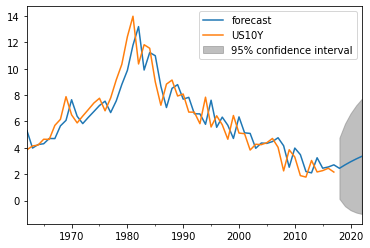

In [8]:
from statsmodels.tsa.arima_model import ARMA

# Instantiating the model
mod = ARMA(interest_rate_data, order=(1,0))

# Fitting the model to the data and saving the results in res
res = mod.fit()

# Plotting the original series and forecasted series
res.plot_predict(start=0, end='2022')
plt.show()

Note that unlike the `start` argument, the `end` argument `2022` is provided in quotes here since it represents a date and not an integer position. Integer value of `0` for `start` parameter as the index value indicating that we want to be able to utilize all of the available data for forecasting.

According to an AR(1) model, 10-year interest rates are forecasted to rise from 2.16%, towards the end of 2017 to 3.35% in five years.

---

## Comparing AR Model with Random Walk
Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. We will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

We'll see that when plotting the autocorrelation of these two series side-by-side that they look very similar.

In [9]:
interest_rate_data.head()

,US10Y
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


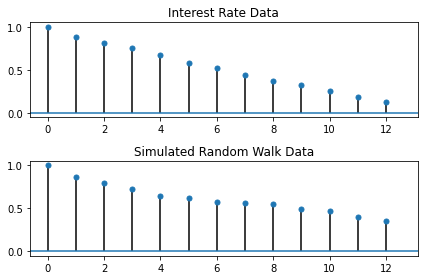

In [14]:
# Importing the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

simulated_data = np.array([5., 4.77522278, 5.60354317, 5.96406402, 5.97965372,
       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
       3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
       3.37204482])

# Plotting the interest rates and simulated random walk side by side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.tight_layout()
plt.show()

Notice the Autocorrelation functions look very similar for the two series.

---

## Choosing the right model
[VIDEO](https://videos.datacamp.com/transcoded/4267_intro+_to_time_series_analysis_in_python/v1/hls-4267_ch3_3.master.m3u8)

### Identifying the order of the model
- In practice, we would not know in advance what order the model should be, that is AR(1), AR(2), AR(3) etc. 
- There are 2 techniques to determine the order of the model that should be used
  - Partial autocorrelation function (PACF)
  - Information criteria

#### Partial Autocorrelation Function (PACF)
- Measures the incremental benefit of adding another lag
> $R_t = \phi_{0,1} + \phi_{1,1} R_{t-1} + \epsilon_{1t}$  
> $R_t = \phi_{0,2} + \phi_{1,2} R_{t-1} + \phi_{2,2} R_{t-2} + \epsilon_{2t}$  
> $R_t = \phi_{0,3} + \phi_{1,3} R_{t-1} + \phi_{2,3} R_{t-2} + \phi_{,3} R_{t-3} + \epsilon_{3t}$

- We run several regressions and we regress on more and more lagged values
- More the number of parameters, the better the model will fit the data. But this can lead to overfitting of the data.



#### Plotting PACF in Python
- Same as ACF, but use `plot_pacf`instead of `plot_acf`

#### Information Criteria
- Adjusts goodness-of-fit for a model by imposing a penalty based on the number of parameters used.
- Two popular adjusted goodness-of-fit measures
  - AIC (Akaike Information Criterion)
  - BIC (Bayesian Information Criterion)
- To get AIC and BIC for the model, after training our AR model, we do a `results.aic` and `results.bic`, where `results` is the output of `model.fit()` on our ARMA model.
- We fit several models,each with a different set of parameters, and choose the one with the lowest Bayesian Information Criterion.

### Example
- Suppose we were given simulated AR(3) data. At present, we are unaware that the data actually fits an AR(3) model
- We fit the data to different AR(*p*) models and check BIC values `results.bic` for each of those.
- Choose *p* with the lowest BIC. In this case, the lowest BIC would occur for the AR(3) model.



### Estimating the order of model using PACF
One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, we will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. We will see that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

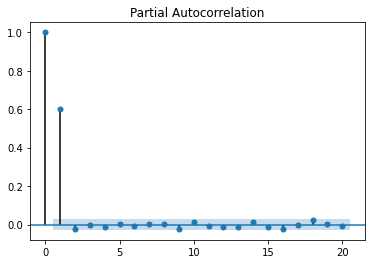

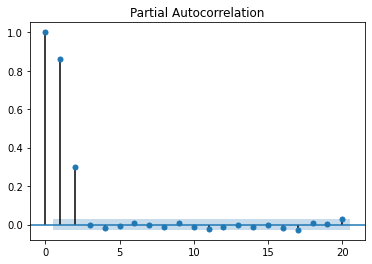

In [16]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3]) # Notice the negative sign
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

Notice that the number of significant lags for the PACF indicate the order of the AR model.

## Estimate Order of Model: Information Criteria
Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. We will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

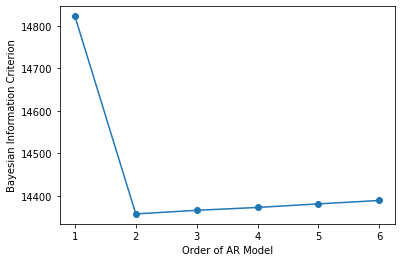

In [17]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.

---
---